In [1]:
import math
import numpy as np
#import h5py
import matplotlib.pyplot as plt
#from matplotlib.pyplot import imread
#import scipy
#from PIL import Image
#i#ort pandas as pd
import tensorflow as tf
import tensorflow.keras.layers as tfl
from tensorflow.python.framework import ops
#from cnn_utils import *
from test_utils import summary, comparator

%matplotlib inline
np.random.seed(1)

In [2]:
w_pesos_conv_1=np.array([[[[0.10180848,  0.27172682, -0.1326166 ,  0.24270666,
          -0.07911666, -0.03261769]],

        [[ 0.13105215,  0.16325536,  0.4166452 ,  0.1706323 ,
           0.46103957,  0.42053816]],

        [[-0.62622255,  0.32508704,  0.11426182,  0.46498546,
           0.15970603,  0.2526803 ]],

        [[ 0.13277824, -0.10806836, -0.16937643,  0.47131616,
          -0.01353735,  0.2596121 ]],

        [[-0.29754445, -0.08794328,  0.0715922 , -0.2531525 ,
           0.329636  , -0.0065044 ]]],


       [[[ 0.3966586 , -0.07845584,  0.61067516,  0.01717394,
           0.17780273,  0.31282014]],

        [[-0.5580775 , -0.28635207, -0.2195214 , -0.22012176,
          -0.20433003,  0.20896927]],

        [[-0.1878605 , -0.2607018 , -0.5225711 , -0.33032328,
           0.30437437, -0.22492748]],

        [[-0.09563302,  0.4470605 ,  0.3114519 ,  0.3634726 ,
          -0.07533871, -0.05601275]],

        [[ 0.14426535, -0.08772354, -0.03508968,  0.41035986,
           0.08982693, -0.33301333]]],


       [[[ 0.40801936, -0.31193623,  0.49208045, -0.17442906,
          -0.29285747,  0.21456678]],

        [[ 0.7808343 ,  0.19281095,  0.07340348,  0.02256829,
           0.07232787, -0.21489461]],

        [[ 0.7508834 , -0.239566  , -0.26991892, -0.3660749 ,
           0.09733116, -0.31724304]],

        [[ 0.29920244, -0.24631986, -0.41314527, -0.373445  ,
           0.31967932, -0.13455245]],

        [[-0.1746712 ,  0.15700535,  0.38416415,  0.23802929,
           0.37876427, -0.29913864]]],


       [[[-0.2564975 , -0.00602289,  0.3145912 , -0.1826298 ,
          -0.36874464, -0.11946367]],

        [[ 0.07273551, -0.42582753, -0.14980695, -0.15625903,
          -0.12441309, -0.3966565 ]],

        [[ 0.12095565, -0.07578132,  0.0678298 , -0.6300392 ,
          -0.23254171,  0.0062401 ]],

        [[-0.10807212, -0.24025778, -0.00239621, -0.02338808,
          -0.2719373 , -0.27186456]],

        [[ 0.05599442, -0.02290046, -0.22749954,  0.2911147 ,
          -0.10889944,  0.25484294]]],


       [[[ 0.18372281,  0.14514026,  0.4235686 ,  0.18134373,
           0.02911336, -0.32499188]],

        [[-0.5180034 ,  0.2260066 , -0.08709105,  0.07755025,
          -0.24676737,  0.14324825]],

        [[ 0.08858424, -0.12928584, -0.04168945,  0.17210957,
          -0.134893  ,  0.03083444]],

        [[ 0.15228488, -0.18984252,  0.01477721,  0.23235391,
          -0.11712835,  0.1877245 ]],

        [[ 0.03697057, -0.45750856,  0.1773713 ,  0.13361959,
          -0.23385213,  0.20771326]]]]);

w_pesos_conv_1_array=np.array(w_pesos_conv_1)
w_pesos_conv_1_array=np.clip(w_pesos_conv_1_array,-1,1)
w_pesos_conv_1 =w_pesos_conv_1_array.reshape(5, 5, 1, 6)
w_pesos_conv_1

array([[[[ 0.10180848,  0.27172682, -0.1326166 ,  0.24270666,
          -0.07911666, -0.03261769]],

        [[ 0.13105215,  0.16325536,  0.4166452 ,  0.1706323 ,
           0.46103957,  0.42053816]],

        [[-0.62622255,  0.32508704,  0.11426182,  0.46498546,
           0.15970603,  0.2526803 ]],

        [[ 0.13277824, -0.10806836, -0.16937643,  0.47131616,
          -0.01353735,  0.2596121 ]],

        [[-0.29754445, -0.08794328,  0.0715922 , -0.2531525 ,
           0.329636  , -0.0065044 ]]],


       [[[ 0.3966586 , -0.07845584,  0.61067516,  0.01717394,
           0.17780273,  0.31282014]],

        [[-0.5580775 , -0.28635207, -0.2195214 , -0.22012176,
          -0.20433003,  0.20896927]],

        [[-0.1878605 , -0.2607018 , -0.5225711 , -0.33032328,
           0.30437437, -0.22492748]],

        [[-0.09563302,  0.4470605 ,  0.3114519 ,  0.3634726 ,
          -0.07533871, -0.05601275]],

        [[ 0.14426535, -0.08772354, -0.03508968,  0.41035986,
           0.08982693, -0.3

In [3]:
dato_peso = w_pesos_conv_1[0,1,0,5]
dato_peso

0.42053816

In [4]:
for fila in w_pesos_conv_1:
    for sublista in fila:
        for elemento in sublista:
            print(elemento, end=' ')
        print()  # Agrega un salto de línea después de cada fila

[ 0.10180848  0.27172682 -0.1326166   0.24270666 -0.07911666 -0.03261769] 
[0.13105215 0.16325536 0.4166452  0.1706323  0.46103957 0.42053816] 
[-0.62622255  0.32508704  0.11426182  0.46498546  0.15970603  0.2526803 ] 
[ 0.13277824 -0.10806836 -0.16937643  0.47131616 -0.01353735  0.2596121 ] 
[-0.29754445 -0.08794328  0.0715922  -0.2531525   0.329636   -0.0065044 ] 
[ 0.3966586  -0.07845584  0.61067516  0.01717394  0.17780273  0.31282014] 
[-0.5580775  -0.28635207 -0.2195214  -0.22012176 -0.20433003  0.20896927] 
[-0.1878605  -0.2607018  -0.5225711  -0.33032328  0.30437437 -0.22492748] 
[-0.09563302  0.4470605   0.3114519   0.3634726  -0.07533871 -0.05601275] 
[ 0.14426535 -0.08772354 -0.03508968  0.41035986  0.08982693 -0.33301333] 
[ 0.40801936 -0.31193623  0.49208045 -0.17442906 -0.29285747  0.21456678] 
[ 0.7808343   0.19281095  0.07340348  0.02256829  0.07232787 -0.21489461] 
[ 0.7508834  -0.239566   -0.26991892 -0.3660749   0.09733116 -0.31724304] 
[ 0.29920244 -0.24631986 -0.413

In [5]:
bias_conv_1= np.array([-0.89959335, -0.9392988 , -0.26948938, -0.7584004 , -0.8198738 ,-0.6972442 ])
forma_bias = bias_conv_1.shape

print(forma_bias)

(6,)


In [6]:
w_pesos_conv_2=np.array([[[[-5.13410747e-01,  1.84419438e-01, -1.42273813e-01,
           2.83126801e-01, -4.07031216e-02, -2.69580871e-01,
          -5.99122867e-02,  2.08344996e-01, -2.65940875e-01,
           1.72263548e-01, -2.63068508e-02,  4.64562103e-02,
           1.37220517e-01,  1.16268694e-01,  5.17652147e-02,
          -5.72586339e-03],
         [ 1.20339073e-01,  1.20301850e-01, -1.12815410e-01,
          -2.82215178e-01, -2.95520015e-02, -3.67022395e-01,
           1.80591077e-01, -1.26397133e-01, -1.61604986e-01,
           2.68646516e-02, -3.67158830e-01, -1.41601870e-02,
          -4.39900979e-02,  2.06451505e-01, -2.42981091e-01,
          -1.46800458e-01],
         [ 1.12614743e-01, -3.24400872e-01,  6.78589717e-02,
           1.79284722e-01, -2.45838359e-01, -1.64460242e-01,
           3.60575855e-01, -1.43274114e-01, -2.00852230e-01,
           1.72190145e-01, -1.99652269e-01,  1.93941489e-01,
          -8.30589950e-01, -4.50809225e-02, -1.12702124e-01,
          -1.11638352e-01],
         [ 9.30392556e-03, -6.33424282e-01, -1.91219166e-01,
           6.91159740e-02, -1.87297285e-01,  2.37183422e-01,
          -1.47333890e-01,  3.40924501e-01, -2.34860972e-01,
           1.20650325e-02,  4.31030065e-01,  2.80163009e-02,
           1.10389121e-01, -2.47070193e-01, -7.70310238e-02,
          -2.42704123e-01],
         [ 1.97404146e-01,  3.83643731e-02, -2.10051745e-01,
          -1.71302408e-01, -2.01501399e-01, -7.96436295e-02,
           6.63226172e-02, -1.28799689e-03, -1.10084355e-01,
          -1.67020380e-01, -2.00593084e-01,  9.21969265e-02,
           2.04455554e-02,  1.27363995e-01, -9.58791450e-02,
          -6.96118847e-02],
         [-6.47598580e-02, -2.67190516e-01,  1.54106379e-01,
           1.62329674e-01,  1.13178931e-01,  7.67615885e-02,
           1.23056136e-01, -1.39086515e-01,  1.21403337e-02,
          -7.51308426e-02, -3.90185744e-01, -2.53848433e-01,
           2.15320796e-01,  4.86698598e-02, -2.18309104e-01,
          -1.03841528e-01]],

        [[-1.72238767e-01,  1.97213069e-01, -8.16261247e-02,
           2.04754382e-01,  9.17302296e-02,  3.18056554e-01,
          -7.01114774e-01, -7.69546479e-02, -1.85651585e-01,
          -1.12927571e-01,  2.28296265e-01, -2.19025299e-01,
           8.32737610e-02, -5.70078909e-01, -9.24611092e-02,
           1.62114859e-01],
         [ 4.23538610e-02,  4.25245762e-01, -6.59045875e-02,
          -2.50071615e-01, -1.60616681e-01, -2.30537523e-02,
           1.17335513e-01, -1.50652945e-01, -3.14429626e-02,
          -8.53249654e-02, -6.50759041e-01, -1.04521647e-01,
           2.22603962e-01,  2.41228193e-01,  5.65290777e-03,
          -2.21677199e-01],
         [-1.33032441e-01, -1.34487867e-01,  9.67083424e-02,
           9.18800086e-02, -9.37673897e-02, -2.44556651e-01,
          -1.15803905e-01, -1.40959889e-01, -3.33015501e-01,
           1.59383088e-01, -3.25388581e-01,  4.05520201e-01,
          -9.01819408e-01, -1.43424869e-01,  1.59078807e-01,
          -2.88600951e-01],
         [-5.29987328e-02, -2.50878073e-02,  5.78441806e-02,
          -5.00539951e-02,  9.56696793e-02,  1.44751400e-01,
           7.48101771e-02,  3.97198558e-01, -2.72364289e-01,
          -1.42932221e-01, -1.26113325e-01, -1.05260327e-01,
           2.79665496e-02, -1.48331195e-01, -4.19822186e-02,
           1.81935027e-01],
         [ 3.49809200e-01,  3.48949283e-01,  3.35737169e-02,
          -3.36885035e-01, -2.84205317e-01, -3.13638121e-01,
           1.33748814e-01, -1.59709930e-01, -1.84215307e-01,
          -1.58268124e-01, -4.43076164e-01,  1.06776148e-01,
           3.44198644e-02,  2.00464979e-01, -1.16061427e-01,
           1.19777367e-01],
         [ 1.89303175e-01, -1.49413466e-01,  1.68725513e-02,
           1.54113024e-01, -2.41365373e-01,  1.43349439e-01,
          -4.28047389e-01, -1.71110872e-02, -2.20047593e-01,
          -1.71563655e-01, -3.87785941e-01, -5.80048598e-02,
          -1.98795018e-03,  4.24909979e-01,  1.88195378e-01,
           8.59880671e-02]],

        [[ 1.29933074e-01,  3.84932399e-01, -8.17883238e-02,
          -4.12999719e-01, -1.33043543e-01,  5.25710732e-02,
          -1.60029918e-01, -1.57076344e-02, -3.89943212e-01,
          -1.51016533e-01,  1.78719893e-01,  3.00749410e-02,
          -1.13811381e-01, -7.40096569e-01,  5.90430573e-02,
          -2.14102030e-01],
         [ 9.14841369e-02,  5.05020320e-01, -2.28207737e-01,
           4.32573035e-02,  8.26536492e-02, -1.36218071e-01,
           2.31365383e-01,  1.62007198e-01,  4.47694585e-02,
          -2.10727349e-01, -3.26790810e-01,  9.11731739e-03,
          -7.73791298e-02, -6.03258759e-02, -1.63527682e-01,
          -1.87288165e-01],
         [-5.19050844e-02, -2.48438373e-01, -2.53526568e-01,
          -3.96146029e-02, -8.51753652e-02,  8.82258266e-02,
          -1.78113505e-01,  2.05152526e-01,  1.45647720e-01,
           4.29090448e-02,  2.30148509e-01,  1.12937853e-01,
          -3.16951305e-01, -1.67461112e-01,  7.77502432e-02,
           2.96536945e-02],
         [ 2.54563421e-01,  8.77549574e-02,  1.04903638e-01,
          -1.75450251e-01, -1.99555159e-01,  1.24567181e-01,
          -2.47193322e-01, -2.34151542e-01, -4.98373806e-02,
          -2.17380002e-02, -3.84370774e-01, -3.68555576e-01,
          -1.06521718e-01, -5.23781218e-02,  5.94409294e-02,
          -6.75854832e-02],
         [-1.87360197e-01, -7.54584512e-03,  9.56348851e-02,
          -1.36159375e-01, -2.72919852e-02, -2.16821820e-01,
           1.00295916e-01, -1.34951726e-01, -2.18441918e-01,
          -2.20147923e-01, -8.05074871e-01,  1.25170231e-01,
           2.88643003e-01, -1.38084665e-01, -1.25241056e-01,
          -1.01069510e-01],
         [-3.84691209e-02, -2.36306831e-01,  9.85414535e-03,
          -2.17064217e-01, -4.40242618e-01,  7.94516206e-02,
           2.90148258e-02, -1.26129121e-01, -5.27368002e-02,
          -1.36614949e-01, -2.49547400e-02,  1.76421344e-01,
          -5.66751122e-01,  3.36572796e-01,  9.55253392e-02,
           5.85349873e-02]],

        [[-7.74315298e-01,  3.81812006e-01,  1.30333453e-01,
          -1.92443356e-01, -6.19899258e-02,  2.08567262e-01,
          -1.20967276e-01, -4.05223012e-01, -3.81518453e-02,
          -2.26213098e-01,  3.03664804e-01,  1.31986871e-01,
           2.91253868e-02, -1.57306701e-01, -1.34905592e-01,
           9.04742107e-02],
         [-2.31060892e-01,  2.17334703e-01, -6.73330277e-02,
          -6.83459127e-03, -2.20180660e-01,  2.44487420e-01,
           1.80776492e-01,  1.19894326e-01,  8.96768942e-02,
          -1.86982647e-01, -8.01130459e-02, -8.44745561e-02,
           2.19599698e-02, -1.32674113e-01, -2.05361381e-01,
           3.52235511e-02],
         [-2.94936150e-01, -1.68560818e-01, -1.22631863e-01,
          -3.52660008e-02, -2.45728239e-01,  7.27083907e-02,
           6.20339215e-01,  4.57063973e-01, -2.60160165e-03,
           1.16105508e-02,  1.72302857e-01,  6.18846416e-02,
          -2.72078514e-01,  2.74004284e-02, -7.18179122e-02,
           1.60188973e-01],
         [-4.70519245e-01, -6.34596586e-01,  1.32404655e-01,
          -2.90282428e-01,  1.02556519e-01,  2.82730371e-01,
          -2.51745414e-02, -4.02972549e-01, -1.24889821e-01,
          -2.26700336e-01, -6.69461548e-01, -9.97359827e-02,
          -1.64689034e-01,  4.58281115e-02, -1.99573636e-01,
           8.80732685e-02],
         [-2.53114607e-02,  1.17947683e-01, -6.81719407e-02,
          -1.87834222e-02, -3.22752655e-03,  6.04154579e-02,
          -2.98682302e-01,  1.59385875e-01, -1.19378023e-01,
          -3.61552924e-01, -1.23268224e-01,  3.14642966e-01,
           3.82536262e-01, -1.26868546e-01,  2.11108290e-02,
           5.81709109e-02],
         [-6.05432153e-01, -4.09836829e-01, -4.59591486e-02,
           1.30285323e-01, -2.94515602e-02, -2.66499192e-01,
           3.01345438e-01, -1.26867861e-01,  1.64576203e-01,
           4.06860188e-02, -2.01400712e-01, -2.38846894e-02,
          -2.64270186e-01,  1.98482528e-01, -1.53982595e-01,
          -4.47974391e-02]],

        [[-4.64532524e-01, -3.44738156e-01,  1.43363044e-01,
          -1.72096968e-01, -9.66652930e-02, -6.25664294e-01,
          -3.09249967e-01, -9.17112827e-01, -1.37022719e-01,
          -1.42925754e-01,  3.14942673e-02,  6.46256864e-01,
          -1.46950200e-01, -3.25171083e-01, -8.65809098e-02,
          -2.24764675e-01],
         [ 1.06015578e-01, -1.17235720e-01,  1.04827248e-01,
          -3.81419100e-02, -1.33533582e-01,  2.49223083e-01,
           5.32362759e-02,  1.00688703e-01, -4.64708023e-02,
          -2.75743790e-02,  8.97303075e-02, -3.56197655e-01,
           3.75011146e-01, -4.33795601e-01, -1.84920400e-01,
          -2.29822680e-01],
         [ 5.07817417e-02, -2.95631468e-01, -6.15541302e-02,
           3.73999566e-01, -5.42112410e-01,  1.29204705e-01,
           2.53045470e-01,  4.54467922e-01, -9.84332785e-02,
          -1.22544445e-01,  5.27848937e-02, -3.49545360e-01,
           1.42311705e-02, -1.74412206e-01, -1.20522477e-01,
           2.48433575e-02],
         [ 5.31758107e-02,  2.54491448e-01, -9.81925279e-02,
          -3.37297857e-01, -8.32712278e-02,  1.56324640e-01,
           2.17984505e-02, -1.34436577e-03,  3.63683924e-02,
          -3.60958815e-01, -1.13638587e-01,  4.22558635e-01,
           6.41125962e-02,  2.40626693e-01, -2.71906286e-01,
          -1.91937312e-01],
         [ 1.57980621e-01, -2.72211701e-01, -1.38997704e-01,
          -3.21876436e-01, -1.92373022e-01,  1.82499170e-01,
           1.10324681e-01, -3.04105550e-01, -1.16406575e-01,
          -5.29422879e-01, -1.00126460e-01,  2.55640805e-01,
           3.06586057e-01, -4.14990515e-01,  1.23073146e-01,
          -8.52607936e-02],
         [ 2.07013965e-01, -4.56677377e-01, -4.56193626e-01,
           6.16274886e-02, -1.15088429e-02, -3.45964342e-01,
           1.33059725e-01,  4.66391735e-04, -9.18109268e-02,
           1.09952301e-01,  2.40296796e-01, -5.10546446e-01,
           9.42259133e-02,  3.98136258e-01, -1.07660152e-01,
          -2.88411006e-02]]],


       [[[ 1.05130330e-01,  2.84781605e-01, -4.61100817e-01,
          -2.37287849e-01, -1.11793362e-01, -7.21804917e-01,
          -1.58188090e-01, -1.46078202e-03,  3.14136259e-02,
           2.02124506e-01,  2.79452264e-01, -5.14734052e-02,
          -1.56545252e-01,  3.92912954e-01, -2.59551495e-01,
          -2.47481480e-01],
         [-7.80261680e-02, -2.77678847e-01, -2.63263553e-01,
          -5.57346940e-01, -1.75676465e-01, -2.05633268e-02,
           2.69525554e-02, -2.17718352e-02,  3.49241123e-02,
           1.40797287e-01, -5.25335073e-01,  2.19990030e-01,
           6.25744984e-02,  2.32790768e-01, -7.73695186e-02,
          -1.37163281e-01],
         [-1.15209125e-01, -1.98986650e-01, -1.23100877e-01,
           5.45450076e-02, -3.09462219e-01, -6.31009638e-02,
           4.00928766e-01, -1.71561599e-01,  4.36201915e-02,
           1.91883475e-01, -5.05724549e-01, -4.65745032e-01,
          -4.04505610e-01,  4.10089672e-01, -2.02134699e-01,
          -9.53355655e-02],
         [ 3.27795565e-01,  1.66714713e-01, -6.00838602e-01,
          -2.61177361e-01, -9.07528475e-02,  5.93928061e-02,
          -4.48344916e-01,  9.05007422e-02, -2.28707746e-01,
          -2.46973336e-01, -8.68691802e-02, -1.43663809e-01,
          -3.52750197e-02, -4.78781126e-02,  3.91503312e-02,
          -9.06478018e-02],
         [ 1.64012820e-01, -6.80043325e-02, -3.00669521e-01,
          -3.70937675e-01, -2.01631993e-01, -2.31459156e-01,
          -1.06616043e-01, -2.08447352e-01, -2.35276103e-01,
           2.04824787e-02, -2.59125590e-01, -1.83841698e-02,
           4.66200225e-02, -1.43588081e-01, -1.74902588e-01,
           1.24938510e-01],
         [-1.79409668e-01,  2.41539344e-01,  2.23174784e-02,
           3.41364145e-02, -2.09925279e-01, -3.49705130e-01,
          -1.29496723e-01,  1.02263160e-01, -1.99754424e-02,
          -1.66075632e-01, -2.22453222e-01,  1.70056865e-01,
          -7.71628097e-02, -1.82741225e-01, -1.43653780e-01,
          -3.07408292e-02]],

        [[-5.32722294e-01,  2.19799459e-01, -3.85315567e-01,
           2.21833983e-03,  5.72871007e-02, -4.44009066e-01,
          -5.72937369e-01,  8.81584212e-02,  5.46786450e-02,
           1.47394225e-01,  2.30346769e-01,  2.80502923e-02,
          -4.91005033e-02,  1.23618692e-01, -1.70174427e-02,
          -2.42483884e-01],
         [-2.77755052e-01,  1.91229969e-01, -1.34827048e-01,
          -2.96689600e-01, -5.90625592e-02, -3.03962588e-01,
           3.37966770e-01,  8.26540738e-02,  1.20171122e-01,
           1.10696509e-01, -5.40080488e-01,  4.70882244e-02,
          -8.01050365e-02,  4.20212090e-01,  1.21149018e-01,
          -2.34638631e-01],
         [-3.74166310e-01,  3.40506360e-02,  2.05343753e-01,
           3.16997319e-01,  1.35585338e-01, -1.84682325e-01,
          -2.95393676e-01, -1.02554828e-01, -2.45930061e-01,
          -4.49374110e-01, -1.84678435e-01,  1.18505076e-01,
          -6.37569427e-01, -3.27681676e-02, -1.19424053e-01,
          -1.29410177e-01],
         [ 2.06636846e-01,  2.44028956e-01, -1.92314535e-01,
          -5.54847002e-01, -1.24867305e-01, -6.33776113e-02,
           1.93349391e-01, -1.73321635e-01, -5.81369065e-02,
          -1.92773696e-02,  4.89830300e-02, -1.23689184e-02,
          -1.08589292e-01,  7.13068526e-03,  7.49441911e-04,
          -7.42072091e-02],
         [-2.04852521e-01,  9.89094004e-02, -4.51573461e-01,
          -3.65265042e-01, -6.41841218e-02, -3.05745870e-01,
           1.90690607e-01, -1.45641729e-01, -4.17258665e-02,
           2.00116411e-01, -1.14476345e-01,  1.91057399e-01,
          -1.69979613e-02, -1.37208074e-01, -2.13173598e-01,
          -1.46516517e-01],
         [-1.94664106e-01, -1.57567009e-01,  2.40157738e-01,
           2.59581238e-01, -1.69359446e-01,  1.23148270e-01,
          -4.10193950e-01, -3.69790763e-01,  6.59569055e-02,
          -2.08273724e-01, -6.68139040e-01, -4.07550693e-01,
          -1.32733583e-01, -3.64692837e-01,  1.22082271e-01,
           1.88546232e-03]],

        [[-4.80471641e-01,  2.34047577e-01,  2.89366126e-01,
           6.68987930e-02, -3.07500690e-01, -3.49555258e-03,
          -5.57365477e-01, -1.75317273e-01, -4.50013354e-02,
          -2.57989671e-02, -7.80610964e-02,  2.04544008e-01,
           2.09450498e-01, -1.01634824e+00,  4.71585020e-02,
          -3.21278125e-02],
         [-1.62910163e-01,  5.19912541e-02, -1.36011079e-01,
           1.15774632e-01,  2.45094765e-02, -1.45064756e-01,
           4.06146683e-02,  1.22671999e-01, -9.61650833e-02,
          -5.62335789e-01, -2.12689023e-02, -1.29084855e-01,
          -2.06292465e-01,  7.05991462e-02, -1.42028362e-01,
          -1.07348904e-01],
         [ 8.39805454e-02, -1.08338743e-01, -4.30438757e-01,
           2.22237289e-01, -2.82091886e-01,  4.49458994e-02,
           8.49475861e-02, -7.05400035e-02,  7.90978596e-02,
          -4.62740846e-02,  3.99140865e-01, -6.74273670e-02,
          -6.69605732e-01, -7.17044532e-01, -3.14098656e-01,
          -1.74709111e-01],
         [-8.90659392e-02,  2.72132456e-01, -1.09286577e-01,
          -2.02449281e-02, -2.13025108e-01, -3.40544641e-01,
           3.28551143e-01, -5.14850497e-01, -9.47056487e-02,
          -4.11666483e-01, -3.78065258e-01,  5.13803400e-02,
           1.85684651e-01, -1.58708781e-01, -1.85376778e-01,
          -1.45564275e-02],
         [-1.98265761e-01, -5.82317542e-03, -2.85321563e-01,
          -4.61679557e-03, -1.13661304e-01, -4.79493022e-01,
          -3.20626572e-02,  3.27243060e-01, -3.14136222e-02,
           2.67646968e-01, -3.87764275e-01,  2.13950351e-01,
          -6.54954687e-02, -1.45913929e-01, -1.77343428e-01,
          -1.67263091e-01],
         [-2.65383482e-01, -4.91470546e-01, -5.62445843e-04,
           3.52398992e-01, -1.37546822e-01,  1.47198409e-01,
          -2.28942826e-01,  1.92989543e-01, -7.63471425e-02,
          -5.58439493e-02,  4.78311293e-02, -8.73525590e-02,
          -1.35041952e-01, -2.80324399e-01, -2.85621971e-01,
          -1.25175416e-01]],

        [[-4.92807537e-01,  1.67424783e-01,  2.88314044e-01,
           3.88241522e-02, -3.82988900e-01, -2.58860230e-01,
          -1.66402757e-01, -3.06575388e-01,  7.54614100e-02,
          -1.01114266e-01,  5.41602731e-01,  2.23301813e-01,
           1.22958720e-01, -3.93153131e-01,  7.40637630e-02,
           1.07900761e-01],
         [-4.15996090e-02,  1.55303255e-01, -2.98599452e-01,
           1.00099649e-02, -3.14853698e-01,  2.05581516e-01,
           7.99345747e-02,  3.56004506e-01, -1.90801337e-01,
          -2.51412690e-01, -3.84569354e-03, -1.35544240e-01,
          -3.93955350e-01,  6.51794448e-02,  2.75957473e-02,
           7.26190805e-02],
         [ 6.11440688e-02, -2.92894933e-02,  2.19327118e-03,
          -8.42098445e-02, -6.72083497e-02,  2.94887811e-01,
           4.61746082e-02,  2.37793773e-02, -3.33310932e-01,
          -8.76433626e-02,  8.95051882e-02, -4.41858739e-01,
          -3.76475096e-01, -6.07714295e-01, -1.17742270e-01,
          -1.58589751e-01],
         [-1.57442957e-01,  9.95151028e-02, -8.84090085e-03,
           1.21436231e-01, -1.16939165e-01, -4.87672061e-01,
           2.98278302e-01, -4.77383554e-01, -1.45436674e-01,
          -1.80681378e-01, -9.25529078e-02,  2.52905756e-01,
           1.47750482e-01, -3.16520547e-03,  3.94075513e-02,
          -1.92189708e-01],
         [-2.81285141e-02, -8.34251121e-02, -4.65012677e-02,
           2.56598927e-02, -1.58915848e-01, -3.15973788e-01,
          -1.05088130e-01, -4.91352901e-02,  6.65858062e-03,
          -1.02943607e-01,  2.10408363e-02,  1.91254482e-01,
          -1.89202055e-02, -3.43991190e-01, -1.09502869e-02,
          -1.36348844e-01],
         [-9.13295373e-02, -8.47698689e-01, -3.63579035e-01,
           4.30662371e-02,  5.39147519e-02, -4.28469360e-01,
           1.36466637e-01,  3.34115386e-01, -1.76498696e-01,
          -2.47120429e-02,  1.64852872e-01,  3.29649597e-01,
          -2.35915575e-02,  2.35429347e-01,  1.65399462e-02,
          -3.20620805e-01]],

        [[-4.58694726e-01,  2.53927767e-01,  2.53232628e-01,
          -1.90112516e-01, -1.41107738e-02, -4.38959867e-01,
           1.80389270e-01, -7.01231480e-01, -1.48886621e-01,
          -2.35951602e-01,  3.88864070e-01, -1.01879805e-01,
          -6.30007759e-02, -1.46481648e-01,  1.69808045e-02,
          -5.60055375e-02],
         [ 4.31986265e-02, -7.77220204e-02, -5.12956902e-02,
          -2.71679685e-02, -1.10287808e-01, -1.91883906e-03,
          -3.28853190e-01,  3.82893458e-02, -3.79210599e-02,
           9.20769572e-03,  1.23405643e-01, -2.29012907e-01,
          -6.55315891e-02, -2.47789398e-01, -2.28531182e-01,
          -2.17408990e-03],
         [-5.82034029e-02, -1.67853743e-01,  1.94330260e-01,
           1.79909527e-01, -3.74089658e-01,  4.66485173e-02,
          -1.21187158e-01,  2.39659339e-01,  1.62597463e-01,
           4.97150645e-02, -1.76320627e-01, -7.11692214e-01,
          -4.16801125e-01, -1.83174178e-01, -2.75793016e-01,
           2.87385043e-02],
         [-7.51217842e-01, -2.60565549e-01,  1.88464135e-01,
           7.68961161e-02,  1.34017393e-01, -7.01679051e-01,
          -1.46862969e-01, -1.12992384e-01, -5.24565391e-02,
          -2.69204199e-01,  1.57817349e-01,  6.66090190e-01,
           2.56632805e-01, -4.66415882e-02,  3.97268636e-03,
          -2.75217474e-01],
         [-8.04699734e-02, -9.17251781e-02, -3.81521761e-01,
          -1.88386858e-01, -2.42376655e-01, -4.46403652e-01,
          -3.87140810e-01, -2.90799111e-01, -2.94044726e-02,
          -2.11857632e-01,  2.20968217e-01,  4.54890355e-02,
          -2.52311766e-01, -6.05335645e-02,  4.52781320e-02,
          -2.35020608e-01],
         [ 1.23975677e-02, -2.90827543e-01, -5.78343928e-01,
           7.50566050e-02, -2.77277410e-01, -8.08892697e-02,
           1.24031723e-01,  1.27209827e-01, -1.83782637e-01,
          -2.56922007e-01,  1.04617387e-01,  1.08546108e-01,
          -1.72678545e-01,  1.21401146e-01,  2.00875141e-02,
          -2.40578070e-01]]],


       [[[ 1.15909994e-01,  4.43024069e-01, -3.80559951e-01,
          -2.99970478e-01, -1.98596194e-01, -1.82039127e-01,
           2.34873533e-01, -8.07844177e-02, -1.47920489e-01,
           2.84740441e-02,  5.77581115e-02,  2.18813315e-01,
           1.66048020e-01,  1.45674825e-01, -2.08385214e-01,
          -1.15629032e-01],
         [-2.97060072e-01,  1.49199322e-01, -2.95316488e-01,
          -4.28404272e-01,  7.72948414e-02,  1.15991928e-01,
           4.54674140e-02, -1.82948798e-01,  3.76865529e-02,
          -2.61386245e-01, -5.29570758e-01,  4.08185236e-02,
           1.17025398e-01, -3.06073993e-01, -2.40087032e-01,
          -2.20652804e-01],
         [ 1.32295057e-01, -1.62226081e-01,  2.97039580e-02,
           1.48962989e-01, -3.22970241e-01,  2.36626007e-02,
           3.42148244e-01, -3.53733361e-01, -3.72517228e-01,
           1.19684704e-01, -4.60454941e-01, -4.39414114e-01,
          -6.02876008e-01, -7.33706206e-02, -3.59057337e-01,
          -2.10155472e-01],
         [ 5.68589978e-02,  2.89340436e-01, -3.89956474e-01,
          -3.63273919e-01,  4.76860851e-02, -1.86689720e-01,
           2.89356768e-01, -2.21415669e-01, -2.58937836e-01,
           7.29250535e-02,  3.93579304e-01,  8.04991350e-02,
          -3.20018381e-01,  1.81693137e-01, -6.68015480e-02,
           8.22779164e-02],
         [-3.86438400e-01,  1.01778708e-01, -2.31126443e-01,
          -3.48290086e-01, -5.42138219e-02,  5.64419702e-02,
          -1.07564367e-01, -1.24847472e-01, -1.11838304e-01,
          -3.91774885e-02,  1.71404958e-01,  2.57788986e-01,
           1.95897873e-02,  1.59831028e-02, -1.19979590e-01,
          -1.13060325e-01],
         [-5.97655512e-02,  9.43726748e-02, -1.76366806e-01,
          -2.27072820e-01, -3.11461508e-01,  1.08049512e-02,
           3.26809913e-01,  1.02148071e-01, -2.12603539e-01,
          -1.06700152e-01, -2.23487094e-01, -2.26464838e-01,
           3.49779844e-01, -4.37800109e-01, -3.07101190e-01,
          -2.95396119e-01]],

        [[-2.78630763e-01,  3.32887471e-02, -2.16613159e-01,
          -5.37179857e-02, -7.39174560e-02, -1.08709328e-01,
          -2.02607676e-01, -8.14826563e-02, -2.42115676e-01,
           3.87105316e-01, -1.77791610e-01, -6.75231874e-01,
           2.10520178e-01,  7.65041113e-02,  3.55673321e-02,
           1.27156079e-01],
         [-1.09986000e-01, -1.19717354e-02,  1.62899360e-01,
          -5.96701428e-02, -1.03186458e-01, -2.96178132e-01,
           1.01096248e-02,  3.35296243e-01, -2.37119615e-01,
           1.04147613e-01, -3.33978713e-01,  5.52873574e-02,
          -3.76401871e-01, -1.90863520e-01, -7.31160864e-02,
          -1.99642420e-01],
         [ 1.04483105e-02, -1.18690044e-01,  2.96687663e-01,
           3.71999890e-01, -8.35993234e-03, -4.22575414e-01,
          -4.89938036e-02,  1.45996198e-01, -3.06902260e-01,
          -1.80465847e-01, -7.28137642e-02, -2.67709017e-01,
          -2.66601026e-01, -1.64728947e-02, -8.71558562e-02,
           4.63111028e-02],
         [-2.95472771e-01,  3.66870731e-01, -2.70677596e-01,
          -1.18162043e-01, -1.54892966e-01, -2.48937815e-01,
          -2.55325362e-02, -3.31600934e-01, -1.55464023e-01,
           5.47814742e-02, -2.06621021e-01, -1.56276092e-01,
          -2.13550866e-01, -5.79629481e-01, -1.21503338e-01,
           1.81838106e-02],
         [-4.31919336e-01, -1.69577450e-01, -4.48976964e-01,
          -3.21500063e-01, -2.40610704e-01,  3.62686217e-02,
           8.89328122e-02,  2.19400808e-01, -3.68422978e-02,
           3.10795188e-01,  1.95548385e-01,  5.03262393e-02,
          -1.33764204e-02, -3.31866294e-01,  1.31139740e-01,
          -8.08636025e-02],
         [-4.54296380e-01, -1.61568239e-01, -2.61671152e-02,
           1.45109296e-01, -1.28957137e-01,  1.40799984e-01,
          -5.77933431e-01,  1.85728922e-01, -3.38140368e-01,
          -2.75821149e-01, -3.79660577e-01,  2.26462469e-01,
           6.87477067e-02, -1.16573882e+00, -1.11585543e-01,
          -2.20193923e-01]],

        [[-5.67050159e-01, -9.54640731e-02, -1.26288831e-01,
          -1.29102707e-01, -1.77548096e-01, -3.31781745e-01,
          -6.32365048e-01, -1.16400339e-01, -2.60047197e-01,
           2.04950690e-01, -2.49039382e-01, -7.41875350e-01,
           2.12795496e-01, -6.24106288e-01,  1.53236603e-02,
          -4.68808599e-02],
         [ 5.53733483e-03, -1.19030751e-01, -7.02733397e-02,
          -7.33340234e-02, -6.70600981e-02,  8.47723559e-02,
           1.90318957e-01,  1.87509671e-01, -6.13159090e-02,
          -3.81099060e-02, -4.33226004e-02, -1.31650209e-01,
          -5.13615131e-01,  1.37638122e-01,  4.11106348e-02,
          -1.38153091e-01],
         [ 3.31434011e-01,  2.08594590e-01,  2.61094332e-01,
           4.76516664e-01, -9.52048451e-02,  1.73502639e-01,
           3.08284648e-02, -1.07291132e-01,  1.20916530e-01,
          -1.23431377e-01,  2.05190867e-01, -3.97771686e-01,
          -5.64817190e-01, -2.72639483e-01, -5.58724478e-02,
          -7.86666051e-02],
         [-4.04133350e-01,  2.19487965e-01,  2.57814169e-01,
           2.24311456e-01, -3.27925950e-01, -6.63652495e-02,
           1.04042694e-01, -2.37706557e-01, -1.08932398e-01,
          -9.62437466e-02, -3.65048379e-01, -1.06366016e-02,
           1.89748883e-01, -8.12995248e-03, -1.33082509e-01,
          -8.77893567e-02],
         [-3.94579262e-01,  2.20632046e-01, -1.30217686e-01,
          -2.25965396e-01, -3.98620784e-01, -2.11524032e-02,
          -4.77345556e-01,  5.35826147e-01,  6.47675097e-02,
           3.68376166e-01, -1.17612667e-01, -2.51052320e-01,
          -3.68642390e-01, -6.59788072e-01, -5.73197939e-02,
          -1.46468714e-01],
         [ 6.20678812e-02, -3.19135308e-01, -3.53782102e-02,
          -3.20823751e-02,  1.20549977e-01, -2.20720214e-03,
           5.84796211e-03, -5.95936887e-02,  2.61304956e-02,
          -3.68540734e-02,  1.95674941e-01,  2.83841461e-01,
           1.49457559e-01, -9.26571727e-01, -5.08573800e-02,
          -9.59364772e-02]],

        [[-5.11910975e-01, -5.20891249e-02,  1.34539023e-01,
          -1.82545349e-01, -9.84509215e-02, -2.53615305e-02,
          -3.62750918e-01, -7.00844377e-02, -1.70373738e-01,
           2.79848129e-01, -1.30257666e-01, -2.61167318e-01,
           2.13671491e-01, -4.22514111e-01, -3.19661856e-01,
           1.35542408e-01],
         [ 1.76402554e-01, -7.17654228e-02, -1.18110619e-01,
          -2.56533027e-01, -3.33288580e-01,  2.24313602e-01,
          -7.18969166e-01,  1.88860759e-01, -2.24706352e-01,
          -5.54116666e-02,  1.73013434e-01,  1.36118934e-01,
          -4.58540529e-01,  5.02586998e-02, -9.47701260e-02,
          -2.40185857e-01],
         [ 1.48081303e-01,  1.45059347e-01,  2.92302728e-01,
           5.86118139e-02, -5.93007386e-01,  4.05046582e-01,
           1.74627751e-01, -2.65086144e-01, -2.24889979e-01,
          -1.87444001e-01,  2.87771255e-01, -7.32933462e-01,
          -6.50681734e-01, -9.63124335e-01, -1.68350711e-01,
          -2.25398570e-01],
         [-3.73256654e-01,  2.84039050e-01,  7.26022720e-02,
          -4.65703867e-02, -1.68635830e-01, -4.54865396e-01,
           1.65884703e-01, -1.86666965e-01,  4.95347716e-02,
          -2.25117117e-01,  1.67819157e-01,  5.21065593e-02,
           5.05545698e-02, -2.75182933e-01, -1.10121064e-01,
          -1.72979474e-01],
         [-3.40032279e-02, -2.31323875e-02,  3.17432359e-02,
          -2.63270617e-01, -1.85377300e-01, -3.09116215e-01,
          -2.54184395e-01,  1.59020081e-01, -1.44471273e-01,
           2.94209808e-01,  2.12993741e-01, -3.06372553e-01,
          -1.82172120e-01,  3.33258420e-01, -1.22608505e-01,
          -1.77044883e-01],
         [-8.09413493e-02, -2.23583862e-01,  8.14708844e-02,
          -5.14005199e-02, -3.54743970e-04,  4.14498411e-02,
           1.59157198e-02,  5.40074289e-01, -1.17727458e-01,
           1.79409668e-01, -3.84576693e-02,  4.67177957e-01,
          -2.24111572e-01, -6.10488236e-01, -8.23277012e-02,
          -9.51171592e-02]],

        [[-2.97926068e-01, -6.51864931e-02, -1.39224917e-01,
          -2.13887051e-01, -3.43342125e-02, -2.54943699e-01,
           3.28818649e-01, -6.17145181e-01, -1.74517706e-01,
          -6.69281464e-03, -7.28121772e-02, -4.30540651e-01,
           3.65368575e-01, -4.60093230e-01, -1.87373400e-01,
           3.21997665e-02],
         [ 1.38595223e-01, -4.88132536e-01, -3.70982103e-02,
           5.61314635e-02,  5.02235405e-02,  5.86501062e-02,
          -4.01419133e-01, -8.87545496e-02, -1.84422478e-01,
           1.87146887e-02,  1.76752105e-01, -3.74664396e-01,
          -3.29375751e-02,  1.59599990e-01, -5.03473654e-02,
          -5.35783321e-02],
         [-7.13724736e-03,  1.63927421e-01,  2.19031379e-01,
           9.20336097e-02, -3.97215098e-01,  2.35826299e-01,
           5.59562519e-02, -3.71302694e-01, -1.03301562e-01,
           6.37817085e-02, -9.80530456e-02, -4.29272801e-01,
          -3.62781465e-01, -2.83188194e-01, -2.63929069e-01,
          -1.68013692e-01],
         [-5.29039443e-01,  4.84229356e-01,  1.26477599e-01,
           6.72073960e-02,  1.24091372e-01, -5.90758860e-01,
           2.58001983e-01, -2.29864404e-01, -1.99925616e-01,
           8.85848776e-02,  1.27336711e-01,  7.69534558e-02,
          -1.26571134e-01,  1.66882426e-01, -5.51653244e-02,
           7.59497136e-02],
         [ 7.30290338e-02, -7.14332387e-02, -2.56121784e-01,
          -1.29691139e-01,  2.15950217e-02, -3.62432063e-01,
          -2.30777472e-01, -4.26573902e-01, -1.94862038e-01,
           3.05761397e-01,  2.64553964e-01, -3.43541324e-01,
          -2.67497122e-01,  2.85288483e-01, -2.02231258e-02,
          -7.74172172e-02],
         [ 7.52175376e-02, -5.81140757e-01, -2.32745975e-01,
          -1.22853607e-01,  7.28591986e-04, -5.19680604e-02,
           9.65705812e-02,  3.14123839e-01,  4.10165358e-03,
           2.76254267e-01,  5.51160239e-02,  1.20122544e-03,
          -4.66584086e-01,  1.84481248e-01, -1.63442597e-01,
           1.20096661e-01]]],


       [[[-6.87188655e-02, -1.08812653e-01, -3.34063560e-01,
          -2.92331666e-01, -1.74102396e-01,  1.30266234e-01,
          -1.37859434e-01, -1.07367560e-01, -1.00027934e-01,
          -9.41136926e-02, -2.25725368e-01, -3.82210732e-01,
          -1.10328056e-01, -4.20333035e-02,  2.20203437e-02,
           1.07749440e-01],
         [-2.10652322e-01, -3.81468773e-01, -1.97945789e-01,
           1.90233573e-01,  2.07372885e-02, -2.06149705e-02,
           7.48723792e-03,  2.45549262e-01,  3.13806720e-02,
          -2.36997288e-02, -1.68225065e-01,  5.71209122e-04,
          -7.61359930e-02,  1.41772162e-02, -2.28807762e-01,
           3.74044068e-02],
         [-4.66658086e-01,  1.60926268e-01,  2.50187796e-02,
          -4.74945642e-02, -2.61765569e-01,  8.42341185e-02,
           3.03442657e-01,  2.09366947e-01, -2.53497034e-01,
           3.70123565e-01, -3.98780778e-02, -7.84976006e-01,
          -1.54388130e-01,  2.56083131e-01, -3.24382335e-01,
           6.92111328e-02],
         [-5.21470308e-01, -3.94683369e-02, -3.17638934e-01,
           1.41852587e-01, -1.41706243e-01, -4.50107753e-02,
          -1.91413760e-01,  2.97389865e-01, -2.33453721e-01,
          -2.20968738e-01,  3.96204777e-02, -4.67239469e-02,
           2.78765321e-01,  3.34503144e-01, -2.91990697e-01,
          -2.21775681e-01],
         [-3.13140035e-01, -5.46114981e-01, -1.89021006e-02,
           2.72487253e-01, -2.46535435e-01,  9.46898609e-02,
          -1.66165501e-01,  7.13527948e-02, -9.01492238e-02,
          -2.36521401e-02,  4.24317308e-02, -7.53084272e-02,
          -8.48522224e-03, -1.33303851e-01, -9.23067704e-02,
          -2.40409583e-01],
         [-1.15703642e-02,  5.49567826e-02, -3.95455062e-01,
          -7.41112411e-01, -1.52594790e-01, -5.58942556e-02,
           1.52502716e-01,  1.22460775e-01, -3.91720355e-01,
          -4.98146951e-01, -4.30458874e-01,  1.90343574e-01,
           1.32252246e-01, -3.48923117e-01, -5.50554246e-02,
           9.07395929e-02]],

        [[-5.29009514e-02, -2.08636060e-01,  2.98792332e-01,
           8.10428932e-02, -1.42046645e-01, -1.71129838e-01,
          -2.18281046e-01,  4.22376245e-02, -3.35567780e-02,
           2.75911391e-03, -5.33771634e-01, -6.06057823e-01,
           2.78393209e-01,  1.46314293e-01, -1.26008376e-01,
          -7.83846453e-02],
         [-4.52099331e-02, -5.02689136e-03, -1.88313678e-01,
          -3.75871390e-01, -6.26454502e-02, -9.74384472e-02,
           1.34642139e-01, -2.37496756e-03, -1.52186021e-01,
           4.10503298e-02, -2.79745758e-02,  1.25548869e-01,
          -3.29085350e-01, -1.00738391e-01, -1.07184269e-01,
           7.48668388e-02],
         [ 2.46169224e-01,  3.26939970e-02,  4.29450989e-01,
           1.55564785e-01,  8.60232022e-03, -3.79994631e-01,
           1.04251035e-01, -1.80998608e-01, -1.63391307e-01,
           2.76534166e-02,  2.72301853e-01, -7.48901546e-01,
          -5.01227975e-01,  2.16406330e-01, -1.66849256e-01,
           8.17514732e-02],
         [-6.54137075e-01, -8.77960920e-02, -2.68258095e-01,
          -6.97211698e-02, -3.90502036e-01,  2.29556963e-01,
          -2.51648724e-01,  1.12402834e-01, -2.17356801e-01,
           2.00038135e-01,  1.45792678e-01, -4.22753811e-01,
           3.36512551e-02, -4.40802395e-01, -3.85007821e-02,
          -1.86517209e-01],
         [-2.08819434e-01, -1.67682379e-01, -9.68892574e-02,
           6.86754063e-02,  1.55280113e-01,  3.61715630e-02,
          -1.00714536e-02, -9.01874062e-03,  1.06935292e-01,
           2.03059956e-01, -1.14188939e-01, -1.41648829e-01,
          -1.59583762e-02,  1.54496133e-01, -5.50857261e-02,
          -1.92016020e-01],
         [ 1.40507132e-01,  1.37331873e-01, -6.64201379e-02,
          -2.46849321e-02, -2.25549415e-01,  3.55469175e-02,
          -8.04127939e-03, -2.49335431e-02, -1.36257887e-01,
           4.88190576e-02, -1.97507232e-01,  2.24753559e-01,
           3.53083402e-01, -1.84277177e-01, -2.93756157e-01,
          -1.21652238e-01]],

        [[-4.41121966e-01, -3.35536003e-01,  1.94580317e-01,
           2.87462115e-01,  4.11641076e-02, -3.48313749e-01,
          -3.22933286e-01,  2.21586540e-01, -3.60333532e-01,
          -6.29871562e-02, -2.51199037e-01, -3.33772033e-01,
           2.00877741e-01, -5.30546978e-02, -1.85075670e-01,
           2.04067439e-01],
         [ 7.27694929e-02, -3.22459675e-02,  1.40579447e-01,
          -6.49628758e-01, -3.57912570e-01, -2.42084920e-01,
          -3.12106907e-01,  6.16272911e-02, -1.20703496e-01,
           2.36283854e-01, -1.77808329e-02,  6.88832626e-02,
          -4.45299625e-01, -1.32665232e-01,  2.57614702e-02,
          -1.25043362e-01],
         [ 5.58255687e-02,  3.34780067e-02,  3.26556861e-02,
           3.36836845e-01, -1.99774101e-01,  1.49694562e-01,
           2.67648231e-02, -4.16112274e-01, -9.51154009e-02,
          -1.12843595e-01,  8.09936672e-02, -8.11472297e-01,
          -1.35184214e-01,  4.45029020e-01, -7.76685327e-02,
          -1.77097142e-01],
         [-6.49131775e-01, -1.56029969e-01,  2.49718174e-01,
           2.68463314e-01, -3.02378565e-01, -1.74399689e-01,
           1.32100448e-01,  1.57065779e-01,  1.79002568e-01,
           6.50627464e-02, -9.79524292e-03, -6.16214991e-01,
          -2.97371894e-01, -6.32899046e-01, -4.30880785e-02,
          -1.20319284e-01],
         [-8.14465433e-02, -2.57990152e-01,  1.35824487e-01,
          -4.69723344e-01, -2.29298919e-01,  5.22000380e-02,
          -6.83444142e-01, -3.99334252e-01, -3.58296670e-02,
           3.28239441e-01, -1.17749788e-01, -2.03269556e-01,
           4.09065150e-02, -7.49193728e-01, -4.27533723e-02,
          -3.55899073e-02],
         [ 3.35703969e-01,  1.09347992e-01, -1.33564159e-01,
          -3.93821150e-01, -2.29561895e-01, -9.43072960e-02,
           8.68516862e-02,  1.54633075e-01,  4.89789434e-02,
           1.79551095e-01, -5.55651635e-02,  3.21040563e-02,
           2.30344102e-01, -7.66012847e-01, -2.37118617e-01,
          -1.92349702e-01]],

        [[-1.07654080e-01, -3.56608480e-01, -1.82118099e-02,
           9.09780189e-02, -2.97007352e-01, -2.48888105e-01,
          -3.09557527e-01, -1.05941541e-01, -2.50568211e-01,
          -2.23857090e-01,  5.42181777e-04, -1.52335599e-01,
           3.08335364e-01,  1.16633095e-01,  1.05731957e-01,
          -1.76950887e-01],
         [ 1.14499271e-01, -2.47955412e-01,  1.97566047e-01,
          -3.23515415e-01, -9.40389633e-02,  1.80297181e-01,
          -7.04965472e-01, -2.37273111e-04, -9.41645876e-02,
           1.64355546e-01, -3.58545706e-02, -8.08585808e-02,
          -2.61015326e-01,  2.30411068e-03, -2.44139642e-01,
          -1.01725459e-01],
         [ 1.39518365e-01,  2.71995246e-01, -9.98327583e-02,
          -2.25098506e-01,  1.19441196e-01,  3.40342224e-01,
          -1.48280621e-01, -4.62442607e-01, -1.04633115e-01,
          -5.54051757e-01,  3.00395042e-01, -6.00238860e-01,
           1.37988776e-01, -5.69410026e-02, -2.56413102e-01,
          -1.23223364e-01],
         [-2.54890889e-01,  4.00067180e-01, -1.78361893e-01,
          -3.27299535e-02, -1.92287385e-01, -3.99738044e-01,
          -4.31822032e-01,  1.91470936e-01, -1.28008155e-02,
          -5.88681623e-02,  1.05514126e-02, -7.85016537e-01,
          -2.01887697e-01,  2.75889516e-01, -1.92809120e-01,
          -1.65311530e-01],
         [-2.42585782e-02, -2.10384265e-01,  4.09032494e-01,
          -3.42549145e-01, -1.29708067e-01, -3.58546734e-01,
          -9.59441960e-02, -5.52433729e-01, -1.22703701e-01,
           3.46677095e-01, -2.45472401e-01,  1.18335582e-01,
          -2.48154197e-02, -5.77202663e-02, -1.37428582e-01,
          -1.73346832e-01],
         [ 2.10310042e-01,  3.63339305e-01, -2.68409461e-01,
           1.25611931e-01,  1.55696705e-01,  1.41313642e-01,
          -1.91273525e-01,  2.43993755e-02, -2.89740235e-01,
           3.19937646e-01, -8.05768073e-02,  1.11783214e-01,
           1.84255406e-01, -5.89905143e-01, -9.34605300e-02,
          -9.45688924e-04]],

        [[ 2.57747378e-02, -4.17720437e-01,  8.62151459e-02,
          -1.43562496e-01, -3.40728074e-01, -8.74497816e-02,
           5.11496305e-01,  2.01006066e-02, -2.36460790e-01,
          -5.58246851e-01, -1.03701092e-01,  2.24233642e-02,
           3.93221453e-02,  2.35723350e-02,  2.43245400e-02,
           1.72813788e-01],
         [ 1.87447622e-01, -4.27641958e-01,  8.20893720e-02,
          -1.98175088e-01, -1.23973243e-01, -1.06205918e-01,
          -2.93125898e-01, -1.46806642e-01,  6.85985312e-02,
           4.42448586e-01, -1.11733697e-01, -1.22067913e-01,
           8.16199034e-02,  1.22638419e-01,  5.35940081e-02,
          -2.72715688e-01],
         [-2.38224015e-01,  4.05380949e-02, -2.56236970e-01,
           1.61579568e-02,  2.06093833e-01, -1.52622908e-01,
           3.00666451e-01, -1.96053699e-01,  9.34048444e-02,
          -2.97783017e-01,  5.97045869e-02, -1.45563424e-01,
          -5.37927561e-02, -5.35423219e-01,  1.35647535e-01,
          -1.28235593e-01],
         [-2.04962835e-01, -6.15300313e-02, -3.11528891e-01,
          -1.38771281e-01,  3.05712909e-01, -2.93859303e-01,
           2.48756111e-02, -2.22591639e-01,  5.26625179e-02,
          -1.32922143e-01,  3.29652317e-02, -7.76927710e-01,
           1.73255712e-01,  1.19438991e-01, -3.74575071e-02,
          -2.20782593e-01],
         [ 1.11999154e-01,  7.73554202e-05,  2.93154091e-01,
          -2.79381752e-01, -4.00925428e-02, -9.77149531e-02,
          -1.86791599e-01, -5.26216626e-01, -2.34387055e-01,
           1.07252233e-01, -1.39187679e-01,  6.75220639e-02,
          -1.35192936e-02, -2.32640818e-01, -2.94779211e-01,
          -3.99747007e-02],
         [ 6.09139800e-02, -4.97489363e-01, -9.33990628e-02,
           2.24915028e-01,  1.30002096e-01, -6.30282983e-02,
           1.22852780e-01,  7.02032959e-03,  4.54677902e-02,
           4.00552928e-01, -2.09740728e-01,  1.16747871e-01,
           1.80434451e-01,  3.40903580e-01,  6.47398606e-02,
          -3.54949385e-02]]],


       [[[ 1.13948993e-02,  2.87534207e-01, -3.46249998e-01,
          -2.45317444e-01, -3.22113007e-01, -4.71183538e-01,
          -2.80664004e-02, -2.71584094e-01, -1.87618718e-01,
          -2.18107343e-01, -5.38116932e-01,  3.00478458e-01,
          -3.61931920e-02, -1.97431520e-01, -3.11151683e-01,
           1.97886094e-01],
         [-1.23891849e-02,  1.56357929e-01,  1.16496429e-01,
          -9.44337924e-04,  1.51119297e-02,  3.71502638e-01,
           8.35664049e-02, -1.25183284e-01, -1.69875562e-01,
          -6.20967932e-02, -2.13605419e-01,  7.53206853e-03,
           1.89545721e-01, -1.85853288e-01,  7.11225867e-02,
          -8.29372033e-02],
         [ 1.00983471e-01, -2.12219268e-01,  5.89276664e-02,
          -5.06663263e-01, -6.81178048e-02, -4.66546893e-01,
           8.41405243e-02, -1.47257037e-02, -1.89020917e-01,
          -1.54345542e-01,  1.41585529e-01, -7.24317014e-01,
          -1.40288413e-01,  1.90516412e-01, -5.26163578e-02,
          -9.58859101e-02],
         [-3.23373675e-01, -4.09180552e-01,  2.63847768e-01,
           3.05285037e-01, -1.36626244e-01,  2.73066193e-01,
           2.39003245e-02,  1.47003025e-01, -3.98266822e-01,
           1.20395504e-01, -6.57426640e-02, -6.82261884e-01,
          -4.44882773e-02,  1.77192748e-01, -2.60625899e-01,
          -1.08368091e-01],
         [-3.86877120e-01, -4.17336673e-02,  4.07014601e-03,
           1.25009671e-01, -5.76855429e-02,  3.09249550e-01,
          -2.69481689e-01,  3.66225839e-02,  5.37554501e-03,
          -3.02852720e-01,  1.05358317e-01, -5.35599172e-01,
           2.23430753e-01,  1.32876292e-01,  2.67368127e-02,
           2.53689051e-01],
         [ 5.29896796e-01,  8.18059221e-02, -1.72343448e-01,
          -6.87965989e-01, -2.92314738e-01,  2.20018119e-01,
           2.77842849e-01,  2.10512295e-01, -5.73305860e-02,
          -6.81533478e-03, -3.70921135e-01, -2.45431960e-01,
          -5.74399531e-01, -1.61523193e-01, -2.49773905e-01,
           7.81743899e-02]],

        [[-1.83136567e-01,  5.63362539e-02,  4.07568306e-01,
           3.16665858e-01, -3.88431132e-01, -8.75344932e-01,
          -3.45339030e-01, -1.45827785e-01,  5.07016629e-02,
           4.15568948e-02,  8.97515938e-02, -3.69287163e-01,
          -1.41281530e-03,  2.40603656e-01, -2.38319114e-01,
          -1.09396309e-01],
         [ 7.05790743e-02,  1.30720899e-01,  3.38831060e-02,
           2.03225940e-01,  2.59641074e-02, -9.32499394e-02,
          -9.67434198e-02, -3.51614982e-01, -2.20598906e-01,
          -4.66935225e-02, -1.31267160e-01,  1.09787948e-01,
           5.89606725e-02, -3.71010870e-01, -2.31734738e-02,
           9.10953134e-02],
         [ 2.44039208e-01, -3.63858268e-02, -1.22279897e-01,
          -4.14011091e-01, -5.44165820e-02, -3.83521557e-01,
           1.61286056e-01, -2.51720041e-01, -2.04412550e-01,
           7.94083923e-02, -9.49737728e-02, -7.68866241e-01,
           5.91833770e-01,  1.32587373e-01, -9.56044197e-02,
          -2.10911497e-01],
         [-4.29266155e-01, -5.15084803e-01,  6.79520424e-03,
           2.49750212e-01, -1.05262585e-01,  3.29154998e-01,
          -1.43487781e-01,  3.40901464e-01, -2.80312568e-01,
           2.24118412e-01, -5.73878549e-02, -8.44952106e-01,
           6.35265931e-02,  1.45559877e-01, -6.57646433e-02,
          -1.65716052e-01],
         [-3.38721216e-01,  9.15042907e-02,  1.31680489e-01,
           5.49011119e-02,  2.74925262e-01,  6.17950484e-02,
          -4.21495706e-01, -3.79677266e-01, -2.06952184e-01,
          -4.37512659e-02,  2.80753970e-01, -1.03273593e-01,
           2.91152865e-01, -1.09840162e-01, -1.20331638e-01,
           1.11234076e-02],
         [ 5.09268582e-01,  5.58551252e-01, -3.76342982e-01,
          -3.59721899e-01, -4.39719558e-02, -4.11583871e-01,
           1.35100752e-01,  3.40580307e-02, -3.03920150e-01,
          -1.10493615e-01, -9.55497473e-02, -3.06897342e-01,
          -3.93216938e-01,  1.83769792e-01, -2.59753406e-01,
          -9.20132101e-02]],

        [[ 3.33531171e-01, -2.68947303e-01,  3.27623397e-01,
           6.23274446e-01,  1.05263844e-01, -6.43630624e-01,
          -3.99230480e-01, -7.20330551e-02,  6.87019899e-02,
           6.80976659e-02, -2.76080787e-01, -2.53914595e-01,
          -9.13607553e-02,  1.65516749e-01, -9.80470330e-02,
          -1.27395853e-01],
         [-1.78647026e-01,  1.08048357e-01,  6.43846393e-02,
          -6.33738413e-02, -2.17812303e-02, -1.37771532e-01,
          -4.36265886e-01, -3.90138805e-01, -6.88356906e-02,
          -6.14795387e-02,  1.23331614e-01, -1.16197698e-01,
          -6.14574589e-02, -2.74243832e-01, -7.78041780e-02,
           7.99166709e-02],
         [ 3.36369246e-01,  4.00656238e-02, -1.81206822e-01,
          -2.33971223e-01, -8.95994082e-02,  2.58180499e-01,
          -4.11671884e-02, -3.20287943e-01,  1.56588912e-01,
          -1.37188658e-01,  1.72842786e-01, -6.46675587e-01,
           3.96204889e-01,  3.97523552e-01, -1.03618711e-01,
           1.57824636e-01],
         [-4.41990495e-01, -2.39825979e-01,  4.78718728e-02,
          -1.09931596e-01,  7.10334182e-02, -9.56068859e-02,
          -6.20672517e-02,  2.27514971e-02,  4.00439799e-02,
          -7.90349543e-02, -2.30483502e-01, -2.58411318e-01,
           1.18620694e-01,  4.52577025e-02,  4.77080457e-02,
          -1.71406984e-01],
         [-2.56745666e-01, -7.52503052e-02,  9.61379036e-02,
           1.74184561e-01,  4.06377502e-02, -9.61074978e-02,
          -5.54015636e-01, -7.07843602e-01, -2.87620872e-01,
          -1.68794632e-01,  1.15346022e-01, -1.21163335e-02,
          -4.30075713e-02, -3.04207385e-01, -1.78909436e-01,
          -1.04093865e-01],
         [ 2.03000352e-01,  5.47199607e-01, -3.16779539e-02,
           7.27190003e-02, -2.43526623e-01,  1.02564059e-02,
          -3.49097311e-01,  9.87650156e-02, -1.64471939e-02,
          -2.04991475e-01,  5.26986718e-02, -6.71117455e-02,
           1.81148827e-01,  2.59928592e-02, -2.42644146e-01,
           6.16790028e-03]],

        [[ 4.54876572e-01, -5.62396422e-02,  1.36640621e-02,
           2.96784222e-01,  2.17910185e-01, -4.48409200e-01,
          -2.15534776e-01,  1.46204248e-01, -2.49741092e-01,
          -9.83305424e-02, -3.33078988e-02, -1.89855173e-02,
          -9.84790828e-03,  3.10875643e-02, -7.80667365e-02,
          -1.29709635e-02],
         [ 9.15210694e-02,  2.84739044e-02, -2.35086661e-02,
           1.10479452e-01, -3.75287324e-01, -2.87737772e-02,
          -3.31783772e-01, -3.02419633e-01, -9.03052315e-02,
           1.34885907e-01,  5.10362126e-02,  3.94866765e-02,
           2.25535221e-02, -4.37458366e-01, -2.06678167e-01,
          -5.59605323e-02],
         [-1.15684494e-01,  9.30270851e-02, -1.86901186e-02,
          -2.53661796e-02,  2.23052502e-01,  3.95996630e-01,
           8.49906728e-02, -1.67596862e-01,  4.88550439e-02,
          -2.47914284e-01,  3.54069620e-02, -3.19083869e-01,
           1.57107338e-01,  3.94280285e-01, -1.75563887e-01,
          -1.73140779e-01],
         [-2.51095831e-01, -1.96895227e-01, -1.41622275e-01,
           4.43985350e-02, -3.12214307e-02, -3.25125188e-01,
          -2.92015791e-01, -4.50504720e-01, -1.47412211e-01,
          -2.53562748e-01,  1.72097310e-02,  7.56450444e-02,
           2.50076987e-02,  2.20430613e-01, -1.48522973e-01,
          -3.03964000e-02],
         [-1.81171551e-01,  4.59191613e-02,  1.80245623e-01,
           2.00166062e-01, -4.83981878e-01,  3.33707184e-02,
          -5.29279053e-01, -3.97430837e-01, -9.32012964e-03,
          -3.53607953e-01, -1.03161417e-01,  9.19931829e-02,
           1.15190692e-01, -5.61695695e-01,  2.79575419e-02,
           8.04337207e-03],
         [-1.91624314e-01,  3.16380292e-01,  3.02391052e-01,
           8.48839805e-02,  9.49212611e-02,  2.02947065e-01,
          -4.70627695e-02, -3.95833284e-01, -7.37588033e-02,
          -1.26862694e-02,  1.12060450e-01, -9.85426083e-02,
           1.40276477e-01, -5.46563864e-01, -2.83977576e-02,
          -2.64340758e-01]],

        [[ 4.15412277e-01, -5.89432538e-01, -5.56677938e-01,
           8.65102652e-03, -1.61310464e-01, -2.83962369e-01,
          -8.09250697e-02,  4.37610567e-01, -4.92755063e-02,
          -1.06531996e-02, -3.47714990e-01,  3.33938003e-01,
           3.70230466e-01, -1.77694503e-02, -3.18296909e-01,
           1.95671707e-01],
         [ 1.44232407e-01,  9.26758200e-02,  4.34328973e-01,
           2.48331875e-01, -3.19429338e-01,  2.33749747e-01,
           1.20139681e-01, -2.81074852e-01, -8.97279605e-02,
           2.55440503e-01, -2.50009596e-02,  4.47505973e-02,
           1.42553419e-01,  1.61529556e-02, -1.52221531e-01,
          -1.54912695e-01],
         [-2.70694286e-01, -6.44985065e-02, -4.09403592e-01,
          -2.59816319e-01, -3.67110342e-01, -2.28279661e-02,
           4.78098094e-01,  1.71668738e-01,  1.47926081e-02,
          -8.31235528e-01, -1.29158974e-01, -6.87094033e-02,
          -1.41185030e-01, -5.30333482e-02, -3.23590972e-02,
          -4.68986407e-02],
         [ 1.77102219e-02, -1.21583328e-01, -1.25816494e-01,
          -6.16788231e-02, -3.17039102e-01, -1.01944625e-01,
          -6.22964045e-03, -2.66667902e-01,  1.51125208e-01,
          -3.52578223e-01,  2.85268063e-03, -1.82414670e-02,
           4.49915603e-02, -4.88212258e-02, -3.35019417e-02,
           7.45343976e-03],
         [-1.39383361e-01, -4.08107527e-02,  2.55493283e-01,
           7.12261796e-02, -3.84156644e-01, -2.16688395e-01,
           2.34260082e-01, -4.90093753e-02,  1.54971117e-02,
          -4.68330294e-01, -1.06214859e-01, -1.64853092e-02,
           2.29380373e-02, -3.54608178e-01, -5.28404005e-02,
          -8.09697658e-02],
         [-4.01146710e-01,  2.78512657e-01,  3.43732417e-01,
          -9.87091810e-02, -1.25180885e-01, -3.33353549e-01,
           4.10184450e-02, -1.92519635e-01, -2.05657199e-01,
          -4.02769893e-01, -1.86540425e-01,  2.31126428e-01,
          -4.52461541e-02, -5.51941156e-01,  3.50547954e-02,
          -2.49338672e-01]]]]);

w_pesos_conv_2_array=np.array(w_pesos_conv_2)
w_pesos_conv_2 =w_pesos_conv_2_array.reshape(5, 5, 6, 16)


In [7]:
dato  = w_pesos_conv_2[0,0,1,15]
print(dato)
#los 16 filtros del tirón, luego los 6 capas, luego las columnas y por ultimo las filas

-0.146800458


In [8]:
maximo = tf.reduce_max(w_pesos_conv_2)
print(maximo)
minimo= tf.reduce_min(w_pesos_conv_2)
print(minimo)
w_pesos_conv_2=np.clip(w_pesos_conv_2_array,-1,1)
w_pesos_conv_2

tf.Tensor(0.66609019, shape=(), dtype=float64)
tf.Tensor(-1.16573882, shape=(), dtype=float64)


array([[[[-5.13410747e-01,  1.84419438e-01, -1.42273813e-01, ...,
           1.16268694e-01,  5.17652147e-02, -5.72586339e-03],
         [ 1.20339073e-01,  1.20301850e-01, -1.12815410e-01, ...,
           2.06451505e-01, -2.42981091e-01, -1.46800458e-01],
         [ 1.12614743e-01, -3.24400872e-01,  6.78589717e-02, ...,
          -4.50809225e-02, -1.12702124e-01, -1.11638352e-01],
         [ 9.30392556e-03, -6.33424282e-01, -1.91219166e-01, ...,
          -2.47070193e-01, -7.70310238e-02, -2.42704123e-01],
         [ 1.97404146e-01,  3.83643731e-02, -2.10051745e-01, ...,
           1.27363995e-01, -9.58791450e-02, -6.96118847e-02],
         [-6.47598580e-02, -2.67190516e-01,  1.54106379e-01, ...,
           4.86698598e-02, -2.18309104e-01, -1.03841528e-01]],

        [[-1.72238767e-01,  1.97213069e-01, -8.16261247e-02, ...,
          -5.70078909e-01, -9.24611092e-02,  1.62114859e-01],
         [ 4.23538610e-02,  4.25245762e-01, -6.59045875e-02, ...,
           2.41228193e-01,  5.652907

In [9]:
bias_conv_2 = np.array([0.12461656, -0.01294281, -0.16718185, -0.20041746, -0.12638341,
        0.10099146,  0.2230937 ,  0.20738   , -0.16466682, -0.1878834 ,
       -0.07080561, -0.27535915, -0.23718154, -0.07148277, -0.15211175,
       -0.07450991])

forma_bias =bias_conv_2.shape

print(forma_bias)

(16,)


In [10]:
w_pesos_fc_120= np.array([[ 2.09609896e-01,  2.07726732e-01, -3.41700077e-01,
        -3.41344953e-01, -1.92000672e-01,  3.78047407e-01,
         2.77812004e-01,  1.74908906e-01,  5.51496223e-02,
        -3.69863600e-01, -2.55734056e-01,  3.90217870e-01,
        -6.32896781e-01,  4.40088034e-01, -4.93448488e-02,
        -9.90975723e-02,  1.10533006e-01, -6.64879084e-02,
        -9.03440341e-02, -3.02563459e-01, -1.76209927e-01,
         3.03245604e-01,  1.41963035e-01, -3.03496886e-02,
        -4.56271991e-02, -1.63910463e-01, -1.82730988e-01,
         3.35369743e-02, -3.60331059e-01,  4.18072045e-01,
        -7.33285472e-02,  6.45765364e-02, -8.01172927e-02,
         4.72070247e-01,  2.75870673e-02, -7.51909539e-02,
         1.31852821e-01,  1.27312109e-01,  1.14907756e-01,
        -2.58265674e-01,  1.98770110e-02, -4.18052137e-01,
         1.65892750e-01,  1.21668354e-01, -1.04992636e-01,
        -9.72096436e-03,  1.10704236e-01, -5.62781058e-02,
         1.26857072e-01, -1.48251146e-01, -2.18582287e-01,
         4.39006351e-02,  5.37176281e-02,  4.19306040e-01,
        -3.14353518e-02,  3.26905623e-02,  1.27381444e-01,
        -3.57528925e-01, -4.26091719e-03, -8.82925540e-02,
        -4.47127491e-01,  3.98585238e-02, -1.44556254e-01,
         1.15335837e-01, -4.00562622e-02, -8.66126493e-02,
         1.95999667e-02, -9.40205827e-02,  3.20439428e-01,
         3.57585341e-01,  4.73977417e-01,  1.68307737e-01,
         9.25997049e-02, -4.64093953e-01, -8.01187288e-03,
        -3.20778906e-01,  6.13724768e-01, -3.35855395e-01,
         1.59600750e-01, -8.44188333e-02,  3.16640526e-01,
         2.24869773e-02,  8.52908120e-02, -2.16359943e-01,
         1.58383518e-01,  1.99495405e-01,  1.63887665e-01,
         2.60900468e-01, -3.19132507e-02, -1.65876821e-02,
         1.31469697e-01, -9.75696966e-02,  9.49057564e-03,
        -3.84613097e-01, -7.97686875e-02,  9.95357558e-02,
        -3.19535673e-01, -5.32904826e-02,  2.47811556e-01,
         1.14984214e-01, -6.68334514e-02, -2.35123351e-01,
         3.38989854e-01,  1.16108850e-01, -1.40487878e-02,
        -3.72558117e-01, -9.02094971e-03,  3.38648885e-01,
        -1.39806420e-01, -2.09065989e-01, -6.65423721e-02,
        -8.22192430e-02,  2.92977542e-01, -4.73518908e-01,
         7.15612695e-02,  2.89093554e-01,  1.46796763e-01,
         2.33290434e-01,  9.07465070e-02, -1.44916470e-03,
         7.63873905e-02, -1.67049438e-01,  1.79360256e-01,
        -1.36086270e-01, -1.47520378e-01,  1.17478885e-01,
        -7.23500624e-02,  1.06595650e-01, -2.49879330e-01,
        -2.88639605e-01,  6.63347244e-02,  4.44252975e-02,
         1.71139594e-02, -3.54090333e-01,  3.25092971e-01,
        -7.50003755e-02,  6.46225736e-02,  1.89799279e-01,
         3.38133842e-01, -3.90016258e-01, -6.73587471e-02,
        -2.91914314e-01,  5.62344156e-02,  3.98035981e-02,
         9.99642313e-02, -2.95731835e-02,  2.65496194e-01,
         1.77825511e-01, -1.20691039e-01, -3.92903060e-01,
        -1.51842594e-01,  1.25370890e-01,  6.25462383e-02,
        -1.86427608e-01,  2.71464169e-01, -4.48606052e-02,
         2.89059579e-01, -9.96992067e-02,  1.09974317e-01,
         8.69561136e-02,  2.62420047e-02, -4.64515202e-02,
         2.48655215e-01,  2.65526801e-01,  1.19583189e-01,
        -3.55669349e-01,  2.54879683e-01, -3.18485051e-01,
         1.35054469e-01, -1.65811449e-01, -2.61118025e-01,
         1.27362669e-01, -6.62123263e-02,  1.85448959e-01,
         1.53373122e-01,  5.84046468e-02, -9.42039043e-02,
        -3.07356805e-01,  1.52042717e-01,  2.76331484e-01,
        -9.30636190e-03,  2.58188069e-01,  1.37748793e-01,
         7.02601671e-02,  1.68615773e-01,  1.52204350e-01,
         7.92585835e-02, -2.38817353e-02, -6.72330856e-02,
        -3.13914090e-01, -3.42582241e-02, -8.38513374e-02,
        -2.68170517e-02,  3.79700586e-02, -2.39396334e-01,
        -8.43900144e-02,  9.78634283e-02,  2.23074313e-02,
         1.13061734e-01, -7.16253072e-02, -9.25327837e-02,
         1.80927843e-01, -1.10385984e-01,  1.25775978e-01,
        -1.97491735e-01,  2.92879760e-01,  1.15364224e-01,
         8.45666602e-02, -3.80637906e-02,  2.64352232e-01,
         1.51746199e-01, -8.97156224e-02,  2.97975335e-02,
        -2.64571190e-01, -3.10969830e-01, -4.95245993e-01,
         4.15248238e-02,  1.52752012e-01,  1.11776643e-01,
         2.28540584e-01, -5.17099440e-01, -2.87887789e-02,
        -1.03945963e-01,  1.44861758e-01,  3.53190536e-03,
         2.44006366e-01, -3.03762220e-02, -2.82518901e-02,
        -1.48740113e-01, -1.28742859e-01, -4.14661139e-01,
        -3.62953365e-01,  1.28135189e-01,  1.68215409e-01,
         7.71096870e-02, -5.14099561e-02, -4.12814245e-02,
        -6.13590442e-02,  1.68848127e-01, -8.14312473e-02,
        -2.64466733e-01,  1.15911160e-02,  5.12929708e-02,
        -1.54675320e-01,  7.97768161e-02, -1.11440681e-02,
        -3.79702926e-01, -3.13365400e-01,  7.77759627e-02,
         4.16162699e-01,  2.53102452e-01, -2.43530691e-01,
         1.81543216e-01,  5.29402271e-02,  7.11871535e-02,
         5.17087393e-02],
       [ 1.84253618e-01,  2.09733456e-01, -2.85752535e-01,
        -2.14945927e-01,  2.67242312e-01,  6.36228442e-01,
        -9.16166082e-02, -6.86362907e-02,  6.55044019e-02,
         2.71367803e-02,  3.29404563e-01,  2.02250496e-01,
        -1.84315965e-01, -2.45566323e-01,  4.91305329e-02,
         2.05791891e-01, -6.74227765e-03,  9.29898545e-02,
        -2.35173464e-01, -6.42632842e-02, -3.93850058e-01,
         4.34014678e-01, -6.34003431e-02, -2.38631129e-01,
         4.51556332e-02, -2.82138050e-01, -3.68581295e-01,
         4.41143900e-01, -2.81477392e-01,  4.62099522e-01,
         2.92811632e-01,  6.51956126e-02,  4.69982117e-01,
         8.28626230e-02, -1.05712466e-01,  4.20742750e-01,
        -1.49897248e-01,  5.29788733e-02,  4.48415041e-01,
         9.99588445e-02,  6.46407530e-02, -2.39481673e-01,
        -1.46865413e-01, -8.88433158e-02, -2.77876049e-01,
        -2.57269293e-01, -1.24925420e-01, -8.70956853e-02,
         2.50137627e-01,  1.66084930e-01, -1.71706781e-01,
         2.51510233e-01,  3.54830325e-01, -2.46309787e-01,
         5.31123817e-01,  3.09202820e-01, -1.86503842e-01,
         1.83645174e-01, -1.10119261e-01, -9.31434780e-02,
         6.90827593e-02, -1.28215626e-01, -5.75893372e-02,
         1.57052781e-02, -1.09626621e-01,  4.45234865e-01,
        -7.90887177e-02,  1.93135589e-01,  4.29888368e-02,
        -3.60374823e-02,  2.36227602e-01, -2.16120541e-01,
        -2.04399019e-01, -2.44217008e-01,  3.25322926e-01,
         5.29917896e-01,  1.04856849e-01, -3.68172467e-01,
        -3.81635223e-03,  8.69838595e-02, -2.50171781e-01,
         1.69284835e-01,  9.23511311e-02,  1.24052949e-01,
         1.16655320e-01, -1.55264571e-01,  1.19618475e-01,
        -2.54479125e-02, -1.41117752e-01, -2.41887927e-01,
        -8.49049538e-02,  2.67594427e-01,  2.62373805e-01,
        -1.23180389e-01, -1.21754453e-01, -1.41865879e-01,
        -2.08051011e-01, -2.53045678e-01, -3.03145573e-02,
         2.49440651e-02,  1.72286049e-01, -2.65472114e-01,
        -2.20795467e-01, -4.61971723e-02,  1.70679778e-01,
         1.92365900e-01,  9.22951475e-02, -1.00923881e-01,
        -8.55873525e-02, -4.13316011e-01, -6.63500205e-02,
         8.10600221e-02, -1.19734436e-01, -5.48055887e-01,
         3.02885056e-01,  2.08211660e-01,  2.46210948e-01,
        -3.96916479e-01, -2.15848729e-01,  6.25945032e-02,
        -3.25937197e-02,  2.19772071e-01, -9.64297056e-02,
        -1.39272213e-01, -5.50785303e-01, -2.60005146e-01,
        -1.47859141e-01,  9.63813514e-02, -2.73679554e-01,
         7.56999329e-02, -2.81203806e-01, -1.64567113e-01,
         4.58433747e-01,  9.78879165e-03,  3.22097927e-01,
        -4.23308820e-01, -2.37063602e-01,  2.69426078e-01,
         5.76642454e-02,  3.83810759e-01, -1.60207003e-01,
        -3.07838649e-01,  1.45719886e-01, -6.59480691e-02,
        -3.66542459e-01,  1.09298877e-01,  2.47121766e-01,
         2.50468403e-01,  6.99089468e-02, -1.98032677e-01,
        -1.53718174e-01, -1.97734624e-01, -7.52963498e-02,
        -1.37823611e-01,  8.15471336e-02, -2.23674886e-02,
        -2.03426823e-01, -7.72509217e-01,  1.02983415e-01,
         5.40555604e-02, -2.13493317e-01,  2.32798710e-01,
         3.25019881e-02, -9.49632227e-02, -8.72155800e-02,
        -1.95925057e-01,  2.76397504e-02,  1.35157302e-01,
         9.76785421e-02,  1.61744982e-01,  3.51399988e-01,
         9.46948584e-03, -4.87002358e-03, -6.04058728e-02,
        -1.84708521e-01,  2.42865775e-02, -1.68549374e-01,
        -5.50418943e-02, -5.79501688e-02, -4.28115949e-02,
        -1.23423599e-02, -3.33037674e-01, -8.12418610e-02,
         1.20345429e-01, -1.13402113e-01,  3.01474452e-01,
         1.92662445e-03, -1.66348919e-01,  4.48772684e-02,
         1.32319629e-01,  2.29079410e-01,  9.41258855e-03,
        -2.74397641e-01, -8.05291161e-02, -2.58947223e-01,
        -2.91220456e-01,  1.13843093e-02, -7.01828182e-01,
         2.51563430e-01,  3.09920516e-02, -6.86654896e-02,
         9.02541280e-02, -1.21339634e-01,  3.98447253e-02,
        -4.85834301e-01,  1.82162393e-02,  2.11682335e-01,
        -3.48958299e-02, -8.37253332e-02, -6.58732653e-02,
        -1.78477570e-01,  2.51250446e-01, -1.82566978e-02,
        -2.33870596e-02,  1.96531191e-01, -4.01024461e-01,
         3.22240517e-02, -1.09895229e-01,  8.80137682e-02,
        -4.91558909e-02, -3.02593708e-01,  1.95899948e-01,
         4.17817719e-02, -2.89054848e-02,  3.86755943e-01,
        -1.78495776e-02,  3.13961893e-01,  4.95435409e-02,
        -3.00202295e-02,  1.44230232e-01, -3.11495848e-02,
         9.62344483e-02,  1.10931899e-02, -1.56907409e-01,
         1.23181857e-01, -1.08243965e-01, -1.83551341e-01,
        -1.75731525e-01,  2.96341591e-02,  1.61308587e-01,
         5.29653430e-02,  2.18846917e-01,  1.95056349e-02,
        -4.37666148e-01, -6.98584169e-02, -3.60252075e-02,
         3.07773147e-02,  1.70569476e-02, -1.37186572e-01,
         2.01332644e-01, -2.16440022e-01,  1.49133340e-01,
         3.61549318e-01,  2.35238075e-01, -1.32890210e-01,
        -6.41417876e-03],
       [-3.11110504e-02,  1.02175243e-01, -6.46581292e-01,
        -4.27014172e-01,  2.86151230e-01,  3.28605562e-01,
         5.91470450e-02, -1.00569449e-01, -2.99092308e-02,
        -6.81452811e-01, -4.37186152e-01, -3.55111986e-01,
        -1.20912336e-01, -9.90159251e-03, -5.11986110e-03,
        -2.28999898e-01, -1.10505663e-01, -1.59941539e-02,
        -2.40384787e-01, -9.23647657e-02, -1.91590741e-01,
         2.77137071e-01,  8.13760459e-02, -6.38741702e-02,
         4.93354443e-03, -5.59204876e-01, -3.09034139e-01,
        -6.20763123e-01, -3.59134644e-01,  2.36502200e-01,
        -5.93584143e-02, -2.67319642e-02,  1.64965674e-01,
        -3.94529015e-01, -3.02737474e-01, -1.82984862e-02,
         1.89064264e-01,  1.50693670e-01,  4.91027385e-01,
         1.59039602e-01,  4.48304713e-02, -1.16827182e-01,
         2.58428842e-01, -2.91406274e-01, -2.77647257e-01,
         1.28866315e-01,  5.57689779e-02, -1.84222162e-01,
         4.00840342e-01, -6.65781051e-02,  8.14675242e-02,
        -5.39560467e-02,  1.01715900e-01,  1.29517853e-01,
         3.07840079e-01, -1.21772729e-01,  7.91159421e-02,
         1.25944152e-01, -6.06951490e-02,  3.07544935e-02,
        -1.54387876e-01,  3.43869929e-03,  1.58303335e-01,
        -6.36836961e-02, -1.02304891e-01,  1.70346320e-01,
         2.07022130e-01,  2.45706305e-01, -2.19833881e-01,
         3.82813886e-02, -1.31941602e-01, -1.86540112e-01,
        -1.27954409e-01, -3.55870038e-01, -1.99916944e-01,
        -2.89410889e-01,  1.85585588e-01,  1.35761201e-01,
        -6.06800728e-02, -4.24133651e-02, -2.13675141e-01,
        -4.85113114e-02,  2.09081650e-01,  8.09308961e-02,
        -5.09292297e-02,  7.98816010e-02, -8.82478207e-02,
         1.48130298e-01, -3.32744807e-01, -4.91137058e-01,
        -2.18288794e-01, -6.86901391e-01, -9.58230421e-02,
        -4.51994658e-01,  7.69509375e-02, -1.57835841e-01,
         2.45594934e-01, -2.84533769e-01, -1.15965292e-01,
         5.41164191e-05,  4.28768666e-03,  1.26980484e-01,
        -1.33766666e-01,  2.69214362e-02,  3.00186366e-01,
         1.78305253e-01,  2.06217632e-01, -1.73138127e-01,
        -3.18458200e-01,  1.66583583e-01, -1.12938270e-01,
         3.75144556e-02,  1.00707360e-01, -4.94145423e-01,
        -1.51797399e-01,  5.09686284e-02, -2.21859604e-01,
        -8.40421543e-02, -5.16523160e-02,  1.67758435e-01,
        -1.50122091e-01, -1.65969580e-02,  1.63101271e-01,
        -1.91552669e-01,  2.72965699e-01, -2.12820485e-01,
         6.78346679e-02,  6.77724108e-02,  1.63470268e-01,
        -2.96173953e-02, -9.69256043e-01, -1.04583949e-01,
        -6.18809722e-02,  5.12746014e-02,  4.78791632e-02,
         1.11390844e-01,  5.67867048e-02,  4.29816633e-01,
        -3.25571090e-01,  2.40577850e-03, -3.37314725e-01,
        -5.64056098e-01,  1.17196059e-02, -2.45975062e-01,
         2.18366668e-01, -4.24220152e-02, -2.60086745e-01,
        -4.18927461e-01, -3.86071540e-02,  1.52420521e-01,
        -6.46182075e-02,  7.07594827e-02, -7.76045620e-02,
        -1.18937381e-01, -3.62036556e-01, -3.63844007e-01,
        -3.02708626e-01, -3.19996953e-01,  1.37348160e-01,
        -2.23754928e-01,  3.32710683e-01, -2.33925000e-01,
        -4.91294056e-01,  5.59114441e-02, -2.87411623e-02,
         1.32515341e-01, -1.78921849e-01,  2.55277485e-01,
         1.55052125e-01, -1.31631762e-01,  1.29079163e-01,
        -1.64075345e-01, -2.79075682e-01,  3.16330194e-01,
         1.76702589e-01, -1.37835547e-01, -1.73603788e-01,
        -1.55710354e-01, -6.13776520e-02, -2.50217021e-01,
         4.48595062e-02, -1.38353080e-01, -2.49395937e-01,
         4.03378755e-02, -1.34836480e-01, -3.95132929e-01,
        -1.17125683e-01, -1.00346208e-02, -2.17038557e-01,
         2.24805743e-01,  5.64778000e-02, -6.98955283e-02,
         3.71603817e-01, -2.65048563e-01, -6.69111088e-02,
         7.72277787e-02, -1.06081486e-01,  2.21710667e-01,
        -3.90660465e-02,  2.61450082e-01, -3.16733145e-04,
        -4.52638268e-02,  3.66205387e-02,  4.04582769e-01,
        -6.23926595e-02, -4.73897964e-01,  8.00636597e-03,
         8.45300779e-02,  8.79867673e-02,  1.28660396e-01,
        -1.11050121e-01, -2.12247044e-01, -7.42796585e-02,
         3.46320540e-01, -5.63439369e-01,  3.90868522e-02,
        -1.45834923e-01, -3.07976127e-01,  7.30698034e-02,
        -8.66059307e-03, -1.34785235e-01, -1.42552152e-01,
         1.11679867e-01,  4.07039071e-04, -1.92934298e-04,
         5.25557762e-03,  2.37253025e-01,  1.38316765e-01,
        -4.92926054e-02, -8.28374252e-02, -2.27768831e-02,
         3.34403872e-01, -3.12644780e-01, -2.73980528e-01,
        -1.28706098e-01, -3.83985311e-01, -5.33573776e-02,
         8.22560638e-02, -2.45605223e-02,  5.00525683e-02,
        -1.00688085e-01,  3.43181640e-01,  1.16964914e-01,
         1.65693179e-01,  1.11153863e-01,  1.63262531e-01,
         1.95263475e-02, -4.73160930e-02,  5.62818162e-02,
        -1.77680343e-01,  3.87375616e-02, -3.15332830e-01,
         3.38619947e-01,  7.11650327e-02,  1.28518656e-01,
         2.08430991e-01],
       [ 5.65527268e-02, -1.08937761e-02,  7.86222443e-02,
         4.50508036e-02, -1.69728830e-01, -2.09124517e-02,
        -8.26187879e-02, -1.53963968e-01, -2.89678909e-02,
         4.38103303e-02, -1.69760451e-01, -9.59957466e-02,
         5.16767316e-02, -1.34274140e-01, -2.90011484e-02,
         1.80012941e-01, -3.40870358e-02, -1.83289170e-01,
        -1.22939065e-01, -1.45808337e-02,  9.65387821e-02,
         8.59829709e-02,  3.27809937e-02, -5.43229915e-02,
        -1.43456712e-01, -7.82243833e-02,  8.21585488e-03,
         1.05821840e-01, -7.38304183e-02, -2.78626308e-02,
         1.05522551e-01,  9.83817726e-02,  6.57909811e-02,
         7.18873814e-02, -1.97180375e-01, -2.13997424e-01,
         4.48039658e-02, -7.97363594e-02, -5.32397665e-02,
         8.65604877e-02,  3.76761332e-02, -1.16179502e-02,
        -1.51533946e-01,  1.00229001e-02, -7.91166648e-02,
        -4.12465110e-02, -9.66593474e-02, -1.40471756e-01,
         6.00588955e-02, -1.16923675e-01, -2.42047887e-02,
        -7.43343756e-02,  1.24187276e-01, -1.02339283e-01,
         3.14571150e-02, -4.88072960e-03, -9.49294269e-02,
        -1.49546027e-01,  9.72192138e-02,  7.55266994e-02,
        -2.24552661e-01, -3.21614854e-02, -5.81333116e-02,
         6.27944544e-02, -1.21852897e-01, -1.81947097e-01,
         4.42134552e-02, -5.86001156e-03, -8.59172046e-02,
        -2.14816742e-02, -1.55392200e-01,  8.39603469e-02,
        -1.11245431e-01,  2.88901292e-02, -1.43399298e-01,
         9.19280667e-03, -5.80804236e-02,  2.90011875e-02,
         6.80403262e-02,  7.70998448e-02,  5.95028698e-02,
         1.84237491e-02, -5.31211533e-02, -2.87472010e-02,
         1.78054087e-02,  6.02351986e-02,  7.08503127e-02,
        -1.02125593e-01,  7.04723820e-02, -1.47060007e-01,
        -3.47514590e-03, -5.96605316e-02, -1.04624860e-01,
        -1.39861524e-01,  8.93642306e-02, -7.63626695e-02,
         4.98799123e-02, -9.36068818e-02, -2.19590552e-02,
         1.02291085e-01,  1.10988587e-01, -1.74076393e-01,
         1.51805917e-03, -1.32720456e-01, -8.99490342e-02,
        -4.53454033e-02, -2.75513288e-02, -1.20540373e-01,
        -1.79076433e-01, -6.70450479e-02, -5.25599271e-02,
         9.48338509e-02, -9.07005444e-02,  1.73227582e-02,
        -2.02952161e-01, -5.65443076e-02,  9.37239677e-02,
        -1.05537333e-01,  7.47879595e-02,  1.01397365e-01,
        -1.51391299e-02, -9.72223133e-02,  6.00881353e-02,
        -5.03918491e-02, -7.92122111e-02, -1.83032781e-01,
        -1.38798833e-01,  1.11187339e-01, -1.11381248e-01,
        -1.46066621e-01, -1.19872339e-01, -9.54254642e-02,
         8.70623812e-02,  8.89522731e-02, -4.18888293e-02,
        -6.15551509e-03,  1.57346744e-02,  6.63652346e-02,
         4.86066081e-02,  8.76951516e-02, -7.44450241e-02,
        -4.82607000e-02,  8.31555352e-02,  7.67956004e-02,
        -1.73815951e-01,  6.81158900e-02, -1.61522582e-01,
        -1.34681493e-01,  8.42719376e-02, -2.35371254e-02,
        -7.95310140e-02, -1.16877243e-01,  1.18299730e-01,
        -7.43087307e-02, -1.15043826e-01, -1.81548551e-01,
        -1.18886061e-01, -8.91362354e-02, -7.46936677e-03,
         5.62497787e-02,  6.08550087e-02, -1.61175668e-01,
         9.83205736e-02, -1.54512361e-01,  5.43114245e-02,
        -1.34997725e-01,  4.97904383e-02, -1.69430181e-01,
        -1.24891631e-01, -2.32548965e-03, -4.47032116e-02,
         9.04507115e-02, -1.35629371e-01, -1.15890875e-01,
         9.38265473e-02,  6.13543950e-03, -1.12562515e-01,
        -6.84437230e-02, -1.64120391e-01, -2.13235263e-02,
         5.25188409e-02, -1.75753459e-01, -4.34214883e-02,
        -8.93543735e-02,  7.47363195e-02, -8.02325159e-02,
        -1.97136864e-01, -4.99435654e-03,  6.37923628e-02,
        -1.03390232e-01, -4.58615758e-02, -9.74174142e-02,
        -5.04117198e-02,  1.97759010e-02,  4.10819277e-02,
        -2.01662362e-01, -3.29339094e-02, -1.34074196e-01,
        -6.92852587e-02,  1.48739770e-01, -1.18968673e-01,
         3.60979028e-02,  2.78469399e-02, -6.16695508e-02,
        -5.87835535e-02, -1.21463150e-01,  9.63170156e-02,
        -1.11325895e-02,  1.53258536e-02, -1.78517312e-01,
         6.36951476e-02, -8.04294422e-02, -9.75703150e-02,
        -6.89441040e-02, -1.89717159e-01,  1.53976092e-02,
        -1.14189066e-01, -1.97976455e-01,  3.38479541e-02,
         8.18734895e-03, -8.78978521e-02, -8.61037802e-03,
         2.61962712e-02, -8.73564333e-02,  8.76725391e-02,
        -1.82645291e-01, -7.21675083e-02, -1.00943595e-01,
        -1.12494759e-01, -2.00716183e-01, -1.29513294e-01,
        -1.10621504e-01,  2.36006454e-02,  6.60995692e-02,
        -8.23862758e-03,  2.82467790e-02, -1.35362118e-01,
        -7.85257071e-02,  3.53358351e-02, -1.79663464e-01,
        -3.70111130e-02, -4.53005545e-02, -5.99481575e-02,
         1.24827884e-02, -1.69587627e-01, -1.90842569e-01,
        -1.62558347e-01, -1.83280975e-01, -6.35590106e-02,
         6.54424913e-03, -4.74563055e-02, -1.30328670e-01,
         1.88253466e-02, -3.41904014e-02,  1.00354040e-02,
         1.66921467e-01],
       [-4.30261483e-04, -4.74089295e-01,  3.70897919e-01,
         2.20393986e-01,  1.23669006e-01, -1.34323806e-01,
        -3.92198890e-01, -2.30291203e-01, -7.47528598e-02,
         5.06375730e-02,  1.98711053e-01, -2.75663614e-01,
         1.73331693e-01, -8.03407133e-02, -8.36049467e-02,
         4.23795402e-01, -1.88493848e-01, -5.03480434e-01,
        -1.99605554e-01,  3.85968238e-01, -3.56561020e-02,
        -1.74368009e-01,  3.72025251e-01, -2.17160761e-01,
         1.09290972e-01, -4.20449108e-01, -2.14235619e-01,
        -2.25998878e-01, -1.31936863e-01, -1.01526223e-01,
        -9.27063227e-02,  7.20247775e-02,  1.08950138e-01,
        -5.66768125e-02, -3.15950327e-02, -3.90671566e-03,
        -1.58382758e-01,  9.97218713e-02, -3.61186355e-01,
        -2.51704514e-01,  9.58242640e-02,  1.60883874e-01,
         1.50836352e-02, -3.80028814e-01,  1.86530411e-01,
        -2.15919331e-01,  7.23477677e-02,  1.34823337e-01,
         8.43601450e-02, -5.41296005e-01,  3.61003801e-02,
         2.68544823e-01, -1.61462203e-01, -4.96946931e-01,
         7.98254013e-02, -1.31440163e-01, -1.28491402e-01,
         1.08065762e-01, -1.58608288e-01, -8.65715683e-01,
         3.78709555e-01, -1.83055177e-01,  3.01101338e-02,
         1.90626740e-01, -1.00717053e-01, -4.10062335e-02,
         4.31824215e-02,  2.28300318e-01, -1.54084280e-01,
         3.50317657e-01, -2.75527060e-01, -9.14715156e-02,
         3.61603163e-02,  4.52545322e-02,  3.09380621e-01,
         2.26171762e-01, -3.79594862e-01, -1.31337076e-01,
        -4.71900366e-02,  7.23443180e-03, -1.39646754e-01,
        -7.75914080e-03, -1.83488756e-01, -3.22503209e-01,
         9.09694880e-02, -2.40788460e-01, -1.52483612e-01,
        -2.30231047e-01,  1.79067664e-02,  2.26781107e-02,
        -4.83609945e-01,  1.99850529e-01, -1.62596986e-01,
        -1.18621113e-02,  1.72856823e-02,  9.04503316e-02,
        -2.09148571e-01,  1.33066729e-01,  2.30307207e-02,
        -3.49151716e-02,  4.46464382e-02, -4.76826839e-02,
        -3.00651938e-01, -4.29664105e-01, -2.86916755e-02,
         1.18748717e-01, -1.71942249e-01, -3.84346396e-02,
        -7.01359883e-02, -3.04943979e-01, -1.95374355e-01,
        -5.61405458e-02, -4.40906197e-01, -3.81551832e-02,
        -1.67450204e-01, -2.33031705e-01,  1.44380927e-01,
        -4.56302494e-01, -3.32075566e-01, -3.74508888e-01,
        -2.24833619e-02, -1.69379905e-01, -1.42881751e-01,
        -1.35572031e-01,  1.08853959e-01, -3.29919696e-01,
         3.00665051e-02,  9.89175439e-02,  6.75087795e-03,
        -1.49167046e-01, -9.90458876e-02,  3.76070797e-01,
        -1.60356626e-01,  4.07430887e-01, -2.47210208e-02,
         9.39569250e-02,  3.22739854e-02,  3.98610607e-02,
        -1.52699172e-01, -2.01995179e-01, -1.93108004e-02,
         3.76081988e-02, -5.17077632e-02, -3.34390178e-02,
        -2.15923205e-01, -7.81345367e-02, -2.24506125e-01,
         3.20488513e-01, -1.19394567e-02,  2.73458585e-02,
         1.72460005e-01,  1.62294999e-01,  4.61772531e-02,
        -3.74469757e-01, -2.34298199e-01, -2.91184366e-01,
         1.02454629e-02,  7.41442814e-02,  5.39440885e-02,
        -1.16582580e-01, -2.39276215e-01, -3.24536353e-01,
        -3.40344816e-01, -4.63059008e-01, -1.78837016e-01,
        -1.84215084e-01,  8.16275626e-02, -9.87700298e-02,
        -1.30191833e-01, -2.26276740e-01, -1.92368198e-02,
         1.87837370e-02,  1.53531536e-01, -5.05867228e-02,
         5.75684337e-03, -1.98555216e-02, -2.41896778e-01,
        -1.37699887e-01,  3.67485322e-02, -6.13073826e-01,
        -1.80469692e-01, -4.47272420e-01,  3.42687398e-01,
        -2.99220145e-01,  5.33132218e-02,  8.84083062e-02,
        -1.94373831e-01, -2.99433291e-01,  1.35738656e-01,
        -5.46690868e-03,  8.73282030e-02, -5.05343303e-02,
        -2.45448109e-02,  1.15450546e-01, -3.19820970e-01,
        -2.45807245e-01, -1.86680540e-01, -1.97729990e-01,
        -2.36236095e-01, -2.15135619e-01, -1.44867331e-01,
        -2.41961807e-01, -1.77466959e-01,  2.43793994e-01,
        -5.04336096e-02, -2.02680126e-01,  7.12235868e-02,
         6.28064722e-02, -1.41723320e-01,  2.46047471e-02,
        -1.44303963e-01, -9.84183624e-02, -7.78982937e-02,
         3.30436304e-02, -1.84050769e-01, -3.00730437e-01,
        -1.52964577e-01, -4.30749282e-02, -1.41101584e-01,
        -3.45422566e-01, -2.00878859e-01,  2.60583490e-01,
         7.83575475e-02, -1.38255367e-02, -9.15429443e-02,
        -2.05404654e-01,  1.12221800e-01,  5.07402867e-02,
        -1.30670294e-01, -1.26290366e-01,  1.18812434e-01,
        -1.42739832e-01, -6.97087497e-02, -7.99586773e-02,
        -1.04460001e-01, -3.84665489e-01,  3.53121430e-01,
        -2.98524559e-01,  5.99446520e-02,  2.82932613e-02,
        -2.32292846e-01, -4.10203069e-01, -5.09071387e-02,
         2.82064736e-01,  5.55751473e-02, -1.49472132e-01,
        -3.12753409e-01, -2.69004613e-01,  2.66031343e-02,
        -2.68858336e-02, -2.35941812e-01, -2.67361730e-01,
         1.93717092e-01, -8.61209184e-02, -9.36122760e-02,
        -3.30462083e-02],
       [-3.22891064e-02,  2.72578716e-01, -4.90095057e-02,
         1.27601206e-01, -2.39978917e-02, -7.09985122e-02,
         2.68511504e-01,  2.00501829e-02,  1.21274456e-01,
        -3.28490853e-01, -2.13956758e-02, -1.06945194e-01,
        -1.58465087e-01, -1.63119696e-02,  1.02680184e-01,
         2.26366699e-01,  2.62825221e-01, -1.05013579e-01,
        -1.25316650e-01,  6.51945695e-02, -1.91210061e-01,
         1.35132760e-01, -2.48095006e-01,  1.02435298e-01,
        -1.50036560e-02, -6.95041791e-02, -1.39982730e-01,
        -4.78399359e-02,  1.37877554e-01,  3.81875485e-02,
         1.37743294e-01,  2.30432868e-01,  2.56404668e-01,
        -2.69387830e-02, -1.99396193e-01, -2.32976750e-01,
        -1.62687436e-01, -2.85938889e-01, -1.82664916e-01,
         5.19664548e-02,  7.86379799e-02, -2.61801809e-01,
        -1.35623753e-01,  2.16351852e-01,  1.96572281e-02,
        -1.38964698e-01, -1.01324745e-01, -2.13638067e-01,
         3.46401706e-02, -3.85921657e-01,  1.69609621e-01,
        -3.50153357e-01,  4.55642901e-02, -8.76999497e-02,
         1.42175436e-01, -4.33468930e-02,  3.25694345e-02,
         1.13947019e-01, -1.28091037e-01,  3.90383862e-02,
         7.01129362e-02, -4.05365489e-02, -6.16583452e-02,
         2.09494513e-02,  7.52861649e-02, -1.02726944e-01,
        -6.30521104e-02, -1.37117773e-01,  3.20937559e-02,
        -3.01865786e-01,  1.40277699e-01, -2.15516835e-01,
        -6.09151311e-02,  1.05656505e-01, -1.75383523e-01,
        -4.14602458e-01,  2.62415051e-01, -1.48809468e-02,
        -1.02327019e-01,  6.46467432e-02, -2.20248908e-01,
         2.52607185e-02, -6.21130466e-02, -3.47880870e-01,
        -8.15086439e-03,  3.29983324e-01, -9.97920260e-02,
         5.10399528e-02, -1.49276583e-02, -1.63921550e-01,
        -1.16405249e-01, -3.97362441e-01,  1.13852948e-01,
        -1.56922489e-01, -5.84766567e-02,  5.78770367e-03,
        -2.10994273e-01, -9.33694765e-02,  8.81723389e-02,
        -4.77686048e-01, -6.52371272e-02, -7.74177015e-02,
        -1.53285488e-01, -2.34346747e-01, -5.57735600e-02,
         1.31528065e-01,  1.28036112e-01, -2.09934607e-01,
        -8.28890428e-02, -2.82818731e-02, -1.28841683e-01,
        -8.31617117e-02, -8.80795904e-03,  2.59403557e-01,
        -1.82050448e-02, -5.05806208e-01, -4.66571152e-02,
        -1.43383399e-01,  5.60112223e-02, -3.87149215e-01,
         1.48945853e-01,  4.31383282e-01,  2.47182557e-03,
         1.18322685e-01,  5.20934403e-01, -2.51821607e-01,
        -1.41558543e-01,  6.58735540e-03,  5.36048114e-02,
         6.94657639e-02, -6.40669689e-02, -2.54577637e-01,
        -1.08241446e-01,  1.17101066e-01,  1.64925143e-01,
        -1.13270245e-01, -6.79050460e-02, -8.20979774e-02,
        -2.18863323e-01,  2.53591239e-02,  2.49171741e-02,
        -2.56138116e-01, -1.16069112e-02,  5.76583408e-02,
        -9.34296325e-02,  1.04685947e-01, -1.93403140e-01,
        -4.51924890e-01,  1.23206433e-02,  1.15064554e-01,
        -1.99902430e-01,  6.67474344e-02, -3.19837593e-02,
        -1.97976425e-01, -7.67994523e-02,  3.55129801e-02,
        -8.86113197e-02, -1.34002969e-01,  1.33718386e-01,
         1.89003814e-02,  7.68234059e-02,  9.81202871e-02,
        -1.14623988e-02, -2.23275587e-01, -1.66451111e-01,
         8.33342001e-02,  6.48963358e-03,  6.45618886e-02,
        -1.37888014e-01, -1.79958299e-01, -8.22346807e-02,
        -1.74587324e-01,  6.02770858e-02,  7.56090507e-02,
        -4.02695406e-03, -1.75114170e-01, -1.67457834e-01,
         8.80155861e-02, -7.96050057e-02, -1.52707517e-01,
         8.92680325e-03,  4.88991756e-03, -2.11049080e-01,
         3.63995880e-02,  2.48278882e-02, -3.07538569e-01,
        -8.69285390e-02,  5.43526001e-02,  1.55376494e-02,
         2.03287024e-02, -1.84666842e-01, -6.17817156e-02,
         7.00429231e-02, -3.63328904e-02, -1.57065079e-01,
        -3.53877813e-01,  1.34782672e-01,  1.25504136e-01,
        -1.39792129e-01, -1.61726937e-01, -2.94316020e-02,
         1.69512942e-01, -5.87510020e-02, -3.16410571e-01,
         3.12804878e-01,  1.88925564e-01, -6.66277707e-02,
         6.31541833e-02,  4.61004376e-02, -9.48017612e-02,
        -4.51977103e-04, -3.10544848e-01,  9.00281221e-02,
         1.62463695e-01,  3.47553641e-02,  2.27057248e-01,
         7.97007158e-02,  1.00195736e-01, -1.09246396e-01,
        -3.36854458e-01,  1.08330213e-02,  1.21095367e-01,
        -5.40515855e-02,  1.22589462e-01,  5.12906499e-02,
        -3.84304851e-01, -1.75463647e-01, -2.79270798e-01,
        -8.10207613e-03, -1.95671991e-01,  8.08486715e-02,
        -3.67184356e-02, -1.55859023e-01, -1.35717034e-01,
        -9.94573385e-02, -2.86644191e-01,  3.69138531e-02,
        -9.16236788e-02,  3.96668352e-02, -1.08942308e-01,
         5.25975302e-02, -4.05099601e-01,  3.62474867e-03,
        -7.75489435e-02, -3.98062877e-02, -6.70527518e-02,
        -3.07367951e-01,  1.43038884e-01,  6.00096546e-02,
        -2.85346806e-01, -1.13632768e-01, -2.80706119e-02,
        -1.43890366e-01, -9.33493227e-02,  1.90213304e-02,
        -4.96572629e-02],
       [-1.43257797e-01, -7.62611032e-02,  2.07389239e-02,
        -2.40510270e-01,  1.76030397e-03, -6.72279745e-02,
        -3.30360346e-02, -1.42016917e-01, -1.31260201e-01,
        -1.73137382e-01, -1.71401314e-02, -2.66095307e-02,
         2.11741030e-03,  4.06966805e-02,  5.09809405e-02,
        -4.10576612e-02,  6.79184869e-03, -3.14499915e-01,
         4.31056395e-02, -8.86029899e-02, -4.58041206e-02,
        -1.36622995e-01, -2.37103984e-01, -1.09283581e-01,
         9.78432596e-03, -1.17258839e-01,  6.41710907e-02,
        -6.13446608e-02, -4.95643392e-02,  1.18922040e-01,
        -1.30627140e-01,  3.92199904e-02,  1.06637506e-02,
         1.22349791e-01,  2.34703887e-02, -1.16622403e-01,
        -4.78936136e-02, -1.13236986e-01,  1.37383610e-01,
         1.35530844e-01, -1.94206089e-02, -7.41015598e-02,
        -2.98477381e-01,  6.30632937e-02, -1.71940282e-01,
        -3.82337831e-02, -2.64430046e-02,  1.37223169e-01,
        -7.84506500e-02, -2.58466266e-02,  8.80239233e-02,
        -1.12871505e-01,  1.27084658e-01, -1.18719436e-01,
        -1.28621802e-01, -1.39233530e-01, -1.07362874e-01,
        -1.32285684e-01, -7.45232925e-02,  4.40598130e-02,
         1.46118894e-01,  3.35648954e-02,  9.60348397e-02,
         4.42244112e-03,  1.29298806e-01, -7.39120468e-02,
        -1.18943110e-01,  6.42502978e-02,  3.38981450e-02,
        -8.70923847e-02, -7.41094053e-02, -6.14660010e-02,
        -3.64843309e-02, -1.07991539e-01, -1.85002536e-02,
         2.32339762e-02, -1.47408277e-01, -2.42545176e-03,
        -1.45187855e-01, -9.12142843e-02,  9.91517976e-02,
        -9.02824104e-02,  1.70569925e-03, -8.51304084e-02,
        -1.11181349e-01, -4.47223037e-02, -8.26261789e-02,
         3.16397063e-02,  1.22259721e-01, -1.52882814e-01,
        -7.41441101e-02, -1.23111278e-01, -1.53966531e-01,
        -8.85513797e-02,  9.40256417e-02,  4.31433320e-04,
         9.57292318e-02, -7.27463663e-02, -1.98649034e-01,
        -1.37297347e-01,  1.51664689e-01, -5.79273375e-03,
         3.17069963e-02, -1.26708284e-01,  3.07453573e-02,
        -8.59896690e-02, -2.25520447e-01,  3.66158299e-02,
         5.25464118e-02,  3.51802446e-02,  6.99716806e-03,
         9.73505527e-02, -1.39805719e-01,  3.98500822e-02,
         1.46063033e-03, -1.00185171e-01, -5.73767722e-02,
        -8.01929012e-02, -9.37748626e-02, -1.80317938e-01,
         9.63596553e-02, -1.03485383e-01, -1.67354360e-01,
        -7.31978416e-02, -2.40121424e-01,  4.24871501e-03,
        -6.96846247e-02, -3.09253782e-02, -4.57954258e-02,
        -1.42564014e-01,  2.89222654e-02, -7.99786225e-02,
        -1.43592536e-01,  7.29324222e-02,  1.07958345e-02,
         5.67428907e-03, -6.14519939e-02, -2.29132865e-02,
        -4.36878465e-02, -1.27797350e-02,  6.29528984e-02,
        -5.11430278e-02, -1.20790184e-01,  5.37842363e-02,
        -1.42140100e-02, -1.65174514e-01, -2.43051909e-02,
         1.17802946e-02, -1.09859020e-01,  7.45071620e-02,
         8.75438526e-02,  5.53311072e-02,  8.20037127e-02,
        -3.12846228e-02, -3.01291272e-02, -2.45670125e-01,
        -1.44523457e-01, -1.62973851e-01, -1.01454839e-01,
        -1.46302134e-01,  6.25709221e-02,  9.05235857e-02,
        -1.04464047e-01,  1.77613292e-02,  3.68197709e-02,
        -2.16694977e-02,  7.81594664e-02, -4.14653048e-02,
         1.23374328e-01, -6.92319050e-02, -4.14650813e-02,
        -1.07806660e-02, -3.43436934e-02, -8.95217732e-02,
         3.14727426e-02,  1.39501691e-02,  6.62142062e-04,
         5.84900416e-02, -8.72578993e-02, -2.43176892e-02,
        -3.20822522e-02,  1.09343544e-01, -1.34613678e-01,
        -8.25273022e-02,  3.23983431e-02,  2.27294397e-02,
        -1.47348434e-01, -1.56487092e-01, -8.96101221e-02,
         2.29285024e-02,  3.53320539e-02, -1.40917942e-01,
        -1.55094340e-01,  5.28916717e-03,  1.47926174e-02,
         7.22229630e-02, -5.31889573e-02,  1.53386012e-01,
        -3.61819714e-02, -1.30075186e-01,  9.46061909e-02,
        -4.06235568e-02, -1.49214268e-01, -1.24256924e-01,
         9.59984064e-02, -1.36090428e-01, -1.31858259e-01,
         8.48667324e-03, -1.25140995e-02, -2.24298127e-02,
        -1.12993248e-01, -1.94107622e-01,  4.24808860e-02,
         7.40904361e-03,  4.90943603e-02, -9.17560086e-02,
        -1.53751373e-02,  2.80382484e-02, -1.17876559e-01,
        -8.50318447e-02,  9.95136648e-02,  2.34744023e-03,
        -1.22352138e-01,  2.99996585e-02, -3.27955894e-02,
        -2.04862207e-02, -1.52116805e-01,  3.99998277e-02,
        -5.83059266e-02,  9.13764387e-02, -9.79642719e-02,
        -4.94430177e-02,  1.02545306e-01, -6.69391826e-02,
         2.71115117e-02, -1.02939442e-01, -1.85657650e-01,
        -2.08511323e-01, -1.21285051e-01, -8.16343650e-02,
        -4.92945388e-02, -1.60028771e-01, -2.12014377e-01,
        -1.12065189e-01, -1.05999663e-01, -1.73164412e-01,
         1.07258841e-01, -1.64319798e-01, -1.34765506e-01,
        -1.52702853e-01,  9.85680223e-02, -4.89242636e-02,
        -1.51154995e-01,  2.02742033e-02, -3.03778723e-02,
        -3.13930586e-02],
       [-4.06416327e-01,  1.43693417e-01,  2.10314333e-01,
        -3.12381953e-01, -2.95827448e-01, -1.44615188e-01,
        -2.07892150e-01, -6.31254554e-01,  1.35654613e-01,
         4.08863686e-02, -2.87684441e-01,  2.61322707e-01,
        -8.20254460e-02, -2.38921866e-01,  4.30284180e-02,
        -2.11630881e-01, -2.32982859e-01, -1.26796616e-02,
         1.63386967e-02,  4.47413802e-01,  5.39385378e-02,
         1.92413479e-01, -1.21227056e-01, -2.36995593e-01,
        -5.70557266e-02, -6.41593784e-02,  5.43179274e-01,
         2.78817028e-01,  8.15420747e-02,  1.40690640e-01,
        -1.83386207e-01,  2.39010602e-02, -6.32089451e-02,
        -5.81883118e-02,  9.33474377e-02,  3.02782178e-01,
        -1.43920735e-01, -4.92768288e-02, -1.13485746e-01,
         1.30739227e-01,  2.21435189e-01,  2.00605139e-01,
         1.98430240e-01, -2.33367413e-01, -2.67467767e-01,
        -2.24538267e-01,  1.06117902e-02, -1.22308649e-01,
        -2.71990806e-01, -4.01447207e-01, -1.83776021e-01,
        -2.27934733e-01,  6.56995624e-02, -3.09598207e-01,
         6.12944514e-02,  3.44949290e-02, -4.20096293e-02,
         4.27258521e-01, -5.75083569e-02,  1.69188634e-01,
        -4.90448698e-02, -6.80075228e-01,  4.88588810e-02,
         5.00734970e-02,  1.24639228e-01, -1.43706545e-01,
        -1.80439994e-01, -1.32748351e-01, -3.73693228e-01,
        -5.79651713e-01, -3.06251377e-01, -6.17097914e-01,
         9.50739607e-02,  3.48261446e-01, -2.17358605e-03,
         2.52971053e-01, -4.85703140e-01,  5.18000007e-01,
         4.76334468e-02,  1.27636194e-01,  2.47501776e-01,
        -7.20043257e-02, -7.08768591e-02, -2.46388316e-02,
        -1.35344088e-01, -1.79297447e-01, -6.44088268e-01,
        -2.00499177e-01,  4.55440842e-02,  1.71225876e-01,
         3.81094128e-01,  6.01902381e-02, -2.25009456e-01,
         1.46906927e-01,  2.52665311e-01, -1.62274763e-01,
        -2.55991697e-01, -1.86653361e-01, -2.02904508e-01,
        -1.48322478e-01,  9.70444679e-02,  2.36201584e-01,
        -5.82717955e-01, -2.40468889e-01,  1.18760742e-01,
        -4.25413959e-02,  7.37821683e-02, -4.47242737e-01,
        -3.31105620e-01,  3.78636837e-01,  2.33322419e-02,
        -4.24078777e-02, -4.13493991e-01, -4.86617357e-01,
        -8.15160647e-02, -4.00692821e-01,  1.55096635e-01,
        -1.38137136e-02, -3.28146368e-02, -9.73748192e-02,
         3.92208295e-03,  2.20504627e-02, -3.06093991e-01,
         3.79143715e-01,  2.75675267e-01,  3.74840289e-01,
         1.29565209e-01, -5.77175990e-02,  1.97907105e-01,
        -2.37738356e-01,  3.79750520e-01, -2.71621376e-01,
        -4.29324031e-01, -3.98933291e-01, -6.06054008e-01,
         1.56679094e-01, -1.76527426e-02,  4.38956052e-01,
        -3.94196749e-01, -5.32780327e-02,  1.10875539e-01,
         3.91178131e-02,  2.85379440e-02,  1.71055615e-01,
        -2.14007124e-01, -2.37083614e-01,  7.20386654e-02,
        -1.37603149e-01, -1.26874685e-01, -1.56180495e-02,
        -3.59076858e-01,  2.80016929e-01, -6.29556328e-02,
         1.44685954e-01, -2.54393458e-01,  2.10608259e-01,
        -2.51781553e-01,  2.33254001e-01,  5.51460264e-03,
        -1.46228492e-01,  1.96856499e-01,  3.20217721e-02,
        -8.26289281e-02, -3.90677191e-02, -8.12494606e-02,
         2.56964236e-01, -6.08244389e-02, -2.14951247e-01,
         1.84328109e-01, -9.99111831e-02, -1.06758036e-01,
         1.60966113e-01, -1.48325831e-01,  4.26334113e-01,
         7.23439828e-02, -7.00819194e-02,  6.12061694e-02,
         2.78802007e-01,  2.46850744e-01,  2.55294919e-01,
         1.05450019e-01,  8.02324116e-02,  2.49761850e-01,
        -1.73896670e-01,  1.22479819e-01, -3.98062646e-01,
        -4.11443949e-01,  7.09813684e-02,  3.09762478e-01,
         3.02765310e-01, -2.03960136e-01, -1.79343447e-02,
         3.23320538e-01, -2.21468911e-01,  1.42163590e-01,
        -3.46461087e-01, -2.17335448e-01, -1.92675725e-01,
         3.16307336e-01,  5.49985766e-01,  2.65757777e-02,
         2.43598565e-01, -3.44703853e-01,  1.02585256e-01,
         1.54645473e-01, -6.40426219e-01, -1.84177592e-01,
        -2.99340626e-03,  1.35889709e-01, -3.61769320e-03,
         1.52783141e-01,  7.61540309e-02,  1.22173838e-01,
        -1.02635905e-01, -1.99055091e-01,  5.44571698e-01,
        -1.65450480e-02, -6.76926523e-02, -5.28559625e-01,
         9.73252505e-02,  3.38831872e-01,  1.13140121e-01,
         2.05234230e-01,  7.45575428e-02, -7.28102177e-02,
         1.10035673e-01, -1.16916016e-01, -4.54705477e-01,
         1.80891782e-01, -3.39468092e-01,  2.91306764e-01,
        -5.88698648e-02,  2.41371721e-01,  7.37425461e-02,
        -3.12933773e-01,  5.79113305e-01,  2.21487671e-01,
         2.03612685e-01,  9.00927782e-02,  2.45499890e-02,
         2.35348642e-01,  2.30498239e-01, -1.31361067e-01,
        -2.20270783e-01,  5.33299074e-02, -3.28727029e-02,
         3.05433781e-03, -2.23209009e-01, -6.19392693e-02,
        -1.35389283e-01, -2.54684165e-02,  3.16106290e-01,
         1.08150035e-01,  9.90867689e-02, -2.20870972e-02,
         1.76114067e-02],
       [-3.31179202e-02, -9.74553749e-02, -4.84252453e-01,
        -2.10240856e-01,  1.27920762e-01,  2.57867128e-01,
         1.67634636e-01,  3.30138542e-02, -7.49368593e-02,
        -2.98480719e-01,  1.85907245e-01,  3.89366448e-01,
         4.08598602e-01, -1.09999411e-01, -1.12195127e-01,
        -1.24808140e-01, -5.79156429e-02, -3.52341831e-01,
         1.91216671e-03,  2.28609622e-01, -6.59441063e-03,
         3.49098295e-01, -4.21724290e-01,  1.32354230e-01,
         6.86491951e-02,  1.70113727e-01,  3.25705290e-01,
        -1.56894192e-01,  2.16267556e-01, -1.43685386e-01,
        -3.61935310e-02,  6.57659248e-02, -1.05982423e-01,
        -4.35217619e-02, -2.85394311e-01, -6.19314790e-01,
        -2.79298741e-02, -2.40202859e-01, -3.03537752e-02,
        -1.77508548e-01,  1.11356318e-01,  2.64410377e-01,
        -1.44095585e-01, -3.51336040e-02, -1.13064751e-01,
         2.25173771e-01, -1.01101454e-02,  1.12120844e-01,
        -2.24305719e-01, -2.63683379e-01, -1.48384914e-01,
         7.91012794e-02,  4.70239036e-02, -3.97436135e-03,
         4.85728502e-01,  5.38100898e-02, -4.02976796e-02,
        -1.72593957e-03, -1.17174126e-01,  1.40934123e-03,
         7.54744828e-01, -3.01930845e-01,  1.58499107e-01,
         1.19013429e-01, -2.08709463e-01, -4.45416003e-01,
        -2.58489102e-02,  2.53669117e-02, -4.90491278e-02,
         3.95138636e-02,  1.14544228e-01, -1.08453609e-01,
         1.20536536e-01, -1.62143007e-01, -4.05478477e-02,
        -1.79068536e-01,  2.06610858e-01, -2.60535657e-01,
        -1.30483240e-01, -3.41945320e-01, -1.09669171e-01,
        -2.10526139e-01,  1.62579522e-01,  1.95069417e-01,
         1.85831472e-01,  1.41483381e-01, -5.77595711e-01,
        -4.53416705e-02, -1.50352456e-02, -2.57653054e-02,
         3.01122427e-01, -1.19757235e-01, -4.13336903e-01,
        -2.59455759e-02, -2.78636422e-02, -1.60303146e-01,
        -1.74106032e-01, -1.50867449e-02, -1.62526160e-01,
        -1.11472003e-01,  1.36008427e-01, -3.10252517e-01,
        -2.20282599e-01,  2.29236390e-02,  1.96190667e-03,
        -2.24214926e-01, -7.46459588e-02, -1.90593466e-01,
         7.64170513e-02,  1.38014615e-01,  1.71647772e-01,
        -7.86474869e-02, -1.41052097e-01, -4.47504856e-02,
        -4.59403060e-02, -5.32427251e-01,  5.85116930e-02,
        -2.48754814e-01,  2.67115962e-02, -8.32609646e-03,
        -9.55644250e-03,  1.80346936e-01, -8.63303319e-02,
         2.60492116e-01,  2.59777904e-01, -2.38481522e-01,
         1.62502199e-01, -1.14072390e-01, -2.38382593e-01,
        -2.65157074e-01,  2.88821780e-03, -2.54071623e-01,
        -3.09968833e-02,  2.78248549e-01,  1.85960129e-01,
        -5.31706288e-02,  8.70052278e-02, -2.27634028e-01,
         1.44150019e-01, -4.02860403e-01, -1.90442130e-01,
        -3.18386674e-01, -1.31914794e-01, -7.86455795e-02,
        -3.10647011e-01, -8.33323225e-02, -3.30088101e-03,
         2.20231816e-01,  1.23321861e-01, -2.09252819e-01,
        -1.32572323e-01,  5.54827414e-02,  2.30750404e-02,
         8.43592361e-02,  3.07276011e-01, -7.78897107e-03,
        -3.69810253e-01, -8.27008188e-02,  5.98521605e-02,
        -3.18571366e-02,  1.08057566e-01, -4.35642719e-01,
        -3.48502070e-01, -2.38242835e-01, -4.26795110e-02,
        -1.10216834e-01, -9.50396955e-02,  1.36862010e-01,
        -1.23136058e-01,  4.44527686e-01, -5.73753178e-01,
        -1.40626654e-01, -2.64551044e-01,  1.03933714e-01,
         1.09197229e-01,  2.83499667e-03,  1.86385643e-02,
        -2.88827389e-01, -1.75703943e-01, -1.93286762e-02,
         1.56445146e-01, -1.51098788e-01, -1.80327639e-01,
         2.35945731e-01,  5.75167276e-02,  3.34695458e-01,
        -3.28334183e-01, -4.22916673e-02, -1.40228152e-01,
        -1.52867168e-01, -8.28607976e-02, -1.14465676e-01,
         6.18726723e-02,  1.87689796e-01, -1.45129925e-02,
        -5.00189662e-01, -7.57612586e-02, -1.39366955e-01,
         1.40947238e-01,  1.07664309e-01,  8.26516896e-02,
        -1.68366924e-01,  1.84260085e-01, -7.47205436e-01,
         1.50883660e-01,  3.31768803e-02, -1.64126888e-01,
        -2.60557514e-02, -2.03215837e-01, -3.48234355e-01,
        -1.32421881e-01, -3.23885024e-01, -3.84516567e-02,
         5.25671780e-01,  1.13616996e-01,  2.34775111e-01,
        -4.99249697e-02, -2.81354696e-01,  5.32198787e-01,
        -2.46118814e-01, -1.54075548e-01,  2.80490220e-01,
        -2.87936237e-02, -1.04298115e-01, -2.89741933e-01,
        -1.85373396e-01, -2.30995283e-01,  1.76714256e-01,
        -5.23490012e-02,  1.66667048e-02,  4.90788758e-01,
        -3.05758297e-01,  7.35340491e-02, -1.19930297e-01,
         2.13289764e-02, -2.46438563e-01, -1.77218691e-01,
         1.30515024e-01,  8.02452862e-02, -1.55312628e-01,
        -3.02635789e-01,  1.81922540e-01, -5.70576377e-02,
         1.40841156e-01,  1.23348400e-01,  6.01377711e-02,
        -8.07446092e-02, -1.17910735e-01, -3.46964900e-03,
        -4.17770863e-01, -3.60471681e-02, -4.67767604e-02,
        -6.81692958e-02, -7.33364299e-02, -8.57799575e-02,
        -1.03590198e-01],
       [-3.04509908e-01, -2.50455886e-01,  3.33186164e-02,
         8.48681182e-02, -4.07417685e-01, -2.40053117e-01,
        -3.00850600e-01, -1.74268156e-01, -6.10561445e-02,
         8.45146179e-02, -9.76424217e-02, -4.22575265e-01,
        -2.08544105e-01, -6.70544982e-01,  1.05645761e-01,
         2.45279483e-02, -7.97249600e-02, -1.19558245e-01,
         4.93321605e-02, -6.70180842e-02,  4.19862747e-01,
        -4.65373844e-01, -1.29981292e-03, -2.23536700e-01,
         7.06620216e-02, -2.43446693e-01, -4.84507233e-02,
         2.29134783e-01, -1.63737908e-01, -3.87677737e-02,
         6.99391961e-03, -7.40773696e-03, -2.87153304e-01,
        -2.74758816e-01, -1.36314124e-01, -3.37046273e-02,
         1.35410398e-01, -3.74837071e-01, -4.69895601e-01,
        -1.24155626e-01, -9.13682953e-02,  3.91165465e-01,
        -1.73510432e-01,  2.22427174e-01,  7.43722916e-03,
        -3.54227632e-01, -1.13844872e-05,  7.71537051e-02,
        -1.17531717e-01, -2.08299741e-01, -1.88721508e-01,
        -2.45051533e-01, -2.43264318e-01,  2.73144548e-03,
        -5.60771227e-02, -3.30079824e-01, -1.38575405e-01,
         8.93159658e-02, -1.58579305e-01, -3.03559117e-02,
        -2.83121705e-01, -5.37584543e-01,  8.03784579e-02,
         6.59190714e-02, -1.73366204e-01, -6.26371726e-02,
        -3.12000811e-01,  2.53228657e-02, -3.19597125e-01,
        -1.94740057e-01, -2.34963998e-01, -3.76313142e-02,
        -8.91653746e-02, -1.19833529e-01, -2.78818130e-01,
        -2.56758034e-01, -4.23104465e-01,  3.78190130e-01,
        -1.22351006e-01,  1.47905275e-01, -2.69146025e-01,
        -1.12493210e-01, -2.34215796e-01, -1.55491307e-01,
        -7.72825852e-02, -2.16312945e-01,  1.01918928e-01,
        -1.11461550e-01, -1.21305168e-01, -2.70832092e-01,
        -3.56506184e-02, -1.17369160e-01, -2.62917548e-01,
         9.94868428e-02, -1.86105613e-02,  4.00776491e-02,
        -2.21750021e-01, -1.72275096e-01, -2.28175491e-01,
         2.80093938e-01, -1.56104993e-02, -1.67426571e-01,
        -7.65986145e-02,  6.46703243e-02,  1.16554182e-02,
        -2.10669354e-01, -3.64342295e-02, -1.54751882e-01,
         8.40008073e-03, -3.11258584e-01, -1.45911545e-01,
         8.09897855e-02, -5.93481176e-02, -6.06926262e-01,
         9.92782488e-02, -5.25542460e-02,  1.84402306e-04,
        -2.07223251e-01, -2.65636474e-01, -2.21554205e-01,
        -1.44192055e-01,  6.64729476e-02, -1.42502859e-01,
        -2.36980524e-02, -3.35698843e-01,  6.46718144e-02,
         5.97063601e-02,  5.02901450e-02, -1.52970046e-01,
        -1.43893585e-01, -3.54679316e-01, -2.77578592e-01,
         1.26047134e-01, -1.06114939e-01,  4.03306931e-01,
         4.33950007e-01,  7.93771446e-02, -1.37143210e-01,
        -3.14196289e-01,  1.52732804e-01, -3.90290432e-02,
        -8.48555803e-01,  1.26288533e-01,  1.27746642e-01,
         4.55399137e-03,  2.46012490e-02, -2.31374159e-01,
        -2.95092374e-01,  2.61620939e-01, -4.15452302e-01,
         1.79480433e-01, -2.81748444e-01,  1.24622390e-01,
        -4.08431679e-01, -4.86537904e-01, -2.98786312e-01,
         2.93646343e-02, -2.41600052e-01,  5.93877286e-02,
         3.48268040e-02,  1.64989829e-01,  1.88094769e-02,
        -6.44286051e-02, -2.96010762e-01, -4.33262764e-03,
        -3.33765298e-01, -1.28389904e-02, -4.21079129e-01,
         1.42157272e-01, -2.53000945e-01,  2.26308405e-01,
        -2.43188292e-01, -1.29313633e-01,  1.06194519e-01,
         7.60740191e-02, -2.09938884e-02, -2.08476439e-01,
         1.29339918e-01, -1.97463900e-01, -2.23507583e-01,
        -8.67918506e-02, -9.84883234e-02, -1.68450862e-01,
        -5.63705504e-01, -3.58000398e-04, -2.85570115e-01,
        -1.19005568e-01, -9.09278393e-02, -1.99398041e-01,
        -5.88492393e-01,  5.79809695e-02, -1.08612895e-01,
        -1.05520777e-01, -1.29920870e-01,  1.73435345e-01,
        -1.37645170e-01,  2.92133182e-01, -2.32896522e-01,
        -2.94801950e-01,  1.74814444e-02, -6.63674027e-02,
        -9.92767978e-04, -5.03824390e-02, -8.88629816e-04,
         8.42420533e-02, -1.58955246e-01, -3.27459015e-02,
        -1.71686575e-01, -7.26063550e-02,  3.41064446e-02,
         8.99026915e-02, -2.41167784e-01, -3.51487368e-01,
         1.03893958e-01, -9.41245556e-02,  1.55745238e-01,
        -2.18271762e-02,  1.12773895e-01, -1.54364049e-01,
         1.74448360e-02,  1.04288340e-01, -2.04736203e-01,
        -9.75354165e-02,  1.62902176e-01,  5.19041419e-02,
        -1.05560413e-02, -2.51775295e-01, -4.43537503e-01,
        -1.17303059e-01, -2.61525244e-01, -8.60316083e-02,
         3.41188580e-01, -9.34245586e-02, -2.49123797e-01,
        -2.38731727e-01,  1.03702076e-01, -3.59383449e-02,
        -5.10195673e-01, -1.00756876e-01, -1.50055334e-01,
        -2.26538945e-02, -2.09370568e-01,  3.92305963e-02,
        -9.32855010e-02, -2.80615389e-02, -3.53959620e-01,
         2.25858716e-03,  3.64047773e-02, -1.34030432e-01,
        -1.19203530e-01, -4.08400953e-01, -1.34010240e-01,
        -3.17335784e-01,  2.10969210e-01,  4.30085212e-02,
         1.72314569e-01],
       [ 7.17081353e-02, -3.27382144e-03, -1.44423857e-01,
         7.35110492e-02, -9.64750350e-02,  1.73531294e-01,
        -3.23912740e-01,  7.77498409e-02, -1.09033123e-01,
        -2.24153325e-01, -7.51355737e-02, -4.61592823e-02,
        -4.71269846e-01, -7.97440857e-02,  2.38807518e-02,
         1.04141340e-01, -1.23092100e-01, -2.66573757e-01,
        -5.57426177e-02,  6.42416626e-02, -1.56831935e-01,
         3.27330679e-02, -2.94414729e-01, -7.90490657e-02,
        -2.13249534e-01, -1.66831613e-02,  2.23211236e-02,
         5.75170517e-02, -3.67826968e-01,  3.80281478e-01,
         9.22084972e-02, -3.60744745e-02, -1.31009564e-01,
        -3.63940865e-01, -3.01791847e-01, -1.14960626e-01,
         1.09203383e-01, -1.54711381e-01,  1.41613796e-01,
        -6.25865683e-02, -3.02345157e-01,  1.15749605e-01,
        -6.89254925e-02, -1.39180720e-01, -2.86302194e-02,
         4.03430909e-01, -7.35399425e-02,  1.34501070e-01,
        -2.40304600e-02, -3.29029322e-01, -3.08898985e-01,
        -1.40308425e-01, -1.35603562e-01,  9.77824107e-02,
        -1.56467363e-01, -3.07584722e-02, -2.32033968e-01,
        -9.58547369e-03, -2.16750860e-01, -6.09551482e-02,
        -1.15779847e-01,  3.18829030e-01,  1.17920242e-01,
        -6.32747486e-02, -6.82527125e-02, -3.02054733e-01,
        -1.94840342e-01,  2.10913941e-02, -1.43449888e-01,
        -5.79548888e-02, -4.08295095e-02,  6.54842779e-02,
         1.03731982e-01, -1.26050875e-01, -1.16234757e-01,
        -7.83085525e-02,  5.17881336e-03, -1.69906646e-01,
        -1.25577003e-01,  2.16002390e-01,  1.63052715e-02,
        -3.34335446e-01,  7.36205885e-03,  5.36510311e-02,
        -9.40426588e-02, -4.58788686e-02, -1.48099229e-01,
        -3.37621011e-02, -2.68778592e-01, -2.52603740e-01,
        -5.49278073e-02, -1.47820294e-01, -8.47190619e-02,
         2.87026912e-01,  6.52766526e-02, -8.71684402e-02,
        -3.21543068e-01, -3.37691784e-01, -3.08511287e-01,
        -1.62932381e-01, -9.98154953e-02,  3.85049134e-02,
         2.52167612e-01, -1.47597775e-01, -2.49688074e-01,
        -2.32467651e-01, -9.35610831e-02, -1.01349771e-01,
         1.44548669e-01,  1.46962568e-01,  8.62376541e-02,
        -6.48204982e-02, -8.04478228e-02, -1.80802509e-01,
        -4.48365845e-02, -2.42253438e-01, -1.17873877e-01,
        -9.59154516e-02, -1.25381961e-01, -1.43268213e-01,
        -1.42528355e-01, -1.56840798e-03, -1.01457179e-01,
        -5.46813607e-02, -5.15218526e-02,  5.96455336e-02,
        -1.23560078e-01,  1.50215924e-01, -2.13989764e-01,
        -2.41853222e-01, -1.42392382e-01,  1.65362731e-02,
        -9.64960381e-02, -4.68401760e-02, -1.36726096e-01,
        -2.42404982e-01,  1.80305429e-02,  5.61431162e-02,
        -1.73407998e-02, -9.03026983e-02, -1.43899500e-01,
        -2.16047823e-01,  5.38048521e-02,  1.14610329e-01,
        -2.79675394e-01,  1.47673577e-01, -9.70846042e-02,
        -1.63275679e-03, -2.26389393e-02, -2.11879432e-01,
        -2.26289080e-03, -1.33727610e-01, -3.77217621e-01,
        -1.01902209e-01, -2.63079852e-01, -2.14298293e-01,
        -3.68235409e-01,  6.34928346e-02, -1.52050555e-01,
         2.33003601e-01, -1.20871775e-01,  4.08888161e-02,
        -3.11365157e-01,  1.56394944e-01, -3.44057232e-02,
        -1.60234720e-01,  2.57047236e-01, -3.90799880e-01,
        -2.49010976e-02, -2.12297104e-02, -2.00976133e-02,
        -2.59994686e-01, -1.31670982e-01, -8.22673142e-02,
         1.17110521e-01,  1.59633875e-01,  1.14392964e-02,
        -1.11944459e-01, -1.55170187e-01,  1.19712269e-02,
        -1.26276299e-01, -3.65359988e-03, -1.48783028e-01,
        -1.64021343e-01, -2.65005380e-01, -1.17576376e-01,
        -1.89233571e-01, -1.73765436e-01, -1.11293541e-02,
        -8.34083483e-02,  1.22508854e-01, -1.42363177e-04,
        -9.01358947e-02, -1.35493334e-02, -2.00601801e-01,
         1.04743518e-01,  1.08358376e-01, -2.41112038e-01,
        -1.58410206e-01, -9.25483480e-02, -1.17527224e-01,
        -2.66259164e-01,  1.95052445e-01, -9.53555554e-02,
        -2.89368987e-01, -2.75304336e-02,  6.04180247e-02,
        -2.57437900e-02, -2.46768385e-01,  8.63965899e-02,
        -1.86776355e-01, -2.45724455e-01,  8.38237405e-02,
        -5.92433028e-02, -2.91757639e-02, -1.38155103e-01,
         2.36604945e-03, -1.09557718e-01, -1.95064336e-01,
        -3.97435039e-01, -1.53371289e-01,  1.15563869e-01,
        -1.00035891e-01,  3.35892998e-02, -2.25056522e-02,
        -4.52970564e-02, -2.15541154e-01,  3.42959873e-02,
         6.90534106e-03,  9.61281657e-02, -1.22114494e-02,
         3.55231538e-02,  1.55712944e-02, -1.44793198e-01,
        -2.72264741e-02, -3.18426311e-01,  2.57827695e-02,
        -2.75674164e-02,  1.35976598e-01, -6.70679957e-02,
        -1.03515103e-01, -4.79746945e-02, -5.61902486e-02,
         1.23595610e-01,  3.46923023e-02, -7.01651871e-02,
        -1.67855062e-02, -1.09901570e-01, -1.00134090e-01,
        -9.87811685e-02, -1.43771172e-01, -6.46541119e-02,
        -2.12156013e-01,  1.30836919e-01,  1.03381284e-01,
        -3.85165811e-02],
       [-6.63496926e-02, -1.67265117e-01,  5.10688350e-02,
        -2.35364646e-01, -2.90127009e-01, -3.59799832e-01,
         6.58985898e-02,  1.92499012e-01, -5.03254719e-02,
        -8.80504921e-02, -2.60713786e-01,  3.52435373e-02,
         2.16929734e-01, -1.52684659e-01, -2.43281379e-01,
         1.88064918e-01, -5.55991769e-01, -2.19356135e-01,
         6.51194677e-02, -3.38004142e-01,  3.26395959e-01,
        -8.61772537e-01,  1.04621746e-01, -1.51137590e-01,
         1.02439351e-01, -1.15522318e-01,  1.35710120e-01,
        -1.32821754e-01,  1.09228522e-01, -3.98946136e-01,
        -5.74722402e-02,  6.24491386e-02, -5.79901040e-01,
         1.02078639e-01,  2.65658915e-01, -3.29431385e-01,
         9.33610573e-02, -7.20036030e-01, -1.40277445e-01,
        -6.45252585e-01, -1.15080819e-01,  1.54775918e-01,
         5.48718385e-02, -2.94461772e-02,  1.39068156e-01,
        -1.97756961e-01,  2.14108258e-01,  8.36561024e-02,
        -5.61509669e-01,  1.54065281e-01, -1.32460102e-01,
        -2.15842694e-01,  1.71914861e-01,  9.88209322e-02,
        -6.90301061e-01, -5.81143081e-01, -1.31799784e-02,
         2.20916271e-01,  2.32990291e-02,  1.95533141e-01,
        -2.46065438e-01,  1.41236126e-01,  6.65361583e-02,
         2.12352388e-02,  9.29328650e-02,  1.03855371e-01,
         3.11471254e-01, -1.16944723e-01,  5.40175140e-02,
         2.93191463e-01,  6.50568902e-02, -1.69062167e-01,
        -5.33885323e-02, -3.01447175e-02,  1.13192454e-01,
        -4.02221829e-01, -2.07450047e-01, -4.32274252e-01,
        -9.16565582e-03, -1.55530721e-01,  2.38629431e-01,
        -6.91630598e-03, -6.26137480e-02, -1.03572480e-01,
        -2.31326446e-01,  7.06693232e-02,  8.67930725e-02,
        -1.94205359e-01,  6.08413341e-03, -5.46416305e-02,
        -2.60360330e-01,  1.37736276e-01, -3.08068544e-01,
        -3.71789262e-02,  8.21924135e-02,  4.52386029e-03,
        -2.13597044e-01,  2.91028142e-01,  3.58020253e-02,
        -1.61195636e-01, -1.95174245e-04, -7.42245018e-02,
        -1.76434994e-01, -2.86233693e-01, -2.79956698e-01,
        -3.36848497e-01, -1.69216350e-01,  6.63193986e-02,
        -4.35785770e-01,  1.66927516e-01, -3.46002430e-02,
        -1.64295539e-01,  1.20367035e-01,  5.80715835e-01,
        -2.80173361e-01, -4.32270616e-01, -6.60628751e-02,
        -5.04358532e-03,  6.23151839e-01, -2.40783557e-01,
         5.46030188e-03, -4.84802634e-01,  2.54845470e-01,
         3.39202434e-01, -6.18530018e-03, -3.01404864e-01,
        -2.26820167e-02,  5.72504327e-02,  3.55862826e-02,
         1.06055245e-01, -2.04247851e-02,  2.26551339e-01,
        -1.29570559e-01,  2.45176822e-01, -1.40782744e-01,
         4.76650268e-01, -3.02346162e-02,  1.01784647e-01,
         1.24125347e-01, -1.76839694e-01, -5.08075416e-01,
        -1.19836420e-01, -1.71656877e-01,  2.64552403e-02,
         2.54143625e-01, -1.78490952e-01,  7.49644414e-02,
         2.82516658e-01, -1.16571799e-01, -4.09574844e-02,
         5.60487397e-02,  2.92710364e-01,  5.06297313e-02,
        -1.76285282e-01, -1.68026030e-01, -1.64619833e-01,
        -2.42343560e-01,  1.50469974e-01, -1.62059203e-01,
        -1.47907957e-01,  2.17790768e-01, -2.73041278e-01,
         8.89444947e-02, -4.67252553e-01,  1.08641312e-02,
        -1.63935265e-03,  1.59564003e-01,  2.90375620e-01,
        -1.13660358e-01,  3.37343067e-02,  6.29318953e-02,
         1.82640627e-01, -1.32487953e-01, -3.59016240e-01,
         2.53119498e-01,  1.81791410e-01,  1.92160457e-01,
        -1.36273086e-01, -3.38199735e-01, -7.11541891e-01,
         7.92186558e-02, -7.55341351e-02, -2.31209919e-01,
         1.84569687e-01,  1.30038247e-01, -4.37676832e-02,
         4.52025346e-02,  7.48747438e-02, -2.19676733e-01,
        -5.19054592e-01,  6.97141588e-02,  4.14530151e-02,
        -1.66618675e-01, -3.13474417e-01, -1.39700204e-01,
         1.01086617e-01, -1.43301472e-01, -8.93542096e-02,
         6.81841820e-02,  2.57436097e-01, -1.61661014e-01,
        -1.44035563e-01, -3.87018062e-02,  2.61208922e-01,
        -6.06045090e-02, -9.77942497e-02,  8.27714726e-02,
        -5.87849431e-02,  6.24378324e-01, -5.25337577e-01,
        -2.57920891e-01,  1.01041332e-01, -2.10722059e-01,
        -1.25418782e-01,  2.39820167e-01, -4.27034497e-02,
         2.58525074e-01,  3.07969563e-02, -1.41170874e-01,
         1.15742825e-01, -3.48849714e-01,  3.65101457e-01,
        -2.37496123e-02, -3.11854422e-01,  3.10468763e-01,
        -3.69738579e-01, -2.69961119e-01, -2.53435969e-01,
        -1.72920704e-01, -2.86558092e-01, -1.48192763e-01,
         2.73735285e-01,  1.84099942e-01,  1.18723050e-01,
        -2.30087757e-01, -2.11257681e-01,  1.92529205e-02,
        -4.15325791e-01,  1.23096950e-01, -4.94863801e-02,
        -1.50218531e-01, -5.81305861e-01, -1.09761041e-02,
        -4.76673335e-01,  1.36006817e-01, -1.39155522e-01,
        -4.06348974e-01,  2.79225945e-01,  9.64811444e-02,
         1.33863958e-02, -4.47742611e-01, -2.64178246e-01,
        -3.24083902e-02, -3.28709275e-01,  7.40163550e-02,
        -3.69148329e-02],
       [-1.43791940e-02,  3.70505482e-01,  1.39795810e-01,
         2.72346675e-01, -1.28728092e-01,  2.13040143e-01,
        -1.07019946e-01,  3.62804085e-02, -2.83972416e-02,
         4.57621276e-01,  2.12151691e-01, -3.35176736e-01,
        -5.17256074e-02,  1.21826805e-01,  1.20427296e-01,
         2.22864691e-02,  7.78717324e-02,  9.44035128e-02,
         6.35436643e-03, -6.30260166e-03,  3.03807836e-02,
         3.62774014e-01, -2.42659412e-02, -1.57419533e-01,
         5.00450805e-02,  1.38594598e-01, -1.35354787e-01,
         8.88019577e-02, -2.78382093e-01,  5.47722578e-01,
        -6.94535673e-02,  2.77914345e-01,  1.24803439e-01,
         1.77262664e-01, -3.28774378e-02,  1.36900753e-01,
         6.17800467e-02,  7.32305087e-03,  1.84592947e-01,
        -3.57475094e-02,  1.17957391e-01, -3.43749732e-01,
        -1.74251676e-01, -3.53911042e-01, -1.46630764e-01,
         1.66782260e-01,  5.20204753e-02,  1.56301513e-01,
         3.80784631e-01, -8.43778029e-02, -1.65945701e-02,
         6.13459386e-02, -1.62162676e-01, -1.14745282e-01,
         6.49297982e-02, -3.43806595e-02,  1.56404033e-01,
        -5.64023890e-02, -5.84070981e-02, -6.14625275e-01,
         2.14629754e-01,  1.35153443e-01, -4.48964797e-02,
         2.34851643e-01, -3.33788157e-01, -1.49245011e-02,
         2.44188726e-01, -2.04577968e-01,  1.30427023e-02,
         6.61724135e-02, -4.81586725e-01, -1.34947300e-01,
        -2.76984717e-03,  1.06220515e-02,  6.27171844e-02,
         2.89195895e-01,  1.21642612e-01,  3.13472837e-01,
         5.62225319e-02,  2.57541031e-01, -3.09077412e-01,
         1.40250260e-02,  1.26585275e-01, -8.34477395e-02,
         1.41598165e-01, -3.82529385e-02,  2.72518620e-02,
        -1.03338361e-01, -5.83413951e-02,  1.30738601e-01,
         3.84377949e-02,  4.15288471e-02,  1.08373426e-01,
         4.16171908e-01,  1.48157150e-01,  1.25153601e-01,
         6.81196973e-02,  1.95000231e-01,  2.54135191e-01,
         3.68089229e-01,  1.25179693e-01, -1.80914283e-01,
         1.30290315e-01, -1.42112315e-01,  9.19473395e-02,
         6.89907819e-02, -2.06808507e-01,  1.07119463e-01,
         1.44718131e-02, -5.76952815e-01, -4.56949882e-02,
         7.84768984e-02,  1.51561990e-01,  2.43104741e-01,
         8.45399722e-02,  3.42647195e-01, -2.53202468e-02,
        -2.10338265e-01, -3.34968448e-01, -2.25711480e-01,
        -1.51222974e-01, -2.14880183e-01,  6.01201728e-02,
        -2.92778045e-01, -8.50662515e-02, -7.05242231e-02,
         9.44209993e-02, -2.55080640e-01,  7.23757222e-02,
        -6.28786311e-02, -2.27113560e-01, -6.73100352e-01,
        -7.48674273e-02,  5.07838093e-02, -4.98326160e-02,
        -2.57295161e-01, -1.01791076e-01,  1.29813477e-01,
        -1.14937127e-01,  1.62078291e-02, -4.96934712e-01,
        -2.32371077e-01,  1.62604809e-01, -1.14881337e-01,
        -6.19371459e-02, -3.68879735e-01, -1.47014111e-01,
        -3.33478719e-01,  9.28639770e-02, -1.39739260e-01,
        -5.62687851e-02, -2.08620027e-01,  6.26455173e-02,
         1.25744924e-01, -3.00459601e-02, -1.49547875e-01,
         1.38665706e-01,  2.42329046e-01,  1.69342652e-01,
        -8.19683522e-02, -5.73563110e-03, -7.98680782e-02,
         1.28530860e-01,  2.58683041e-02,  4.63554561e-02,
        -8.88863131e-02, -2.56267220e-01,  3.39520089e-02,
         4.16222140e-02,  1.87157691e-01,  6.07035309e-02,
         6.95549846e-02,  1.20605953e-01, -2.58132041e-01,
         6.41428009e-02, -4.88581471e-02, -1.97157025e-01,
         8.84819031e-02,  6.02722773e-03, -4.01340753e-01,
         1.09436899e-01,  2.49897018e-01, -2.74509668e-01,
         1.20667256e-01, -1.15677148e-01,  3.08608949e-01,
         1.07540555e-01,  1.44359306e-01,  6.67362660e-02,
         1.66989893e-01, -7.63867563e-03,  1.83543652e-01,
         1.73059963e-02,  7.30961412e-02, -5.54475904e-01,
        -5.89813590e-01, -4.80374098e-02,  3.35697263e-01,
         3.48184943e-01, -8.83930400e-02,  3.41128856e-02,
        -2.66496927e-01, -1.28915757e-01,  4.87455279e-01,
         1.13311723e-01,  4.99829262e-01,  1.01442784e-01,
        -3.88299376e-02,  3.69303524e-01,  3.23137715e-02,
        -9.26804662e-01, -8.79064083e-01, -5.11085577e-02,
        -3.22270319e-02,  2.08544582e-01, -9.54034626e-02,
         3.82528827e-02, -4.27690357e-01, -9.59877297e-02,
         3.09511274e-01, -3.04113895e-01, -8.01043306e-03,
         1.08695805e-01,  2.53812363e-03,  2.30547056e-01,
        -4.05991338e-02, -4.23082739e-01, -8.61430883e-01,
         5.44832461e-02,  7.22444430e-02,  1.19829223e-01,
         2.58333147e-01, -1.00839071e-01, -2.69891858e-01,
         8.93561542e-02, -3.75480950e-01, -5.30525506e-01,
        -6.44156039e-02,  4.24830653e-02, -1.54308811e-01,
        -4.82158661e-02, -1.00451410e-01, -3.23053479e-01,
        -4.41596359e-01,  1.35109872e-01, -1.41060889e-01,
        -3.36397111e-01,  2.00006843e-01, -2.34019309e-02,
        -3.83341968e-01,  4.23172534e-01, -6.95187092e-01,
        -2.48927519e-01,  3.96065980e-01, -9.01301876e-02,
         2.37088036e-02],
       [ 2.02535838e-01, -4.73058701e-01, -1.09223075e-01,
         1.96584940e-01,  8.60835314e-02,  2.67014354e-01,
        -3.38654846e-01, -1.39525503e-01, -2.14615449e-01,
        -9.46883038e-02,  3.34967971e-01, -1.37089789e-01,
        -2.07050145e-02,  4.38890666e-01, -4.01273258e-02,
         1.32546887e-01,  8.68806168e-02, -5.87895930e-01,
        -3.51158798e-01, -1.57315835e-01, -5.52680455e-02,
        -2.35530719e-01, -1.31014735e-01,  2.67788261e-01,
        -6.41202703e-02, -2.85718650e-01, -4.64294702e-01,
        -4.17910889e-02, -2.83135802e-01,  3.28735113e-02,
         4.23517972e-02, -9.62684210e-03, -6.50311708e-02,
        -3.00001711e-01, -2.23914370e-01, -2.76519805e-01,
         1.31956071e-01, -1.63928986e-01,  2.03778535e-01,
        -1.04929507e-02, -1.34084120e-01, -8.79521295e-02,
        -6.68466091e-02,  1.71220303e-02,  3.41167212e-01,
        -8.95934701e-02,  1.88238889e-01,  1.56840026e-01,
         6.49536327e-02, -1.69164110e-02,  4.95871529e-04,
        -4.70675170e-01, -3.03856321e-02,  1.38154821e-02,
         1.02319069e-01,  1.15846666e-02, -1.18581809e-01,
        -2.09525283e-02, -3.28263223e-01,  2.84787953e-01,
         2.17183352e-01, -3.41234922e-01, -7.34337941e-02,
         4.18148488e-01, -2.70354539e-01, -1.87189043e-01,
         4.06477541e-01,  2.20304340e-01,  3.57555598e-02,
         3.29604864e-01, -5.22933006e-01, -1.38185412e-01,
        -5.97391129e-02, -2.22425871e-02,  4.54385489e-01,
        -2.56181121e-01, -2.20508426e-02,  5.58928192e-01,
         1.01858608e-01, -6.79714158e-02, -4.74902570e-01,
        -1.94032073e-01,  2.24289559e-02,  3.19179326e-01,
        -7.07214549e-02, -1.67489812e-01,  6.00167550e-02,
         2.85982285e-02, -1.40612498e-01, -5.10047302e-02,
        -7.70641938e-02, -3.47318053e-01, -1.54998362e-01,
         4.25985008e-01,  1.82413280e-01,  8.32293928e-02,
        -2.72817880e-01, -2.92817086e-01, -1.90817103e-01,
        -7.36568496e-02,  2.95369297e-01, -2.66313143e-02,
        -3.46393101e-02, -2.73430318e-01, -1.57437220e-01,
        -4.44833562e-02, -3.89501313e-03, -4.86737043e-02,
        -1.05817668e-01, -1.84323505e-01,  1.88500404e-01,
        -1.12231806e-01, -1.59199774e-01, -2.43348107e-01,
         2.66458660e-01,  1.78748816e-01, -1.43131062e-01,
        -9.55250189e-02, -1.64650694e-01, -1.53714314e-01,
        -1.15654953e-01, -1.40319645e-01,  6.52013719e-02,
        -2.77795106e-01, -2.94494957e-01,  2.08511148e-02,
         9.76215154e-02,  4.51523513e-01, -3.32348078e-01,
        -2.41979167e-01,  5.79078570e-02, -1.47525951e-01,
        -2.30272979e-01,  1.12146281e-01, -2.51789689e-01,
         9.30720121e-02,  1.32801488e-01, -1.43999755e-01,
         3.37006390e-01, -2.05702364e-01, -2.20984489e-01,
         2.07232058e-01,  1.26558738e-02,  8.39615613e-02,
        -9.41471606e-02, -4.66855019e-02,  3.15646583e-04,
        -1.55233294e-01, -6.83474354e-03, -1.15781978e-01,
        -3.09098780e-01, -3.60457391e-01, -1.43496841e-01,
        -3.92204374e-01, -1.42669991e-01, -1.46732077e-01,
        -2.27299016e-02,  3.96139860e-01, -1.23784766e-01,
        -2.53411233e-02,  1.41626462e-01, -3.21879476e-01,
        -2.83244662e-02,  7.56576136e-02, -3.01842615e-02,
        -1.51143782e-02, -2.04263136e-01, -5.62300086e-02,
         6.04207292e-02, -2.45374739e-02,  4.33047954e-03,
        -3.54107857e-01, -8.57626051e-02, -2.07837850e-01,
         2.92704720e-02, -9.86347198e-02, -2.30980203e-01,
        -4.59546536e-01,  4.63221893e-02,  5.37311018e-01,
        -1.33109212e-01, -1.41565159e-01, -3.47732067e-01,
        -2.38088936e-01, -9.84158367e-02,  2.86498487e-01,
        -3.70497890e-02, -4.80316579e-01, -1.04953863e-01,
        -4.42820400e-01, -3.36457156e-02, -9.36906561e-02,
        -1.80362731e-01,  3.02105039e-01, -1.87264368e-01,
        -3.40323120e-01, -4.83165160e-02, -1.37177780e-01,
        -2.77656093e-02, -1.46228001e-01,  1.33215785e-01,
        -9.93960947e-02,  2.13504937e-02, -2.86602199e-01,
        -2.51215547e-01,  1.04012512e-01, -2.82388437e-03,
        -7.68182650e-02, -2.34933540e-01,  3.74643803e-02,
        -1.50077373e-01,  1.20144291e-02,  1.22706041e-01,
        -1.71645209e-01, -8.74437466e-02, -2.37366557e-01,
         1.45647183e-01,  4.63657901e-02, -1.71056375e-01,
        -5.19100539e-02, -2.79606193e-01,  1.52847931e-01,
        -1.60462067e-01,  1.16583265e-01, -2.02374324e-01,
        -1.01372644e-01,  1.07277930e-01,  1.01107536e-02,
         3.15873362e-02, -8.10889006e-02, -1.86854869e-01,
         4.88193445e-02,  7.94485509e-02,  1.26023859e-01,
         1.18974216e-01, -2.80442894e-01,  1.17427602e-01,
         1.52342916e-01,  7.42217302e-02, -4.02328745e-02,
        -1.74901679e-01, -2.08199278e-01, -3.99685875e-02,
        -4.46722299e-01, -8.72952864e-02, -4.45551246e-01,
        -4.02777530e-02, -1.83576271e-01,  1.40745759e-01,
         9.15052444e-02, -9.51936394e-02, -3.68245274e-01,
        -4.33548599e-01,  4.86496724e-02, -2.15463370e-01,
        -1.42745450e-01],
       [ 5.03607392e-01,  3.78061444e-01,  1.89418256e-01,
         1.98454097e-01, -3.08658779e-01,  3.14518929e-01,
        -1.89610064e-01,  4.65937145e-02,  4.12187397e-01,
        -9.50138494e-02,  6.79721832e-01, -2.67662983e-02,
        -5.67228459e-02,  9.47300136e-01,  3.16016525e-01,
        -2.32520148e-01,  3.26336056e-01,  4.13170964e-01,
        -3.54024529e-01, -6.12378001e-01, -1.11926995e-01,
        -2.12509744e-02,  1.73699245e-01, -2.21532688e-01,
        -2.68031329e-01,  8.68982077e-02, -1.04978932e-02,
        -5.67225099e-01, -3.73305976e-02,  3.49780500e-01,
         6.45746589e-02, -4.47373033e-01, -4.13450390e-01,
        -9.79294106e-02, -8.44690740e-01, -6.59072578e-01,
        -2.16913242e-02, -2.28624493e-02,  1.66083034e-03,
        -4.13540274e-01, -1.04043275e-01, -1.97065070e-01,
        -4.32413369e-02, -7.33867064e-02, -2.76880950e-01,
        -7.32087910e-01,  5.41904569e-03, -3.48719001e-01,
        -2.20213085e-01, -1.03571486e+00, -5.51626347e-02,
         2.66330361e-01,  1.99340358e-01,  3.14598620e-01,
         3.49041432e-01, -1.16908483e-01,  4.83814895e-01,
        -1.23894282e-01,  8.52532834e-02, -2.59782106e-01,
        -2.91467994e-01, -1.38515010e-01,  1.13416061e-01,
        -8.82809907e-02, -1.86529413e-01, -6.08042836e-01,
        -1.50036499e-01,  4.65469778e-01, -2.75399297e-01,
        -2.29480579e-01,  3.47563475e-01, -1.50229543e-01,
         3.48497182e-01,  3.32184471e-02,  6.52956307e-01,
        -2.92563796e-01,  2.31403470e-01,  3.21288466e-01,
        -5.23107946e-02,  7.39705712e-02,  1.65688172e-01,
        -1.57995045e-01, -1.10685967e-01, -1.40057757e-01,
         3.99356753e-01, -1.11678131e-01, -1.27517387e-01,
         2.86058366e-01,  3.26639026e-01,  3.07887979e-02,
        -1.90708354e-01, -2.81043977e-01, -3.18587497e-02,
         3.35206807e-01, -1.10659197e-01, -9.52016488e-02,
        -1.15382113e-02, -1.60698399e-01,  1.70594007e-01,
        -1.36099458e-01, -1.35464817e-01, -1.24040671e-01,
        -4.89835553e-02, -1.65575042e-01,  2.18913808e-01,
        -3.12918603e-01, -2.52817780e-01, -3.83261703e-02,
         1.66487873e-01,  9.96197909e-02, -4.30088043e-02,
        -7.23546818e-02, -4.81734335e-01, -4.66008693e-01,
        -7.71792829e-01, -4.58515346e-01,  4.48566340e-02,
         7.03445673e-02,  6.08065575e-02, -7.02069640e-01,
         5.20247579e-01, -1.47383183e-01,  1.48386778e-02,
        -2.45151386e-01, -1.15017714e-02, -4.38357681e-01,
        -2.10750084e-02,  3.02788675e-01,  3.44599694e-01,
         2.89976418e-01, -5.37233591e-01, -3.38780701e-01,
        -1.73938125e-01,  1.34266526e-01, -7.07029998e-02,
         2.39812359e-02, -1.70360506e-01,  5.30641317e-01,
         6.95209920e-01, -1.04193829e-01, -2.37178579e-01,
         6.07393980e-02, -3.78296822e-02, -1.15635782e-01,
        -8.71603489e-02,  1.10163368e-01, -2.18678936e-01,
        -2.02491418e-01, -5.13063045e-03,  3.29143673e-01,
        -1.58450752e-01, -6.67512715e-02, -1.67430758e-01,
         6.97188675e-02,  2.04052031e-01, -3.43904406e-01,
         1.64483920e-01, -2.16619164e-01,  7.10333958e-02,
         2.73113459e-01, -9.52752605e-02,  1.12150304e-01,
        -2.01695532e-01, -5.38546979e-01, -1.16239846e-01,
        -4.84366953e-01, -3.08044463e-01, -1.52277350e-01,
        -9.21516716e-02,  6.66423813e-02, -4.00214911e-01,
        -3.73733416e-02,  3.13213110e-01,  2.04971522e-01,
        -8.06384683e-02,  9.20266360e-02, -2.77361184e-01,
         4.02895868e-01, -2.44506076e-01, -6.60836279e-01,
        -3.12839448e-03,  1.45514263e-02, -4.63841967e-02,
        -8.28381956e-01,  1.92031994e-01, -4.84519452e-01,
        -3.85866821e-01, -4.84634638e-02,  8.40780362e-02,
        -1.09798878e-01,  9.48107243e-02,  2.16824099e-01,
        -9.71408561e-02, -3.80595118e-01, -4.78330106e-01,
        -3.59121770e-01, -1.48102611e-01, -3.83922383e-02,
        -1.81983516e-01, -7.41665512e-02, -1.98326558e-01,
         1.13276042e-01, -1.37257710e-01,  8.23879018e-02,
        -3.18030089e-01, -8.82187560e-02,  2.22593863e-02,
        -3.03699151e-02,  1.18686818e-01,  2.22124547e-01,
        -3.34053412e-02,  7.11390981e-03,  6.86208950e-03,
         2.09542081e-01, -6.22893035e-01, -3.48894119e-01,
         7.37816021e-02,  1.98645238e-03,  1.95831925e-01,
         5.60524054e-02, -2.44565174e-01, -3.20856839e-01,
        -2.07907304e-01, -3.95326242e-02, -1.82301104e-02,
         1.47420928e-01, -2.21981570e-01, -5.95766157e-02,
        -2.70669162e-01, -1.55912638e-01, -2.55427808e-01,
        -7.96814978e-01,  1.18884675e-01, -2.59561479e-01,
         9.99832377e-02,  3.60095680e-01, -2.77983785e-01,
         2.81098694e-01, -1.26645938e-01,  1.04546152e-01,
        -1.32114470e-01, -1.16897799e-01, -6.22193933e-01,
        -4.66354996e-01, -9.16518643e-02, -4.75170463e-01,
         2.56094411e-02, -2.99172699e-01, -2.43976191e-02,
        -7.22420402e-03, -2.10510477e-01, -9.93988290e-02,
        -9.24254730e-02,  4.58387434e-02,  2.10256577e-02,
         9.99337807e-02],
       [ 8.01753253e-02,  7.14928284e-02,  5.48368730e-02,
         1.76114559e-01, -1.15900300e-01,  2.80020058e-01,
         3.20962779e-02,  6.21944247e-03,  1.23445660e-01,
         1.03637435e-01,  2.58784652e-01, -1.90366849e-01,
        -8.67359564e-02, -2.21576318e-02, -4.30260599e-02,
         8.41852576e-02, -3.11575662e-02,  4.61495630e-02,
         2.98025131e-01,  3.41477782e-01, -3.52290958e-01,
         3.64800811e-01,  2.62571752e-01, -9.70248040e-03,
         1.58589289e-01, -8.14320743e-02,  1.70361862e-01,
        -8.82954746e-02, -5.12072593e-02,  2.09833652e-01,
        -9.49639380e-02,  2.75139213e-01, -1.21042401e-01,
        -2.26939291e-01, -3.96809205e-02,  2.08312809e-01,
         6.13574386e-02,  2.84900874e-01, -1.42409299e-02,
        -1.47249222e-01,  8.34977627e-02, -4.18897092e-01,
         2.37811450e-02,  1.01418488e-01, -1.55174911e-01,
        -3.40924084e-01,  7.48528093e-02, -1.00255199e-01,
         2.09899977e-01, -1.83494955e-01,  7.36545175e-02,
        -2.16012418e-01, -1.77973598e-01, -9.48323011e-02,
         1.03241377e-01, -7.40788132e-02,  1.35190472e-01,
        -1.89800724e-01,  3.25778797e-02,  4.18296307e-02,
        -3.18660438e-01,  8.13961923e-02,  6.95658922e-02,
        -1.33743212e-01, -1.93444669e-01, -3.05467192e-02,
        -5.73978238e-02, -2.30672061e-01,  1.03725754e-01,
         1.28843933e-02, -4.07256335e-02, -2.87225265e-02,
        -2.10861862e-02,  2.16977179e-01, -1.36274165e-02,
        -5.79281822e-02, -1.80600226e-01, -5.45063205e-02,
        -9.70536545e-02, -5.39961569e-02, -2.29999438e-01,
         1.04994312e-01,  5.68842422e-03,  4.26855907e-02,
         2.24445298e-01,  9.87853408e-02, -3.00321989e-02,
        -3.47125471e-01,  6.98215663e-02,  1.76024050e-01,
         1.75673679e-01, -5.91182820e-02,  7.14463517e-02,
        -2.97024343e-02, -4.27090935e-02, -8.00609067e-02,
        -1.73263088e-01, -4.86428469e-01,  4.89415368e-04,
         2.30993833e-02, -1.17399894e-01,  3.76252085e-01,
         1.17054448e-01, -5.09135053e-03,  1.44450352e-01,
        -1.10709645e-01, -1.19365834e-01, -2.99970478e-01,
        -5.30241728e-01, -1.25067219e-01, -7.77748302e-02,
         4.75879721e-02, -2.25985721e-01, -2.96691388e-01,
         2.36429386e-02,  2.50409275e-01,  4.57820706e-02,
         9.67419222e-02,  1.45402253e-01,  1.53802127e-01,
        -7.04040751e-02, -7.97869787e-02, -3.66094373e-02,
        -1.00602120e-01, -1.29820481e-01,  3.18538874e-01,
         1.68219149e-01, -7.81121030e-02, -9.44822952e-02,
         7.03863725e-02,  4.91636395e-02, -4.28604819e-02,
        -2.11705595e-01, -2.41636280e-02, -2.46114284e-01,
        -1.48833752e-01, -2.32752357e-02, -1.32556200e-01,
         3.03821452e-02, -1.16543978e-01,  2.56131440e-01,
        -7.52685592e-02, -1.35790380e-02,  8.39573098e-04,
        -8.88755452e-03, -3.35963458e-01,  9.67985913e-02,
        -1.07908301e-01,  1.22975513e-01,  6.00958755e-03,
        -4.10685033e-01, -1.88302085e-01,  1.04065292e-01,
        -7.15785250e-02, -3.84311043e-02, -2.55613327e-01,
         2.22522229e-01,  1.47879317e-01, -9.87196192e-02,
         1.26819745e-01, -1.38360113e-01, -2.19703168e-01,
         1.53182000e-01, -1.64413126e-03, -8.41462538e-02,
        -1.01558231e-02,  3.84171940e-02, -2.64726490e-01,
        -1.46714076e-01,  9.68254805e-02, -1.99459150e-01,
        -1.79250583e-01,  6.19813241e-02, -7.49145001e-02,
        -1.36122825e-02,  3.78208198e-02, -3.12431753e-01,
        -3.09767485e-01,  3.21576074e-02,  3.67154628e-01,
        -9.89728719e-02,  4.01930928e-01,  1.79751776e-02,
        -3.32001328e-01,  1.37430117e-01, -5.71565889e-02,
        -4.90878001e-02, -1.80700377e-01, -2.23037064e-01,
         2.74844646e-01,  7.86985904e-02,  1.92607299e-03,
        -7.89988637e-02, -1.06368298e-02, -1.60335824e-01,
        -1.35926887e-01, -4.39393073e-02,  1.85898751e-01,
        -1.45045578e-01,  6.16223142e-02,  4.04321030e-02,
         6.96955174e-02, -1.61660567e-01, -3.23527455e-02,
         2.91923940e-01, -2.46738702e-01,  1.14787713e-01,
        -1.03898682e-01,  1.03699323e-02, -5.17440997e-02,
        -6.09020405e-02, -5.13851702e-01, -6.16439879e-02,
        -1.13215066e-01, -2.42514998e-01, -6.28275126e-02,
         8.00806731e-02, -1.61845580e-01, -3.63656789e-01,
        -2.35901520e-01,  8.61724094e-02, -2.22688857e-02,
        -1.51910260e-01, -5.62607385e-02,  1.20703951e-02,
        -3.84497941e-02, -2.78448015e-01, -3.52166563e-01,
        -7.34466268e-03, -3.99092510e-02,  7.77066797e-02,
        -1.29692983e-02, -6.44888803e-02, -1.42743930e-01,
        -1.26750752e-01, -6.71849176e-02,  2.67965287e-01,
        -1.85023889e-01, -1.04223758e-01, -1.46768272e-01,
        -2.88321882e-01, -2.03128427e-01, -1.37287080e-01,
        -1.01087570e-01, -1.35533616e-01,  1.72105968e-01,
        -2.38199204e-01, -4.37854469e-01, -1.41638145e-01,
        -1.82545856e-01,  4.94854927e-01,  2.83965506e-02,
        -3.48579913e-01,  1.56633407e-01,  4.07063439e-02,
        -1.97292998e-01],
       [-1.26776919e-01, -7.60380626e-02,  4.14283201e-03,
        -4.03907210e-01,  1.44248009e-01, -4.48781192e-01,
        -2.17480715e-02,  1.69404104e-01,  1.53382216e-02,
         2.96531200e-01,  2.46639490e-01, -1.04849651e-01,
         2.31292829e-01, -3.29809815e-01, -4.37641591e-02,
        -1.26527846e-01, -1.45608755e-02, -1.04411542e-01,
         5.18758409e-02, -5.25046885e-01,  1.08027849e-02,
        -2.61168897e-01, -9.06502753e-02,  1.55205294e-01,
        -1.58344105e-01, -1.83818769e-02,  5.07885851e-02,
         2.55901009e-01,  1.49744689e-01, -3.23554635e-01,
         9.57129821e-02, -1.98384840e-02, -2.38571331e-01,
         9.91582870e-02, -7.71133751e-02, -8.51062015e-02,
        -1.16916038e-01, -1.31862730e-01, -1.21474601e-01,
        -2.99191922e-01, -1.06992818e-01, -1.18029989e-01,
        -2.49435380e-02, -7.46118696e-03,  1.07848577e-01,
         1.71274826e-01, -7.23097399e-02,  2.41836086e-01,
         5.53730018e-02,  1.67623118e-01, -1.01228341e-01,
         3.29460442e-01,  6.38560951e-03,  1.62232727e-01,
         7.30724260e-02, -3.04064065e-01, -1.48185641e-01,
        -4.47502732e-01,  2.91090249e-03, -5.30260265e-01,
         2.36981794e-01,  9.72615629e-02,  1.49448931e-01,
         1.34068936e-01,  9.70576704e-02, -8.26927945e-02,
        -4.93378341e-02,  3.10246795e-01,  1.82164699e-01,
         1.83222055e-01, -1.71560153e-01,  1.99525163e-01,
        -1.73944011e-01, -3.03888947e-01, -4.10743505e-02,
         1.38162551e-02, -5.44020459e-02,  1.35833055e-01,
        -5.71270436e-02,  5.92464022e-02, -7.13270530e-02,
        -9.14436206e-02, -1.91411525e-01, -8.75263363e-02,
        -6.27726167e-02,  4.55787219e-02, -3.00054193e-01,
        -1.50805727e-01, -7.01929629e-02, -1.70592099e-01,
         6.42828494e-02, -1.25870600e-01, -1.48691058e-01,
        -5.47336526e-02, -3.51505750e-03,  1.83100611e-01,
        -2.30348930e-01,  3.16410929e-01,  1.80133373e-01,
        -4.31321077e-02,  2.97983475e-02, -2.11979672e-01,
        -2.27520868e-01, -1.75270051e-01, -4.68971953e-02,
        -7.26804808e-02,  3.17490473e-02,  4.81719943e-03,
        -2.20443577e-01, -2.08216190e-01, -4.67563653e-03,
        -5.25480732e-02, -1.47639453e-01,  4.52717487e-03,
         1.07713431e-01,  2.23265916e-01,  6.96586957e-03,
         1.35091007e-01, -1.00570451e-02,  2.45174900e-01,
        -1.57072306e-01, -2.66010821e-01, -3.08624539e-03,
        -1.14507824e-01, -1.41494572e-01, -2.19907060e-01,
         1.68392703e-01, -3.03714454e-01,  1.04643337e-01,
        -2.39479870e-01, -4.49159071e-02, -1.12731822e-01,
        -2.12559387e-01,  2.38219410e-01, -5.09432197e-01,
        -1.05596200e-01, -4.79406044e-02, -3.16864461e-01,
        -2.57346541e-01, -2.24818736e-01, -2.38709927e-01,
         6.33497953e-01, -1.02553181e-01, -3.27279083e-02,
        -1.05640508e-01, -3.49407226e-01, -3.01045388e-01,
         5.32306619e-02, -1.51207969e-01,  7.99258947e-02,
        -1.32280856e-01, -1.06882609e-01, -1.58497542e-01,
        -1.76063664e-02, -1.14656709e-01, -2.07284018e-01,
        -9.41882841e-03,  2.86318630e-01,  3.03504802e-02,
        -2.10970700e-01, -2.78973937e-01, -1.50410071e-01,
         1.73821032e-01, -5.80352582e-02, -1.20071903e-01,
         1.44857883e-01,  1.22094996e-01, -7.97086656e-02,
        -2.78016855e-03, -4.26147640e-01, -2.51275748e-01,
         8.90904516e-02,  2.35592619e-01,  2.83790026e-02,
         5.51635884e-02,  3.59056182e-02, -6.24383390e-02,
         2.33226016e-01, -3.77389818e-01, -2.51741022e-01,
         1.58718765e-01,  1.31305128e-01,  3.04927021e-01,
        -1.48562700e-01, -1.31806388e-01, -2.59593785e-01,
        -1.02458723e-01, -3.21787477e-01, -7.97661915e-02,
         2.93282092e-01,  1.15107514e-01,  2.78976578e-02,
        -3.77239548e-02,  6.68696165e-02,  1.13083884e-01,
         2.02762038e-01,  7.50020742e-02,  3.26635599e-01,
        -1.78100765e-02,  8.36567953e-02,  1.40029088e-01,
        -2.01102093e-01,  2.37133205e-02,  4.06685919e-02,
         2.63636172e-01,  2.01342210e-01, -1.25658810e-01,
        -1.35012448e-01, -8.51777345e-02, -3.18006217e-01,
        -8.50912333e-02, -3.16281050e-01, -7.31232092e-02,
        -8.12142119e-02,  5.39733589e-01,  2.62620687e-01,
        -1.39091134e-01, -1.13707848e-01, -1.03386464e-02,
         7.09841177e-02,  7.07786158e-02,  2.55411509e-02,
        -1.68690330e-03, -1.02325447e-01,  9.59140435e-02,
        -4.32926752e-02, -2.59246230e-01, -1.95319623e-01,
        -9.14463624e-02, -1.38346851e-01, -4.42640819e-02,
        -8.55645910e-02, -5.92463501e-02,  8.81854519e-02,
        -3.51355135e-01, -4.35488373e-02,  3.04601222e-01,
         2.00637385e-01,  1.49238214e-01, -8.87523293e-02,
         9.29573849e-02, -1.21219391e-02, -9.99788418e-02,
        -1.47125706e-01,  1.77417740e-01,  2.56500870e-01,
         5.21691795e-03,  1.93307057e-01,  3.95719297e-02,
         2.32601330e-01, -1.04094476e-01, -3.73601973e-01,
        -6.24872819e-02, -3.91929477e-01, -1.64306499e-02,
         2.04240088e-03],
       [-1.08245090e-01,  9.16177258e-02, -2.31474936e-01,
         9.50875431e-02, -1.45113692e-01, -1.25870451e-01,
         1.78562075e-01, -3.58316690e-01,  1.16881700e-02,
        -7.47416988e-02,  3.97751816e-02, -3.62644434e-01,
        -2.86940426e-01, -1.52744517e-01, -9.83201787e-02,
        -1.31314367e-01, -6.79280981e-02, -8.64760801e-02,
         4.37764078e-03,  8.25802311e-02, -1.14267252e-01,
         2.06973761e-01,  9.75158885e-02, -2.80355047e-02,
         1.35187609e-02, -1.77737474e-01,  1.63032442e-01,
        -2.86966503e-01, -1.40226021e-01,  1.49367705e-01,
        -1.17621593e-01,  1.12348795e-02, -9.65268835e-02,
        -2.56391048e-01, -6.16816394e-02,  2.14611754e-01,
        -1.42373741e-01, -1.72953546e-01, -2.33286053e-01,
        -7.92280287e-02,  5.83027489e-02, -1.09138109e-01,
         1.63384840e-01,  4.35434058e-02, -1.34583145e-01,
        -8.73921812e-02, -1.05896071e-01, -1.06097370e-01,
        -1.55859575e-01, -3.04311275e-01, -6.89962804e-02,
         6.89985901e-02, -5.68336844e-02, -5.82707524e-02,
         1.24659501e-01, -1.10862628e-01, -5.28403856e-02,
        -2.29530767e-01, -3.18287283e-01, -2.27231711e-01,
         1.20375477e-01, -2.47219056e-02, -5.36976233e-02,
         1.19218186e-01, -1.44097134e-01, -1.60765395e-01,
        -2.82691643e-02, -6.67056441e-02, -1.46683171e-01,
        -1.32835761e-01, -1.57185867e-01, -3.57102066e-01,
         4.21623094e-03,  9.01145265e-02, -2.75923833e-02,
        -2.30252847e-01, -4.76250192e-03, -1.13381863e-01,
        -3.78103778e-02,  1.28702596e-01, -3.30910712e-01,
        -7.14929998e-02, -1.49340406e-01,  7.98177347e-02,
        -9.40184668e-03,  2.08621711e-01, -8.55725035e-02,
         2.01584965e-01, -1.04927989e-02, -2.20503216e-03,
         2.34313998e-02, -5.83739765e-02, -2.19227150e-01,
         5.40428795e-02, -1.57212287e-01, -5.73928729e-02,
        -4.67341989e-02, -1.18502500e-02,  6.99661523e-02,
        -3.32647301e-02, -2.08832212e-02, -2.05843687e-01,
         8.80406350e-02, -1.37050733e-01, -5.77482097e-02,
         1.23713039e-01,  1.57450233e-02,  8.55659097e-02,
        -3.52656003e-03, -1.06144235e-01, -1.19234651e-01,
         1.50282517e-01, -1.03746988e-01, -2.51727756e-02,
        -3.83019261e-02, -2.11152419e-01,  4.07507718e-02,
        -2.14813665e-01,  5.53884506e-02, -8.35041702e-02,
        -1.44855995e-02, -3.52172375e-01, -5.84805124e-02,
        -8.71687010e-02, -1.72892153e-01, -2.35021815e-01,
         7.85739273e-02, -3.77967656e-02,  1.34978835e-02,
         1.18726557e-02, -1.83919713e-01, -2.10518584e-01,
         4.85895723e-02, -3.52785558e-01, -1.01084553e-01,
        -1.68311954e-01, -1.98678076e-02, -4.36284691e-02,
        -2.72830576e-01,  1.21252306e-01, -1.66560203e-01,
        -5.45612397e-03, -8.94021094e-02, -1.01823017e-01,
        -3.00374448e-01, -9.40540954e-02, -7.84208104e-02,
         1.15825171e-02, -6.59666881e-02,  6.97390586e-02,
        -2.62727886e-01, -1.91570058e-01, -5.13942502e-02,
        -1.03348814e-01, -1.69992402e-01, -1.49043038e-01,
        -1.55710146e-01,  2.22402722e-01,  1.23046540e-01,
        -2.65770704e-02, -3.67913693e-01,  1.36737023e-02,
         2.79256523e-01,  1.16616189e-01, -2.34463047e-02,
        -1.10542066e-01,  1.65581867e-01,  1.27673224e-01,
        -6.17701262e-02, -5.57336397e-02, -7.04761073e-02,
        -1.46093160e-01, -1.75729543e-01,  8.05020891e-03,
         1.33122206e-02,  5.50265312e-02, -1.37911171e-01,
         3.26094702e-02, -1.09494992e-01, -1.11208826e-01,
         4.06093597e-02, -1.20458275e-01,  1.28120974e-01,
        -4.24765376e-03, -1.06680512e-01,  2.04975769e-01,
        -2.58561373e-01, -2.30001763e-01, -6.60618693e-02,
        -7.04591200e-02,  2.09684819e-02, -3.47412229e-02,
        -7.07438216e-03, -5.04406951e-02,  9.42215137e-03,
        -4.52385694e-02,  3.73242050e-02, -2.11380675e-01,
        -7.87298530e-02, -1.95860967e-01,  1.52969226e-01,
        -1.82710752e-01, -2.47935817e-01,  6.56985268e-02,
        -1.77751817e-02,  2.26599872e-01, -1.40246347e-01,
         5.68347126e-02, -1.61111653e-01, -1.88284695e-01,
        -2.24841103e-01, -1.16029091e-01,  1.26646206e-01,
         6.80939630e-02, -1.19896308e-01, -4.32786793e-02,
        -1.55411512e-02, -2.15634465e-01, -1.19516276e-01,
         1.34575535e-02, -7.86997005e-03, -2.38667913e-02,
        -9.71307512e-03, -8.03949609e-02,  5.74569441e-02,
        -1.58923984e-01, -3.29985023e-01,  1.27742991e-01,
         8.67930874e-02, -1.14370815e-01, -8.26244280e-02,
        -1.07911706e-01, -2.04164591e-02, -2.19896555e-01,
        -1.25365362e-01,  1.70585290e-01, -6.32144734e-02,
         2.27333307e-02, -5.98534942e-04, -8.03568140e-02,
        -7.86468461e-02, -1.17352949e-02,  2.46567875e-01,
        -5.59967346e-02, -2.54317224e-02,  2.83268020e-02,
        -4.87929285e-02, -2.45826900e-01, -1.77182287e-01,
        -1.52338386e-01, -1.05104521e-02, -3.88844162e-02,
         8.66328701e-02,  5.56544997e-02, -1.14506036e-02,
         5.81812412e-02],
       [-1.02985101e-02,  2.05699384e-01, -2.41700724e-01,
        -2.22852245e-01, -2.23212361e-01,  1.98228151e-01,
        -1.75343677e-01,  5.72409272e-01, -9.74180922e-03,
        -8.40901062e-02, -1.74704313e-01, -4.45100576e-01,
        -8.97858217e-02, -3.84841263e-01, -1.38431787e-01,
        -2.14151833e-02, -1.89006507e-01, -2.79203445e-01,
        -2.63450384e-01, -5.18454969e-01, -1.87261522e-01,
        -2.51020432e-01,  1.93313137e-01,  2.20291913e-01,
         7.26650134e-02, -1.35901600e-01, -5.38271546e-01,
        -5.43634057e-01, -3.64396125e-01, -1.64398193e-01,
        -1.39305815e-01,  9.30864662e-02,  2.95278847e-01,
        -4.81081828e-02, -4.75880325e-01, -2.48280644e-01,
         2.95787305e-01, -2.64013913e-02,  8.39042440e-02,
        -3.46537799e-01, -1.55424327e-01, -2.46020049e-01,
         1.20775830e-02, -1.25578985e-01, -7.52617642e-02,
        -2.45325074e-01, -1.59415320e-01,  1.36748269e-01,
         2.62394398e-02, -5.12188733e-01, -5.05033433e-02,
        -1.56591401e-01,  6.45200238e-02,  6.85319537e-04,
        -8.26536119e-02,  2.86283672e-01,  1.23822808e-01,
         1.21054791e-01,  7.82847181e-02, -9.47175771e-02,
         6.96186349e-02,  1.39057696e-01,  1.01158591e-02,
         2.13060871e-01, -3.63326550e-01, -1.11308008e-01,
         7.91207403e-02, -2.08255619e-01,  3.17893624e-01,
        -2.90177166e-01,  3.10891569e-01,  3.86247933e-01,
        -1.34555623e-01, -3.46670374e-02, -2.63824016e-01,
        -5.00355899e-01,  1.62116170e-01, -3.57076734e-01,
         1.81852952e-01, -6.53185621e-02,  4.08981442e-01,
         2.23760486e-01, -2.27968469e-01, -3.45705807e-01,
         5.15020072e-01,  1.76972732e-01,  7.94185027e-02,
         1.87506407e-01, -2.58464098e-01,  1.18361257e-01,
        -2.22185567e-01, -4.25020456e-02, -2.38176271e-01,
        -6.16314471e-01, -4.60487604e-02,  1.23891599e-01,
         2.91995019e-01,  1.26804173e-01, -1.67727143e-01,
         3.03991169e-01, -1.00427717e-02,  2.51633227e-02,
         3.39737177e-01,  1.69703126e-01,  1.66664675e-01,
        -6.01355312e-03,  4.36144583e-02,  1.81133784e-02,
        -3.42480749e-01, -1.42157033e-01, -9.27621797e-02,
        -1.67608961e-01,  9.14369524e-02, -8.13186541e-02,
         1.15759239e-01,  3.14056098e-01,  6.60623377e-03,
        -7.00575560e-02,  1.78440511e-01, -3.72218728e-01,
         1.13100357e-01, -2.70950705e-01, -3.48660886e-01,
         2.78204858e-01,  5.40683195e-02,  3.96721750e-01,
         8.77503380e-02, -6.83041587e-02,  1.57868460e-01,
        -6.41386658e-02, -3.81367534e-01,  2.01510802e-01,
         2.93515742e-01, -1.20192163e-01, -9.18160826e-02,
        -1.05344512e-01, -2.11752020e-02,  2.02350169e-01,
        -1.19742490e-01, -2.76401490e-01, -2.60223448e-01,
         2.22561210e-01, -2.84352839e-01, -9.93664488e-02,
        -2.30514452e-01, -2.02053517e-01, -2.11565252e-02,
         1.61750659e-01,  3.65886837e-02, -2.90700376e-01,
        -2.51512855e-01,  3.00299138e-01,  1.34155348e-01,
        -6.50517941e-02, -7.27923512e-02, -1.55595616e-01,
        -1.48094729e-01, -3.52440625e-01,  1.16829678e-01,
         1.51662588e-01, -2.27540687e-01,  1.61635019e-02,
         1.33825347e-01, -1.01197153e-01,  1.15005136e-01,
         1.32740960e-02, -2.14543715e-01, -3.67317706e-01,
         1.75891835e-02,  4.92437296e-02, -1.62478209e-01,
        -1.43897966e-01,  4.36625540e-01,  7.76431262e-02,
         2.74830043e-01,  1.60341889e-01,  2.37422168e-01,
         1.15456864e-01,  9.18227658e-02, -1.92238390e-01,
        -1.21738292e-01, -2.38124713e-01,  6.60201833e-02,
        -7.47384364e-03,  2.71449517e-02,  2.68819004e-01,
         1.15753375e-01,  2.81601340e-01,  5.50662220e-01,
         7.73692504e-02,  2.33954582e-02,  6.35367706e-02,
         1.19524173e-01,  3.42816487e-02, -3.48906443e-02,
         5.63440263e-01, -9.44809616e-02, -3.36076617e-01,
        -1.68879583e-01, -3.28080446e-01,  8.35563689e-02,
         5.05053345e-03,  4.30123173e-02, -1.28526837e-02,
         2.72516124e-02,  1.56612188e-01, -4.80278470e-02,
         3.14333476e-02, -2.04083040e-01, -2.95436174e-01,
         2.14804098e-01,  2.00657830e-01,  9.54238474e-02,
        -2.50480115e-01, -3.02361131e-01, -5.57384729e-01,
         2.02605668e-02,  2.32618123e-01,  1.81882069e-01,
         1.93525836e-01,  3.44700694e-01,  4.50183116e-02,
        -7.83650130e-02, -5.49325012e-02,  1.95349082e-01,
         1.64738104e-01,  2.23125324e-01, -4.10113424e-01,
        -2.18561038e-01,  2.59411514e-01, -3.53994608e-01,
         3.83077741e-01,  4.36434090e-01,  2.13661313e-01,
         1.88197583e-01,  6.22819439e-02,  1.37627348e-02,
        -3.80124956e-01, -1.02726780e-01,  1.89085696e-02,
        -2.55820900e-01,  1.56903148e-01, -2.15094343e-01,
         3.04973070e-02, -5.03715239e-02, -2.22892329e-01,
        -4.83899236e-01,  6.06230259e-01, -4.66490090e-02,
        -2.92907298e-01,  1.35503739e-01,  2.32902393e-01,
        -3.15492809e-01, -4.84256297e-01,  9.24873501e-02,
        -1.16887137e-01],
       [ 8.24341178e-02,  3.44515026e-01, -4.23261642e-01,
        -4.64139014e-01,  3.66479084e-02, -2.86536574e-01,
        -1.16565131e-01,  5.25731444e-01,  6.65546432e-02,
         7.11027682e-02,  2.60237902e-01,  2.95171142e-02,
        -6.85094118e-01,  3.63150202e-02,  8.86237342e-03,
         3.93655039e-02,  1.97013766e-01,  1.65083975e-01,
        -3.98002118e-01, -5.27249813e-01, -1.00882918e-01,
        -1.19559675e-01,  1.23302042e-01,  3.40922922e-02,
        -8.73142108e-02,  2.15615943e-01, -2.48702355e-02,
         6.18029125e-02, -4.28779155e-01, -4.49062258e-01,
         1.17889093e-02, -5.21075502e-02,  2.58383960e-01,
        -7.84158856e-02, -1.22398533e-01, -1.45911306e-01,
        -4.78409939e-02,  2.84596443e-01, -4.67966914e-01,
        -5.19117489e-02, -4.92582917e-02, -1.17280126e-01,
        -4.06265557e-02,  2.41129667e-01, -5.14186621e-01,
        -2.97345538e-02,  3.31871063e-02, -1.31357431e-01,
        -1.24763951e-01, -2.79377997e-01, -3.49050850e-01,
        -3.28097701e-01,  4.08032276e-02, -6.51622936e-02,
        -1.98938847e-01,  2.03818336e-01,  9.12716389e-02,
         8.78025368e-02, -1.63898710e-02, -1.83783457e-01,
        -2.41127029e-01,  5.11891395e-02, -1.12179503e-01,
        -3.00582424e-02, -1.18529722e-01, -4.13068742e-01,
        -2.32050061e-01, -3.47491205e-01, -5.71107790e-02,
        -3.41852576e-01,  2.07976356e-01,  2.94648856e-01,
         4.58799861e-02, -6.33294046e-01, -1.76481396e-01,
        -2.60024995e-01,  5.23937762e-01, -3.02099377e-01,
         7.04959407e-02,  1.67596534e-01,  5.69790840e-01,
        -4.53936994e-01, -9.74655077e-02,  1.26931593e-01,
         6.39436245e-02,  1.27762735e-01,  1.55544832e-01,
         2.16098368e-01,  2.87450254e-02, -4.80539978e-01,
        -1.44122168e-01, -1.91050112e-01,  2.86870599e-01,
         4.80559953e-02,  5.46651483e-02, -4.15570252e-02,
         2.36976862e-01, -2.52933502e-01, -2.76898712e-01,
        -1.79703366e-02,  6.42291754e-02, -4.09611911e-01,
        -1.80661365e-01,  2.07732439e-01, -4.08938108e-03,
        -3.13057631e-01, -1.76180333e-01, -1.94000855e-01,
         3.19069922e-02,  3.73517466e-03,  1.81726497e-02,
        -7.18877539e-02, -8.07762742e-02,  8.26710239e-02,
        -2.79169112e-01, -1.32410064e-01, -6.91073090e-02,
        -2.04231590e-01, -3.17061663e-01,  2.57587373e-01,
         1.43915534e-01, -5.66538334e-01, -5.01275778e-01,
         4.27549444e-02,  2.56861925e-01,  3.70345443e-01,
        -1.67056978e-01,  1.35542154e-01, -2.66798526e-01,
        -2.13054746e-01, -1.25455409e-02, -5.82970493e-02,
         5.88234328e-02, -2.71036208e-01,  2.37057805e-01,
        -1.98215261e-01,  9.24823210e-02,  1.93797708e-01,
         2.55608141e-01, -7.93076038e-01, -1.33350283e-01,
        -9.52543497e-01,  1.06505655e-01,  3.85219022e-03,
        -1.72565281e-01,  9.04392153e-02,  3.51704121e-01,
        -2.89618783e-02, -1.10259429e-01, -2.93906182e-01,
         3.18060964e-01, -2.33090430e-01, -3.07004243e-01,
        -1.26979530e-01,  3.29420716e-01, -4.29202795e-01,
         2.17465058e-01, -2.92215943e-01, -9.00071040e-02,
         1.02105178e-01, -3.60235840e-01,  5.45707881e-01,
         1.46370232e-01,  2.18287319e-01, -8.04516152e-02,
        -3.65602553e-01, -3.35513830e-01, -8.00407380e-02,
        -2.58259047e-02, -3.26071113e-01,  1.32774025e-01,
        -3.10423285e-01,  2.88783550e-01,  3.78013581e-01,
        -5.26462719e-02, -1.75196845e-02, -3.62814456e-01,
         3.65975499e-01,  2.07148511e-02,  2.55416855e-02,
        -5.78663461e-02, -1.03744045e-01,  4.54342775e-02,
        -3.40728194e-01,  1.28076775e-02, -4.81935322e-01,
         1.73247010e-01, -3.24526489e-01,  3.00640464e-01,
         2.72299647e-01, -9.28630773e-03, -7.37793595e-02,
        -2.09575832e-01, -2.92977273e-01, -5.41128874e-01,
         4.37230468e-02,  1.04491130e-01, -8.94802809e-02,
         3.78529355e-02, -4.12943624e-02,  1.68735702e-02,
         1.02413364e-01,  1.15932353e-01, -5.42543471e-01,
        -6.66875184e-01,  1.51348207e-02, -1.68527350e-01,
        -1.90532804e-01,  1.32849263e-02, -3.52666467e-01,
         5.83376251e-02, -1.22775353e-01, -1.38814002e-01,
         3.74599695e-02, -1.01069652e-01, -1.71886355e-01,
         1.51501894e-02,  1.63927615e-01,  2.47010797e-01,
        -4.52963740e-01, -3.48219663e-01, -2.56554902e-01,
         8.47436115e-02, -2.36049332e-02, -6.78131506e-02,
         1.90025344e-01,  1.18216224e-01,  2.17443034e-02,
         9.39325839e-02,  2.44563922e-01, -1.17862351e-01,
        -6.69712946e-02, -8.65014493e-02, -1.31063789e-01,
         1.79018810e-01, -2.58526742e-01,  2.07544878e-01,
        -1.55974805e-01,  8.02463368e-02,  1.67451158e-01,
        -1.06222555e-01,  9.83878821e-02, -3.12873311e-02,
         2.04603642e-01,  5.41136973e-02, -3.48421305e-01,
        -1.57893255e-01, -2.32964307e-01, -1.24213763e-01,
         1.60937965e-01,  1.13404624e-01,  1.20084494e-01,
         3.81824523e-01,  4.10726853e-02,  7.40332203e-03,
         6.67962953e-02],
       [-1.75625637e-01, -3.38562727e-01,  2.82815337e-01,
         2.33667657e-01, -3.40590775e-02, -5.94097115e-02,
         6.58694655e-02, -5.54160893e-01, -9.28172991e-02,
         2.09079057e-01,  4.17081296e-01, -5.39634526e-01,
         4.68785726e-02, -5.67825913e-01,  8.30457360e-02,
        -7.31203333e-02, -5.62976420e-01, -5.01264296e-02,
         2.96039730e-01,  5.77611625e-01, -5.95037222e-01,
        -3.83609593e-01, -2.42089495e-01,  1.93267941e-01,
        -7.61189759e-02,  3.04684430e-01,  2.45228380e-01,
        -3.27174127e-01, -1.12847969e-01, -3.52919430e-01,
        -2.94341177e-01,  3.11259627e-01, -6.47735119e-01,
        -3.35064232e-01, -3.77743304e-01, -2.41572127e-01,
        -3.30617279e-02, -1.84166014e-01, -4.08176810e-01,
         7.07623661e-02, -2.86962450e-01, -8.29811841e-02,
        -2.00085163e-01,  2.30037421e-01, -4.01468009e-01,
        -5.44744134e-02, -6.12745387e-03,  7.62740374e-02,
        -3.58674526e-01, -3.59431177e-01, -3.64410639e-01,
         2.04195678e-01, -1.40127257e-01, -1.29833788e-01,
        -5.66574156e-01, -1.81619033e-01, -9.27746892e-02,
        -2.13353798e-01, -2.42676735e-01,  2.56785512e-01,
        -2.99486160e-01, -4.34776932e-01, -2.52095789e-01,
        -7.28194341e-02,  1.55946210e-01, -2.19211444e-01,
         3.48710328e-01,  1.27946347e-01,  4.90217268e-01,
         2.42976204e-01,  2.69011669e-02, -4.98007745e-01,
         8.99208412e-02,  1.15250565e-01,  2.65140593e-01,
        -3.34401459e-01, -1.81778625e-01, -2.56647438e-01,
        -1.62443697e-01,  3.40951055e-01,  1.38551712e-01,
         3.23695280e-02,  2.71217108e-01,  1.77111477e-01,
         3.16740572e-02, -4.06088710e-01, -3.28222066e-01,
         1.45989293e-02, -1.74679253e-02, -1.36420475e-02,
         7.67429993e-02,  7.39163160e-02, -5.27716093e-02,
         4.47627813e-01, -7.06318915e-02,  3.31292212e-01,
        -3.29902947e-01, -3.17252576e-01, -1.88216865e-01,
        -7.11263835e-01,  5.73716313e-02, -1.80878878e-01,
        -3.32404464e-01, -3.09163600e-01,  6.05719164e-02,
        -3.72257888e-01, -5.83047926e-01,  2.90784180e-01,
         2.00632121e-02,  2.25522533e-01, -1.75407052e-01,
        -1.53341144e-01, -2.24310860e-01,  1.77535135e-02,
        -3.91875625e-01, -2.36891121e-01, -9.77888480e-02,
        -4.60585877e-02, -5.93008697e-01, -5.36510885e-01,
        -2.50121742e-01,  1.81823164e-01, -3.60530376e-01,
         2.98223227e-01,  5.79492487e-02, -3.65645587e-02,
        -3.41658235e-01, -2.91324649e-02, -2.86838442e-01,
        -2.08827481e-02, -6.29033819e-02, -4.53663677e-01,
        -2.28794992e-01, -4.27831888e-01, -3.28220487e-01,
         3.63228440e-01,  2.31071398e-01,  7.08759800e-02,
        -2.39445701e-01,  3.03083450e-01, -1.11613907e-01,
        -1.63579136e-01, -2.72123516e-01,  8.17830712e-02,
        -8.21984897e-04, -2.30024472e-01, -1.03111319e-01,
        -2.59368181e-01,  1.34650916e-01,  1.76065832e-01,
        -5.22572875e-01, -2.42444456e-01, -9.49760601e-02,
         2.06325985e-02, -3.99937958e-01,  1.07843168e-01,
         1.35151960e-03, -1.39495566e-01, -3.42678130e-02,
        -1.90143511e-01,  3.52282636e-02,  1.52089167e-02,
        -2.61354089e-01, -4.62189168e-01,  1.06950127e-01,
        -3.23494911e-01, -2.85910159e-01, -5.20999074e-01,
        -1.94221526e-01, -2.49590501e-01, -5.88435471e-01,
        -1.39160395e-01,  3.40392590e-02,  4.45866823e-01,
         1.06664956e-01, -1.19078457e-01, -5.43689489e-01,
         1.52604774e-01,  1.93222418e-01, -1.02009643e-02,
         8.42122585e-02, -6.50877552e-03,  3.32532823e-01,
        -3.40595454e-01, -1.99802071e-01, -8.43268484e-02,
        -3.04283887e-01,  1.52820460e-02,  5.75489253e-02,
        -1.57517523e-01, -1.07366137e-01,  2.73590591e-02,
         5.55604659e-02,  1.53771624e-01,  1.08776234e-01,
        -2.20725745e-01,  8.15668628e-02, -1.31618038e-01,
         2.28674233e-01,  6.86959252e-02,  1.87411122e-02,
        -4.91683066e-01, -2.92528927e-01,  3.29382271e-01,
        -2.76961386e-01,  4.34671305e-02, -1.72857165e-01,
         9.41670015e-02,  9.70053449e-02,  1.53892227e-02,
        -2.05840707e-01, -7.61729553e-02, -2.27264404e-01,
        -3.99313942e-02, -2.06691287e-02,  2.58653492e-01,
        -1.11414053e-01, -1.37947485e-01, -2.35947043e-01,
        -1.70539245e-01,  2.41106316e-01,  8.91991309e-04,
        -1.69528931e-01,  7.17709884e-02, -2.01038048e-02,
         1.32129297e-01,  9.74538103e-02, -4.17571694e-01,
        -1.88747361e-01, -3.85326892e-01, -4.27859649e-02,
        -2.76480794e-01, -1.94391720e-02, -3.80888939e-01,
        -4.72471923e-01, -1.91736877e-01,  4.90709037e-01,
         3.34152579e-01, -3.17526236e-02, -1.99403539e-01,
        -1.56516522e-01,  2.05544338e-01,  1.75965816e-01,
        -3.62571478e-01,  2.99909282e-02, -1.52570948e-01,
         1.30065188e-01, -6.32179856e-01, -1.69856384e-01,
         1.84625611e-01, -1.41128764e-01, -8.42688084e-02,
         3.60076249e-01,  1.96355224e-01, -7.72482827e-02,
         1.11054406e-01],
       [ 3.46242450e-02, -1.03640497e-01, -1.52803868e-01,
        -4.45547730e-01, -2.39204496e-01,  7.44052380e-02,
        -1.57726869e-01, -1.17526263e-01, -6.48993403e-02,
        -8.05944264e-01, -1.98261842e-01, -2.44280785e-01,
        -1.49053842e-01, -2.15769917e-01, -8.33152514e-03,
         8.64071324e-02, -2.58702785e-02, -2.15235859e-01,
        -4.01443869e-01, -4.73060533e-02, -1.80853054e-01,
         2.78668463e-01,  4.96184193e-02,  8.54924172e-02,
         2.86568739e-02, -5.25651991e-01,  2.67851174e-01,
        -4.34369594e-01, -3.92773986e-01, -3.29227328e-01,
         1.09730817e-01,  5.84973916e-02,  1.46962479e-01,
        -4.77428764e-01, -5.37915587e-01,  1.05234608e-02,
        -6.59563765e-02,  3.07921082e-01, -1.49343591e-02,
         3.70159060e-01, -2.66622044e-02,  2.99919724e-01,
         2.22509965e-01,  3.85479510e-01, -1.61810935e-01,
         4.00027603e-01, -8.94761980e-02,  8.65106285e-02,
        -6.05091751e-02, -2.50133127e-01, -2.45797709e-01,
        -1.72799245e-01, -1.53127044e-01,  1.24669775e-01,
         2.19398618e-01,  4.93896067e-01,  2.73567382e-02,
         2.34616309e-01, -3.80615801e-01,  3.33557338e-01,
        -2.37833560e-01, -1.90747157e-02, -8.00084975e-03,
         2.49628246e-01, -1.29735162e-02,  1.99723825e-01,
        -6.23339117e-01, -1.52448798e-02,  3.54297832e-02,
         1.64768938e-02,  3.96153778e-02, -7.43675753e-02,
         1.24493249e-01, -2.15338022e-01, -3.48922521e-01,
        -2.84327000e-01, -1.86346397e-01, -1.46346137e-01,
        -4.88812886e-02, -2.00744942e-01, -1.54642984e-01,
         5.70350997e-02, -5.42195201e-01, -7.14192808e-01,
         7.34167872e-03, -1.58264097e-02,  3.53459954e-01,
         4.90589067e-02, -7.55453259e-02, -7.78392553e-02,
        -2.61468619e-01, -5.14141560e-01, -6.60502836e-02,
        -2.87026137e-01, -8.76691639e-02, -1.27975702e-01,
        -9.74384546e-02,  1.04592115e-01, -3.17557126e-01,
        -3.27912271e-01, -5.92537969e-02, -5.47193214e-02,
        -9.36166495e-02, -1.51631311e-01, -9.58979726e-02,
         4.11518037e-01,  3.19312245e-01, -4.57212061e-01,
         5.24007082e-01, -2.45406702e-01, -3.68901459e-03,
        -1.54096171e-01,  4.24237959e-02, -3.39645207e-01,
        -2.97638863e-01, -6.09806597e-01, -1.36674270e-01,
        -3.31570208e-03,  2.43115216e-01,  1.08117890e-02,
        -9.32607800e-02,  2.69892544e-01, -3.08328390e-01,
        -1.26944438e-01,  4.80913788e-01,  6.09002829e-01,
        -5.98359257e-02, -1.09215342e-01, -4.09365594e-02,
         2.93219298e-01, -3.62222046e-02,  4.02601957e-01,
        -1.03352433e-02, -5.42757213e-02,  6.32026494e-02,
        -7.01935440e-02,  6.62657022e-02, -3.37079227e-01,
        -4.56970394e-01,  8.59225988e-02, -2.16411605e-01,
         3.05994693e-02, -1.49292856e-01,  8.96521658e-02,
         1.06004961e-01, -1.31754987e-02, -1.83790341e-01,
        -3.05534750e-01, -2.45508179e-02,  3.78565133e-01,
         1.52732715e-01, -3.26406866e-01,  1.12418510e-01,
        -1.89939499e-01,  1.78110152e-01, -4.51593369e-01,
        -3.79739046e-01, -1.01854131e-02, -1.11874387e-01,
         5.31135798e-02,  2.93213338e-01,  3.41441363e-01,
        -4.42045212e-01, -2.19714701e-01, -1.43607736e-01,
         7.02683032e-02,  1.03042737e-01,  1.47379592e-01,
        -2.38150939e-01,  1.60740837e-01,  3.08501959e-01,
         1.56352058e-01, -2.26146668e-01,  1.48272231e-01,
         1.14657423e-02, -9.38007534e-02,  1.07292295e-01,
        -1.77101865e-02,  1.59100085e-01, -2.72222221e-01,
         1.98512711e-02,  2.09965676e-01,  2.37960100e-01,
         1.43333018e-01, -1.62198231e-01, -1.94987535e-01,
         6.02429397e-02,  4.89208519e-01,  2.07397372e-01,
        -3.42356920e-01,  6.61865622e-02, -1.51027599e-03,
         8.77842456e-02,  3.16274852e-01, -1.03737935e-01,
         2.62032002e-01,  2.67396607e-02,  3.43245685e-01,
         9.71709862e-02, -1.88259169e-01,  8.38164836e-02,
         1.61256418e-02,  8.88609439e-02,  8.51309225e-02,
         3.42585266e-01, -1.37235254e-01,  7.42787272e-02,
        -1.20209083e-02,  1.92607641e-01,  2.32430249e-01,
         1.14471242e-02, -1.85604170e-01, -4.73617390e-02,
         3.78269136e-01,  2.02167511e-01,  4.16500509e-01,
        -1.53646231e-01, -2.05904454e-01, -2.25333534e-02,
        -2.70778507e-01,  1.60635505e-02,  5.76081723e-02,
         8.26507136e-02,  7.09247738e-02,  1.52961528e-02,
        -1.10791102e-01, -2.97601432e-01, -1.34499639e-01,
         9.59107578e-02,  3.52990627e-01,  1.57495037e-01,
         2.32399672e-01, -2.14743674e-01, -2.00306714e-01,
         2.65352398e-01,  7.51141040e-03, -2.39286408e-01,
         5.52945316e-01, -5.05836606e-02, -1.70684144e-01,
         1.76562041e-01, -1.53504401e-01, -1.48052633e-01,
        -1.73717141e-02, -8.38785842e-02,  1.36885092e-01,
         4.95471328e-01, -7.98079520e-02,  1.30780637e-01,
        -2.37996310e-01, -7.15646595e-02, -3.56590301e-01,
         1.16241416e-02, -1.75207689e-01, -3.63748521e-02,
         6.56602010e-02],
       [ 8.39781761e-02, -2.25222692e-01, -3.34899753e-01,
        -6.51996508e-02, -1.11091331e-01, -4.30411324e-02,
        -3.30851883e-01, -1.55596584e-01,  2.22684443e-03,
        -3.25859159e-01, -7.21422285e-02, -3.46108992e-03,
        -4.24152538e-02,  6.31835386e-02,  1.09818712e-01,
         1.40538052e-01,  7.39462748e-02, -4.02749479e-01,
        -1.45713732e-01, -2.83567041e-01, -2.69574136e-01,
         2.59406626e-01, -7.96370357e-02, -1.83390737e-01,
         2.29941651e-01, -4.04276222e-01, -3.74143966e-03,
        -1.29857391e-01, -2.26892993e-01,  2.62479484e-01,
        -1.31696239e-01,  1.51788756e-01,  2.47647181e-01,
        -3.05272013e-01, -1.52727172e-01,  3.00338894e-01,
         1.16515860e-01, -8.04252177e-02, -9.17681828e-02,
        -3.56826305e-01,  2.42353663e-01, -2.00734705e-01,
        -1.32947087e-01,  3.98185998e-02, -3.58194411e-02,
        -1.51879778e-02,  2.00927258e-04,  2.17765719e-02,
        -2.68045366e-01, -2.40247980e-01, -3.60964015e-02,
        -2.68007349e-02, -9.98122543e-02, -2.05052242e-01,
        -1.06326215e-01, -6.18684217e-02, -3.69057246e-02,
        -4.48511802e-02, -3.91757280e-01,  6.25041053e-02,
        -1.14386663e-01,  1.79107413e-01, -1.06247902e-01,
        -7.95077160e-02, -2.25788318e-02, -2.43719324e-01,
        -3.46096233e-02, -1.36952445e-01,  8.94827489e-03,
        -1.26906764e-02, -4.71334517e-01, -5.96729927e-02,
         2.02994645e-02, -3.44295740e-01, -1.85909450e-01,
        -2.79961854e-01, -2.66191661e-01, -5.31703010e-02,
        -7.67976046e-03, -8.24834853e-02, -4.98535186e-02,
        -2.69831985e-01, -2.96834022e-01, -4.01573479e-01,
         2.84438699e-01,  1.37031943e-01, -1.30612673e-02,
        -2.56445378e-01, -8.19491670e-02, -8.82732682e-03,
        -1.01192847e-01, -2.35787958e-01, -1.47160560e-01,
         2.35744864e-01, -3.57444920e-02, -1.15646861e-01,
        -1.50987491e-01, -3.77783448e-01, -1.84923962e-01,
         9.73732118e-03,  1.09191194e-01, -2.07514301e-01,
        -7.45693520e-02, -5.22937357e-01,  2.25052953e-01,
        -1.15361072e-01,  1.82172671e-01, -1.86089203e-01,
        -1.44623853e-02,  2.66558945e-01,  1.11283466e-01,
         9.51909721e-02,  3.30837727e-01, -1.26583830e-01,
        -6.71646744e-02,  2.40121922e-03, -8.24466720e-02,
        -1.75538376e-01,  1.70013279e-01, -3.23507875e-01,
         1.05105042e-02, -6.35589361e-02, -3.86180282e-01,
         5.43548353e-02, -6.06443696e-02,  1.97338257e-02,
         1.10374734e-01,  1.41963437e-01,  1.17590629e-01,
         1.53911740e-01,  7.61910304e-02, -1.50039360e-01,
        -7.48107657e-02, -6.18258193e-02, -2.84043461e-01,
         8.47860649e-02, -4.42608893e-02, -1.25833511e-01,
        -1.43554822e-01, -3.85794967e-01, -1.77183434e-01,
         1.72401398e-01,  6.48730099e-02, -2.22935099e-02,
         6.88311132e-03, -1.02904223e-01, -2.54884064e-01,
        -2.15072438e-01,  1.69252038e-01, -1.09598987e-01,
         7.12108463e-02, -4.46749888e-02,  2.41512313e-01,
        -9.29746255e-02, -2.23178476e-01, -1.44986972e-01,
        -2.83427447e-01,  1.01741599e-02, -5.87997399e-02,
        -9.38151777e-03, -1.13218382e-01, -1.52494013e-01,
        -1.46107599e-01, -1.12397805e-01,  6.26426795e-03,
        -5.87100238e-02, -2.50652641e-01, -4.48535502e-01,
        -2.31011137e-01, -1.42222255e-01, -1.70907080e-01,
         9.77138728e-02, -1.43229127e-01,  2.87394524e-01,
        -1.29713431e-01,  4.51256335e-03, -1.01518318e-01,
        -3.18814725e-01, -1.68462530e-01, -1.27921402e-01,
        -1.04608312e-01, -2.41009310e-01,  2.51034290e-01,
        -1.70264050e-01, -1.04398072e-01, -2.36551203e-02,
        -6.26859292e-02, -6.56419769e-02, -7.36832097e-02,
        -4.25332831e-03, -8.54661912e-02,  9.85115767e-05,
         1.18355751e-01, -4.88308445e-02, -3.12494963e-01,
        -1.34864673e-01,  1.53291747e-01, -2.59263873e-01,
        -1.43279344e-01, -1.58095345e-01, -1.18382275e-02,
        -7.79213756e-02,  4.06174883e-02, -5.58314798e-03,
        -2.74932325e-01, -1.79763481e-01, -6.94405809e-02,
         4.28658873e-02,  3.42684127e-02, -2.61170298e-01,
        -3.87585968e-01, -7.18466938e-02,  1.16128899e-01,
        -3.47178094e-02, -2.66667157e-02, -2.19263792e-01,
         2.70320475e-02, -1.96009055e-01, -2.62640804e-01,
        -1.96655974e-01, -1.26382858e-01,  3.56358998e-02,
         4.82337624e-02, -1.41973779e-01, -2.22298816e-01,
        -3.21782440e-01, -9.71686393e-02,  3.76973152e-02,
         1.18063316e-01,  3.68686346e-03, -6.01902269e-02,
        -3.42138205e-03,  1.66404665e-01, -1.35687947e-01,
        -1.96465235e-02,  3.55388485e-02, -1.83450148e-01,
        -2.21269634e-02, -6.30307719e-02,  3.95275652e-03,
         6.09657820e-03, -4.45125878e-01,  2.89092027e-03,
        -2.13415727e-01,  1.44206211e-01, -2.58479387e-01,
        -2.10376740e-01, -3.42509985e-01,  1.03175536e-01,
        -2.25805283e-01, -3.77483457e-01,  3.97965200e-02,
        -4.44281520e-03,  2.85752773e-01,  3.96028161e-03,
         3.31132412e-02],
       [ 2.14230157e-02, -1.62511438e-01,  9.71488357e-02,
        -1.55079544e-01, -3.19808185e-01, -2.29400054e-01,
         4.92254347e-02, -4.48321104e-01, -1.94204837e-01,
         1.89245671e-01,  3.59168082e-01, -4.00774539e-01,
         2.48645306e-01, -2.04281136e-01,  9.08699334e-02,
         1.40388712e-01,  2.16224045e-01,  4.16127183e-02,
        -1.88433439e-01, -3.59231442e-01,  1.64662544e-02,
         5.67170344e-02, -3.76476258e-01,  1.62549764e-02,
        -1.83856696e-01,  7.58806095e-02,  7.59254470e-02,
        -1.20880567e-01,  8.50251839e-02,  1.18424118e-01,
         1.96357980e-01,  1.25363946e-01, -3.16209376e-01,
        -8.46530125e-02, -9.59938914e-02, -4.93504740e-02,
         3.60682607e-02,  1.95315823e-01, -3.20182413e-01,
         1.83424026e-01, -8.79612714e-02, -1.79102674e-01,
        -1.05371602e-01, -2.18630373e-01, -7.78463632e-02,
         4.28630084e-01,  7.73599297e-02,  3.47071104e-02,
        -5.67917433e-03, -1.07723787e-01, -3.12216580e-01,
        -2.68767476e-02, -9.57572237e-02,  2.41598129e-01,
         4.79014069e-02, -4.54742730e-01, -1.14858046e-01,
        -1.44100830e-01, -1.83729321e-01, -7.45816827e-02,
         1.62374377e-01,  2.41657436e-01,  9.69652012e-02,
        -1.28281792e-03,  1.99160680e-01,  1.18908249e-01,
        -3.73942941e-01, -3.32011968e-01, -8.51235017e-02,
         1.47805631e-01, -2.30380878e-01, -1.28276199e-01,
        -1.16510928e-01,  5.31696528e-02,  2.74710566e-01,
         1.04200661e-01, -1.71025038e-01, -7.62568891e-01,
        -4.69094254e-02, -1.99477032e-01, -1.54432029e-01,
         3.66928309e-01, -2.39557713e-01, -3.09000105e-01,
        -6.72981963e-02, -2.82866210e-01,  2.29767948e-01,
         8.74255151e-02, -1.48856819e-01, -2.76133031e-01,
         1.84731662e-01, -1.16483867e-01,  3.97349745e-02,
         1.27876669e-01,  1.79930460e-02, -1.04185008e-01,
         1.10983729e-01, -6.43914118e-02, -9.32123140e-02,
        -2.56982222e-02,  3.03005166e-02, -5.61681204e-02,
        -5.86472079e-02, -3.62006724e-01, -1.23673826e-02,
         9.74912103e-03, -2.82269806e-01, -1.17404684e-01,
        -2.87573099e-01,  1.44715011e-01,  4.97821998e-03,
         1.54424116e-01,  2.60781288e-01,  9.07087773e-02,
        -1.80243954e-01, -8.71827081e-03,  1.00965992e-01,
        -1.41565859e-01, -5.62289715e-01,  3.00973177e-01,
         1.56498671e-01,  4.00025398e-01,  1.01634175e-01,
        -9.86674130e-02, -2.74708807e-01, -1.79667041e-01,
         4.02603932e-02,  9.17682275e-02,  1.37200326e-01,
        -2.40497068e-01, -6.50309384e-01, -3.69498223e-01,
         3.17502677e-01,  1.54946474e-02,  4.09807682e-01,
         4.99004513e-01,  6.68802336e-02, -3.13482463e-01,
        -4.71653968e-01,  4.54247504e-01,  1.87610805e-01,
        -1.59515336e-01,  1.26536101e-01,  2.08561793e-02,
        -4.85150842e-03,  1.94103643e-01, -8.04076195e-02,
        -2.94765860e-01,  1.25475392e-01, -2.58492887e-01,
         3.77967954e-01, -1.44756183e-01, -4.19708453e-02,
        -6.80931866e-01, -5.36034465e-01, -2.03049272e-01,
         4.26004052e-01,  2.80281991e-01, -1.07170619e-01,
         5.21034980e-03,  1.78919956e-01, -2.26318032e-01,
        -1.69814125e-01, -2.54102945e-01,  1.08879320e-01,
         6.89737592e-03, -1.93906352e-01,  3.43178622e-02,
         2.67595071e-02, -3.57992738e-01,  1.93207860e-01,
        -1.33722410e-01,  5.68346120e-02, -9.68746245e-02,
         1.45390391e-01, -4.06628326e-02, -2.62532644e-02,
        -1.95327327e-01, -1.03838228e-01,  2.25083068e-01,
        -3.91007140e-02,  1.02020167e-02, -1.88403055e-01,
         2.96347320e-01,  7.88235106e-03, -2.42589265e-01,
         1.64278783e-02, -2.76883066e-01, -5.68465769e-01,
        -6.60492331e-02, -1.19835295e-01, -8.60871151e-02,
        -2.26815745e-01, -2.28082076e-01,  2.49033421e-01,
        -1.87110916e-01,  2.00597376e-01,  1.20353095e-01,
         1.56485647e-01, -3.00293058e-01, -6.32030442e-02,
        -2.52848387e-01, -1.43628150e-01,  8.16620216e-02,
         4.00429256e-02, -2.69875735e-01,  3.47535722e-02,
        -3.00186444e-02, -2.00838730e-01,  2.56568909e-01,
        -4.95575964e-02, -1.98264457e-02,  1.28967553e-01,
        -2.37375647e-02,  3.91716249e-02, -4.18942779e-01,
        -2.52075881e-01, -3.42062950e-01,  5.40792197e-02,
        -3.03818792e-01, -1.00179970e-01, -4.17623818e-01,
        -1.20420136e-01,  4.44200588e-03,  3.44018266e-02,
        -7.02936277e-02, -1.22477986e-01,  8.07056651e-02,
         1.24574609e-01,  2.95214683e-01, -2.20084086e-01,
        -6.60418868e-02,  2.62177199e-01, -2.10310429e-01,
         5.15471339e-01, -1.91091269e-01,  1.83508828e-01,
        -1.00946456e-01,  7.28814900e-02,  2.38199886e-02,
        -1.22541912e-01,  1.87853649e-01, -6.61440432e-01,
        -3.59963000e-01,  1.24115586e-01,  2.40753427e-01,
         3.05192769e-01, -9.46840793e-02, -8.74661431e-02,
        -4.06155914e-01,  4.45652008e-02, -3.25349331e-01,
        -6.39859959e-02,  3.25620353e-01, -9.74220559e-02,
        -5.88910133e-02],
       [ 1.86729841e-02,  5.70456013e-02,  2.86116023e-02,
        -9.74720046e-02,  2.38311663e-02, -1.08626515e-01,
        -3.66924815e-02,  1.84266232e-02,  5.56719229e-02,
         5.46125770e-02,  2.70357877e-02,  3.37782204e-01,
        -2.44247213e-01,  4.50049229e-02, -1.14042073e-01,
         6.61902726e-02,  9.56327748e-03, -9.54653695e-02,
        -1.28679767e-01, -3.20726424e-01, -1.58158794e-01,
         1.32344291e-02, -2.09805861e-01,  1.76267624e-02,
        -7.89856464e-02, -1.97512209e-02,  1.54426871e-02,
         1.97615504e-01, -3.30121011e-01, -6.69180974e-02,
        -4.10424583e-02, -1.38640031e-01,  1.20625436e-01,
        -9.68014523e-02,  3.68972309e-02, -1.26120308e-03,
        -1.16773330e-01,  7.05514252e-02, -1.89615339e-01,
        -6.79909214e-02, -1.77066531e-02, -2.02878490e-01,
         9.22285840e-02, -1.57023251e-01, -2.95236379e-01,
         1.28110014e-02, -2.12675482e-02, -1.79041490e-01,
         1.16562359e-01, -3.21046084e-01, -1.01881847e-01,
        -1.00393899e-01, -2.01915503e-02,  7.53697753e-03,
         9.59759951e-02, -3.85116115e-02, -1.21835701e-01,
        -6.23687059e-02,  4.10051681e-02, -2.43731197e-02,
        -3.03439796e-01, -1.84867725e-01, -7.55617321e-02,
         5.35904653e-02, -5.42641431e-02, -9.88204852e-02,
         5.32810092e-02, -2.58164704e-01, -1.43348157e-01,
        -8.45867209e-03, -1.39313042e-02, -2.03416288e-01,
         1.05321124e-01, -1.77334890e-01,  3.75506170e-02,
        -1.71965718e-01, -1.95628136e-01,  8.38508978e-02,
         1.10485487e-01, -3.47528830e-02,  8.23132023e-02,
        -2.02760324e-02, -1.86710805e-01, -1.61422312e-01,
         4.49368879e-02,  4.43821885e-02, -9.04728994e-02,
         8.06144476e-02,  1.48199067e-01, -1.07977279e-01,
         3.55697013e-02, -8.87353271e-02, -8.64650905e-02,
         4.36975136e-02, -7.02704340e-02,  5.37154078e-03,
        -1.79772034e-01, -1.47127718e-01, -2.40265384e-01,
        -9.58587453e-02,  1.10896118e-01,  3.39467414e-02,
         7.08559155e-02, -8.57521892e-02,  1.41491190e-01,
        -7.41755590e-02,  1.92535613e-02,  1.04941539e-01,
        -2.66703129e-01,  3.31765274e-03,  8.52362663e-02,
         7.84185082e-02, -2.22141072e-02,  8.80484432e-02,
         5.60122356e-02, -1.62588760e-01,  7.56130293e-02,
         4.09372263e-02, -5.31487018e-02, -2.82699186e-02,
        -1.45581946e-01, -2.96521485e-01,  6.96659414e-03,
        -3.10637206e-02,  5.13455682e-02, -7.54128695e-02,
        -1.31862894e-01, -1.81639791e-01, -1.65708974e-01,
        -1.71967462e-01, -3.04108799e-01, -1.13401368e-01,
         3.62876616e-03, -1.36756092e-01,  1.23224899e-01,
         2.46357522e-03,  4.79444452e-02, -1.18317500e-01,
         5.37444241e-02, -2.70300180e-01, -2.03508958e-01,
        -9.03651714e-02, -1.50116146e-01, -1.16371103e-01,
         9.89644304e-02,  1.96989700e-02,  1.05382665e-03,
         4.24027443e-02, -1.93343833e-02, -1.05402671e-01,
         5.29139489e-03,  5.04688434e-02, -9.18431133e-02,
         3.55777256e-02, -1.12310402e-01, -9.43075807e-04,
        -1.68368846e-01, -1.21046722e-01, -2.79756878e-02,
         7.09924325e-02, -1.16798475e-01, -6.79069087e-02,
        -1.50514081e-01, -1.41080156e-01,  1.23982266e-01,
        -6.83230832e-02, -1.82113469e-01, -3.67592797e-02,
        -1.50901735e-01, -5.92631251e-02, -2.18307257e-01,
        -7.46445060e-02, -5.33457063e-02, -1.10582635e-02,
         4.16050553e-02, -1.51636526e-01,  9.50561836e-02,
         1.43260984e-02,  5.47768809e-02, -3.50629151e-01,
        -3.76003794e-02,  5.34413941e-03,  7.56561980e-02,
         6.06962154e-03,  7.34253302e-02,  1.06994815e-01,
         1.27160966e-01, -3.17159235e-01, -6.48234338e-02,
        -1.82294577e-01,  1.46483332e-02, -1.84677355e-02,
         7.87785947e-02, -6.42969040e-03, -5.31103201e-02,
         1.04289949e-01,  8.82632136e-02, -5.05435131e-02,
         1.50343120e-01,  9.23313946e-02, -1.49811357e-01,
        -3.10530066e-01, -1.62130028e-01,  5.79591915e-02,
        -1.21715188e-01,  3.67606059e-02, -9.79133248e-02,
        -4.52268608e-02, -1.25291109e-01, -1.57371044e-01,
        -1.25338614e-01, -2.76381690e-02,  6.28056899e-02,
         1.12469539e-01,  3.34727950e-02, -1.71386510e-01,
         7.02422624e-03, -2.21009567e-01, -3.65400803e-04,
        -5.77313043e-02, -2.79519469e-01, -6.19741641e-02,
        -1.20988123e-01, -9.28266123e-02,  6.64236099e-02,
        -8.75234455e-02,  1.41927367e-02, -2.30773360e-01,
        -1.51450872e-01, -3.82151566e-02, -2.45865993e-02,
         9.14542973e-02, -3.23610008e-02,  3.10290437e-02,
        -1.44115284e-01, -1.37414351e-01, -2.96728294e-02,
        -1.61209419e-01, -1.78498179e-01,  3.99519876e-02,
        -5.29529378e-02, -2.64504969e-01, -2.95094084e-02,
        -3.63457506e-03, -1.34626791e-01,  7.51292780e-02,
        -4.19631563e-02, -1.32834703e-01,  1.59586594e-03,
         1.32180810e-01, -7.56250992e-02, -1.43638223e-01,
         5.15767783e-02, -1.83297053e-01,  3.56598711e-03,
         5.31926490e-02],
       [ 2.26859972e-01, -5.69714546e-01, -1.06778219e-01,
        -4.62559983e-02, -1.12570021e-02,  3.28552008e-01,
        -1.84850797e-01, -2.23962069e-01, -1.74145684e-01,
         5.19278347e-02,  2.46969402e-01, -3.23517978e-01,
        -2.48789385e-01, -5.97136766e-02, -6.78294301e-02,
         6.27760515e-02, -1.39795616e-01, -4.17906076e-01,
        -4.20688599e-01,  6.32364526e-02,  7.62407109e-02,
        -1.62560552e-01, -1.55895157e-02,  3.26547533e-01,
        -7.83090368e-02, -1.23580694e-01, -7.77867883e-02,
        -5.65123372e-03, -6.80518985e-01,  3.29422951e-01,
         1.20201208e-01, -9.25782621e-02, -2.94703424e-01,
        -3.87325697e-02, -3.01846653e-01, -9.83427912e-02,
        -1.76806092e-01, -5.14341593e-01,  1.64116714e-02,
        -4.28864181e-01, -1.08029857e-01, -1.45947754e-01,
        -3.66274238e-01,  1.98922351e-01, -4.15608764e-01,
        -1.97083041e-01, -7.69411996e-02,  1.91228092e-02,
        -2.61430535e-02, -7.93591291e-02,  1.22113243e-01,
        -1.73641909e-02,  9.21887998e-03, -2.15237945e-01,
         1.03933483e-01, -6.63851276e-02,  5.36915548e-02,
         7.01050386e-02, -6.23252653e-02,  5.76782748e-02,
         1.18554927e-01, -6.22906208e-01,  3.47563028e-02,
        -1.16694927e-01,  5.39440028e-02, -5.62788606e-01,
        -5.60032725e-01,  4.99545187e-01, -1.21568479e-01,
         2.28670523e-01, -2.79651046e-01,  1.33713514e-01,
         2.43815005e-01, -4.81682032e-01,  2.68249214e-01,
        -3.53747793e-02, -3.63447249e-01, -9.92705747e-02,
         5.47045097e-02, -1.50325820e-02, -4.59273994e-01,
        -6.27435088e-01, -2.10734725e-01, -1.57574892e-01,
         5.64342737e-02, -1.41112000e-01,  3.70368063e-02,
         1.17352940e-01, -1.97173208e-01, -2.56701320e-01,
        -4.99259859e-01, -1.29552037e-01, -4.68356945e-02,
        -3.59962843e-02, -1.58672199e-01, -1.10143185e-01,
        -2.33729109e-01,  6.85397461e-02, -8.22819322e-02,
        -1.27915069e-01,  2.87949108e-02, -6.02680504e-01,
        -1.76258206e-01, -6.90348148e-02, -1.66930288e-01,
        -5.43639846e-02, -5.22631943e-01, -1.71845049e-01,
         1.43696114e-01, -1.16291471e-01, -3.68706807e-02,
         9.93573815e-02, -4.27150279e-01,  9.88082364e-02,
        -2.14644313e-01,  5.07286713e-02,  6.83702081e-02,
        -1.91066340e-01,  1.33701697e-01, -1.58034526e-02,
         1.22291654e-01, -1.75948560e-01, -2.01943651e-01,
         1.80424944e-01, -2.19532490e-01, -2.94483691e-01,
        -7.50297159e-02, -5.33222184e-02, -4.52676088e-01,
        -4.05529946e-01, -2.30649263e-01,  1.66700095e-01,
        -7.75546432e-02,  5.66464305e-01, -1.16417266e-01,
        -4.73684460e-01, -2.65408605e-02,  7.71257207e-02,
         3.56186360e-01, -4.59117144e-01, -3.91296327e-01,
        -3.04785192e-01,  1.18282288e-01,  3.30988429e-02,
        -1.56212926e-01, -3.34951729e-02,  1.12663209e-01,
        -4.49817367e-02, -1.42209962e-01, -3.46647233e-01,
        -5.52160084e-01, -1.61009520e-01, -1.07507944e-01,
         1.63875036e-02, -2.34504580e-01, -6.29061699e-01,
        -6.70840219e-02,  1.91506594e-01, -2.83186641e-02,
         5.44084087e-02, -4.44887847e-01, -7.51958489e-02,
        -2.94032216e-01, -3.87953743e-02,  9.78255570e-02,
        -9.08638611e-02,  1.56984627e-01,  2.11235836e-01,
         9.59028583e-03,  3.38516384e-02, -2.58736730e-01,
         7.84145966e-02, -3.50732803e-01, -2.03261316e-01,
         8.11629295e-02, -1.10672884e-01, -3.92835796e-01,
        -1.07567988e-01, -1.16776831e-01,  1.66737214e-01,
        -4.64099124e-02, -2.69680291e-01,  2.98407614e-01,
        -4.37733918e-01,  5.72692230e-02, -6.00876249e-02,
        -2.24775106e-01,  3.55087519e-01,  1.13691300e-01,
        -7.40440115e-02, -2.11813897e-02,  3.07448506e-02,
        -2.76359946e-01, -1.75018962e-02, -2.50212133e-01,
        -3.80503386e-01, -2.02460408e-01, -1.11426912e-01,
        -2.37685293e-01, -2.25471780e-01, -7.22964108e-03,
        -4.06024098e-01, -3.92419040e-01, -2.64088601e-01,
        -4.13005427e-02,  1.29804984e-01,  9.16590169e-03,
        -4.56013232e-02, -3.05522025e-01, -2.12205172e-01,
         5.72531753e-05,  1.79508135e-01, -1.05273016e-01,
        -1.86269954e-01, -3.27677488e-01, -2.81250030e-01,
        -1.53512642e-01, -3.42512548e-01, -5.43803424e-02,
        -1.04779765e-01,  3.10523231e-02,  6.55077323e-02,
         7.39052333e-03, -9.77660809e-03,  1.57813274e-03,
        -2.67410100e-01, -1.27331108e-01,  3.71117815e-02,
         1.96768176e-02, -3.86599720e-01,  1.47683173e-01,
        -3.41342866e-01,  2.45510861e-02, -1.77104816e-01,
         1.11636296e-02,  1.10209994e-01,  2.58931965e-01,
        -3.28400403e-01,  2.43367199e-02, -3.69935893e-02,
         3.79730351e-02, -4.22291398e-01, -4.72050607e-02,
         8.03015530e-02, -1.47420615e-01, -1.15129791e-01,
         2.37535030e-01, -2.29790211e-02,  1.06347792e-01,
         9.45649222e-02, -3.86188805e-01, -2.81358987e-01,
        -3.42052609e-01,  7.22392835e-03,  6.62799478e-02,
        -1.26982927e-02],
       [-1.06762394e-01, -9.78884399e-02, -2.16921359e-01,
         4.14886445e-01, -1.04574328e-02, -8.74233693e-02,
         2.45236754e-01, -2.63931632e-01,  3.23577821e-02,
         1.88131049e-01, -8.45168158e-02, -3.05720776e-01,
         1.62003651e-01,  4.56392728e-02,  1.34151325e-01,
        -1.51320696e-01,  2.07676560e-01, -1.66353695e-02,
         1.32923260e-01,  9.52459127e-02,  1.38601497e-01,
         5.13243914e-01, -4.01705414e-01, -3.59190255e-01,
        -1.25923708e-01,  2.49818880e-02, -8.21649358e-02,
         3.43619406e-01,  1.60551388e-02,  5.17731249e-01,
        -4.99388389e-02,  2.61433553e-02, -9.79587138e-02,
        -1.70724057e-02,  7.84302428e-02,  4.45776666e-03,
        -1.63960740e-01, -4.84039426e-01,  1.56124281e-02,
        -2.65141636e-01,  6.50916100e-02,  7.12948740e-02,
        -3.85090858e-01,  1.60649464e-01, -5.65637648e-02,
         2.50012219e-01, -7.73115680e-02, -1.02756783e-01,
        -6.79779649e-02, -3.01291328e-02, -1.50886521e-01,
         1.46440163e-01, -7.49444515e-02, -4.92505580e-02,
        -7.22005367e-02, -4.63077649e-02,  2.25307681e-02,
         6.67731166e-02, -1.44435883e-01,  4.84819829e-01,
        -1.04870841e-01,  3.74252766e-01, -3.41635533e-02,
        -2.22279653e-01, -3.13918799e-01, -2.16977879e-01,
         3.59289013e-02, -2.24823639e-01,  2.69538313e-01,
         6.42336458e-02,  6.13460839e-02, -6.06989861e-01,
         1.58044443e-01, -5.86259775e-02, -8.96757543e-02,
        -2.42955416e-01,  3.02347779e-01,  4.01106551e-02,
         1.87745199e-01,  2.42649227e-01, -9.85080898e-02,
         1.14023127e-01, -2.91934237e-02,  1.39276370e-01,
        -5.07882796e-02, -3.41231138e-01,  9.91964862e-02,
        -1.59695372e-01, -8.57463181e-02,  7.87520409e-02,
         2.44626060e-01,  8.72305781e-02,  1.61701337e-01,
         2.28066161e-01,  1.14929534e-01, -3.21582891e-02,
         1.25617921e-01,  8.97998959e-02,  1.97315693e-01,
         3.19479555e-01,  6.83306307e-02, -1.62442818e-01,
         1.46000743e-01, -6.83201551e-02, -5.33631332e-02,
         9.09743235e-02, -4.14260745e-01, -8.84167664e-03,
         2.46321395e-01, -5.10738567e-02,  4.99637984e-02,
         9.11787525e-02,  2.48456508e-01,  6.48102388e-02,
        -2.50882894e-01, -4.09271270e-01,  8.39426592e-02,
        -2.31144562e-01, -3.49399954e-01,  6.04123212e-02,
        -3.77274305e-02,  2.31503814e-01, -3.79337877e-01,
        -2.31329575e-01,  1.80651471e-01, -2.07448930e-01,
        -2.76906625e-03,  1.53832927e-01,  6.48702553e-04,
         2.67554745e-02, -2.87664592e-01, -2.34375432e-01,
        -1.19801819e-01, -2.01295450e-01, -2.61509806e-01,
        -1.49440587e-01, -3.20214659e-01, -4.64816168e-02,
         7.22474605e-02, -3.39445621e-02,  1.19746573e-01,
        -1.01428300e-01,  1.19647235e-01,  1.94225982e-01,
        -2.94711351e-01, -3.05723488e-01, -8.33656415e-02,
        -6.77101463e-02, -8.32465813e-02, -1.96638286e-01,
         1.36924163e-01,  3.27751309e-01,  1.42257646e-01,
        -1.61340430e-01, -1.30314514e-01, -3.87387067e-01,
         1.40403807e-01, -1.84544459e-01,  9.56365615e-02,
        -1.06107362e-01,  2.38844648e-01, -5.64993680e-01,
         5.60955629e-02,  1.90906897e-01,  1.76994468e-03,
         1.42942593e-01, -3.16228330e-01, -2.24432290e-01,
        -1.56512842e-01, -5.25836553e-03,  7.27996826e-02,
         1.94876447e-01, -3.03352922e-02,  7.62288332e-01,
         2.39978973e-02,  2.15635244e-02, -4.53316718e-02,
         1.02783898e-02,  4.25247885e-02, -1.96518660e-01,
         7.03421235e-02, -2.72271991e-01, -2.77399689e-01,
         1.58973679e-01,  5.13147516e-03,  2.56708831e-01,
        -3.72749031e-01, -4.48218510e-02, -2.43899703e-01,
        -2.61913538e-01,  1.21140540e-01, -1.42462701e-01,
        -2.89155185e-01,  5.12923956e-01,  1.95905268e-01,
        -4.37403738e-01,  1.04792356e-01, -2.74786025e-01,
         1.98499486e-01, -1.36308253e-01,  6.32992834e-02,
        -2.94834107e-01, -1.44936413e-01,  9.09420401e-02,
         3.47900659e-01, -1.47596076e-01,  1.09397963e-01,
        -1.79018900e-01, -2.12422580e-01,  4.07636255e-01,
         1.60839677e-01,  1.00529186e-01,  6.22039698e-02,
         6.93272352e-02,  2.37895712e-01, -2.48455122e-01,
        -7.14614009e-03, -3.02453488e-01, -1.65831164e-01,
        -5.23602843e-01,  3.27320635e-01,  7.61113167e-02,
         1.46712393e-01, -3.82106751e-02, -8.94882828e-02,
         1.07551515e-01, -2.01476246e-01, -2.61454672e-01,
        -6.66764975e-02,  4.15839069e-02, -2.91867834e-02,
        -2.45235011e-01,  7.68641680e-02, -2.06728324e-01,
         4.47395504e-01, -2.08494261e-01,  2.38951772e-01,
         2.89080948e-01,  4.02672477e-02,  1.07543333e-03,
        -3.17885458e-01, -7.29869865e-03, -1.49884015e-01,
        -8.35736245e-02,  1.61447838e-01, -1.02659181e-01,
         2.64306754e-01, -1.42845973e-01, -5.27099930e-02,
        -4.61010426e-01, -1.70422643e-01,  8.37872624e-02,
        -2.04432830e-02,  2.18100786e-01, -9.95297730e-02,
         8.26106519e-02],
       [ 1.98045731e-01, -4.78715897e-02, -1.30633399e-01,
         4.88929331e-01, -2.28916742e-02, -1.43029258e-01,
        -4.03741032e-01,  3.43582928e-02, -1.23898290e-01,
         1.70948491e-01, -2.35390842e-01,  9.08884481e-02,
        -2.35636141e-02,  1.42155409e-01, -9.48554054e-02,
         2.00970918e-01,  1.34416133e-01, -2.13037461e-01,
        -8.52064192e-02, -2.64016949e-02,  9.70720351e-02,
        -5.79923242e-02, -3.02578866e-01,  8.80087912e-02,
         1.20448664e-01,  1.95166618e-01, -3.93558592e-02,
        -2.25177333e-02,  1.17400989e-01, -3.07085216e-01,
        -8.85947570e-02,  2.80247331e-02, -1.47997633e-01,
        -2.19487384e-01,  2.72040144e-02,  8.77319649e-02,
         1.22606896e-01,  7.68185407e-03,  7.23523572e-02,
        -8.90855491e-02, -5.05081937e-02,  8.61670971e-02,
        -9.11787525e-02, -1.87814789e-04, -2.60714859e-01,
         1.31762654e-01, -7.27592558e-02, -2.41721317e-01,
        -2.32782289e-01, -3.49885635e-02,  3.24669838e-01,
         1.59671940e-02,  8.43904465e-02,  1.62127495e-01,
        -7.58221075e-02, -1.26937315e-01, -5.43289036e-02,
        -4.45551395e-01,  6.25909045e-02, -2.63553262e-02,
        -3.31722230e-01, -4.17800732e-02, -7.38639683e-02,
        -2.55863786e-01,  1.19609147e-01, -2.26908214e-02,
        -9.68976393e-02, -8.66060331e-02, -1.21347070e-01,
        -2.34803751e-01,  1.41775370e-01,  3.05270135e-01,
         1.17542617e-01,  1.35399789e-01, -2.93495864e-01,
        -1.17627434e-01,  4.30554092e-01,  2.77924865e-01,
         7.07448050e-02, -6.67687878e-02, -6.70894980e-02,
        -9.51168984e-02, -1.35544673e-01, -3.02183688e-01,
        -1.33696362e-01,  4.90583815e-02, -1.03354484e-01,
         2.28071779e-01,  1.21275149e-01, -1.90982521e-01,
        -4.93427776e-02, -1.75362587e-01,  6.00983016e-02,
         1.08655639e-01, -4.53280061e-02, -6.16657399e-02,
        -5.15249372e-02, -2.53969491e-01, -4.89891432e-02,
         1.17611326e-02, -6.59753531e-02, -6.68076128e-02,
         5.95295914e-02, -1.15483396e-01,  5.75904474e-02,
         3.38782519e-02, -1.31359980e-01,  1.38235986e-02,
         2.50068545e-01,  2.07712963e-01, -1.52592227e-01,
        -3.48079465e-02,  7.19462186e-02, -2.09916949e-01,
        -3.48829627e-02,  2.60463320e-02, -1.04515880e-01,
         8.58079493e-02,  7.09309056e-02, -2.86200773e-02,
        -7.10157603e-02,  1.14845246e-01, -1.09894471e-02,
        -1.05113111e-01, -9.69500989e-02,  1.93016697e-02,
        -7.26388320e-02,  6.51329830e-02,  1.18295208e-01,
        -1.39520153e-01,  1.63233027e-01, -1.71406165e-01,
        -6.48151711e-03, -1.36906102e-01,  3.21575612e-01,
         1.41328990e-01,  9.22385380e-02, -1.01605684e-01,
         3.57243955e-01,  6.18382804e-02,  7.40592420e-01,
        -4.07785654e-01,  5.13715297e-02, -9.80802774e-02,
         1.65046051e-01,  3.72116327e-01,  1.61895100e-02,
        -5.70878386e-01, -3.21382582e-02, -5.85829318e-02,
         9.54915732e-02, -9.68903676e-02,  1.07411973e-01,
        -5.04455976e-02, -4.93694656e-02, -8.71178061e-02,
         1.48241639e-01, -1.76986456e-02, -1.40064329e-01,
         3.31899673e-02, -8.58443826e-02,  2.78667301e-01,
        -6.09826706e-02, -3.99837852e-01, -1.30566329e-01,
        -4.64625657e-02, -4.33033258e-02, -1.74909920e-01,
         1.49371877e-01,  1.93733171e-01,  2.54989993e-02,
        -2.04589218e-01, -1.23455591e-01, -9.76547599e-02,
         2.28595734e-02,  4.44643423e-02, -1.50435448e-01,
        -2.08820015e-01, -1.86477825e-01,  5.32617092e-01,
        -2.89219115e-02, -1.25332445e-01,  1.16778286e-02,
         3.60657275e-02, -5.58259562e-02,  5.37619740e-02,
        -1.14881396e-01,  7.64252171e-02, -1.01953611e-01,
         2.54408777e-01,  7.93074146e-02, -9.72080454e-02,
        -5.11461347e-02,  4.99818660e-02,  1.28835738e-01,
         4.29242849e-01, -6.81562275e-02,  1.23343490e-01,
        -1.74163692e-02,  2.44265795e-01, -1.20924026e-01,
         3.07349086e-01,  2.69886523e-01, -3.89879137e-01,
         6.63575307e-02, -3.64021033e-01, -1.08050480e-01,
         1.06184661e-01,  7.78268501e-02,  1.32226899e-01,
         9.07995855e-05, -1.52569607e-01,  1.01257816e-01,
         3.19959633e-02, -1.04715161e-01,  2.40587696e-01,
        -1.25622824e-01,  2.24394351e-02,  1.21574141e-02,
        -1.58309400e-01, -1.35671586e-01, -1.56103149e-01,
         4.66653667e-02,  6.86295331e-02, -1.34313315e-01,
         3.48077007e-02,  3.13956551e-02, -2.97759593e-01,
        -7.04409927e-02, -2.20402211e-01, -2.48471692e-01,
         1.43773064e-01,  1.74750425e-02, -1.37833431e-01,
        -2.05133393e-01,  2.68808752e-01, -2.48979256e-01,
        -1.61182731e-01,  1.01371847e-01, -1.97473206e-02,
        -1.55244112e-01, -9.97428820e-02, -4.25681472e-02,
         1.98684022e-01, -1.42107382e-01, -6.17663711e-02,
         1.82130203e-01, -7.18874931e-02,  1.04145639e-01,
         4.51214351e-02, -2.34100103e-01,  1.24178618e-01,
        -3.34059954e-01,  1.08700216e-01,  2.20311116e-02,
        -1.08724006e-01],
       [ 4.45141971e-01, -1.39889225e-01, -3.11136711e-02,
        -3.14730257e-01,  2.30910666e-02, -7.07593381e-01,
        -3.34159732e-01,  9.74648446e-02, -3.07068992e-02,
        -1.28277257e-01, -4.74299878e-01,  8.16636235e-02,
        -1.16082489e-01, -2.58137405e-01,  6.78068474e-02,
        -5.52913696e-02, -1.50170013e-01, -2.48670682e-01,
         2.33051285e-01, -5.05410314e-01,  1.70907661e-01,
        -3.36244136e-01, -1.87786534e-01, -3.23030233e-01,
         2.10931990e-02,  1.79846033e-01, -3.18790078e-01,
        -3.92479599e-02, -8.51049721e-02,  8.62391070e-02,
         4.97594103e-02,  2.87358724e-02, -3.27952415e-01,
         7.20485300e-02,  1.19226992e-01, -1.70670614e-01,
         2.52247542e-01,  2.54063517e-01, -2.74518609e-01,
        -5.23444712e-01, -1.19910568e-01, -6.91709891e-02,
        -1.36441112e-01,  1.07651331e-01, -2.79853027e-02,
         5.60349405e-01,  1.19102355e-02, -9.70385671e-02,
        -3.22021216e-01,  7.09823072e-02, -2.86418740e-02,
         2.56473631e-01, -2.05622971e-01,  1.07511520e-01,
        -5.57863973e-02, -6.86726630e-01,  1.35283530e-01,
        -8.28143775e-01, -1.89099088e-01, -2.11331710e-01,
        -1.05078474e-01,  4.98772711e-01,  1.23636149e-01,
         8.80236328e-02,  2.78105378e-01,  2.49795765e-01,
         3.61938804e-01, -2.81886309e-01, -4.15179968e-01,
        -4.32933271e-01,  2.41964594e-01, -5.03436327e-02,
        -3.85417566e-02, -1.08501457e-01,  3.96820484e-04,
        -6.08622022e-02,  7.71316290e-01, -2.45295111e-02,
         8.70554075e-02, -9.42493081e-02, -1.44765705e-01,
         2.26594582e-01, -1.55399181e-02, -1.52657241e-01,
         3.63590598e-01, -2.61237204e-01, -1.98923573e-01,
        -8.52183178e-02, -1.42363803e-02, -1.61859542e-01,
        -1.51313618e-01, -1.66862786e-01,  2.04576194e-01,
        -2.21334815e-01,  1.69486254e-01,  2.11212374e-02,
        -2.37866491e-02, -6.90706968e-02,  3.05861682e-01,
         2.27408353e-02, -2.95367301e-01,  9.87923667e-02,
        -1.47395909e-01,  9.40546989e-02, -2.80303415e-02,
         1.35520166e-02, -3.50004315e-01,  1.66831687e-02,
        -1.45687789e-01, -2.58900020e-02,  1.98930562e-01,
        -5.91261983e-02, -3.97805534e-02,  3.59025709e-02,
         2.25901753e-01,  4.08474803e-02, -1.86664075e-01,
        -3.46108824e-01,  3.36433083e-01, -5.40088892e-01,
        -3.50152186e-05, -1.66529596e-01, -3.77512991e-01,
         2.82142639e-01,  1.82573333e-01, -2.96659440e-01,
         8.25319290e-02,  3.36805359e-02,  1.59037318e-02,
        -7.88692087e-02,  4.00053710e-01,  1.79151163e-01,
         2.04534844e-01,  3.40457931e-02,  1.37200698e-01,
         9.67587307e-02,  4.40074205e-02,  9.84355807e-02,
         6.44570068e-02, -3.44510972e-01,  1.47583047e-02,
        -7.27156326e-02,  6.63619712e-02, -1.86374947e-01,
        -1.60657223e-02,  2.88275667e-02,  6.87555224e-02,
        -2.57155180e-01,  1.01951815e-01,  2.14097276e-01,
        -3.07341814e-01, -1.81824975e-02,  1.01126373e-01,
         1.55279830e-01, -3.04504540e-02, -1.57138392e-01,
         5.01021147e-02, -1.36184841e-02, -9.92743224e-02,
         7.75462613e-02,  3.36127058e-02, -1.89961493e-01,
         2.09514261e-03, -2.36786772e-02,  6.16894662e-02,
        -2.57542908e-01, -3.20894510e-01,  1.51642054e-01,
        -1.45413294e-01,  1.72890320e-01, -1.38931155e-01,
        -7.10659772e-02,  1.99521378e-01,  1.56574443e-01,
        -1.48136392e-01, -6.71619251e-02,  2.55256295e-01,
        -1.03709646e-01,  6.76691579e-03, -1.33165777e-01,
        -1.33969607e-02, -3.77518564e-01, -1.48128659e-01,
         1.84404105e-01,  2.62105279e-02,  4.68980461e-01,
        -4.40143347e-01,  2.83121049e-01,  1.73632056e-02,
        -2.46569291e-01, -7.68587217e-02,  1.93124846e-01,
         6.19540997e-02, -1.99050978e-01,  9.08225328e-02,
         4.18323219e-01, -1.07921744e-02,  1.80751476e-02,
        -3.59135240e-01, -1.00116268e-01,  2.45752856e-02,
         2.63228208e-01,  9.43563208e-02, -4.12694305e-01,
        -6.13187075e-01, -2.06878841e-01, -1.19491607e-01,
        -4.49022651e-02, -2.50716537e-01, -9.94446278e-02,
         7.57692531e-02,  2.24200338e-01, -9.56287459e-02,
         1.68866158e-01,  1.15707338e-01, -1.64420232e-02,
         1.17178708e-01,  9.53343585e-02,  4.94817225e-03,
         5.23567526e-03, -8.12904984e-02,  1.49445668e-01,
        -9.31315050e-02,  3.69797722e-02, -2.07292557e-01,
         4.81239296e-02,  2.84583867e-01, -2.77888000e-01,
        -8.88461620e-02, -2.62880534e-01, -1.16865881e-01,
        -1.30674303e-01,  1.49614766e-01,  3.14845234e-01,
        -4.58921194e-01,  1.98793396e-01,  2.80145288e-01,
        -1.08424895e-01, -2.49891039e-02,  2.67158495e-03,
        -2.12054357e-01,  1.91704571e-01, -2.11859599e-01,
        -2.69008368e-01, -5.09109609e-02, -4.27289724e-01,
        -1.70492902e-01,  6.05830789e-01, -1.36973765e-02,
         3.86396497e-01, -7.16898263e-01,  5.06807804e-01,
        -2.49335151e-02,  1.12079553e-01,  2.25610986e-01,
        -5.36870733e-02],
       [ 2.15355814e-01,  2.52983063e-01,  5.36751300e-02,
         3.39049160e-01, -9.88422111e-02,  7.39135802e-01,
        -3.43528032e-01,  7.41657394e-04, -2.16145933e-01,
        -6.04440868e-01, -2.79289365e-01, -5.08465946e-01,
        -4.78665680e-01, -1.03277467e-01, -2.57176533e-03,
        -1.82222739e-01,  1.79614916e-01, -8.59870166e-02,
        -2.48648971e-01,  4.22387362e-01,  4.92972583e-02,
         4.24833477e-01,  4.01020795e-01, -1.23693883e-01,
         1.51522994e-01, -4.65096861e-01, -3.19614619e-01,
        -3.42062384e-01, -4.98691887e-01,  2.97812253e-01,
         6.17748164e-02, -1.16111837e-01,  1.11641258e-01,
        -4.30019647e-01, -3.19916427e-01,  2.85229832e-01,
         6.31243065e-02,  1.87633350e-01,  3.20236117e-01,
        -1.23245001e-01,  6.93510696e-02, -1.90270007e-01,
         3.36526260e-02, -2.46345550e-01, -3.01746935e-01,
         5.42374626e-02, -3.22835185e-02, -3.35307419e-02,
         1.83467999e-01, -2.94211537e-01,  2.29953319e-01,
         5.54712236e-01,  1.36374697e-01,  2.30479568e-01,
         1.56523252e-04, -3.23610264e-04, -1.73193470e-01,
         3.11449310e-03,  1.56433567e-01, -1.49046779e-01,
        -3.20982630e-03,  1.53721631e-01,  6.52826726e-02,
        -1.34606555e-01, -2.04957247e-01,  1.78065270e-01,
         3.55175763e-01, -9.23292115e-02,  1.76241934e-01,
        -1.55066341e-01, -5.21407649e-02, -7.40206465e-02,
         3.00188661e-02, -1.24543957e-01,  2.59191960e-01,
        -4.80129510e-01, -8.19024891e-02,  3.94499749e-01,
         4.52616736e-02, -3.82815525e-02, -6.03239983e-02,
        -2.54605021e-02,  1.34474501e-01, -2.81055123e-01,
         1.38123408e-01,  4.84956130e-02,  5.37100509e-02,
        -3.04792017e-01,  1.76798478e-02, -5.80300875e-02,
        -3.79185408e-01, -2.76416153e-01,  6.67553209e-03,
        -1.06227957e-01,  7.85190016e-02,  2.87942607e-02,
         4.25689071e-01, -1.00574203e-01,  1.19573183e-01,
        -3.81212123e-02, -2.63777748e-02,  1.83786303e-01,
        -2.79355682e-02, -3.07344198e-01,  5.23415506e-02,
        -1.22213036e-01,  1.56179324e-01, -2.91597903e-01,
        -2.02443659e-01, -2.83667445e-01,  1.43622383e-01,
        -1.05183356e-01,  2.86084786e-02,  8.11931677e-03,
         1.05279684e-01,  2.49805637e-02, -3.96497697e-02,
         2.00406671e-01,  4.35190767e-01, -1.21676132e-01,
        -2.34267469e-02, -1.05080806e-01,  1.16881400e-01,
        -8.97104964e-02, -4.05742824e-01,  2.42582276e-01,
         4.66115065e-02,  2.08380278e-02, -1.09420545e-01,
         2.30391935e-01, -3.67618829e-01, -1.44290505e-02,
         4.21302356e-02, -2.86806256e-01,  1.77552089e-01,
         1.50904626e-01,  1.17867500e-01,  3.32953840e-01,
         1.29526183e-01,  6.83739483e-02, -2.88247496e-01,
        -2.15039566e-01, -6.86390027e-02, -1.93358690e-01,
         3.09423745e-01, -3.00106168e-01, -1.15205847e-01,
        -4.61219490e-01,  4.75736111e-02,  3.86730313e-01,
        -1.84002727e-01, -2.62930423e-01,  5.36787324e-02,
         4.02491570e-01,  1.53921515e-01, -1.44896954e-01,
        -3.94450605e-01,  4.50071484e-01, -3.86484191e-02,
        -2.11753473e-02,  1.37909979e-01, -2.26385742e-01,
        -3.12519133e-01, -2.90978640e-01,  3.18630449e-02,
         1.47103325e-01, -1.61842048e-01,  3.12718272e-01,
         9.22613442e-02, -5.25047258e-02,  5.39766345e-03,
        -5.10993779e-01, -1.34524062e-01,  2.13024721e-01,
        -1.19734079e-01, -1.05629914e-01, -1.24874495e-01,
        -4.50183779e-01, -2.41406277e-01, -1.05599061e-01,
         5.46928644e-02,  3.58890593e-01, -3.09337854e-01,
         7.25644007e-02, -1.14335798e-01, -2.68904358e-01,
         2.60113299e-01, -2.20664162e-02, -4.52608764e-01,
         9.93257910e-02,  9.81007963e-02, -5.80563284e-02,
         2.83989578e-01,  8.29797424e-03, -3.03603578e-02,
         1.45826995e-01,  1.18194975e-01,  3.31654161e-01,
        -6.38324991e-02, -1.45842075e-01, -1.86278850e-01,
        -1.74556822e-01, -1.53575674e-01,  1.14506902e-02,
         2.42729962e-01, -2.80225366e-01,  4.53554094e-02,
         4.71518934e-02,  4.56295043e-01, -2.54096657e-01,
        -2.04883397e-01, -2.33396053e-01, -1.43798307e-01,
         3.93385410e-01, -5.85573375e-01,  9.64707881e-02,
         2.70512756e-02, -2.75562853e-01,  3.06999564e-01,
         1.26418963e-01,  9.03579518e-02, -2.81496286e-01,
        -1.95713311e-01, -1.44859636e-02, -2.30043918e-01,
        -1.84829518e-01, -1.09493891e-02,  2.62191236e-01,
         7.20889792e-02, -3.03712070e-01, -7.60317147e-02,
         1.41027078e-01, -1.52789369e-01, -3.97659451e-01,
         8.46081153e-02, -1.32256925e-01,  3.09297770e-01,
         1.44908875e-01, -2.29848877e-01, -4.63191383e-02,
        -1.38683662e-01, -1.75604969e-01, -1.83376551e-01,
         3.69483471e-01, -1.60676226e-01,  1.32399991e-01,
        -1.60748847e-02, -4.59510833e-01, -1.97692551e-02,
        -5.68933845e-01, -2.45524235e-02, -2.56867915e-01,
        -2.76068687e-01,  3.31207186e-01, -1.17762163e-02,
        -8.98507759e-02],
       [-1.94455627e-02, -7.56290033e-02, -1.49614394e-01,
        -1.15728922e-01, -1.45019934e-01, -1.36669487e-01,
        -1.58456489e-01,  5.06712310e-02, -1.72200486e-01,
        -2.37267271e-01,  6.56787902e-02, -1.92311089e-02,
         7.05184415e-02, -1.39203906e-01,  7.28072152e-02,
        -1.51422188e-01,  4.58205724e-03,  5.45685701e-02,
        -1.94011897e-01, -4.52032387e-02,  2.91464813e-02,
        -2.74556689e-02, -4.61704805e-02,  6.78233861e-04,
        -4.21809256e-02, -2.59546433e-02,  1.04180850e-01,
         1.25378380e-02, -1.95256267e-02,  8.71191472e-02,
         4.02963087e-02, -1.29892919e-02, -1.98678017e-01,
        -1.70650855e-02, -2.37567648e-01, -6.84158206e-02,
         3.10003497e-02, -4.30798829e-02, -7.07354546e-02,
        -9.87337753e-02, -9.05334502e-02, -7.02181011e-02,
         1.89235155e-02, -4.41542380e-02, -8.51998404e-02,
         2.98462193e-02, -5.51054403e-02,  5.79119027e-02,
        -8.23433697e-02, -1.84947774e-01, -3.16431612e-01,
         2.59886503e-01, -4.84891497e-02, -5.00173531e-02,
        -2.09910888e-02, -5.96600696e-02, -1.27281606e-01,
        -1.27316266e-01, -1.97461620e-01,  6.85975403e-02,
         1.18182048e-01, -6.78179637e-02, -1.63344797e-02,
        -3.60329635e-02,  6.33146390e-02, -1.50166899e-01,
        -1.22043833e-01, -4.70330240e-03,  1.09189972e-01,
        -1.37853295e-01, -2.84293592e-01, -1.32144108e-01,
        -9.54616070e-02,  2.39584558e-02,  3.48873958e-02,
         3.77918966e-02,  1.88582152e-01,  7.66593665e-02,
        -5.67612238e-02, -1.32307351e-01, -1.24173559e-01,
        -1.54853299e-01,  1.02776319e-01, -1.36897445e-01,
        -1.86911345e-01,  6.73468336e-02, -3.39761645e-01,
        -1.08301379e-01, -1.27696350e-01, -1.02604650e-01,
         5.92267327e-02, -1.23639502e-01, -1.54205769e-01,
         4.38414067e-02,  4.77522276e-02, -9.46236849e-02,
         4.22416292e-02,  4.36086319e-02, -3.05718128e-02,
        -1.61704987e-01, -1.82888359e-01, -9.66983363e-02,
        -2.91304648e-01, -1.94686756e-01, -7.28754178e-02,
         7.44460821e-02, -1.80526137e-01, -1.85031071e-01,
         1.12477630e-01, -1.03367433e-01, -1.46449864e-01,
         7.93322399e-02, -5.68454191e-02, -1.67775691e-01,
        -1.04837924e-01,  1.64736256e-01,  8.94085784e-03,
         9.73188132e-02,  8.52509439e-02, -6.94758892e-02,
         7.80952582e-03, -1.56497180e-01,  2.91948281e-02,
         1.08507805e-01,  1.49298329e-02, -1.57673895e-01,
         1.11967802e-01, -7.15478417e-03,  2.25430187e-02,
        -1.10116284e-02, -1.07897937e-01,  1.37080163e-01,
        -9.97639261e-03,  8.54426473e-02,  9.89009812e-02,
        -1.05707976e-03,  6.54813126e-02, -1.59506917e-01,
        -5.23038693e-02, -2.55793780e-01, -1.86338305e-01,
         4.73748222e-02, -1.82614978e-02,  8.24934989e-02,
        -9.98577029e-02, -1.86195105e-01,  5.44831045e-02,
        -2.86899894e-01, -1.40478775e-01, -2.21896960e-04,
        -2.26794064e-01,  5.44143505e-02, -1.91423118e-01,
         1.08305961e-01, -9.66391265e-02, -1.30302757e-01,
         6.82884902e-02, -7.39223883e-02,  3.20601165e-02,
         1.32028013e-01, -1.00825384e-01, -1.44343246e-02,
        -4.64904532e-02, -3.07252198e-01, -7.50973299e-02,
        -1.20953776e-01, -3.88684347e-02, -5.83487824e-02,
         6.88315090e-03, -1.11662969e-01,  9.76359413e-04,
        -4.21004891e-02, -1.14372186e-01, -8.28335881e-02,
        -1.31296992e-01, -4.17824835e-02, -1.10531241e-01,
        -1.78185984e-01,  1.70910079e-02,  2.71758679e-02,
        -2.20036157e-03,  6.78954199e-02, -1.07838474e-01,
         5.81316799e-02,  8.85725766e-02,  7.37996623e-02,
         1.89291071e-02,  5.95191680e-03, -1.79501772e-01,
        -2.47353286e-01, -2.48310603e-02,  2.46331561e-02,
        -6.73492923e-02, -1.34378552e-01, -1.97983533e-01,
         2.75606066e-01, -3.64759075e-03, -1.39616281e-01,
        -3.25266033e-01, -1.72428302e-02, -1.52162621e-02,
        -8.81647989e-02, -4.41917889e-02,  2.43319552e-02,
         1.38498947e-01, -4.20446135e-02,  7.42722154e-02,
         1.05560683e-01, -1.76475450e-01, -1.07770953e-02,
        -1.87950701e-01,  2.47769237e-01,  1.08294934e-01,
        -2.98239067e-02, -1.52233660e-01, -3.91900949e-02,
         5.16606718e-02, -1.71674073e-01, -3.42002250e-02,
        -1.98028684e-01,  1.54264718e-01,  4.02991064e-02,
         7.64997154e-02,  2.80393120e-02,  1.77540425e-02,
         6.67525232e-02, -2.39491150e-01, -1.35893837e-01,
        -4.73632365e-02,  8.71477053e-02, -1.05812721e-01,
         1.12445308e-02,  4.26383279e-02, -6.89000487e-02,
        -5.41096777e-02,  7.60884956e-02,  3.75282690e-02,
        -1.70739684e-02, -7.87259266e-02,  1.10561691e-01,
        -1.33452505e-01, -1.26449406e-01,  5.06130494e-02,
        -4.52264100e-02, -1.57415699e-02, -1.56320240e-02,
        -5.51439822e-02, -1.47912979e-01, -1.49429008e-01,
         9.54545438e-02, -1.93120897e-01, -2.06845999e-02,
         1.01468004e-01, -4.81760986e-02, -9.50330868e-02,
         1.36545926e-01],
       [-3.10893446e-01,  7.26317316e-02,  7.06790611e-02,
        -5.00466712e-02, -3.21296528e-02, -3.13648194e-01,
        -3.28068286e-02,  2.67104171e-02, -1.14803975e-02,
         1.12735786e-01,  5.34486910e-03,  1.25300571e-01,
         7.00242743e-02,  2.64397170e-02, -3.68175730e-02,
         3.28870304e-02, -6.01690300e-02,  1.72206566e-01,
        -1.57066256e-01, -4.10878897e-01,  1.34344354e-01,
        -2.44366437e-01,  1.28680691e-01, -3.06513906e-01,
        -6.43621683e-02,  7.91118667e-02,  2.03247413e-01,
        -1.19774930e-01,  1.38172701e-01,  2.40453392e-01,
        -2.23918390e-02,  5.54715693e-02, -1.85319081e-01,
         2.19016805e-01,  8.85194913e-02, -1.63643196e-01,
         2.08004057e-01, -2.14130715e-01,  2.46283397e-01,
         7.39095286e-02, -7.80708808e-03, -1.76816657e-01,
        -4.75944020e-02, -1.97183058e-01, -3.52967717e-02,
         2.46188834e-01,  2.76058298e-02,  1.56492889e-01,
        -2.38924816e-01, -1.36397526e-01,  1.21660285e-01,
         1.52866691e-02, -9.44942161e-02,  8.51209089e-02,
        -2.49095019e-02, -1.03666544e-01, -1.51634915e-02,
        -4.93474931e-01,  1.38861522e-01, -4.04210627e-01,
        -4.73069362e-02, -5.10465764e-02,  7.62758479e-02,
         2.39434615e-01, -1.16721809e-01, -1.59659669e-01,
        -2.63680518e-01,  2.84612089e-01,  1.94678426e-01,
         5.08256912e-01,  3.62911709e-02, -2.07284257e-01,
        -1.55583724e-01, -7.14436024e-02,  6.13039955e-02,
         5.91735123e-03, -1.31949484e-01, -1.35460794e-01,
         9.40858573e-02, -1.69587076e-01,  1.16927288e-01,
         2.60155171e-01, -1.31773889e-01, -1.51973769e-01,
         9.72303841e-03,  1.35773597e-02, -4.29828733e-01,
        -4.08899784e-02,  1.50029391e-01,  3.10995907e-01,
        -5.59228249e-02,  1.81269169e-01, -3.11083019e-01,
        -5.45547940e-02,  1.01680361e-01,  1.06101334e-02,
        -8.89806077e-02,  4.62590516e-01,  1.12945683e-01,
        -3.59629482e-01, -1.22339644e-01, -3.61555517e-01,
         2.03374833e-01,  8.98280554e-03,  3.48985195e-02,
        -3.23370725e-01, -4.86577004e-01,  2.11168692e-01,
        -5.02169654e-02,  7.82507807e-02,  4.17018570e-02,
        -8.70019346e-02, -1.03214830e-01,  1.84660077e-01,
        -6.44945443e-01, -5.23932338e-01,  1.92459803e-02,
        -9.91231389e-03,  4.33187962e-01, -3.50794524e-01,
        -4.86548208e-02, -6.21277951e-02, -2.15174466e-01,
         3.46395522e-01, -5.63847959e-01, -2.73757696e-01,
         2.92533021e-02, -1.28815576e-01,  2.69140989e-01,
        -3.78323823e-01, -4.34764534e-01, -1.08231597e-01,
        -2.48165891e-01,  1.84762508e-01,  2.98683643e-01,
         7.90525675e-02,  3.00105542e-01, -6.42103553e-01,
         3.93057257e-01, -4.16533232e-01,  3.03121991e-02,
         3.24110687e-02, -1.30901754e-01, -1.64734602e-01,
         1.45289585e-01, -5.12088597e-01,  4.64431681e-02,
         5.53160012e-02,  1.52903482e-01, -1.02276489e-01,
         3.36128592e-01,  8.98176581e-02,  1.76393181e-01,
        -3.43694657e-01, -1.81793988e-01, -1.59816012e-01,
        -2.68635541e-01,  1.93229795e-01, -6.60028681e-02,
        -1.88106641e-01,  1.15009524e-01, -2.13164702e-01,
        -8.01637173e-02, -3.32686275e-01, -8.67589843e-03,
        -2.47701015e-02,  4.20363665e-01,  8.43250036e-01,
        -2.94901520e-01,  1.09747581e-01, -5.76491475e-01,
         1.95435345e-01, -1.72530815e-01,  2.06088260e-01,
        -2.21189950e-02, -1.26193538e-01,  5.16726561e-02,
        -7.77846992e-01, -2.27574930e-01, -6.21081591e-01,
        -8.94793629e-05, -1.52398031e-02,  3.82972181e-01,
         3.94630700e-01, -2.69208234e-02,  6.88920096e-02,
        -3.00500691e-01, -3.12526077e-01, -3.52980308e-02,
        -5.33962667e-01,  1.00821450e-01, -8.02013353e-02,
        -1.66942120e-01, -8.65608335e-01,  5.02817631e-01,
         1.66611671e-01,  6.73058853e-02,  2.90257007e-01,
        -4.49206084e-02, -3.00476134e-01,  2.47036275e-02,
        -2.51232177e-01,  1.80093218e-02, -7.83082068e-01,
         1.57518853e-02,  6.59890845e-02,  4.01206836e-02,
        -3.04930747e-01, -2.17599981e-02, -5.73625505e-01,
         1.11676119e-01,  2.39518821e-01, -3.58684920e-03,
        -1.02951489e-01, -1.90430135e-01,  1.76939636e-01,
         4.28094789e-02, -9.19038281e-02, -6.87164292e-02,
        -5.42582870e-01,  1.16771176e-01,  5.00080824e-01,
        -9.28070489e-03,  1.41811997e-01, -1.68683127e-01,
        -8.82080436e-01,  5.23445643e-02,  2.44167879e-01,
        -1.98475659e-01, -6.43904567e-01,  4.04839516e-01,
         3.45001578e-01, -1.20138124e-01,  7.38564953e-02,
        -7.21358657e-01, -4.33192551e-01,  2.81450450e-01,
        -3.07936251e-01, -1.17981872e-02,  6.63176328e-02,
         1.38922408e-01, -6.40997529e-01,  5.60936272e-01,
        -1.92710787e-01, -9.72520709e-02, -7.53260672e-01,
        -7.08149493e-01,  2.06842422e-01, -3.76846418e-02,
         1.30359188e-01, -4.76192474e-01, -3.35799381e-02,
        -6.09448273e-03, -5.62718093e-01, -3.14853378e-02,
         7.14838877e-02],
       [-8.00035745e-02, -3.27532053e-01, -1.42718717e-01,
         5.13615072e-01, -7.52217993e-02, -6.83001429e-02,
         8.81183520e-02, -6.87259659e-02, -8.49274024e-02,
        -1.21527523e-01, -1.04108892e-01, -2.16110304e-01,
        -1.38644651e-01, -1.15426734e-01,  5.56525402e-02,
         7.61515647e-02, -6.95873946e-02,  1.86931953e-01,
         8.54208916e-02,  2.65600324e-01, -9.43931565e-02,
        -1.60015270e-01,  2.41058003e-02, -5.27968742e-02,
        -1.17569715e-01,  6.83920532e-02,  1.32287920e-01,
        -3.49069297e-01, -1.68936387e-01, -8.12924728e-02,
        -9.47267488e-02, -8.29415396e-02,  7.19283149e-02,
         5.03527187e-03, -3.75620052e-02, -2.11344212e-01,
         1.29476383e-01, -2.75082737e-01, -4.70091134e-01,
        -9.42234695e-02, -1.17502250e-01,  9.07142013e-02,
         8.93262103e-02, -7.15408847e-02, -1.96137860e-01,
        -2.06961796e-01, -1.62316840e-02, -1.42001569e-01,
        -1.78823397e-01,  3.90805081e-02, -2.52663106e-01,
        -2.76097715e-01, -2.56942678e-02, -3.06820601e-01,
        -6.00286961e-01, -6.84161708e-02,  2.22514477e-02,
        -1.09242432e-01, -9.80022177e-02,  1.41446501e-01,
        -3.59314203e-01,  5.02035677e-01, -1.32538855e-01,
        -9.22295079e-02, -2.17162505e-01,  7.51979798e-02,
        -3.33078414e-01,  1.22531056e-01, -1.70102865e-01,
        -2.36934975e-01,  2.39778414e-01, -1.94165558e-02,
        -9.65908393e-02,  7.48905540e-02, -3.95406574e-01,
        -2.81286806e-01,  1.60500988e-01, -2.49724120e-01,
         2.31664013e-02,  7.85323232e-02, -1.48758665e-01,
        -4.62676287e-01, -9.90839675e-02,  2.82903820e-01,
         8.95921662e-02,  1.09220870e-01, -1.25158221e-01,
        -5.69174252e-02,  5.91206215e-02, -9.53073949e-02,
        -1.24417037e-01, -3.95385802e-01,  3.44243437e-01,
        -1.47731617e-01,  8.35926458e-02,  1.37894682e-03,
        -1.05995350e-01, -3.85091245e-01, -1.15825228e-01,
         1.13557383e-01,  6.58224477e-03, -6.77450188e-03,
         1.79811195e-02, -1.21693961e-01,  2.11330410e-02,
        -5.35058975e-03, -1.60061330e-01, -3.09102833e-01,
        -5.84866777e-02, -4.07096654e-01, -3.61748226e-02,
         5.75565062e-02,  1.71771646e-02, -4.35402513e-01,
        -1.35286510e-01, -4.34569150e-01, -9.42777097e-02,
         5.04334010e-02, -2.61583745e-01, -2.60706693e-01,
        -7.48898834e-02, -2.79564470e-01, -1.20293193e-01,
        -1.24815419e-01, -6.75666556e-02, -4.10431296e-01,
        -1.59593776e-01, -9.98847410e-02, -5.04397489e-02,
         7.83357024e-02, -4.00839448e-01, -7.92080089e-02,
         1.90887824e-01, -1.43222719e-01,  2.60009646e-01,
        -8.42152312e-02,  7.72452429e-02, -8.47520027e-03,
         1.85887039e-01, -2.45766446e-01,  2.07849547e-01,
        -4.79772955e-01, -3.39297466e-02,  6.50101751e-02,
        -2.77749568e-01, -1.43792361e-01, -3.02287787e-01,
        -1.32677987e-01,  1.20297104e-01, -4.85965014e-02,
        -1.98438019e-01,  1.16515376e-01, -1.42074093e-01,
         3.21814924e-01,  1.10785753e-01, -3.77311371e-02,
        -1.89503387e-01, -3.86644393e-01,  7.51663446e-02,
         4.77455221e-02, -4.58008051e-02, -2.95464098e-01,
        -1.45311251e-01,  1.05215594e-01,  9.40663218e-02,
        -1.36397049e-01, -4.19943929e-01,  4.77974638e-02,
         1.15426227e-01,  9.15581435e-02, -9.74519476e-02,
         1.77167684e-01, -2.03419000e-01,  1.22383989e-01,
        -1.09071568e-01, -6.55037239e-02, -1.53894350e-01,
        -9.63113606e-02,  1.82165071e-01,  1.27849922e-01,
         8.12140405e-02, -3.33957881e-01, -1.03425480e-01,
        -3.13682924e-03,  4.66007851e-02, -1.72049388e-01,
         3.64078023e-02,  3.12151492e-01,  6.49117827e-02,
        -2.91804403e-01, -4.49625019e-04, -5.94521537e-02,
         4.55421917e-02, -4.16285813e-01, -1.00023270e-01,
         4.81523275e-01, -2.07207389e-02, -7.80132189e-02,
        -1.19243398e-01, -1.60127699e-01,  9.23053622e-02,
        -1.30709231e-01,  2.22843345e-02, -3.29728186e-01,
        -5.94724178e-01, -2.76293695e-01, -1.00559056e-01,
         3.47055644e-02,  4.61634174e-02, -2.15201765e-01,
        -7.83430040e-02,  3.85232151e-01,  9.78063196e-02,
        -3.11337095e-02, -8.99301022e-02, -3.27961543e-03,
        -5.90492832e-03, -9.42335129e-02, -3.33749764e-02,
        -1.96235612e-01,  1.30704880e-01,  1.05251819e-01,
         5.30292802e-02,  4.89630960e-02, -1.57926872e-01,
        -2.71734625e-01, -2.86872774e-01, -3.40195239e-01,
         1.07345171e-01, -1.62750080e-01, -9.14632156e-02,
        -8.22706334e-03, -1.25247970e-01, -1.21341735e-01,
        -1.12161979e-01,  1.19930960e-01,  2.26359755e-01,
         1.19077586e-01,  4.86327410e-02, -7.54555464e-02,
        -2.03153908e-01,  8.33418444e-02, -1.63138717e-01,
         2.61504143e-01, -7.19526038e-02, -7.95042664e-02,
        -2.98281670e-01,  5.92136644e-02, -3.53166349e-02,
         1.19843729e-01,  1.59606025e-01,  1.01689801e-01,
         3.73638272e-01,  6.21549226e-02,  1.01222798e-01,
        -1.15129307e-01],
       [ 9.81689803e-03, -2.11816341e-01, -1.56474292e-01,
        -9.13290381e-02, -5.23217060e-02, -1.97430193e-01,
        -1.10026859e-01,  3.86142805e-02, -7.24078044e-02,
         4.16716039e-02, -1.27119347e-01, -3.07836205e-01,
        -4.85009819e-01, -3.01954597e-01, -1.53182000e-01,
         5.97447939e-02, -1.40390275e-02, -4.70551640e-01,
        -1.23584129e-01,  1.02802619e-01,  4.87646610e-02,
         4.05068137e-02, -1.01198228e-02,  1.12636901e-01,
        -1.26583979e-01,  7.94829614e-03, -4.66228575e-02,
        -2.10288838e-02, -3.33833933e-01,  1.24978200e-01,
         1.20367417e-02, -1.49360150e-01, -1.75771609e-01,
        -2.62543380e-01,  7.17052147e-02,  2.79791772e-01,
         2.71700621e-02, -9.35449302e-02, -2.92745650e-01,
         2.82455869e-02,  4.81516086e-02,  3.32375541e-02,
        -2.48793080e-01,  5.30004166e-02,  5.82000688e-02,
        -2.96622157e-01,  7.73007646e-02, -2.56407205e-02,
        -1.05682909e-01, -1.50837719e-01, -1.21362135e-01,
        -1.05727158e-01,  4.31804210e-02, -8.81230552e-03,
        -2.42519662e-01, -2.80284323e-02,  3.67714837e-03,
        -1.63186058e-01, -1.68009952e-01, -3.14997770e-02,
        -1.58259496e-01,  3.82416919e-02,  7.85145015e-02,
         1.06886126e-01, -1.32448673e-01, -2.26542354e-01,
         7.04884380e-02, -2.72322357e-01, -5.71685433e-02,
        -2.61669010e-01,  1.42665774e-01,  8.66001770e-02,
        -1.44657806e-01, -6.96186349e-02, -1.83225363e-01,
         1.58906914e-02,  4.40158434e-02,  6.51730746e-02,
         8.17847699e-02, -1.29976645e-01, -1.08860224e-01,
         4.66561615e-02, -1.95688576e-01, -1.18789852e-01,
         8.31753910e-02,  2.03445926e-01, -2.73850441e-01,
        -1.32263824e-01, -1.86743528e-01, -1.13929221e-02,
         2.72580441e-02, -2.17064038e-01, -1.58821300e-01,
        -2.23798797e-01, -1.65303230e-01, -9.33023915e-02,
        -1.66235447e-01, -1.58390611e-01, -1.61874413e-01,
         1.58561263e-02, -1.31982252e-01, -3.53175282e-01,
        -2.03589201e-01, -6.19182438e-02,  2.23621745e-02,
         2.94740684e-02, -3.19789983e-02,  1.02041893e-01,
        -3.71371657e-01,  1.27646104e-01, -1.37527734e-01,
         1.08335443e-01, -1.52889445e-01, -2.07166553e-01,
        -2.62724578e-01, -4.22909949e-03, -6.52925074e-02,
        -6.25193268e-02, -1.52502790e-01, -1.56072631e-01,
        -1.40662983e-01, -2.82341003e-01, -1.46980301e-01,
         5.65922149e-02, -3.89651924e-01, -8.64198655e-02,
        -2.29070187e-02, -1.05424345e-01,  8.67201388e-02,
         1.20495014e-01,  1.17854320e-01, -2.63890684e-01,
         1.00279205e-01, -1.19156577e-02,  2.98980057e-01,
        -1.96837038e-01, -1.19893879e-01, -1.66485429e-01,
         2.99711265e-02,  1.70329377e-01,  1.85766935e-01,
        -3.96967214e-03, -1.00089267e-01, -7.36537352e-02,
         5.93883032e-03, -1.11144379e-01, -4.53550033e-02,
        -2.01049671e-01, -4.62239087e-02,  7.54879341e-02,
        -2.93286294e-01, -3.70324552e-02, -1.23244263e-01,
        -1.48906171e-01, -1.42718941e-01, -2.07593828e-01,
        -1.44717500e-01,  8.55697226e-03,  8.40993375e-02,
        -1.04176395e-01, -7.77999535e-02, -4.05531526e-01,
        -2.02994913e-01, -2.07105931e-02, -5.30565251e-03,
        -1.55340895e-01, -2.32530087e-01, -1.29428074e-01,
        -1.73809722e-01, -2.09316313e-01, -1.80959955e-01,
        -4.75825891e-02, -1.78130582e-01,  2.43362874e-01,
         9.14470479e-02, -1.17869794e-01, -3.20930630e-02,
        -3.20537925e-01,  1.91237554e-01,  7.94109225e-01,
         4.26310450e-02, -9.92735028e-02, -1.97305027e-02,
        -2.56077498e-01, -7.26596192e-02, -2.28805915e-01,
        -1.50976747e-01,  5.32741509e-02, -1.34350896e-01,
         1.50045112e-01, -1.72104955e-01, -1.02954753e-01,
        -3.36610861e-02, -2.41235383e-02, -3.18357766e-01,
        -1.62226111e-01,  2.25361362e-02,  2.51158793e-02,
        -8.94930437e-02, -7.07161352e-02,  1.90421864e-02,
        -9.89365354e-02, -6.33554161e-02, -3.18120778e-01,
        -4.00824249e-01, -3.22464287e-01,  6.30247369e-02,
         8.20982978e-02, -1.21272996e-01, -1.40762374e-01,
        -2.73912460e-01,  1.50604516e-01,  9.64246690e-03,
        -9.39064194e-03, -7.71050677e-02,  2.03860905e-02,
         5.77243902e-02, -8.93435404e-02, -1.57029286e-01,
         1.07143991e-01, -3.36166054e-01,  6.91174418e-02,
         1.04635313e-01, -1.74397573e-01, -3.84531170e-02,
         2.09258586e-01, -1.38093829e-01, -2.16252774e-01,
         2.21695099e-02, -1.36247337e-01, -4.35181335e-02,
         4.01882604e-02,  9.19530094e-02, -2.86161482e-01,
        -3.78732204e-01, -3.90311211e-01, -2.23116279e-02,
         5.76575659e-02, -1.67176798e-01, -3.18338014e-02,
        -1.60337836e-01, -4.68173139e-02, -1.10053547e-01,
         1.58575043e-01, -2.30373591e-02,  1.56203425e-02,
         1.18419148e-01, -1.32788301e-01, -3.53358835e-02,
        -6.52868599e-02, -1.87668875e-02, -1.85413808e-01,
        -1.21659495e-01, -1.27418965e-01, -6.10879883e-02,
        -3.74448746e-02],
       [-3.09824079e-01, -1.15748934e-01,  7.58878812e-02,
        -3.72725666e-01,  1.91093460e-01, -5.94971418e-01,
        -8.15164685e-01, -5.19403458e-01,  4.35461141e-02,
         1.09991170e-01, -3.70882638e-02,  7.30808794e-01,
         4.35321540e-01, -1.01355091e-01, -4.80642095e-02,
        -1.40553072e-01, -2.52882540e-01,  5.51201031e-02,
        -9.14484411e-02, -1.19365029e-01, -3.64948362e-01,
         1.66535154e-01, -7.20680773e-01, -3.75586599e-01,
        -1.40860915e-01, -4.77173001e-01, -4.67010289e-01,
         8.92405629e-01,  2.77079612e-01,  2.86828727e-01,
         9.81939882e-02, -1.16588986e-02,  4.35705006e-01,
         9.53421220e-02, -4.79389906e-01, -2.78774440e-01,
        -6.43997714e-02,  3.37651968e-01, -1.34656010e-02,
         1.46793649e-01, -2.24471595e-02, -4.01362211e-01,
        -1.71803385e-01,  1.84803933e-01, -4.58562113e-02,
         1.28795236e-01,  1.23359717e-01,  7.43313087e-03,
         5.35477698e-01,  1.80910960e-01,  1.58772431e-02,
         2.47218236e-01, -8.39683488e-02, -1.28560187e-02,
         4.41579729e-01, -3.08602482e-01, -1.47389337e-01,
        -3.22283924e-01,  2.72494793e-01, -7.61081398e-01,
        -1.54009730e-01,  7.74088055e-02,  9.45109650e-02,
         4.41032760e-02, -1.15848646e-01, -1.08996145e-01,
        -3.09277803e-01, -2.61105180e-01, -3.58645953e-02,
         1.34035982e-02, -5.81741989e-01, -9.64519233e-02,
        -7.02886954e-02,  5.78974299e-02, -1.71382993e-01,
         5.80791235e-01,  6.24259375e-02,  4.45360392e-01,
         1.20722882e-01, -3.64502035e-02, -4.28538710e-01,
        -1.31480649e-01, -2.70162553e-01, -2.45646715e-01,
         2.83474997e-02, -4.63520065e-02, -2.61514693e-01,
        -6.62868023e-02, -1.28339240e-02,  7.51872361e-02,
        -4.14130837e-01,  5.48384786e-02,  1.38583928e-01,
        -3.22719425e-01, -5.99134676e-02,  4.85705435e-02,
        -1.65374875e-01, -3.21861029e-01,  1.56148877e-02,
        -1.41528295e-02, -1.10162288e-01, -1.50081828e-01,
        -3.56571287e-01,  3.18426162e-01, -2.67691165e-01,
         1.82265177e-01,  8.82682577e-03, -4.71781671e-01,
        -2.16049608e-02, -8.09839487e-01, -9.70261246e-02,
         2.36021802e-02, -2.42781162e-01, -5.99787116e-01,
         2.46144235e-01,  4.01205540e-01, -1.40597865e-01,
        -2.70374238e-01, -2.27725893e-01,  3.31624120e-01,
        -2.80328572e-01, -2.33022794e-01, -8.47612135e-03,
        -3.96516323e-01, -7.85732329e-01,  6.57503307e-02,
         7.29628876e-02,  8.97418559e-02,  4.23960984e-01,
        -7.26798832e-01, -2.89900869e-01, -2.82909274e-01,
        -4.89893228e-01,  1.61216557e-01, -8.73356462e-01,
        -4.62922424e-01, -3.13391127e-02, -2.38518581e-01,
        -6.18905544e-01, -7.13435784e-02, -2.46244729e-01,
         4.98304546e-01,  6.79986402e-02, -3.64599493e-03,
        -2.56540716e-01, -8.06053430e-02, -3.50660294e-01,
        -4.10208434e-01,  1.63358599e-01, -1.13662399e-01,
         5.41543216e-02,  2.51110196e-01, -1.71640515e-01,
        -5.37127582e-03, -7.35377312e-01,  9.56557989e-02,
        -1.74359530e-01,  2.24652439e-01,  1.46811530e-01,
         8.61028805e-02, -1.21056728e-01,  1.62001908e-01,
        -2.81299591e-01, -1.27650768e-01, -5.08600399e-02,
        -8.34835991e-02,  1.26000240e-01,  1.57215521e-02,
        -1.99939415e-01,  1.20741747e-01, -8.01743641e-02,
         1.50263026e-01, -2.51730859e-01, -3.77225608e-01,
        -2.04960659e-01,  9.28408578e-02, -8.26338306e-02,
         1.40875340e-01,  1.35442585e-01,  8.86984393e-02,
         5.16388491e-02, -1.98113874e-01, -1.84311971e-01,
        -3.82045090e-01, -2.68801954e-02, -1.42865658e-01,
        -2.31789529e-01,  2.88055092e-02, -1.66217119e-01,
         2.34793738e-01,  5.68656176e-02, -1.12554237e-01,
        -5.07300720e-02, -7.44151533e-01,  3.11294943e-01,
        -7.48411864e-02, -2.77689815e-01,  1.08063810e-01,
        -2.53764749e-01,  1.02496348e-01, -9.58421677e-02,
        -1.16218729e-02, -1.08891778e-01, -8.29805732e-02,
         3.17063898e-01, -7.85316154e-02, -3.34493145e-02,
         6.04021214e-02, -3.31147790e-01, -3.38017613e-01,
         1.65712722e-02, -2.04296380e-01, -7.31740519e-02,
        -3.85255933e-01,  6.03995264e-01,  7.74914548e-02,
        -7.35890726e-03, -1.77134331e-02, -3.10542017e-01,
         2.00800806e-01,  2.22096577e-01,  3.10809910e-01,
        -1.43056503e-04,  1.36245489e-01,  2.90432185e-01,
         1.69541776e-01, -1.35201827e-01, -4.52258795e-01,
        -1.26158118e-01, -3.16891551e-01,  2.27023423e-01,
         3.18022184e-02, -1.01375051e-01, -1.05444320e-01,
        -6.31653309e-01,  3.19321752e-01,  1.81225479e-01,
         1.21069685e-01, -1.21604569e-01,  3.43318656e-02,
         2.24305660e-01,  8.09517056e-02, -3.06066453e-01,
        -7.32030392e-01, -1.07867561e-01,  1.55191779e-01,
        -1.80039570e-01,  1.72003098e-02,  4.72611934e-02,
        -1.88515205e-02, -2.88542211e-01, -5.84004335e-02,
         3.24773341e-01, -1.31985202e-01,  4.93914995e-04,
         3.38924713e-02],
       [-2.54257411e-01, -4.86603886e-01, -2.26382807e-01,
         4.24841046e-01,  2.16177106e-01,  2.71789338e-02,
         1.52291313e-01, -2.54050136e-01,  7.71448016e-02,
         2.26848036e-01,  2.81083465e-01, -7.48167992e-01,
         2.22161889e-01, -2.19619855e-01,  8.12369958e-02,
         8.35497677e-03, -5.92920557e-02,  6.13975823e-02,
         3.23638856e-01,  4.12603021e-01,  1.73352033e-01,
        -7.53388643e-01,  1.53831959e-01, -3.18621919e-02,
        -9.89788100e-02, -1.62728071e-01, -4.08294238e-02,
        -2.41341535e-02, -1.10589392e-01, -3.08840293e-02,
         5.95808513e-02, -2.05006987e-01, -1.06165536e-01,
         3.71315300e-01,  2.92365193e-01,  2.10214838e-01,
         1.17246240e-01, -1.22283362e-01, -3.64387184e-01,
        -1.64740294e-01,  4.19953540e-02, -1.93787999e-02,
        -5.23974281e-03, -1.15284324e-01,  5.34742251e-02,
         3.10716331e-01, -3.16072963e-02, -2.65629023e-01,
         1.75347388e-01,  3.68072540e-01, -1.62457749e-02,
        -1.44399539e-01, -2.55016191e-03, -3.84057015e-01,
        -4.45029378e-01, -8.69645849e-02, -7.08528832e-02,
        -3.89349423e-02, -2.03134399e-02,  1.52350992e-01,
        -3.30321938e-01,  2.90786356e-01, -6.05414398e-02,
         2.53334176e-02,  2.62966231e-02,  2.02373043e-01,
         3.40320259e-01,  8.51869464e-01,  9.42997560e-02,
        -2.97540814e-01,  2.46819735e-01, -2.93954998e-01,
        -3.60608250e-02, -5.64857602e-01,  2.07454145e-01,
        -3.93371046e-01, -4.72530007e-01,  7.63693219e-03,
        -1.19861156e-01, -2.48588920e-02, -3.95819336e-01,
        -6.13130815e-02,  3.74591053e-02,  7.90006340e-01,
         6.24369569e-02, -6.82250798e-01,  1.02901362e-01,
        -3.30436081e-01,  1.15323856e-01, -2.92176783e-01,
        -5.38702309e-03, -4.37881380e-01,  5.14542535e-02,
        -1.12638004e-01, -9.95206684e-02, -6.55720979e-02,
        -3.26905586e-02,  1.03011690e-01,  1.03523061e-01,
         1.93824261e-01, -1.51434794e-01,  1.38115093e-01,
        -1.16317473e-01, -2.56885290e-01,  1.36433378e-01,
        -1.78478807e-01, -7.31615722e-02, -2.42222384e-01,
         1.51952937e-01, -1.92326412e-01, -4.47560512e-02,
         1.16092369e-01,  4.31994647e-02,  2.10497469e-01,
         1.17792942e-01, -2.24319935e-01, -2.04311103e-01,
         1.68780014e-01, -2.13588059e-01,  1.10989951e-01,
        -6.27897829e-02,  7.62427598e-02, -1.90629456e-02,
        -2.31103420e-01,  9.38813239e-02, -7.19441548e-02,
        -2.95648091e-02, -1.25282556e-02,  1.32551417e-01,
         5.84471285e-01, -7.10861087e-01, -7.02738091e-02,
         1.79365873e-02, -3.01270068e-01,  2.90068418e-01,
        -4.57107097e-01, -7.58127272e-02, -3.55337560e-02,
        -4.53119986e-02,  2.06251368e-01, -8.43790243e-04,
        -1.34973079e-01, -4.79519425e-04,  2.42296103e-02,
        -3.81804883e-01,  3.06426913e-01, -2.96743512e-01,
         1.69406593e-01, -2.06715707e-02, -2.46957064e-01,
        -2.44149868e-03, -2.36305892e-02,  2.95594744e-02,
         3.19615635e-03,  7.25465491e-02,  1.58907160e-01,
        -4.33356427e-02,  1.11139059e-01,  5.33644892e-02,
        -9.49354991e-02, -1.60179749e-01, -7.75792226e-02,
         3.19505408e-02, -6.94293156e-02, -7.16688335e-02,
         2.77125686e-01, -2.75276661e-01,  1.34795934e-01,
        -1.20094210e-01, -4.40141559e-02,  2.54278667e-02,
         1.22198105e-01, -1.55010987e-02, -6.54851198e-02,
         1.36290357e-01, -1.05167404e-01, -2.08788291e-01,
        -3.15929294e-01, -2.11494505e-01,  2.71087978e-02,
         5.16652130e-02, -3.27121057e-02,  1.20450668e-01,
        -6.63088262e-02, -1.23130471e-01, -1.08019307e-01,
        -5.82809970e-02, -1.18159041e-01, -9.82221484e-01,
         2.51813680e-01, -4.61204443e-04,  2.00934615e-02,
         8.23284388e-02,  1.84773743e-01, -2.91204244e-01,
         2.95251012e-01,  1.70970187e-01, -3.07686746e-01,
        -9.29428190e-02, -9.59635824e-02,  4.86230366e-02,
        -4.76082534e-01, -1.55450314e-01,  1.50250301e-01,
        -1.06452860e-01, -3.21432501e-01,  7.22517585e-03,
         1.76835130e-03, -2.76851475e-01,  2.02313066e-01,
         8.97820666e-02,  1.80259615e-01,  2.08634362e-02,
        -5.65834343e-03, -3.80442649e-01, -2.98470378e-01,
         1.37627691e-01, -3.52928877e-01,  6.46731406e-02,
        -3.17090094e-01, -2.92827785e-01,  1.63780183e-01,
         5.21711074e-02,  1.53400406e-01, -2.03330278e-01,
        -1.05723806e-01,  3.64151686e-01,  1.73119515e-01,
        -1.28407747e-01, -9.07156151e-04,  7.28646368e-02,
        -1.63674682e-01, -2.17961352e-02, -2.32462332e-01,
        -6.48421347e-02, -3.36729772e-02, -2.38608420e-01,
        -6.76179454e-02, -1.54669702e-01, -4.70575914e-02,
         2.79294878e-01,  2.75338292e-01,  2.71609366e-01,
         1.79919377e-01, -7.33841732e-02,  2.34273642e-01,
         2.10724637e-01, -8.62143040e-02,  5.84921762e-02,
        -3.09348762e-01, -3.03801708e-02,  2.16326088e-01,
         3.18101585e-01,  2.84406394e-01,  6.15584888e-02,
         1.99593261e-01],
       [-1.25497863e-01,  2.83587158e-01, -2.47188151e-01,
        -6.66935086e-01,  7.78358057e-02, -5.57992142e-03,
        -6.70297801e-01, -1.64040491e-01, -1.61908552e-01,
         2.08516330e-01, -2.70498484e-01,  1.34268236e+00,
         2.32454650e-02, -7.68420622e-02,  4.39742543e-02,
        -1.93893546e-04,  3.83662060e-02,  3.66920054e-01,
        -3.48316997e-01, -4.29799259e-02, -2.97779292e-01,
         3.18667859e-01, -3.85776669e-01, -2.06213951e-01,
         4.49549034e-02, -3.75038296e-01, -2.03213632e-01,
         4.83736783e-01, -1.44921675e-01, -4.89216559e-02,
         1.62743390e-01, -1.28956750e-01,  7.47107267e-02,
        -1.78849939e-02, -4.75572407e-01,  1.85805738e-01,
         1.66711919e-02, -2.76439458e-01,  3.49060483e-02,
         8.76437500e-02,  2.23469585e-02, -4.56726253e-01,
         8.00802186e-02, -1.88366041e-01, -3.15466553e-01,
         1.91833138e-01, -5.95013052e-02, -7.79519379e-02,
        -1.15606897e-01, -3.72571111e-01,  1.35646999e-01,
         1.85661376e-01,  9.30829346e-02, -2.71925658e-01,
         7.29737505e-02,  3.29787642e-01, -2.36131717e-02,
        -2.55899251e-01, -1.85908407e-01, -4.76452231e-01,
        -5.13763487e-01, -1.70709983e-01,  9.67173800e-02,
        -2.54118368e-02, -2.14813590e-01, -7.20175087e-01,
        -3.26537699e-01, -2.47611016e-01,  5.84137030e-02,
        -5.88790774e-01, -7.08201230e-01,  2.73830188e-03,
        -1.43150777e-01, -3.05455383e-02, -1.60772339e-01,
         1.36916533e-01,  1.54627442e-01,  4.57559049e-01,
        -1.41784206e-01,  5.26451645e-03, -1.73384920e-01,
        -3.38838547e-02, -5.47033250e-01, -4.36133116e-01,
         5.89841343e-02, -4.99936461e-01, -2.72697806e-01,
        -1.11197643e-01,  1.76508762e-02,  3.39761704e-01,
        -2.79905260e-01, -2.84120739e-01, -5.35638519e-02,
        -1.93270996e-01, -1.21668465e-01, -1.60073899e-02,
         1.19432159e-01, -1.14913411e-01, -4.42947783e-02,
        -2.89294962e-02, -1.48084506e-01, -2.64647543e-01,
        -1.94497153e-01,  1.77261353e-01, -4.74533588e-02,
        -1.24339210e-02, -5.97818159e-02, -1.89715773e-01,
        -5.69294751e-01, -3.56866956e-01,  3.53836901e-02,
         2.18600407e-02, -2.76462466e-01, -3.85519743e-01,
        -1.19507022e-01, -1.46978632e-01, -2.93022254e-03,
        -4.52739745e-01, -2.00995147e-01, -2.25490615e-01,
         1.00343719e-01, -1.69103697e-01, -1.36692166e-01,
        -6.60603717e-02, -4.33754236e-01, -6.60405681e-02,
         9.50509608e-02,  4.14641462e-02, -1.20127514e-01,
        -3.72269750e-01, -4.00120616e-01, -6.33104563e-01,
        -1.52991757e-01, -1.17114030e-01, -2.80399233e-01,
         6.03328757e-02, -1.33452043e-01,  4.06621337e-01,
        -1.53679907e-01, -1.19423114e-01,  1.82736084e-01,
        -3.26142609e-01, -3.51561420e-02, -1.72586933e-01,
        -7.54999444e-02,  1.40537366e-01, -5.84076345e-01,
        -6.31586850e-01,  4.68346253e-02, -3.03159356e-01,
         9.50784460e-02,  3.96109939e-01, -5.40546514e-02,
         7.81014860e-02, -8.30667078e-01,  8.93127248e-02,
         2.14240551e-01, -1.61025435e-01,  7.82152405e-04,
        -1.36757776e-01, -9.68662929e-03,  2.60897875e-01,
        -3.19339961e-01, -4.84519511e-01,  8.82918164e-02,
         1.66418120e-01, -4.10824977e-02,  1.53060824e-01,
        -2.24293187e-01, -2.75124669e-01, -5.21430194e-01,
         1.11139424e-01, -2.82665491e-01,  1.53652370e-01,
        -5.69667704e-02, -3.41849513e-02,  2.04082578e-01,
         2.01675728e-01, -2.84031898e-01, -4.67493832e-01,
         7.60132372e-02, -4.28523272e-02,  2.53104866e-01,
        -3.76495659e-01, -5.57040758e-02,  2.88010567e-01,
        -1.82143599e-01, -1.75176576e-01,  2.69730855e-02,
        -5.73059805e-02,  5.75920455e-02, -6.21828698e-02,
        -2.02164561e-01, -3.40311468e-01,  1.20062545e-01,
        -4.85522240e-01,  1.12927137e-02,  9.82151031e-02,
        -8.90219398e-03, -1.30430430e-01,  2.86382623e-02,
         2.80016661e-02, -1.60374150e-01,  3.92019143e-03,
        -4.02359039e-01, -1.58202991e-01, -1.03918202e-01,
        -5.04872650e-02, -3.32153529e-01,  4.50132161e-01,
        -4.75265048e-02,  8.48804601e-03,  6.87544867e-02,
        -3.54175121e-01, -1.68217361e-01, -9.35394913e-02,
         1.15633361e-01, -2.41287854e-02,  1.27234027e-01,
        -9.53709893e-03, -2.42670730e-01, -1.66910309e-02,
        -1.18017696e-01, -8.87142345e-02,  2.78181911e-01,
         8.24973509e-02, -5.26068993e-02, -3.67921621e-01,
         3.82824079e-03, -3.75046730e-02, -2.35381231e-01,
        -4.05507237e-02, -2.41813511e-01, -2.36166222e-03,
        -4.25203681e-01, -4.37626839e-01,  3.10435355e-01,
        -1.43387586e-01, -4.77191620e-03, -9.22471061e-02,
         1.13382950e-01, -8.02101716e-02, -1.52143255e-01,
        -1.59972161e-01, -1.28196582e-01, -5.57741104e-03,
        -2.04795033e-01, -7.39142746e-02,  9.67177898e-02,
        -4.86205518e-02,  9.32867154e-02, -1.32037401e-01,
        -1.86827525e-01, -1.89739596e-02, -6.67679235e-02,
         3.88147086e-02],
       [ 5.14621437e-02,  5.70770837e-02, -2.34683931e-01,
        -1.95347235e-01, -2.83241719e-02, -2.56376415e-01,
         1.22545231e-02, -4.76086959e-02,  1.19522572e-01,
        -2.61589140e-01,  2.07218289e-01,  1.84986576e-01,
         1.12457894e-01,  6.86952891e-03,  1.28328547e-01,
        -1.27571091e-01,  9.84703079e-02, -1.09684534e-01,
        -2.66402304e-01, -5.19085467e-01,  1.03794515e-01,
         2.67805848e-02, -2.31874481e-01,  2.05046702e-02,
         1.29430011e-01,  5.60252480e-02,  5.03963903e-02,
         4.83768016e-01,  1.85337901e-01, -1.12004235e-01,
         1.98790943e-03,  8.05396587e-02, -1.44310743e-01,
        -4.68663760e-02, -7.79628232e-02, -1.55930161e-01,
         1.48215994e-01, -9.42193419e-02, -4.16352063e-01,
         1.42185137e-01,  7.93598965e-02, -6.85985759e-03,
        -1.32639512e-01,  2.60081857e-01, -5.88078201e-02,
        -3.86081524e-02, -1.54840961e-01, -4.84754071e-02,
        -3.39301676e-02,  5.69802284e-01,  1.05248513e-02,
        -2.34841540e-01, -6.53686002e-02, -3.96635443e-01,
        -8.08568150e-02,  4.87249941e-02, -9.36724916e-02,
        -2.27280870e-01, -1.01779081e-01,  9.98399258e-02,
        -2.46465076e-02, -2.16458067e-01,  1.53627113e-01,
        -1.11585908e-01, -1.17469281e-01, -3.27561557e-01,
        -2.87499279e-02, -9.04015675e-02,  6.27744496e-02,
        -1.39149994e-01,  8.23603496e-02,  9.90124270e-02,
         1.30569920e-01,  4.17608097e-02,  1.17016852e-01,
        -1.21865369e-01, -4.85667527e-01,  1.77922875e-01,
         5.71826622e-02, -1.13281026e-01, -1.15123086e-01,
        -1.06393352e-01, -4.43864726e-02,  7.99465179e-02,
        -7.88579136e-02,  6.16240054e-02,  1.30356252e-01,
        -1.46031186e-01,  6.90175369e-02, -1.62007824e-01,
         7.91411102e-02, -6.38832599e-02,  1.03220798e-01,
        -1.29868463e-01,  4.94360439e-02, -1.33259326e-01,
        -1.05479911e-01,  2.61497766e-01, -1.91139743e-01,
        -4.63143796e-01, -8.86752978e-02, -1.32260725e-01,
        -2.69039124e-01, -5.24506681e-02,  8.28849450e-02,
        -1.17749728e-01, -8.97354335e-02, -6.36067316e-02,
         1.63083062e-01,  1.97194576e-01, -7.73010328e-02,
         1.56360984e-01, -4.78434749e-02, -2.49734119e-01,
        -1.62825167e-01, -1.27454743e-01,  2.51958594e-02,
         1.01917326e-01, -6.30280701e-03,  2.11608499e-01,
        -3.19152628e-03, -1.31026924e-01, -2.37721018e-02,
        -2.38409312e-03,  5.30285873e-02,  1.59691244e-01,
        -2.89691612e-02,  3.41192335e-02, -1.83810681e-01,
        -3.53594571e-01,  9.83702317e-02,  3.56476694e-01,
        -1.41041026e-01, -8.40730220e-02, -7.20404908e-02,
        -2.07017586e-01, -1.42786413e-01, -2.65212178e-01,
        -1.08357109e-01, -5.51809251e-01, -1.68451026e-01,
        -1.97531313e-01, -4.33360506e-03,  1.58763733e-02,
        -1.18123457e-01,  9.99144092e-02, -2.27546662e-01,
        -7.09568039e-02,  6.53279945e-02,  1.31815881e-01,
        -1.59671512e-02, -1.25785559e-01,  9.32100043e-02,
         9.58489031e-02, -9.20542032e-02, -2.07243294e-01,
        -4.78732765e-01, -2.29936987e-01,  2.88579408e-02,
         6.66275695e-02, -2.29206458e-01,  1.40115708e-01,
        -5.02316169e-02, -2.11879715e-01, -5.52754477e-02,
         1.42119348e-01, -2.77052581e-01, -2.03090042e-01,
        -5.94110899e-02, -3.26645702e-01,  1.87158331e-01,
        -1.13137744e-01, -2.22253636e-01,  2.31275171e-01,
        -1.10052153e-01, -7.88421407e-02,  1.53422840e-02,
         2.77632743e-01, -3.39840651e-01, -3.88747901e-01,
         4.02567536e-02,  8.73460844e-02, -9.70734190e-03,
        -2.23431036e-01,  7.93843567e-02, -4.37056869e-01,
        -5.96803986e-02, -3.17830652e-01, -5.84430620e-02,
         3.08161855e-01,  7.20482320e-02, -1.02914609e-02,
        -1.31347343e-01,  1.17786033e-02,  5.97662106e-02,
        -6.88276291e-02,  4.13884036e-02, -2.89110184e-01,
        -6.58473000e-02,  1.98746487e-01, -1.39350161e-01,
         1.91729993e-01, -8.04337710e-02, -2.16410026e-01,
         6.51509836e-02, -1.57262087e-01,  4.78885099e-02,
        -2.62056780e-03, -2.93492675e-02,  4.28680927e-02,
        -9.35470760e-02, -2.23445296e-02, -2.18697209e-02,
        -2.21723765e-01,  1.55457109e-02,  1.06542446e-01,
        -1.30694117e-02,  1.56743482e-01, -1.43013448e-01,
         1.90295056e-01,  4.07265574e-01, -1.40932381e-01,
        -3.82033102e-02, -1.14606738e-01,  2.88719594e-01,
         2.13239908e-01, -2.78843313e-01, -2.70728230e-01,
        -5.49249910e-02, -3.33514474e-02,  1.65868588e-02,
        -5.17466031e-02,  5.48394062e-02, -1.91760678e-02,
        -1.75881460e-01, -1.40082911e-01, -1.71147779e-01,
         1.72564462e-02,  1.03076503e-01, -3.26186754e-02,
         2.10609287e-01, -4.78815399e-02, -2.13849805e-02,
        -3.04472595e-01,  8.07967260e-02,  2.79636741e-01,
         1.85229942e-01, -3.52520458e-02,  8.52597952e-02,
        -7.06933364e-02,  5.66843562e-02, -3.02028269e-01,
        -2.35814750e-01, -1.34716466e-01,  9.10989791e-02,
        -6.55034259e-02],
       [ 1.62761763e-01,  9.16403234e-02, -1.50726706e-01,
         1.63109481e-01, -3.66898358e-01, -1.65023431e-02,
        -1.00801386e-01, -1.67688638e-01,  8.30897689e-02,
         1.60006061e-01, -1.59154773e-01,  3.36709410e-01,
        -2.74011403e-01,  7.21799970e-01, -1.02756672e-01,
         1.49328157e-01,  3.63407731e-02,  3.48355383e-01,
        -2.73344308e-01, -3.25808913e-01, -1.76550627e-01,
        -1.07770890e-01,  1.68071941e-01,  1.53270680e-02,
        -1.91069111e-01,  9.76585448e-02, -1.33458167e-01,
         2.55460918e-01,  5.78422211e-02, -1.14531212e-01,
         1.08913310e-01,  2.38379231e-03,  3.21065858e-02,
         5.48865944e-02, -4.74373579e-01, -5.43713629e-01,
        -2.31070414e-01, -2.59027593e-02,  2.32944354e-01,
        -2.73165047e-01, -7.05610588e-02, -1.22712158e-01,
        -3.61677706e-01,  2.14479998e-01,  2.95991063e-01,
        -2.99290091e-01,  1.96488068e-01, -2.04150885e-01,
         9.42187607e-02,  8.96452069e-02, -1.39718965e-01,
        -3.71341377e-01, -9.81267542e-02,  4.53635663e-01,
        -2.48599742e-02, -1.56666100e-01, -4.40238118e-02,
         2.93945037e-02, -1.04041547e-01, -2.67993718e-01,
         9.87779424e-02, -3.18625331e-01, -3.18445534e-01,
         1.27141118e-01, -1.37565956e-01,  2.37841740e-01,
        -1.55665740e-01, -2.27356493e-01, -3.94342035e-01,
        -2.64852375e-01,  1.56865612e-01,  1.02719955e-01,
        -4.89809131e-03, -1.32266795e-02,  4.04285975e-02,
         5.42737208e-02,  1.67555269e-02, -3.67701314e-02,
         1.01775914e-01, -1.48309499e-01, -2.13673234e-01,
        -8.76076892e-02, -3.46797258e-01, -5.82048178e-01,
        -9.93901193e-02,  1.94097325e-01,  1.14824966e-01,
        -9.28162858e-02, -2.06810921e-01, -1.34440109e-01,
         1.59450725e-01,  2.23796457e-01,  1.28652938e-02,
        -8.30302313e-02, -8.53583310e-03, -9.55005586e-02,
         2.84489363e-01,  5.53347468e-02, -1.07874639e-01,
        -7.91481972e-01, -7.49202669e-02,  1.85611360e-02,
         9.78197437e-03, -1.65025681e-01, -1.38826653e-01,
         1.38480693e-01,  2.05522031e-01,  1.45716876e-01,
        -2.24161074e-02, -2.65034318e-01, -3.68275084e-02,
        -7.23609840e-03,  1.13179348e-01,  2.93200046e-01,
        -1.24532677e-01, -2.51381099e-01, -2.52910465e-01,
        -1.19266592e-01, -2.53326427e-02,  8.36568698e-02,
        -1.15492279e-02, -3.78214046e-02,  3.07557076e-01,
         1.09222732e-01,  8.15203860e-02, -6.08559787e-01,
         6.38868734e-02, -1.51867837e-01, -1.26157090e-01,
        -8.14522952e-02, -4.70628560e-01, -3.49383533e-01,
         2.18326986e-01,  1.16999947e-01,  1.59012854e-01,
         2.65544891e-01,  4.65803415e-01,  1.12665445e-01,
        -3.95797133e-01, -1.31789356e-01, -2.97295954e-02,
         1.11419365e-01,  9.66926813e-02, -1.65129498e-01,
         6.67689383e-01,  9.85782593e-02, -1.78901374e-03,
        -2.75211573e-01, -1.25655979e-01,  4.68284488e-02,
        -2.77549382e-02,  2.07446128e-01, -3.25712144e-01,
         3.90580706e-02,  7.83389732e-02, -1.40182018e-01,
        -1.46760792e-01,  2.01375172e-01,  4.14191522e-02,
        -5.36768138e-02,  3.85242462e-01, -1.73483461e-01,
        -1.28373533e-01, -2.94512242e-01,  7.60345608e-02,
         5.25728799e-02, -3.14976603e-01,  6.85313120e-02,
         5.15083000e-02,  2.12918706e-02, -4.13865633e-02,
        -2.16388300e-01,  4.39122086e-03, -6.92228019e-01,
        -5.24111241e-02, -1.55156463e-01,  1.33101478e-01,
        -4.62793320e-01, -3.78945358e-02, -1.07898399e-01,
        -1.00390963e-01, -1.40763447e-01,  2.42766410e-01,
         4.38903905e-02, -1.48973867e-01, -1.85282767e-01,
         2.06602253e-02, -3.15839332e-03,  1.73062980e-01,
        -2.65760750e-01, -9.18150023e-02, -1.29184157e-01,
        -1.25829717e-02, -8.59773234e-02, -2.40325943e-01,
        -3.29853967e-02, -1.41009256e-01,  3.86942506e-01,
         2.26653978e-01,  4.59478766e-01,  2.92047650e-01,
        -2.09226057e-01, -9.62760225e-02, -2.17043702e-02,
        -2.75169015e-01, -2.08889499e-01, -1.02364726e-01,
         1.12212352e-01,  5.19142330e-01, -2.06874013e-01,
        -7.65101314e-01, -8.96087140e-02, -3.18690598e-01,
         2.44210526e-01, -1.27650693e-03,  4.72259253e-01,
        -1.78925276e-01, -1.56727657e-01,  2.30597466e-01,
        -2.38530934e-01, -5.37779629e-01, -3.16576779e-01,
         6.51414227e-03,  5.29127754e-02, -1.53450742e-01,
        -8.23182642e-01, -3.36584657e-01, -3.62256825e-01,
        -2.02430099e-01,  8.30116309e-03, -1.36489213e-01,
        -1.85754616e-04,  2.29651719e-01, -1.31228432e-01,
         2.96850875e-02, -3.64319742e-01, -9.22940895e-02,
         2.01223522e-01, -4.79272418e-02,  5.72582185e-02,
        -5.38122654e-01, -6.68332338e-01,  9.14186835e-02,
        -4.24255058e-02, -4.88289110e-02, -6.21035933e-01,
         2.83230215e-01, -3.13178331e-01, -1.11858860e-01,
        -3.34166386e-03, -3.10706884e-01,  3.21068376e-01,
        -6.49075955e-02, -2.44489044e-01,  1.17613435e-01,
        -1.71318710e-01],
       [ 2.85845548e-01,  1.99469000e-01,  3.49871993e-01,
        -1.74475592e-02, -3.44857603e-01, -4.91011173e-01,
         3.58137935e-02,  1.15535274e-01, -1.03776395e-01,
        -1.13690913e-01,  3.18940333e-03, -7.94685185e-01,
        -1.32492200e-01,  5.74862123e-01,  1.77071750e-01,
         2.95026481e-01, -1.09495439e-01, -1.48995414e-01,
        -2.20469832e-01, -3.85333747e-01, -5.08315414e-02,
        -3.87477666e-01, -1.77812979e-01, -1.32169351e-01,
         5.44173539e-01,  2.62191147e-01, -6.13699742e-02,
        -8.78054649e-02, -1.86409369e-01,  3.32552642e-01,
        -4.91631329e-02,  2.40097284e-01,  2.24933743e-01,
        -4.59527746e-02,  3.27939242e-02,  9.34469774e-02,
         1.21777214e-01, -3.27317752e-02, -3.93403828e-01,
        -3.27947326e-02,  1.13673411e-01,  1.10912934e-01,
        -5.90777040e-01,  1.59998819e-01,  7.51219913e-02,
        -8.84448886e-02, -8.40555727e-02,  9.92057174e-02,
        -2.25722753e-02, -9.25185457e-02,  7.75025412e-02,
        -7.07433000e-02,  3.62779386e-02,  2.37238765e-01,
        -1.02766596e-01, -2.12850988e-01,  2.17693448e-01,
        -4.00320768e-01, -5.14391899e-01, -1.69399127e-01,
         1.26151174e-01,  3.43978107e-02,  4.12445590e-02,
        -9.97940302e-02,  1.80810187e-02,  5.49695969e-01,
        -4.12999652e-02, -2.46228516e-01,  3.59223545e-01,
         5.35336614e-01,  1.90628655e-02, -1.00938581e-01,
        -1.58415765e-01,  2.80951019e-02,  3.74739200e-01,
        -2.29870766e-01,  3.42001379e-01, -3.60951900e-01,
        -1.33037254e-01, -2.95780431e-02,  1.75866276e-01,
        -1.13136530e-01, -1.50612965e-01, -4.77999926e-01,
         4.82679635e-01,  2.29811475e-01, -5.77790663e-03,
        -2.33414203e-01,  3.61122712e-02,  1.39616191e-01,
         3.15323383e-01, -1.75866976e-01, -8.88488367e-02,
        -3.11786503e-01, -1.25947624e-01, -6.96673542e-02,
        -9.02674794e-02,  1.86167061e-01,  1.47964716e-01,
        -3.13555449e-01, -5.68626858e-02, -5.13524823e-02,
         7.88075626e-02, -5.42918146e-01, -2.74818212e-01,
         3.58131528e-01, -1.00412704e-01,  2.22013175e-01,
        -8.78224801e-03, -2.41284072e-02, -2.21457213e-01,
         2.42869202e-02,  9.07469466e-02,  3.67836326e-01,
        -4.19594646e-01, -1.06999941e-01,  5.11452705e-02,
         1.19951680e-01, -4.82855916e-01, -4.33680445e-01,
         1.96702719e-01, -4.59682904e-02, -1.59133773e-03,
         1.14004560e-01,  2.16810450e-01, -5.81643283e-02,
         1.22336261e-01, -3.64311077e-02,  4.36131991e-02,
        -2.02145819e-02, -2.08401918e-01, -2.87673831e-01,
         1.37963578e-01,  2.85186350e-01, -4.05288965e-01,
         2.85076767e-01, -1.54044673e-01,  1.85543820e-01,
         7.46148676e-02, -8.38391334e-02, -1.67919397e-01,
         2.14333624e-01, -1.61429510e-01, -4.44583967e-02,
        -2.98012435e-01, -3.05336118e-01, -5.67932010e-01,
        -1.15908019e-01,  1.26069158e-01,  2.85854638e-01,
         2.05350354e-01,  2.05610260e-01, -3.13636154e-01,
        -5.66200554e-01, -2.39901096e-01, -3.42782438e-02,
        -4.77639526e-01,  3.27564925e-01, -2.81057090e-01,
         6.31858408e-02,  3.72348994e-01, -3.17279845e-02,
        -3.69241945e-02,  1.60974488e-01,  1.30468503e-01,
         1.04539670e-01,  6.19048417e-01, -3.38379860e-01,
         7.07774833e-02, -2.18238801e-01, -3.39011014e-01,
         3.66071224e-01, -2.54667979e-02, -1.67487383e-01,
         2.99429502e-02, -2.32298553e-01,  4.56586480e-01,
         6.56553507e-02, -1.29697034e-02,  2.51739249e-02,
         9.69115570e-02,  1.37263000e-01,  1.53531805e-01,
        -3.53614300e-01,  3.57010841e-01, -3.58534634e-01,
         5.76871000e-02,  2.03182578e-01, -1.28215447e-01,
        -2.60358572e-01, -1.29778743e-01, -7.94524550e-02,
        -2.03033403e-01, -7.78060779e-02, -7.59253204e-01,
        -5.49709976e-01,  1.72195673e-01,  1.92879476e-02,
        -7.65043348e-02,  7.54844129e-01,  8.68159309e-02,
        -2.91542202e-01, -3.69658113e-01, -4.36756074e-01,
        -3.42516392e-01,  1.96313694e-01, -5.61428592e-02,
        -1.63616091e-01,  1.26105130e-01, -2.62640893e-01,
        -2.26791248e-01, -2.65149087e-01,  1.16493516e-01,
        -1.49542436e-01, -3.52412909e-02,  2.59713344e-02,
        -6.18516169e-02, -6.91798925e-01, -5.47051787e-01,
        -2.54806429e-02, -6.62984610e-01, -1.71950504e-01,
         8.82817879e-02, -2.36780807e-01,  1.01162061e-01,
        -6.55032277e-01,  2.01538861e-01,  8.98396820e-02,
         2.78625786e-01,  3.43270093e-01,  2.29059339e-01,
        -6.45255923e-01,  8.25074464e-02, -1.91723052e-02,
        -1.98770538e-02, -9.15915668e-02, -8.36209336e-04,
        -9.00788665e-01, -6.15145341e-02,  5.18457629e-02,
         1.19130924e-01, -2.79522326e-04, -2.10830435e-01,
         4.09896553e-01,  1.17685022e-02, -3.48558456e-01,
        -2.39324003e-01,  1.41111627e-01,  2.15495437e-01,
         1.46531969e-01,  2.59095699e-01, -5.84313750e-01,
        -1.81389034e-01, -1.83765948e-01,  8.92188624e-02,
        -8.26557726e-02],
       [ 3.13923433e-02, -4.09481972e-01,  2.11158156e-01,
         2.48101279e-01,  1.98441595e-01, -6.37435973e-01,
         1.90977138e-02,  1.33486688e-01, -1.88228674e-02,
         2.53221095e-01,  3.28049809e-01, -1.05013291e-03,
         3.47497463e-01,  1.33519724e-01, -5.63911684e-02,
         1.15363151e-01, -1.25437193e-02, -2.92974502e-01,
         5.66655286e-02,  1.02552556e-01, -2.15039626e-01,
        -9.12368536e-01, -2.22858354e-01,  6.02782518e-02,
         8.92545730e-02,  1.98791549e-01,  4.42376127e-03,
        -7.91415870e-02,  1.39266506e-01, -8.05974007e-02,
         1.25402123e-01,  3.25504810e-01,  2.61691492e-02,
        -1.50619149e-01,  2.40782365e-01, -1.06427312e-01,
        -6.39853030e-02, -2.81638116e-01, -3.89014274e-01,
         1.73533820e-02, -9.01134610e-02, -9.63130314e-03,
        -3.72561663e-01, -4.05086577e-02, -2.43582092e-02,
         3.66211921e-01,  2.77050957e-03,  1.59545258e-01,
        -1.27110600e-01,  1.78522468e-02, -3.71053666e-01,
        -5.10455906e-01, -6.78328276e-02, -3.76811534e-01,
        -5.14841497e-01, -5.58608547e-02,  8.20371434e-02,
         2.88354367e-01, -3.88511807e-01, -1.20970070e-01,
        -9.50504169e-02,  1.48537114e-01,  2.58504469e-02,
        -1.70511904e-03, -8.23576525e-02,  2.97131687e-01,
         4.64805424e-01,  4.55101281e-01,  1.31358486e-02,
         1.79392204e-01, -1.84437275e-01, -1.10839561e-01,
         4.95052896e-02,  1.89542428e-01,  1.09538883e-01,
        -5.76010287e-01, -1.64522648e-01, -1.85201883e-01,
        -1.01375610e-01,  7.92520344e-02, -2.55775213e-01,
         8.01948756e-02,  3.23767625e-02, -1.31063452e-02,
        -1.91074699e-01,  2.00678095e-01, -8.51807818e-02,
         8.83553028e-02, -1.48614058e-02,  2.10271597e-01,
        -6.52468875e-02, -1.22423738e-01, -1.93160512e-02,
         6.28737926e-01, -1.45272911e-01,  1.39206514e-01,
        -1.85259223e-01,  3.62988263e-01, -6.21088624e-01,
        -7.24058688e-01, -3.14436853e-02, -7.72963837e-02,
        -8.81059170e-02, -1.52759135e-01, -2.13566944e-01,
         6.26686290e-02,  1.18330285e-01,  3.23425293e-01,
        -6.33038580e-04,  1.20940782e-01,  2.60052264e-01,
         2.97767371e-01, -5.05375639e-02, -1.26841471e-01,
        -3.89762461e-01, -9.89412442e-02, -9.84004289e-02,
         2.29651332e-01, -3.81205827e-02,  5.46480343e-02,
         1.03572682e-02, -3.59311938e-01,  1.33099318e-01,
         1.05254427e-01,  1.88735455e-01,  3.88112962e-01,
         1.55448601e-01, -1.11801922e-02, -8.75719935e-02,
        -1.22860789e-01,  2.01047912e-01, -4.10445109e-02,
        -2.28433222e-01, -1.99864674e-02, -5.44902384e-01,
        -6.09737150e-02, -1.85177341e-01, -5.25412522e-02,
        -8.88110623e-02,  3.88814881e-02,  4.91200536e-02,
        -4.90240067e-01,  1.11900099e-01, -1.16545916e-01,
         1.31172612e-01, -1.17456287e-01,  3.02307546e-01,
         1.18821919e-01,  4.34413403e-02,  2.25478142e-01,
         8.21557790e-02,  2.29892105e-01, -1.99086532e-01,
         1.15833739e-02, -1.48259532e-02,  1.28354862e-01,
         1.11992083e-01,  5.43609522e-02, -1.82234451e-01,
         9.52100903e-02, -1.41323254e-01, -1.02231808e-01,
        -1.16998136e-01, -3.03489685e-01, -1.11905120e-01,
         2.49148682e-01, -7.37925395e-02, -2.24482957e-02,
         4.98035513e-02, -2.34883860e-01, -4.35353726e-01,
        -1.53381199e-01,  9.31892991e-02, -4.85092878e-01,
        -8.37702677e-02,  1.34952962e-01, -8.62876475e-02,
        -4.97542601e-03, -3.18769187e-01,  5.59294075e-02,
         6.11147657e-02,  2.72296846e-01,  6.24101050e-02,
        -3.40374768e-01,  1.43615589e-01, -4.22076508e-02,
         1.05765291e-01, -1.02089886e-02,  2.49840423e-01,
        -1.29204854e-01, -1.65117800e-01,  1.03493556e-01,
        -1.94265172e-01, -2.38327131e-01, -4.43528205e-01,
        -8.27096045e-01,  6.01298437e-02, -7.89530873e-02,
         5.77086732e-02,  3.40709418e-01, -2.61130463e-02,
         1.27582997e-01, -9.51711014e-02,  2.43075956e-02,
        -2.36420929e-01, -2.67730117e-01, -6.98150247e-02,
         4.45271321e-02,  8.29297751e-02, -1.53944045e-01,
        -1.75267324e-01, -6.38231754e-01,  1.01238146e-01,
         3.01476419e-01,  7.08325729e-02,  1.27556980e-01,
         1.92683280e-01, -1.48457363e-02, -9.45182219e-02,
        -1.86155271e-02, -1.53777525e-01, -4.44692709e-02,
         9.52215195e-02, -2.08631724e-01,  1.77752465e-01,
        -1.17563590e-01, -1.81016445e-01, -4.56301570e-01,
         2.74623394e-01,  1.14154935e-01,  1.22312166e-01,
         5.16514815e-02,  3.97125602e-01,  1.60288513e-01,
        -3.62464428e-01,  2.51239479e-01,  3.37033570e-02,
         1.57314405e-01,  8.43607634e-02, -9.68878567e-02,
        -2.99724460e-01, -4.28841859e-01,  2.96234544e-02,
        -1.93931535e-01,  3.83323990e-02,  2.04033405e-03,
         1.66870132e-01, -7.78322294e-02,  1.83206886e-01,
        -2.57157177e-01,  2.55069524e-01, -6.79712277e-03,
        -5.08922696e-01, -6.04068696e-01, -3.95772867e-02,
         2.72456333e-02],
       [-2.11328238e-01,  4.40370202e-01,  2.48414893e-02,
        -2.11994126e-01, -8.48876238e-02, -1.09189460e-02,
         5.44568449e-02,  1.08627222e-01,  8.17328691e-02,
        -2.18889192e-01,  1.82848334e-01,  1.19062819e-01,
        -1.78671166e-01, -1.27485991e-01,  4.76612411e-02,
        -6.25422150e-02, -2.00226322e-01, -5.32882035e-01,
        -3.49734694e-01, -1.63458672e-03, -2.91831732e-01,
        -3.41521025e-01, -3.61026853e-01, -1.00822218e-01,
         4.72666547e-02, -3.33781332e-01,  1.67113885e-01,
        -5.28560340e-01, -5.71713865e-01, -2.99732983e-02,
        -1.25554681e-01,  2.45338865e-02, -7.86884055e-02,
        -1.21421292e-01, -2.11357474e-01,  5.16065598e-01,
        -3.40475701e-02, -5.22244036e-01, -1.81160733e-01,
        -8.16587266e-03, -1.18627101e-01, -8.50087591e-03,
         1.37313798e-01,  1.63136661e-01, -2.90891379e-01,
         2.52373070e-01, -1.45119473e-01,  1.16460487e-01,
        -3.02847594e-01, -1.34563133e-01, -3.71537060e-01,
        -4.84634966e-01,  5.29663358e-03, -1.33235306e-01,
         1.29441008e-01, -2.32738659e-01,  4.29623313e-02,
        -8.43119323e-02, -1.02212645e-01, -1.49826735e-01,
        -1.83634728e-01,  1.38570247e-02, -6.85072243e-02,
        -1.10478938e-01, -2.47399226e-01, -1.33173943e-01,
        -5.97290933e-01, -4.56757620e-02, -2.81389415e-01,
        -5.64270478e-04,  8.14099833e-02, -1.55598238e-01,
         1.17385194e-01, -4.02670562e-01, -3.24698299e-01,
         1.99267477e-01, -2.04035744e-01, -4.30320382e-01,
         9.40859169e-02, -1.22354656e-01,  8.05692300e-02,
        -1.40677169e-01, -2.15700462e-01, -2.39714205e-01,
         1.05719984e-01, -2.30369478e-01, -1.67099670e-01,
        -1.05728760e-01, -5.15103303e-02, -4.62322682e-01,
         2.08465874e-01, -3.27441722e-01, -1.95744932e-01,
         2.66633570e-01, -1.71394530e-03, -1.10817641e-01,
        -3.91539425e-01,  1.61862921e-03, -4.19148877e-02,
         3.15710306e-01, -1.09784953e-01, -3.42339158e-01,
        -7.14215711e-02, -4.72116947e-01, -7.25727826e-02,
        -2.16711506e-01, -9.99249071e-02,  2.83553421e-01,
        -4.28322144e-02,  2.18714893e-01,  1.05684139e-01,
        -1.49930358e-01, -3.56758982e-01,  2.89428085e-01,
        -5.74076734e-02,  1.60053104e-01,  7.15575665e-02,
        -6.03200197e-01,  5.75720798e-03, -5.20560145e-01,
        -3.17019373e-02, -5.76670617e-02, -3.08397532e-01,
        -1.19110331e-01,  2.06453145e-01,  1.85669869e-01,
        -3.62540483e-02, -1.19437262e-01, -7.99691752e-02,
         1.92220271e-01,  4.59709577e-02, -5.29152811e-01,
        -8.38025287e-02, -2.92843759e-01, -9.00441259e-02,
         1.60185218e-01, -4.43957783e-02, -3.73532951e-01,
        -1.40381575e-01,  1.18666075e-01, -3.08293462e-01,
        -3.07773441e-01, -1.61492199e-01,  1.18110739e-01,
        -1.21516354e-01, -3.24327469e-01,  1.73941880e-01,
        -2.95225799e-01,  3.15684341e-02, -4.02894497e-01,
        -3.19362730e-01, -8.25149193e-02,  1.28186703e-01,
         1.37566686e-01,  5.12883952e-03, -4.39503133e-01,
        -4.03330714e-01, -4.51097667e-01, -7.19294026e-02,
         1.64685380e-02, -2.00862959e-01, -3.18828970e-01,
        -2.51756966e-01,  1.78218544e-01, -5.68330809e-02,
        -2.42903247e-01, -4.36793387e-01, -7.85872340e-02,
        -1.02070615e-01,  1.33078337e-01,  9.78160948e-02,
        -3.02361548e-01, -1.41762868e-01, -3.30267191e-01,
        -1.52351305e-01, -5.29692583e-02, -2.01117527e-02,
        -3.83505285e-01, -1.96223646e-01,  4.94039446e-01,
         2.83272145e-03, -4.47201170e-02, -5.57461232e-02,
         1.63824782e-01, -1.10078137e-02,  3.72557435e-03,
        -2.48362586e-01,  3.07848752e-01, -3.41173746e-02,
         8.97404775e-02, -1.50466815e-01, -1.14268519e-01,
        -5.02985157e-03,  6.16992787e-02,  5.43008139e-03,
        -1.47849381e-01,  2.22725142e-02, -2.44644389e-01,
         4.04711664e-01,  3.09280455e-02,  1.19065493e-02,
        -2.57678449e-01,  1.88604787e-01,  2.81774044e-01,
        -2.45221630e-01, -3.96118253e-01,  1.10272437e-01,
         4.38014083e-02,  4.27073315e-02, -4.63835783e-02,
         9.43763554e-02, -1.64674446e-01, -3.46030965e-02,
         1.06495850e-01,  5.10182858e-01,  1.99706435e-01,
        -1.05095513e-01, -5.54634891e-02,  2.05966651e-01,
        -3.58708799e-01, -5.74781716e-01, -4.78729278e-01,
         1.08029328e-01,  1.16818674e-01, -1.54324889e-01,
        -1.83046740e-02,  1.76150963e-01, -5.32515906e-02,
        -1.54802129e-01, -2.83289820e-01, -5.00960648e-01,
         1.67550128e-02, -7.89735094e-03, -1.24814689e-01,
        -1.40596926e-01, -2.45654032e-01, -5.23523331e-01,
        -3.43919694e-01, -1.79080926e-02, -1.70684263e-01,
        -1.56427324e-01,  4.44620661e-02, -2.05494612e-01,
         3.81220281e-01, -4.08887602e-02, -3.39729525e-02,
         4.57596242e-01, -4.44443077e-01, -1.09352037e-01,
        -1.79589406e-01, -6.64224997e-02, -8.71682540e-03,
         6.48306012e-02, -1.88560814e-01,  1.15777522e-01,
        -1.20315202e-01],
       [ 1.09659389e-01,  5.81509098e-02, -3.45064178e-02,
        -4.53098387e-01,  7.86951184e-02, -2.16161713e-01,
        -1.13961019e-01, -1.89916149e-01, -1.60818830e-01,
        -2.79473305e-01, -2.01015860e-01,  1.54319659e-01,
        -5.61690442e-02, -1.61468551e-01, -1.72379419e-01,
         1.17959946e-01,  4.52606007e-02, -1.92732036e-01,
         1.74410328e-01, -4.67670441e-01, -2.08784372e-01,
        -3.83056730e-01, -6.63428605e-02, -4.32440281e-01,
        -7.05456585e-02, -2.98526853e-01,  8.22490007e-02,
         9.11494866e-02,  6.27981201e-02, -6.24697004e-03,
        -2.15304643e-03,  1.18431635e-01, -3.83254796e-01,
         8.59279856e-02, -3.07343811e-01, -2.58692175e-01,
         3.34319621e-02, -1.41852409e-01, -3.02554190e-01,
        -3.32209170e-02,  6.44420534e-02,  2.63432004e-02,
         3.21497768e-01, -2.18316793e-01, -9.95097756e-02,
        -1.64559051e-01, -3.56911123e-02, -4.49022390e-02,
        -9.52613130e-02, -1.88550055e-01, -1.57148600e-01,
         1.69540942e-01,  1.10560194e-01, -5.89921363e-02,
        -1.37708694e-01,  2.08415440e-03, -1.72833323e-01,
         8.99103656e-02,  4.31478649e-01, -1.70540556e-01,
        -2.21600056e-01, -1.24247409e-01, -1.34246409e-01,
         9.55958590e-02, -8.09234753e-02, -2.03777850e-01,
        -1.06959403e-01,  9.45368633e-02, -5.36014326e-02,
         5.35307601e-02, -5.21189332e-01, -2.10380271e-01,
        -6.31752834e-02, -3.17016214e-01, -9.64605287e-02,
        -2.08997294e-01, -7.88207725e-02,  1.78845182e-01,
        -1.72098830e-01,  7.87019655e-02,  1.47874698e-01,
         1.24090716e-01, -5.82346879e-02,  7.83061087e-02,
        -1.83601409e-01, -1.74656793e-01, -8.63459229e-01,
        -2.60459185e-01, -3.70161943e-02, -2.96769202e-01,
        -3.67104374e-02, -1.86880320e-01, -6.67783380e-01,
        -6.91163838e-02, -2.37607285e-02, -8.49908069e-02,
        -2.29860753e-01,  1.88198239e-01, -7.36906901e-02,
        -3.95666957e-01, -1.33061737e-01, -1.24224037e-01,
        -2.25329120e-02, -2.62451500e-01, -3.93046550e-02,
        -2.66566604e-01,  6.32019937e-02, -2.66391002e-02,
        -3.86744171e-01,  7.65248984e-02, -9.88729671e-03,
        -1.23752505e-01, -1.27587199e-01, -5.86883985e-02,
        -2.63349146e-01,  4.62204456e-01,  3.26687619e-02,
         1.57509372e-01,  1.61795080e-01, -4.32705402e-01,
        -1.68021366e-01, -6.21117890e-01,  1.16546713e-01,
         6.11579604e-02, -5.55237472e-01, -2.22636685e-01,
         1.27215430e-01, -8.35807323e-02, -1.58497125e-01,
        -3.55570227e-01,  2.04429775e-01,  1.19688414e-01,
        -1.16811521e-01, -7.55382851e-02, -6.04290485e-01,
        -2.93647528e-01, -1.19924232e-01, -5.30964851e-01,
         2.44340107e-01, -4.73793447e-01, -1.90159678e-02,
         2.98162371e-01, -1.25902772e-01,  1.17270621e-02,
        -2.12697670e-01, -2.26718694e-01,  3.65497246e-02,
         8.40263218e-02,  5.21740168e-02,  1.16300441e-01,
        -5.23721576e-02,  2.27533616e-02,  2.20343307e-01,
        -1.32776693e-01, -3.57283652e-01, -4.42152649e-01,
        -1.93502083e-01,  3.03384721e-01,  7.49599412e-02,
        -2.98980176e-02, -2.03536212e-01, -2.34163240e-01,
         1.02364987e-01,  6.61844090e-02,  2.03744825e-02,
        -8.60351250e-02,  5.10749042e-01, -3.39143574e-02,
         4.60865460e-02, -3.18558365e-01, -1.18272610e-01,
         2.80091882e-01, -1.11611173e-01,  3.87478694e-02,
        -1.14075013e-01, -3.04511357e-02, -1.64235913e-04,
        -1.28428459e-01, -3.30073237e-01, -2.28562355e-01,
        -3.51260975e-02, -1.84548348e-02,  3.72017324e-01,
        -3.69870037e-01,  2.68744025e-02, -2.47070879e-01,
         1.15653336e-01, -1.00734800e-01,  4.90518659e-02,
        -5.09885013e-01, -5.34610935e-02, -1.85495224e-02,
        -8.58010948e-02, -3.66317779e-01,  7.40632787e-02,
         3.19238054e-03,  1.11280143e-01,  1.40035227e-01,
        -3.24851185e-01, -2.79677838e-01, -1.16251491e-01,
        -3.11993491e-02,  1.66724905e-01, -5.32257497e-01,
        -2.19277695e-01, -1.14622027e-01,  2.17788909e-02,
        -3.72701846e-02, -3.78421019e-03, -3.95399064e-01,
        -2.41852671e-01,  2.27296367e-01,  2.17323229e-02,
        -5.32429099e-01, -2.70955078e-02, -1.99232310e-01,
        -6.77476674e-02, -8.93239602e-02, -2.08804950e-01,
        -1.11068439e+00, -2.33648241e-01,  4.99056369e-01,
        -4.59922664e-02, -1.06621109e-01, -1.67364329e-01,
        -2.00428680e-01,  1.93489403e-01,  4.77865547e-01,
        -1.33541040e-02, -2.45502099e-01,  2.72672027e-01,
        -3.64704907e-01, -1.50408268e-01,  4.74237697e-03,
        -2.43141934e-01, -5.45280933e-01,  2.19176829e-01,
        -2.11014420e-01,  1.80920307e-03,  1.55891478e-01,
         2.42036194e-01,  2.77166348e-02, -5.21545261e-02,
        -2.11870626e-01, -2.54965778e-02, -1.43798023e-01,
        -9.19441879e-02,  7.59180039e-02, -3.89902815e-02,
         3.43743414e-01,  8.26907344e-03, -4.26706016e-01,
        -8.53203163e-02, -1.29808262e-01, -1.63780242e-01,
         8.02692100e-02],
       [-8.41354951e-02,  2.49854755e-02,  4.27538455e-01,
         4.72666442e-01, -2.57783502e-01, -7.55966976e-02,
        -3.31709683e-01, -2.51734227e-01,  1.12916000e-01,
         3.43411326e-01, -1.08887516e-01,  2.80828416e-01,
         4.51322719e-02,  6.40531600e-01,  1.33781329e-01,
         1.30698025e-01,  2.02656597e-01,  4.41722304e-01,
        -1.40976638e-01, -1.54127225e-01, -9.78308246e-02,
        -3.35567027e-01, -5.86426914e-01,  2.16855779e-01,
        -7.40176737e-02,  2.05114231e-01,  1.31008402e-01,
         1.27739355e-01,  1.20805517e-01,  5.61891913e-01,
        -6.79844692e-02,  2.00830102e-01,  3.53281587e-01,
         1.25294942e-02, -2.34371141e-01, -1.76210672e-01,
        -6.13486655e-02,  2.39164010e-01, -4.75713074e-01,
         1.46791358e-02,  4.20455299e-02,  2.47538939e-01,
        -3.61126900e-01, -1.60555243e-01,  1.66788340e-01,
         9.35464278e-02, -9.80533138e-02, -8.31208453e-02,
         1.55859664e-01,  6.57823607e-02,  2.25764051e-01,
        -2.79430777e-01, -6.11747280e-02,  2.84444273e-01,
         2.09402710e-01,  3.58544648e-01, -1.05354235e-01,
        -1.75419942e-01, -2.35212326e-01, -4.85165685e-01,
         3.73049617e-01, -1.51500821e-01,  8.94704238e-02,
         2.91670673e-02,  4.63241190e-02,  5.98413587e-01,
         8.45311657e-02, -8.58333409e-01, -2.73279309e-01,
         2.74504781e-01, -4.16377693e-01, -8.25292021e-02,
         7.55164996e-02,  2.62873650e-01,  4.29893613e-01,
         4.02565658e-01,  1.26639098e-01, -4.88128603e-01,
        -8.43168981e-03,  5.98311685e-02, -1.40389904e-01,
         3.06931615e-01, -2.66058862e-01, -9.21760738e-01,
        -1.26172468e-01, -4.73305583e-02, -1.79617628e-01,
        -7.66468868e-02, -1.48061693e-01,  1.99893177e-01,
         3.77024084e-01,  3.19437236e-01,  1.39339492e-02,
         4.61039245e-01, -8.72220546e-02, -1.08922951e-01,
        -5.88279068e-02,  6.37973025e-02, -2.35530540e-01,
        -2.03308880e-01,  1.09100737e-01, -1.19502969e-01,
         9.99868065e-02, -3.15543592e-01,  7.24142194e-02,
         3.21950316e-01, -1.69246793e-01,  2.24479869e-01,
         1.60599664e-01,  1.47118464e-01, -1.29307583e-01,
         5.57972006e-02,  2.02096567e-01,  1.05651215e-01,
         4.86174561e-02,  1.40589550e-01, -1.33303627e-01,
        -1.88866839e-01, -5.41393936e-01, -4.34212312e-02,
         5.63579500e-02,  1.77950025e-01,  1.75989717e-01,
        -2.37954691e-01,  2.09510133e-01, -2.02159315e-01,
        -1.61686346e-01,  1.26232982e-01,  4.53198738e-02,
        -1.99817624e-02, -3.72525573e-01, -7.43430912e-01,
        -1.42680332e-01,  3.34632397e-01, -1.92376927e-01,
         4.91366833e-01, -2.27815732e-02, -3.85144889e-01,
         2.41101906e-01,  1.08936653e-01,  1.64732128e-01,
         2.13311970e-01, -1.55569151e-01, -5.02657406e-02,
         1.72919676e-01, -1.52065843e-01,  7.80607238e-02,
        -4.59753096e-01,  6.02461547e-02,  4.54922020e-02,
        -8.95866230e-02,  2.39584267e-01,  1.15173951e-01,
         3.27963047e-02, -2.04555109e-01, -1.10898852e-01,
         5.29240742e-02,  2.92828530e-01,  4.02012020e-02,
         1.76365711e-02,  1.10998966e-01, -4.19602953e-02,
         7.99167305e-02, -2.62871720e-02, -1.34923697e-01,
         1.16167314e-01,  2.50193864e-01, -8.01390633e-02,
         1.99680224e-01,  1.68911546e-01, -1.48234189e-01,
         5.93718231e-01, -9.83632877e-02, -4.51889277e-01,
        -1.90788448e-01, -9.06663835e-02,  2.03377858e-01,
        -1.40756235e-01,  3.83430570e-01,  5.91908395e-02,
         8.76732543e-02, -2.14749724e-02,  7.52512831e-03,
        -8.52036327e-02, -2.21713111e-02,  1.12600848e-02,
        -6.36398792e-02,  2.92577714e-01,  2.45231166e-01,
        -7.23770028e-03, -2.38558985e-02, -5.56143895e-02,
        -1.51424423e-01, -1.08382910e-01, -6.69857502e-01,
        -7.45762289e-01, -1.01997487e-01,  1.64767325e-01,
         3.54014724e-01,  1.42309949e-01,  1.35788307e-01,
        -2.46008083e-01, -6.66711107e-02, -2.26135403e-02,
        -4.45431560e-01,  2.32240885e-01,  8.26168209e-02,
        -1.91502422e-01,  3.31654370e-01, -2.44076595e-01,
        -6.41269267e-01, -7.82342672e-01, -5.40957302e-02,
         8.91124457e-02,  2.03814618e-02, -6.10600598e-02,
        -4.92688864e-02, -3.03862214e-01,  1.71663523e-01,
         8.86434913e-02, -3.39394659e-01, -9.05694626e-03,
        -3.38151231e-02, -3.88734862e-02, -2.01611221e-01,
        -2.31508583e-01, -3.18914175e-01, -5.58602750e-01,
        -6.24387292e-03,  1.00858778e-01,  3.33805621e-01,
         1.20151989e-01,  1.82780147e-01, -1.48368955e-01,
         2.54453212e-01, -2.24729836e-01,  2.83312023e-01,
        -1.95351616e-01, -1.24387324e-01, -1.79392368e-01,
        -1.85380280e-01, -2.61117697e-01, -1.03758238e-01,
        -2.43190780e-01, -9.63897482e-02, -1.14306130e-01,
         2.23760698e-02, -1.60552096e-04,  5.48957996e-02,
        -1.76589876e-01,  4.68831480e-01, -4.80882823e-01,
        -3.07379752e-01, -1.44629598e-01,  2.97720265e-02,
        -2.22615197e-01],
       [ 2.93422759e-01, -1.31900623e-01, -2.22677708e-01,
        -3.82411450e-01,  2.22890094e-01, -1.40252057e-02,
         1.88069686e-01,  2.33489320e-01, -1.31488949e-01,
        -1.32439286e-01, -1.24556355e-01, -1.78422019e-01,
        -4.25037034e-02, -7.56218508e-02, -2.17896681e-02,
         2.26196900e-01,  8.82486552e-02,  7.48723894e-02,
         1.56584516e-01,  1.50459751e-01,  8.08333829e-02,
        -7.22655430e-02,  8.29551220e-02, -4.80817407e-02,
        -1.09027617e-01,  1.47627875e-01, -3.02352548e-01,
         7.68107325e-02,  1.51169384e-02, -1.06473565e-01,
         5.41418083e-02, -1.56498894e-01,  7.21035749e-02,
        -1.72634155e-01,  3.54044139e-01, -1.15601695e-04,
        -2.35957317e-02, -2.30967309e-02,  2.66377836e-01,
         2.80675888e-01, -4.06051613e-02, -7.52305463e-02,
         9.10562202e-02,  1.13779781e-02,  1.24696060e-03,
        -4.21536833e-01,  1.13709178e-02,  2.16627531e-02,
        -5.83713762e-02,  1.00097567e-01, -2.86523223e-01,
        -5.31529069e-01, -9.01790988e-03, -2.29336411e-01,
        -3.12825739e-01,  1.93657354e-01, -1.87546443e-02,
         6.65424839e-02, -1.29702553e-01, -3.33598256e-01,
         2.50697523e-01,  4.54865359e-02, -4.57906909e-02,
         8.48805159e-02, -1.33447126e-01, -1.32153094e-01,
         5.73714495e-01,  4.10942554e-01, -4.41499166e-02,
         6.50863498e-02, -1.36286974e-01, -1.18558683e-01,
        -9.39830840e-02, -2.10036691e-02, -1.91836692e-02,
        -2.77523696e-01, -2.05034003e-01,  2.33825848e-01,
         1.14447646e-01,  6.76895380e-02,  1.92850700e-03,
        -3.50511149e-02, -7.10256025e-02,  2.11491212e-01,
        -2.34123498e-01,  9.61123034e-02, -2.42773741e-02,
         2.23059893e-01, -1.49437468e-02,  8.60577002e-02,
         6.24399213e-03,  1.31952554e-01, -1.86737254e-01,
         4.96981889e-01,  1.79088205e-01,  1.19062774e-01,
        -3.40965927e-01,  1.27920017e-01,  1.41075462e-01,
         1.12040907e-01, -1.51381895e-01,  2.63127983e-01,
        -4.11892712e-01,  4.36387174e-02,  1.61271244e-02,
         1.93655744e-01,  6.33687019e-01,  3.16116691e-01,
        -7.34015554e-02, -3.62392545e-01,  4.27633263e-02,
         3.65453288e-02, -1.11447304e-01,  1.72908798e-01,
        -2.22307608e-01,  1.43229485e-01, -1.82287037e-01,
        -5.62592484e-02,  2.45966017e-01, -5.32917678e-02,
         1.17628992e-01, -2.94969469e-01,  1.41288310e-01,
         9.97431427e-02,  1.33951947e-01, -8.66055638e-02,
         2.19617039e-01, -3.08789521e-01,  4.27564353e-01,
         1.77395597e-01, -7.31678726e-03,  4.10973221e-01,
        -1.26168251e-01,  8.20068419e-02, -1.50887534e-01,
        -1.08066462e-01, -6.49958849e-02,  1.90538064e-01,
         4.31737565e-02,  2.37049945e-02, -2.89831847e-01,
         2.44357586e-01,  3.51509266e-02, -1.55172840e-01,
         7.08834529e-02, -1.84084684e-01, -1.02185950e-01,
        -1.57010674e-01,  1.21672340e-01, -2.44983539e-01,
        -1.93695873e-01, -5.71083166e-02, -8.30650106e-02,
         2.21652925e-01,  1.91291124e-01,  1.72458440e-01,
         2.49467418e-02,  3.40297729e-01,  7.29646310e-02,
        -5.42294718e-02,  1.70144886e-01,  3.73197123e-02,
        -9.04010981e-02, -3.34648371e-01,  1.00708358e-01,
         4.78953749e-01, -3.23413283e-01,  1.59009352e-01,
         6.84719235e-02,  1.66610211e-01,  1.32421941e-01,
        -5.78079857e-02,  2.24403635e-01, -7.16396749e-01,
         1.07875196e-02, -1.19101457e-01, -1.31483853e-01,
        -2.82254934e-01, -2.02369079e-01, -4.24567223e-01,
         3.72147486e-02,  1.38381243e-01,  2.10233450e-01,
         4.76747286e-03, -7.08914995e-02,  1.40126377e-01,
         1.17518052e-01, -8.15277398e-02, -2.89872378e-01,
        -8.17870721e-02,  1.89485967e-01, -1.26003459e-01,
        -5.49687631e-02, -2.24911183e-01, -1.12917435e+00,
        -3.19633968e-02, -6.01182915e-02,  5.82327068e-01,
         3.08039844e-01,  5.42710364e-01, -1.62849613e-02,
        -1.58219695e-01, -9.33801383e-02,  4.98217076e-01,
        -2.25244798e-02, -2.67159969e-01, -1.58910993e-02,
        -5.42007722e-02,  8.93295944e-01, -1.02351010e-01,
        -1.01974106e+00, -4.12284017e-01,  2.28454787e-02,
         2.81897575e-01, -4.22190987e-02,  1.21934772e-01,
         7.14221895e-02, -3.81282508e-01, -9.24542695e-02,
         8.56077299e-03, -6.02643847e-01, -2.32511416e-01,
        -3.09378281e-02, -2.36967549e-01,  1.55286431e-01,
        -3.81547719e-01, -5.18295527e-01, -4.50470626e-01,
         2.42281482e-01, -1.46121874e-01, -1.74981982e-01,
         4.83661532e-01, -7.50181917e-03,  3.95230353e-02,
         1.74104348e-01, -2.77667105e-01, -8.48670244e-01,
        -3.30407202e-01, -1.29046232e-01, -1.71075597e-01,
        -3.91232461e-01, -9.70407426e-01,  3.61122161e-01,
         1.66100904e-01,  3.65621001e-02, -2.14426219e-01,
         4.14373189e-01, -1.02370635e-01,  1.43391892e-01,
         1.33595973e-01, -5.67231588e-02, -3.29326093e-01,
        -7.59857595e-01, -1.51554108e-01,  1.34949282e-01,
         5.03545292e-02],
       [-6.95437565e-02,  5.64116061e-01, -1.62112415e-01,
         3.80909324e-01,  5.53727197e-03,  8.63824487e-01,
         7.06237033e-02,  7.28465691e-02, -1.05944544e-01,
        -6.10488117e-01, -4.57353666e-02, -3.20473582e-01,
        -2.82169253e-01,  3.75402242e-01, -1.17362693e-01,
         2.25888968e-01,  4.12954330e-01,  1.80876777e-01,
        -6.11970089e-02,  5.65991998e-01, -1.56053349e-01,
         5.27709782e-01,  1.15071036e-01, -4.15946931e-01,
         1.18524529e-01, -1.57855630e-01, -2.47879729e-01,
        -1.92081034e-01, -4.66747820e-01,  1.07732761e+00,
         1.66472439e-02,  4.32970151e-02,  2.37514466e-01,
        -1.13269754e-01, -2.48527214e-01,  3.51959735e-01,
        -5.26364148e-02,  2.38930568e-01,  8.34344089e-01,
        -1.06389031e-01, -8.42684656e-02, -4.87436712e-01,
        -1.62817582e-01, -5.33550620e-01, -5.52305400e-01,
        -1.82999521e-01,  1.10544562e-01, -1.85205400e-01,
         3.03313941e-01, -5.48536718e-01,  2.67907977e-01,
         1.18436880e-01,  1.95190310e-01,  3.11681092e-01,
         6.54912710e-01, -4.09237184e-02,  7.76190236e-02,
         3.52332562e-01, -6.67508394e-02, -5.20997904e-02,
        -3.09625757e-03, -1.63486630e-01, -1.71985477e-01,
        -1.77780494e-01, -1.25061095e-01,  6.84947195e-03,
         3.54285777e-01,  2.44553555e-02,  1.60745129e-01,
         1.95067257e-01, -1.46479327e-02, -7.51994848e-02,
        -1.07276365e-01,  1.64690226e-01,  1.03820199e-02,
         1.22377686e-01,  5.02277792e-01, -5.33431992e-02,
        -4.78562200e-03,  2.53744185e-01, -3.64409275e-02,
        -7.02394322e-02,  1.56930238e-01,  1.70735210e-01,
        -5.56159355e-02,  9.78542119e-02,  6.56657144e-02,
         4.08333577e-02,  3.88257504e-02,  3.38325709e-01,
         7.87216499e-02, -8.06436390e-02,  1.28255427e-01,
         8.54720734e-03, -8.90883729e-02,  1.10785425e-01,
        -2.57345706e-01, -4.16828573e-01,  2.81929910e-01,
         3.90178651e-01, -6.30139634e-02, -1.47072956e-01,
         1.64186358e-01,  8.30247924e-02,  3.54038864e-01,
        -3.77192378e-01, -6.63676411e-02, -2.86224186e-01,
        -1.64089873e-01, -2.25952417e-01, -1.35985654e-04,
        -2.84502864e-01,  6.30681068e-02, -6.67040348e-01,
        -4.27957065e-02,  2.65420198e-01, -1.47196099e-01,
        -3.54542397e-02,  2.17890576e-01, -7.54745081e-02,
         1.15708997e-02,  2.15221494e-01,  1.30113482e-01,
        -6.11368835e-01, -6.42070711e-01, -7.28256330e-02,
        -7.65209123e-02,  3.05842739e-02, -1.32405311e-01,
        -9.99227688e-02,  1.66924465e-02, -8.20960402e-02,
         6.23371378e-02, -1.74214821e-02, -2.37790152e-01,
        -1.39786705e-01, -5.26702590e-02,  3.96907598e-01,
         2.07335427e-01,  3.96589600e-02, -1.55797556e-01,
        -2.16464147e-01,  1.13035485e-01, -4.67777625e-03,
        -2.28273869e-03,  2.31948763e-01,  1.42823502e-01,
         1.76142216e-01,  2.47568134e-02, -1.53282676e-02,
        -1.65968359e-01, -1.63240790e-01, -1.32120728e-01,
         1.11410156e-01,  1.80524737e-01,  2.84632593e-01,
        -1.12652160e-01,  3.34656507e-01,  2.02428233e-02,
         7.83606172e-02,  4.74924259e-02,  1.66884840e-01,
         1.36352614e-01,  6.97262809e-02, -9.24611837e-02,
        -1.09286390e-01,  5.21195084e-02, -3.89267862e-01,
         5.69530427e-02,  2.96545416e-01, -8.95153433e-02,
         5.57090156e-03,  1.22008234e-01,  4.22807246e-01,
        -9.70738456e-02,  1.56118229e-01, -3.37458789e-01,
        -4.95393962e-01, -8.03046897e-02, -1.39791012e-01,
        -3.10417134e-02,  2.01124191e-01, -2.27401972e-01,
        -1.21338837e-01,  1.29171237e-01,  5.03354609e-01,
         2.75965840e-01, -2.60474205e-01,  1.36883393e-01,
        -4.45550799e-01, -6.76422566e-02,  1.31869793e-01,
        -1.55011177e-01,  4.13089097e-01, -6.85234487e-01,
        -1.90729588e-01,  9.84467492e-02,  3.04850936e-03,
         2.96411514e-01,  2.62750387e-01,  5.96212931e-02,
         1.90276667e-01,  8.65604058e-02,  1.25235051e-01,
         3.13987195e-01,  2.04400361e-01, -6.96662161e-03,
         4.58186157e-02,  2.79394567e-01,  2.43205205e-01,
        -2.10366040e-01, -1.83016837e-01, -9.38044488e-02,
        -1.41940236e-01, -2.31982410e-01, -2.82385767e-01,
        -7.87213147e-02, -2.29335710e-01, -9.79035199e-02,
         3.05931181e-01, -1.35694742e-01,  3.36464047e-02,
         1.06611684e-01, -5.97183518e-02,  1.86825901e-01,
        -3.61820273e-02, -2.94107020e-01, -5.71323931e-01,
         1.43064395e-01, -6.68876544e-02, -3.00463438e-01,
         1.34905651e-01,  1.46809801e-01,  1.23681314e-01,
         7.58468136e-02,  8.90672356e-02, -4.64056551e-01,
         2.22513855e-01, -1.61754135e-02,  1.18817016e-01,
        -2.49903440e-01, -3.82749498e-01, -9.13067088e-02,
         1.38856051e-02,  4.47056927e-02, -8.66658241e-02,
        -2.59819478e-01, -3.67573127e-02, -1.08307406e-01,
        -9.01728868e-02,  2.17233747e-01,  1.37780860e-01,
        -7.02793971e-02,  3.84215623e-01,  8.48331079e-02,
        -2.56739445e-02],
       [-9.98460725e-02, -2.40005761e-01, -3.75104398e-01,
         1.03579387e-01, -2.94342935e-01, -4.09435570e-01,
        -1.33668378e-01, -2.93445617e-01, -1.32732719e-01,
        -5.79966903e-01,  2.91664153e-02, -2.33370334e-01,
         6.23526201e-02, -1.85979322e-01,  1.08466409e-02,
         2.06905045e-02, -7.67732799e-01, -4.99909408e-02,
        -1.38232812e-01, -4.52166021e-01,  2.12082788e-01,
        -2.79197227e-02, -9.16655511e-02, -3.28228176e-01,
        -1.80825703e-02, -2.85188437e-01,  3.12226057e-01,
         1.66066960e-01,  2.05357850e-01, -1.70893013e-01,
         1.68686152e-01, -2.30520502e-01, -8.28363836e-01,
         1.14198066e-01,  2.36182660e-01, -3.05456985e-02,
        -1.21286526e-01, -6.26696229e-01, -3.40718985e-01,
        -1.91701904e-01, -4.33987007e-02,  4.88958716e-01,
        -2.47494578e-01, -3.59961331e-01,  1.45973921e-01,
        -4.56602156e-01, -1.11290909e-01,  8.52992013e-03,
        -5.27238607e-01,  5.66002307e-03, -1.00636393e-01,
        -2.10923657e-01, -1.75977945e-01, -4.04957533e-02,
        -1.99723039e-02, -3.56310070e-01, -5.66866994e-02,
         6.43688291e-02, -1.01836488e-01,  5.04065752e-01,
         2.05484226e-01,  2.35263351e-02, -2.53027938e-02,
         5.56574315e-02, -2.50596344e-01,  4.90238547e-01,
        -1.76742673e-01, -1.59712821e-01,  3.57716233e-02,
         1.75032631e-01, -3.68711501e-02, -2.58815318e-01,
        -1.85224667e-01, -6.43903613e-01,  3.30247134e-02,
        -1.58681720e-02,  1.52585223e-01, -9.54342663e-01,
         4.83867489e-02,  4.05737646e-02, -9.84730422e-02,
         7.70284534e-02, -7.57238343e-02, -1.18543871e-01,
        -2.90454805e-01,  8.42896476e-02,  3.65783095e-01,
        -3.78036499e-01, -1.17304273e-01, -6.93468153e-01,
        -1.80752635e-01, -4.02675092e-01,  2.33334661e-01,
        -1.96314052e-01,  1.67603791e-01, -8.22127387e-02,
        -1.23746127e-01,  1.56810194e-01,  2.50368357e-01,
        -9.92391407e-02, -1.39369220e-01, -3.20946664e-01,
        -1.06458865e-01,  1.44847035e-01,  5.70102483e-02,
        -3.64967346e-01, -1.57664567e-01, -3.62316668e-01,
         1.63634270e-01,  8.11749756e-01, -6.88307583e-02,
         4.12122086e-02,  1.09575681e-01,  2.16893196e-01,
         7.19359145e-02, -4.47959721e-01,  1.97381172e-02,
        -1.80117264e-02,  2.32385129e-01, -1.79155003e-02,
        -1.61987141e-01,  4.23773795e-01, -2.27287546e-01,
         2.06947416e-01,  4.54785004e-02, -1.74674109e-01,
        -2.22315535e-01,  1.64593071e-01,  1.70963705e-01,
         1.70107037e-01,  8.73217508e-02, -4.87872139e-02,
         2.61318237e-01,  4.66660291e-01,  3.45832884e-01,
        -6.80230483e-02, -8.07594284e-02, -6.49422765e-01,
         5.72702810e-02,  3.71760607e-01,  1.85380220e-01,
        -6.13456368e-01,  6.04513288e-02, -1.66217402e-01,
        -1.54873133e-01,  3.36463958e-01, -4.33209866e-01,
        -7.69652575e-02, -3.37071151e-01,  9.19009596e-02,
         1.44159514e-02, -8.90467316e-02, -3.52560207e-02,
        -2.52231658e-01,  4.86601051e-03, -3.83347750e-01,
        -1.19544774e-01, -1.94349647e-01, -9.13965032e-02,
         3.85681279e-02, -2.41671294e-01, -2.20566183e-01,
         5.89699969e-02, -1.64669901e-01, -1.75822407e-01,
         1.74303919e-01,  4.33622450e-01, -1.64831698e-01,
        -8.01590681e-02, -1.30941749e-01,  3.79865170e-01,
         2.79034406e-01,  4.49378416e-02,  5.85176684e-02,
        -1.01010084e-01, -2.36412704e-01,  1.08083673e-01,
        -8.17837045e-02, -7.26123869e-01, -2.23553225e-01,
        -1.42922953e-01,  6.24774676e-03,  1.71307385e-01,
         5.19570448e-02,  1.23760417e-01, -7.04815425e-03,
        -3.84202302e-01, -1.13199592e-01, -4.43135142e-01,
        -1.30859926e-01,  3.01490799e-02, -1.37092456e-01,
        -1.94389433e-01, -3.66244197e-01,  2.03750223e-01,
         2.33664528e-01,  4.00942475e-01, -1.60416424e-01,
        -3.64614785e-01, -4.68002379e-01, -3.09766810e-02,
         1.00373678e-01, -1.32027328e-01, -5.11081696e-01,
         2.12406099e-01, -8.09428871e-01,  4.94818501e-02,
        -4.49941084e-02, -5.04260242e-01, -2.51018018e-01,
         3.44948322e-01,  3.01764101e-01, -1.27445668e-01,
        -2.99878389e-01,  2.34305590e-01, -1.40108749e-01,
         2.25889936e-01,  1.80048034e-01,  1.09456040e-01,
        -4.42755431e-01, -1.72346588e-02,  2.72946090e-01,
        -3.04787122e-02, -2.67660413e-02, -4.56198025e-03,
        -5.47583520e-01,  4.15938467e-01, -1.18982770e-01,
        -1.29705742e-01,  1.65653601e-02, -6.32801373e-03,
         8.43174607e-02, -7.92476833e-02,  1.73486531e-01,
        -1.94797590e-01,  5.84822223e-02,  3.45694795e-02,
        -3.40398937e-01, -3.96736935e-02,  2.07245186e-01,
         2.21121967e-01, -4.13820222e-02, -7.68729150e-01,
        -8.48227441e-01,  1.65500879e-01, -1.72360167e-02,
         4.36531931e-01,  4.40823019e-01,  1.54153645e-01,
        -1.11439988e-01, -3.67872328e-01, -4.50115710e-01,
        -1.33175373e-01,  1.49674881e-02,  6.55893534e-02,
        -6.48455620e-02],
       [-9.58718434e-02, -2.05577582e-01, -5.86182289e-02,
        -2.15168402e-01, -1.82525255e-02, -1.76259771e-01,
        -3.40849727e-01, -7.93514252e-02,  1.04639016e-01,
        -9.62337404e-02, -1.31950051e-01, -4.84384820e-02,
        -3.80726308e-01, -1.99558079e-01,  8.39070976e-02,
        -6.35700300e-02, -1.83580935e-01, -1.67586967e-01,
        -2.91404724e-01, -2.74014592e-01, -1.61658302e-01,
         2.12288350e-01, -1.14307180e-01,  8.69631320e-02,
         5.38273863e-02, -1.69288874e-01,  1.24870464e-02,
         7.74573237e-02, -1.24381699e-01, -1.52837157e-01,
         9.34960768e-02, -8.71597081e-02, -5.90257347e-02,
        -3.08227301e-01, -1.48584753e-01, -1.46036029e-01,
        -2.47688275e-02, -1.15915954e-01,  8.50178003e-02,
         7.26197660e-02, -1.22337200e-01, -1.36813045e-01,
        -2.61375040e-01,  3.03525954e-01, -1.28043011e-01,
        -1.17776312e-01,  1.14983702e-02,  7.72990510e-02,
         1.31256841e-02, -1.45437375e-01, -2.45695412e-01,
        -4.09019619e-01, -1.05131626e-01, -2.23704293e-01,
        -3.39604318e-02, -3.81737649e-02, -1.19836427e-01,
        -2.00744972e-01, -2.07222044e-03,  1.75416738e-01,
        -4.69398111e-01, -3.52508992e-01, -1.11148261e-01,
        -2.18955874e-02, -1.07875243e-01,  2.73595955e-02,
        -1.12564869e-01, -1.42399818e-01,  6.58229142e-02,
        -5.37334681e-02, -3.02387357e-01, -1.93632737e-01,
        -7.57999197e-02, -1.82934880e-01, -2.21288316e-02,
         1.23663098e-01,  1.92461848e-01,  3.77089120e-02,
         7.82061517e-02, -1.74188539e-01, -3.11550703e-02,
        -4.27645445e-02, -1.72392383e-01, -2.37654924e-01,
        -1.37013465e-01,  1.13951834e-02, -1.57816306e-01,
        -7.85967410e-02,  1.32569417e-01, -1.36806682e-01,
        -1.87284216e-01, -1.88889623e-01, -1.42238125e-01,
        -1.62275031e-01,  3.35524208e-03,  5.72151020e-02,
        -1.53819593e-02, -2.83134095e-02, -2.31761746e-02,
         8.32660943e-02,  9.77824442e-03, -1.17356911e-01,
        -7.31689930e-02,  1.43263206e-01, -6.23242334e-02,
        -1.43924713e-01,  2.87699066e-02,  9.55752581e-02,
        -1.11817934e-01,  1.37850046e-01, -3.28491256e-02,
        -6.73443154e-02, -1.62402451e-01, -1.68707028e-01,
        -2.82552242e-01,  9.11990330e-02, -1.24108233e-01,
        -2.95140654e-01, -8.90601501e-02,  1.54228508e-01,
        -1.13881886e-01, -2.00861230e-01,  8.26899149e-03,
        -1.02002501e-01, -3.42073053e-01, -1.71882600e-01,
        -9.35292020e-02,  8.25391784e-02, -1.04201876e-01,
         1.11055806e-01, -2.07660019e-01, -3.00527275e-01,
        -1.94002315e-01, -1.50548369e-01, -2.39393562e-01,
        -1.20178916e-01, -1.62799001e-01,  3.73098552e-02,
        -2.76274264e-01,  1.01385918e-02,  1.43466759e-02,
        -2.33484194e-01, -7.38131925e-02, -2.72803325e-02,
        -1.44028336e-01,  1.60782158e-01, -1.92834869e-01,
        -2.12288812e-01,  1.89624857e-02, -1.59570247e-01,
        -2.75280923e-01, -2.64577363e-02, -1.58565044e-02,
        -1.45340204e-01, -4.44253050e-02, -1.39052749e-01,
        -2.27830540e-02, -1.44932434e-01,  2.66511720e-02,
         7.27505311e-02, -2.22754881e-01, -1.75526798e-01,
         1.32293850e-01, -4.45110984e-02,  1.12761937e-01,
        -5.30480184e-02,  3.19121219e-02, -1.14295311e-01,
         4.81562018e-02, -1.20636076e-02, -1.42619550e-01,
        -3.23358983e-01, -1.95258692e-01, -5.47879376e-02,
        -1.39302880e-01,  7.63805583e-02, -1.19112931e-01,
         9.15730968e-02, -2.84999013e-01, -5.28638111e-03,
        -1.09323680e-01, -1.02536678e-01,  1.33378105e-03,
        -1.93109494e-02,  7.58787096e-02, -2.90088058e-01,
         1.46930218e-02, -8.84363204e-02, -5.42422570e-02,
        -5.75685129e-02, -9.77126285e-02,  6.96695223e-02,
         2.60508750e-02, -2.13667173e-02, -2.82230437e-01,
        -2.52814382e-01, -1.28918886e-01, -1.02838702e-01,
         9.85112935e-02, -1.62002981e-01, -1.59206346e-01,
         1.50706694e-02,  7.83927739e-02,  1.15244985e-01,
        -2.19005406e-01, -1.49247259e-01,  6.11415803e-02,
         7.72123188e-02, -4.45070937e-02, -1.60858363e-01,
        -9.74884704e-02,  1.59324165e-02,  3.73985097e-02,
        -2.76051968e-01, -3.71370018e-02, -2.05241427e-01,
        -1.26205266e-01, -1.81754410e-01,  6.14722334e-02,
        -1.21188417e-01, -4.20580626e-01, -1.12285223e-02,
         3.33638303e-02, -2.69494131e-02, -1.44048721e-01,
        -6.03430644e-02, -1.85753271e-01, -6.35859892e-02,
         1.24850586e-01, -9.29843485e-02, -3.68523481e-03,
        -7.34151155e-02,  1.16967194e-01, -2.39477947e-01,
        -2.78853141e-02, -1.66146755e-02, -4.83777881e-01,
        -1.36177465e-01, -5.17781600e-02, -1.36042997e-01,
        -1.00259781e-01, -3.22386958e-02, -9.19824764e-02,
        -2.14912519e-01, -1.11505762e-01, -2.65347213e-01,
         1.89050317e-01,  9.79429856e-02, -8.51745605e-02,
        -2.43686542e-01, -1.09427273e-01,  3.29154432e-01,
        -1.16027467e-01, -2.31069967e-01, -7.20583647e-02,
         6.28709793e-02],
       [-1.44215867e-01,  4.48756367e-01, -8.50554407e-02,
        -1.24077313e-01, -4.40011382e-01, -3.78632665e-01,
         2.00090036e-01,  1.72517840e-02, -7.47760618e-03,
        -1.90702945e-01, -1.64002255e-01, -1.18660919e-01,
        -1.01091102e-01, -2.82450348e-01,  3.20149153e-01,
        -2.22637087e-01, -1.17858931e-01,  3.32703143e-02,
         5.54774851e-02, -3.78548145e-01, -1.05125099e-01,
        -6.89222068e-02,  1.45534381e-01,  1.22530997e-01,
         2.44813398e-01, -1.49564549e-01,  4.20547754e-01,
         5.49656749e-02,  2.23007694e-01,  3.14216256e-01,
         3.83173376e-01,  7.82183111e-02,  4.62829441e-01,
         1.76940002e-02,  1.61960408e-01, -1.70081481e-01,
        -2.20554009e-01,  2.57227384e-02, -2.61232227e-01,
        -1.46387005e-02,  1.38369113e-01,  7.08917379e-02,
         1.12804875e-01, -4.73447472e-01,  7.57643729e-02,
         5.94760815e-04,  1.50338531e-01, -5.51584773e-02,
        -1.17831878e-01, -4.81379896e-01, -1.24190748e-01,
        -9.03801322e-02, -1.75619945e-01, -1.85483038e-01,
        -8.52220803e-02,  4.46792170e-02, -1.81917742e-01,
        -2.23486181e-02,  1.86516464e-01, -2.01072410e-01,
         2.75662035e-01, -4.59271908e-01, -1.01189435e-01,
        -1.07524015e-01, -1.85268641e-01,  7.02920929e-02,
        -6.06064573e-02, -4.84999239e-01, -1.93329692e-01,
        -4.44131464e-01,  5.53085655e-03,  1.69787586e-01,
        -2.15207160e-01, -1.19615190e-01,  3.21803428e-02,
         2.21856058e-01, -3.28002721e-01,  4.71042007e-01,
        -1.58962443e-01,  3.85996215e-02, -5.85787334e-02,
         3.25646043e-01,  2.20636323e-01, -2.39845723e-01,
        -6.97904378e-02,  1.21914938e-01,  1.23921253e-01,
         5.09067848e-02,  1.75078392e-01,  1.26294583e-01,
         4.66204256e-01,  2.81055182e-01,  7.54225925e-02,
         2.33399913e-01, -2.06121281e-01, -2.33719274e-02,
        -3.18542004e-01, -1.25964656e-01,  1.98664755e-01,
         6.04874454e-02, -3.39000951e-03, -1.59719601e-01,
        -2.38080278e-01, -2.84021258e-01,  3.38403374e-01,
         4.86871421e-01,  2.61741310e-01, -6.53428957e-02,
        -9.24522616e-03,  3.48809481e-01, -5.14097027e-02,
        -7.63427541e-02, -4.60652441e-01, -1.55106753e-01,
         1.99844670e-02,  5.43425046e-02,  7.14797229e-02,
         2.16498245e-02, -7.67740190e-01, -3.33473206e-01,
         2.82708794e-01,  5.65209687e-01, -4.10631523e-02,
         6.99252263e-02, -7.26123303e-02,  3.40527028e-01,
        -9.95462760e-02, -1.00778341e-01,  1.12266600e-01,
        -1.53042302e-01, -9.54652503e-02,  1.52433917e-01,
        -4.07920092e-01,  7.63531029e-02, -6.59569586e-03,
         4.12674874e-01,  4.84769076e-01,  2.81591862e-02,
         2.14898854e-01, -3.13539177e-01, -1.14016175e-01,
         6.16072536e-01,  1.26687542e-01, -1.02459423e-01,
        -3.19498450e-01, -3.00266504e-01, -2.00786635e-01,
        -7.98434466e-02, -7.74694756e-02, -2.83285102e-04,
         1.82086706e-01,  4.14790571e-01,  2.97818154e-01,
        -1.68522261e-02,  6.11506142e-02, -5.88445999e-02,
        -4.50936526e-01,  6.11148179e-01, -1.88125372e-01,
         5.26063591e-02, -2.41940796e-01, -1.25632450e-01,
        -2.33726986e-02, -4.21344697e-01, -1.20958954e-01,
        -4.73803133e-02,  2.50984401e-01, -1.90608233e-01,
         3.79268140e-01, -1.87246189e-01,  1.23155020e-01,
         1.94123656e-01, -2.26124287e-01, -1.15902022e-01,
         6.22914135e-01,  8.90429243e-02,  3.09859980e-02,
         3.49703223e-01, -1.05944850e-01, -6.05132461e-01,
        -8.27322900e-02,  1.74657166e-01, -1.73319116e-01,
        -2.53427714e-01, -1.35592213e-02, -7.46458709e-01,
        -3.06795090e-01,  4.93975371e-01,  1.96801975e-01,
         3.95607471e-01, -1.60342559e-01, -6.99641258e-02,
        -1.64467677e-01, -5.93979806e-02, -1.71445534e-02,
         2.02508450e-01, -2.11546570e-02, -9.27681401e-02,
         1.70340165e-01,  2.23547071e-01,  1.17441840e-01,
        -1.98172897e-01,  3.37616712e-01, -4.47243810e-01,
        -3.81808765e-02,  1.16042845e-01, -3.69693637e-01,
         1.19194828e-01, -6.93672448e-02, -2.91763633e-01,
        -6.96613267e-02,  4.41726968e-02, -4.17489499e-01,
        -1.07495762e-01,  3.55500221e-01,  3.48376751e-01,
         3.91547590e-01, -3.15512228e-03,  3.02365683e-02,
        -7.55853727e-02, -1.31391287e-01,  2.76843548e-01,
        -2.49774143e-01,  1.70761153e-01,  9.55156889e-03,
        -3.68050784e-01,  2.16729581e-01,  1.60137266e-01,
        -1.83140427e-01, -1.29343659e-01,  6.77519679e-01,
        -1.72378063e-01,  3.30509953e-02, -1.18313886e-01,
        -2.51522481e-01,  1.53754354e-01, -2.06137002e-02,
        -2.14960024e-01, -1.18063815e-01,  8.34521577e-02,
         3.03547591e-01,  1.24575250e-01, -1.34622931e-01,
        -8.42462540e-01,  1.81127712e-01,  2.69755051e-02,
        -2.47984514e-01,  1.28125831e-01,  3.29201519e-01,
        -1.51737362e-01, -2.13260680e-01,  3.12996626e-01,
         8.61262977e-02, -7.31699347e-01, -8.51369798e-02,
        -1.29379164e-02],
       [-9.83056845e-04,  7.54002407e-02, -1.06269777e-01,
        -1.06398985e-01, -1.46661801e-02, -1.98135927e-01,
         2.02628924e-03, -1.42155901e-01, -8.07674676e-02,
         3.12292576e-03,  7.00549036e-02, -7.70173147e-02,
        -1.92843229e-01,  4.18337323e-02, -1.29597872e-01,
        -2.02922076e-02, -1.22997075e-01,  2.22168230e-02,
        -1.39852375e-01,  3.77070569e-02, -8.27571228e-02,
         5.67667261e-02, -2.71212935e-01, -1.51924044e-01,
        -8.93516019e-02, -9.96791050e-02, -2.69212872e-01,
        -1.32949516e-01, -4.95283529e-02, -1.87303592e-02,
        -8.73557404e-02, -1.38815776e-01, -2.12981537e-01,
        -1.07347727e-01, -2.19529316e-01, -4.51970659e-02,
         7.76594877e-02, -3.66880484e-02, -1.76971540e-01,
        -1.18888080e-01,  9.75207835e-02,  6.65931553e-02,
         3.70474979e-02,  2.74616759e-02,  8.84419456e-02,
        -8.41777548e-02,  1.11834086e-01,  7.83723891e-02,
        -1.35081574e-01, -8.63437504e-02,  2.07537203e-03,
        -1.12587757e-01, -5.35932407e-02, -8.99820104e-02,
        -1.45331956e-02, -4.10645306e-02, -2.01706231e-01,
        -3.75293568e-02, -9.06748250e-02,  1.25351474e-01,
        -2.21970174e-02, -1.25817612e-01, -5.31128719e-02,
        -1.09880611e-01, -2.18014996e-02,  4.20842730e-02,
        -1.52332470e-01, -1.74769536e-01, -1.74873263e-01,
        -1.67071030e-01, -2.09591419e-01, -9.98249128e-02,
         2.82401312e-02, -9.23186168e-02, -1.17994985e-02,
        -3.65022495e-02, -1.93078059e-03,  6.97657540e-02,
        -8.63213092e-02, -1.46875530e-01, -1.67795405e-01,
        -7.45756030e-02, -1.09805562e-01, -1.89451918e-01,
        -1.89068899e-01, -2.14428857e-01, -2.66093850e-01,
        -2.40610570e-01,  1.19986974e-01,  3.14139165e-02,
        -1.76710933e-02, -4.56548221e-02, -1.32155672e-01,
        -1.28936291e-01, -3.84832248e-02,  1.13095708e-01,
        -1.26920044e-01,  9.61290393e-03, -1.95908695e-01,
        -3.73511076e-01,  7.20431358e-02,  4.73886207e-02,
        -2.53772378e-01,  2.74927448e-02, -4.15558368e-02,
         4.79463562e-02, -1.84520990e-01, -5.50020486e-02,
        -7.26099089e-02, -2.27500964e-02,  7.85850286e-02,
         1.01665277e-02, -1.13568559e-01, -9.78417546e-02,
         1.69248004e-02, -7.95488879e-02, -1.13012634e-01,
        -8.81961808e-02, -4.10002992e-02, -2.68850033e-03,
         1.69300810e-02, -1.62126794e-01, -1.02618197e-03,
        -6.54103160e-02, -1.56940788e-01,  8.51949379e-02,
        -1.10374361e-01, -4.10510041e-02, -1.83317706e-01,
        -1.53843075e-01, -3.43016349e-02,  2.14199703e-02,
        -1.31096721e-01,  3.82729806e-02, -1.20579880e-02,
        -5.55678830e-02,  2.29399954e-03, -2.01857090e-01,
         1.81974079e-02, -2.18500778e-01, -7.91170672e-02,
         2.85197590e-02, -1.71350762e-01,  1.38337716e-01,
        -6.22633193e-03, -1.18866116e-01, -2.41256908e-01,
        -1.29003406e-01, -9.91624668e-02,  4.58475873e-02,
        -1.76750287e-01,  2.70797070e-02, -1.27309531e-01,
        -2.73651350e-02,  4.99755479e-02, -7.50998259e-02,
         1.32440150e-01, -2.31278017e-02, -1.70673117e-01,
        -3.21279629e-04, -1.00279473e-01,  8.14233944e-02,
        -4.97501306e-02,  2.20994055e-02, -9.08964798e-02,
        -1.57490551e-01,  9.78591107e-03, -5.42556494e-02,
        -1.75138816e-01, -2.41370827e-01,  3.26839574e-02,
        -1.44738406e-01,  1.72654524e-01,  2.70046480e-02,
         8.68366566e-03, -1.97316166e-02,  4.78237867e-02,
        -1.05578043e-01, -1.89511299e-01, -4.01605479e-02,
        -4.65914607e-02, -1.59019396e-01,  5.91272525e-02,
         4.99553569e-02,  2.88929027e-02, -6.25411570e-02,
        -3.11823916e-02,  1.62560150e-01,  1.41256033e-02,
         3.37669477e-02, -3.21428403e-02,  2.39157025e-02,
         5.33640326e-04, -1.40826404e-01, -1.77284330e-03,
        -2.16740385e-01, -6.42865896e-02, -1.78731233e-01,
        -3.39428157e-01,  2.23138500e-02, -1.00845426e-01,
         4.18291017e-02, -1.02452278e-01,  8.44147578e-02,
        -1.75401434e-01, -8.70293304e-02, -8.93402472e-02,
        -6.85564950e-02,  2.48255990e-02, -4.57383357e-02,
        -2.44079247e-01, -1.43226340e-01, -1.62405804e-01,
        -1.35094240e-01, -1.96579635e-01,  3.54165323e-02,
        -6.69511035e-02,  2.07386151e-01, -9.18099210e-02,
        -1.88505668e-02,  4.22540540e-03, -9.15243179e-02,
         1.99366291e-03,  7.19710812e-02, -3.50621827e-02,
        -1.67610243e-01,  1.82579942e-02, -9.29278955e-02,
        -1.50280207e-01,  1.95569061e-02,  6.50279596e-02,
        -1.40670046e-01, -6.63676709e-02, -2.34541396e-04,
        -9.90979299e-02,  6.71931356e-02, -2.24539980e-01,
         1.15147516e-01, -3.71793099e-02, -4.52287160e-02,
        -5.07073337e-03, -1.21486835e-01, -1.47817120e-01,
        -3.97186428e-01,  4.58210483e-02, -2.01062694e-01,
         9.03496444e-02, -1.14625268e-01,  9.28816572e-03,
         1.24511030e-02, -2.17865288e-01,  6.30493611e-02,
         4.98463325e-02, -1.28170773e-01,  1.40308201e-01,
         6.49457648e-02],
       [ 3.10788989e-01,  2.63812512e-01,  5.08378625e-01,
         1.50615230e-01,  5.49776014e-03,  3.54453504e-01,
        -5.77584580e-02, -5.82301579e-02, -1.33207571e-02,
        -3.96882631e-02, -1.83385789e-01, -5.68925500e-01,
        -1.55432150e-01,  5.52749991e-01, -1.42248079e-01,
         2.12977797e-01,  1.81328773e-01, -1.46431020e-02,
        -4.49600071e-01, -4.08633977e-01, -2.94735223e-01,
         1.28605485e-01,  9.42347944e-02,  2.02697851e-02,
         1.73582241e-01, -2.93365885e-02, -9.46751982e-02,
        -6.18516624e-01,  1.27043754e-01,  2.88201660e-01,
        -4.00169306e-02, -6.66636378e-02,  3.54578011e-02,
        -2.06381783e-01, -3.37838605e-02,  9.30782966e-03,
         1.32393718e-01, -2.47828498e-01, -1.64268360e-01,
        -3.19141537e-01, -1.34211391e-01, -7.05460086e-02,
        -1.78738162e-01, -4.76532519e-01, -1.32453898e-02,
         3.88611525e-01, -1.99803725e-01,  4.20366377e-02,
        -1.97395906e-01, -2.50830561e-01,  4.55097467e-01,
        -1.76684588e-01, -1.54301738e-02,  4.01695669e-01,
        -1.66396216e-01, -8.45255107e-02,  5.63697331e-02,
        -4.03371602e-02, -4.66662228e-01, -3.51539582e-01,
        -6.17687292e-02, -1.98240988e-02, -4.97784466e-04,
         1.02536596e-01, -6.06237352e-02, -7.82489683e-03,
        -3.30224901e-01, -1.73825383e-01,  3.09852455e-02,
         3.30341399e-01, -3.85552645e-02, -2.87914034e-02,
         1.05394401e-01,  4.30081904e-01,  3.00789833e-01,
        -5.46441115e-02,  3.26375008e-01, -4.10112500e-01,
         4.62629385e-02, -1.76945522e-01,  1.94287360e-01,
         2.15025723e-01, -1.98141113e-01, -5.54853737e-01,
        -4.32518311e-02,  1.44584998e-01, -1.10994816e-01,
         1.16617791e-01, -3.71261500e-02,  1.52397260e-01,
         3.50851864e-01,  3.90125602e-01, -1.16329551e-01,
        -5.08641481e-01, -4.61100265e-02,  5.90414554e-02,
        -7.66112879e-02,  8.86788517e-02,  1.26046762e-01,
        -1.19996905e-01, -1.24119557e-02, -4.82173324e-01,
         5.92787042e-02, -3.06606352e-01, -9.72133204e-02,
         2.64492393e-01, -6.23216592e-02,  1.98315635e-01,
        -2.75574982e-01, -9.83179212e-02,  4.29792181e-02,
         8.60752612e-02, -1.21225521e-01,  4.68865693e-01,
        -3.19506347e-01, -2.21837118e-01, -7.67001286e-02,
         3.69953625e-02, -6.31040454e-01,  1.42782822e-01,
         1.24145024e-01,  2.26310164e-01,  1.46162078e-01,
         2.41387963e-01, -1.29308462e-01, -4.25244011e-02,
         2.55169533e-02,  5.24349213e-02, -6.57435283e-02,
        -1.02975741e-01,  1.09617719e-02, -3.47122043e-01,
         1.83178067e-01, -5.46375066e-02, -2.16351241e-01,
         6.01252556e-01, -9.21843797e-02,  3.30957770e-02,
         8.77292976e-02, -4.15079921e-01, -2.35368133e-01,
         6.22394271e-02, -1.91849656e-02, -1.32220434e-02,
        -5.26954271e-02, -1.67147741e-01, -1.60488710e-01,
        -3.53018701e-01,  2.54071243e-02,  2.26603225e-02,
         5.47387488e-02,  2.06682473e-01, -1.91463798e-01,
        -4.78601962e-01, -3.98012809e-02,  1.33470207e-01,
        -3.10882926e-01,  3.31258088e-01, -3.23555380e-01,
        -7.25516006e-02,  2.83719510e-01, -2.72268772e-01,
        -6.81312904e-02, -5.56245483e-02,  9.22620147e-02,
         1.91043526e-01,  2.70098150e-01, -9.61981043e-02,
         1.10830419e-01, -2.11288244e-01, -3.46617371e-01,
         1.23815881e-02, -5.39762437e-01,  6.36846572e-02,
        -2.10575238e-02,  3.22469138e-02,  3.56822342e-01,
         1.55470312e-01, -1.26068577e-01, -9.94378775e-02,
        -1.99341197e-02,  3.32315236e-01, -2.42203120e-02,
         1.58260792e-01,  2.07340509e-01, -5.50962865e-01,
        -1.25552759e-01,  2.78817862e-01,  1.74152330e-01,
         5.33094443e-02, -9.56212804e-02, -1.68375652e-02,
        -2.37267837e-01, -2.50022471e-01, -2.58746535e-01,
        -4.49071020e-01,  1.47865750e-02, -3.32480706e-02,
         2.08676323e-01,  4.65353608e-01,  4.07654867e-02,
        -2.48087332e-01, -2.65970707e-01, -4.20595974e-01,
        -5.38858652e-01,  7.37034529e-02, -1.30988091e-01,
         1.53863803e-01,  1.04818024e-01, -2.42033616e-01,
        -3.56355786e-01, -2.47089878e-01, -8.10445398e-02,
        -2.62237713e-02,  2.08129048e-01, -7.41186738e-02,
        -1.77722273e-03, -3.31238180e-01, -3.02535862e-01,
        -4.51084405e-01, -4.28541660e-01, -5.29252052e-01,
         4.64990735e-02, -3.35021764e-02,  2.81226128e-01,
        -4.01999235e-01, -3.66431355e-01, -1.19628515e-02,
         1.22775987e-01,  1.46479338e-01,  1.70325249e-01,
        -4.74192277e-02,  1.02524117e-01, -6.85899928e-02,
        -1.22675128e-01, -1.98361814e-01, -2.50932664e-01,
        -1.32892475e-01,  2.91068498e-02, -3.06848008e-02,
        -1.03530645e-01, -3.78993809e-01, -4.62378561e-01,
         2.52363533e-01, -1.03744917e-01, -1.69268504e-01,
        -4.24475551e-01,  3.71560715e-02,  2.72525042e-01,
        -2.27336586e-01,  1.89959928e-01, -2.56240755e-01,
        -2.24721044e-01, -2.01130599e-01,  7.03986883e-02,
         1.08932942e-01],
       [ 3.13764364e-02, -3.57057154e-01, -5.88599406e-02,
         1.47120997e-01,  1.79696009e-02, -1.61184222e-01,
         1.11462697e-01,  3.08373403e-02, -8.25780034e-02,
         1.50788546e-01, -3.55466098e-01,  1.87186841e-02,
         1.84962690e-01,  2.99141288e-01,  2.25451961e-02,
        -9.09870863e-03,  1.36914194e-01, -2.65819371e-01,
        -2.94572860e-01, -3.48888546e-01, -1.74117893e-01,
        -2.23935172e-01, -3.64575744e-01,  5.48871942e-02,
        -7.19857216e-02,  5.51134169e-01, -2.19726190e-01,
        -1.81973085e-01, -3.71651649e-02,  6.14221618e-02,
         5.76215088e-02,  1.19819455e-01, -1.43949385e-03,
         3.71630420e-03, -1.32224157e-01, -1.87073722e-01,
        -1.15060747e-01, -5.20472348e-01, -2.89279997e-01,
        -2.15370506e-01, -1.01311639e-01,  4.66189831e-01,
        -1.12039156e-01, -9.13831033e-03, -1.54611066e-01,
        -1.73917934e-01, -1.40894920e-01, -2.93950681e-02,
        -3.99484597e-02, -1.63329303e-01, -1.51211426e-01,
        -2.52656728e-01,  8.09020028e-02, -2.55933315e-01,
         1.98104635e-01, -1.93711042e-01,  3.53584848e-02,
        -2.13473663e-01, -1.46253720e-01, -3.20156813e-01,
         2.46380642e-01, -3.02514613e-01,  4.83056083e-02,
        -8.82304162e-02,  1.12602532e-01, -1.53406292e-01,
        -1.31758034e-01, -1.56648025e-01,  7.82655329e-02,
         9.51479822e-02, -2.86913067e-01,  9.77901369e-02,
        -1.91603135e-02, -6.00993112e-02, -2.49062687e-01,
        -2.67595854e-02, -2.32901409e-01, -1.93435505e-01,
         5.94152771e-02, -2.52778530e-02,  1.05327681e-01,
         4.60499339e-02, -6.55093193e-02, -4.41614568e-01,
        -2.98856795e-02, -2.41563886e-01, -1.00046217e-01,
         6.76860735e-02, -1.44907892e-01,  1.38864532e-01,
        -1.78596631e-01,  8.86836201e-02,  2.13236526e-01,
        -3.43224227e-01, -1.19401127e-01, -1.50049524e-03,
        -7.54473880e-02, -3.60996813e-01,  1.33052483e-01,
        -1.00527316e-01, -6.38876110e-02, -2.14636192e-01,
        -3.23948771e-01,  4.80621643e-02, -1.82104520e-02,
         4.03826803e-01,  1.33640885e-01,  2.49274805e-01,
        -2.77477223e-02, -1.63894996e-01,  8.57358649e-02,
        -1.32824183e-01, -3.81112486e-01,  3.92394625e-02,
         1.97461605e-01,  1.06220886e-01,  1.52672548e-03,
        -2.23178864e-01, -5.14902771e-01, -6.96784677e-03,
        -5.72684593e-02, -2.91477233e-01, -2.13622391e-01,
         3.70947957e-01,  3.27145070e-01, -2.00009704e-01,
         5.80596887e-02,  4.70717065e-02, -1.06408931e-01,
        -2.78574198e-01,  4.71628085e-02, -8.76736790e-02,
         1.34902611e-01, -4.17498618e-01,  1.66906968e-01,
         2.13147532e-02, -1.91134676e-01,  4.09131199e-01,
        -4.40063894e-01, -1.24644570e-01,  3.61830264e-01,
        -2.68103272e-01, -1.30507305e-01, -4.34804484e-02,
        -1.76303655e-01,  5.22629842e-02, -2.23580450e-01,
        -1.48274407e-01, -1.91520989e-01, -2.70360500e-01,
        -1.91843420e-01, -4.40925390e-01,  2.37100013e-02,
         2.56463140e-01, -7.35550225e-02, -3.43068361e-01,
         2.46928632e-01, -2.98708498e-01, -1.85302541e-01,
        -2.98741404e-02, -1.90378353e-01, -1.65086448e-01,
         2.60884047e-01, -2.16033459e-01, -8.27954933e-02,
        -4.04904000e-02, -2.38396943e-01,  3.06370035e-02,
        -1.87084407e-01,  8.83362070e-02,  1.30925104e-01,
        -3.33252341e-01,  4.79245812e-01, -9.72349048e-02,
         4.91183288e-02,  9.28548947e-02, -4.03505296e-01,
        -1.30008370e-01, -1.40557319e-01, -2.39236116e-01,
         8.97868499e-02, -1.36483267e-01, -4.88919556e-01,
        -2.28006959e-01, -6.50096610e-02,  2.36700565e-01,
        -9.48805809e-02, -3.46753048e-03,  3.24474871e-01,
        -1.74345702e-01, -1.76420361e-01, -1.02724798e-01,
         4.37753461e-02, -3.80980074e-02,  1.35696262e-01,
         3.38193804e-01, -3.27491850e-01, -1.88215047e-01,
        -2.78479397e-01, -4.48187366e-02, -1.72683597e-01,
        -8.75412226e-02,  3.08954045e-02, -3.54389608e-01,
         2.12443784e-01, -2.21874580e-01,  2.71749664e-02,
         9.60729718e-02, -9.21534225e-02, -1.33971930e-01,
        -1.42571285e-01, -2.73310542e-01, -1.37138009e-01,
        -9.11040753e-02, -3.45252424e-01,  3.07331920e-01,
        -1.43243268e-01, -8.58108774e-02, -3.46912324e-01,
        -1.04934715e-01,  7.23959729e-02, -2.82543719e-01,
         3.45887095e-02, -1.69941798e-01, -3.23465675e-01,
        -2.58979231e-01, -5.95485568e-01, -2.53951818e-01,
        -4.09428924e-02, -1.75998107e-01, -3.08454596e-02,
        -5.35262264e-02, -1.22536635e-02, -2.61240870e-01,
         3.55133936e-02,  3.42782289e-01, -3.67501169e-01,
        -8.16028938e-02, -1.51359364e-01,  8.52087587e-02,
        -3.43391538e-01, -1.27436563e-01,  8.38522092e-02,
         2.43136868e-01,  8.83708801e-03, -4.87515718e-01,
        -1.48905933e-01, -3.56982857e-01, -8.55753869e-02,
        -3.36647213e-01, -3.72975200e-01,  6.09664261e-01,
        -1.13589838e-01,  5.20373881e-02,  9.51657221e-02,
        -3.02278604e-02],
       [-1.74527079e-01,  3.69412154e-02, -1.09820068e-01,
        -7.50806928e-03, -8.41069594e-02, -1.31948128e-01,
        -7.57223815e-02, -1.73748374e-01, -1.16058879e-01,
        -1.38867507e-02, -2.51024887e-02, -2.55142689e-01,
         1.08826287e-01, -1.74070463e-01,  3.58041711e-02,
        -1.12584181e-01,  1.33371726e-02, -2.54034013e-01,
        -1.18513674e-01, -1.53457612e-01,  1.44320475e-02,
        -1.35746211e-01,  1.02047272e-01, -3.59102301e-02,
        -3.53982276e-03, -5.84765747e-02,  2.09158827e-02,
        -1.08725093e-01,  3.43797132e-02, -9.14681628e-02,
         1.18985966e-01, -2.58636996e-02, -1.90541863e-01,
        -1.29568785e-01,  7.09384773e-03, -1.08738896e-02,
        -1.14909045e-01, -1.36694208e-01, -2.19943419e-01,
         4.92416648e-03, -1.43622443e-01, -2.63833497e-02,
        -1.02190621e-01, -4.41959910e-02, -2.46441036e-01,
         9.01744589e-02, -1.46661654e-01, -1.12584978e-02,
         7.01406226e-02, -2.29008812e-02, -7.80170411e-02,
        -1.01878516e-01,  1.00868739e-01, -5.83858006e-02,
        -8.47833380e-02, -1.59966275e-01,  1.16762258e-02,
         8.04131776e-02, -1.69078037e-01, -1.13358587e-01,
        -2.91288733e-01, -1.64274469e-01, -1.34681317e-03,
        -4.37249169e-02,  8.40439349e-02, -1.91130638e-01,
        -1.61265820e-01, -1.19729631e-01, -2.36258470e-02,
        -1.46194845e-01, -6.44307807e-02, -3.92362885e-02,
         2.46806517e-02, -1.40455097e-01, -1.07775461e-02,
        -2.93616474e-01, -3.74155715e-02, -1.86815232e-01,
        -1.67377114e-01, -1.93632115e-02, -1.65416494e-01,
        -7.61507004e-02,  4.84203249e-02,  6.30533248e-02,
        -1.50540248e-01, -4.73380126e-02, -7.50491843e-02,
        -1.28472716e-01, -6.95026368e-02, -6.84405565e-02,
        -9.72210839e-02, -1.14150932e-02,  1.10486381e-01,
         2.87324768e-02, -2.87992731e-02, -1.35319054e-01,
         8.07802826e-02,  2.74139456e-02,  5.77174351e-02,
        -1.45246848e-01, -1.03554130e-01, -1.85209423e-01,
         6.46387488e-02, -8.60689059e-02, -4.96274419e-02,
        -2.36797184e-01, -1.06269844e-01,  4.13046451e-04,
        -3.47565413e-02, -1.81836978e-01, -5.85109666e-02,
         1.63943291e-01,  8.04896653e-02,  6.31525889e-02,
        -7.05244541e-02,  2.59548593e-02,  6.87603205e-02,
        -2.00281367e-02, -1.45749435e-01, -1.43631354e-01,
        -5.68948463e-02,  2.64465138e-02, -1.18658617e-01,
         2.57516047e-03, -1.07580557e-01,  4.43524905e-02,
         5.78542240e-02, -9.21199694e-02, -3.83849256e-04,
         3.27577144e-02,  8.78165960e-02,  7.39663020e-02,
        -1.37064084e-01,  5.32311611e-02, -3.93466651e-02,
        -1.44480467e-01,  1.14641637e-02, -9.61030051e-02,
        -1.95103019e-01, -5.60145155e-02, -2.97669787e-02,
        -7.48081133e-02, -1.68531928e-02,  4.55225073e-02,
         3.14775743e-02, -1.79594070e-01, -5.11986054e-02,
        -2.71230824e-02,  8.66008624e-02, -7.53714591e-02,
         5.62166311e-02, -1.60322934e-01,  5.80298901e-02,
         7.14854896e-02, -7.48272389e-02,  7.51095638e-03,
         3.38404672e-03, -2.58657075e-02, -1.51775926e-01,
         6.70268610e-02,  4.14833389e-02, -4.08901796e-02,
        -1.51307017e-01, -1.84446409e-01, -2.16045640e-02,
        -1.40052229e-01, -2.68398933e-02, -7.88107049e-03,
         1.17057435e-01, -2.01727152e-02, -4.81859744e-02,
        -9.60137993e-02, -1.94984339e-02, -6.03494942e-02,
         3.10660284e-02, -2.05678821e-01, -1.43089443e-01,
        -1.93772584e-01, -4.60873097e-02,  1.00119717e-01,
         5.61354794e-02, -1.18386790e-01, -1.64153740e-01,
        -2.19464958e-01, -1.02917865e-01,  4.19734493e-02,
        -1.58576429e-01, -1.14147916e-01, -7.39656463e-02,
         8.24364275e-03,  1.34470746e-01,  1.21463910e-02,
         4.61748727e-02, -2.30207499e-02,  5.92920650e-03,
        -2.56651461e-01,  1.28917191e-02,  5.36475740e-02,
        -1.99487552e-01, -6.44376129e-02, -1.87658146e-01,
        -1.06610201e-01, -1.60186291e-01, -1.35999426e-01,
        -2.26878181e-01, -1.69828504e-01,  4.21578735e-02,
        -3.12642716e-02,  1.28139770e-02, -4.62070899e-03,
        -2.62975339e-02, -1.61761373e-01,  6.09841906e-02,
        -1.03096515e-01, -4.72363383e-02,  9.71619114e-02,
         4.44641076e-02,  3.89476009e-02,  5.98279983e-02,
        -1.92781568e-01,  4.32404689e-02,  4.15666737e-02,
        -2.99943890e-02, -1.68040046e-03, -1.96618736e-01,
         3.33728790e-02, -1.49297521e-01,  5.81986010e-02,
        -8.24695826e-02, -7.59276524e-02, -1.12203501e-01,
        -9.58234146e-02, -1.32723972e-01,  2.34458856e-02,
        -4.31448221e-02, -2.22074445e-02,  5.96157983e-02,
         1.67717375e-02,  7.84550011e-02, -2.70825233e-02,
        -1.37263224e-01,  8.08858573e-02,  3.08195502e-02,
        -4.95599248e-02, -7.71206692e-02, -1.56415045e-01,
        -1.05888821e-01, -1.21011510e-01,  8.65727440e-02,
        -1.73348449e-02, -4.11934443e-02, -2.06283387e-02,
         1.21764084e-02, -5.14753349e-03, -1.68005407e-01,
         1.16758369e-01],
       [-4.29551043e-02, -1.39512628e-01, -6.22105133e-03,
         3.41867991e-02, -2.11412743e-01, -4.13364708e-01,
         1.74017474e-01,  2.66541839e-02,  1.13882571e-01,
         2.15982199e-01, -1.04039595e-01, -7.03201234e-01,
        -6.21857643e-02,  1.47995040e-01,  9.27339867e-02,
         1.40007567e-02, -5.62104322e-02,  1.47844572e-02,
         8.45912099e-02, -6.68880761e-01, -5.59586473e-03,
        -2.04921544e-01, -1.53400704e-01, -9.37565118e-02,
         6.83217272e-02,  2.23000765e-01,  2.63118297e-01,
        -1.43120855e-01, -2.06719324e-01,  2.34462768e-01,
        -5.54459915e-02, -9.80478805e-03, -6.30139112e-02,
        -9.42344368e-02,  5.37378863e-02,  2.30181385e-02,
        -5.14977239e-02, -1.77218989e-01, -2.28767902e-01,
         7.40330890e-02,  1.25319406e-01, -9.58755687e-02,
         1.32152066e-01,  2.09544763e-01, -6.40585199e-02,
         3.16680908e-01, -3.89910080e-02,  1.82756975e-01,
        -1.45252675e-01, -1.87955648e-02, -1.76026836e-01,
         4.85982358e-01,  1.35246843e-01, -8.81288573e-02,
        -6.04259335e-02, -3.75851430e-02, -3.21654268e-02,
        -5.20082891e-01, -1.16248965e-01, -6.62173629e-02,
         3.54693711e-01,  4.22611624e-01,  1.89107180e-01,
         1.13718890e-01,  4.64152172e-02,  4.87807170e-02,
        -5.31001650e-02, -2.79694110e-01,  4.62345704e-02,
         1.79095685e-01, -1.77255303e-01, -8.20960328e-02,
         4.83962148e-02, -3.36916298e-02,  4.39087391e-01,
        -3.84270728e-01,  3.36747058e-02, -1.20275155e-01,
         1.24160960e-01,  1.13471948e-01,  1.57861516e-01,
        -3.33699435e-02, -1.21668950e-01, -1.84610918e-01,
        -2.47779712e-02, -3.02786559e-01, -3.95930409e-01,
        -8.69390815e-02, -1.00909621e-01, -5.23813143e-02,
        -6.29838333e-02, -3.22699189e-01,  2.61467993e-02,
         5.52593358e-02,  2.92162374e-02,  4.59069349e-02,
        -1.20698154e-01, -5.33609129e-02, -6.48012683e-02,
        -2.99094588e-01, -7.95622244e-02, -1.26674712e-01,
        -1.93307817e-01, -1.95298120e-01,  1.28837094e-01,
        -9.62980241e-02, -2.21300751e-01,  3.32253754e-01,
        -2.36417398e-01,  8.62506926e-02,  1.26374081e-01,
        -3.73232141e-02, -1.29740313e-01,  3.99357118e-02,
        -5.10643870e-02,  3.29691708e-01,  1.37769997e-01,
        -1.05166867e-01,  2.52943903e-01, -1.04405023e-01,
         7.70503730e-02, -8.43930095e-02, -2.30828226e-01,
         3.86762977e-01,  3.53772156e-02, -9.51798558e-02,
        -7.17011243e-02,  2.84526080e-01,  8.36945102e-02,
         1.10664859e-01,  2.36456782e-01,  2.31564224e-01,
         3.45456824e-02,  3.93514991e-01, -6.23120368e-02,
        -3.96237113e-02,  9.46367010e-02, -4.53531563e-01,
         3.61732990e-01, -9.37369168e-01, -4.98483002e-01,
        -5.77105060e-02, -4.09008972e-02, -4.73200791e-02,
         5.86067699e-02, -1.42164126e-01, -1.23170994e-01,
        -3.43497470e-02,  5.15029095e-02,  8.46282095e-02,
        -3.29540193e-01,  7.49695152e-02,  1.21261068e-01,
        -7.53659233e-02, -1.59370348e-01, -4.30478215e-01,
        -4.13444221e-01,  3.14379632e-01, -9.47631970e-02,
        -7.59261176e-02, -5.82539178e-02, -3.20014767e-02,
        -4.11568061e-02, -1.49232030e-01, -7.03069717e-02,
        -2.48026438e-02,  2.69787073e-01, -3.88429612e-02,
        -6.98938146e-02,  1.31099969e-01, -1.94592863e-01,
         2.33462542e-01,  1.13682173e-01, -1.26195103e-01,
         1.47320375e-01, -1.53620869e-01, -1.81645975e-01,
         9.68119949e-02,  1.41428441e-01, -3.92022818e-01,
         7.08855269e-03, -1.15392223e-01,  1.69737533e-01,
        -2.34793812e-01, -1.29675865e-01,  8.04276094e-02,
        -1.25113428e-01,  5.82378693e-02,  4.56796438e-02,
        -3.42379063e-01, -4.01390269e-02, -7.75082037e-02,
        -3.71023118e-02,  3.07446629e-01, -2.91973464e-02,
         2.20473349e-01, -7.14981779e-02,  1.58551127e-01,
        -3.23420405e-01, -2.19946146e-01, -1.64658707e-02,
        -3.78865540e-01,  1.40981510e-01, -4.21084613e-01,
        -9.92080048e-02,  4.73241806e-02,  9.78431255e-02,
        -5.70692644e-02,  9.73546803e-02,  4.12403308e-02,
        -1.88157052e-01, -2.40339085e-01,  7.93038458e-02,
        -1.03306942e-01,  1.54162943e-01, -1.58227563e-01,
        -1.14868931e-01, -1.68057024e-01,  8.60439762e-02,
        -2.72257298e-01, -1.98083371e-01,  1.80242628e-01,
        -1.54454187e-02, -2.18325704e-02, -9.58928391e-02,
        -1.57525837e-01, -1.47332132e-01, -3.37359831e-02,
        -8.88886675e-02, -1.77645415e-01,  1.04335703e-01,
        -1.54628366e-01,  2.97944639e-02, -3.00940033e-02,
        -7.99469352e-02,  1.62389308e-01,  4.28749502e-01,
        -1.06779449e-01, -9.31389034e-02, -1.99079007e-01,
         1.79832727e-01,  1.15222141e-01,  2.05650367e-02,
        -7.00611234e-01,  1.71827018e-01, -2.47054294e-01,
         1.14882909e-01, -1.11836726e-02,  1.02045350e-01,
         1.10621803e-01, -5.82072139e-02,  1.34183213e-01,
         2.22361043e-01, -5.23643047e-02, -9.27929208e-02,
        -1.21961594e-01],
       [ 2.57815868e-01, -2.22317502e-01, -3.51971626e-01,
         1.36059463e-01, -2.20583379e-01, -1.63901597e-01,
        -4.86241043e-01, -2.23138154e-01, -2.71790894e-03,
        -3.29773098e-01, -1.42249405e-01, -3.95222157e-01,
        -3.60267222e-01, -1.91273853e-01,  6.04022369e-02,
        -1.48450434e-01,  1.35753006e-01,  1.45000800e-01,
        -2.12995440e-01, -1.76444054e-01, -4.20159459e-01,
        -5.55175468e-02,  1.38192430e-01,  3.29504311e-01,
        -3.97625566e-02, -1.59532517e-01, -4.37236845e-01,
        -7.11133420e-01, -4.56501544e-01, -1.79058671e-01,
        -1.57780662e-01, -1.65359944e-01,  9.31641683e-02,
        -5.85681677e-01, -1.44737944e-01, -5.66371381e-01,
        -3.21765654e-02,  3.85236859e-01,  2.14312494e-01,
         2.97187626e-01, -1.27597511e-01,  1.44285467e-02,
         1.17220379e-01, -6.91064522e-02, -7.04291090e-02,
         2.00412169e-01,  5.08302636e-02,  1.57337978e-01,
         6.85276613e-02, -8.22568238e-02,  2.27134287e-01,
         1.66742861e-01,  7.42425695e-02,  2.18152255e-01,
        -1.69500262e-01,  1.66482776e-01, -1.21478952e-01,
        -3.92661914e-02,  1.55309409e-01,  1.51948825e-01,
         6.88286424e-02,  2.65397727e-01, -1.20031439e-01,
         5.53507358e-02,  9.12602171e-02,  1.27433270e-01,
        -1.25561550e-01,  1.73289150e-01, -3.16765308e-01,
        -1.44375324e-01, -2.09765181e-01,  3.32958221e-01,
        -5.48248440e-02, -1.93198562e-01,  1.99302826e-02,
        -2.01530948e-01, -1.59493238e-02,  3.50258380e-01,
         1.32635653e-01,  1.05440997e-01, -2.81227708e-01,
         5.44662215e-02, -2.13873565e-01, -1.29672840e-01,
        -4.05379921e-01, -1.59024194e-01,  1.27299936e-04,
         5.29651418e-02,  1.08888261e-01, -4.06870753e-01,
        -4.30049717e-01, -2.37892315e-01,  2.20744357e-01,
        -2.16388777e-01,  8.82099867e-02,  1.05297126e-01,
         3.22749287e-01, -1.09722756e-01, -2.83357412e-01,
        -7.96836257e-01,  5.24729863e-02, -3.83875594e-02,
         8.89919847e-02, -3.69462976e-03,  1.46974385e-01,
         2.29302704e-01,  1.16105489e-01, -2.62381136e-01,
        -1.46071851e-01, -4.03028101e-01, -2.38191374e-02,
        -4.98736352e-02, -2.59002559e-02, -5.42474806e-01,
         1.38375228e-02, -1.13658169e-02,  1.47996470e-01,
        -2.61935502e-01, -2.00131070e-02,  4.40350063e-02,
        -8.81641656e-02,  3.69689345e-01,  2.04305679e-01,
         1.26496255e-01,  3.73853594e-02, -6.26086444e-02,
         9.25308764e-02,  7.18587860e-02, -9.61034670e-02,
        -1.58392861e-02, -2.03580111e-01, -2.90795676e-02,
        -1.67068034e-01,  1.14095882e-02, -1.12683415e-01,
         2.16057569e-01,  1.26537412e-01,  1.57177567e-01,
        -2.99907643e-02, -7.04092905e-02, -8.65851641e-02,
        -2.67644942e-01,  4.77846935e-02, -1.29946336e-01,
         2.92357087e-01,  6.56023771e-02, -1.43931970e-01,
        -3.00658569e-02, -1.08106472e-02,  4.50048983e-01,
         1.40578086e-02,  1.06183765e-02, -4.10429165e-02,
         1.41160905e-01, -2.56483048e-01, -1.18150301e-01,
         7.69684883e-03, -1.01571068e-01, -5.35090305e-02,
        -9.55677591e-03,  4.18243855e-01,  1.62200883e-01,
        -1.99738681e-01, -2.50681043e-01,  4.12238538e-02,
         2.12700695e-01,  8.39164555e-02, -2.76181661e-02,
        -3.68277393e-02, -3.43229659e-02,  2.78365314e-01,
        -2.38404945e-01, -2.75576562e-01,  3.43870938e-01,
        -9.44966748e-02,  1.05271377e-01, -2.38425761e-01,
        -6.84616789e-02,  2.13233218e-01, -3.31115514e-01,
        -1.09622814e-01, -2.27114350e-01, -2.38192499e-01,
        -5.31190597e-02,  7.35685304e-02, -1.81891039e-01,
        -2.10045636e-01,  2.56578952e-01, -1.51208743e-01,
        -2.65288681e-01,  8.10671225e-03,  4.36149612e-02,
        -9.22608972e-02,  3.23547810e-01,  1.37360200e-01,
        -3.14111263e-01, -8.42087492e-02,  4.96487081e-01,
        -2.79303581e-01, -1.39354035e-01, -8.68531168e-02,
         7.12344050e-03, -8.16260800e-02,  2.69056141e-01,
         1.06257349e-01, -2.30848595e-01,  6.90343305e-02,
        -1.30957142e-01,  2.48117939e-01,  1.16962016e-01,
        -3.46999109e-01, -3.93069327e-01, -1.14194185e-01,
         4.44513202e-01, -1.71281993e-01,  4.08854485e-01,
        -6.08095415e-02,  2.65109539e-02,  2.00437710e-01,
        -6.29201233e-02,  2.88539618e-01, -4.08445507e-01,
        -1.08640388e-01, -1.42402807e-02, -3.17959219e-01,
        -4.71554995e-01, -1.41660213e-01,  1.53103307e-01,
        -4.56098281e-02, -5.95564432e-02, -2.36569643e-01,
         1.75468564e-01, -2.52524287e-01, -1.16078421e-01,
         1.04713507e-01,  5.09012453e-02, -2.58603990e-02,
         6.83888912e-01,  6.21542111e-02, -9.35767815e-02,
        -4.71159726e-01, -2.84158103e-02,  3.91132720e-02,
        -5.58310091e-01,  6.59780251e-03, -2.43956655e-01,
         2.89590955e-01, -1.42065734e-01,  6.18158430e-02,
        -1.78325996e-01, -1.95772186e-01, -1.92996800e-01,
        -2.38529459e-01, -1.76830292e-01,  5.96803352e-02,
        -1.15555219e-01],
       [ 5.88153191e-02,  2.76604909e-02,  6.46424666e-02,
        -4.35794532e-01, -2.11705476e-01, -2.92587936e-01,
         9.33090970e-02, -1.45741582e-01,  5.12998141e-02,
         1.51154608e-01,  1.80869773e-01,  1.49348617e-01,
        -6.15295097e-02, -3.34040761e-01, -9.89921112e-03,
         3.42276692e-03, -1.43116474e-01,  4.22521830e-02,
         5.13711758e-02, -6.72517598e-01, -1.11941591e-01,
        -3.85120690e-01, -2.74995625e-01, -7.83575550e-02,
        -3.57552692e-02, -1.71570852e-01, -4.46747214e-01,
         1.16600201e-01, -1.41938850e-01, -1.57118797e-01,
         1.05018087e-01, -1.14331953e-02, -8.72172788e-02,
        -1.54428169e-01, -2.02413406e-02,  4.20223385e-01,
        -3.16479281e-02, -9.23045576e-02, -9.30982903e-02,
        -1.98925793e-01,  1.97441410e-02, -2.82626692e-02,
        -1.59776375e-01, -5.19709647e-01, -4.21459734e-01,
         1.88568190e-01, -1.53947964e-01,  1.09608449e-01,
        -9.39650834e-02, -2.51885593e-01, -1.24633931e-01,
         6.56510353e-01,  2.87724342e-02, -4.02586877e-01,
         2.66776383e-01, -1.50587350e-01,  4.39458862e-02,
        -3.27201843e-01, -1.90081559e-02, -3.08640823e-02,
        -1.24593452e-01,  2.40713909e-01,  7.88273662e-02,
         1.24648577e-02, -4.96469326e-02, -1.40857548e-01,
        -2.94663489e-01, -1.52851045e-01, -3.90089825e-02,
         4.71647419e-02, -6.74985424e-02, -4.00398225e-01,
        -9.81249735e-02, -1.87242806e-01, -8.26826096e-02,
         2.55846292e-01,  1.37445778e-01, -2.41032079e-01,
         8.45145658e-02, -1.16273619e-01,  2.17521545e-02,
         1.17277540e-02, -3.94280255e-01, -3.06671709e-01,
         6.43328503e-02,  1.30042091e-01, -1.15888953e-01,
        -2.95545161e-01,  8.92782584e-03, -1.62767693e-01,
        -1.40617490e-01, -6.34061843e-02, -1.41775653e-01,
        -8.72364715e-02,  7.35994950e-02, -8.19909722e-02,
        -2.10784048e-01, -3.98709774e-01, -1.03889726e-01,
        -5.56343436e-01,  6.33803308e-02, -1.46673635e-01,
        -1.08281121e-01,  4.56099212e-02,  7.12190270e-02,
        -6.60832375e-02, -1.34304270e-01, -1.26069352e-01,
        -3.81585687e-01, -3.45630534e-02, -1.34558216e-01,
        -1.31216496e-01, -4.02866215e-01, -1.12947851e-01,
        -3.61776114e-01,  1.09837569e-01, -1.16803169e-01,
        -2.21084625e-01,  1.07665509e-01, -2.21096858e-01,
        -3.23311705e-03,  1.82416122e-02, -3.27095717e-01,
         5.86846545e-02, -2.84033328e-01, -2.70293176e-01,
         8.13090578e-02,  3.45493667e-02, -1.01381186e-02,
         5.38818836e-02,  7.23527670e-02, -8.71342421e-02,
         5.00180088e-02,  3.48270148e-01, -2.76625864e-02,
         5.46144992e-02,  1.35664448e-01, -2.47822255e-01,
        -1.81575254e-01, -1.45923361e-01, -5.42804539e-01,
        -9.99412015e-02,  9.82708037e-02, -1.13008760e-01,
        -1.41232833e-01, -3.33020419e-01, -1.88086629e-01,
        -1.27936974e-01,  8.20938051e-02,  5.85464180e-01,
         1.38010681e-01, -7.46133924e-02, -9.05776322e-02,
        -8.59036967e-02, -2.03398272e-01, -8.90281871e-02,
        -2.31704205e-01, -8.99608433e-02,  6.67294711e-02,
        -2.19013188e-02, -1.79127410e-01, -2.40506977e-01,
        -4.40461077e-02, -2.16169477e-01, -1.36538491e-01,
        -4.46846217e-01, -6.27246797e-02,  1.38843998e-01,
        -1.92255210e-02,  1.29247382e-01, -1.38591260e-01,
         3.58536512e-01,  7.86712840e-02, -2.92980343e-01,
         4.04412672e-02, -5.82312793e-02,  9.58978012e-03,
        -2.41550684e-01, -2.65306294e-01, -4.83214319e-01,
        -1.79628327e-01, -1.74912140e-01,  2.43343152e-02,
        -1.05187207e-01,  4.06766757e-02, -6.09705150e-02,
        -2.53577679e-01,  2.81378061e-01,  2.01800678e-04,
        -3.24719131e-01,  3.19732577e-02,  8.06719288e-02,
        -1.21913180e-01, -1.11435033e-01, -4.43143807e-02,
         1.87877685e-01,  8.13953951e-02, -1.35086685e-01,
        -2.12486222e-01, -3.67029548e-01,  1.36203274e-01,
        -2.46266648e-01, -1.24469340e-01, -1.88993514e-01,
        -2.26188935e-02, -3.20670784e-01, -1.38540387e-01,
         1.22467540e-01,  6.78607300e-02, -1.16365328e-01,
        -4.33486640e-01,  6.16118591e-03, -1.44377276e-01,
         2.27187067e-01, -2.17597514e-01, -3.67126495e-01,
        -1.64140705e-02, -5.10855794e-01,  1.09424606e-01,
        -6.91437781e-01,  3.40657711e-01,  1.46584408e-02,
        -4.27838229e-03, -4.41298336e-02, -2.11908013e-01,
        -6.07090056e-01, -1.97610036e-01, -5.34066446e-02,
         5.04608192e-02, -3.12647104e-01, -4.32251960e-01,
         1.74586549e-02, -1.00598305e-01, -2.52956569e-01,
        -2.98526108e-01,  7.98116345e-03,  4.33032103e-02,
        -1.42295241e-01, -8.83081704e-02,  8.75271559e-02,
        -2.19095767e-01, -3.24116439e-01, -9.34496969e-02,
         5.06275833e-01,  7.66686071e-03, -4.87124950e-01,
        -1.67719536e-02, -4.78746682e-01, -4.03078459e-02,
        -9.54995304e-02, -1.66007906e-01,  8.57371837e-02,
         2.79939622e-02, -1.90824404e-01, -1.88232698e-02,
         7.44082108e-02],
       [-4.47907932e-02,  8.59478675e-03,  8.15636665e-02,
         2.74541020e-01,  9.46528912e-02, -2.66480833e-01,
        -9.67218652e-02, -8.25794935e-02, -6.93164244e-02,
        -2.60137111e-01,  1.60449035e-02, -2.12703601e-01,
        -1.07006781e-01, -9.85115543e-02,  1.80089816e-01,
         8.42535496e-02, -1.62831277e-01, -1.54499575e-01,
        -1.21989965e-01,  1.50553003e-01,  1.30403996e-01,
        -3.77219766e-02, -4.17908207e-02, -1.35179283e-02,
        -5.80269471e-02, -2.91731060e-01,  1.11409217e-01,
         1.08044490e-01, -3.77742082e-01, -4.59978171e-02,
        -9.51272398e-02, -1.25985235e-01, -1.03813089e-01,
        -2.49287277e-01, -1.80213794e-01, -1.75464824e-01,
         2.38131545e-03,  6.49585947e-02,  2.25378945e-02,
         1.39625177e-01,  3.38685773e-02,  7.00151101e-02,
        -9.20679718e-02, -4.22518313e-01, -9.86405537e-02,
         3.20703126e-02, -4.38353010e-02,  1.05664738e-01,
        -8.19446966e-02, -1.57309204e-01, -1.15690492e-01,
         1.16935328e-01,  7.16856048e-02, -5.42789176e-02,
        -1.10555418e-01, -3.18242610e-02,  1.07928962e-01,
        -3.82440507e-01, -1.02878578e-01,  1.74475312e-01,
        -3.35440524e-02, -3.94827463e-02,  3.52213085e-02,
         9.94912684e-02, -3.64055000e-02, -1.12951338e-01,
         7.26360222e-03, -3.66947681e-01,  1.36006083e-02,
         2.77568195e-02,  4.64076996e-02, -4.07098569e-02,
        -7.72778168e-02,  6.47746995e-02, -2.01985613e-01,
        -1.48725525e-01, -3.14199835e-01, -1.03949860e-01,
        -8.13587382e-02, -1.55508533e-01, -4.15979698e-02,
        -8.88096765e-02, -1.76936850e-01, -2.80745000e-01,
        -1.19559161e-01, -2.27841213e-01, -2.33274549e-01,
        -2.43902970e-02, -1.69575021e-01,  6.53041229e-02,
         9.75265056e-02, -2.92564221e-02, -1.19560391e-01,
         8.33009705e-02, -6.24560341e-02,  1.17471009e-01,
        -1.33326650e-01,  6.50146306e-02, -1.45611539e-01,
        -6.51173219e-02, -3.59428599e-02, -7.50928745e-02,
        -7.45503977e-02,  1.82689354e-02, -3.62917818e-02,
        -1.78141251e-01,  8.37955065e-03, -2.16322899e-01,
        -5.31939566e-02, -1.04282819e-01, -7.05351606e-02,
         1.55016750e-01,  1.54466219e-02, -1.57149047e-01,
        -1.02842234e-01, -1.53071180e-01,  5.28730489e-02,
        -2.20597371e-01, -1.12510912e-01,  1.88635811e-02,
         7.79522210e-03, -1.90825477e-01,  1.22875765e-01,
        -2.85238549e-02, -1.62710637e-01, -1.13451593e-01,
        -7.65094236e-02,  4.39861380e-02, -4.65293154e-02,
        -5.28164906e-03, -1.99407861e-01, -4.04872783e-02,
        -8.37753341e-02,  5.37990257e-02, -3.04181818e-02,
         3.71399475e-03, -1.53681815e-01, -1.18368760e-01,
        -2.22307786e-01,  6.66558594e-02, -1.29211366e-01,
         1.75638124e-01, -1.49824262e-01, -7.79260993e-02,
         1.47429124e-01,  4.27370444e-02, -1.62771061e-01,
         8.16836953e-02,  2.81755123e-02, -8.83830041e-02,
        -1.94654748e-01,  1.07102804e-01,  1.14315763e-01,
        -2.00011238e-01, -1.04935706e-01, -1.00746252e-01,
        -1.34833947e-01,  4.11816463e-02,  3.00486926e-02,
        -2.54211132e-03, -1.06921174e-01, -1.48233082e-02,
        -1.94655836e-01, -1.55105442e-01, -1.50372714e-01,
        -1.63916558e-01,  3.25630815e-03, -7.93518499e-02,
         1.83227602e-02, -1.15335673e-01,  2.61361767e-02,
        -1.04479156e-01, -2.59595245e-01, -1.40877858e-01,
        -6.59954920e-02,  1.36503905e-01,  3.78558934e-02,
        -2.27139890e-01,  1.01923056e-01, -1.47368580e-01,
        -1.16190277e-01, -1.14748627e-01, -1.74879402e-01,
        -9.36908871e-02,  6.57865166e-05, -7.57233799e-02,
        -6.51424974e-02,  5.75727187e-02, -5.03495708e-02,
        -1.03125453e-01, -1.98050216e-02, -7.92289227e-02,
         7.60553554e-02,  6.57006875e-02,  1.05085500e-01,
         4.18808490e-01, -1.18959390e-01, -8.17540213e-02,
         7.97279775e-02, -1.49308816e-01, -1.74176209e-02,
        -1.20672867e-01, -1.50874853e-01, -9.37144533e-02,
        -1.28081575e-01,  1.38822258e-01,  7.56134987e-02,
         1.45364389e-01, -6.56978339e-02,  5.13729900e-02,
         9.26025435e-02,  4.34155501e-02,  1.12262756e-01,
        -1.52384371e-01, -9.83161330e-02, -8.70370269e-02,
        -5.14615737e-02, -1.55999959e-02,  2.37870142e-02,
        -1.87949613e-01, -5.38349077e-02, -5.57637848e-02,
         1.40322104e-01,  1.27031922e-01, -8.00118670e-02,
        -1.59833089e-01, -1.86311337e-03, -2.42284879e-01,
         7.63081163e-02,  5.48065118e-02,  7.02061057e-02,
         1.14915051e-01,  1.01308696e-01, -3.56099270e-02,
        -1.88889474e-01, -1.92946389e-01, -1.19377106e-01,
         1.14338547e-02,  1.04289025e-01,  2.63359528e-02,
         5.40310778e-02, -5.91928698e-02,  1.68271847e-02,
        -1.16613515e-01, -5.35442829e-02,  4.69483808e-02,
        -2.58330673e-01, -7.55088031e-02, -6.25459105e-02,
        -1.53703734e-01,  5.28552867e-02, -6.24207258e-02,
         7.68278614e-02,  8.09732005e-02, -1.83597580e-02,
         1.25635177e-01],
       [ 2.21119467e-02, -2.97418050e-02, -1.97337434e-01,
        -2.38089353e-01, -4.68342150e-05, -8.21963921e-02,
        -1.28079847e-01,  1.14820572e-03,  2.07357400e-04,
        -7.60037154e-02, -3.87101881e-02, -1.73371598e-01,
         4.67356071e-02, -3.26137282e-02,  2.64144260e-02,
         7.86442980e-02, -7.63332322e-02,  1.10593691e-01,
         2.23671030e-02,  9.87789501e-03,  1.17537551e-01,
        -1.49481311e-01,  4.78702225e-02, -8.35544467e-02,
         1.27213746e-01, -4.24886644e-02, -5.77534512e-02,
         5.30105121e-02, -1.39009386e-01,  1.00182198e-01,
         4.58281152e-02, -1.65655911e-01, -1.66462481e-01,
         9.35627073e-02, -7.28471428e-02, -2.89963130e-02,
        -4.02202941e-02, -1.58956796e-01, -1.28509268e-01,
        -1.36188901e-04,  4.10508253e-02, -1.03496492e-01,
         5.49643822e-02,  2.51073893e-02, -1.87430367e-01,
        -9.14574191e-02,  9.21236072e-03, -7.59574473e-02,
         8.03600922e-02, -1.04311615e-01,  6.89654276e-02,
         2.05017850e-02, -8.99819806e-02,  1.14743233e-01,
        -1.11489832e-01, -9.57413018e-03, -5.04121818e-02,
         6.95827454e-02,  6.13427861e-03,  6.15861528e-02,
        -1.55927598e-01, -1.60578758e-01, -1.19808979e-01,
        -1.47430316e-01, -1.63246199e-01, -2.30808553e-04,
         3.25895124e-03, -2.33677134e-01,  1.80487372e-02,
        -3.70226894e-03,  7.41608217e-02,  5.86491711e-02,
        -8.20568353e-02, -2.05584139e-01,  6.66642413e-02,
        -1.13171283e-02, -1.99511334e-01,  8.20962191e-02,
         1.19499266e-01,  5.58867678e-02, -1.45340070e-01,
         7.13958126e-03,  2.09675804e-02, -8.84379074e-02,
        -1.18699946e-01,  2.81589590e-02, -1.40000895e-01,
        -5.39863929e-02, -1.11803465e-01, -1.20149881e-01,
        -1.63776755e-01, -1.33990794e-01, -4.16822471e-02,
         3.22457850e-02,  1.25368014e-01, -1.26618996e-01,
        -1.21695183e-01, -1.51499197e-01, -6.40567485e-03,
        -1.65091679e-01, -1.19119219e-01,  5.50903473e-03,
        -1.31185576e-02, -2.04136465e-02, -6.46680500e-03,
         4.12633196e-02,  7.76696727e-02,  5.33607118e-02,
        -1.72593921e-01, -1.84960756e-02, -3.59329209e-02,
        -1.73859328e-01, -8.85045901e-02, -7.65607581e-02,
         8.67429972e-02, -1.00408450e-01,  7.32973740e-02,
        -8.36387742e-03, -1.89807761e-04,  1.78026799e-02,
         1.16266556e-01, -1.33557424e-01, -3.41507755e-02,
         7.40721002e-02, -8.67344290e-02, -7.82412067e-02,
         1.37666821e-01, -1.61617994e-01,  9.29588750e-02,
        -1.55589998e-01,  1.23933107e-01, -2.71246210e-02,
         3.79966609e-02, -4.34440561e-03, -8.46344009e-02,
         2.76245698e-02,  5.50999455e-02, -1.27823934e-01,
        -1.40545461e-02, -1.08708672e-01,  3.20347473e-02,
        -6.32513911e-02, -7.55796954e-02, -1.14072636e-01,
         8.59225690e-02,  5.95692061e-02,  8.84170383e-02,
        -7.79643096e-03, -1.55752659e-01,  1.11353561e-01,
         2.70490125e-02,  2.11820621e-02,  1.17867328e-01,
         9.61812362e-02, -1.01591036e-01, -1.90089092e-01,
        -1.46616921e-01, -2.55249366e-02,  8.41952041e-02,
         4.03599739e-02, -9.95637570e-03,  7.28497431e-02,
        -1.76967889e-01, -1.29949078e-01, -1.57011315e-01,
         7.50313103e-02, -8.09305012e-02,  1.19760586e-02,
        -2.52725855e-02, -2.24845447e-02, -1.22228672e-03,
        -9.03496593e-02,  2.20226571e-02, -5.33206873e-02,
        -1.60112306e-01, -2.61995215e-02, -1.76760569e-01,
        -6.43320754e-03, -5.82444184e-02, -9.11223963e-02,
        -3.70109677e-02, -1.29377723e-01,  8.65441561e-02,
        -4.37501185e-02,  8.26147050e-02, -1.32203251e-01,
         7.42963254e-02, -1.88787177e-01, -1.01388097e-01,
         6.50318488e-02, -3.77721386e-03,  1.06187135e-01,
        -4.64967862e-02, -3.51781659e-02,  1.50491014e-01,
        -9.96300671e-03,  6.77450150e-02,  4.74835373e-02,
         1.12021953e-01, -5.98326772e-02, -1.81964517e-01,
         4.89761122e-02, -3.38523462e-02, -1.11311805e-02,
         7.18680695e-02, -5.16446531e-02, -1.42830715e-01,
         1.84025671e-02,  3.63745578e-02,  2.97730472e-02,
         6.65568858e-02, -8.16247538e-02, -9.54681337e-02,
         9.45291594e-02, -4.31938469e-03,  1.28595009e-02,
         6.21497966e-02, -2.05820072e-02,  7.90001079e-02,
        -1.89241748e-02, -1.90994203e-01,  2.51039993e-02,
         3.23845074e-02, -1.31356999e-01, -1.69140905e-01,
         1.21822199e-02,  5.23966588e-02,  1.75544955e-02,
        -5.62675856e-02, -1.03265919e-01, -8.59859139e-02,
        -1.31671831e-01,  1.53461814e-01, -1.59493774e-01,
        -8.12521428e-02, -9.03924555e-02, -1.20266043e-01,
         1.11221910e-01,  3.21238115e-02,  5.91714829e-02,
        -1.11706682e-01, -9.59113762e-02, -1.53261676e-01,
         3.69753279e-02, -8.76857191e-02, -4.08432297e-02,
         9.04973671e-02,  5.35043702e-03, -7.64756603e-03,
        -7.82666206e-02, -6.84841052e-02,  1.24116614e-01,
         1.06999576e-01, -1.29485682e-01, -1.33777857e-01,
        -1.69622779e-01],
       [-3.21857929e-02, -4.00904678e-02,  1.17207058e-02,
         2.78095871e-01, -1.37117475e-01,  1.07760064e-01,
         1.16545275e-01, -3.68537575e-01,  9.50861201e-02,
        -4.39815402e-01,  1.76399291e-01, -6.86456919e-01,
        -2.67792523e-01,  3.98350626e-01,  4.39756364e-03,
         3.90451699e-02, -5.70919961e-02, -3.08970690e-01,
         1.30911078e-02,  1.74927384e-01, -1.24479540e-01,
        -1.22300722e-01,  8.57185796e-02, -6.57029226e-02,
        -6.30156621e-02,  1.83622405e-01,  1.93291396e-01,
        -4.88368869e-01, -1.48160830e-01,  2.19732579e-02,
        -1.71765640e-01,  9.75329056e-02, -5.75721227e-02,
        -2.27980644e-01, -1.33802846e-01,  1.82258543e-02,
        -2.47093868e-02, -5.19673169e-01, -5.14168143e-01,
        -1.52998224e-01,  6.27948046e-02,  2.22117275e-01,
        -1.11827433e-01, -2.05105603e-01, -1.52040958e-01,
        -3.14696252e-01,  3.88293825e-02,  3.29087712e-02,
        -3.08921605e-01, -4.61605966e-01,  2.40206961e-02,
        -1.46351606e-01, -1.22952349e-01, -4.70189750e-02,
        -3.35374266e-01,  1.38614133e-01, -7.11217523e-02,
         2.93280900e-01, -3.04889381e-01,  1.77852824e-01,
         3.29236966e-03, -1.35184333e-01,  9.51552182e-04,
        -2.50739574e-01, -2.21518040e-01,  2.77220041e-01,
        -3.72884199e-02, -4.46251214e-01, -2.17982635e-01,
         2.01190978e-01, -8.70620757e-02, -3.37060809e-01,
        -1.26282841e-01,  2.35575631e-01,  2.13704675e-01,
        -4.49916601e-01, -4.64451313e-02, -6.29903853e-01,
         2.72458456e-02, -1.29121440e-02,  2.97750048e-02,
         1.92248806e-01, -7.34923929e-02, -1.68417841e-01,
        -1.21016964e-01, -2.57429201e-02, -2.25234181e-01,
        -3.24716866e-01,  1.21852182e-01,  2.33159721e-01,
         2.34570295e-01,  3.63676809e-02, -1.35281190e-01,
        -3.26730125e-02, -6.29948154e-02,  3.06334477e-02,
        -2.03200594e-01,  3.46857905e-02, -3.44650298e-02,
        -1.81799144e-01,  1.36131376e-01, -1.93978861e-01,
        -2.13948771e-01, -3.89136076e-01,  5.06947748e-02,
         1.21050678e-01, -7.61228651e-02,  6.17679320e-02,
         1.95766613e-01,  9.80883390e-02,  6.18110560e-02,
         7.87763149e-02, -8.01936910e-02,  2.07069591e-01,
        -2.43197709e-01, -7.54047871e-01,  8.04046243e-02,
        -3.61593328e-02, -7.50736594e-02, -4.53392476e-01,
         7.86887705e-02,  4.71775606e-02,  1.64892059e-02,
         2.26529211e-01,  3.07756901e-01, -9.30639282e-02,
        -6.10581525e-02,  1.14430645e-02,  1.06213018e-02,
        -1.23501219e-01,  1.65076911e-01, -1.91901252e-01,
        -1.18425563e-02,  2.48977363e-01, -3.13883156e-01,
         4.59418565e-01, -7.12379664e-02,  2.71754384e-01,
        -6.36146823e-03,  1.39997918e-02,  3.96167822e-02,
         1.16420306e-01,  9.32906568e-02,  1.29647404e-01,
         2.81196497e-02, -1.18232228e-01, -2.33732134e-01,
        -5.02267182e-01, -1.00479379e-01,  1.77680641e-01,
        -4.09922600e-02,  5.88316619e-02, -1.57675430e-01,
         2.44168743e-01, -1.29773259e-01,  1.92749217e-01,
        -1.89668909e-01, -1.20045710e-03, -1.03523992e-01,
        -3.40512432e-02,  2.89986253e-01,  2.99293190e-01,
        -3.20891231e-01, -3.81733507e-01, -8.02597106e-02,
         1.05297327e-01, -3.91475037e-02,  6.29071239e-03,
         1.27479006e-02, -1.20213456e-01, -2.43140519e-01,
         3.66947472e-01, -1.64408028e-01,  2.39256337e-01,
         4.49400209e-02,  1.16484147e-02,  2.34293655e-01,
         1.24060884e-01,  4.26398031e-02, -7.73111284e-01,
        -1.23131007e-01,  8.59094784e-02,  3.84971112e-01,
        -1.44477934e-01,  1.42090231e-01, -4.11473811e-01,
         3.70693281e-02,  5.39771378e-01,  2.67684728e-01,
        -1.74791459e-02,  1.64555088e-01,  1.60568014e-01,
         3.97893898e-02, -9.75361243e-02, -2.03610599e-01,
        -2.01838940e-01, -8.00846741e-02, -1.49033681e-01,
        -6.70336857e-02,  2.93931454e-01,  8.37600306e-02,
        -8.71335045e-02,  1.44090056e-01, -8.97842273e-02,
         2.27757357e-02,  1.26121938e-01, -8.95280764e-02,
        -2.30309833e-02,  1.46624014e-01,  2.76967976e-02,
         7.04045594e-02,  4.41215262e-02,  1.41801655e-01,
        -1.09402291e-01, -1.73345700e-01,  1.46588743e-01,
        -1.36418596e-01, -3.45693618e-01, -2.82368660e-01,
         5.38457669e-02,  8.39535221e-02, -6.09750003e-02,
         1.23047218e-01,  1.60603315e-01,  2.08911523e-01,
         3.41785342e-01, -4.78920452e-02, -3.46870601e-01,
         1.32553890e-01,  1.53075710e-01,  3.66886169e-01,
        -5.67425154e-02, -1.43548250e-01, -3.47221076e-01,
        -1.08180270e-01,  1.51166707e-01,  1.11117614e-02,
         1.76971599e-01, -3.48042175e-02,  5.23428693e-02,
         1.36719450e-01,  8.01641494e-02, -4.56200503e-02,
        -4.45398271e-01,  1.11824743e-01,  2.84770466e-02,
        -1.21418670e-01, -2.02014193e-01,  1.57244012e-01,
        -2.23202333e-01,  7.21226931e-02,  1.00872941e-01,
         3.34722906e-01,  1.13367654e-01,  6.45336583e-02,
         6.49270741e-03],
       [-4.54491712e-02, -1.02459267e-01, -3.93897474e-01,
         4.80617173e-02, -1.25907153e-01,  2.06645712e-01,
        -2.35809952e-01, -4.14105296e-01, -5.77788614e-02,
        -5.01425683e-01, -1.37707278e-01,  5.52318335e-01,
        -3.14025879e-01, -1.11044712e-01, -1.39287174e-01,
         2.94124514e-01,  1.21531319e-02, -1.08068861e-01,
        -4.00881857e-01, -9.36509147e-02, -5.35314158e-02,
         1.68333381e-01, -1.90353230e-01, -2.48281375e-01,
         7.84603283e-02, -2.11850122e-01, -8.49951617e-03,
         4.52690512e-01, -2.72460014e-01,  3.04498989e-02,
         3.38067375e-02,  7.39733875e-02, -5.70964999e-03,
         1.51540413e-02, -4.97974902e-02,  1.88690141e-01,
        -8.93232971e-02,  2.20954865e-01,  2.68837184e-01,
        -2.84834057e-01,  1.24344908e-01, -1.79749921e-01,
         8.95623267e-02,  8.87619555e-02, -4.44841474e-01,
         3.24587107e-01,  2.56817974e-02, -2.18226016e-01,
        -1.99388474e-01, -2.45401397e-01, -1.82293832e-01,
         3.52528214e-01, -9.53240618e-02,  1.32630810e-01,
         1.35934800e-01, -2.83191741e-01,  4.36755419e-02,
        -2.80997306e-01, -3.31427932e-01,  4.72855531e-02,
        -1.29529580e-01, -1.82102323e-01, -1.35903671e-01,
         5.57460003e-02, -7.95662999e-02, -1.30810618e-01,
        -5.15884161e-01, -3.48375104e-02,  2.78387927e-02,
         2.78255433e-01, -3.78755897e-01, -2.37028040e-02,
        -1.22888252e-01, -1.20904714e-01, -6.80888593e-02,
        -3.26439552e-02, -4.14755374e-01, -5.74173808e-01,
        -4.30730432e-02, -1.02943949e-01, -7.72169158e-02,
        -2.30344161e-01, -2.14941740e-01, -3.89838070e-01,
        -1.82854518e-01,  6.35005012e-02,  1.89078242e-01,
        -1.83426738e-01, -1.18330300e-01, -4.67923731e-01,
        -3.11197728e-01, -1.44465998e-01, -3.68241519e-01,
         8.91614035e-02, -1.64225832e-01,  5.37462272e-02,
        -6.50091395e-02, -2.20595315e-01, -4.02578264e-01,
         1.44709215e-01, -9.25194994e-02,  2.21692156e-02,
        -1.37274966e-01, -3.54671091e-01, -1.00602761e-01,
        -3.50327283e-01, -1.10831447e-01,  4.76912037e-02,
         4.63709794e-02,  4.43808496e-01, -1.24585703e-01,
         4.67758160e-03, -4.62188460e-02, -4.38045591e-01,
        -1.93053141e-01, -4.79480088e-01,  1.67896710e-02,
        -3.65735888e-01,  3.80298823e-01, -3.14995676e-01,
         7.13729039e-02,  2.66629636e-01, -4.86112148e-01,
         2.46360432e-02, -4.59217668e-01, -1.13683671e-01,
         6.52236119e-02, -1.55468360e-01,  6.99540302e-02,
        -1.26015767e-02, -4.05444264e-01, -1.99639186e-01,
        -1.20943099e-01,  1.94909945e-01,  3.41937274e-01,
        -6.22899309e-02,  6.44978955e-02, -2.18673214e-01,
        -3.81517500e-01,  1.85860433e-02,  1.41069785e-01,
        -5.56581855e-01,  1.27099335e-01, -1.72860488e-01,
         5.95702277e-03, -4.04930502e-01, -3.25743973e-01,
        -3.58709723e-01,  1.24400057e-01,  4.28998955e-02,
         3.22162896e-01, -2.36146986e-01, -4.22502272e-02,
        -1.66732922e-01,  2.16503032e-02, -2.65164405e-01,
        -5.08307852e-02, -1.04871690e-02, -1.13568805e-01,
        -6.75024688e-02, -1.10004000e-01, -3.67043465e-01,
        -8.69084969e-02,  1.09455049e-01, -1.39489606e-01,
         2.82513618e-01,  8.44904482e-02, -5.02419889e-01,
         1.38756573e-01, -1.98525086e-01,  1.18823620e-02,
        -2.92531103e-02, -1.13109477e-01,  3.38394120e-02,
         1.01390094e-01, -9.56872404e-02, -3.02505642e-01,
         2.07601320e-02,  8.94932002e-02,  1.48575231e-02,
        -1.01521134e-01, -3.19438100e-01,  5.84157765e-01,
        -4.72594112e-01, -8.56257882e-03,  1.85640424e-01,
        -4.42826241e-01, -1.33859897e-02, -2.15661377e-01,
        -1.38936192e-01, -8.52879658e-02, -2.50604123e-01,
         2.67334003e-02,  5.18880449e-02,  9.46919471e-02,
        -1.48596197e-01,  1.42906412e-01, -6.59298077e-02,
         1.17045969e-01, -2.38861606e-01,  8.08560103e-03,
         1.42338201e-01,  3.67684104e-02,  1.46021083e-01,
         4.50527668e-02, -3.56031477e-01, -8.25524181e-02,
        -1.74886450e-01, -5.93256727e-02, -1.24212176e-01,
         1.01683304e-01, -1.87827870e-01, -2.90722214e-02,
        -5.75683713e-02, -3.02657992e-01, -1.04122631e-01,
         1.47102717e-02,  2.24345461e-01, -2.83906788e-01,
        -4.13693726e-01, -2.77027130e-01, -2.45536923e-01,
        -7.12092742e-02, -6.25969470e-02,  2.39641890e-02,
        -4.42773476e-03, -4.32098866e-01, -1.68172404e-01,
         6.93851635e-02,  4.86684218e-02,  7.76749402e-02,
        -7.63059780e-02,  1.72161032e-02, -1.48841783e-01,
         1.39400169e-01, -3.10893238e-01, -2.76660711e-01,
         3.45586300e-01, -1.05461940e-01, -8.96429867e-02,
        -1.54715225e-01, -4.12134528e-01,  6.53733164e-02,
         9.62505490e-02, -3.80655862e-02, -3.63384902e-01,
         7.09653437e-01, -2.65411466e-01, -1.78960621e-01,
        -4.77296799e-01, -2.69356191e-01, -7.64264390e-02,
         1.02430902e-01, -1.87567607e-01, -6.61479309e-02,
         1.52218575e-02],
       [ 9.45350975e-02,  4.77822989e-01, -1.63339466e-01,
         5.00139259e-02, -2.42733538e-01,  7.35248148e-01,
        -7.78344050e-02,  1.59677520e-01, -9.08846632e-02,
        -5.06255090e-01, -6.33027107e-02, -8.62804711e-01,
        -4.86332357e-01,  3.30166578e-01,  6.86068907e-02,
        -1.48209617e-01,  1.85186803e-01, -1.45893499e-01,
        -4.34896052e-01, -1.46718994e-01, -1.95591122e-01,
         2.93444037e-01,  3.16544682e-01,  1.72653258e-01,
         1.69042200e-01, -2.34475762e-01, -2.77948916e-01,
        -4.73269671e-01, -2.28676006e-01,  1.61356643e-01,
        -2.78843585e-02,  3.63022508e-03,  2.71141559e-01,
        -4.52840269e-01, -1.69756889e-01,  6.53065071e-02,
        -1.72729507e-01, -9.51335207e-02,  1.13603875e-01,
         1.17189482e-01, -5.04469126e-02, -6.62901551e-02,
        -3.71363238e-02, -3.66945773e-01, -3.54767442e-01,
        -4.23583597e-01, -1.69689450e-02,  7.24720061e-02,
         1.12770706e-01, -4.55253750e-01,  1.98047310e-01,
         9.88230333e-02,  1.05258159e-01, -8.41068998e-02,
         7.54376426e-02,  2.76817411e-01,  1.29478261e-01,
         1.67076617e-01, -3.08783621e-01,  1.36017716e-02,
         2.23584503e-01, -1.04537874e-01, -7.79056102e-02,
         9.03732106e-02,  6.60287589e-03, -1.47941336e-01,
         9.31903049e-02,  1.95175797e-01, -5.20049930e-02,
         6.42523542e-02, -1.16667867e-01,  1.69572580e-04,
         3.33107030e-03,  1.14202751e-02, -7.91625232e-02,
        -2.55420536e-01,  1.05769662e-02, -3.07721078e-01,
        -1.85933456e-01, -1.12731466e-02,  8.58061090e-02,
        -1.97575182e-01,  1.38112724e-01, -7.32014189e-03,
         3.05080920e-01,  7.39362687e-02, -2.44087894e-02,
         1.29866526e-01,  1.30561009e-01,  1.62459671e-01,
        -2.09742114e-01, -3.29686493e-01,  1.04498491e-01,
         4.37488332e-02, -9.43481103e-02,  1.35528848e-01,
        -1.37698889e-01, -3.30774009e-01,  1.03963688e-01,
         1.80490036e-02,  4.59048413e-02, -6.02900703e-03,
         3.25297154e-02,  1.94398873e-02, -9.57016498e-02,
         1.72758475e-01, -5.55509664e-02, -3.06785971e-01,
        -2.49034896e-01, -3.78172815e-01, -3.38812582e-02,
        -1.52866542e-02, -2.97448307e-01, -8.13320130e-02,
        -1.57763347e-01, -8.56324673e-01,  1.72384650e-01,
         5.42591847e-02, -2.27110773e-01, -3.01807404e-01,
        -5.42117320e-02,  5.67175329e-01, -1.70031980e-01,
         2.54795134e-01,  8.20833966e-02,  6.35124324e-03,
         1.42484203e-01, -8.41889679e-02, -1.71343461e-01,
        -2.84380466e-01, -3.72428238e-01,  1.27007142e-01,
         6.21515587e-02, -6.34467928e-03, -3.99028212e-01,
        -2.57691234e-01,  1.46138910e-02,  1.32676408e-01,
        -2.09991142e-01, -4.74736094e-01, -2.14812517e-01,
        -8.18959251e-02, -3.54440510e-02,  9.32061747e-02,
        -2.42021605e-02, -1.97117194e-03,  6.63681179e-02,
        -1.89881340e-01, -1.19113311e-01, -2.59663641e-01,
        -1.49273664e-01, -6.77356645e-02,  2.05032408e-01,
         4.41368157e-03,  5.00437804e-02, -2.74816066e-01,
         2.13691458e-01, -1.65488925e-02, -3.58976657e-04,
        -1.50180861e-01, -2.16961130e-01,  2.35990062e-01,
        -1.52657866e-01, -4.64073986e-01, -5.44039393e-03,
        -7.26497127e-03, -3.40529650e-01, -3.40095520e-01,
         3.80835403e-03, -1.31424427e-01, -2.35199347e-01,
        -8.53286609e-02,  1.15451656e-01,  3.17479104e-01,
         6.24471270e-02, -8.77462551e-02, -7.23741502e-02,
         2.67602980e-01,  5.99910095e-02, -5.89936018e-01,
         1.60630167e-01,  1.64261058e-01,  1.35777295e-01,
        -1.46108732e-01, -1.17786452e-01, -1.51434690e-01,
         8.02646279e-02,  1.63319439e-01,  2.42403463e-01,
         2.66263038e-01, -2.76731420e-02, -8.57321993e-02,
         5.63954413e-02,  7.97694921e-02, -1.43433392e-01,
        -3.94728005e-01, -9.91623998e-02,  1.27851181e-02,
        -4.49290782e-01, -1.10638991e-01, -1.90039784e-01,
         1.91861570e-01, -3.41494143e-01, -1.37907118e-01,
         4.70651276e-02,  1.66237265e-01, -1.01280123e-01,
         1.61383282e-02, -3.68926860e-02,  2.11037099e-01,
        -2.56837189e-01, -1.41546860e-01,  2.89103817e-02,
        -2.75025606e-01, -2.59121686e-01, -1.56000137e-01,
         1.44622978e-02,  7.27379695e-02,  1.30883023e-01,
         1.63918898e-01,  3.62186655e-02,  1.65456422e-02,
        -7.90959969e-02,  1.11798294e-01, -9.51259509e-02,
        -4.24055196e-02, -1.04459628e-01, -3.19669157e-01,
        -1.51372731e-01,  9.59941447e-02, -1.64980516e-02,
         1.78889856e-02,  1.85038835e-01,  5.87738641e-02,
        -4.73669976e-01, -2.29809493e-01, -2.50460058e-02,
        -1.78664457e-02, -1.48542956e-01,  1.51120111e-01,
        -4.47768837e-01, -3.97753865e-02, -1.53519064e-01,
        -2.88606822e-01, -8.83548707e-02, -1.07480958e-01,
        -1.44960001e-01,  4.64011654e-02, -1.99014410e-01,
        -3.13035280e-01, -2.18222544e-01, -3.36380333e-01,
         4.72660422e-01,  1.96058787e-02,  7.91682005e-02,
        -1.58049107e-01],
       [ 3.10947616e-02, -1.68497041e-02,  5.28413430e-03,
         4.25121970e-02,  8.54681656e-02,  2.32269064e-01,
         2.73598209e-02,  5.14315553e-02,  1.26111463e-01,
         7.80819356e-02, -3.00510198e-01, -3.29787821e-01,
        -2.06585228e-01,  1.60843909e-01,  2.84628794e-02,
         7.20075816e-02,  2.19271079e-01,  2.22800858e-02,
        -5.35181463e-01,  1.50512364e-02,  1.44554436e-01,
         2.85966665e-01,  1.92250654e-01,  6.06646717e-01,
         1.65705234e-02,  1.37172312e-01, -8.78462419e-02,
        -2.89711118e-01, -2.61871934e-01, -2.52262861e-01,
         2.55889565e-01, -3.54177356e-02,  1.98013648e-01,
        -5.46481729e-01, -3.65411550e-01, -1.76246002e-01,
         4.35705557e-02,  2.08829507e-01,  1.62775069e-01,
         4.70609695e-01,  1.47746548e-01,  6.78906171e-03,
         4.44914512e-02, -5.09935617e-02, -3.72266710e-01,
        -9.29800332e-01,  2.72637000e-04,  1.49919456e-02,
        -3.64264041e-01, -5.12279868e-01, -5.91607317e-02,
        -2.41174504e-01, -6.36301786e-02, -4.73760158e-01,
        -3.78814936e-02,  2.08669290e-01, -2.46116556e-02,
         2.82556713e-01, -1.85971469e-01, -3.35185111e-01,
         5.24259731e-02, -1.02954769e+00, -2.00263243e-02,
        -2.33645692e-01,  1.82828814e-01, -3.26016694e-01,
        -2.24689007e-01,  4.62021902e-02, -7.39062726e-02,
        -1.90841928e-01, -4.50286388e-01,  2.20564947e-01,
         2.70192057e-01,  4.05982971e-01,  2.32482404e-01,
        -1.05072781e-01, -1.79113567e-01,  3.81085068e-01,
        -1.96573094e-01, -1.65883258e-01, -7.39966556e-02,
        -6.76173270e-01, -1.96041465e-01, -6.85540540e-03,
         2.93680161e-01,  3.34149017e-03,  1.40516639e-01,
         2.01200902e-01, -1.61271304e-01,  1.37565956e-01,
         9.30711702e-02,  2.18173161e-01,  1.83510154e-01,
        -8.10729526e-03, -4.23650406e-02, -2.69460589e-01,
         1.73319399e-01, -3.90234411e-01, -2.18598899e-02,
        -3.30130130e-01,  2.82611936e-01,  2.26777032e-01,
         5.39211743e-03,  1.38601482e-01,  8.89386460e-02,
         2.92731792e-01, -2.79341698e-01, -5.89436471e-01,
         1.31843969e-01,  2.09322631e-01, -6.92169592e-02,
        -8.89749750e-02, -3.57362479e-01, -3.20917815e-01,
         4.06618595e-01, -1.94040552e-01,  4.17733639e-01,
        -5.67949176e-01,  4.06841487e-02,  9.79416911e-03,
         4.34368104e-02, -3.52241918e-02, -5.53352952e-01,
        -2.09733069e-01,  2.01815471e-01,  5.01208901e-01,
         2.54855007e-01,  7.59610385e-02, -2.79941767e-01,
         2.41730642e-02,  1.63342848e-01, -2.38439187e-01,
        -1.88867077e-01,  5.10533489e-02, -2.91996658e-01,
         3.42145532e-01,  8.05774033e-02,  2.71315966e-02,
        -6.62452728e-02, -2.74478674e-01,  8.84343609e-02,
         7.51503706e-02, -9.40428749e-02, -3.23717520e-02,
        -9.92959514e-02, -2.69813418e-01,  9.22642276e-03,
        -1.53093770e-01,  3.01139921e-01, -5.24298623e-02,
        -2.69768000e-01, -3.81011255e-02,  2.23986600e-02,
         3.89430672e-02,  3.91811579e-02, -1.22962937e-01,
         4.73724343e-02,  9.86499265e-02, -1.45045176e-01,
         1.10392742e-01,  1.05259672e-01,  1.63076654e-01,
        -1.13319390e-01,  2.28709877e-01,  1.55658543e-01,
         4.28787559e-01, -3.35870296e-01, -1.44998655e-01,
         4.03605908e-01,  2.14128524e-01, -1.08922541e-01,
        -1.47193208e-01,  2.24178821e-01,  1.11423090e-01,
        -1.39646024e-01,  6.16476052e-02, -2.35591918e-01,
         1.84153691e-01,  5.11958957e-01,  1.50611550e-01,
         6.93557635e-02, -3.24585408e-01, -3.25318784e-01,
        -1.55108437e-01,  1.98882625e-01, -1.84734851e-01,
        -1.40755661e-02, -1.33739829e-01,  9.59165096e-02,
         6.79642186e-02,  1.86206266e-01, -2.91832220e-02,
         2.31494159e-01,  1.54416770e-01, -9.36406776e-02,
        -1.94709674e-01, -7.65113533e-02,  4.62648226e-03,
        -2.83156157e-01, -8.77538025e-02, -1.80965871e-01,
        -1.02941088e-01, -9.97383669e-02, -2.82182882e-04,
         5.49955785e-01, -1.50953844e-01, -2.43943647e-01,
        -6.84852377e-02,  9.36427861e-02, -1.16154149e-01,
         1.90944940e-01, -2.45703340e-01, -4.05999832e-02,
        -7.41014108e-02, -1.29195809e-01,  4.86393064e-01,
        -9.98870879e-02,  2.13980913e-01, -4.77787882e-01,
        -5.79129271e-02,  3.00023913e-01, -3.11375856e-01,
        -7.01647699e-02, -6.08218610e-02, -4.09739278e-02,
        -1.64200723e-01,  1.83731958e-01,  2.43137747e-01,
         1.40941471e-01, -3.73119563e-02,  8.39693323e-02,
         9.08017233e-02, -1.00205131e-01,  3.20008770e-02,
        -1.54799381e-02, -1.66197181e-01, -4.44240607e-02,
         2.48751745e-01,  7.86227435e-02, -1.11074179e-01,
        -2.57708102e-01,  1.25688687e-01,  5.43116271e-01,
         3.37586462e-01, -1.54399931e-01, -2.57220149e-01,
        -2.63528645e-01, -3.85630697e-01, -9.23726931e-02,
        -7.28952838e-03,  5.27422465e-02, -8.84997007e-03,
         5.82121313e-02, -1.22571200e-01, -5.00052609e-02,
        -8.94065350e-02],
       [-2.61699915e-01, -1.85688019e-01, -9.72294211e-02,
         1.89110219e-01, -1.96876023e-02, -1.74755275e-01,
        -3.79162699e-01, -2.12576523e-01,  2.32796487e-03,
        -4.16526347e-02,  6.09244108e-02, -2.16516122e-01,
        -1.25089481e-01,  1.91196457e-01,  1.79233387e-01,
        -9.56913382e-02, -6.20488673e-02, -2.91853100e-01,
        -2.20975831e-01, -7.20519796e-02, -1.79252982e-01,
        -9.34523419e-02, -1.47019088e-01, -1.25749826e-01,
         2.04410218e-02, -8.57934281e-02, -3.82585883e-01,
        -1.52292639e-01, -2.66663820e-01,  6.55347705e-02,
        -1.69342712e-01,  1.10209107e-01, -3.55239391e-01,
        -1.04657806e-01, -3.31362970e-02, -9.53113064e-02,
         7.76302740e-02, -4.70001660e-02,  1.76453218e-02,
        -9.63036641e-02,  6.16135746e-02, -1.22665070e-01,
        -2.96652257e-01, -1.36002719e-01, -2.89710332e-02,
        -2.81383276e-01,  2.98300534e-02,  9.64800864e-02,
        -1.87572256e-01, -1.85530412e-03, -9.68806967e-02,
        -2.63215661e-01,  6.01480491e-02, -1.99130520e-01,
         1.05930611e-01, -9.78765190e-02, -1.06748492e-01,
        -5.29324971e-02,  1.11377962e-01,  6.65998459e-02,
        -2.64541537e-01, -2.01256990e-01,  2.44546607e-01,
        -7.38880411e-02, -2.69426137e-01, -1.22394122e-01,
         1.37363419e-01,  2.97649264e-01, -1.43903732e-01,
         3.18226381e-03, -6.16702698e-02, -2.52746493e-01,
        -1.14977537e-02, -3.32498342e-01,  5.32821985e-03,
         1.49465486e-01,  8.55708569e-02,  1.90760754e-02,
        -2.93759704e-01,  1.99051630e-02, -3.08339953e-01,
        -2.58065641e-01, -3.20528112e-02, -1.84216015e-02,
        -2.10944414e-01, -1.83595330e-01, -2.75227845e-01,
        -1.07316136e-01, -9.73595381e-02, -1.39036238e-01,
        -7.46828094e-02, -8.68475065e-03, -7.74709284e-02,
        -2.72842981e-02,  3.77772488e-02,  1.39610156e-01,
        -4.14267182e-02, -1.63464516e-01, -4.12534624e-02,
        -1.13915868e-01, -2.73075491e-01, -1.12723164e-01,
         2.52489336e-02, -1.44118294e-01, -7.70033896e-03,
         6.71328455e-02, -3.71124715e-01, -1.24591544e-01,
         4.40387279e-02, -3.48470844e-02,  2.57481113e-02,
         7.28423968e-02, -1.88169673e-01, -3.80184174e-01,
         6.33743778e-02, -4.57689166e-02, -1.04273438e-01,
        -1.13156945e-01, -2.72979848e-02,  7.01701939e-02,
        -1.52591169e-01, -2.14568049e-01,  7.77278617e-02,
        -5.97256385e-02, -1.02627739e-01, -2.67958164e-01,
        -7.39954710e-02,  6.44227490e-02, -4.14775938e-01,
         2.89438684e-02, -2.24614441e-01,  2.36143410e-01,
        -1.98400334e-01, -3.67135108e-02, -1.11348450e-01,
        -5.84330894e-02,  2.19140187e-01, -2.32886046e-01,
         2.35243529e-01, -2.56783605e-01, -1.04048006e-01,
         1.96461566e-02,  8.44760835e-02,  1.28771469e-01,
        -9.20775309e-02,  2.00056322e-02,  1.32805765e-01,
        -5.54454364e-02, -2.18731552e-01, -2.28439435e-01,
        -5.82181253e-02, -2.84354299e-01, -9.36883464e-02,
         5.84806912e-02, -1.15401872e-01, -1.51269704e-01,
        -1.74872994e-01, -1.19682796e-01, -9.96826664e-02,
        -1.24339320e-01, -1.96896121e-01,  1.53050661e-01,
        -1.68904945e-01,  9.88139957e-02, -5.80632016e-02,
        -1.01062030e-01,  5.91311418e-02,  7.34145492e-02,
        -2.96410471e-02, -1.10624105e-01, -2.42364272e-01,
        -6.23133034e-02, -4.87680770e-02, -1.98554561e-01,
        -1.06911287e-01, -6.03581071e-02, -1.17485359e-01,
        -1.77058324e-01, -2.37022370e-01, -1.75532654e-01,
         7.21529126e-02, -1.73972860e-01,  1.56412333e-01,
        -2.76641279e-01, -1.00940235e-01, -3.37227106e-01,
         7.13974014e-02,  4.26201783e-02, -1.86967745e-01,
        -3.25951695e-01, -5.00199422e-02, -8.52484554e-02,
        -5.09858355e-02, -5.33271842e-02, -1.66867767e-02,
        -3.98481376e-02, -7.75841475e-02, -1.58250369e-02,
        -4.81611826e-02, -1.28989652e-01,  6.75715879e-02,
        -3.80148381e-01,  1.09980583e-01, -5.19159599e-04,
        -1.93470091e-01, -2.09499091e-01, -4.88101430e-02,
        -2.49873158e-02, -1.50276333e-01, -2.89691716e-01,
        -1.40295520e-01,  3.44731682e-03,  1.18058063e-02,
        -1.64475814e-01, -4.81057428e-02, -2.70334817e-02,
         2.30576470e-02, -8.89142677e-02, -1.75334811e-01,
        -5.43941418e-03, -1.61088146e-02, -4.27384585e-01,
         1.04645208e-01,  5.47806919e-02, -1.01238817e-01,
        -9.02697667e-02,  1.97511707e-02, -1.51842639e-01,
        -1.09068751e-01, -1.23257510e-01, -1.56636342e-01,
        -1.99798897e-01,  2.11491417e-02, -2.30149508e-01,
        -2.00770244e-01, -2.13597283e-01,  5.23924865e-02,
         1.02972202e-01,  2.38842256e-02,  1.17546909e-01,
         1.24201074e-01, -4.20153923e-02, -1.98404565e-02,
        -3.87550816e-02, -1.13295346e-01, -1.77663162e-01,
        -5.06231971e-02,  1.01508826e-01, -9.29141939e-02,
        -1.18654802e-01, -9.44826901e-02, -8.00007060e-02,
        -8.41617063e-02, -5.15119284e-02,  1.06318340e-01,
         1.21513627e-01],
       [ 2.86384195e-01, -3.79672460e-02, -5.09497941e-01,
         3.08566123e-01,  2.90294979e-02, -2.17552051e-01,
        -3.15089524e-01,  1.52886263e-03,  4.59664539e-02,
        -4.53508228e-01, -5.15761554e-01, -5.02486527e-01,
        -8.32900345e-01, -1.03603117e-01, -8.80622566e-02,
        -7.08031952e-02,  5.70399053e-02, -2.15633318e-01,
        -1.34967148e-01, -3.89346480e-01,  7.46405423e-02,
         1.20154023e-03,  1.07943125e-01, -4.01787553e-03,
        -2.04435751e-01, -3.57097119e-01, -3.99717122e-01,
         1.85393736e-01, -2.01992437e-01,  4.22741979e-01,
        -2.34205440e-01, -2.02353701e-01, -8.17281157e-02,
        -3.36935580e-01,  3.03959697e-01,  1.27959445e-01,
        -7.30442926e-02, -6.26819074e-01, -2.87023485e-01,
        -2.89963126e-01, -1.86001793e-01,  2.16299027e-01,
         3.23583409e-02,  1.45529564e-02,  2.30646685e-01,
        -4.41661745e-01, -1.58351094e-01, -2.17844710e-01,
        -3.65443528e-01, -2.71022506e-02,  5.27128756e-01,
        -2.36784622e-01, -1.55562520e-01, -3.97235841e-01,
        -3.00640881e-01,  3.73894498e-02, -4.45784122e-01,
         4.56327230e-01, -3.22181806e-02, -4.83854115e-02,
         3.30788493e-01, -8.39176536e-01,  1.62021577e-01,
        -1.08268537e-01,  3.91349882e-01, -4.50118966e-02,
        -1.80553161e-02, -2.72552669e-01, -2.52105147e-01,
        -5.30709624e-01, -3.48223746e-01, -1.83707550e-01,
         6.05143718e-02, -2.13995740e-01, -6.80876613e-01,
        -7.44295195e-02, -2.58311212e-01,  5.70062101e-01,
        -1.12716086e-01,  4.87270430e-02, -2.41191939e-01,
        -1.07469661e-02,  4.09613289e-02,  7.34632164e-02,
        -1.96774170e-01,  4.00187783e-02,  1.42578289e-01,
        -9.08749282e-01, -1.99067801e-01,  5.70873916e-02,
        -2.32836217e-01,  1.26954287e-01,  2.30927840e-01,
         1.45128220e-01,  7.06960484e-02,  1.01587325e-01,
        -5.17886341e-01, -1.37502074e-01, -1.17526269e-02,
        -1.81438968e-01, -3.53375286e-01,  1.62651941e-01,
        -4.08459276e-01, -4.71191198e-01, -5.00345640e-02,
         3.35961312e-01,  9.82990637e-02, -2.26190731e-01,
         1.14886127e-01, -1.64163277e-01, -1.58645883e-01,
        -1.22308679e-01, -1.47121385e-01, -4.96428125e-02,
         8.82168412e-02, -7.06591904e-02, -2.49647535e-02,
         1.89606547e-02, -3.66717845e-01,  2.39596978e-01,
        -2.87560761e-01,  6.45918071e-01, -1.60867348e-01,
         1.83752298e-01, -4.54938225e-02,  2.51727551e-02,
        -2.01638132e-01, -5.96785126e-03,  2.09470302e-01,
         3.69113982e-01,  4.20422316e-01,  1.71577618e-01,
        -4.58573014e-01, -3.39690298e-02, -2.12962955e-01,
        -1.43562630e-01,  3.30950953e-02,  2.41674408e-01,
        -1.55932773e-02, -2.01500759e-01,  4.22643155e-01,
         6.58743024e-01, -3.91362980e-02,  6.37999773e-02,
        -1.48060039e-01,  9.41413641e-03,  5.82776628e-02,
         1.23706080e-01,  3.60878520e-02,  2.25650623e-01,
        -3.17265745e-03, -1.73012942e-01,  4.71351668e-03,
         1.32222533e-01, -3.79768580e-01, -2.67628163e-01,
         9.12815556e-02,  3.27686906e-01, -2.21239075e-01,
         1.85240865e-01,  1.05588175e-01,  1.30068868e-01,
        -3.22349072e-01, -8.30713362e-02, -8.40817094e-02,
         1.00504503e-01,  1.30143702e-01, -5.08861840e-01,
        -2.38391638e-01, -5.25556326e-01,  1.69490024e-01,
        -2.80317664e-01, -1.76851273e-01,  5.74536979e-01,
         2.81012684e-01, -5.51732667e-02,  2.81654865e-01,
         9.39590335e-02, -3.72370839e-01, -3.29765171e-01,
        -6.57733530e-02, -9.63689610e-02, -2.02342972e-01,
        -1.55421346e-01, -5.46876967e-01, -4.98539656e-01,
         1.39221385e-01,  1.69997126e-01, -7.63300508e-02,
         3.07837576e-01,  1.38868345e-02, -8.88919160e-02,
        -2.17682615e-01,  3.79479975e-01,  1.62905201e-01,
        -2.64020681e-01,  3.32790881e-01, -4.03440952e-01,
        -1.35365233e-01, -3.74043614e-01, -3.16808373e-02,
         1.61880612e-01,  1.34804398e-01, -1.23367772e-01,
         4.30078417e-01, -1.81242257e-01, -2.31661752e-01,
        -4.07356247e-02, -3.81021341e-03,  2.54511863e-01,
         5.95989563e-02, -8.82100984e-02,  2.29531020e-01,
         1.30453318e-01, -1.22358449e-01, -2.41495706e-02,
        -2.22293004e-01,  2.53724396e-01, -9.58341584e-02,
        -3.32292169e-01,  1.06503285e-01, -1.25038505e-01,
         2.82261544e-03,  5.98414652e-02,  4.26008403e-01,
         8.35480765e-02, -2.02059925e-01, -3.50917839e-02,
         1.46536604e-01,  3.79399918e-02,  4.53657925e-01,
         1.59033135e-01, -4.22461390e-01,  6.51430935e-02,
        -9.77657288e-02, -3.61098319e-01, -5.81534207e-01,
         4.47510034e-01, -9.76143256e-02,  1.60831586e-01,
         3.08827102e-01, -1.77447766e-01, -2.73884565e-01,
        -1.29406437e-01,  1.17861629e-01,  9.99714248e-03,
         9.99976043e-03,  1.47549793e-01, -6.66753426e-02,
        -3.02569330e-01, -1.51696265e-01,  1.12756193e-01,
        -1.71317771e-01, -8.70424956e-02,  2.34149606e-03,
         1.42464638e-01],
       [-1.04526877e-01, -1.00902177e-01, -3.61004770e-01,
         2.40320504e-01, -1.69184908e-01,  1.92555249e-01,
         2.75753081e-01,  6.41572297e-01,  1.53935358e-01,
        -7.12340921e-02,  1.39522776e-01, -3.41070563e-01,
        -2.20354930e-01, -4.35566097e-01, -5.84728643e-02,
         3.44742164e-02,  3.74164194e-01, -8.46656039e-02,
         2.51024008e-01, -4.56287473e-01, -1.51314273e-01,
        -2.20345259e-01,  4.14942831e-01,  1.07109621e-01,
         3.73919532e-02,  1.10649787e-01,  2.26700366e-01,
        -4.95091408e-01, -9.71447825e-02, -4.88576114e-01,
         1.06083065e-01,  1.60091165e-02,  2.42400154e-01,
         6.61916211e-02,  3.18513036e-01, -2.24300951e-01,
         2.97820680e-02, -1.25350103e-01, -7.78004751e-02,
        -6.20536745e-01,  1.07863024e-01, -1.62440091e-01,
         1.00771539e-01, -2.60406286e-02, -1.68419227e-01,
         2.26417944e-01, -2.20330715e-01,  9.42713395e-03,
        -2.93096334e-01,  1.86067700e-01,  2.73898039e-02,
         1.48048028e-02, -4.31290176e-03, -1.82045817e-01,
         3.47283542e-01, -2.12384492e-01, -5.21502532e-02,
         9.00173336e-02,  8.15847516e-02, -9.06667635e-02,
        -5.47280788e-01,  3.11028481e-01, -1.15131661e-01,
         1.39398202e-02, -5.17653748e-02, -8.01806986e-01,
        -2.48864159e-01, -1.92686722e-01,  7.21650943e-03,
         5.78862846e-01, -1.36563778e-01,  1.42867580e-01,
        -5.87756559e-02, -3.89777660e-01, -1.01605453e-01,
        -1.13227916e+00, -1.77655995e-01, -3.24834466e-01,
        -4.20519477e-03, -1.05975777e-01,  4.60013002e-01,
        -3.24279010e-01,  1.10503687e-02,  1.18809655e-01,
         1.15583474e-02,  2.07498461e-01, -3.61064404e-01,
        -1.28468126e-01, -1.94927126e-01, -2.04517633e-01,
         2.95325220e-01, -4.03056622e-01, -1.41595468e-01,
         1.67793617e-01, -2.29608249e-02, -7.72532225e-02,
        -2.71906018e-01, -3.16222519e-01, -4.87349540e-01,
        -9.34114456e-02, -7.52905682e-02, -2.94821680e-01,
        -2.66639769e-01, -2.24984825e-01,  2.46625885e-01,
        -1.62411824e-01, -2.71621525e-01, -1.89024836e-01,
        -6.51284754e-02, -1.65790334e-01, -5.05923331e-02,
        -8.98619816e-02, -4.86443818e-01,  3.13614844e-03,
        -3.73382717e-01, -6.41780078e-01, -3.70354624e-03,
        -6.15757555e-02,  1.61959961e-01, -2.33199447e-01,
        -8.55354741e-02, -4.07524928e-02, -3.05063128e-01,
         3.14650685e-02,  9.21095982e-02,  4.76624817e-02,
         2.25610510e-02,  4.20608222e-02, -1.06057310e-02,
        -3.19740772e-01, -1.99692830e-01, -3.40169400e-01,
        -3.83895397e-01,  4.53651369e-01, -5.33121884e-01,
        -2.69264460e-01,  1.09395206e-01, -2.80119598e-01,
         1.55538872e-01, -2.46944606e-01, -1.73657003e-03,
        -7.55851436e-03, -1.05414860e-01, -8.76766443e-02,
        -1.46111846e-01, -3.25114816e-01,  1.44617677e-01,
        -7.12490678e-02,  7.70278201e-02, -8.03695843e-02,
        -4.36386079e-01, -3.59722137e-01,  4.76608053e-02,
        -2.19059899e-01,  3.43330413e-01, -3.79273891e-01,
         1.97132960e-01,  2.98170954e-01, -1.57787681e-01,
        -2.04806373e-01,  1.38444647e-01, -1.74806977e-03,
         1.01741135e-01, -3.00538629e-01, -8.78109932e-02,
        -2.38534734e-01,  3.57192099e-01, -3.69477868e-01,
         2.91935474e-01, -1.04316540e-01, -2.03424171e-01,
        -2.28340045e-01,  1.49933482e-02,  8.66958722e-02,
         1.09241595e-02,  4.28166278e-02,  4.12938260e-02,
        -3.69922780e-02, -2.08270341e-01, -6.22406363e-01,
        -7.53048342e-03, -4.82853204e-02,  4.14273798e-01,
        -1.93005234e-01,  3.17346342e-02, -1.78329542e-01,
        -3.71520311e-01, -7.62167722e-02, -2.84067430e-02,
         1.98901609e-01,  5.52398078e-02,  8.83345008e-02,
         2.48152420e-01, -4.36282039e-01, -2.43125230e-01,
        -2.12493345e-01,  1.01559445e-01,  3.45186174e-01,
         7.65182152e-02, -3.50843258e-02,  1.46958390e-02,
        -4.55858618e-01,  2.54127055e-01, -3.64216477e-01,
        -5.91554582e-01, -1.02680787e-01, -3.84716131e-02,
         2.21172976e-03, -3.58242542e-01, -7.29608357e-01,
        -5.79940453e-02, -4.05582301e-02, -1.26222268e-01,
        -5.27840257e-01,  4.03695464e-01,  2.15511099e-01,
         1.78345039e-01, -5.45668721e-01,  2.29948044e-01,
        -1.33341417e-01, -3.91127855e-01, -2.88879406e-02,
         1.07843347e-01, -2.41157655e-02, -2.20756143e-01,
        -3.88396829e-01,  1.13492981e-01,  3.78488749e-01,
         7.68461078e-02, -1.10890698e-02,  3.06043118e-01,
        -3.67138356e-01,  1.17338181e-01, -3.10584515e-01,
        -4.62973297e-01, -2.81263947e-01,  5.83963431e-02,
         4.23402876e-01, -1.80822641e-01,  4.10944894e-02,
         1.27059147e-01,  9.00213420e-02,  2.19577461e-01,
        -3.44919860e-01, -1.78887799e-01,  3.45503725e-03,
         2.48600364e-01, -3.89803916e-01,  9.34206992e-02,
        -5.37591763e-02, -5.47486655e-02, -2.87289888e-01,
         2.53715694e-01, -2.38776773e-01,  2.91488562e-02,
        -1.83951676e-01],
       [-4.00034413e-02, -4.23556089e-01,  2.00688764e-01,
         4.64169860e-01, -2.53294110e-01,  3.04978024e-02,
         3.40644389e-01, -1.25823170e-01,  1.35883978e-02,
         1.44456282e-01,  1.92629516e-01,  6.99235918e-03,
         3.02762717e-01,  1.55240282e-01, -1.39328033e-01,
         9.22806934e-02,  1.89785585e-01,  9.90638658e-02,
         2.41953552e-01,  2.77378440e-01, -1.32865310e-01,
        -2.59945810e-01, -3.45849872e-01,  9.70578846e-03,
         1.37132891e-02,  6.96163699e-02,  3.12869233e-04,
         2.50678986e-01,  2.91137606e-01, -3.47065896e-01,
        -9.02929828e-02,  2.44578272e-02,  1.62919924e-01,
        -8.40758383e-02, -2.08310246e-01,  9.51297656e-02,
        -1.88709825e-01, -4.41253521e-02, -4.51784670e-01,
        -9.47065502e-02,  6.80737272e-02,  5.22649169e-01,
        -1.94564864e-01,  1.31760061e-01,  2.20696211e-01,
        -5.02474885e-03, -8.26975480e-02, -1.27625689e-01,
         2.86001712e-01,  8.01003426e-02, -3.31091106e-01,
        -2.83066034e-01, -6.05748110e-02, -1.87594801e-01,
        -3.80025730e-02, -2.62182623e-01, -5.43850735e-02,
         4.58311886e-01, -1.18830148e-02,  3.02034169e-01,
         3.08152884e-01, -4.10122305e-01, -3.64423059e-02,
         9.89134684e-02, -7.02660009e-02,  1.08857580e-01,
         3.59664112e-02,  2.32845545e-02,  5.29630780e-02,
        -9.64933410e-02,  8.59241486e-02, -4.71468002e-01,
         7.90705234e-02,  1.25048399e-01, -2.52425909e-01,
        -3.86610813e-02,  1.02177188e-01,  4.03947495e-02,
         2.70770900e-02, -5.46258464e-02, -8.53227302e-02,
         4.54486832e-02,  1.19772546e-01,  2.75620878e-01,
         2.83197731e-01, -2.67917544e-01,  2.14655548e-01,
        -2.61999458e-01, -1.31666362e-01,  1.00426316e-01,
         1.28620341e-02,  1.17163002e-01,  1.40304625e-01,
         1.82140410e-01,  9.77989063e-02, -1.77625120e-01,
         1.83828399e-01, -2.06506532e-02,  1.60144821e-01,
         4.20918584e-01,  9.21768174e-02,  2.70646764e-04,
        -2.78015196e-01, -2.48530537e-01,  9.50976983e-02,
         1.34703979e-01, -5.56033134e-01,  1.43674850e-01,
         8.35869312e-02, -6.85509443e-02,  3.45106274e-02,
        -7.43279383e-02,  1.97851092e-01, -9.04042348e-02,
         9.33628082e-02, -9.00654346e-02, -6.29394650e-02,
        -1.08043052e-01, -4.90738094e-01, -2.30749547e-02,
        -1.58866808e-01,  2.53983915e-01, -3.87088060e-02,
         2.79202133e-01,  2.47511622e-02, -8.41309130e-02,
        -1.01608403e-01, -4.85223234e-02, -1.13590665e-01,
         3.79969656e-01, -6.50712371e-01, -1.83170378e-01,
        -5.64665198e-02, -7.82562867e-02,  1.71006724e-01,
        -4.65671495e-02,  4.25817817e-02, -8.77501741e-02,
        -2.60510266e-01,  3.58975053e-01, -1.39845207e-01,
        -1.71810791e-01, -3.60313430e-02,  1.44484192e-01,
        -3.41085255e-01, -3.31486464e-02, -1.55272529e-01,
         9.57721770e-02, -2.03245357e-01,  2.41399482e-01,
         3.61661017e-01,  1.00595601e-01,  3.01628113e-02,
        -1.22413374e-01, -1.20940125e-02, -2.52104551e-01,
        -2.71530244e-02, -7.38781244e-02,  4.52052578e-02,
        -1.97791234e-01,  1.71938673e-01, -9.72354189e-02,
        -6.51546195e-02, -5.43900626e-03,  2.74777114e-02,
        -2.28269860e-01, -3.25847149e-01, -6.76835626e-02,
         5.98752908e-02,  1.52132690e-01, -6.34779483e-02,
         3.48643749e-04, -4.18789536e-02, -3.08798909e-01,
        -1.37966827e-01,  3.20444219e-02,  1.98972553e-01,
         2.76066393e-01,  1.30206868e-01,  1.85507253e-01,
        -1.17432710e-03, -4.15795267e-01, -3.29225034e-01,
        -5.73762208e-02,  5.88391721e-02, -1.73796132e-01,
        -1.10676050e-01,  4.07029063e-01, -7.71537721e-01,
         3.10546070e-01,  8.71071126e-03, -1.99197158e-01,
        -1.40553623e-01,  4.69074845e-01, -1.04915783e-01,
        -8.05862173e-02,  1.24749281e-01, -1.42042130e-01,
         3.41990143e-01, -1.05323732e-01, -1.23104513e-01,
        -6.22892678e-01, -2.70902306e-01,  6.61055088e-01,
         6.07900806e-02, -3.90352279e-01,  1.53557181e-01,
        -9.81104821e-02, -1.41598672e-01,  2.72362798e-01,
         9.84670296e-02, -1.59302533e-01,  9.48713198e-02,
         8.70038420e-02,  3.16469185e-02,  4.14034836e-02,
         8.45053643e-02, -2.22560942e-01,  4.67745662e-01,
        -4.74547356e-01, -1.77246973e-01, -3.72056127e-01,
         1.26645029e-01,  8.60244110e-02,  2.19776660e-01,
         3.08111221e-01, -1.63649708e-01,  2.94315461e-02,
         2.09903404e-01,  2.80222416e-01, -1.70504197e-01,
         1.96060345e-01, -9.88867357e-02, -7.48395175e-02,
         4.56616580e-01, -4.03448403e-01, -3.09198976e-01,
        -2.30955675e-01, -4.73042838e-02,  9.92580503e-02,
        -4.83180350e-03,  4.15188998e-01, -1.92952514e-01,
        -3.89340788e-01,  1.20275222e-01,  1.21211328e-01,
         1.39707044e-01,  1.34829357e-01,  6.69693276e-02,
        -3.74794692e-01, -2.07277820e-01,  1.05310567e-02,
        -3.23509164e-02, -1.65333435e-01,  1.31967366e-01,
        -8.28535706e-02],
       [ 6.74101105e-03, -3.93031180e-01, -4.39612508e-01,
        -3.05540830e-01, -2.03170165e-01, -1.68412730e-01,
        -2.20493063e-01, -1.65202633e-01,  3.86378914e-02,
         1.99513480e-01, -2.28862673e-01,  8.15656334e-02,
        -3.80584747e-01,  3.13320279e-01,  1.04722105e-01,
         3.72400209e-02, -4.21728939e-02, -8.77819836e-01,
        -3.04538071e-01, -5.23219049e-01, -1.81239992e-01,
        -1.44782156e-01, -6.63980916e-02, -1.81166276e-01,
        -1.79691032e-01, -1.14951774e-01, -4.62602347e-01,
         3.81985307e-01, -1.08356968e-01, -3.78775418e-01,
         8.57741162e-02, -4.72744852e-02, -1.26223266e-01,
        -2.82256752e-01, -3.65582645e-01, -3.87176901e-01,
         7.39151016e-02, -1.02616563e-01, -1.12878047e-01,
        -3.86919916e-01, -8.08339715e-02, -2.23408446e-01,
        -2.89211005e-01,  1.90654561e-01,  2.38737404e-01,
        -6.22554757e-02, -5.30437529e-02,  4.09604609e-02,
        -8.07847679e-02,  1.70364946e-01, -1.25795022e-01,
        -3.57458651e-01,  6.36043921e-02, -2.33820483e-01,
        -4.59516048e-01, -1.05969712e-01,  1.08892970e-01,
        -1.52327389e-01, -3.32802743e-01, -1.36472117e-02,
         6.58811107e-02, -1.38227075e-01,  4.52560037e-02,
         1.32197082e-01, -8.64335299e-02,  6.04965761e-02,
        -1.62088066e-01,  1.73596460e-02,  4.50044423e-02,
        -2.28237033e-01,  1.42228216e-01, -9.78866741e-02,
        -1.65989667e-01, -1.42866388e-01, -1.43909067e-01,
         8.44698846e-02,  2.15516567e-01,  8.98368657e-02,
         9.59100574e-02, -1.45272404e-01, -1.33534506e-01,
         1.32956030e-03, -1.68117180e-01, -1.87139913e-01,
        -2.21372619e-01, -3.15809190e-01, -2.43299678e-01,
        -9.45760831e-02, -1.60138328e-02, -3.60135622e-02,
        -3.24079573e-01, -1.82854339e-01, -3.71106192e-02,
        -1.17549218e-01, -6.59420490e-02,  7.09032640e-02,
        -3.21378000e-02, -1.72204882e-01, -3.09368283e-01,
        -1.50301263e-01, -4.38517258e-02,  3.75213251e-02,
        -2.37613708e-01,  1.44379854e-01, -1.70161694e-01,
         3.25142562e-01, -2.43061066e-01,  1.23174153e-01,
         1.45041928e-01,  5.24988286e-02, -7.41048306e-02,
         2.21873298e-02,  5.02697006e-02,  5.47771603e-02,
        -3.99363697e-01, -3.35517377e-02, -2.55403668e-03,
        -2.55568027e-01,  1.04614854e-01, -1.33056700e-01,
         1.02082603e-01, -2.26916462e-01, -2.37590402e-01,
         3.43055069e-01, -2.92754799e-01, -4.06195581e-01,
         9.88517255e-02, -2.31804401e-02,  8.73063430e-02,
        -1.98227093e-01, -1.03048161e-01,  4.29257229e-02,
         1.90422446e-01, -1.74069274e-02,  1.99911118e-01,
        -2.83595741e-01,  6.60789087e-02, -4.05939966e-01,
        -2.19639882e-01, -2.43285805e-01,  8.40470940e-02,
        -1.02514282e-01, -1.38992205e-01,  7.80669227e-02,
        -6.24038205e-02,  2.15138435e-01, -2.59944052e-03,
         1.92257628e-01,  2.12462880e-02, -3.47023755e-02,
        -5.13400078e-01,  2.52913743e-01,  6.19606189e-02,
        -7.01308064e-03, -1.13643512e-01, -2.44113117e-01,
        -2.33918175e-01, -5.65649942e-02, -7.38753155e-02,
         3.27913091e-02, -2.21353486e-01, -1.03698149e-01,
        -3.17844957e-01, -5.68861663e-01,  3.54432501e-02,
        -2.51681685e-01, -5.62608182e-01,  2.73059130e-01,
        -1.01113267e-01, -6.94333240e-02, -3.57628107e-01,
        -1.20450474e-01, -4.96178567e-02, -1.09145917e-01,
        -4.07537334e-02, -8.28609839e-02, -2.11622790e-01,
        -3.96192670e-01, -2.07173973e-02, -1.00977302e-01,
        -5.57221100e-02, -3.26003194e-01, -1.31163806e-01,
        -3.49927023e-02,  7.66969249e-02, -1.74440563e-01,
        -1.81165442e-01, -1.32567082e-02, -4.99081388e-02,
        -4.28663418e-02, -1.88410971e-02, -1.73024550e-01,
        -7.82510564e-02, -2.01046333e-01,  3.76975276e-02,
         2.12292418e-01,  1.13856018e-01,  2.67314184e-02,
        -7.76551217e-02, -2.21594438e-01, -8.60179514e-02,
         1.45156711e-01, -2.22242296e-01,  5.46241738e-02,
        -4.00032431e-01,  1.03977785e-01,  7.30642769e-03,
         2.95647122e-02, -3.71970206e-01, -1.68261185e-01,
        -2.18846098e-01,  5.91864251e-02,  1.12578928e-01,
        -4.47354615e-01,  1.32079899e-01, -8.59385654e-02,
         4.87304777e-02,  2.41402805e-01, -1.96694851e-01,
        -1.20251790e-01, -2.86758423e-01, -3.14160556e-01,
        -8.62331018e-02, -1.78657874e-01, -5.59617840e-02,
        -4.29131418e-01, -1.45649195e-01,  6.28518090e-02,
        -1.79333046e-01, -4.90016282e-01, -5.69607198e-01,
        -1.39833242e-01, -9.83848870e-02,  7.50188455e-02,
        -7.90819675e-02, -1.74935579e-01, -1.82306796e-01,
         3.80360298e-02, -6.54121637e-02,  3.51599678e-02,
        -4.41616535e-01, -3.98142785e-01, -1.53355122e-01,
         9.15753692e-02,  6.59143999e-02, -2.13206246e-01,
        -3.14439654e-01, -2.11937979e-01,  1.57713462e-02,
         1.32715404e-01, -2.90095329e-01,  1.80125728e-01,
         2.37109229e-01,  1.18388847e-01, -7.28004649e-02,
        -1.43807083e-01],
       [-1.55021027e-01,  5.78790233e-02, -2.05921143e-01,
        -1.90115407e-01, -1.14696473e-01,  2.84435730e-02,
        -1.76574975e-01,  4.35457788e-02, -2.62266379e-02,
        -3.63883451e-02, -1.46843180e-01, -2.75371987e-02,
        -4.07696627e-02,  7.24173635e-02, -8.39885995e-02,
         1.18948547e-02,  1.67469715e-03, -1.60778031e-01,
        -4.21294458e-02, -1.03945039e-01, -9.70545560e-02,
        -6.54890388e-02, -2.01446906e-01, -8.97400975e-02,
        -1.62981823e-01, -4.44231704e-02,  1.07696541e-01,
         5.98620176e-02, -3.04905772e-01, -1.20899916e-01,
         6.61777183e-02, -2.84887180e-02, -1.59803554e-01,
        -4.51696590e-02, -5.11468686e-02,  2.63695326e-02,
         1.12174183e-01, -1.59718245e-01, -2.28785407e-02,
        -4.37375531e-02, -1.03475578e-01, -9.34269503e-02,
        -1.83455184e-01,  2.00472567e-02,  2.07230002e-02,
         5.91750816e-02, -1.08394377e-01, -1.51782006e-01,
        -4.13113907e-02,  1.22262985e-02, -1.17266290e-01,
         4.71572168e-02, -1.85159389e-02, -8.63265991e-02,
        -2.78661661e-02,  1.95445362e-02,  4.23604883e-02,
        -2.78758705e-01, -3.95487770e-02, -1.66111305e-01,
         1.66599438e-01, -7.95341507e-02, -3.45607661e-02,
        -1.69956625e-01, -6.79866225e-02,  2.81171612e-02,
         1.56366825e-02,  1.13239415e-01,  1.10022709e-01,
        -4.59516607e-02,  2.98675988e-02,  1.05528876e-01,
         9.92051587e-02, -2.10167035e-01,  8.06972757e-03,
        -9.38929245e-02, -1.06549591e-01,  6.34610578e-02,
         8.57809409e-02, -2.30105650e-02, -1.10411949e-01,
         8.64979848e-02, -3.31747159e-02, -2.32154429e-01,
        -6.72317818e-02,  4.69520725e-02, -3.47313248e-02,
         8.77536312e-02, -1.08881027e-01, -1.70969106e-02,
        -1.69444636e-01,  7.91720450e-02, -4.62528653e-02,
        -3.78007181e-02,  9.59486067e-02, -7.00427592e-02,
        -1.20994098e-01, -1.65781572e-01, -6.45981058e-02,
        -6.21890128e-02, -4.37014922e-02,  2.01404002e-02,
        -6.54378012e-02, -1.19533762e-02,  4.74490412e-02,
        -1.06887676e-01,  1.40593667e-02, -1.62745938e-01,
        -2.12294072e-01, -1.88643858e-01, -2.73255110e-02,
        -4.21048999e-02,  1.22946903e-01,  1.07015474e-02,
        -1.18251085e-01,  8.43143761e-02,  1.02926455e-01,
        -6.86532184e-02, -3.32341045e-02, -1.89527944e-01,
        -9.79945958e-02,  1.00075625e-01, -1.29589260e-01,
        -1.23560488e-01, -9.05978866e-03, -7.44815245e-02,
        -6.11207783e-02, -7.94452876e-02,  5.92904016e-02,
        -9.34764296e-02,  3.09222993e-02, -1.52796268e-01,
         1.13266289e-01, -1.46658737e-02,  2.76181716e-02,
        -1.31598294e-01, -3.50339748e-02,  7.46331066e-02,
         5.07455617e-02,  7.36430138e-02, -2.59438068e-01,
         3.07356510e-02, -1.70662194e-01, -1.73837170e-01,
         8.61989036e-02, -2.34995466e-02, -1.00242004e-01,
        -1.83426991e-01,  5.12277335e-02,  2.72364188e-02,
         9.15556401e-03, -9.56896693e-02,  2.87812632e-02,
         6.68456703e-02, -3.28676738e-02, -9.23493579e-02,
         2.63867080e-02, -1.24527153e-03, -2.36502420e-02,
        -1.18271254e-01, -7.72892323e-04, -1.35952324e-01,
        -1.78355381e-01, -2.00844064e-01, -6.81679994e-02,
        -9.92007647e-03,  3.22330371e-02, -1.28262788e-01,
         8.71195570e-02, -7.65769035e-02,  7.96544552e-02,
         1.69827100e-02, -4.50477786e-02, -1.68835565e-01,
        -8.09052587e-02, -1.51891112e-01,  9.78997350e-02,
         1.80156156e-02, -1.88352242e-01, -9.10541639e-02,
        -1.00102566e-01, -1.56425044e-01,  1.88639052e-02,
        -1.07504660e-02, -1.72665700e-01, -1.22175977e-01,
        -1.32518504e-02, -1.28390104e-01, -1.42741084e-01,
        -7.66611099e-02, -8.00076965e-03, -3.35340563e-04,
         1.38519267e-02, -1.28179472e-02,  1.65388628e-03,
         3.13975185e-01, -2.57178023e-02, -1.01540245e-01,
        -1.51433330e-03, -1.31263644e-01,  9.03282873e-03,
        -7.25747421e-02, -1.84920475e-01, -2.58440934e-02,
        -2.11308971e-01, -3.29896882e-02, -1.64676085e-02,
        -1.15787290e-01, -7.92732090e-02, -1.54597759e-01,
        -7.96233639e-02, -1.32987708e-01,  8.27787295e-02,
        -1.66404828e-01, -6.44477606e-02, -1.33289427e-01,
         1.18807755e-01, -1.19518854e-01,  6.32348806e-02,
        -4.48441356e-02, -9.55087319e-02, -4.38570790e-02,
         7.52036497e-02, -5.92679530e-02, -8.99434611e-02,
         9.09825936e-02, -1.73922658e-01, -2.38396958e-01,
         5.65421693e-02, -1.65272266e-01,  9.62913185e-02,
         4.46687452e-02, -4.38731313e-02, -1.95922270e-01,
        -1.42740412e-02, -1.87962919e-01, -1.06063090e-01,
        -7.69623071e-02,  7.69498274e-02, -1.67502210e-01,
         1.09461084e-01, -3.28425795e-01,  1.13537215e-01,
        -1.24931216e-01,  1.03871394e-02, -2.03192115e-01,
        -1.27828762e-01,  2.33628023e-02,  4.93085794e-02,
        -6.12571873e-02, -1.99818999e-01, -1.03497893e-01,
        -2.52014816e-01, -1.08282208e-01,  2.30824389e-02,
        -1.17501080e-01],
       [-1.23998404e-01,  8.32156986e-02, -3.48404758e-02,
         7.27826804e-02,  5.42253889e-02,  9.14101377e-02,
         9.27132368e-02, -6.08483702e-02, -1.39425516e-01,
        -1.47929519e-01,  4.48970161e-02,  5.98380640e-02,
        -1.57907680e-01, -1.25757456e-02, -1.64871857e-01,
         1.15416944e-03,  8.40724558e-02, -1.05402224e-01,
        -2.64487625e-03,  9.73720700e-02, -5.93620576e-02,
        -8.41306522e-02, -3.09189465e-02, -1.26140133e-01,
         4.16928791e-02,  6.63540512e-03,  5.43166548e-02,
         1.10162534e-01, -1.14219047e-01, -3.42724174e-02,
         9.26287174e-02,  8.34409446e-02, -1.44082785e-01,
        -9.63650495e-02,  1.06528915e-01,  1.29288092e-01,
        -1.61461294e-01, -8.04706961e-02,  9.17128250e-02,
         6.43373951e-02, -1.51318625e-01, -1.07085809e-01,
        -1.26655355e-01,  5.37673086e-02, -3.37539874e-02,
        -1.07018717e-01, -9.63979438e-02,  1.05017319e-01,
        -5.83645888e-02, -1.30693018e-01, -6.66207895e-02,
        -5.34671843e-02,  9.20451432e-02, -1.03188030e-01,
        -1.63117275e-01,  1.00902542e-01,  1.14233240e-01,
         2.63720807e-02, -9.80782360e-02,  6.73291534e-02,
        -1.10138080e-03, -1.06670178e-01, -1.36286467e-02,
        -7.98969492e-02, -2.96506304e-02,  5.31436205e-02,
        -2.42010474e-01, -1.21977322e-01,  3.32767367e-02,
        -1.35337740e-01, -6.50454313e-02,  8.13960209e-02,
         1.70279201e-02, -1.92839559e-02,  6.00110218e-02,
        -2.52953321e-02,  3.19251157e-02,  8.20256174e-02,
        -1.12644397e-01, -5.72102964e-02, -4.10156809e-02,
        -8.09160322e-02, -4.72871140e-02, -3.70487198e-02,
        -5.87883405e-02, -1.42334700e-01, -6.77976310e-02,
        -1.17230490e-01,  8.38040560e-03, -9.52662453e-02,
        -1.15658835e-01,  4.75901514e-02, -1.17158778e-01,
         1.19482465e-01, -4.57755849e-02,  1.20551601e-01,
        -9.79920775e-02, -8.26831087e-02, -6.17085062e-02,
        -1.43876523e-01,  9.20699760e-02, -1.36809587e-01,
        -1.28882855e-01,  1.26948152e-02, -9.28461775e-02,
        -1.51350573e-01, -1.68910712e-01, -1.17979079e-01,
        -1.48511201e-01,  1.28686521e-02, -2.52935081e-03,
        -1.87384393e-02, -1.38400421e-01, -1.63118631e-01,
        -2.48399675e-02, -1.92353532e-01, -2.10526697e-02,
         4.83325571e-02,  2.69287638e-02, -5.27204163e-02,
        -4.22703549e-02, -8.26191083e-02,  9.37781036e-02,
        -1.51373193e-01, -9.09614861e-02,  1.04771912e-01,
        -1.10807881e-01,  1.48443565e-01, -1.48627043e-01,
        -4.24507894e-02, -5.25139971e-03,  8.90134946e-02,
         1.33807193e-02, -5.14845736e-02,  4.22062129e-02,
         9.90856737e-02,  3.06442678e-02,  6.69277087e-02,
        -4.69796956e-02, -1.50306761e-01, -1.15893193e-01,
        -5.34775145e-02,  1.02801822e-01,  6.88350946e-02,
         7.11070672e-02,  8.97701830e-02,  6.34042621e-02,
        -6.13059215e-02,  9.94422212e-02,  9.09959823e-02,
         1.54341757e-03,  2.10994929e-02,  1.90434989e-03,
        -1.55782640e-01,  9.07047912e-02, -3.46568599e-02,
        -2.27944821e-01, -1.29787847e-01,  7.29051828e-02,
        -2.90626865e-02, -4.97478843e-02, -6.15555840e-03,
        -1.04393534e-01, -5.86674139e-02,  5.06009161e-03,
        -1.78414151e-01,  3.98973115e-02,  1.00188956e-01,
         2.60768961e-02, -5.31779751e-02,  4.14187983e-02,
         1.15646832e-01, -3.32423486e-02, -4.60510887e-02,
        -1.60576537e-01,  6.10771663e-02, -3.50562818e-02,
         8.26208293e-03, -1.78939342e-01, -1.69817150e-01,
         6.68246020e-03, -1.41117945e-01, -1.31989300e-01,
         1.11722477e-01, -1.31657168e-01,  8.55006054e-02,
         5.86269125e-02, -1.34420365e-01, -5.25244549e-02,
        -1.26716137e-01, -8.19268748e-02,  1.21509716e-01,
        -1.68457069e-02, -1.03759140e-01, -1.77818418e-01,
        -4.53983098e-02,  9.44256559e-02, -1.34056538e-01,
        -1.34610385e-02, -2.04155315e-02,  1.04013741e-01,
        -1.53838590e-01,  1.16315912e-02, -6.27048537e-02,
        -1.04569629e-01, -1.60256952e-01, -1.80490330e-01,
        -1.20089557e-02, -1.01306260e-01, -9.53628570e-02,
         8.50662775e-03, -8.69733542e-02, -8.39904025e-02,
         3.81647497e-02, -1.07909650e-01,  4.44965214e-02,
        -1.10539198e-01,  1.95604563e-02, -1.14939034e-01,
         3.37692462e-02, -7.18497410e-02,  3.02953124e-02,
        -4.91032898e-02,  7.12048337e-02, -9.05218646e-02,
         8.23867097e-02, -5.62298447e-02, -1.61159292e-01,
        -1.38777167e-01, -9.10979360e-02, -1.52134895e-02,
         7.16110840e-02, -6.66579083e-02, -6.79079443e-02,
        -1.82537690e-01,  6.55598715e-02, -6.39773859e-03,
        -1.27807200e-01, -8.44134111e-03,  9.16518420e-02,
        -1.73293114e-01, -1.64074272e-01, -4.10226360e-02,
         3.50364745e-02, -1.27082735e-01, -1.33382633e-01,
         1.43301040e-02,  4.19209711e-02, -1.53340697e-01,
        -7.01521710e-02, -4.14011218e-02, -5.82539774e-02,
         1.13111228e-01,  6.31298358e-03,  1.61532462e-02,
        -9.71653536e-02],
       [-1.28146514e-01, -1.39790446e-01,  2.63558984e-01,
        -3.37183438e-02, -4.20694277e-02, -1.73978895e-01,
        -1.92074239e-01, -4.59151655e-01,  5.15534207e-02,
         3.14338326e-01, -2.12577760e-01,  3.96466762e-01,
         2.10417844e-02,  8.79244655e-02, -1.46650687e-01,
         1.83957249e-01,  3.65777947e-02,  2.27046549e-01,
         1.01926178e-01,  2.35558018e-01, -1.53492928e-01,
         4.66166623e-02,  1.23707376e-01, -1.84099600e-01,
        -1.44794777e-01,  1.40706718e-01,  3.98808196e-02,
         3.22670519e-01, -6.53188005e-02, -2.19900846e-01,
        -9.07789320e-02, -5.22381030e-02, -3.64515260e-02,
        -1.16348624e-01, -4.47805673e-02, -2.72797734e-01,
         2.17578877e-02,  3.73890281e-01, -8.42978358e-02,
         1.31824473e-02,  1.02305658e-01,  1.84266940e-01,
        -8.32155496e-02,  1.12585276e-01,  4.42324989e-02,
        -7.37448707e-02,  2.20487535e-01, -1.61112204e-01,
         8.93966630e-02,  3.98718938e-02, -9.17605683e-02,
        -1.77288458e-01, -2.05225162e-02,  1.36069015e-01,
        -8.38384628e-02, -3.05154115e-01,  2.75319964e-02,
         2.47445866e-01, -2.44368568e-01, -2.26032019e-01,
         4.72573936e-01, -3.77150893e-01, -7.38665685e-02,
         3.32838856e-02, -1.28068805e-01,  1.05991818e-01,
        -3.44930679e-01, -6.14415288e-01, -1.49215892e-01,
        -1.49132952e-01, -1.00462534e-01,  1.67733535e-01,
        -1.53735533e-01,  3.27256411e-01, -6.37353435e-02,
         2.38900974e-01,  2.81497724e-02, -9.36840028e-02,
         1.13683552e-01, -1.11275882e-01, -1.54616207e-01,
         1.03553347e-01, -3.84683996e-01, -2.80813605e-01,
        -1.94399834e-01,  1.29838660e-01, -1.46574914e-01,
        -2.43808255e-01,  1.62843019e-01,  1.18660398e-01,
         7.06966370e-02,  1.71586692e-01,  2.06026554e-01,
         1.53884813e-01, -5.79491956e-03, -6.94340467e-02,
        -2.57247426e-02, -1.88151430e-02, -4.20478344e-01,
        -4.28721994e-01,  4.02813181e-02,  8.94382596e-02,
        -1.43226743e-01, -1.23876363e-01, -2.33725190e-01,
         1.79940596e-01,  7.51168281e-02, -9.81810875e-03,
        -3.14249516e-01, -4.28499691e-02, -7.52901062e-02,
         1.02813914e-02, -7.50144646e-02, -3.00457537e-01,
         1.88857570e-01,  2.37871498e-01,  8.75853524e-02,
        -2.20924437e-01, -1.73036009e-01, -9.08130556e-02,
        -1.71074569e-02,  1.32974997e-01,  4.74871024e-02,
        -3.57145190e-01, -4.07376498e-01, -1.81013823e-01,
        -3.33913714e-02,  7.38955960e-02, -2.08118290e-01,
         3.27233188e-02, -1.09955601e-01, -6.13832295e-01,
         1.20035924e-01, -1.65523797e-01, -9.53486860e-02,
        -3.32754493e-01, -1.92071408e-01, -2.72126079e-01,
        -1.85551867e-01, -1.24263167e-01,  8.05251896e-02,
         2.75660716e-02, -8.02194104e-02,  1.23473145e-01,
         2.86902618e-02, -1.04708202e-01,  9.52285379e-02,
         1.67641729e-01, -7.10490644e-02,  4.98238444e-01,
        -5.19111633e-01,  1.06464148e-01,  1.28722742e-01,
        -1.45082310e-01, -3.80920693e-02, -2.95510679e-01,
         4.16375220e-01,  7.35378638e-02, -3.26497257e-02,
        -1.00221574e-01, -3.65678817e-01, -4.24951404e-01,
         1.67413577e-01, -8.49303827e-02,  3.16434205e-02,
         6.43799156e-02, -3.82212162e-01, -4.98134941e-01,
        -8.29058979e-03,  8.74291435e-02,  2.87678272e-01,
        -1.52325332e-01,  1.25454158e-01, -1.94451779e-01,
        -2.25766432e-02, -2.29828641e-01, -2.02946395e-01,
        -6.03874922e-01,  3.20715159e-01, -9.63287801e-02,
        -3.80000100e-04, -5.81575453e-01, -9.07406956e-03,
        -5.30815601e-01, -1.57463282e-01,  2.95896918e-01,
        -1.56201512e-01,  2.74168640e-01,  1.14710994e-01,
        -4.88994032e-01, -1.30703852e-01, -7.54660964e-02,
         2.37705261e-02,  2.72684157e-01, -4.86370355e-01,
        -5.00361502e-01, -1.31096646e-01,  3.67170542e-01,
         2.96265006e-01, -4.18191314e-01, -1.02635331e-01,
        -2.58842289e-01, -2.40073308e-01,  5.30959904e-01,
        -6.87560201e-01,  8.53255689e-02,  8.24216194e-03,
        -8.84660184e-02,  5.45287356e-02,  3.53618324e-01,
        -4.68163788e-01, -5.28082669e-01, -1.33593485e-01,
         3.04566264e-01,  2.21690163e-01, -1.79733917e-01,
        -1.73069373e-01, -3.33013028e-01,  2.52805203e-01,
        -1.03826951e-02, -5.43011367e-01, -2.20518149e-02,
        -1.41569018e-01, -1.13342583e-01, -4.16174203e-01,
        -3.84841144e-01, -4.49139267e-01, -2.71106195e-02,
         1.64461862e-02, -2.37638906e-01,  1.57866806e-01,
        -1.51635006e-01,  1.42291849e-02,  3.16189080e-01,
         6.39487088e-01, -5.92533588e-01,  1.55248819e-02,
         1.49349853e-01,  9.08983499e-02, -1.28904849e-01,
        -3.81015301e-01, -8.89883786e-02, -1.45528004e-01,
        -4.09599066e-01, -1.04364052e-01, -3.03659856e-01,
         2.86306560e-01, -1.35691151e-01, -1.55846268e-01,
         1.92695543e-01, -9.95556116e-02,  1.38991907e-01,
        -6.06712937e-01,  1.79040551e-01, -5.09884441e-03,
        -1.19973920e-01],
       [ 7.22746700e-02, -6.61811158e-02,  1.16578512e-01,
         3.15635353e-01, -2.23981626e-02, -3.29964757e-02,
        -4.45161432e-01,  1.00408876e-02, -6.99450374e-02,
         1.73465028e-01, -2.75275737e-01,  7.16721937e-02,
        -3.38727832e-01,  4.85434711e-01,  6.21670904e-03,
        -8.78582150e-02,  1.41391724e-01, -4.94014621e-01,
        -1.35460868e-01, -1.80688202e-02,  1.17034495e-01,
        -3.11885606e-02, -1.73626486e-02,  7.81593472e-02,
         2.80673485e-02, -1.22213781e-01, -3.11506122e-01,
        -3.28479148e-02, -2.44394511e-01,  3.49471956e-01,
         1.02808930e-01,  3.42630237e-01,  1.38568938e-01,
        -3.61693352e-02,  1.57735288e-01, -6.54916391e-02,
        -9.90886241e-02, -1.56800017e-01,  1.60245106e-01,
        -9.72721130e-02, -1.31254405e-01,  6.71525300e-02,
         8.67742114e-03, -2.82443821e-01, -1.82182178e-01,
         3.22883874e-01,  3.20318043e-02,  1.74228221e-01,
        -1.51515007e-01, -2.43008822e-01,  3.15368712e-01,
        -7.69365281e-02,  4.88148294e-02, -3.38339388e-01,
         2.62187511e-01,  2.55037338e-01,  8.77875462e-02,
        -2.04442143e-01, -1.87495098e-01,  5.91206551e-01,
         2.19568253e-01, -1.60537019e-01,  2.81298272e-02,
         2.01259896e-01, -1.83926392e-02,  4.62301075e-01,
        -9.96023193e-02, -7.58817494e-01, -5.78956939e-02,
        -4.32334840e-02,  2.08052486e-01, -2.25293580e-02,
         8.94966871e-02,  1.73940919e-02,  3.09385196e-03,
         1.16298072e-01,  4.12848502e-01, -4.60528463e-01,
         1.15686573e-01, -1.84607203e-03, -4.23463099e-02,
         2.42532805e-01, -2.02643007e-01, -3.14023942e-01,
        -1.04502313e-01, -2.71165464e-02, -2.37691119e-01,
        -1.16318770e-01, -1.03482947e-01,  8.49862993e-02,
        -3.05168271e-01, -6.99795708e-02, -2.05269940e-02,
        -8.32049698e-02,  9.33360681e-02,  1.35057941e-02,
        -9.54278409e-02, -6.83866069e-02, -4.14374657e-03,
         1.18831746e-01,  1.51890963e-01, -1.62700236e-01,
        -6.60374947e-03, -1.77333027e-01,  8.73240526e-04,
        -1.63644627e-01, -8.52609426e-02,  1.67581700e-02,
         1.52315736e-01,  3.32567282e-02,  6.19850010e-02,
         5.06020896e-02, -4.08491582e-01, -2.09700629e-01,
         2.76671559e-01,  3.94793563e-02,  1.11737579e-01,
        -3.18971187e-01, -1.45080805e-01, -1.89055398e-01,
         4.72444296e-03, -2.08857551e-01, -2.20798627e-01,
         1.22626731e-03,  1.84660614e-01, -3.47543657e-01,
         7.11499900e-02, -8.48657265e-02,  5.26027307e-02,
         1.05061848e-02,  2.09819227e-01, -1.29937142e-01,
        -1.47646060e-02,  2.90974945e-01,  1.84979096e-01,
        -7.76548460e-02,  2.85927057e-02,  8.13035145e-02,
         2.66685843e-01,  1.77639633e-01,  1.93969011e-01,
        -2.24854469e-01, -9.38887335e-03, -9.65226516e-02,
        -4.31308188e-02, -3.51796262e-02, -2.71966100e-01,
        -2.93048352e-01, -2.81423274e-02,  1.90150425e-01,
        -1.16119131e-01,  2.97458977e-01, -7.73413107e-02,
         2.00841688e-02, -2.01983467e-01,  4.12725545e-02,
        -1.85493961e-01,  4.65154462e-02,  1.64531590e-03,
         5.34566827e-02, -1.25440240e-01,  2.55324721e-01,
        -1.15733244e-01, -3.33475560e-01, -3.76611389e-02,
         7.40355328e-02,  1.40184626e-01,  1.70793142e-02,
        -7.17486963e-02, -2.23374143e-01, -9.33787413e-03,
         6.27986252e-01,  1.42875984e-01, -1.67129189e-01,
         5.13471551e-02, -1.06828295e-01, -2.88090438e-01,
        -6.60932511e-02, -8.46737847e-02, -4.86779302e-01,
        -9.71790403e-02,  9.77216512e-02,  8.13955292e-02,
         6.88206330e-02,  5.05018681e-02, -3.81524190e-02,
        -2.39393860e-01, -1.79589957e-01, -3.47677320e-02,
        -3.07893485e-01,  8.35698321e-02, -1.12329870e-01,
        -3.19000483e-02, -1.50908872e-01, -3.33375514e-01,
         3.53743345e-01, -2.03995891e-02, -5.98700047e-02,
         1.96571022e-01, -1.03028640e-01,  7.21331537e-02,
        -2.10017189e-01,  9.25772861e-02, -2.44809121e-01,
        -5.08758366e-01,  6.54011592e-02,  8.10167119e-02,
        -1.72364842e-02, -1.36108026e-01, -2.60046691e-01,
        -7.12019652e-02,  1.24882430e-01,  4.63176658e-03,
         8.41452926e-02,  1.54440016e-01, -5.99019751e-02,
         6.13153614e-02, -3.63603532e-01, -6.32539615e-02,
        -5.23171835e-02, -3.29486012e-01,  2.90377855e-01,
         7.12979883e-02, -1.18919209e-01, -1.00154884e-01,
        -4.16847169e-01, -4.68301494e-03, -2.58701175e-01,
         1.21701635e-01,  3.75238433e-02,  2.94295669e-01,
        -5.24566472e-02,  2.85283793e-02, -2.00397447e-01,
        -1.48685932e-01,  1.83826298e-01,  3.91922854e-02,
        -1.47556663e-01, -7.09476992e-02, -3.75899449e-02,
         2.82233190e-02,  1.74996331e-02, -1.94067076e-01,
        -1.11581765e-01,  1.29507974e-01,  1.72819532e-02,
         1.58961236e-01,  1.78617239e-01, -1.05801903e-01,
        -2.86690831e-01, -6.10077977e-02, -1.40129343e-01,
        -1.72875628e-01, -3.34403127e-01,  4.68251333e-02,
         6.61772788e-02],
       [-2.13071764e-01,  2.76316047e-01,  2.18759198e-02,
        -2.68530194e-02, -1.14611089e-01, -5.97774833e-02,
         1.90566212e-01,  1.33731619e-01, -5.77010959e-02,
        -3.52111697e-01,  1.21256240e-01, -7.26197183e-01,
        -4.18441981e-01, -3.54242504e-01,  1.71789408e-01,
         7.24349916e-02, -5.26674166e-02, -1.22464433e-01,
         7.64359087e-02, -4.90394160e-02, -3.68359506e-01,
        -9.78697762e-02,  4.30153400e-01,  4.54235524e-01,
         3.85747924e-02,  6.09399043e-02,  4.70181048e-01,
        -1.05293393e+00,  8.76880214e-02, -3.50997657e-01,
         1.13674603e-01, -1.17469113e-02,  9.99566764e-02,
        -6.65790737e-01, -1.60093680e-02, -2.51009893e-02,
        -2.15353638e-01, -6.29170239e-01,  6.35109246e-02,
        -3.43969241e-02, -5.87158091e-02,  3.46772790e-01,
        -4.20377515e-02, -4.16981012e-01,  1.00076124e-01,
        -1.83179349e-01, -3.57167646e-02, -7.24367499e-02,
        -7.37148449e-02, -8.48484993e-01,  2.73970574e-01,
         2.31505632e-01, -5.60873523e-02, -3.75830233e-01,
        -4.60698396e-01,  2.37569883e-01, -6.61956295e-02,
         4.62524682e-01,  1.88028350e-01,  8.74963552e-02,
         1.93608999e-01, -5.48279226e-01,  8.77292827e-02,
        -1.58602849e-01,  1.01663098e-02, -4.95063901e-01,
         2.02413946e-01, -8.87680240e-03, -1.94947168e-01,
        -4.10384864e-01, -1.73039943e-01, -3.62103105e-01,
         2.24222001e-02,  3.98160785e-01, -5.23678362e-02,
        -4.32898998e-01, -2.64452398e-01, -8.17310363e-02,
         7.98419714e-02, -1.37983143e-01,  2.50757188e-01,
        -1.66572630e-01, -4.91472855e-02, -1.25052720e-01,
         2.72785723e-02,  2.79238820e-01, -5.29601350e-02,
        -2.65632272e-01,  1.98404178e-01,  1.31059095e-01,
         2.60011196e-01, -1.75452247e-01, -1.63459256e-01,
         2.88475901e-02,  7.05179572e-02,  3.82595360e-02,
         2.76970059e-01, -2.42588334e-02, -1.93574771e-01,
         2.36409437e-02, -8.86335149e-02, -2.01823682e-01,
         6.76732808e-02, -4.65612113e-02,  4.76770476e-02,
         4.61248383e-02,  2.44373873e-01, -1.26316994e-01,
        -4.46045458e-01,  4.17092890e-01,  1.61639124e-01,
         1.53253868e-01, -4.93127733e-01, -3.09725344e-01,
        -2.76513159e-01, -4.87762094e-01, -1.37193188e-01,
        -1.94524407e-01, -1.66426435e-01, -3.51950735e-01,
        -7.26469904e-02,  2.56369144e-01,  4.46044020e-02,
         4.14845079e-01,  3.19025427e-01,  5.13493657e-01,
         6.52232170e-02,  1.40543073e-01, -3.40032093e-02,
        -1.28731444e-01,  1.65999681e-01,  6.22655414e-02,
        -1.00441083e-01, -3.84686738e-02, -6.14449799e-01,
         2.62526363e-01, -6.60257265e-02,  2.83202887e-01,
        -2.57997274e-01, -1.16096869e-01,  2.87925340e-02,
        -8.69947821e-02,  9.39583480e-02,  6.31399173e-03,
         3.79448980e-02, -3.99047345e-01,  1.05022229e-01,
         1.11240752e-01, -1.10859051e-01,  2.04397827e-01,
        -3.65495868e-02,  3.92994583e-01,  3.95858213e-02,
        -8.58603865e-02,  2.20071897e-02,  8.72467533e-02,
         6.27931133e-02,  3.08512181e-01, -8.76900107e-02,
        -5.30857220e-02, -1.71836227e-01,  3.79005522e-01,
         1.92395505e-02,  8.19729418e-02, -2.99103335e-02,
        -3.53175431e-01,  1.41013697e-01, -1.81807563e-01,
        -1.02418952e-01, -2.87919819e-01, -1.21496327e-01,
         8.18542466e-02, -2.45236114e-01,  5.76266885e-01,
         3.87575403e-02, -1.36881292e-01,  1.06255241e-01,
         5.60013711e-01,  1.06736831e-01, -6.03199303e-01,
        -1.23012222e-01,  2.93261200e-01,  1.10747628e-01,
        -5.33141911e-01, -1.09405309e-01, -5.18437445e-01,
        -1.73568819e-02,  4.41002548e-01,  5.48622191e-01,
         2.89212257e-01, -1.73402682e-01,  2.11206034e-01,
         7.12171048e-02,  2.30272532e-01,  1.27064452e-01,
        -2.49762490e-01,  1.38845846e-01, -3.35032254e-01,
        -2.81759292e-01,  4.30803537e-01,  8.25185180e-02,
         5.93356937e-02, -7.94184357e-02, -4.09301780e-02,
         1.65872321e-01,  1.11355975e-01, -6.76079690e-02,
        -9.36296210e-03,  1.47692889e-01,  3.75267744e-01,
         1.79445911e-02,  1.28568858e-01, -1.48612112e-01,
        -2.22014144e-01, -7.58118033e-02,  1.96684077e-01,
         7.23580271e-02,  3.79989552e-03,  1.10692218e-01,
        -1.39756367e-01,  3.73729795e-01,  9.04620513e-02,
        -4.97746933e-03,  3.28377448e-02,  7.16398144e-03,
         3.44142169e-01,  4.05692682e-02, -2.13918075e-01,
         1.38363257e-01,  1.43245921e-01,  1.52489930e-01,
        -8.78740698e-02, -1.05341794e-02,  2.35834420e-01,
        -1.56095728e-01, -2.63566966e-03,  3.62113565e-01,
         3.29251498e-01,  1.97243869e-01,  1.83813229e-01,
         2.99486905e-01,  3.82240772e-01,  1.13096714e-01,
        -7.12182224e-01,  1.27632156e-01,  7.23609403e-02,
        -3.76454383e-01, -4.98853587e-02, -1.62723335e-03,
         1.95635512e-01, -1.59363613e-01, -7.32034668e-02,
         2.85115421e-01, -1.01994149e-01,  1.35449782e-01,
        -1.32994741e-01],
       [-2.51986273e-02, -2.15887770e-01, -3.20613980e-02,
         3.72246504e-02, -4.18267176e-02,  4.14650738e-01,
         2.32097879e-01, -1.67471513e-01,  3.89052965e-02,
        -3.23692083e-01,  2.35866919e-01, -8.87255847e-01,
         2.01774776e-01, -5.16682923e-01, -7.78565928e-03,
         1.15098909e-01,  1.81233808e-01, -2.75334805e-01,
         1.46953031e-01,  8.47571045e-02,  2.63950080e-01,
         4.83369440e-01, -2.22356036e-01, -1.34807862e-02,
        -3.81564796e-02, -2.29117528e-01, -1.85495257e-01,
        -3.79829615e-01, -2.90625147e-03, -7.59088695e-02,
         6.93092421e-02, -5.08779520e-03,  4.08289045e-01,
        -1.73118219e-01,  2.64442861e-01,  1.24186181e-01,
         2.97708839e-01, -2.19431475e-01,  8.42786804e-02,
         1.59956336e-01, -5.80745749e-03,  8.55500102e-02,
         7.08180340e-03, -1.37152135e-01, -1.05205618e-01,
        -1.43289164e-01, -1.73878878e-01, -1.18427232e-01,
         4.93572205e-02,  2.77721912e-01,  2.56018758e-01,
        -7.14093000e-02, -9.02396888e-02, -2.01574832e-01,
        -4.87039164e-02,  4.92726386e-01, -2.20035627e-01,
         8.90852436e-02, -3.95752043e-01,  5.98304905e-02,
        -2.81237900e-01, -1.84965149e-01, -1.52012140e-01,
        -2.24265486e-01, -5.52465916e-02,  3.61787915e-01,
        -2.70457238e-01,  3.82710882e-02, -2.48640217e-02,
        -2.92284250e-01,  2.18801409e-01,  5.24017103e-02,
         1.18479714e-01, -3.48218977e-01, -1.13583706e-01,
         1.30093247e-02,  1.29504114e-01, -4.63516086e-01,
         9.57365111e-02, -5.83370440e-02, -1.95173383e-01,
        -3.78108084e-01,  1.31804049e-01,  2.24694729e-01,
         6.19160431e-03, -4.16728593e-02,  4.94108349e-01,
         1.96741492e-01, -1.72511578e-01, -3.41706961e-01,
         7.49860853e-02, -2.62461752e-01,  9.16212052e-02,
         8.25516284e-02,  2.11042047e-01, -1.28078699e-01,
         2.53445208e-01, -8.40859860e-02,  3.55888344e-02,
        -3.68230566e-02,  1.63452759e-01, -1.71155185e-01,
        -9.63800400e-03,  3.50547358e-02,  6.06977306e-02,
         1.55183345e-01, -8.51340070e-02, -2.00492054e-01,
         5.21530882e-02,  2.65869677e-01,  3.03362645e-02,
        -1.60891280e-01,  8.46232027e-02,  2.20476627e-01,
         1.67760983e-01, -2.46276900e-01,  6.78665331e-03,
        -3.80644351e-01, -4.91931945e-01,  3.31402510e-01,
         5.47302812e-02,  2.84192502e-01, -7.29869962e-01,
         3.06899268e-02,  4.24846530e-01, -6.51376918e-02,
        -3.03239554e-01,  3.93310450e-02, -2.47137249e-02,
         2.76429147e-01, -2.50708789e-01, -1.44623786e-01,
         3.24754357e-01,  8.74335766e-02,  6.24013901e-01,
        -8.69761407e-02, -1.37702465e-01, -4.64011669e-01,
        -7.42666870e-02,  3.60655874e-01,  5.53093851e-01,
        -9.49001074e-01,  8.28673020e-02,  5.51849194e-02,
        -3.59383315e-01,  1.77311972e-01,  7.58402869e-02,
         7.65258744e-02, -6.43086284e-02, -2.88419217e-01,
         1.03354223e-01,  7.80751854e-02, -1.17259964e-01,
        -1.20246656e-01,  1.58410966e-01, -2.53289551e-01,
         1.38067096e-01, -7.54087985e-01, -1.99164510e-01,
         1.48492962e-01, -2.22531363e-01, -2.04510778e-01,
         2.94570923e-02,  1.01155810e-01,  3.43026370e-02,
         1.30986795e-01, -5.53250946e-02,  1.62484586e-01,
         9.42956284e-02,  9.10402313e-02,  3.13992858e-01,
         9.85042229e-02,  8.46528076e-03,  1.14442192e-01,
        -2.23087505e-01, -1.69317573e-01, -2.56137460e-01,
         4.66468453e-01,  1.31422877e-01, -4.02819142e-02,
         1.11840382e-01, -6.82953745e-02, -5.24193347e-01,
         2.85732538e-01,  4.71581742e-02, -1.28520325e-01,
        -2.52734214e-01,  1.61895361e-02, -3.69449884e-01,
         1.66949451e-01, -1.23273535e-02, -5.54085150e-02,
         1.78924605e-01,  8.79428759e-02, -4.38318122e-03,
         1.91748813e-01,  5.37384510e-01, -7.32145488e-01,
        -3.82470757e-01, -7.32693374e-01,  8.20021927e-02,
        -4.73645031e-02, -2.42903084e-01, -2.39320055e-01,
        -3.73444170e-01, -6.70565844e-01,  3.22706103e-02,
        -1.94002874e-02, -6.90940499e-01, -2.34705225e-01,
         5.22135273e-02,  2.55430788e-01,  9.29727331e-02,
         1.71076342e-01, -1.28113434e-01, -4.14471865e-01,
        -1.19161252e-02,  2.23023996e-01,  2.31935069e-01,
        -9.38743830e-01, -1.72713801e-01, -3.17458779e-01,
        -1.07840791e-01,  2.06809580e-01, -2.34579653e-01,
        -2.25066409e-01,  1.33364424e-01, -1.58800632e-02,
         1.40944839e-01,  2.30969656e-02, -3.92220914e-01,
        -1.57411948e-01,  1.84885152e-02, -2.98438389e-02,
         1.52276605e-01, -1.38381839e-01, -2.07364053e-01,
        -1.05788499e-01, -1.60575006e-02,  5.60401231e-02,
         2.50702322e-01,  2.92701155e-01, -3.01467273e-02,
        -3.22788835e-01,  1.16906539e-01,  1.77027389e-01,
         4.35268313e-01, -1.48777843e-01, -1.45606920e-02,
        -1.51174605e-01, -2.87463486e-01,  8.71881321e-02,
         3.50435168e-01,  4.09876347e-01, -2.17403680e-01,
         2.01429605e-01],
       [ 1.21273166e-02, -1.39418719e-02,  1.23164587e-01,
        -1.84233353e-01, -2.70102043e-02, -4.26699549e-01,
        -6.67340830e-02, -1.39934137e-01, -1.72351539e-01,
         9.03926417e-02, -4.80227061e-02,  6.91766143e-02,
         1.98809624e-01, -5.10073066e-01,  2.06333939e-02,
         1.37732714e-01, -5.69518991e-02, -1.90763533e-01,
        -1.78680290e-02, -3.40118766e-01,  2.96151247e-02,
         1.17096610e-01, -2.05517218e-01, -2.67795742e-01,
        -1.25943914e-01, -8.52298550e-03,  1.40460089e-01,
         3.24910820e-01,  1.35282680e-01, -2.53663391e-01,
        -1.83656603e-01, -5.25351055e-02,  1.01169460e-01,
         1.26785859e-01,  1.87411591e-01, -3.80390286e-01,
        -9.63331535e-02,  1.37496656e-02, -7.00658262e-01,
        -1.84599057e-01,  1.83457844e-02, -6.86543211e-02,
        -8.39713365e-02,  1.79577589e-01, -3.61085907e-02,
         4.42118913e-01, -1.43708801e-02,  8.83323103e-02,
        -1.26319796e-01,  1.69646025e-01, -4.52377349e-01,
        -1.56607732e-01,  6.15189858e-02,  7.40596908e-04,
        -3.63846809e-01, -1.42349944e-01, -1.33579955e-01,
        -7.48045862e-01, -1.93984851e-01,  1.79992020e-01,
        -2.80103415e-01,  5.12241840e-01, -7.34415278e-02,
        -7.81912655e-02,  1.32093430e-01, -1.24884695e-01,
        -1.77219689e-01,  9.99446139e-02, -2.73795910e-02,
        -9.38067734e-01,  1.74022183e-01,  2.65920281e-01,
         1.12944067e-01,  1.72089692e-02,  2.01927461e-02,
        -1.06835179e-01,  3.21500331e-01,  1.19292401e-02,
         6.81663752e-02, -4.64434139e-02,  1.03334785e-01,
         2.43187137e-02,  1.41101032e-01,  1.17331751e-01,
         2.33843699e-01,  6.46465719e-02, -9.22308266e-02,
         2.11683474e-02, -6.43028170e-02, -3.68867993e-01,
        -1.53498650e-01, -4.79842126e-02, -9.47905108e-02,
         9.42498967e-02, -1.73974767e-01,  1.46882266e-01,
         1.56471685e-01,  3.93600985e-02,  1.29360452e-01,
         2.93857783e-01, -3.85616422e-02, -2.10314915e-02,
        -5.89440018e-02, -7.28372708e-02, -1.57422781e-01,
         3.89716998e-02, -2.05022737e-01,  2.34958395e-01,
         1.50940316e-02,  2.09933460e-01, -1.63747475e-01,
        -1.32948950e-01,  2.60337919e-01,  2.98434287e-01,
        -7.67899454e-02, -4.64613646e-01, -1.13562241e-01,
        -1.76408097e-01,  6.89686090e-02, -2.07124576e-01,
         6.88511655e-02, -1.95617050e-01, -2.77178764e-01,
         1.82176545e-01,  3.87589395e-01, -3.74894477e-02,
        -1.31630376e-01,  1.00683257e-01, -2.78319657e-01,
         4.14590031e-01,  4.62301075e-01, -3.66241306e-01,
         2.73080051e-01, -4.82040107e-01,  2.95139313e-01,
         3.53231169e-02,  1.68445110e-02, -5.24041504e-02,
        -1.19752306e-02,  9.68350917e-02,  4.77281451e-01,
        -2.88438857e-01, -4.29925174e-02, -1.34795427e-01,
        -8.63609985e-02,  2.79485255e-01, -4.06827852e-02,
        -1.68982670e-01,  8.00668001e-02,  1.30714476e-01,
        -1.22280307e-01, -1.66617528e-01, -7.38086700e-02,
         1.33076981e-01, -1.75131664e-01, -1.19224273e-01,
         2.65016794e-01, -4.84241098e-01, -2.52965074e-02,
         5.62711135e-02,  6.88209236e-02,  2.14023367e-01,
        -8.31595510e-02,  1.10423706e-01,  4.94606122e-02,
        -3.38270664e-01, -3.77602130e-01,  3.74687701e-01,
        -1.02095492e-01,  2.93161660e-01, -1.39296934e-01,
        -1.08153507e-01,  6.74879104e-02,  1.08231187e-01,
        -1.71357095e-01,  4.54392023e-02,  2.02783674e-01,
        -2.49151543e-01, -4.35539067e-01, -3.38326432e-02,
         1.21848658e-01, -2.60710299e-01, -3.55250686e-02,
         1.49370149e-01,  3.95458750e-02,  1.85854107e-01,
        -3.08024019e-01,  5.80412187e-02,  1.85583636e-01,
        -4.54659998e-01,  2.36940738e-02,  1.10387810e-01,
        -5.55131137e-02, -1.02649175e-01, -3.68165731e-01,
         1.31500259e-01, -7.92975631e-03, -4.42460924e-01,
        -2.65070975e-01, -3.01013738e-02, -2.42458507e-02,
         2.66743422e-01,  2.19050810e-01, -7.83626065e-02,
        -4.44554299e-01,  2.66848743e-01,  1.92001928e-02,
        -2.71488838e-02, -5.19595742e-01,  7.84249902e-02,
         1.29861355e-01,  4.64821979e-02, -7.27033168e-02,
        -2.36679032e-01,  2.09999800e-01, -5.29644080e-02,
         1.11979261e-01,  9.41621885e-02, -7.03659803e-02,
        -3.24587107e-01, -3.78164679e-01, -5.58998361e-02,
        -2.24209148e-02,  1.06887423e-01, -2.75332212e-01,
         1.44657254e-01,  4.00862098e-01,  6.05700791e-01,
        -1.29890308e-01, -8.58577415e-02, -1.04209453e-01,
        -4.59156126e-01,  1.91496704e-02,  3.51748951e-02,
        -3.41750443e-01,  3.30962270e-01, -1.61203146e-01,
        -2.78735608e-01,  9.96768847e-02,  6.42408878e-02,
        -2.01262504e-01,  1.78184472e-02,  4.94671643e-01,
         7.40462124e-01,  3.02504189e-02, -4.33410317e-01,
        -3.82134616e-01, -3.59860718e-01,  9.51818004e-02,
         3.65882427e-01, -5.36852896e-01,  4.84608799e-01,
         1.97026476e-01,  2.93460995e-01, -7.74757266e-02,
         5.25059924e-02],
       [-4.02749591e-02, -1.33718431e-01, -9.91410911e-02,
        -7.92966485e-02, -1.64613590e-01, -5.35118990e-02,
        -2.94741720e-01,  2.18167547e-02,  4.61490527e-02,
        -1.21136218e-01,  4.36689928e-02, -2.49655396e-02,
        -2.28652298e-01, -1.40369022e-02,  7.80492052e-02,
        -6.81070685e-02,  1.62349734e-02, -1.40179858e-01,
        -1.89529359e-01, -1.09360471e-01,  7.01551959e-02,
        -7.43259210e-03, -1.19389005e-01, -2.52728224e-01,
         7.14695379e-02, -1.15318522e-02, -1.65729359e-01,
        -6.85069431e-03, -4.94774938e-01, -2.45227665e-01,
         5.19406945e-02, -8.43246877e-02,  4.67169210e-02,
        -1.84118867e-01, -1.96763664e-01,  9.13469270e-02,
        -9.77183431e-02, -1.21894039e-01, -6.34216368e-02,
        -2.00217471e-01,  1.20168803e-02,  9.10473764e-02,
        -4.58700582e-02,  1.02908611e-02, -1.47575840e-01,
        -1.73851386e-01,  4.13605087e-02,  7.83196762e-02,
        -5.86912706e-02, -9.45341289e-02,  6.59153704e-03,
        -1.20975845e-01,  1.15990162e-01,  2.82193534e-02,
         9.19713452e-02, -9.79018062e-02, -1.10132664e-01,
         3.90381031e-02,  6.63755536e-02,  7.03647256e-01,
        -2.35858828e-01, -1.50208235e-01, -1.14364438e-01,
         1.11763731e-01, -1.40114948e-01, -7.39135444e-02,
         2.90579107e-02,  2.68539041e-01, -1.29603213e-02,
        -8.62627923e-02, -2.06780389e-01, -1.41002029e-01,
        -1.53253436e-01, -1.86194256e-01, -1.16635963e-01,
        -1.07554579e-02, -2.23901376e-01, -2.27247253e-02,
         1.42725542e-01, -1.22222774e-01,  1.05389059e-01,
        -1.69948027e-01, -1.92964867e-01,  1.23805664e-01,
        -8.99672285e-02, -1.40597552e-01, -3.41860317e-02,
        -1.37908459e-01, -1.26407981e-01, -1.87760487e-01,
        -1.51302323e-01,  6.19252026e-03, -3.40963453e-01,
        -1.16242059e-01, -1.01772510e-01,  1.28136769e-01,
         3.66135277e-02, -5.50223440e-02, -6.75384477e-02,
         2.96195783e-02, -1.22999556e-01, -1.91460729e-01,
        -3.49348672e-02, -1.79370686e-01, -7.18122423e-02,
        -4.51581255e-02, -3.18107337e-01, -4.00202051e-02,
        -1.81092381e-01,  1.31895989e-02,  2.15286873e-02,
         1.68886706e-02,  7.45828748e-02, -3.52817550e-02,
        -1.15976915e-01, -2.59169877e-01,  1.01020195e-01,
        -1.52755797e-01, -6.15189448e-02,  5.55704534e-02,
         1.55041469e-02, -1.71576925e-02, -6.44269809e-02,
         5.01623809e-01, -2.32576743e-01, -1.79389745e-01,
        -1.22067638e-01,  1.72137141e-01, -8.86629298e-02,
        -2.97863007e-01, -9.44253877e-02, -1.79240018e-01,
         4.09149304e-02, -2.14352697e-01, -2.46223956e-01,
         7.41905048e-02, -9.97040048e-02,  1.60540804e-01,
         6.43131137e-02, -1.29025914e-02, -1.75913170e-01,
         1.10666998e-01,  3.06581315e-02,  3.46314572e-02,
         3.64348516e-02,  2.01500151e-02, -1.18386306e-01,
         1.60189599e-01, -1.46090444e-02, -1.60793230e-01,
        -2.97206342e-02, -1.68123305e-01,  8.91359150e-02,
        -1.00881130e-01, -1.99951399e-02, -8.77236649e-02,
        -1.04620382e-01,  2.61450075e-02,  8.15061256e-02,
        -1.66644052e-01, -5.69675565e-02,  4.11241548e-03,
         1.59560945e-02,  4.06417102e-02, -1.94329098e-01,
        -1.65750116e-01,  7.65602663e-02, -2.10585266e-01,
        -1.80796206e-01, -3.44123781e-01, -1.31341532e-01,
        -1.09764133e-02, -2.96146423e-01,  4.18736599e-02,
        -1.32406026e-01,  1.36026442e-01,  1.80530120e-02,
        -1.31699145e-01, -3.96954753e-02, -1.78305469e-02,
         3.81759517e-02, -2.14194477e-01, -4.06165496e-02,
        -1.45186767e-01, -6.36369316e-03, -3.92619908e-01,
        -1.32916808e-01, -6.46122172e-02, -3.80005650e-02,
        -7.74382055e-02,  3.24979536e-02, -1.23368595e-02,
        -1.92308620e-01,  1.19861849e-02, -6.80150604e-03,
         2.14131862e-01, -7.50861242e-02, -3.62694636e-03,
         8.77766162e-02,  7.74820521e-03, -1.24993280e-01,
        -1.67678893e-01, -8.74812249e-03,  3.35291922e-02,
        -1.44312695e-01,  5.45843132e-03, -1.39923602e-01,
         5.73831648e-02, -1.53126836e-01,  1.03489116e-01,
        -4.45610881e-02, -5.77341951e-03, -4.96851467e-02,
        -3.26587781e-02,  1.97051063e-01,  1.06278926e-01,
        -1.32091001e-01, -3.42593729e-01, -2.10065514e-01,
        -1.24175616e-01,  6.88741803e-02,  5.34251295e-02,
         1.07474759e-01,  3.53263319e-02,  8.04291591e-02,
         6.95940629e-02, -2.52389997e-01, -1.49699748e-01,
        -9.62146670e-02, -3.38315144e-02, -3.94358970e-02,
        -1.49515435e-01,  8.35781768e-02, -2.59293854e-01,
        -3.11554313e-01, -3.75133194e-02, -9.24151018e-02,
         4.13122587e-02,  6.82684183e-02,  1.37044907e-01,
        -2.38131210e-02,  2.14855984e-01, -2.00963438e-01,
        -2.14658409e-01, -1.37589678e-01, -3.20213661e-02,
         1.52398899e-01, -6.15852363e-02, -8.82215723e-02,
        -4.35381800e-01, -6.46247268e-02, -1.74460128e-01,
        -5.23494417e-03, -2.33582363e-01, -1.01445317e-01,
         9.24498029e-03],
       [ 1.12362280e-01,  5.31320013e-02, -3.43210101e-02,
         5.76041080e-02, -1.80366281e-02, -1.62194669e-01,
         1.62179396e-02,  2.54593957e-02,  1.01617984e-01,
        -1.70777678e-01,  7.53332004e-02,  2.25238979e-01,
        -9.52906981e-02, -1.58809852e-02, -2.04980709e-02,
         6.13950193e-02,  8.00307170e-02, -1.22530885e-01,
         6.60239533e-02, -9.50107817e-03,  8.07773042e-03,
        -1.70313552e-01, -2.55134944e-02,  1.06235780e-01,
         7.74517581e-02, -1.04426831e-01, -1.99111775e-01,
         5.59192188e-02, -1.65568754e-01,  6.42732680e-02,
        -9.21144709e-03, -1.92335457e-01,  7.70623609e-02,
        -1.79955944e-01, -1.25310756e-02,  1.74726710e-01,
        -6.87152594e-02,  1.22844905e-01, -1.29702734e-02,
        -1.11626208e-01,  4.04595286e-02, -1.47778645e-01,
         1.04206063e-01, -1.50842711e-01, -2.82505959e-01,
         1.60439815e-02,  1.00644596e-01,  3.51176038e-02,
        -5.41290641e-03, -9.98111144e-02,  7.20285177e-02,
        -2.00550631e-01, -1.25225708e-01,  4.85989265e-02,
         2.37347856e-02, -8.03889111e-02, -3.64550427e-02,
        -1.22394547e-01, -1.02999508e-01,  2.82858294e-02,
        -1.86257407e-01, -1.21489473e-01, -1.24681927e-01,
        -4.08107564e-02, -1.76880315e-01, -1.24896489e-01,
        -4.33552973e-02, -3.41935337e-01, -1.02476478e-01,
        -4.23889868e-02, -2.23337159e-01, -8.36743973e-03,
        -1.02842584e-01, -1.30118772e-01,  5.08285277e-02,
        -9.68314111e-02, -1.27808154e-01, -1.35610223e-01,
        -6.36219159e-02,  3.20127048e-02,  3.28410044e-02,
         2.21721432e-03,  2.89692357e-02, -1.21737801e-01,
         3.01128104e-02,  2.29521357e-02, -1.09353177e-01,
        -1.56839237e-01, -7.51208663e-02, -9.13424715e-02,
         9.15587693e-02, -1.22460559e-01, -5.27195856e-02,
         1.15878895e-01,  1.71832554e-02,  3.17788571e-02,
        -1.35904830e-02,  2.91506890e-02, -3.82871479e-02,
        -1.36799723e-01,  5.95091879e-02,  7.19164908e-02,
         1.61039941e-02, -1.33165509e-01, -1.27876550e-01,
        -1.02069445e-01, -8.24214667e-02, -8.24195892e-02,
        -3.38864952e-01, -1.56208307e-01, -3.94546539e-02,
         5.48517182e-02, -7.93504715e-02, -1.80927828e-01,
         3.02924421e-02,  1.57006234e-01,  1.00593410e-01,
         7.49403313e-02, -1.60312280e-01,  1.12864584e-01,
         6.40304312e-02, -5.79221407e-03, -6.19045720e-02,
        -1.36132747e-01, -1.21823251e-01,  1.21545032e-01,
        -4.16031033e-02,  3.41201425e-02, -1.15162678e-01,
         7.15074614e-02, -1.57007933e-01,  1.03986032e-01,
        -1.65426284e-01, -1.48241878e-01,  2.73404364e-02,
        -8.05262327e-02, -1.02765113e-01, -1.24963455e-01,
        -5.65705225e-02, -6.90062121e-02, -2.44388636e-02,
        -1.01802185e-01,  1.02342352e-01,  1.45385280e-01,
        -1.22054115e-01,  5.35048218e-03, -1.00187384e-01,
        -9.45790857e-02, -6.04082532e-02,  4.42354791e-02,
         3.16773131e-02, -8.90552625e-02, -1.62103966e-01,
         2.88871001e-03, -2.50605233e-02, -4.90672812e-02,
        -4.74342704e-02, -1.82091221e-01,  7.58859962e-02,
         4.10265476e-02,  3.60206403e-02, -1.67935267e-01,
        -1.23938613e-01, -3.20002027e-02, -8.62058774e-02,
        -5.32510839e-02, -7.82195404e-02, -8.19541588e-02,
         6.19554892e-02,  6.65667728e-02,  1.09859435e-02,
         1.96312238e-02,  1.58590212e-01, -4.99361828e-02,
        -1.70544401e-01, -1.23324655e-01, -1.15190394e-01,
        -7.08124693e-03,  7.70861432e-02,  7.43628219e-02,
        -1.29235983e-01,  7.46950209e-02, -1.80070832e-01,
         2.01794878e-03, -1.06801473e-01, -1.85247362e-01,
        -2.53689252e-02, -2.38097366e-02, -1.50823310e-01,
        -1.27579212e-01,  7.46565592e-03,  1.04953267e-01,
        -8.22578669e-02, -1.12631246e-02, -1.13775702e-02,
        -2.64433343e-02,  1.11629352e-01,  6.74836263e-02,
        -1.73695192e-01,  4.88734357e-02,  8.56247321e-02,
        -1.83560833e-01, -1.68171227e-01, -9.19867121e-03,
         8.28262120e-02, -1.59887090e-01,  2.89736520e-02,
         3.72762755e-02,  1.13843501e-01, -3.89310047e-02,
        -7.25193098e-02, -6.84808195e-02, -6.73339516e-02,
        -9.14846808e-02, -1.32768840e-01,  9.93212014e-02,
        -1.88636929e-02,  8.97586346e-03,  1.24782987e-01,
        -8.20501298e-02, -3.73997055e-02, -8.48391280e-02,
         3.73509228e-02, -3.18993069e-02, -1.70742452e-01,
        -1.88900426e-01, -1.01957180e-01, -3.68459150e-02,
         1.11308925e-01, -1.41780362e-01, -1.78177878e-01,
        -7.43073821e-02,  9.45889950e-02, -1.03067480e-01,
         1.09092325e-01, -6.11128621e-02, -7.46711344e-03,
        -2.71153413e-02, -3.27194668e-02,  3.58138643e-02,
        -3.89748104e-02,  1.03080748e-02,  6.43144250e-02,
        -3.40490714e-02, -3.21246088e-02, -1.78974748e-01,
        -1.60128117e-01, -8.85689706e-02,  7.88248777e-02,
        -2.22668007e-01, -1.14819512e-01, -1.68693051e-01,
         1.38355434e-01, -8.30292795e-03,  1.15456507e-01,
         1.59538642e-01],
       [-1.69943050e-01,  1.92766134e-02,  5.45215495e-02,
         2.69228280e-01,  2.30483383e-01, -2.63945639e-01,
        -7.15907216e-02, -8.06208476e-02,  1.13943703e-01,
         2.93458521e-01,  4.08181071e-01,  1.26886293e-01,
         1.66371107e-01,  9.16248500e-01,  1.08257130e-01,
        -1.64270222e-01, -3.10261756e-01, -1.21616825e-01,
         3.32988143e-01,  2.11721212e-01, -1.21837109e-02,
        -8.18395242e-02, -3.57375056e-01, -6.30420074e-02,
         1.07762210e-01,  8.02022070e-02, -7.64698088e-02,
         8.04006308e-02,  2.18394939e-02,  1.01076409e-01,
        -1.60684675e-01,  9.92338061e-02, -1.95415765e-01,
         2.34122694e-01, -3.00523847e-01, -4.54739705e-02,
         8.03604499e-02, -8.58930796e-02, -1.37845308e-01,
        -4.74139936e-02,  1.58072822e-02, -1.10247806e-01,
        -1.54578105e-01,  9.76981521e-02, -1.25375077e-01,
         4.36862916e-01, -1.17590159e-01, -3.64267081e-02,
        -9.86115728e-03, -1.96710080e-02,  3.44381124e-01,
        -2.03354537e-01, -7.65914842e-03, -2.05517083e-01,
        -2.30048150e-01,  1.10396251e-01, -1.58049375e-01,
        -2.84676373e-01, -2.74728358e-01, -7.47272000e-02,
        -6.75149262e-02,  5.33725582e-02, -1.12434581e-01,
        -1.97549649e-02, -5.74851632e-02, -1.54070213e-01,
        -6.83829784e-02, -4.94177550e-01, -1.30473375e-01,
        -4.11387160e-02, -4.54558730e-01, -2.13396788e-01,
        -1.19121410e-01, -1.70511767e-01,  1.87428236e-01,
         9.08962041e-02,  1.91322237e-01, -2.08423525e-01,
         9.94123742e-02, -1.66612670e-01, -1.42421275e-01,
         3.39751720e-01,  9.32078436e-02, -1.59021705e-01,
         5.26835062e-02,  1.31636010e-02,  9.54092760e-03,
        -5.93498908e-02, -1.59255311e-01,  1.81084543e-01,
         8.66870061e-02, -6.46579489e-02, -1.15749463e-01,
        -5.56821108e-01, -4.33844477e-02,  9.77621004e-02,
         9.35945362e-02,  1.21133208e-01, -2.09851921e-01,
        -9.35252607e-02, -2.18333490e-02, -2.89729297e-01,
        -1.30682126e-01,  3.24267626e-01, -1.30326033e-01,
        -1.32548675e-01, -2.06278414e-01, -1.70826599e-01,
        -6.27049431e-02, -9.37282264e-01,  1.09965183e-01,
        -1.03113621e-01,  6.05098419e-02,  6.90962523e-02,
         8.86094570e-02, -2.10848272e-01, -1.19219944e-02,
        -5.30518174e-01, -3.04583311e-01, -2.58996245e-02,
        -1.04347236e-01,  1.34641036e-01,  9.47064683e-02,
        -2.59087592e-01, -3.46664600e-02, -2.69370943e-01,
         3.98763362e-03,  7.06262072e-05, -1.63730666e-01,
        -2.82600760e-01, -1.53965220e-01, -4.01592106e-01,
        -2.28390232e-01, -3.28763962e-01, -9.32621717e-01,
        -2.51012206e-01, -9.21506137e-02,  1.95712715e-01,
        -6.41968334e-03,  8.10831413e-02, -2.28112191e-01,
        -2.38708988e-01, -1.70249730e-01, -1.80622041e-01,
        -4.88980442e-01, -5.48534572e-01, -3.25344741e-01,
        -2.70761102e-01,  1.04291020e-02, -5.17400205e-02,
        -5.95994294e-01, -1.86975181e-01, -3.04777294e-01,
         2.12101951e-01,  1.39660493e-01,  1.64254755e-01,
         1.28631413e-01, -6.02742195e-01,  1.17072202e-01,
         1.24912299e-01,  3.24763209e-02, -2.31026381e-01,
         1.73562646e-01,  2.59123296e-01,  4.67369668e-02,
        -5.62867001e-02, -5.19396186e-01,  2.97636777e-01,
        -1.04914375e-01,  8.13689977e-02, -2.09137127e-01,
        -1.18857220e-01, -1.79449078e-02,  6.23506546e-01,
        -1.38437077e-01,  7.76500404e-02,  5.08217607e-03,
         9.73885432e-02, -1.47604436e-01, -8.73344168e-02,
         5.55826239e-02, -2.55560338e-01, -9.20227543e-02,
         3.09735745e-01, -1.29399300e-01, -4.94811326e-01,
        -6.32299900e-01, -2.24441946e-01,  7.52061745e-03,
        -8.81188512e-02,  1.71042103e-02, -6.35204315e-02,
         7.08481595e-02,  2.02958047e-01, -5.94636321e-01,
        -7.74422824e-01, -4.81568277e-02, -1.09300509e-01,
        -1.50500134e-01, -1.78484380e-01,  7.35359415e-02,
        -3.17606866e-01, -2.37371072e-01,  1.42299294e-01,
         1.44010812e-01,  4.10990596e-01, -4.84905504e-02,
         8.59040543e-02, -5.22732198e-01,  2.07897067e-01,
        -9.23299938e-02, -6.37724400e-01, -1.77261710e-01,
        -3.05633366e-01,  2.41465405e-01, -4.83369261e-01,
         6.13226648e-03,  8.00892785e-02, -6.55775189e-01,
        -9.96971875e-02,  5.22764623e-01,  2.08323300e-01,
        -8.83930176e-03,  4.10245126e-03, -1.40882552e-01,
         5.28751731e-01, -1.08014695e-01, -1.76844329e-01,
        -6.10744134e-02, -1.08554088e-01, -2.46575251e-01,
         1.85612459e-02,  9.50493515e-02, -4.00029600e-01,
        -2.78676122e-01, -3.69047672e-02,  7.17677176e-01,
         3.57319236e-01, -3.66786197e-02,  6.29226565e-02,
         1.32715300e-01,  4.26927924e-01, -5.31104147e-01,
        -7.45348856e-02,  1.08279280e-01,  1.23150319e-01,
         6.25860021e-02, -1.00262627e-01,  7.85748586e-02,
        -3.94062787e-01, -4.70308363e-01, -2.81694114e-01,
         3.08199257e-01,  4.67945009e-01, -1.55170381e-01,
        -1.92450821e-01],
       [ 6.51377812e-02,  1.69064105e-02, -1.27026975e-01,
        -3.20115626e-01,  2.68664770e-02, -3.57013084e-02,
        -3.00407231e-01, -1.55270681e-01, -7.72892237e-02,
        -9.33490545e-02, -1.18038446e-01,  1.09107606e-01,
        -1.59116909e-01,  1.31901205e-01, -3.14342901e-02,
         8.95930231e-02, -1.36781558e-01, -2.16160193e-01,
         8.88599530e-02, -6.39914572e-02,  4.37865257e-02,
        -7.82324150e-02, -9.98345241e-02, -1.87106896e-02,
        -1.68513060e-01, -8.12815130e-03,  1.33726254e-01,
        -7.89677799e-02, -5.80412894e-02, -1.69184029e-01,
        -8.67845044e-02, -8.12007710e-02, -1.56761855e-01,
         9.02310684e-02, -1.57388061e-01, -1.64312780e-01,
        -9.68451332e-03, -4.45583165e-02, -4.64457944e-02,
        -3.65645848e-02, -7.16650905e-03, -1.24386095e-01,
        -3.85513790e-02,  1.76946018e-02, -8.89253989e-02,
        -2.62851238e-01, -5.88884242e-02, -7.20694065e-02,
        -1.48284450e-01,  1.47580877e-01, -6.76727369e-02,
        -1.26664266e-01, -8.09840560e-02,  5.17321751e-02,
        -9.62522533e-03, -1.80173352e-01, -2.61030458e-02,
        -9.95828584e-02, -9.16926265e-02,  1.00847408e-01,
        -1.89808369e-01,  3.89450602e-03,  1.14382163e-01,
        -7.53060207e-02, -1.25397295e-01, -9.82319936e-02,
        -4.37963642e-02, -3.00969660e-01, -1.40108794e-01,
         1.51750688e-02,  8.77326950e-02,  1.03670754e-01,
        -5.27867451e-02, -6.77756667e-02, -1.66567132e-01,
         1.59537774e-02, -3.07606280e-01, -5.54372035e-02,
        -3.62698212e-02, -1.51036114e-01, -1.18268140e-01,
        -3.14220190e-02, -2.06565097e-01, -3.04039419e-01,
        -1.19282901e-01, -1.61349356e-01, -1.70100600e-01,
        -1.01425454e-01,  8.08089040e-03, -1.20297760e-01,
        -4.75914925e-02, -1.91647351e-01, -1.07265733e-01,
        -2.54445635e-02,  7.53344744e-02, -1.24806516e-01,
        -1.54150322e-01, -2.03651652e-01,  8.70202705e-02,
        -8.77712071e-02, -9.97541994e-02, -1.45688478e-03,
        -1.32184820e-02, -1.02721013e-01, -7.33772516e-02,
         1.84864830e-02, -2.88106412e-01,  2.26887483e-02,
        -2.06395835e-01,  3.13946605e-02, -6.98235929e-02,
         1.30138174e-01,  2.76291333e-02, -6.65789247e-02,
        -2.01904371e-01, -1.16575576e-01,  1.94096435e-02,
        -4.79769818e-02, -2.69545075e-02, -9.65362489e-02,
        -2.61956193e-02,  5.52294701e-02, -7.17036724e-02,
         5.60599826e-02, -8.96193534e-02, -1.20933838e-01,
         4.73731793e-02, -3.15426141e-02,  9.76573601e-02,
        -1.10881582e-01, -2.45299608e-01, -1.96884990e-01,
        -2.25429889e-02,  1.00097219e-02, -4.90475260e-02,
        -5.76002263e-02,  8.28930289e-02, -5.47529161e-02,
        -9.76179168e-02,  3.02901734e-02, -6.62370473e-02,
        -1.55072570e-01, -8.72117952e-02, -1.57312557e-01,
        -1.13901787e-01, -2.07989857e-01,  7.87131339e-02,
        -3.50603521e-01, -6.12699948e-02, -1.20921798e-01,
        -2.92148814e-02, -1.52937084e-01, -1.37011632e-01,
        -1.82902917e-01, -2.89482564e-01, -2.70955414e-01,
        -3.35559957e-02, -7.92565495e-02, -1.44366562e-01,
        -1.27760559e-01, -1.26083493e-01,  3.58705446e-02,
         5.11911251e-02, -4.81269598e-01,  1.42175639e-02,
         1.30751193e-01,  9.22488719e-02, -1.93229452e-01,
        -6.92017749e-02, -1.33319497e-01, -8.76924917e-02,
        -2.38318145e-01,  1.26883304e-02, -3.80281880e-02,
         7.35064968e-02, -9.60621685e-02, -2.00784039e-02,
        -2.90865958e-01, -6.88023865e-02,  1.31967992e-01,
         1.19819708e-01, -1.28822967e-01, -7.06957057e-02,
        -1.34419098e-01, -1.53532550e-01, -1.70717850e-01,
        -2.12305829e-01,  7.73984641e-02,  8.87055695e-02,
        -1.29560709e-01, -1.66021496e-01, -1.74371049e-01,
        -2.05866590e-01,  5.24977818e-02, -2.29788020e-01,
        -3.52067500e-02, -1.03615642e-01,  3.97499166e-02,
        -1.68705406e-03, -2.97797490e-02,  5.98777048e-02,
        -1.32956371e-01, -6.04108535e-02, -1.38972551e-01,
        -2.80221999e-01, -8.01951513e-02, -8.07429478e-02,
        -1.08290531e-01, -9.36236680e-02,  6.31229505e-02,
        -1.00463226e-01,  2.71952245e-02, -7.77021497e-02,
        -9.42162442e-05, -4.73744050e-02, -3.59164253e-02,
         2.57238355e-02,  3.97569574e-02, -3.83952260e-02,
        -6.71828985e-02,  2.81962901e-02, -1.17976241e-01,
         6.75086379e-02,  1.70619134e-02, -7.71625713e-02,
        -1.44896552e-01,  4.92587360e-03, -2.51561344e-01,
        -7.08951131e-02, -1.14639357e-01, -2.50382465e-03,
         1.07420698e-01, -1.04517177e-01,  3.96780483e-02,
         2.38044858e-02, -1.11638770e-01, -9.91839021e-02,
        -2.46827099e-02,  3.06648184e-02,  1.11604020e-01,
        -1.71429008e-01, -1.58075728e-02,  8.36049542e-02,
        -1.76564857e-01, -4.37893234e-02, -2.05796912e-01,
        -9.99282449e-02, -2.21377462e-01,  1.25896409e-01,
        -1.93975791e-01, -5.35164028e-02, -6.98294267e-02,
        -5.46521246e-02,  3.46363038e-02,  5.15699089e-02,
        -1.63183233e-03],
       [ 8.30733106e-02,  2.00893909e-01, -1.08121656e-01,
         6.38269037e-02,  8.89837742e-02,  1.55403480e-01,
        -3.02005559e-01,  1.46905833e-03,  8.03608000e-02,
        -5.65055370e-01,  3.07869576e-02, -2.17236262e-02,
        -3.28763634e-01, -1.15632653e-01, -1.74630553e-01,
         1.07182283e-02, -3.25718969e-02, -2.03288496e-01,
        -1.83607891e-01,  3.54464278e-02, -1.59615830e-01,
        -1.67530730e-01,  4.41443063e-02, -6.36869520e-02,
        -1.30091712e-01, -5.35401881e-01,  9.90231484e-02,
        -2.78958738e-01, -1.64813280e-01, -4.23643105e-02,
        -1.49618730e-01, -2.60579735e-01, -4.06691551e-01,
         1.42594516e-01,  1.49013370e-01,  3.12195092e-01,
         4.79259565e-02, -2.10263565e-01,  8.94542560e-02,
         1.12135120e-01, -1.32917061e-01,  2.76951939e-02,
         2.60130495e-01, -7.45278895e-01,  4.56786901e-02,
         1.37014836e-01, -1.20438226e-01,  1.95653066e-02,
        -3.84741416e-03,  1.94717243e-01, -1.07683986e-02,
        -1.10202275e-01,  1.44151211e-01,  8.23640600e-02,
        -1.30138576e-01, -8.30906555e-02,  1.30591080e-01,
         3.59982029e-02, -2.04851292e-03, -6.98233023e-02,
        -1.90656140e-01, -7.50013888e-02, -9.97103378e-03,
        -1.29136249e-01,  5.11170514e-02,  3.42983454e-01,
         1.10874124e-01,  3.08994472e-01, -2.29222745e-01,
        -1.18649170e-01,  9.35752019e-02, -2.24633142e-01,
         2.73957346e-02, -5.01498997e-01, -3.55993629e-01,
         1.16746530e-01,  5.26020885e-01, -1.30861789e-01,
        -6.21135049e-02, -1.30469128e-02, -2.03703016e-01,
         8.24168250e-02,  2.38833770e-01, -1.78964376e-01,
        -1.69984773e-01,  5.76675907e-02, -7.52205700e-02,
        -3.66304696e-01, -1.52830482e-01, -3.68255287e-01,
        -3.04491490e-01, -1.83401525e-01,  2.48589143e-01,
        -4.66967225e-01,  5.57163544e-02,  5.40052913e-02,
        -2.40390718e-01,  1.82269379e-01, -4.61605228e-02,
         1.36733472e-01,  6.08564131e-02,  1.02579370e-01,
         6.01319186e-02, -2.27029901e-02, -5.21207824e-02,
        -9.97345522e-02,  2.18321308e-01, -3.27322543e-01,
        -2.51392778e-02,  1.08294904e-01, -2.31259018e-02,
         4.55675460e-02, -1.60750657e-01, -7.09286109e-02,
        -4.03507084e-01, -2.56305456e-01,  7.63280690e-02,
         2.45325059e-01,  1.13015592e-01,  1.67875271e-02,
         1.33665949e-01, -2.44858358e-02,  1.13519438e-01,
        -6.50262907e-02,  6.20673835e-01, -3.50676954e-01,
        -1.75093606e-01,  1.48534358e-01,  1.31120741e-01,
         5.07466309e-02, -1.99014574e-01, -4.58485633e-01,
        -2.49735061e-02,  2.87607461e-02,  1.91900432e-01,
        -1.77570939e-01, -1.59401253e-01, -4.64667045e-02,
        -1.78871006e-01, -6.54309317e-02,  1.67266235e-01,
        -6.54935896e-01, -1.11932263e-01, -1.41217202e-01,
        -3.24989967e-02,  8.18248559e-03, -9.30067897e-02,
        -5.63691974e-01, -1.70547277e-01, -2.12168843e-01,
        -4.60207254e-01, -1.97826371e-01,  2.33506132e-02,
        -2.94677675e-01, -2.68839389e-01, -3.45865369e-01,
        -1.28136009e-01, -4.48750049e-01,  4.86207753e-02,
        -1.34038704e-03, -2.96420953e-03, -2.99817085e-01,
        -1.03378102e-01, -3.13765675e-01, -1.23902485e-01,
         8.22105035e-02,  2.29827836e-01,  8.33583251e-02,
        -1.39505118e-01,  6.66864291e-02, -3.28617170e-02,
        -3.99633944e-01,  1.44473791e-01,  1.29409209e-01,
         4.17929292e-02, -1.03987657e-01, -8.10480863e-03,
        -1.40926242e-01, -1.98820889e-01, -7.44712725e-02,
        -1.20928608e-01,  1.33981764e-01, -3.05567890e-01,
        -8.12827721e-02,  6.30378574e-02, -3.58770728e-01,
         8.81243646e-02, -2.01779380e-01, -1.97888076e-01,
         1.19382575e-01, -7.92884007e-02,  7.54065439e-02,
        -3.41163911e-02, -2.15938538e-01, -1.73715111e-02,
         6.26871288e-02,  8.36405680e-02, -6.79883957e-02,
        -2.19440907e-01, -2.29499400e-01, -8.33969191e-03,
        -1.50408804e-01, -2.05760926e-01,  9.05537829e-02,
         3.31372656e-02, -2.44366720e-01,  1.24476232e-01,
         9.48951617e-02, -2.74905175e-01, -1.17095180e-01,
         1.65486291e-01, -5.14964126e-02, -1.70622736e-01,
        -8.61138850e-02, -3.09321970e-01, -1.66720264e-02,
         6.41409829e-02, -3.11271042e-01, -2.76260495e-01,
        -2.27773607e-01, -2.53325582e-01, -2.07139790e-01,
        -9.79313031e-02,  1.93466209e-02, -2.75810868e-01,
        -3.73308808e-01,  1.79172829e-01, -7.38879219e-02,
         1.02313831e-01, -2.02086955e-01, -3.28357726e-01,
         3.57108444e-01, -4.26737890e-02, -2.26992652e-01,
        -2.31628761e-01, -3.61097157e-01, -5.50190657e-02,
        -1.07700862e-01, -3.49281393e-02,  6.32905662e-02,
         6.56095222e-02,  2.22982205e-02,  3.86633091e-02,
         2.11106963e-03, -7.08374679e-02,  2.03069240e-01,
         4.99727070e-01,  1.10334344e-01, -1.12744071e-01,
        -2.94389576e-01, -1.41727254e-01, -1.57496303e-01,
        -1.32320881e-01, -1.88131765e-01,  1.82620268e-02,
         1.16964802e-02],
       [-1.71739608e-01, -7.79403513e-03,  2.38037214e-01,
        -1.39184803e-01,  1.39866143e-01, -5.82087457e-01,
         2.50284195e-01,  6.92251548e-02,  6.84222579e-02,
        -3.26541185e-01, -2.59047419e-01, -3.27432364e-01,
         3.02211702e-01, -7.19457641e-02,  5.02755307e-02,
        -2.82577336e-01, -5.88252731e-02, -1.76524580e-01,
         5.20184562e-02, -6.27676308e-01, -4.49557677e-02,
        -2.72300929e-01, -9.11521241e-02, -2.12091863e-01,
         1.22849286e-01, -1.78301871e-01, -2.16264933e-01,
        -1.05131239e-01,  1.83937047e-02,  6.33757608e-03,
         2.21118983e-02, -4.59961873e-03, -1.56624660e-01,
        -3.35186362e-01,  8.10977370e-02, -1.54567674e-01,
         6.53064847e-02, -6.93429261e-03, -1.41902000e-01,
        -2.73014933e-01, -8.81594568e-02,  1.95508152e-02,
         5.59198596e-02, -1.03184491e-01,  3.85372527e-02,
         2.56371140e-01, -3.75114847e-04, -9.77577046e-02,
        -1.56672299e-01, -1.27968341e-01, -1.45056948e-01,
         1.23089686e-01, -6.05325624e-02, -9.64146554e-02,
        -3.10262740e-02, -4.21651751e-01, -4.28869538e-02,
        -2.97595948e-01, -5.23690470e-02,  8.14377740e-02,
        -1.18567154e-01, -1.07539266e-01, -1.21668443e-01,
        -1.00861952e-01, -3.77492011e-02,  9.72779691e-02,
         1.41340002e-01,  1.74634948e-01, -2.01626625e-02,
         3.49211305e-01, -2.06545785e-01, -5.04232943e-02,
        -9.76388380e-02, -7.18841627e-02,  3.31435412e-01,
        -2.83626348e-01, -1.17280312e-01, -4.80912715e-01,
         5.57248071e-02,  6.73113987e-02,  9.16087180e-02,
         4.00762372e-02,  6.62112311e-02, -3.90399486e-01,
         8.54353681e-02, -1.92984164e-01, -2.53430456e-01,
        -1.54663846e-01, -5.56804836e-02, -1.08647600e-01,
         1.46982580e-01, -2.62460530e-01, -4.77939308e-01,
        -2.44273007e-01, -8.78380015e-02, -5.86957671e-02,
        -1.74560733e-02, -6.02170639e-02,  2.25272775e-02,
        -4.35554028e-01, -6.24704771e-02, -6.53468519e-02,
        -2.09018707e-01, -2.11868882e-01, -7.16786161e-02,
         6.75249547e-02, -3.75955164e-01,  1.25008240e-01,
        -8.39602888e-01, -8.78774449e-02, -5.72040230e-02,
        -2.17330992e-01, -2.22651035e-01,  6.54675588e-02,
        -3.80651474e-01, -2.19641402e-01, -3.33669111e-02,
         2.45882757e-02,  4.15647924e-01, -2.05669180e-01,
         4.64471057e-02, -2.15809599e-01, -3.23984139e-02,
         1.04364157e-01, -4.48000163e-01, -3.89273226e-01,
         6.25283718e-02, -1.15206115e-01,  2.93637246e-01,
        -1.67819902e-01, -2.09936783e-01,  3.34730506e-01,
        -7.31156170e-02,  3.86026740e-01, -5.00965595e-01,
        -1.09826550e-02,  5.76264635e-02, -1.05375342e-01,
         4.64389950e-01, -2.32080981e-01, -5.54312408e-01,
        -2.45673135e-01,  1.61338262e-02, -1.63983136e-01,
         4.01799241e-03, -7.16254786e-02,  4.17735539e-02,
         3.47630568e-02,  1.08644463e-01, -7.51967952e-02,
        -4.57581095e-02,  3.38549048e-01,  1.69663489e-01,
        -2.36649916e-01, -8.53706598e-02, -3.81511539e-01,
        -3.38357836e-01,  9.77022424e-02, -1.19681180e-01,
        -2.13273950e-02, -2.55291611e-01, -1.83125734e-01,
        -2.37458706e-01, -4.37814564e-01,  7.93815628e-02,
         1.16528653e-01,  1.11303098e-01,  1.07874103e-01,
         7.01935589e-02, -3.92158598e-01, -7.20350146e-02,
         1.29491925e-01,  5.83011098e-02,  2.36336008e-01,
         2.29460485e-02,  2.03165710e-01, -2.26681586e-02,
        -4.34253551e-02, -1.56974062e-01, -2.81515121e-01,
        -1.23865806e-01, -1.72343880e-01,  1.95926309e-01,
        -5.85712381e-02, -8.16514343e-02, -3.23693544e-01,
        -2.09140703e-01, -3.57143544e-02,  5.62927574e-02,
        -7.42769241e-02, -6.90981671e-02,  1.73523873e-01,
         2.80141141e-02, -1.50183678e-01,  9.21406075e-02,
         1.72727495e-01,  9.34226289e-02,  3.14442635e-01,
        -1.92564622e-01, -3.31932008e-02,  4.36921380e-02,
        -1.75520957e-01,  3.38453799e-01, -1.63005039e-01,
        -3.62873405e-01,  1.44416839e-01,  2.77057220e-03,
        -5.60671315e-02,  2.68713869e-02,  2.29568308e-04,
         1.08653128e-01,  2.29218975e-01,  3.80618311e-02,
        -3.05604666e-01,  1.92896128e-01, -6.61932379e-02,
        -9.43667144e-02, -5.42962141e-02, -2.81690568e-01,
        -1.41211241e-01, -3.08279872e-01,  1.47940993e-01,
         4.79438342e-02, -1.01988338e-01, -3.59544940e-02,
        -2.56980389e-01, -1.78116113e-01, -4.63695787e-02,
        -4.90831435e-02, -1.59711674e-01,  3.43244314e-01,
        -1.53250560e-01,  1.10830694e-01, -6.48849905e-02,
        -3.17856848e-01, -7.27674216e-02,  2.86263406e-01,
        -1.03001706e-01,  4.55415854e-03, -8.82807970e-02,
         1.53552830e-01, -1.90872148e-01, -1.22875780e-01,
        -3.48443627e-01,  8.83485153e-02, -2.71891505e-02,
         2.28863105e-01,  6.40833676e-02,  5.20970859e-02,
         1.39551029e-01, -3.33998263e-01, -2.57231086e-01,
         5.06566703e-01, -2.44961739e-01,  1.72132894e-01,
         1.21663988e-01],
       [-5.40944748e-02, -9.51800868e-02,  2.46306315e-01,
         3.30926120e-01, -7.72455754e-03, -2.02809706e-01,
        -2.45772600e-01, -1.06541045e-01, -1.17382392e-01,
        -3.48693967e-01, -1.39243886e-01,  4.86650378e-01,
         2.19479412e-01, -4.91841929e-03, -1.60667598e-01,
        -1.77247852e-01, -8.14883113e-02, -9.47589204e-02,
        -8.63135681e-02, -6.22424744e-02, -5.89648299e-02,
         6.53075129e-02, -1.14413030e-01, -7.72399604e-02,
         3.26522477e-02, -1.43409044e-01, -2.21064642e-01,
         9.42958742e-02, -1.02666840e-01, -5.10590114e-02,
        -8.41964930e-02, -1.21986277e-01,  1.25211969e-01,
        -1.71033099e-01, -5.71134210e-01, -1.39937386e-01,
        -1.31667674e-01,  3.71769741e-02, -2.15055853e-01,
        -5.36458269e-02, -3.41203883e-02, -2.94853061e-01,
        -3.90475214e-01, -3.07250649e-01, -7.47475699e-02,
         9.62302610e-02, -6.12484738e-02,  8.47671255e-02,
        -1.93129182e-01, -1.74259514e-01, -1.58651084e-01,
        -1.14343478e-03, -1.78595155e-01, -3.48573923e-02,
        -7.35629424e-02,  8.04939792e-02, -1.02492929e-01,
        -4.36703175e-01, -1.22918785e-01, -1.07279614e-01,
        -5.61762750e-01,  3.26199271e-02, -1.00965545e-01,
         7.18918443e-02, -4.76644142e-03, -3.32012996e-02,
         2.39550725e-01,  1.06126517e-01, -1.08284816e-01,
        -1.96042284e-01, -2.44119629e-01,  1.05935745e-01,
        -1.04867771e-01, -2.22638529e-02,  7.17920288e-02,
        -1.02708369e-01,  5.53525724e-02,  5.03272563e-02,
        -1.16562985e-01, -1.18993200e-01, -2.07042582e-02,
        -1.92905232e-01, -5.49660884e-02,  1.81044557e-03,
         7.59089515e-02, -1.75284743e-01, -3.38242143e-01,
         3.31044085e-02,  1.20497078e-01, -1.91524178e-01,
        -2.52892792e-01, -1.46376848e-01, -1.70270965e-01,
        -3.18465948e-01,  4.61599603e-03, -5.33465259e-02,
         2.65214927e-02, -2.88758278e-01, -1.92093447e-01,
        -2.31178939e-01,  1.04307786e-01, -3.14231753e-01,
        -2.51846910e-01,  3.38708311e-02,  1.26868740e-01,
         9.15412903e-02, -1.61488935e-01, -1.00346185e-01,
        -8.78046975e-02, -2.05543712e-01,  2.00720523e-02,
         1.23116702e-01, -1.99549049e-01, -4.03007805e-01,
        -1.46764010e-01,  1.93052739e-01, -8.42030346e-02,
        -3.54141086e-01,  1.96527597e-02, -9.27348584e-02,
        -1.75617695e-01, -5.84201574e-01, -2.98465133e-01,
        -8.66475925e-02,  7.32542500e-02, -6.40723109e-02,
        -1.84447184e-01,  2.44660815e-03, -1.13772079e-01,
        -1.98292792e-01, -3.28224689e-01, -2.16286957e-01,
         7.64480839e-03, -9.87578928e-02,  1.26015797e-01,
         1.07230000e-01, -1.08548462e-01,  3.83244380e-02,
        -1.90893233e-01,  4.22693461e-01,  1.57002822e-01,
        -1.75152794e-01,  8.64575729e-02, -5.48269302e-02,
        -4.00889963e-02, -1.89068705e-01, -3.40878546e-01,
        -3.54259759e-01, -1.08260766e-01,  2.56465394e-02,
        -1.59029007e-01, -4.43853289e-02,  8.75272751e-02,
        -3.51892978e-01, -4.11568195e-01,  1.27286632e-02,
         1.56626776e-01, -2.00285539e-02, -2.22712860e-01,
        -4.22180770e-03,  1.50380768e-02,  1.11714788e-01,
        -3.05871546e-01, -2.98443854e-01, -4.79049496e-02,
        -2.50210166e-02, -2.33151138e-01, -2.89088786e-01,
        -2.52506603e-02, -3.25381190e-01, -8.89531821e-02,
        -1.46043524e-01,  3.42933349e-02, -1.38521165e-01,
        -4.47568558e-02, -1.53104112e-01,  1.04257036e-02,
         1.24775365e-01,  2.33301818e-02, -7.15564251e-01,
        -1.71787292e-02, -1.51103064e-01, -2.23804772e-01,
        -8.39021057e-02,  1.10071227e-01, -1.23154633e-01,
        -2.49781132e-01, -2.02231899e-01,  3.07601392e-01,
        -5.13410032e-01, -1.63187832e-01,  9.91727263e-02,
         8.42506066e-02, -9.88465548e-02, -2.61758221e-03,
        -4.07376498e-01,  1.44120738e-01,  3.74045596e-02,
         4.74945642e-02, -1.69137120e-01, -1.73916414e-01,
        -9.38422084e-02, -2.69678175e-01, -9.38863233e-02,
         2.48622045e-01,  3.61101300e-01,  2.24081352e-02,
        -3.15059125e-02,  2.76871677e-02,  6.58347309e-02,
         3.79479140e-01, -2.62661427e-02, -7.48735145e-02,
        -1.51721090e-01, -2.79162675e-01, -2.36678332e-01,
         3.92899849e-02,  1.39065713e-01, -5.85415661e-02,
        -2.51897216e-01,  1.95767447e-01, -2.25321963e-01,
        -2.76823062e-02,  5.16668856e-02,  3.93304564e-02,
         7.38371387e-02, -5.11014685e-02, -2.27166228e-02,
         8.11014399e-02, -2.42657214e-01, -1.65867642e-01,
        -2.23894551e-01, -4.79651503e-02,  6.63602026e-04,
        -1.03421479e-01, -4.52140719e-01,  3.95835549e-01,
         9.76245329e-02, -1.16059259e-02, -1.03953771e-01,
        -9.30835307e-02, -2.36020446e-01,  3.03660095e-01,
         6.57506064e-02,  3.43401209e-02, -9.47440416e-02,
        -2.30989546e-01, -8.58817026e-02, -1.21321708e-01,
         1.42675906e-01, -2.74938866e-02, -5.33540726e-01,
         5.32604158e-01,  7.89253563e-02, -1.34315550e-01,
        -6.93393350e-02],
       [-1.63252726e-01,  4.22749296e-03, -5.21669149e-01,
         1.15719624e-02,  7.64960330e-03, -4.66298133e-01,
         2.23009825e-01,  4.42874908e-01, -1.16464570e-01,
        -5.21670133e-02, -7.38461837e-02,  7.17436969e-02,
        -1.06596224e-01, -5.95057905e-02,  9.46527943e-02,
         2.96699926e-02, -3.83980989e-01, -1.42025620e-01,
         4.40157577e-02, -3.86911601e-01, -3.61424172e-03,
        -9.08322275e-01, -4.85113561e-02, -6.95027113e-02,
        -7.68149495e-02,  3.29272300e-02,  4.67948727e-02,
        -3.81114244e-01,  4.14753735e-01, -3.70259285e-01,
         1.75775483e-01,  2.13292167e-02, -6.34028554e-01,
        -2.01962844e-01,  5.73547065e-01, -4.40534502e-01,
         2.10741997e-01, -2.14627996e-01, -4.15102124e-01,
        -1.59049228e-01,  8.58564600e-02,  3.75970602e-01,
         3.64088267e-02, -3.39016199e-01,  3.57588381e-01,
        -6.21555686e-01, -1.66438848e-01, -6.75439611e-02,
        -3.84122580e-01,  3.52272042e-03,  3.77714597e-02,
         2.81140149e-01,  1.09938823e-01, -1.22867584e-01,
        -6.57167673e-01, -2.18758166e-01,  1.07742906e-01,
         7.60492086e-02,  3.18032444e-01,  2.05254346e-01,
        -1.51279271e-01,  2.97838509e-01, -1.98385611e-01,
        -2.16683507e-01, -2.23050639e-01, -3.25086489e-02,
        -1.79810166e-01, -3.03867519e-01,  1.68082401e-01,
         1.98812380e-01,  4.88598973e-01, -2.48995468e-01,
        -1.05702899e-01, -1.49658740e-01, -2.05980465e-01,
        -1.83945358e-01, -4.98171836e-01, -1.19488008e-01,
        -1.25703514e-01, -1.11593708e-01,  6.63748831e-02,
         1.19717240e-01,  6.97217062e-02,  2.01808840e-01,
        -6.39140159e-02, -3.10468107e-01,  7.75682405e-02,
        -2.08628669e-01,  6.45454675e-02,  1.00505471e-01,
        -1.70816049e-01, -4.60596055e-01, -2.15144873e-01,
        -2.71565497e-01, -4.79242764e-03, -2.07062408e-01,
         6.94577023e-02,  6.25921786e-02,  1.25296950e-01,
        -1.41894311e-01,  4.02804464e-02, -4.34627868e-02,
         1.48066550e-01,  7.58343041e-02, -8.72786790e-02,
        -1.26266489e-02,  2.26065010e-01, -1.62745848e-01,
        -1.86206892e-01,  2.59314835e-01, -9.94239077e-02,
         5.68086356e-02, -6.40021488e-02,  4.01749045e-01,
        -1.22040033e-01, -3.22580338e-01,  6.23929016e-02,
        -5.67522366e-03,  2.04825476e-01, -4.27701026e-01,
         9.22426060e-02, -1.92117780e-01, -2.56469458e-01,
         2.66963065e-01,  1.90446407e-01, -6.12133622e-01,
        -3.00149259e-04,  1.01187624e-01,  1.17196530e-01,
         2.01970071e-01,  2.06042081e-01,  5.10164052e-02,
         4.71302681e-02, -1.25675052e-01,  1.77723274e-01,
        -1.12605281e-01, -1.06526993e-01, -1.64503306e-01,
         3.55751067e-02, -5.06835505e-02, -1.26307800e-01,
         1.23719173e-02,  6.58746809e-02, -1.06666788e-01,
         1.43109307e-01,  8.82086605e-02, -1.55486375e-01,
         2.80155122e-01, -1.37284219e-01, -1.07566845e-02,
        -1.21161900e-02,  6.60302937e-02,  1.24859653e-01,
        -1.20765835e-01,  2.09032372e-01,  7.65021890e-02,
         4.60058786e-02, -1.16106689e-01, -8.87602121e-02,
        -1.15536703e-02, -7.79464543e-02, -2.10653305e-01,
         1.07896852e-03, -7.73189887e-02,  1.55274987e-01,
         2.91392952e-01,  1.15908638e-01,  4.48386401e-01,
         4.40456271e-02,  6.66816160e-02, -3.93741131e-02,
         2.33525246e-01, -7.70596862e-02, -2.03126103e-01,
         1.04802631e-01,  6.86780736e-02,  1.96838930e-01,
        -1.61163688e-01, -1.61196634e-01, -8.56711030e-01,
        -5.42455446e-03, -1.03269992e-02,  7.30174854e-02,
         1.24526434e-01, -6.42500892e-02, -9.26145911e-02,
        -6.00683875e-02,  3.69503647e-01,  4.86042313e-02,
        -1.59923762e-01,  1.44937383e-02,  6.69172257e-02,
         1.64075643e-01, -2.01043651e-01, -1.12903967e-01,
         3.85286540e-01,  1.76501587e-01, -1.82683095e-01,
        -1.43000230e-01, -7.56841078e-02,  6.00220114e-02,
         4.38858941e-02, -1.76567793e-01,  5.35231084e-02,
        -6.27460331e-02, -1.59076080e-02, -7.26850629e-02,
        -5.02162054e-02, -1.96642037e-02, -1.32841140e-01,
        -5.29145673e-02,  2.43767962e-01,  6.38846606e-02,
         2.23114699e-01,  1.65168077e-01, -3.16524684e-01,
        -2.59913392e-02, -1.43255100e-01, -8.92592818e-02,
         2.96777375e-02, -3.19941521e-01,  4.00680453e-01,
         4.46853563e-02,  3.50831784e-02,  2.51087934e-01,
        -1.96982130e-01, -7.64731094e-02, -3.63048106e-01,
        -5.79071604e-02, -1.13246426e-01, -1.43661280e-03,
         1.70228884e-01,  1.39541358e-01, -8.95548910e-02,
         6.02379665e-02, -8.22798461e-02, -6.50317371e-02,
        -1.52140573e-01, -2.70418096e-02,  8.44027698e-02,
        -1.16452754e-01, -6.05578065e-01, -9.45312083e-02,
        -4.42601234e-01,  1.69293001e-01, -3.16785932e-01,
         2.80369699e-01,  2.73613453e-01, -6.72189966e-02,
         1.00698560e-01, -2.68452048e-01, -1.24559343e-01,
        -2.22997680e-01, -1.03518337e-01,  4.65965718e-02,
        -1.62828416e-02],
       [-3.52491811e-02, -4.94951531e-02, -2.20551118e-01,
        -1.61931038e-01,  1.13033846e-01, -4.76414621e-01,
        -1.21609747e-01, -1.28685951e-01, -1.53966993e-01,
         7.44784400e-02,  2.20815241e-01,  6.14823580e-01,
        -4.58235183e-04, -2.06562623e-01,  2.30877008e-02,
         1.45269960e-01, -2.67612226e-02,  1.01797603e-01,
        -2.63972998e-01, -1.62519850e-02,  2.68690884e-01,
         6.42125607e-02, -1.10361241e-01, -2.35186994e-01,
         1.40251562e-01,  2.98486575e-02,  8.54665712e-02,
         2.60768175e-01,  1.50424391e-01, -2.99829215e-01,
        -1.69916764e-01, -3.60533409e-02, -6.10326119e-02,
         1.53437063e-01,  5.75137660e-02,  2.67687112e-01,
         1.37977228e-01,  1.24342695e-01, -3.07782382e-01,
        -1.38135673e-02,  4.06451486e-02,  2.09669501e-01,
        -1.12909272e-01,  3.83559883e-01, -1.31697133e-01,
         6.07699454e-01,  2.07825869e-01, -6.33466393e-02,
         5.82721233e-02,  1.88438594e-01, -6.66074604e-02,
        -3.30735534e-01, -3.76025587e-03,  2.12636173e-01,
        -2.85744816e-01, -8.50829482e-02, -1.18795566e-01,
        -2.10126281e-01, -1.90460980e-01, -1.43343389e-01,
        -1.63358301e-01,  3.67269903e-01,  1.53926864e-01,
         1.92818195e-01,  1.11102015e-01,  1.89273674e-02,
        -1.75966974e-02, -4.03670594e-02, -2.23867223e-01,
        -1.92991376e-01,  1.52576759e-01,  3.85059416e-01,
         4.93017584e-02, -2.19317421e-01, -8.89929757e-02,
        -1.11882173e-01,  3.30435298e-02,  4.19322290e-02,
        -7.07570389e-02,  5.20987110e-03, -2.09515780e-01,
         1.37715703e-02, -1.26000792e-01, -1.82105098e-02,
        -2.08944365e-01,  1.77433509e-02, -4.81573641e-02,
         2.75379885e-02,  6.89231455e-02, -1.32995233e-01,
        -6.98054805e-02, -3.31837595e-01, -1.54979855e-01,
         2.33941883e-01, -3.45054804e-03,  1.14948759e-02,
         1.94767341e-01, -4.12923768e-02, -2.45463833e-01,
        -1.62983209e-01, -9.53038260e-02, -7.72513375e-02,
         8.74694958e-02,  1.32203072e-01, -5.59965000e-02,
        -3.46091501e-02, -7.29724914e-02, -1.18260935e-01,
         7.90075287e-02,  5.16612709e-01, -1.19426876e-01,
        -2.07042947e-01,  2.63806015e-01,  1.16102323e-02,
        -1.68643877e-01, -2.76047587e-01, -1.35691524e-01,
         1.82493031e-02,  2.70796061e-01,  9.40890536e-02,
         3.52007896e-03, -4.67850715e-02, -1.22847877e-01,
        -1.27592951e-01, -1.77175716e-01, -1.26652688e-01,
        -1.56298056e-01, -1.40444502e-01, -1.82577759e-01,
         5.81495948e-02, -8.17348510e-02, -9.83159319e-02,
         4.14820105e-01, -3.32959950e-01,  5.62919021e-01,
         4.00580615e-01, -1.35623723e-01,  3.14730741e-02,
         4.14721034e-02,  1.80225641e-01,  3.99480641e-01,
        -3.11212808e-01,  4.49683852e-02, -5.07993698e-02,
         2.39297375e-01,  4.16392505e-01,  1.78137451e-01,
         1.17807901e-02, -1.16950057e-01, -1.42031685e-01,
        -6.30218685e-02,  9.37523395e-02, -1.83081150e-01,
         2.25475654e-01, -1.01666585e-01, -9.52214226e-02,
         1.03019446e-01, -5.30644298e-01,  2.77934428e-02,
         1.76886544e-02,  1.63259402e-01,  3.68403122e-02,
        -1.38531588e-02, -5.85534703e-03,  1.28052682e-01,
         3.16991508e-02, -2.31673911e-01,  1.67713597e-01,
         1.35864139e-01, -1.19475722e-01,  2.77769193e-02,
        -2.27253109e-01, -1.43334223e-02, -2.38350511e-01,
        -8.07938278e-02, -2.75409706e-02,  4.82954346e-02,
        -3.97005618e-01, -1.02425121e-01,  5.33459961e-01,
         1.11281782e-01, -9.77702066e-02, -6.57937378e-02,
         1.95315346e-01,  5.93891852e-02,  7.72192096e-03,
        -2.22828612e-02, -1.46924824e-01, -1.29009217e-01,
        -2.72021860e-01, -6.32812157e-02,  1.01751089e-01,
        -2.26247400e-01,  6.99757636e-02, -1.58823147e-01,
         1.97153851e-01, -1.54046014e-01,  6.66624308e-02,
        -3.23032327e-02,  1.73757374e-01,  1.30384013e-01,
         6.02962077e-03,  1.44082442e-01, -1.76684856e-02,
        -2.73050219e-01, -9.50764641e-02, -1.07616194e-01,
        -1.43238753e-01,  2.30581000e-01,  2.39261910e-01,
        -8.03104565e-02,  3.91243510e-02, -4.87613417e-02,
         1.60001293e-01, -2.28203330e-02,  2.03091994e-01,
        -2.48509124e-01,  4.91253147e-03, -8.09724443e-03,
        -1.05659984e-01, -1.57332614e-01,  1.30546987e-02,
        -2.99079646e-03, -4.00833897e-02, -2.21542090e-01,
         4.52218838e-02, -1.40722111e-01, -1.58734526e-02,
         4.99140434e-02,  1.65696070e-03, -8.63996893e-02,
        -6.84466958e-02,  1.81191757e-01, -2.82659121e-02,
         6.70114011e-02, -2.43478194e-01, -1.08053364e-01,
        -1.45998821e-01,  6.56365305e-02,  6.21220889e-03,
        -6.13190591e-01, -6.28899992e-01,  2.80899435e-01,
         6.83867931e-01, -1.50925815e-01, -9.91150737e-02,
        -2.78859079e-01, -2.99960405e-01,  4.84447442e-02,
         5.12570143e-01,  1.15317531e-01,  6.21098727e-02,
        -2.54737474e-02,  1.07720621e-01, -5.02393097e-02,
        -5.71030900e-02],
       [ 5.30815832e-02,  1.11051068e-01, -9.14424285e-02,
         2.74874121e-01, -9.63958427e-02,  8.05678442e-02,
        -1.80953503e-01,  4.51652333e-02,  3.76470871e-02,
        -5.85940421e-01, -4.70563948e-01,  2.13956997e-01,
        -2.11764708e-01,  5.97054474e-02,  4.21180129e-02,
         1.40168816e-01,  1.85766995e-01,  9.68325362e-02,
        -1.65301502e-01, -1.18004449e-01,  1.01743221e-01,
         1.42478451e-01,  8.98202807e-02,  2.80170254e-02,
        -7.92472959e-02, -1.27668262e-01, -5.70372343e-01,
        -1.54647008e-01, -1.63232669e-01, -2.71873087e-01,
        -4.77892086e-02, -1.71972498e-01, -3.11606210e-02,
        -2.69002855e-01, -4.30958837e-01, -2.86606044e-01,
         1.31889582e-01,  5.22342682e-01,  3.13484997e-01,
        -1.16468318e-01, -1.08722925e-01, -3.26947868e-01,
         1.23619296e-01,  9.67428535e-02, -4.00646776e-01,
        -1.50324523e-01,  1.54858425e-01,  1.81241066e-03,
         1.12660840e-01, -1.66413903e-01, -3.67612168e-02,
         1.10173285e-01, -5.11693954e-02,  2.42851466e-01,
         4.19256896e-01, -5.96549325e-02,  2.42401287e-02,
         8.83409604e-02,  3.18264849e-02,  8.49496052e-02,
        -4.68184263e-01,  1.15967281e-01,  5.52856661e-02,
         1.09818086e-01, -4.73406166e-02,  2.83573329e-01,
        -4.00322825e-01, -2.39524394e-02,  2.44184941e-01,
         5.99921122e-02,  8.25803652e-02,  2.86351174e-01,
        -1.09636784e-01,  3.13212454e-01,  2.91842848e-01,
         3.66910845e-02, -6.57619610e-02, -3.71698476e-02,
         5.60625037e-03, -7.72085637e-02, -9.30090025e-02,
         2.78866649e-01, -3.20894510e-01, -4.94259804e-01,
        -1.92788571e-01, -1.47321597e-01, -2.61195987e-01,
        -8.99105740e-04,  2.30497271e-01, -1.33639395e-01,
        -4.62084621e-01,  4.18865085e-02, -1.34091139e-01,
        -1.74908221e-01, -4.91400138e-02,  1.01262890e-01,
        -1.93587672e-02, -9.38763171e-02, -3.94820094e-01,
        -3.83905202e-01, -1.12632036e-01,  1.22731291e-01,
        -1.08972363e-01,  1.73750311e-01,  6.62354454e-02,
        -1.52375162e-01,  2.14412764e-01,  3.95254642e-02,
        -2.77722836e-01, -6.26251027e-02,  3.24404042e-04,
        -6.68696389e-02, -1.09438514e-02, -6.27792001e-01,
        -5.12621887e-02,  3.91540140e-01,  5.60973361e-02,
        -2.95321375e-01,  2.22975537e-01,  3.57811600e-02,
         1.94961831e-01,  1.12047248e-01, -9.08232778e-02,
        -2.82964259e-01, -3.85660499e-01,  1.83403060e-01,
         1.49809837e-01, -1.01684548e-01,  1.66050434e-01,
        -4.62858602e-02, -3.02166313e-01,  2.62041807e-01,
        -4.48482633e-02, -1.60708517e-01, -1.58036739e-01,
         1.14179209e-01, -4.34249677e-02,  9.24957991e-02,
        -8.33345354e-02, -4.68952358e-02, -3.78662676e-01,
        -3.36142421e-01, -3.30048874e-02, -1.02130637e-01,
         1.74217492e-01, -2.25303605e-01,  3.21253151e-01,
         1.27429605e-01,  5.25629185e-02,  1.90851286e-01,
         3.30204219e-02, -3.84604335e-02,  2.54947692e-01,
        -1.43021896e-01, -2.53684163e-01, -1.57988012e-01,
        -4.04393405e-01, -4.02777791e-02, -6.31298199e-02,
        -9.26298797e-02,  4.10338700e-01, -6.25124216e-01,
        -1.19684502e-01,  1.94262043e-01, -9.49025825e-02,
         2.87616432e-01, -4.00237888e-01, -1.78389266e-01,
         7.30018616e-02, -3.97719629e-02,  1.18859105e-01,
         1.23249091e-01,  8.94908831e-02,  1.22360833e-01,
         6.85613677e-02, -3.05964537e-02, -1.08112067e-01,
        -5.30969322e-01,  2.92707980e-01,  6.24073386e-01,
        -1.08364023e-01,  8.15061480e-03,  1.45893574e-01,
        -5.62101938e-02, -2.63869595e-02,  1.48530319e-01,
        -3.16757634e-02,  1.30318463e-01, -3.91589135e-01,
        -2.42377371e-01,  2.89422087e-02,  9.74738598e-02,
        -2.87962146e-03,  9.38197039e-03,  2.28186622e-01,
        -1.98432850e-03, -4.84774075e-02,  2.02901751e-01,
        -2.54170783e-02,  6.00499474e-02,  1.08246155e-01,
         2.00180382e-01, -1.35612249e-01,  9.36285183e-02,
         4.74689603e-02, -6.62538111e-01, -1.33297712e-01,
        -7.06560165e-03,  2.53174484e-01, -2.41750985e-01,
         2.31204927e-01, -2.45995507e-01,  1.95317790e-02,
         2.71987736e-01, -5.63515425e-01, -3.62239778e-01,
        -1.57223996e-02,  6.36819452e-02,  2.78371125e-01,
         2.35816643e-01,  8.46876577e-02, -1.39052734e-01,
        -1.33484304e-01,  5.91477975e-02,  3.98710519e-02,
        -3.91009539e-01,  3.16636898e-02,  7.30431825e-02,
         1.11863531e-01, -2.56311689e-02, -1.44381002e-01,
        -1.68450221e-01, -8.86361599e-02,  1.41462907e-01,
         2.96649367e-01,  5.35586774e-01, -3.16216908e-02,
         1.92574039e-01,  3.54336277e-02, -5.25372056e-03,
        -5.48388839e-01, -2.88649261e-01, -6.27602935e-02,
         2.46250540e-01,  8.48530382e-02, -2.88705736e-01,
         2.29867082e-02, -3.36225122e-01,  2.73398887e-02,
         4.24320400e-02,  1.51180848e-01,  1.56361356e-01,
        -1.90735206e-01, -8.95738006e-02,  1.15109034e-01,
        -2.02793181e-02],
       [-2.60241963e-02, -2.41591126e-01, -1.91734359e-01,
        -2.11712614e-01, -4.54002507e-02, -3.17454666e-01,
         1.92844659e-01,  1.30975330e-02, -3.47317755e-02,
        -6.10544607e-02, -1.37952402e-01, -1.29988924e-01,
         8.83058533e-02, -6.27745748e-01,  3.35950367e-02,
        -5.26865758e-02, -5.55193564e-03, -9.28636044e-02,
         1.29570156e-01, -9.01254490e-02,  9.33722965e-03,
        -3.26881260e-01,  3.50179002e-02,  3.08278054e-01,
         1.08050801e-01,  1.38652027e-01,  4.51376528e-01,
        -3.33306998e-01,  2.70403206e-01, -8.10119331e-01,
        -1.07237875e-01, -2.15056688e-01, -3.08176726e-01,
        -2.96752334e-01,  1.95092946e-01, -4.19949554e-03,
        -1.23374991e-01, -4.18370068e-01, -5.90169609e-01,
        -5.88248931e-02,  1.78207338e-01,  3.60320449e-01,
         1.24045290e-01, -2.08238333e-01,  7.06022680e-02,
         1.15979826e-02,  1.59806963e-02,  1.11299664e-01,
        -4.09449041e-01, -3.25609267e-01,  2.25271061e-02,
         3.88427861e-02,  8.62337276e-02, -5.74272394e-01,
        -9.12165761e-01,  1.92930266e-01,  1.71942756e-01,
         2.30643600e-01, -1.21582381e-01,  1.02376612e-02,
        -4.45084363e-01,  7.64154643e-02,  1.05628759e-01,
        -5.12327887e-02,  4.09850739e-02, -4.86818463e-01,
        -4.64611426e-02, -4.04716656e-02, -6.29156008e-02,
         2.67353743e-01, -1.17938511e-01, -2.89291263e-01,
         1.80817291e-01,  3.51486877e-02,  3.70537117e-02,
        -2.65850753e-01, -7.68972814e-01,  1.54822081e-01,
         5.17268106e-02, -1.24958277e-01,  5.01750112e-02,
        -1.34540871e-01,  2.45573092e-02,  3.68324548e-01,
         4.99505401e-02, -2.03219824e-03, -2.39030868e-02,
        -1.74459293e-01,  1.37814909e-01,  2.77366728e-01,
         9.97177139e-02, -1.29887640e-01, -3.18881512e-01,
        -2.34212607e-01, -1.09721698e-01, -1.70456424e-01,
         1.43485680e-01,  1.36636645e-02, -4.22259606e-02,
         5.59687205e-02, -1.92050472e-01, -1.13899358e-01,
        -4.28076506e-01,  1.16621085e-01, -7.61774033e-02,
        -5.08691333e-02,  9.37304422e-02,  6.69803768e-02,
        -1.09435551e-01,  2.28086114e-02, -1.58842783e-02,
        -1.07124239e-01, -1.10989116e-01,  1.46371529e-01,
        -2.81153262e-01, -3.26033384e-01, -1.52231321e-01,
         6.09378256e-02,  1.82920605e-01, -1.72154620e-01,
         1.41847640e-01,  1.72395736e-01, -3.54546577e-01,
         2.75127620e-01,  1.52977660e-01,  1.41671196e-01,
         1.87821202e-02, -5.71802258e-02, -2.48642311e-01,
        -1.78352475e-01,  3.42930436e-01, -3.54060754e-02,
        -5.01074307e-02, -7.42044225e-02, -4.80977625e-01,
        -2.71001458e-01,  1.24928281e-01,  3.47489528e-02,
         3.11002973e-02, -1.37824360e-02, -3.27965409e-01,
        -1.22593410e-01, -1.13075539e-01,  1.26884207e-01,
        -5.03940247e-02, -3.48096669e-01, -4.06243578e-02,
         2.17494875e-01, -9.43223238e-02,  2.29425207e-01,
        -1.15182146e-01, -5.26247323e-02,  1.00327738e-01,
         2.71212220e-01, -3.22347969e-01,  1.40028959e-02,
        -1.53716668e-01,  6.04894906e-02, -7.99702406e-02,
         4.62481193e-02, -8.65928680e-02,  1.65015832e-01,
         2.19475292e-02,  7.45286345e-02, -1.90778956e-01,
         6.61926419e-02, -8.16209242e-02, -4.33657914e-02,
         1.06716499e-01, -2.11946040e-01, -6.86530769e-02,
         2.19399389e-02,  4.28089462e-02,  2.60210454e-01,
         3.61593217e-02, -1.47608295e-01, -2.73420364e-02,
         2.23676205e-01, -1.00920551e-01, -4.39639747e-01,
         9.57323462e-02,  3.93908583e-02,  4.16522801e-01,
        -1.42375633e-01,  3.85648124e-02, -4.71556336e-01,
        -4.57399199e-03,  1.19773848e-02,  4.26130474e-01,
        -7.62441754e-02, -1.29848823e-01, -4.43802439e-02,
         2.89614618e-01, -1.18422262e-01,  1.19425207e-01,
        -3.66661042e-01,  1.04537636e-01, -2.55991928e-02,
        -9.03935060e-02, -3.12005915e-02,  1.14037246e-01,
        -2.05205545e-01, -5.28964885e-02,  1.27122909e-01,
        -1.55392408e-01,  4.86075073e-01, -1.38035789e-01,
        -1.73847511e-01,  9.74410549e-02, -4.96387854e-02,
         1.76177397e-01, -9.89846662e-02, -9.33352262e-02,
         1.36362270e-01,  3.51295501e-01, -3.42755541e-02,
         7.69065470e-02,  1.33389300e-02, -3.10390294e-01,
         1.21036202e-01,  1.88410878e-01,  2.91401237e-01,
         1.27542362e-01, -1.87691316e-01,  3.33007276e-01,
         2.92860270e-01, -1.44655518e-02, -3.45384516e-02,
         3.19195502e-02,  4.05804850e-02, -2.36349523e-01,
        -1.54030565e-02, -3.24398279e-01, -1.22120403e-01,
        -1.50860846e-01,  4.69571687e-02,  4.29450899e-01,
         1.60132512e-01,  2.08755225e-01,  1.60274372e-01,
         4.29963589e-01,  7.12371469e-02,  1.05381183e-01,
        -3.33362788e-01, -1.08472109e-01, -5.40988930e-02,
         1.93383336e-01, -8.96834657e-02,  5.64240701e-02,
        -1.96846396e-01, -2.58570403e-01, -1.78262919e-01,
         2.88249761e-01, -3.02750379e-01, -1.07911564e-01,
        -2.13110209e-01],
       [-1.44678593e-01, -8.92035887e-02,  5.73728383e-01,
         2.85321981e-01, -8.75458866e-02, -4.61300761e-02,
        -1.55367494e-01, -1.42295301e-01,  5.46582490e-02,
         1.94320336e-01, -1.79192275e-01, -2.86852956e-01,
        -1.51779382e-02,  2.86438465e-01,  2.01789081e-01,
         9.47047863e-03,  4.26413044e-02, -3.05179227e-02,
        -1.77839205e-01, -3.16683829e-01, -3.08259372e-02,
        -1.08168900e-01, -3.15028429e-02, -1.84270650e-01,
        -5.26421741e-02,  3.16627659e-02, -2.84722865e-01,
        -1.52375415e-01,  1.54155433e-01,  2.07872063e-01,
         1.32016212e-01, -2.67748609e-02,  5.24283163e-02,
        -4.00267661e-01,  1.89266205e-02,  1.84638828e-01,
        -1.42548800e-01, -1.12882681e-01, -1.89977378e-01,
        -3.82139012e-02, -7.07354471e-02, -9.20393616e-02,
        -3.25667001e-02, -2.42771342e-01,  9.04538482e-02,
         1.63834691e-01, -6.51380122e-02,  1.40603110e-01,
        -6.52019307e-02, -9.43632349e-02,  1.24261223e-01,
        -1.02892429e-01, -4.66726460e-02,  1.09805241e-01,
        -3.87614042e-01,  2.21330635e-02,  1.54486939e-01,
        -4.08210009e-01, -9.97124165e-02, -1.21945150e-01,
         4.89295535e-02,  1.82178169e-01, -5.42352311e-02,
        -2.15541031e-02,  1.28688449e-02,  1.52423307e-01,
        -1.68928429e-01, -5.16081870e-01,  1.25000319e-02,
        -1.71519015e-02,  6.16067536e-02,  1.15926014e-02,
         4.41810749e-02,  1.88581079e-01,  2.46321917e-01,
        -1.52838796e-01,  4.23918292e-02, -3.87219876e-01,
         1.55320704e-01,  1.50626749e-01,  8.44367892e-02,
         1.43024296e-01, -1.99665636e-01, -5.48583210e-01,
        -1.27053872e-01, -2.53523719e-02, -1.18788378e-02,
         8.22255109e-03, -8.91072676e-02,  1.38841122e-01,
         3.80714804e-01,  7.07337111e-02, -3.20215851e-01,
        -1.32520661e-01,  1.79683715e-02,  1.06967866e-01,
        -1.09447800e-01,  1.26062796e-01, -3.60082015e-02,
        -1.40136167e-01, -2.36114338e-02, -1.58076644e-01,
        -9.93498117e-02, -4.52505685e-02,  2.67119948e-02,
         9.41430107e-02, -5.44485776e-03, -2.68329442e-01,
         2.87555661e-02, -1.52097687e-01, -5.86104346e-03,
         4.54639941e-02, -2.41335213e-01,  2.48187274e-01,
        -2.09385976e-01,  2.59089619e-01, -9.76069178e-03,
         1.55873587e-02, -3.62644643e-01,  1.33043071e-02,
        -1.37507796e-01, -9.27297026e-02,  8.97472724e-02,
        -2.43793819e-02, -7.10814372e-02,  2.15275973e-01,
         1.09174334e-01,  1.65288538e-01, -8.95447582e-02,
        -2.51305610e-01, -2.37957641e-01, -4.31583583e-01,
         1.23221107e-01,  1.41857341e-01,  5.63407280e-02,
         2.59084314e-01,  1.24603063e-01, -1.78119108e-01,
        -1.88875243e-01, -2.14141816e-01,  1.65207475e-01,
         1.58571765e-01,  3.27067450e-02, -1.45587638e-01,
         7.57348910e-02,  6.98715821e-02, -7.07329288e-02,
        -3.22863430e-01,  5.68553694e-02,  9.87877324e-02,
         1.17855743e-01,  2.27831572e-01, -1.35996789e-01,
        -3.62134933e-01, -1.59560010e-01,  4.58302423e-02,
         1.02767423e-01,  1.24522299e-01, -2.01837253e-02,
         1.70660213e-01, -1.79987639e-01, -8.81091580e-02,
         1.18600875e-01, -6.83823749e-02, -4.71190177e-02,
         1.49147883e-01,  2.90939063e-01, -2.25851610e-01,
         1.19718395e-01, -5.77252582e-02, -2.00407550e-01,
         6.97409883e-02,  1.04035906e-01, -1.07489228e-01,
        -5.02365753e-02, -5.45630157e-02,  1.52134582e-01,
        -1.55137613e-01, -1.47684351e-01, -6.96314052e-02,
        -6.43294975e-02,  1.04688760e-02, -1.31388202e-01,
        -3.42663616e-01,  1.16966061e-01,  4.02187966e-02,
         9.54041407e-02, -2.59361804e-01,  4.92597193e-01,
        -1.65587485e-01,  5.33255152e-02, -4.02515493e-02,
         1.30965207e-02, -7.23224506e-02, -1.84783816e-01,
        -3.21592897e-01, -8.18523839e-02,  1.34422675e-01,
        -6.50624111e-02,  2.24723339e-01, -7.22066015e-02,
         6.56830817e-02, -9.89317745e-02, -3.49777222e-01,
        -3.28132361e-01,  3.76143157e-02, -1.24771625e-01,
        -5.37044965e-02, -6.47426844e-02,  5.18124551e-02,
        -2.41760895e-01, -5.55480346e-02,  8.02528020e-03,
         1.52794838e-01,  7.37876669e-02, -2.24822760e-01,
         7.80837312e-02, -1.30747184e-01,  1.40910476e-01,
        -2.76555151e-01, -2.59011745e-01, -2.04414893e-02,
         6.80359378e-02,  1.54425591e-01,  1.43369243e-01,
        -2.83593684e-01, -8.08749944e-02, -2.00405523e-01,
        -9.09693614e-02,  2.41294667e-01,  1.52459949e-01,
        -1.49787322e-01,  1.83287170e-02, -1.60927743e-01,
         3.54916556e-03, -4.09664661e-01, -3.24216425e-01,
        -1.59769937e-01,  1.57742903e-01, -1.14795245e-01,
         4.21208628e-02, -3.65373790e-01, -1.93424389e-01,
        -1.28943950e-01, -6.70972988e-02, -1.53479874e-01,
        -3.11668098e-01,  1.24357775e-01, -9.71375778e-02,
         1.55029641e-02,  3.71018708e-01,  6.61054775e-02,
        -4.13196802e-01, -2.96108812e-01,  4.49460298e-02,
        -9.12407190e-02],
       [ 3.67274642e-01,  4.52795476e-02,  1.70304384e-02,
        -2.04876527e-01, -3.20756614e-01,  1.52995586e-01,
        -2.87685812e-01, -1.25427634e-01,  1.86035465e-02,
         2.46546865e-01, -3.16923350e-01, -3.19626182e-01,
        -7.85913467e-02,  4.95312750e-01, -1.26094803e-01,
        -4.86547798e-02,  8.71271268e-02, -1.09971888e-01,
         1.09723017e-01, -4.12893981e-01,  2.00296998e-01,
        -7.19019771e-02,  1.76572800e-02, -2.87912726e-01,
        -4.60865796e-02,  1.18211150e-01, -1.41008139e-01,
         1.09169774e-01, -3.52624327e-01,  7.64398202e-02,
        -1.05897404e-01,  1.66540161e-01, -4.69197571e-01,
         6.98770210e-02,  7.55848512e-02, -4.10027683e-01,
        -6.91839587e-03, -1.61559194e-01, -1.57420292e-01,
        -6.63279831e-01, -9.10227373e-02, -7.69547792e-03,
         2.06540421e-01,  2.34636422e-02,  1.08554132e-01,
        -6.32428974e-02,  1.21801838e-01,  1.64689228e-01,
        -2.18227148e-01,  2.59935677e-01,  1.78621307e-01,
        -1.13464631e-01, -2.67599598e-02, -1.96568683e-01,
        -1.38587981e-01, -8.31396699e-01,  4.28801291e-02,
        -6.05947860e-02, -1.62360772e-01,  5.66638589e-01,
         1.04463309e-01, -5.01344204e-01, -1.03826776e-01,
         1.48190826e-01,  1.27907053e-01,  2.56401777e-01,
        -1.69621520e-02, -5.34170926e-01, -1.01657249e-02,
         1.70678481e-01, -8.84942636e-02, -2.12134153e-01,
        -1.33769885e-01, -2.71369219e-01,  5.31532347e-01,
        -1.34862930e-01,  2.24810630e-01, -5.78911006e-01,
         6.93873465e-02, -1.44448310e-01,  3.95402700e-01,
         1.53999835e-01, -3.58544499e-01, -7.97838032e-01,
         1.61064357e-01, -4.33475137e-01, -1.34590581e-01,
         6.42617792e-02,  8.67152363e-02, -5.48065118e-02,
        -3.75009209e-01,  3.47851999e-02,  9.85905230e-02,
        -2.64559537e-02, -1.29730687e-01,  5.76974154e-02,
         1.45227676e-02, -1.16371483e-01, -8.05206746e-02,
        -4.97151941e-01, -8.28730762e-02, -2.33460993e-01,
        -1.28908902e-01,  1.47212788e-01,  7.96261132e-02,
         1.36429608e-01,  7.53787905e-02,  5.18286705e-01,
        -3.70852083e-01,  2.14916930e-01,  2.39510626e-01,
         3.85975204e-02, -3.62452269e-01,  2.22076848e-01,
        -3.61346066e-01, -2.75856584e-01,  9.69284624e-02,
        -3.21621835e-01,  2.10160643e-01, -2.73570120e-01,
        -3.15630078e-01, -7.37649202e-02, -2.00019255e-01,
         7.73125112e-01, -9.39583182e-02, -5.70176005e-01,
        -1.37869045e-02, -8.06985572e-02,  2.40459647e-02,
         9.47178081e-02,  2.71982938e-01,  1.83570907e-01,
         3.48315448e-01,  1.95518792e-01, -1.70284703e-01,
        -4.53703664e-02, -6.42803684e-02, -3.16362143e-01,
         9.77541283e-02, -3.55486929e-01, -2.96301126e-01,
        -1.22993954e-01,  4.31288034e-02, -7.69923553e-02,
         2.14469954e-01, -3.80920440e-01, -1.41395718e-01,
         3.99042107e-02, -1.11566469e-01, -8.56686085e-02,
        -2.28605151e-01,  4.89290655e-02,  7.31792152e-02,
        -2.52319783e-01, -1.96553916e-01, -9.90246534e-02,
        -1.25757635e-01,  2.18988582e-01, -1.60979554e-02,
        -9.45424661e-02, -1.22396657e-02, -5.19316077e-01,
         1.07758373e-01,  1.52760064e-02, -1.43554151e-01,
        -1.40330061e-01, -1.29168391e-01,  1.01687819e-01,
        -1.39848560e-01, -1.41737014e-01, -3.00635070e-01,
         3.31868023e-01,  2.92134255e-01, -2.06392854e-02,
        -1.38246879e-01, -4.69082370e-02,  2.44490504e-02,
        -1.03714228e-01,  1.65878773e-01, -7.24828839e-01,
        -3.19563784e-02,  1.99558903e-02,  2.58280188e-01,
         8.69525014e-04,  5.78269586e-02,  1.55442104e-01,
        -4.16284800e-01,  5.05467415e-01,  6.68979511e-02,
        -1.01416431e-01, -1.03034183e-01, -8.94202814e-02,
         6.27837256e-02,  1.83433950e-01, -4.59504426e-02,
         5.76341271e-01, -9.49500874e-02,  3.99259716e-01,
         2.57806271e-01,  9.51951519e-02, -1.19920790e-01,
        -3.90487462e-02,  3.47578734e-01, -1.84389338e-01,
        -1.90825194e-01, -7.15985075e-02,  6.81450218e-02,
         2.95108557e-02,  2.92326193e-02,  2.30033556e-03,
        -7.14022890e-02,  7.99035579e-02,  2.90697347e-02,
        -1.36406243e-01,  5.94967902e-02,  9.19549093e-02,
         7.67361596e-02, -2.23381314e-02, -3.46489042e-01,
         1.99604735e-01,  5.89947179e-02,  4.34476018e-01,
        -6.99044615e-02, -4.82578874e-02, -2.54858106e-01,
        -3.25842112e-01, -3.40723604e-01, -3.94630373e-01,
        -2.09110886e-01, -5.69262981e-01,  2.50922255e-02,
         3.61270577e-01, -7.03842286e-03,  1.89801306e-01,
         7.04077259e-02, -1.23514749e-01,  2.62625575e-01,
        -4.27756041e-01, -6.39829859e-02, -4.59408872e-02,
        -1.26437768e-01, -1.39578238e-01, -4.42665696e-01,
        -8.08700144e-01, -1.08554296e-01, -4.51762557e-01,
        -1.39395267e-01,  4.85450715e-01, -7.87128508e-02,
         3.55307251e-01, -1.96692690e-01, -5.44611737e-02,
        -2.61387914e-01, -3.86642456e-01,  1.08193032e-01,
         7.26130009e-02],
       [ 4.85703677e-01, -1.28957704e-01, -7.60624781e-02,
        -1.29239142e-01, -1.66121889e-02,  3.48666370e-01,
        -2.97837496e-01,  5.92958108e-02, -2.29712948e-01,
        -3.53641473e-02, -1.57636683e-02, -3.10912848e-01,
        -2.69977450e-01, -2.41185818e-02, -1.90271679e-02,
         4.41475026e-02,  6.59021139e-02, -9.46803857e-03,
         2.31064603e-01, -2.08779424e-01,  3.56415957e-01,
        -2.60515213e-01,  4.30303812e-02,  9.81901288e-02,
         8.59292448e-02, -2.16830149e-03, -5.02610095e-02,
        -1.08676188e-01, -1.20129652e-01,  4.85276103e-01,
        -9.99488011e-02, -2.25951783e-02, -4.21189010e-01,
        -7.98895583e-02,  4.45735566e-02, -3.81031334e-01,
         1.18813968e+00, -4.64831740e-01,  1.06519908e-01,
        -3.60439271e-01, -5.69937117e-02, -4.87289764e-02,
        -4.83358055e-01,  1.92716852e-01,  1.37895733e-01,
        -1.21836230e-01,  3.91713120e-02, -6.07227534e-02,
         1.33561209e-01,  2.70494550e-01,  1.53215647e-01,
        -3.82223576e-02, -1.47011995e-01, -5.92136458e-02,
         2.67967731e-01, -8.52437019e-02,  9.55713540e-02,
        -2.14967147e-01,  1.05045579e-01, -4.96894307e-02,
        -8.10882673e-02,  1.54205905e-02,  3.37823927e-01,
         3.00625246e-02, -3.44599724e-01, -4.88139763e-02,
        -6.52285159e-01, -6.92740738e-01,  5.21550357e-01,
        -1.37378842e-01, -1.75144598e-01, -2.37807687e-02,
        -3.72323066e-01, -7.55591085e-03, -1.17899012e-02,
        -7.74396434e-02,  1.16441704e-01,  1.16532221e-01,
        -1.03192300e-01,  1.82111979e-01, -6.94978356e-01,
        -7.52366483e-02, -1.33052081e-01, -1.48858026e-01,
         1.82634279e-01, -7.88496807e-02, -5.20098815e-03,
         2.44487211e-01, -2.64489889e-01, -1.44999772e-01,
        -2.08046615e-01,  2.20026299e-01,  7.03389719e-02,
         1.96265817e-01,  1.17007963e-01, -8.76414925e-02,
        -1.11744843e-01,  3.30332257e-02,  1.27018139e-01,
        -1.49765268e-01,  2.69647956e-01, -3.19765002e-01,
        -1.43254548e-01, -9.25905555e-02, -1.78609774e-01,
        -9.98374373e-02, -4.81009185e-01, -3.04251667e-02,
         4.49775130e-01, -3.71358007e-01, -1.73838496e-01,
        -9.90222543e-02,  5.06819747e-02,  3.06544095e-01,
        -1.65754244e-01, -2.76890516e-01,  2.84145594e-01,
        -5.91131598e-02, -6.52967155e-01,  2.14025334e-01,
        -9.48720351e-02,  3.56353194e-01, -4.19555664e-01,
        -1.44014418e-01, -9.21028554e-02, -1.90196082e-01,
         2.22178176e-02, -1.90575477e-02, -2.40477219e-01,
        -1.23926982e-01,  2.28289127e-01, -3.64277847e-02,
        -2.07270697e-01, -2.17477039e-01, -4.61218476e-01,
        -4.20473367e-01,  1.18241616e-01, -3.13433558e-01,
        -1.25496969e-01,  4.46334630e-02, -1.17501289e-01,
         5.04879892e-01,  1.72932521e-02, -5.77257797e-02,
        -4.68352675e-01, -2.64369577e-01,  4.05957885e-02,
        -2.34877095e-01,  5.76858699e-01, -1.36469647e-01,
        -1.67024747e-01, -1.73077002e-01,  3.36307257e-01,
        -4.00130093e-01, -4.57395762e-01, -3.19567889e-01,
         2.93251574e-01, -2.60226905e-01,  2.55510539e-01,
         1.34938164e-02, -2.82846242e-01, -2.83958048e-01,
         1.76369902e-02,  1.35630950e-01,  1.77598432e-01,
         1.12088248e-01, -1.93478078e-01,  3.71872485e-02,
        -2.80411363e-01, -1.72437742e-01,  3.01284790e-01,
        -4.26795632e-01, -3.01253833e-02,  6.98357940e-01,
        -2.14462548e-01,  5.71583807e-02, -4.86617312e-02,
        -4.32947010e-01, -2.18517095e-01,  1.56049520e-01,
         1.63952038e-02,  3.78354602e-02, -3.35121661e-01,
         4.16739225e-01, -3.08241755e-01,  4.09329459e-02,
        -5.98304212e-01, -2.91960925e-01, -1.93105921e-01,
        -2.20303074e-01,  3.41643989e-02,  2.22169105e-02,
        -2.80639619e-01,  5.42697944e-02,  2.15862077e-02,
         2.16465905e-01,  2.83776879e-01, -3.38797510e-01,
        -5.34886867e-02, -4.78002131e-01, -4.43253899e-03,
         2.70009618e-02,  7.67047629e-02, -8.72646198e-02,
         1.95729822e-01,  1.02201366e+00, -2.39187628e-01,
        -1.12488791e-01, -6.93723023e-01,  2.42272511e-01,
        -6.65342957e-02,  8.76045600e-02,  2.30073910e-02,
        -2.98422307e-01,  4.57179546e-01, -2.21198365e-01,
        -1.76460415e-01, -7.75241628e-02, -7.03923106e-01,
        -9.48038325e-02,  5.25770605e-01, -4.90181036e-02,
        -1.38922855e-01,  8.43173787e-02, -8.10765848e-02,
         1.44956052e-01,  1.87720358e-02,  1.13005258e-01,
         4.58255447e-02, -8.03560987e-02, -1.96023986e-01,
         2.08303630e-01, -4.97470289e-01, -5.75874507e-01,
        -5.56617118e-02, -3.18494141e-02, -1.28002152e-01,
         1.48189023e-01, -6.11414714e-03, -1.16004549e-01,
         1.41127408e-01,  3.31497073e-01, -4.80282098e-01,
        -4.00556356e-01,  3.87543142e-02, -2.37731938e-03,
         5.32104783e-02, -1.67230498e-02,  2.27439255e-01,
        -6.52445197e-01, -3.86958309e-02, -2.32400119e-01,
        -1.87341094e-01,  6.00078762e-01, -1.62087888e-01,
        -5.76872267e-02],
       [-1.56129137e-01,  9.25871059e-02, -1.70968041e-01,
         6.60464168e-02, -4.28195763e-03,  6.92471042e-02,
        -4.99024317e-02,  5.55906519e-02, -4.90118079e-02,
        -3.60433497e-02, -1.60587896e-02,  1.87842753e-02,
         1.16470553e-01, -8.95346776e-02, -1.33149058e-01,
         1.66930646e-01,  6.06229343e-02, -7.17245713e-02,
        -1.02427706e-01, -9.58938003e-02, -2.38052066e-02,
        -2.02899009e-01, -1.40176356e-01, -3.14471237e-02,
         8.03323016e-02,  8.52346607e-03, -1.97886378e-02,
         4.08270694e-02, -1.42950267e-01,  9.08977017e-02,
        -1.58884093e-01,  4.06112969e-02,  5.73819876e-02,
        -3.63545008e-02, -1.42459542e-01,  1.38708521e-02,
         2.67074667e-02,  2.34530419e-02,  8.07198659e-02,
        -1.34148732e-01, -1.76760256e-01,  1.03291467e-01,
         6.21301606e-02, -6.36406466e-02, -1.27773389e-01,
        -4.24793363e-02,  7.03789890e-02, -1.37011886e-01,
        -1.39435858e-01, -3.97876650e-02,  5.13547398e-02,
         6.62166923e-02, -1.04297444e-01, -9.99820977e-02,
         2.31337994e-02, -2.75256969e-02, -7.51529410e-02,
         6.16536029e-02,  4.37021293e-02,  7.12440982e-02,
        -7.97582120e-02,  9.30321291e-02, -5.57234399e-02,
        -1.40487328e-01,  2.91564018e-02, -1.68762669e-01,
         3.19883525e-02, -3.23621929e-03,  4.76902351e-02,
        -1.70997679e-01,  4.15713340e-02, -1.99909639e-02,
        -1.62739605e-01, -1.59785330e-01, -2.51960773e-02,
        -1.57341093e-01, -1.37746766e-01,  5.94193861e-02,
        -1.81036234e-01, -1.39691278e-01,  6.09290227e-02,
        -1.71353832e-01, -1.54332504e-01, -1.40842736e-01,
         1.75878238e-02, -1.58586100e-01, -1.93912968e-01,
        -5.11325002e-02, -7.16332672e-03, -1.97927371e-01,
        -3.26559916e-02, -2.35922891e-03, -1.44335017e-01,
        -9.53316391e-02, -5.85853122e-02,  2.98423432e-02,
        -1.03646666e-01, -1.45018816e-01, -6.39777165e-03,
         7.80192614e-02,  9.68672857e-02,  2.38940772e-02,
        -2.08422244e-02, -3.36055271e-02,  4.47698459e-02,
        -1.18622351e-02, -1.42996132e-01,  4.40497585e-02,
         4.79514524e-02, -1.01341307e-01, -7.36495331e-02,
        -1.39278218e-01,  6.88408688e-02, -1.06295012e-01,
         1.02227060e-02, -4.42031138e-02, -8.81195962e-02,
         7.78562725e-02, -6.84043020e-02,  3.50857228e-02,
        -6.40312731e-02, -1.92446694e-01,  7.69811645e-02,
         1.01204157e-01, -2.50537638e-02,  3.98756936e-02,
         5.31614982e-02, -6.22732528e-02, -8.47858191e-02,
        -8.04050490e-02, -8.79859179e-02, -9.42308158e-02,
         7.50105157e-02, -1.67422444e-01, -1.86350301e-01,
         5.92391305e-02,  8.57944116e-02, -1.94281504e-01,
        -1.79232731e-01, -5.83966787e-04, -7.28712007e-02,
         3.84137109e-02,  6.64717108e-02, -1.00086465e-01,
        -1.63518548e-01,  1.99170280e-02, -9.48715489e-03,
        -4.34114933e-02, -3.41439061e-02, -1.73790500e-01,
         6.73245713e-02,  9.99739617e-02, -5.62053286e-02,
         5.91309853e-02, -1.48566037e-01, -1.05048023e-01,
        -1.11243308e-01, -1.47215560e-01, -1.08346656e-01,
        -2.19828971e-02, -9.18586627e-02, -7.31626451e-02,
        -8.00245330e-02, -5.22721447e-02, -3.62304933e-02,
        -1.21769883e-01,  5.85155524e-02, -1.81148797e-01,
        -1.50229871e-01, -1.70656115e-01, -9.58696455e-02,
        -4.69473973e-02,  3.04361321e-02, -5.92992827e-02,
        -8.72928202e-02,  2.49343384e-02, -4.43176255e-02,
        -1.58721238e-01,  7.11949617e-02, -1.58800885e-01,
        -1.44173875e-02, -4.71991003e-02,  4.91942512e-03,
         7.31500760e-02,  3.61898392e-02,  1.68157127e-02,
        -2.26750318e-02, -5.59523962e-02, -1.65059000e-01,
         4.12176438e-02,  2.36151088e-03, -1.70679972e-01,
         1.38008716e-02,  2.09480268e-03, -1.26952574e-01,
        -4.39237729e-02, -1.28822848e-01, -1.48144498e-01,
        -5.92215843e-02, -6.07836209e-02, -1.48917273e-01,
        -1.54938981e-01, -6.87189847e-02, -8.40309411e-02,
         5.20526059e-03,  4.45859954e-02, -1.71428353e-01,
         1.10133909e-01, -1.82841942e-01, -5.96575497e-04,
         6.35443702e-02,  1.14285134e-01,  1.05200678e-01,
        -1.41948119e-01, -8.68750438e-02,  8.34174380e-02,
        -1.16305247e-01,  4.00256440e-02,  2.82110032e-02,
         5.04705869e-02, -4.91904654e-02,  4.42001261e-02,
        -1.24042235e-01,  7.88821876e-02, -1.39911175e-01,
        -1.38867814e-02,  1.86020117e-02,  1.00180626e-01,
        -1.07640140e-02, -1.69557288e-01, -1.04713269e-01,
        -1.04556549e-02, -1.37283221e-01, -1.74596161e-01,
         5.20568788e-02, -6.93862662e-02,  2.47953143e-02,
         8.29132348e-02,  1.05047926e-01,  2.23316136e-03,
         4.86902967e-02, -8.49607885e-02, -9.19715390e-02,
        -4.87891026e-02, -1.81235239e-01, -8.52339491e-02,
        -8.35688114e-02, -1.75047457e-01,  2.03571022e-02,
        -2.06221957e-02, -6.09186105e-02, -5.27641214e-02,
         1.43255457e-01, -1.84254404e-02,  1.09574609e-01,
        -1.16329446e-01],
       [ 8.98472369e-02,  2.94709295e-01,  1.72402896e-02,
        -4.95086521e-01, -2.71748066e-01, -3.79678637e-01,
         2.68866628e-01, -1.61466971e-02, -4.85360697e-02,
        -1.76751897e-01, -3.17984253e-01, -5.50262988e-01,
         1.58544779e-01, -2.59405404e-01, -2.64765508e-02,
         5.72104938e-02, -3.49893600e-01,  7.42421001e-02,
        -8.80999342e-02, -8.61058950e-01, -6.62411377e-02,
        -4.29774791e-01,  4.51300979e-01,  2.13490278e-02,
        -2.02418678e-02,  1.25674054e-01,  4.60865125e-02,
        -2.69778091e-02,  2.06054538e-01, -4.65989023e-01,
         6.33898601e-02, -9.46995430e-03, -5.07153690e-01,
         2.26137806e-02, -3.20580840e-01, -4.31838989e-01,
         4.93097939e-02, -6.43666387e-02, -1.27962649e-01,
         1.10834017e-02, -1.15317799e-01,  1.23271756e-02,
         2.75231838e-01,  1.02039808e-02,  9.30026621e-02,
         1.17697090e-01,  1.35575935e-01, -4.54491936e-02,
        -3.68303806e-01, -3.89197543e-02, -2.23370448e-01,
        -3.99666391e-02, -5.51040880e-02,  2.50600696e-01,
         2.40216125e-02, -2.92981982e-01, -7.66272619e-02,
        -6.77653968e-01,  9.94591638e-02, -1.80919409e-01,
        -8.11589584e-02,  1.89533964e-01, -9.24274176e-02,
         1.00868642e-01,  9.75064114e-02,  2.69641638e-01,
        -1.72897384e-01,  8.96752700e-02, -2.16290683e-01,
         3.66414517e-01,  1.23089373e-01, -1.67189121e-01,
         2.67754253e-02, -3.06963235e-01,  2.12458625e-01,
        -1.41389087e-01, -8.12020451e-02, -3.77771080e-01,
         1.18668109e-01, -4.30786833e-02, -1.00488059e-01,
         1.78685442e-01,  2.37267241e-01, -6.34044766e-01,
         2.01711804e-02,  1.20941237e-01, -2.38546625e-01,
        -6.07326210e-01, -5.73184751e-02,  5.54790627e-03,
         2.79394537e-01, -1.93523407e-01, -5.31882644e-01,
        -4.55094546e-01,  1.41387999e-01, -7.13894740e-02,
        -5.89870811e-02,  1.62069038e-01,  3.10464799e-01,
        -3.28578144e-01,  2.54776310e-02,  2.86491662e-02,
        -6.26433939e-02, -2.78402358e-01,  5.14909662e-02,
        -4.37741280e-01,  9.27510336e-02,  1.39351645e-02,
        -3.69731605e-01,  2.25649923e-01,  2.44860984e-02,
         1.63626403e-01, -1.39814481e-01,  3.73587936e-01,
        -2.65721589e-01, -5.34189716e-02,  1.65076092e-01,
         6.05054237e-02,  3.13990891e-01, -3.39971125e-01,
         2.41444428e-02, -2.61778772e-01,  2.28044931e-02,
        -5.46365231e-02, -2.31241956e-01, -2.10620947e-02,
        -2.04913435e-03, -1.31056607e-01,  1.03058308e-01,
         3.90451960e-02, -2.66623467e-01,  7.47121405e-03,
         1.36367485e-01,  3.24671179e-01, -1.72546446e-01,
         3.18124056e-01,  2.76390314e-01, -2.44918540e-01,
         3.71483296e-01, -3.02034110e-01, -7.56604731e-01,
         4.15440381e-01, -1.66091666e-01, -1.33237541e-01,
        -2.56951079e-02, -2.66880780e-01, -8.02181885e-02,
        -1.36899829e-01,  9.46251824e-02,  1.61730200e-01,
         4.23901945e-01, -3.14771570e-03,  3.56791139e-01,
        -3.81352156e-01,  1.31543636e-01,  1.78612620e-02,
        -8.01750004e-01,  3.49211931e-01, -7.64076831e-03,
        -1.33173704e-01, -1.28566340e-01, -3.03223550e-01,
         6.41394556e-02,  2.21386194e-01, -1.33744692e-02,
         5.63754216e-02,  1.70738369e-01,  1.20300807e-01,
         6.91178441e-02, -5.97602069e-01, -2.02243522e-01,
         2.55756319e-01, -3.48728985e-01,  1.38899013e-01,
        -2.71591935e-02, -2.06486151e-01,  3.25930238e-01,
        -3.64319324e-01, -4.77686971e-01, -8.66108716e-01,
         9.81749892e-02, -7.89313912e-02,  2.43780702e-01,
        -1.79846719e-01, -1.43862329e-02, -1.68444157e-01,
        -8.66147354e-02,  1.24795444e-01, -2.31989846e-02,
        -4.19766545e-01,  1.40150204e-01,  1.20984120e-02,
         2.75752753e-01, -3.14760834e-01,  2.69067854e-01,
         2.46620879e-01, -1.06562175e-01,  3.89922708e-01,
         2.61497665e-02,  1.86291456e-01, -2.79404931e-02,
        -6.12908542e-01,  7.17754588e-02, -1.18141758e+00,
        -2.94918448e-01, -1.00731470e-01, -8.37614685e-02,
         1.23686656e-01, -1.26475006e-01, -6.59230053e-01,
         4.15744990e-01,  4.39611018e-01, -1.35135725e-01,
         1.22934043e-01,  1.93517938e-01, -3.78148824e-01,
         1.01418242e-01, -2.13555843e-01, -2.25678831e-01,
        -2.92426258e-01, -2.48255044e-01,  4.24799412e-01,
         1.30288020e-01, -6.60943538e-02,  7.23285303e-02,
        -2.26762176e-01,  4.66263384e-01,  2.34661385e-01,
        -5.03335781e-02,  1.31504238e-01,  1.77868396e-01,
         8.13278854e-02, -5.93921058e-02,  2.02850744e-01,
        -1.63324773e-01, -3.60649139e-01,  2.95267522e-01,
         6.79913070e-03, -1.21802762e-01, -2.10157335e-02,
         2.36017555e-01, -2.22518310e-01,  1.42574832e-01,
         1.53951095e-02,  1.44850925e-01, -2.09025458e-01,
         4.05579135e-02,  2.47200519e-01, -1.87933415e-01,
         3.74726802e-02, -1.39484271e-01, -4.73327756e-01,
        -1.03876591e-02, -4.01957542e-01,  1.01042710e-01,
        -8.32455978e-03],
       [-2.80731022e-01, -2.79930562e-01, -3.39062691e-01,
        -5.04785061e-01,  1.67904556e-01, -4.79937524e-01,
        -8.26613978e-02, -7.87446201e-02, -2.52092987e-01,
        -1.94457561e-01,  4.13573831e-02,  5.17670326e-02,
        -1.46461785e-01, -1.11179404e-01,  7.79566839e-02,
        -1.77740797e-01, -3.00687462e-01, -1.17853597e-01,
         3.78655754e-02, -1.97071895e-01,  3.01425427e-01,
        -9.54500258e-01,  7.71641657e-02, -1.76318258e-01,
        -8.57854933e-02,  6.43505305e-02, -1.55830920e-01,
         1.56612918e-01,  2.95093536e-01, -1.08160198e+00,
        -3.07648510e-01,  7.90567845e-02, -5.23357034e-01,
        -1.31127894e-01,  3.00242901e-01,  4.49033044e-02,
        -6.00368045e-02, -3.23247850e-01, -2.97581673e-01,
         6.46265447e-02, -4.03939858e-02,  1.81015894e-01,
        -3.04149389e-01,  1.41720980e-01,  3.27724703e-02,
         9.01048630e-02, -4.63761725e-02, -2.99603224e-01,
        -1.96780697e-01,  1.15686506e-01, -4.24810946e-01,
         4.76586819e-02, -2.32028663e-01, -3.47144127e-01,
        -7.60440171e-01,  1.83445603e-01, -2.14918435e-01,
         1.89807087e-01,  6.96335803e-04,  2.07780764e-01,
        -3.63166809e-01, -1.70630887e-01,  1.37218773e-01,
        -5.67882836e-01,  1.95414767e-01, -3.92481953e-01,
        -3.80319595e-01, -8.09095949e-02,  2.65109003e-01,
         9.09302384e-02,  2.15110019e-01, -1.91087991e-01,
        -1.41029088e-02, -1.39875105e-02, -6.20195828e-02,
        -1.77942991e-01, -9.36969936e-01,  4.55479890e-01,
        -6.35518134e-02,  1.81678951e-01,  9.05700400e-02,
        -3.88022989e-01,  6.42985199e-03,  5.81248626e-02,
        -1.23505026e-01, -2.52542734e-01,  5.60125530e-01,
         1.38128206e-01, -1.74302459e-01,  5.19203767e-03,
        -3.45083743e-01,  6.31033257e-02,  1.68034956e-02,
        -5.79113007e-01,  2.76499745e-02, -1.02292851e-01,
        -1.17422707e-01,  1.66822858e-02, -1.13288365e-01,
        -2.48141721e-01, -2.72261769e-01,  2.06975248e-02,
         6.14332221e-02, -9.54155251e-02, -7.26134479e-02,
        -3.24537396e-01, -1.18673116e-01,  5.70024885e-02,
         5.92979908e-01, -3.30711514e-01, -3.87298912e-01,
        -8.48959200e-03,  2.40997374e-01,  2.97428042e-01,
        -4.12239134e-01, -1.84922427e-01, -1.25672400e-01,
         1.30600110e-01, -8.28415900e-02,  2.14864448e-01,
        -1.96837276e-01, -3.38006228e-01, -1.21085793e-01,
        -4.45463121e-01, -2.02078164e-01, -4.14784461e-01,
         1.48184940e-01, -1.35504514e-01,  1.87551036e-01,
        -4.41090286e-01, -6.27133325e-02,  5.21315575e-01,
        -6.38982534e-01,  4.27625068e-02, -6.59294248e-01,
        -6.46332383e-01, -6.56949803e-02, -1.14663199e-01,
        -2.93131500e-01,  1.05976522e-01, -4.90514517e-01,
         1.27849489e-01,  8.61006603e-02, -1.15543678e-01,
        -5.44984639e-01, -2.55604386e-01,  4.40498814e-02,
         5.28465211e-01,  6.55565560e-02, -1.20230466e-01,
        -1.24422863e-01, -5.99518597e-01, -1.70758635e-01,
         1.61820099e-01,  2.39396691e-02,  1.89467549e-01,
        -1.07827462e-01, -5.23045361e-01, -8.63455981e-02,
        -1.29118398e-01, -7.26793334e-02,  7.46895671e-02,
        -3.92518602e-02,  1.84822321e-01, -2.25097805e-01,
         5.49717724e-01, -5.90020828e-02,  1.60938665e-01,
        -1.50178283e-01, -1.71663627e-01,  2.31644008e-02,
        -3.95218313e-01, -2.78680444e-01, -3.49473022e-02,
         1.61679119e-01,  1.55266941e-01, -1.92119569e-01,
        -4.60019931e-02, -1.61753610e-01, -9.12301838e-02,
        -1.82830781e-01,  1.09752156e-01, -1.12925805e-01,
        -2.18513176e-01, -1.05996333e-01, -2.63316512e-01,
        -7.29005458e-03, -2.72316486e-01, -4.03974235e-01,
        -4.65856157e-02,  2.60554612e-01, -3.11682560e-02,
         2.18296155e-01, -6.88656047e-02, -9.61262435e-02,
         2.04818383e-01, -2.03504384e-01, -3.80024731e-01,
         1.09468088e-01,  4.41364478e-03, -1.56889588e-01,
         6.55078366e-02,  2.46151641e-01,  1.64499879e-03,
        -7.69743547e-02,  1.85420617e-01, -6.24435991e-02,
        -4.48236726e-02, -2.08191909e-02, -2.21109077e-01,
        -2.70073116e-01, -2.89769769e-01, -1.14577606e-01,
         4.85995933e-02, -2.34412607e-02, -1.89073116e-01,
        -2.12902084e-01, -4.65526283e-02, -6.79654777e-01,
         1.82053238e-01,  2.56922245e-01, -5.53816557e-01,
         4.00146633e-01, -7.11874366e-02,  4.08521473e-01,
         2.11509705e-01, -5.24069905e-01, -4.52979416e-01,
        -1.18719526e-01,  2.24409774e-01, -3.46582800e-01,
        -6.75442740e-02,  1.15729280e-01, -5.08859992e-01,
        -8.07741890e-05, -1.04656711e-01, -2.24941939e-01,
         5.77848032e-02,  2.13970244e-01,  1.46548316e-01,
         3.49153608e-01,  1.63259525e-02,  2.07215771e-02,
        -1.31083712e-01, -1.59251392e-02,  2.70174444e-01,
         2.12748304e-01,  1.06417179e-01,  3.47906463e-02,
        -7.07026124e-01,  1.80943925e-02, -4.41035986e-01,
        -9.26636755e-01,  1.16363898e-01, -6.59269989e-02,
         7.46467412e-02],
       [-3.32951248e-02, -3.82103831e-01, -4.44837868e-01,
        -2.11593747e-01, -1.50233969e-01, -1.78574622e-01,
        -3.56902093e-01, -1.20561577e-01, -1.00412384e-01,
        -4.39541698e-01, -1.11947425e-01, -3.81809264e-01,
        -2.70410538e-01,  2.75763869e-02, -7.10872859e-02,
        -8.00349191e-02, -1.16897352e-01, -2.48058721e-01,
        -1.68452948e-01,  4.20484170e-02, -7.19281957e-02,
        -2.73395121e-01, -3.56561154e-01,  3.55655327e-02,
        -1.00076593e-01, -2.13133112e-01, -2.22852200e-01,
         5.22135735e-01, -5.71014106e-01, -8.71631131e-02,
         7.55063072e-02,  3.12757678e-02, -2.45162491e-02,
        -4.31102782e-01, -5.18142432e-02, -3.12661618e-01,
        -4.63221967e-02, -4.95452881e-02,  2.75013726e-02,
        -1.11018442e-01, -7.80810714e-02, -2.94906884e-01,
        -1.82838514e-01,  1.82199851e-01, -2.25940779e-01,
        -2.49501660e-01, -5.80466054e-02, -1.11976311e-01,
        -6.79030865e-02,  5.74949570e-03,  1.44761488e-01,
        -8.39121416e-02, -1.06854312e-01, -1.25601888e-01,
        -1.88134074e-01, -2.91907489e-01,  1.11310042e-01,
        -8.69474038e-02, -4.97801714e-02, -1.37955263e-01,
        -4.08916384e-01, -3.30093652e-01,  1.18349425e-01,
        -1.16482563e-01, -2.82420278e-01, -2.42035523e-01,
        -7.37494156e-02, -1.48529649e-01,  2.54863482e-02,
        -8.62254873e-02, -5.33863381e-02, -1.10233380e-02,
         1.17672637e-01, -2.69577563e-01, -3.56470756e-02,
        -2.81368822e-01, -4.72688705e-01,  9.69358981e-02,
         2.43294258e-02,  3.87338176e-02, -6.05180413e-02,
        -4.09843147e-01, -1.29463792e-01, -2.73873270e-01,
        -2.07913574e-02, -2.28067428e-01,  1.40445363e-02,
         7.66712725e-02,  6.78311288e-03, -9.82611030e-02,
        -5.36308810e-02, -8.79454687e-02, -3.15364689e-01,
        -2.02334523e-02, -1.32633150e-01,  1.50287583e-01,
        -6.91915723e-03, -1.87207252e-01, -2.32370764e-01,
        -3.17932874e-01, -7.06182346e-02,  2.12618738e-01,
         4.75939475e-02,  7.02912807e-02, -1.41639531e-01,
        -9.02238935e-02, -1.95174024e-01, -2.87899554e-01,
        -2.79479653e-01, -9.34921354e-02, -3.33186798e-02,
         2.44661309e-02, -2.84921974e-01, -2.58282453e-01,
        -7.94869140e-02, -1.83615878e-01, -9.74287167e-02,
        -1.18238308e-01, -3.27282846e-01, -1.41283408e-01,
        -1.77881211e-01, -1.83717176e-01, -9.26723063e-04,
         4.07020422e-03, -1.26206562e-01, -6.39630333e-02,
         7.67993741e-03, -5.29011004e-02, -1.36482820e-01,
        -1.77684754e-01, -1.79214656e-01, -3.39167804e-01,
         2.54936870e-02, -5.28943948e-02, -1.34073615e-01,
        -9.43013057e-02, -4.24651913e-02, -1.50787324e-01,
        -6.08253554e-02, -2.07948059e-01, -3.51585805e-01,
        -2.75361151e-01, -1.28584936e-01,  1.01477318e-01,
         4.44138609e-02, -1.70467526e-01,  3.20971161e-02,
        -2.63901055e-01, -1.69676527e-01, -2.81689372e-02,
        -4.12307322e-01, -1.56968564e-01, -2.21253261e-02,
        -2.20497444e-01, -4.87397425e-02, -3.63742858e-01,
        -1.31263271e-01, -2.15966746e-01,  9.43327770e-02,
        -1.24000356e-01,  1.47551326e-02, -1.67622700e-01,
        -3.06742013e-01, -3.21031988e-01, -3.39159034e-02,
        -3.85884315e-01, -7.71397427e-02, -2.28060171e-01,
         6.39453828e-02, -8.43410715e-02, -1.64587229e-01,
        -3.22471075e-02,  6.29255101e-02, -3.82914782e-01,
        -1.63728595e-01,  7.50981793e-02, -2.03108311e-01,
        -5.88724390e-02, -1.72427416e-01, -2.58147009e-02,
        -8.48810375e-02, -2.08676994e-01, -3.06161314e-01,
        -2.38545299e-01, -1.70582771e-01, -1.46186680e-01,
        -1.67355046e-01, -2.87092209e-01, -7.57188573e-02,
        -2.81129450e-01, -9.24002528e-02,  3.73079255e-02,
        -1.96684793e-01,  4.24326994e-02, -1.08254910e-01,
         4.36711982e-02,  3.12977917e-02, -1.77017301e-01,
        -5.79164505e-01, -1.80384740e-01, -1.10883191e-02,
         5.87617187e-03,  4.55577597e-02, -1.78875104e-01,
        -1.10145390e-01, -1.47877485e-01, -1.05745450e-01,
        -7.73522034e-02, -1.40254542e-01, -3.12910043e-02,
        -2.12583527e-01, -1.70849524e-02, -5.35164364e-02,
         4.42266375e-01, -1.31655246e-01, -6.07469119e-02,
        -1.29998147e-01,  5.47440164e-02,  1.37610137e-01,
        -2.10936870e-02, -3.14512700e-01, -1.18526071e-01,
        -1.07987218e-01,  6.43782243e-02, -1.62917107e-01,
        -4.17506248e-01, -2.75310963e-01,  2.22320259e-01,
        -8.86615366e-02, -3.51919204e-01, -2.66234260e-02,
         1.52817825e-02, -5.33315428e-02, -1.64923668e-01,
        -2.35089183e-01, -2.80100256e-02, -1.47573501e-01,
        -7.67405927e-02,  2.83070561e-02,  5.68341501e-02,
        -8.59888196e-02, -3.94407749e-01, -2.54871011e-01,
         5.96208684e-02,  1.02999369e-02,  9.51145813e-02,
         4.73096937e-01, -1.06972881e-01, -1.45596325e-01,
        -1.83604568e-01, -5.40611707e-02,  3.93152088e-02,
         2.72468597e-01, -2.24139869e-01,  4.98418435e-02,
         6.59026727e-02],
       [ 6.80405796e-02, -8.61711800e-02, -2.89613605e-01,
         2.24704854e-03,  1.20059950e-02,  2.89308019e-02,
        -1.27869323e-02, -2.68422663e-01,  5.70632555e-02,
        -1.77963704e-01,  8.49343166e-02, -2.86998302e-01,
        -2.43480340e-01, -3.14844131e-01, -9.75909606e-02,
        -2.35327762e-02, -1.69925123e-01, -2.37013787e-01,
        -6.28403053e-02,  1.03737026e-01,  1.19313486e-01,
         2.71180302e-01,  1.26254365e-01, -2.21422091e-01,
        -8.62454996e-02,  6.53392524e-02,  1.08742334e-01,
         2.91818026e-02, -1.39045089e-01, -6.16255999e-02,
        -1.31184608e-01,  3.70545662e-03,  4.79183979e-02,
         4.21498902e-02, -5.17017432e-02, -9.78605375e-02,
         9.90553871e-02,  1.72317363e-02, -2.99438718e-03,
        -1.42011449e-01, -4.04920466e-02,  4.27366942e-02,
         9.75368917e-02,  1.60684437e-01, -3.06023452e-02,
        -1.57596141e-01, -1.29786611e-01,  1.88534036e-02,
         6.17752038e-02, -3.29338014e-01, -7.70338550e-02,
        -2.79775828e-01, -7.66116008e-02, -9.78831202e-02,
         1.28105041e-02, -1.38983980e-01,  1.77182406e-02,
        -2.63059646e-01, -5.80944307e-02,  1.59736514e-01,
         6.87968358e-02, -6.23160861e-02, -1.60089791e-01,
         6.67437240e-02, -1.39528029e-02, -1.17174402e-01,
        -1.24321759e-01, -3.08645695e-01,  5.39434478e-02,
        -3.88621062e-01, -2.20756873e-01, -1.52522042e-01,
        -7.10377246e-02, -3.48055325e-02, -1.74873114e-01,
        -4.86318380e-01,  1.78711321e-02, -1.43604934e-01,
         4.08878829e-03, -1.22905374e-01, -1.10815108e-01,
        -1.72387194e-02, -3.28766614e-01, -2.91520953e-01,
        -9.24957022e-02,  4.17560488e-01,  1.75911188e-02,
        -1.26741752e-01,  5.14889173e-02, -2.56335493e-02,
        -1.23394668e-01, -2.17829883e-01, -1.95846662e-01,
        -1.29691437e-01, -7.27980286e-02,  1.92057788e-01,
        -1.27899110e-01,  6.63602948e-02,  8.42363387e-02,
        -1.57060340e-01, -1.12529490e-02,  3.38710891e-03,
        -1.63312435e-01, -2.80031282e-02,  6.91153482e-02,
        -2.15724140e-01, -1.58255368e-01,  5.17674461e-02,
         1.00354978e-03,  6.68462873e-01, -7.05935732e-02,
         5.43385372e-02, -1.28607333e-01,  4.99031991e-02,
        -1.84733361e-01, -3.77586514e-01, -2.28467062e-02,
        -1.07264958e-01, -1.33505449e-01, -3.11707765e-01,
        -9.08650532e-02,  3.01215388e-02, -1.50351241e-01,
         9.01085585e-02,  2.43716724e-02, -1.13706775e-01,
         3.80634554e-02, -9.60370526e-02, -7.52770305e-02,
        -9.89982188e-02,  3.01642921e-02, -2.12170169e-01,
         4.94293459e-02, -1.98896527e-01, -4.13999319e-01,
         6.88128918e-02,  3.08876764e-02, -1.20252460e-01,
        -7.52264038e-02,  7.22300336e-02, -3.23361099e-01,
        -3.40727627e-01,  1.17870122e-01, -2.81597991e-02,
        -6.83110058e-02,  1.39312983e-01, -1.11436248e-01,
        -1.80824157e-02, -6.44002482e-02,  6.04093552e-01,
         1.17024563e-01, -1.67959213e-01, -3.75697599e-03,
        -6.41160905e-02, -1.46497279e-01, -2.10206732e-01,
        -1.42698944e-01, -1.48031503e-01,  5.30128032e-02,
         3.59419035e-03,  2.04384886e-02, -2.19662208e-02,
        -1.35069951e-01,  6.82919472e-02, -1.21116154e-01,
        -2.11918935e-01, -7.46369883e-02, -1.62789449e-01,
        -9.46098194e-02, -1.00822069e-01,  1.96238786e-01,
         2.65960265e-02, -8.07331577e-02, -1.71743065e-01,
        -1.74929380e-01,  4.49473597e-02, -9.35231075e-02,
        -1.08479895e-02, -2.23442409e-02, -5.71981631e-02,
        -5.09357154e-02, -3.24460477e-01,  2.79365122e-01,
        -8.53666291e-02, -1.84896305e-01, -9.99603793e-02,
        -1.20245367e-01,  2.50483274e-01,  2.49327004e-01,
         6.83675557e-02,  5.23872562e-02,  3.63285132e-02,
        -4.76113707e-02, -5.05661815e-02, -4.09757525e-01,
        -4.14203137e-01, -1.80372581e-01, -1.06478550e-01,
        -6.96063563e-02,  1.27299428e-01, -1.47422805e-01,
        -7.91719109e-02, -1.05519779e-01, -3.68591219e-01,
        -8.74575078e-02,  2.95345753e-01,  2.92115435e-02,
         7.70675316e-02, -1.95426568e-01, -1.07446522e-01,
        -1.17160298e-01, -2.62374431e-01, -1.72062233e-01,
         9.29290429e-02,  4.40248661e-02,  1.31481308e-02,
         6.55017644e-02,  1.46555277e-02, -1.92871943e-01,
        -2.76306897e-01, -2.73247473e-02, -3.18055212e-01,
        -6.72124177e-02, -5.50840683e-02, -1.27769783e-01,
         2.56546140e-01, -2.75012523e-01,  4.77098003e-02,
        -1.73279215e-02,  1.11010047e-02, -2.79519796e-01,
        -9.93579701e-02,  8.07061940e-02, -7.92206526e-02,
         1.38767632e-02, -3.10760915e-01, -3.03886347e-02,
        -2.26477027e-01, -7.60040432e-02, -1.51196882e-01,
        -8.56651366e-02, -1.26990313e-02, -9.58505794e-02,
         4.33480926e-02,  1.48274759e-02, -1.95449945e-02,
         1.09095154e-02, -1.93391681e-01,  8.82739201e-02,
        -1.50466859e-01, -1.53887615e-01,  9.20261443e-02,
         1.54156387e-01, -1.18671730e-01,  6.11137692e-03,
         2.46383473e-02],
       [-8.62504691e-02,  3.01056743e-01, -6.93523407e-01,
        -3.01861405e-01,  4.12156172e-02,  2.91847616e-01,
         1.11951649e-01,  5.03823042e-01,  2.28009745e-02,
        -2.61038661e-01, -6.83762655e-02, -2.75523275e-01,
        -4.41030264e-01, -5.59605718e-01, -1.38915673e-01,
        -1.53214606e-02,  3.29510838e-01, -5.91320805e-02,
        -2.07205847e-01, -3.95445526e-01, -3.15234601e-01,
         8.80212057e-03,  2.78097391e-01,  7.02201068e-01,
        -1.43787190e-01, -2.12874799e-03,  5.38455695e-02,
        -7.56908119e-01, -3.13596964e-01, -3.18084091e-01,
        -3.07058357e-02,  1.88334569e-01,  4.81493145e-01,
         2.50678092e-01, -6.79519251e-02, -1.87388942e-01,
         1.62431151e-02, -1.76468249e-02,  3.14518720e-01,
         2.37216800e-01, -1.10054225e-01, -1.68670684e-01,
        -1.47868559e-01, -4.03883196e-02,  4.81904158e-03,
        -2.78200448e-01, -1.48592904e-01,  6.60212785e-02,
         1.44621521e-01, -7.87733942e-02, -2.36195117e-01,
         2.24079471e-04,  1.33123631e-02,  3.43429148e-02,
        -2.02409804e-01,  4.23672259e-01,  2.06021052e-02,
        -2.34167323e-01, -6.20675050e-02, -1.74221128e-01,
         9.95520577e-02,  6.54622586e-03, -1.50446370e-01,
         1.07809156e-01,  8.11205730e-02, -3.74403268e-01,
        -2.44428828e-01, -1.60141408e-01, -2.16124013e-01,
         2.42870271e-01, -1.58725642e-02,  1.80595383e-01,
         2.25319400e-01, -3.10549438e-01, -9.75856110e-02,
        -1.21693349e+00, -1.33021191e-01, -9.36685383e-01,
         5.62095307e-02, -1.60764739e-01,  5.07030487e-01,
        -4.19319779e-01,  8.26504901e-02, -8.97296295e-02,
         8.77469331e-02,  6.86293840e-02, -5.47588244e-02,
         7.47958049e-02, -3.72331172e-01, -1.06997676e-01,
         1.50452182e-01, -3.39078963e-01, -1.30424336e-01,
        -1.27807811e-01,  1.22605162e-02, -7.34034330e-02,
         2.46349916e-01,  3.12031269e-01, -1.93931505e-01,
         6.26148842e-03,  4.89602625e-01, -4.72696513e-01,
         1.32989570e-01,  7.40714893e-02, -9.02282149e-02,
         1.83827445e-01, -6.58780411e-02,  2.78860539e-01,
        -1.06179290e-01,  1.95178762e-01, -7.45861381e-02,
         7.97243338e-05, -8.26179266e-01,  5.09087145e-01,
        -2.15212665e-02, -1.85642108e-01,  3.60003293e-01,
        -2.48003095e-01, -3.60908844e-02, -1.40176579e-01,
         5.23265228e-02, -6.31267607e-01, -2.35394165e-01,
         8.15819129e-02,  4.03725952e-01,  3.63449484e-01,
         5.68214320e-02,  1.17202280e-02, -3.62576216e-01,
         3.14435223e-03, -9.93788689e-02,  8.10557306e-02,
        -1.69793323e-01,  2.94912457e-01, -1.52551159e-01,
        -5.43846413e-02, -1.08774304e-01, -7.26353526e-01,
         1.63662404e-01, -7.01254547e-01, -7.32741177e-01,
        -2.96929300e-01, -1.68386288e-02,  4.71502542e-03,
        -6.89563528e-02, -5.26374638e-01, -1.57750063e-02,
         1.62148133e-01,  1.65669933e-01, -1.37687325e-01,
         2.43545279e-01, -6.45723119e-02, -2.28066996e-01,
        -3.19974691e-01,  4.00863975e-01, -3.57873976e-01,
        -6.18079565e-02,  1.34317666e-01,  5.54820560e-02,
         1.85320750e-02, -3.29784185e-01, -3.15540105e-01,
         2.05406010e-01,  1.73042595e-01,  1.68550372e-01,
        -2.20013484e-01, -1.85602829e-01, -5.67708552e-01,
         4.79901582e-02, -2.08490431e-01, -7.21908510e-02,
        -2.67836213e-01,  1.96378723e-01, -7.82539546e-02,
        -9.29600298e-02,  1.40226573e-01,  3.37236226e-01,
         4.35046196e-01,  1.86239064e-01, -3.92774016e-01,
         1.10342346e-01, -2.08993897e-01,  6.33276533e-03,
        -3.89434427e-01,  1.85333714e-01, -7.88480341e-02,
        -1.78787693e-01, -1.82949021e-01,  6.76964283e-01,
         2.75668532e-01,  4.83086556e-02,  2.24674251e-02,
         1.01552650e-01, -5.71397208e-02,  1.51896164e-01,
         1.18635938e-01, -2.57779807e-01,  3.46166551e-01,
        -2.40124106e-01, -3.73349696e-01,  6.58014938e-02,
        -2.73938924e-01, -7.29323328e-02, -5.99029064e-01,
        -7.20413923e-01,  2.89641291e-01,  4.99541275e-02,
        -4.97668684e-02, -5.96503556e-01, -3.57146293e-01,
         4.15804207e-01,  2.94384241e-01,  2.60760300e-02,
        -3.33213240e-01,  1.52895615e-01, -2.39845172e-01,
         1.07125059e-01,  1.31029800e-01,  2.59138972e-01,
        -7.29370296e-01, -8.13790485e-02,  3.36210370e-01,
         3.99170965e-02, -8.21653679e-02, -1.60657793e-01,
        -8.31976309e-02,  2.07132608e-01,  3.39531541e-01,
        -2.75852531e-01,  2.81683475e-01,  5.38650863e-02,
         2.82511592e-01, -9.62960944e-02,  2.07916960e-01,
         1.40047044e-01, -1.35103032e-01,  5.06300852e-02,
         2.24820212e-01, -7.74563327e-02, -4.27330360e-02,
        -3.66188772e-02,  9.47707891e-02, -3.55046578e-02,
         3.39271903e-01, -1.80748701e-02,  8.01806226e-02,
         3.32674176e-01,  2.84942776e-01,  1.17084779e-01,
         1.23982131e-01, -2.67438084e-01, -2.36627623e-01,
        -9.84940678e-02, -3.10475707e-01, -7.57442191e-02,
        -5.81264310e-02],
       [-3.34639639e-01,  6.94368929e-02, -3.26428115e-02,
        -1.02075323e-01,  3.69213521e-01, -1.75533503e-01,
        -4.12573963e-01, -4.24190193e-01,  6.19672760e-02,
        -4.60234396e-02,  1.00340210e-01, -1.20251462e-01,
         2.56366134e-01, -2.22622659e-02,  1.44510210e-01,
        -1.81728020e-01, -2.91789979e-01,  9.78080556e-02,
        -7.51720816e-02, -5.22201620e-02, -5.21422103e-02,
        -3.62555057e-01, -1.69465229e-01, -1.35892838e-01,
        -5.14086857e-02, -3.99481645e-03,  6.87726587e-02,
         5.88762499e-02,  1.74908452e-02, -5.23142576e-01,
        -2.28134498e-01,  7.46366456e-02, -2.71883190e-01,
        -1.03190698e-01, -1.45304695e-01, -3.93811204e-02,
        -2.16334507e-01, -1.66566595e-01, -9.26343352e-03,
         9.34026912e-02, -8.18914846e-02,  4.88892309e-02,
         1.10041156e-01, -1.47556096e-01, -1.60328999e-01,
        -2.99125552e-01, -2.26747547e-03, -2.74202794e-01,
         3.37237939e-02,  3.04763883e-01, -2.04477191e-01,
         1.75148904e-01, -6.28495663e-02, -1.20114781e-01,
        -1.25698447e-01,  3.08870208e-02,  5.69161326e-02,
         1.93862095e-01,  2.11549461e-01,  3.55764687e-01,
        -2.41696611e-01, -7.40272701e-02,  1.26078233e-01,
        -1.94450483e-01, -8.50759894e-02, -2.11742103e-01,
        -1.09247476e-01, -8.50678906e-02,  1.88372806e-01,
        -6.64833844e-01, -4.17753875e-01, -1.05950214e-01,
        -9.34397280e-02,  9.92590562e-02,  1.79011151e-01,
         2.55811393e-01, -6.42410889e-02,  2.95621455e-01,
        -7.74001554e-02, -7.50152394e-02, -6.22025490e-01,
        -1.56323999e-01,  9.90445390e-02,  1.71273321e-01,
        -2.08033010e-01, -3.20465446e-01,  2.20381588e-01,
         5.42975515e-02, -1.70916408e-01,  2.14173924e-02,
        -3.05416793e-01,  2.53238738e-01,  2.72893518e-01,
        -2.23452434e-01,  4.22614999e-02, -2.01477230e-01,
        -7.59515092e-02, -2.19271258e-01, -1.55710503e-01,
        -6.48953840e-02, -9.14446712e-02,  7.77089149e-02,
        -3.05935353e-01, -1.62363157e-01, -1.66937709e-01,
         1.43490592e-02,  3.25840302e-02, -1.76814407e-01,
         7.68129528e-02, -2.37636283e-01, -2.43493795e-01,
         7.04319552e-02,  2.60406256e-01, -5.02143130e-02,
        -2.41380170e-01,  1.52991459e-01,  1.28312837e-02,
        -7.66989961e-02, -4.34322834e-01,  3.12373936e-01,
        -4.09547910e-02,  3.72563377e-02, -1.02979332e-01,
        -5.94240893e-03, -2.85416573e-01,  9.06531978e-03,
         9.16453525e-02,  1.65422007e-01, -9.20278504e-02,
        -5.71916141e-02, -2.33887285e-01, -3.22249562e-01,
        -2.11800441e-01, -3.86140764e-01, -5.43063045e-01,
        -2.61710167e-01, -2.16281354e-01,  1.06489368e-01,
        -2.93322623e-01,  2.06968233e-01, -6.33660257e-02,
         5.36254108e-01,  1.02055788e-01,  1.34644985e-01,
        -2.34998628e-01, -1.69734612e-01, -4.54702318e-01,
        -2.97197044e-01,  2.31824979e-01, -4.06639129e-01,
        -2.97458380e-01,  9.54633802e-02, -3.55033875e-02,
         1.26965791e-01, -2.45764330e-01,  2.26114035e-01,
        -3.11652780e-01, -2.69111723e-01, -5.18540852e-02,
        -9.21191722e-02, -3.49858016e-01,  8.17172155e-02,
        -3.55163157e-01, -1.14518359e-01,  7.04210103e-02,
         2.99614251e-01,  5.25148362e-02, -8.09912384e-02,
        -1.68190181e-01, -9.77201834e-02,  2.90129840e-01,
         3.14248800e-02, -5.40905178e-01,  1.13352112e-01,
        -2.31878191e-01, -1.56723738e-01, -1.15738340e-01,
         5.91477334e-01, -1.33750111e-01,  3.12706113e-01,
         8.94885361e-02, -8.32038820e-02, -9.65139866e-02,
        -1.11673534e-01, -1.46167979e-01, -7.53961086e-01,
        -4.11568761e-01,  2.55980551e-01, -1.80182293e-01,
         3.46911341e-01, -9.04914178e-03, -1.15013160e-01,
         2.18017399e-01, -3.35717440e-01,  1.92198515e-01,
        -7.51852691e-02,  2.21597716e-01, -3.19152683e-01,
         1.81806041e-04,  1.35983201e-02, -6.26458749e-02,
        -7.24643096e-02, -3.28470111e-01, -3.53254564e-02,
         4.34540242e-01, -6.45036101e-02, -9.95624140e-02,
         2.01978058e-01, -3.79799038e-01, -2.19183825e-02,
         2.47223184e-01,  1.46603594e-02, -6.34700060e-02,
        -5.79514265e-01, -4.74153608e-02,  6.91592753e-01,
        -9.20480043e-02,  2.72113055e-01, -6.35105371e-01,
        -1.82568021e-02,  4.99179691e-01,  2.71143764e-01,
         1.10320672e-01,  2.52839088e-01,  1.84750915e-01,
         2.19477147e-01,  4.28814918e-01,  3.05777103e-01,
         1.38169050e-01, -1.88644215e-01, -4.47884277e-02,
         1.24583460e-01, -4.56546843e-01, -2.24080104e-02,
        -8.29011425e-02,  3.48317862e-01,  8.14297944e-02,
         2.10014731e-01,  1.77189201e-01,  9.11054835e-02,
         2.79238731e-01,  6.81785285e-01,  1.15401015e-01,
        -4.52706665e-01, -1.20376691e-01,  2.12974995e-01,
        -1.59533724e-01,  1.61326174e-02, -1.45606801e-01,
        -2.91046023e-01, -2.62442410e-01,  1.45404458e-01,
         6.92131221e-01,  1.77486137e-01, -9.27987918e-02,
         1.18042320e-01],
       [-1.82338238e-01,  3.86962444e-02, -2.82351464e-01,
        -1.96428016e-01,  4.26785871e-02, -5.63244224e-02,
        -1.84678398e-02, -2.41580352e-01, -1.42610401e-01,
         5.31477965e-02, -1.68329254e-02, -1.56268403e-01,
        -1.89166084e-01, -1.99772865e-02,  5.38626127e-03,
        -2.86245868e-02, -9.31704566e-02, -2.42777243e-01,
        -4.75556850e-01, -1.40071422e-01, -3.19742978e-01,
         4.12836447e-02,  3.28309387e-02, -1.19896159e-01,
         2.80077872e-03, -2.59402752e-01, -3.53243917e-01,
        -6.66456670e-02, -5.01167737e-02,  6.28618896e-03,
         4.01433818e-02, -6.87960908e-02, -5.52400909e-02,
        -1.05373532e-01, -1.73824146e-01, -8.64056200e-02,
        -1.17058389e-01, -7.03573152e-02, -4.97103631e-02,
        -1.28949761e-01,  4.39892747e-02, -1.45025641e-01,
        -2.82264858e-01,  9.80420411e-02, -9.04144123e-02,
         3.25879417e-02,  4.71615456e-02,  1.50961637e-01,
        -2.24825293e-01, -3.70528519e-01, -9.91062671e-02,
        -2.60981806e-02,  3.77380103e-02, -3.83955777e-01,
         3.29003096e-01,  4.31251302e-02, -7.74811357e-02,
        -1.01686709e-01, -6.67010173e-02,  6.99033495e-03,
         1.15345791e-01, -4.92180943e-01,  1.02889121e-01,
         1.23234138e-01, -1.63910016e-01, -3.15683037e-01,
        -1.05839774e-01, -2.86591481e-02,  1.55370943e-02,
         2.01093942e-01, -1.96249157e-01, -4.29741107e-02,
         8.78063515e-02,  8.00639987e-02, -2.71417081e-01,
         2.36840807e-02, -3.58412303e-02, -1.68627780e-02,
         7.09076077e-02,  1.64218415e-02, -1.81895941e-01,
        -7.01597109e-02, -1.27038313e-02, -6.40751570e-02,
        -1.81896195e-01, -9.78802368e-02, -1.01421112e-02,
        -7.57047981e-02, -1.67855725e-01, -1.85159519e-01,
        -2.67305881e-01, -2.18824714e-01, -2.17811689e-01,
         8.46306086e-02, -1.06204771e-01,  9.12686661e-02,
        -3.91925387e-02, -2.52217382e-01, -1.24317899e-01,
         8.81630986e-04, -1.42870069e-01, -2.32090816e-01,
         5.65427914e-02,  7.88898692e-02, -1.61463648e-01,
        -4.33251001e-02, -2.13368967e-01, -5.29341735e-02,
        -2.53892064e-01, -1.28226966e-01,  1.02002263e-01,
        -1.03477128e-01, -8.06334838e-02, -2.20739305e-01,
        -2.29903553e-02,  6.91366345e-02,  2.38680486e-02,
        -8.12570006e-02, -2.02141441e-02, -1.67158097e-01,
        -7.01547116e-02,  4.26769793e-01, -1.78360254e-01,
        -4.93682362e-02, -1.62795514e-01, -1.48338526e-01,
        -5.57536818e-02,  9.79933068e-02,  2.65583526e-02,
        -2.31309563e-01, -2.73131967e-01, -1.21692024e-01,
         2.22739857e-02,  2.14098860e-02, -1.05951965e-01,
        -5.70458099e-02,  1.18141867e-01,  8.68888646e-02,
        -7.32498523e-03,  4.46278080e-02, -7.26902783e-02,
        -1.53814986e-01,  5.03026843e-02, -1.34745345e-01,
         1.00915641e-01, -8.24610367e-02, -9.69742686e-02,
        -5.48964087e-03, -9.27138031e-02,  1.83912471e-01,
        -3.32310975e-01,  8.21143463e-02, -1.77904353e-01,
        -2.12710544e-01, -1.02019869e-01, -5.38026877e-02,
        -3.23634088e-01, -5.58578297e-02, -6.36196882e-02,
         4.08485644e-02,  5.60915209e-02, -8.51238891e-02,
        -9.21283364e-02,  6.12788908e-02,  7.20993578e-02,
        -3.04108351e-01, -2.34073490e-01, -4.21421491e-02,
        -1.80699125e-01,  1.47145540e-01, -9.94232818e-02,
        -1.48152187e-01, -6.93329126e-02, -1.94493994e-01,
         3.68678831e-02,  1.16648071e-01, -1.32376269e-01,
        -2.21998602e-01, -1.40947118e-01,  6.01839535e-02,
        -3.67048010e-02, -2.88568795e-01,  6.76316172e-02,
        -4.36054394e-02,  1.40051842e-02,  8.64437968e-02,
        -1.89762697e-01, -1.37299478e-01,  2.57974811e-04,
        -1.20766521e-01, -1.40218452e-01,  1.15086362e-01,
        -9.09928698e-03,  4.11894508e-02, -1.14883874e-02,
         4.91824895e-02, -5.89888543e-02, -2.98743555e-03,
        -1.20785639e-01, -1.95284113e-01, -2.56956100e-01,
        -1.32815763e-01, -1.01214014e-01,  1.98927775e-01,
         1.02474727e-01, -9.44740027e-02, -3.57067510e-02,
        -5.10623865e-02, -1.66987404e-01, -9.87964049e-02,
        -1.27926692e-02,  1.37330098e-02,  2.25798246e-02,
         3.99096496e-03, -5.54120056e-02,  2.12992921e-01,
         2.64804880e-03, -6.67923316e-02,  6.27672374e-02,
        -1.41627058e-01, -1.44843161e-01, -3.00193012e-01,
         9.05102193e-02, -1.31428927e-01, -1.18792213e-01,
        -1.96769804e-01, -2.44793668e-01, -7.63899311e-02,
         6.00152351e-02, -3.94820809e-01, -2.76403695e-01,
        -1.32487714e-01, -4.28153388e-02, -6.51706755e-02,
        -1.85284950e-02, -2.84001231e-01, -1.48355514e-01,
        -4.63403575e-02, -8.92792195e-02,  4.28653397e-02,
        -1.05386458e-01, -2.89017349e-01, -8.28169808e-02,
        -8.00124183e-02, -2.14408766e-02, -1.42868564e-01,
        -2.42596537e-01, -2.32100651e-01,  8.52532610e-02,
        -2.89496452e-01, -2.53117085e-01, -5.69724292e-02,
         2.49255709e-02, -1.51278704e-01, -1.12420067e-01,
        -9.15014073e-02],
       [ 1.20039478e-01,  1.19461380e-01, -1.44330606e-01,
        -6.07225716e-01,  1.23933926e-01, -8.71084332e-02,
        -2.64891475e-01,  3.58418585e-03,  9.58689228e-02,
        -1.54514045e-01,  3.00050750e-02,  3.01446795e-01,
         2.39045292e-01, -5.46587527e-01, -7.24718869e-02,
        -1.55659050e-01,  2.77001485e-02,  3.43388468e-02,
         2.31985420e-01, -6.07986227e-02,  1.21400878e-01,
         4.27618138e-02, -4.20168638e-01,  8.02919716e-02,
        -9.73607153e-02, -1.75478771e-01, -1.22776531e-01,
         3.67400736e-01, -3.57431243e-03, -2.63251930e-01,
         2.85829641e-02, -6.72371164e-02, -4.03398313e-02,
         4.43832248e-01,  1.03656230e-02, -1.73298419e-01,
        -8.24003741e-02,  1.80315673e-01, -5.45982048e-02,
         5.74846566e-02,  1.30819365e-01, -3.86985511e-01,
         1.50448948e-01, -3.36569548e-01,  3.40196118e-02,
         3.31784576e-01,  3.17247696e-02,  7.08902329e-02,
         1.16694771e-01,  1.73630714e-01, -2.90634364e-01,
         2.79990911e-01,  1.46221310e-01,  4.92201224e-02,
        -2.02380285e-01,  7.43096545e-02,  3.57689410e-02,
        -4.38414007e-01,  1.13369435e-01, -1.12621881e-01,
        -1.87125906e-01,  3.56485575e-01,  2.06271440e-01,
         4.14893359e-01, -6.86822012e-02, -4.91486043e-02,
        -2.97514290e-01,  4.43219990e-01,  1.19514957e-01,
         4.02528010e-02, -1.25168219e-01,  6.14911430e-02,
         1.90438200e-02, -3.37742805e-01, -4.21262719e-02,
         9.81823951e-02,  4.81274314e-02, -7.99969956e-02,
         1.57357201e-01, -1.50400862e-01, -2.11969003e-01,
         2.20365420e-01, -1.28409518e-02,  9.50925872e-02,
         7.67226443e-02, -6.32442832e-02, -6.16834350e-02,
         1.16452584e-02,  1.40237495e-01, -1.05874471e-01,
        -7.36525133e-02, -1.00319542e-01,  6.59662932e-02,
        -3.70575726e-01, -1.07540116e-01,  1.07962213e-01,
         1.41877145e-01,  2.36327261e-01, -5.72027341e-02,
        -1.99350547e-02,  9.73522384e-03, -1.05673403e-01,
        -1.54906496e-01,  3.52257118e-02,  3.01437490e-02,
         1.01594672e-01,  1.81899890e-01, -2.78005600e-01,
         1.43043607e-01, -3.23042989e-01,  9.04174671e-02,
        -3.79608385e-02, -6.30453527e-02,  1.10152863e-01,
        -1.73414741e-02,  9.74008963e-02, -6.68147877e-02,
         1.78916380e-01,  1.08174741e-01, -2.36667097e-02,
         4.36676443e-02, -5.78335941e-01, -8.86254609e-02,
        -4.65703160e-01, -9.82852280e-03, -1.28711030e-01,
         1.43776923e-01, -2.37509198e-02, -1.00964732e-01,
         7.16735274e-02, -1.22628301e-01, -1.40856681e-02,
         1.42639488e-01, -6.00006431e-04,  1.35843726e-02,
        -2.76583493e-01,  1.48775116e-01, -1.81261301e-01,
        -2.49439865e-01, -2.52649393e-02, -1.92866400e-01,
         1.63085237e-02, -3.73562723e-02, -9.71210748e-02,
        -1.53693497e-01,  1.74698476e-02, -1.37059735e-02,
        -8.64221975e-02,  1.20983228e-01, -2.69781709e-01,
        -7.49801546e-02, -1.38241515e-01,  1.93508908e-01,
         1.83787243e-03, -3.07307970e-02, -1.32561818e-01,
         1.91965979e-02, -2.07615599e-01,  1.07834198e-01,
         7.00264499e-02, -1.27745837e-01,  1.48840994e-01,
         2.63225790e-02,  2.64740407e-01, -2.39679627e-02,
        -2.47095615e-01,  2.86693219e-02,  1.08722761e-01,
        -1.26769319e-01, -2.88648605e-01, -4.69708368e-02,
         8.31222683e-02,  8.15139189e-02, -2.30798319e-01,
         7.06367418e-02,  4.79707718e-02, -1.16694393e-02,
         1.62870716e-02, -3.05756927e-01,  2.09142625e-01,
         1.70005649e-01,  2.55273670e-01, -1.51120365e-01,
         2.24934012e-01,  8.61016512e-02, -3.63484651e-01,
        -7.02994466e-02, -2.16016471e-01, -1.21787554e-02,
        -9.54063609e-03,  1.58533901e-02,  3.99528863e-03,
        -1.36770889e-01, -1.38057815e-03,  1.64547905e-01,
         5.10910265e-02, -2.81646382e-02, -2.44503736e-01,
        -5.59738755e-01, -1.52475163e-01, -1.11529373e-01,
        -3.25613290e-01,  7.08014369e-02, -3.24945629e-01,
        -4.03582640e-02, -3.40385828e-03, -4.13845479e-02,
         1.38794392e-01,  1.68738663e-02,  2.07502753e-01,
         3.19965184e-02,  1.84094429e-01,  1.51558354e-01,
        -3.29593003e-01,  2.65091687e-01,  1.44630685e-01,
        -8.97489712e-02,  5.07721938e-02, -9.51332375e-02,
        -7.08422810e-02, -8.39980692e-02,  1.66695137e-02,
        -1.05743185e-01, -1.16161540e-01,  7.73186237e-02,
         1.73749909e-01,  9.83005613e-02,  3.66966538e-02,
        -6.98519498e-02, -3.68898153e-01,  8.40833411e-02,
        -1.93786442e-01, -1.63002610e-02, -7.69737959e-02,
        -4.16501969e-01,  4.80294138e-01,  3.34478885e-01,
         2.67110914e-01, -7.32776895e-02,  7.93880001e-02,
         1.34683907e-01,  3.74688864e-01, -3.60159725e-02,
        -4.17538285e-01,  1.88353583e-01,  1.01186067e-01,
        -1.61357895e-01,  1.28128946e-01, -7.50291497e-02,
         1.94383159e-01, -1.55994639e-01,  2.66226918e-01,
         2.98389971e-01,  1.34791195e-01, -8.99380296e-02,
         3.14647965e-02],
       [-7.90158007e-03,  1.53390616e-02,  8.33108202e-02,
        -1.02003925e-01,  9.90330130e-02, -5.85847162e-02,
         1.12078018e-01, -1.11868434e-01,  4.94336598e-02,
        -1.16337098e-01,  5.42052425e-02,  4.67500240e-02,
        -1.95073634e-01,  4.66664322e-02,  7.81590417e-02,
        -3.07171419e-02, -1.92414805e-01, -3.43980119e-02,
         6.76122159e-02, -2.15256482e-01, -8.91264975e-02,
         1.00353204e-01,  2.00935751e-02, -1.39738128e-01,
        -1.26425639e-01, -4.79399674e-02, -5.08816279e-02,
        -2.91682482e-01, -1.10067420e-01,  3.52076501e-01,
         7.17185959e-02,  5.67281917e-02, -2.01079130e-01,
        -8.82543027e-02,  8.00403059e-02,  1.32124439e-01,
        -1.83667943e-01, -4.66123633e-02, -6.53976202e-02,
        -1.18178517e-01, -2.62827650e-02, -4.69213687e-02,
         3.35799716e-02,  2.01931363e-03, -2.67898470e-01,
         1.28307328e-01, -1.58550903e-01, -6.64988831e-02,
        -2.09127456e-01, -1.42615438e-01,  7.73439258e-02,
         2.27959640e-02,  5.50897121e-02, -1.93858713e-01,
         4.90038060e-02,  6.95327669e-02,  6.52988553e-02,
        -1.74907342e-01, -4.08912562e-02, -4.35846038e-02,
         5.77128418e-02, -1.64625823e-01, -1.47996739e-01,
        -1.36824876e-01, -1.01269796e-01, -1.31913349e-01,
         3.79406214e-02, -2.29422022e-02, -1.18921965e-01,
        -1.43451363e-01,  1.35395303e-01,  7.74407089e-02,
         8.14575143e-03, -2.86638439e-01, -5.81329204e-02,
        -1.89943090e-01, -1.93904698e-01, -9.88279879e-02,
        -1.71745643e-01, -8.49255547e-02, -8.91758800e-02,
         1.13083953e-02, -2.10714102e-01, -9.51402709e-02,
        -1.15890287e-01,  4.44448963e-02, -2.71120779e-02,
         1.12105615e-01, -1.16769478e-01, -2.40644813e-01,
         1.68061685e-02, -7.32655525e-02, -3.62223327e-01,
        -9.49864239e-02, -7.18305260e-02,  4.55408990e-02,
         8.30803737e-02, -1.88491598e-01, -8.57355297e-02,
         1.52898610e-01, -1.11806929e-01,  1.04273958e-02,
        -9.10358429e-02, -1.25110134e-01, -1.84967116e-01,
        -1.50696740e-01, -5.15697114e-02,  4.26197015e-02,
        -9.25473422e-02,  1.16481289e-01, -2.86524165e-02,
         1.30021617e-01, -1.32509992e-01, -9.76403430e-02,
        -8.89804587e-02, -3.89450431e-01, -1.55948967e-01,
        -1.68620050e-01, -7.86739290e-02,  7.94737786e-02,
        -1.28897754e-02,  7.29249269e-02, -3.87140387e-03,
         5.14395945e-02, -1.47055790e-01,  3.24430466e-02,
         5.72611839e-02, -7.84257725e-02, -4.82436009e-02,
         8.72079656e-02, -7.61077777e-02,  7.65514150e-02,
        -2.83645149e-02, -6.27802406e-03,  6.79100826e-02,
        -1.75956458e-01,  4.58507799e-03, -3.77766788e-02,
        -1.69284493e-01,  4.34283465e-02, -1.20201353e-02,
         2.94207726e-02, -8.23904499e-02,  2.79441476e-04,
         1.45139806e-02, -5.19200265e-02, -1.29002109e-01,
         3.00053686e-01, -1.10643625e-01, -4.13509533e-02,
         3.72712985e-02, -1.10726021e-02, -1.79554254e-01,
        -2.06050038e-01, -1.17890976e-01, -1.18680738e-01,
        -2.30592474e-01,  3.13337445e-02, -3.98959108e-02,
        -1.77232310e-01,  6.52008802e-02,  5.16741350e-02,
         1.14878923e-01,  1.63974524e-01,  3.58060151e-02,
        -1.24320120e-01, -1.39266193e-01, -1.89579695e-01,
        -5.38189411e-02, -1.61101386e-01, -1.01239160e-01,
        -2.95876592e-01, -3.65751050e-02, -9.39075425e-02,
         5.28018810e-02,  4.19172123e-02, -4.86587435e-02,
        -6.67059571e-02, -1.88697636e-01,  2.96897739e-01,
        -1.28476769e-02, -1.34210855e-01,  4.99512963e-02,
        -8.15119669e-02, -7.54212122e-03,  1.12227872e-01,
        -1.57939538e-01,  7.58940130e-02,  2.43761823e-01,
        -2.98032947e-02,  1.45572379e-01, -4.84428331e-02,
        -1.46616489e-01, -1.63824767e-01,  1.08894231e-02,
        -2.19096243e-01,  9.70769972e-02, -1.89754248e-01,
         3.66492927e-01, -1.01588264e-01, -6.26011416e-02,
        -6.12581596e-02, -1.32389829e-01,  2.19744995e-01,
        -1.12059094e-01,  1.33174360e-01,  9.41613242e-02,
        -9.65935215e-02,  8.02534223e-02,  1.11705601e-01,
        -1.37349054e-01, -7.99235329e-02,  4.79080118e-02,
         2.99649462e-02, -5.10337651e-02,  7.75689185e-02,
         1.12620577e-01, -4.57494594e-02,  1.18050225e-01,
        -2.22922061e-02, -2.72624224e-01, -1.99852973e-01,
        -1.00036681e-01, -1.21648706e-01, -1.38142779e-01,
         9.72112343e-02, -1.93985566e-01, -3.73429954e-01,
        -1.69531822e-01, -1.82147697e-01, -4.65457663e-02,
        -3.61072645e-02,  1.66910961e-02, -7.70808756e-02,
        -3.35183255e-02,  5.43892264e-01, -8.98645893e-02,
        -9.52429473e-02, -1.55677661e-01, -8.79402459e-02,
        -2.44628098e-02, -1.47547647e-01, -1.09401299e-02,
         1.72410384e-01, -1.53364697e-02,  8.40304866e-02,
         1.06021278e-01, -1.33663490e-01,  8.79622400e-02,
         1.06321737e-01,  2.60290168e-02,  3.78666520e-01,
        -7.11323544e-02,  8.14436004e-02, -3.71292904e-02,
        -1.28881589e-01],
       [-3.27198580e-02, -2.03754380e-01, -6.25435054e-01,
        -3.22075725e-01,  2.49181181e-01, -1.07015431e-01,
         3.28557312e-01,  5.70489354e-02, -9.75389704e-02,
         1.24983355e-01, -1.23907672e-03,  1.54569551e-01,
         1.36839017e-01, -2.29265273e-01, -4.01972942e-02,
         8.14284086e-02,  1.51135415e-01, -1.00362875e-01,
        -1.66356593e-01, -5.19429624e-01,  2.26565935e-02,
         2.35333338e-01, -1.42899379e-01, -1.81129828e-01,
        -1.08260877e-01, -1.85516253e-02,  7.37186149e-02,
        -1.80700690e-01,  4.17396992e-01, -3.46714139e-01,
        -3.85123454e-02, -4.49336022e-02, -5.67301922e-02,
        -2.63516307e-01, -3.85319322e-01, -1.33842111e-01,
        -1.81855023e-01, -2.32812569e-01, -2.77524918e-01,
        -1.12219945e-01, -1.11165136e-01,  2.57304102e-01,
        -6.63587153e-02,  1.03058182e-01,  2.11918399e-01,
         2.02218238e-02, -1.34850675e-02, -9.73491594e-02,
        -8.95273462e-02, -2.87784636e-01, -1.63934916e-01,
        -3.10770392e-01,  8.69268477e-02, -2.63475627e-02,
        -2.48652890e-01, -1.52398497e-01,  7.08773062e-02,
         2.08628058e-01, -2.96597511e-01, -1.93734676e-01,
         3.60063389e-02, -8.14465880e-02, -6.36563152e-02,
        -1.97123289e-01, -7.64953941e-02, -6.42549023e-02,
        -5.23160934e-01, -5.75694561e-01,  1.06073067e-01,
         3.82438689e-01, -1.27412677e-01, -2.81156361e-01,
         8.52223486e-02, -2.18993470e-01,  3.43970269e-01,
        -4.42475945e-01, -1.96922794e-01,  8.44882503e-02,
        -1.45762274e-02, -6.21080101e-02,  6.31476417e-02,
         8.59630555e-02, -1.53508678e-01,  2.12741420e-01,
         1.13756113e-01, -3.41631502e-01,  4.46912237e-02,
         4.05197144e-02,  6.48188069e-02, -3.85746300e-01,
         9.83500257e-02, -6.54222071e-01, -2.42865562e-01,
         2.74423063e-01,  2.81134783e-03,  2.79809702e-02,
        -1.08849965e-01, -1.14108242e-01,  2.99627692e-01,
         2.12173313e-01, -1.04745619e-01, -1.29970968e-01,
         2.15955481e-01,  1.06266752e-01,  1.60875410e-01,
         1.93652622e-02, -1.55179948e-01, -3.16110015e-01,
        -2.31852934e-01, -8.23237970e-02, -1.09195143e-01,
        -9.09441710e-02,  1.79721639e-01, -1.19996011e-01,
        -1.15675226e-01, -3.32124829e-01,  8.02679956e-02,
         2.38033846e-01, -3.14179987e-01, -4.39800806e-02,
         7.83397034e-02,  3.31328332e-01,  8.03084895e-02,
         2.91763276e-01, -3.31126191e-02, -2.59814203e-01,
         4.84364061e-03,  3.54105644e-02,  6.77762553e-02,
         1.24383092e-01, -6.87662438e-02,  5.21776557e-01,
         2.67066836e-01, -6.86373487e-02,  1.15526654e-01,
        -4.64863449e-01,  9.24953297e-02, -6.59026623e-01,
        -2.72178084e-01,  1.18939266e-01,  1.52778262e-02,
         6.18157148e-01, -2.88571324e-03,  1.57577574e-01,
        -2.20621765e-01, -1.11507423e-01,  7.23763462e-03,
         5.06730795e-01,  8.63935649e-02, -4.67755198e-01,
         1.54636979e-01, -6.62742555e-02,  1.27019525e-01,
        -2.20547348e-01, -1.18314274e-01, -4.24041808e-01,
         3.88239697e-02,  1.88181475e-01,  1.14137933e-01,
         1.35759875e-01,  1.52541101e-02, -8.62685293e-02,
        -3.56316954e-01, -1.23344406e-01, -8.77662525e-02,
         7.36123025e-02,  1.43265128e-01, -5.96035384e-02,
        -2.33566090e-02,  6.81750327e-02, -4.40961905e-02,
        -2.17667103e-01, -9.19570923e-02,  4.58524637e-02,
        -1.34807587e-01,  4.01846021e-02, -3.99922244e-02,
        -3.87942046e-01, -7.05961585e-02,  7.36717731e-02,
         9.65009034e-02,  1.40042603e-01, -7.28996158e-01,
         3.14030677e-01, -6.41497225e-02,  3.30999851e-01,
         1.17530882e-01,  1.94012403e-01, -9.49282944e-01,
        -4.34749991e-01,  9.43518244e-03,  5.61761409e-02,
         3.49532701e-02,  8.73944908e-03, -2.72581518e-01,
        -1.92993999e-01,  2.70655394e-01, -1.06870204e-01,
        -6.96260259e-02, -1.96028695e-01, -1.52147457e-01,
        -7.10247830e-02, -2.85221457e-01,  7.42535144e-02,
         3.42134774e-01, -3.27384770e-02,  1.41847171e-02,
         1.30828440e-01, -2.93218732e-01,  3.45142305e-01,
         7.28640109e-02, -6.40890673e-02, -7.01832399e-02,
         5.41371405e-02, -3.45034003e-01, -1.66603580e-01,
         8.33341554e-02, -1.68629065e-01,  4.45959896e-01,
         8.23786631e-02, -9.70000252e-02, -2.16209982e-02,
         1.27447262e-01,  7.71426708e-02, -1.79529801e-01,
         5.12017980e-02, -4.49900657e-01, -3.66234720e-01,
         6.77724108e-02,  3.35668474e-01, -6.08531274e-02,
        -1.23527251e-01,  5.16599603e-02, -2.16563314e-01,
         2.50598043e-01, -3.89454156e-01, -1.59517363e-01,
        -4.55038138e-02,  6.05887137e-02,  1.01713032e-01,
         5.05177192e-02, -7.82859772e-02, -1.61220282e-01,
        -5.43619573e-01, -1.04920827e-01,  1.59112483e-01,
        -6.39650151e-02, -1.88083112e-01, -1.15376532e-01,
        -2.14526340e-01,  2.58345962e-01, -3.56951505e-01,
        -5.20658553e-01,  1.61323577e-01, -2.60936599e-02,
         1.04721136e-01],
       [ 1.66763291e-02,  1.71436816e-01, -3.43990475e-01,
        -3.48534405e-01, -1.24575950e-01,  3.04077148e-01,
         5.35908304e-02,  5.88794500e-02,  1.56697948e-02,
        -7.84861110e-03, -3.07548065e-02,  3.29563171e-02,
        -1.10715494e-01,  1.26183793e-01, -7.33246580e-02,
         1.06177799e-01,  1.22107819e-01,  1.56005368e-01,
        -1.88405842e-01,  8.97835866e-02, -4.45121080e-02,
         2.77014136e-01, -5.64158708e-03, -3.10632363e-02,
        -4.72273082e-02,  6.05307557e-02, -1.55748159e-01,
        -1.64575204e-01,  1.33787557e-01, -1.92574244e-02,
        -1.41032353e-01,  1.20872945e-01,  3.32183205e-02,
        -6.43657967e-02, -3.20960358e-02,  1.53551102e-01,
        -1.24483220e-01, -2.78474726e-02,  6.26659170e-02,
        -2.42717359e-02, -7.57056475e-02, -1.30366161e-01,
         8.82885456e-02, -9.74965170e-02, -5.20594344e-02,
         1.85671946e-04,  1.34298995e-01, -4.54826020e-02,
         2.56627828e-01, -1.73679709e-01,  2.02673897e-01,
        -3.72887552e-01,  7.25396946e-02, -1.04259536e-01,
         1.69290543e-01,  2.04791456e-01,  1.16968110e-01,
         1.58331618e-01,  5.72181195e-02, -4.49168026e-01,
        -2.22412925e-02, -1.66358992e-01, -1.64963126e-01,
         1.30829945e-01,  8.48728642e-02, -6.40652776e-02,
        -1.44462511e-01, -1.67868093e-01, -1.17143258e-01,
         1.35052398e-01,  3.92076939e-01, -4.43431474e-02,
         6.50587603e-02, -1.96456060e-01, -1.44526020e-01,
        -2.47725815e-01, -4.55995500e-01, -1.94483679e-02,
         5.08909579e-03,  7.78843835e-02,  1.03736989e-01,
         3.94952334e-02,  6.31639510e-02,  1.11090571e-01,
         7.15019628e-02,  4.23147291e-01, -6.51687831e-02,
         6.79126829e-02, -3.38746863e-03, -7.86071736e-03,
         1.10504352e-01, -1.03088528e-01, -1.77782312e-01,
         1.15783922e-01,  1.23371646e-01, -1.54392689e-01,
         3.48100886e-02, -2.42238864e-01,  1.82852522e-01,
         5.29598594e-02, -1.02288596e-01, -1.66557685e-01,
         6.55664504e-02, -2.81742424e-01, -4.29405235e-02,
        -2.41448537e-01,  2.06120715e-01, -9.49357525e-02,
         6.90701380e-02, -2.69722819e-01, -8.38593170e-02,
        -1.22376978e-01,  1.65031865e-01,  1.74022615e-01,
        -1.31679907e-01,  2.72073150e-01, -1.22402817e-01,
        -9.68224183e-02,  1.63241208e-01, -5.12762032e-02,
        -4.36373055e-02, -1.74191874e-02,  5.69394641e-02,
        -2.80066222e-01, -5.36083102e-01,  2.33070496e-02,
        -1.54183909e-01,  8.27735364e-02,  1.02786630e-01,
        -5.50955385e-02, -4.19307016e-02, -1.37340948e-01,
         6.99518099e-02, -1.19067311e-01, -1.49931565e-01,
        -1.92993224e-01,  1.10725217e-01, -1.79977015e-01,
         1.47809118e-01, -5.42984530e-02,  7.18250647e-02,
         1.00191355e-01,  7.63191879e-02,  1.62118658e-01,
        -1.95369148e-03, -1.51491001e-01, -1.09738231e-01,
         8.17012265e-02, -2.62674894e-02, -2.04988215e-02,
        -3.01760435e-01, -5.71605638e-02,  1.05084017e-01,
        -8.70874971e-02,  3.15696001e-02,  4.30695387e-03,
        -1.02418207e-01, -1.84491947e-01, -2.17834208e-02,
        -1.01164982e-01,  1.28223240e-01, -1.98087379e-01,
         1.59754768e-01,  2.88610607e-01,  9.55643505e-02,
         1.28156573e-01,  3.24914753e-02,  2.03675535e-02,
         2.31965110e-02,  1.41988277e-01,  1.21143691e-01,
        -2.10381046e-01, -1.38440669e-01, -1.99395254e-01,
         5.20989159e-03, -1.50301620e-01, -2.43217975e-01,
        -5.09147048e-01, -6.57528043e-02,  8.69674236e-02,
         9.01441276e-02, -2.06465617e-01, -1.28021941e-01,
         1.20194614e-01, -1.10081904e-01,  3.44996333e-01,
         1.12460531e-01, -1.18792526e-01, -3.46702754e-01,
        -4.60030347e-01, -1.45594463e-01,  2.97328476e-02,
        -1.14710279e-01,  1.71854675e-01, -7.90042877e-01,
        -3.10512543e-01, -1.26072958e-01,  8.45134035e-02,
         2.90876687e-01,  6.02159798e-02,  4.87761833e-02,
         3.59463692e-02,  4.08157855e-02,  3.98270637e-01,
        -5.16777746e-02,  3.31722014e-02,  2.73473971e-02,
         7.89829716e-02,  1.49980515e-01, -1.90897420e-01,
        -5.31079948e-01, -2.65747964e-01, -2.74284203e-02,
         6.33976310e-02, -3.24067697e-02,  4.55761850e-02,
         1.33195862e-01, -2.94995695e-01, -7.91579112e-02,
         1.22169174e-01, -4.67288703e-01, -7.71979913e-02,
         1.13658279e-01,  1.05246007e-01, -1.54609278e-01,
        -1.52348652e-01, -9.24268365e-02, -3.01570356e-01,
         1.05932198e-01, -3.48149806e-01, -3.44873697e-01,
        -4.74145859e-02, -2.33036391e-02, -1.66612774e-01,
         1.01317354e-01, -5.25429308e-01, -6.12665355e-01,
        -1.41013920e-01, -6.86994493e-02,  4.84770611e-02,
        -1.49453864e-01, -2.73519099e-01, -1.02336504e-01,
        -3.16885442e-01, -3.56292948e-02, -3.09063435e-01,
        -3.13847631e-01, -6.31102100e-02, -8.80064741e-02,
         3.89344066e-01,  7.98532665e-02, -9.94336084e-02,
        -6.53840184e-01, -2.57554919e-01,  1.07309818e-01,
        -1.32248476e-01],
       [-9.58745778e-02, -1.52844921e-01, -8.60042945e-02,
        -2.39649527e-02,  1.47582283e-02, -2.99784783e-02,
        -1.62488237e-01, -9.11093950e-02,  3.34304944e-02,
         9.67145413e-02, -2.13335417e-02, -4.44829911e-02,
        -2.12670550e-01, -9.94714499e-02, -3.89077049e-03,
        -2.23273747e-02, -1.57740965e-01,  6.08796813e-02,
         4.47402671e-02, -2.24304512e-01, -2.51869839e-02,
         9.62855890e-02, -1.41806239e-02, -3.60306129e-02,
        -9.93118137e-02, -7.06763491e-02, -7.08517879e-02,
        -4.51197028e-02, -2.30569810e-01, -8.38186070e-02,
        -1.03229076e-01,  1.12554565e-01, -1.16416037e-01,
         9.35666859e-02, -5.40063083e-02, -1.99137107e-01,
        -6.18156642e-02, -5.97140454e-02,  4.68343273e-02,
         9.18804705e-02, -1.79072946e-01, -1.02647848e-01,
        -1.95051655e-01,  1.12560883e-01,  3.87402647e-03,
         4.89718057e-02, -1.44111529e-01,  9.76977199e-02,
        -3.12399287e-02,  8.35756212e-03, -8.94389376e-02,
        -2.77561806e-02, -1.57992572e-01, -4.93236072e-02,
         1.25010595e-01, -1.29866168e-01,  5.42242154e-02,
        -3.95434946e-02,  2.46423781e-02,  2.48599499e-02,
        -1.18438944e-01, -1.26864789e-02, -1.63677782e-01,
        -8.86609852e-02, -1.38942823e-01, -1.83245838e-01,
        -8.00038949e-02,  9.08312500e-02,  9.52642336e-02,
        -1.20440185e-01, -3.16641405e-02, -1.48979262e-01,
        -1.04133047e-01, -1.57352537e-02, -1.83093678e-02,
         5.08771427e-02, -2.06262246e-01,  7.36660585e-02,
         4.26901551e-03,  1.07929543e-01, -1.28924042e-01,
         2.18540691e-02, -1.38519600e-01, -1.42712548e-01,
         8.38755537e-03, -8.67110852e-04, -3.13269198e-02,
        -2.12428533e-02, -1.81941897e-01, -1.16298953e-02,
         7.31932893e-02, -1.63672775e-01, -6.05723858e-02,
         1.82857439e-02, -1.53780743e-01,  2.26279479e-02,
         1.15199983e-01, -1.71457782e-01,  7.87584707e-02,
         1.23919100e-02, -1.64092720e-01, -5.66497073e-02,
        -1.66446567e-01, -1.71194132e-02, -7.30779171e-02,
         4.95843478e-02, -4.53410558e-02,  9.52463374e-02,
        -1.82970107e-01, -1.12445712e-01,  8.68766978e-02,
        -3.88043225e-02, -6.18097559e-02, -9.20385867e-03,
        -8.82093906e-02, -1.17419600e-01, -3.15721780e-02,
        -9.17965844e-02, -2.39680726e-02, -1.70811310e-01,
        -1.09455707e-02, -5.47448583e-02, -1.81476083e-02,
        -7.40692019e-03, -1.04294814e-01,  1.17096402e-01,
        -8.08392018e-02,  5.22338040e-02,  9.13944021e-02,
        -2.09638812e-02,  1.30924717e-01, -4.57095429e-02,
         9.55646485e-02,  2.78376341e-02,  1.04673818e-01,
         3.01585067e-02, -1.66414276e-01, -1.22698151e-01,
        -1.78466499e-01, -1.26582593e-01, -1.18095070e-01,
        -6.84946552e-02,  9.53904837e-02,  4.99745570e-02,
         7.12348670e-02, -1.75358206e-02, -1.32577300e-01,
        -2.16480047e-01, -2.57153418e-02, -4.64941077e-02,
        -1.37592219e-02,  7.07538845e-03,  2.22459473e-02,
        -1.22649893e-02,  1.14216413e-02, -2.55096052e-02,
         5.13589792e-02,  3.01875323e-02,  1.90432370e-02,
        -3.18452269e-02, -1.56008512e-01, -7.91162997e-02,
         1.21690467e-01,  3.31751108e-02, -5.71918301e-02,
        -5.18554449e-02,  6.21364973e-02,  4.03305963e-02,
        -1.29231900e-01, -3.33075523e-02, -1.75494894e-01,
         4.43252809e-02,  5.62338494e-02, -5.55855706e-02,
        -8.47764313e-04, -8.93409625e-02, -4.91457805e-02,
        -1.11989472e-02, -1.27466381e-01, -8.60610008e-02,
        -5.28898090e-02,  5.98666258e-02, -1.57178476e-01,
        -2.12773811e-02, -1.28448568e-02, -1.80107236e-01,
        -1.37805000e-01,  2.79964302e-02, -1.31153032e-01,
        -4.86333184e-02,  5.80565818e-02, -9.24780592e-02,
        -3.69185619e-02, -6.80165961e-02, -1.95434764e-01,
        -1.48042589e-01, -7.62808546e-02,  3.93622853e-02,
        -4.53004539e-02,  1.12781867e-01,  9.49746743e-02,
        -1.22239865e-01, -1.76740065e-02,  1.37130305e-01,
        -1.55126065e-01, -9.09951981e-03,  5.24117984e-02,
        -1.81331895e-02,  1.93223543e-02, -1.41525850e-01,
        -1.52660138e-03, -1.76109336e-02,  1.20591439e-01,
        -1.51082903e-01, -1.31229550e-01, -6.81630298e-02,
        -9.47525501e-02, -1.09742858e-01, -1.06528156e-01,
        -3.33124697e-02, -1.63654014e-01, -1.63191974e-01,
        -3.68131325e-02, -1.67834312e-02,  2.45371703e-02,
        -2.24102750e-01, -7.44629502e-02, -2.11220488e-01,
         1.07429512e-01, -1.30516380e-01, -1.66354030e-01,
         5.23853190e-02, -1.72228873e-01,  7.15266541e-03,
        -1.44433454e-01,  2.33904626e-02,  5.96406609e-02,
        -1.29580617e-01, -1.15474008e-01,  8.68229419e-02,
        -1.46310180e-01, -2.12161511e-01, -1.00053966e-01,
         1.45155638e-02, -1.33167222e-01, -8.12804699e-02,
         6.86171949e-02, -1.40134975e-01, -5.57660088e-02,
        -1.37620747e-01, -3.81679833e-02, -1.40969455e-01,
        -1.16031691e-02,  1.61040537e-02,  8.15119967e-02,
        -1.61405399e-01],
       [ 5.39428182e-02,  2.16056332e-01, -2.44847909e-01,
        -2.21457198e-01,  4.37640818e-03,  9.91611928e-02,
        -2.43922561e-01, -1.31071731e-01,  5.74090779e-02,
        -5.32536447e-01, -4.66235101e-01, -6.89605996e-02,
        -4.83990937e-01,  3.17703158e-01, -1.09377228e-01,
        -1.09441929e-01,  1.83249265e-02, -2.42611751e-01,
        -2.98054874e-01, -2.19649315e-01,  1.48556186e-02,
         4.37056750e-01, -1.69494860e-02, -2.78247237e-01,
         1.74256414e-01, -5.15892863e-01,  2.30419070e-01,
        -4.23139572e-01, -1.56606063e-01,  5.07198751e-01,
        -3.55374217e-02,  9.77268592e-02,  3.52892578e-02,
        -2.04497084e-01, -2.50830173e-01,  2.38101512e-01,
        -1.16360269e-01,  1.23531833e-01,  8.21819901e-02,
        -1.59609795e-01, -6.79851621e-02, -7.83597007e-02,
         4.21107888e-01,  4.84678103e-03, -4.22117934e-02,
         3.69789779e-01,  8.44730139e-02,  1.09228149e-01,
        -1.69820141e-03,  2.89758909e-02,  9.15770754e-02,
         1.04587317e-01, -7.17903348e-03,  3.51833589e-02,
         4.05702665e-02, -1.24847032e-01,  1.75802052e-01,
        -3.62906903e-02,  2.29484960e-02, -2.47398997e-03,
        -3.78093243e-01,  5.48225224e-01,  1.38672695e-01,
         8.41748938e-02,  1.32214054e-01,  3.56061757e-01,
        -2.77724534e-01, -2.08131690e-02, -1.63688126e-03,
         4.12005782e-02, -9.68246311e-02,  4.93672416e-02,
         1.10459030e-01, -2.58606851e-01, -6.51649907e-02,
        -1.73452526e-01, -1.89202115e-01,  5.98094910e-02,
         2.08926853e-02, -8.08659419e-02,  2.06578374e-02,
         3.73109318e-02, -1.48866639e-01, -4.66739267e-01,
        -9.48689133e-02,  2.54604429e-01,  6.00962490e-02,
        -7.56250024e-02, -5.37339151e-02, -1.30051658e-01,
         1.96510013e-02, -2.26861015e-01, -4.49858934e-01,
        -2.10679650e-01,  1.47280365e-01,  1.45566724e-02,
        -2.97231883e-01, -2.38317415e-01, -9.01608244e-02,
        -1.61342070e-01, -1.02156542e-01, -1.15989216e-01,
         1.54054448e-01, -2.94834197e-01,  1.36143252e-01,
        -1.71055451e-01,  3.29866633e-02, -1.52150869e-01,
        -2.49718443e-01,  1.64608240e-01, -2.69511268e-02,
         7.18463212e-02, -1.02206767e-01, -2.85737246e-01,
        -1.91962972e-01,  2.83947915e-01,  1.04198650e-01,
        -8.19549039e-02, -6.19338490e-02, -3.30391735e-01,
         6.97893798e-02,  1.30827099e-01, -2.03724444e-01,
         6.87811524e-02, -1.10618323e-01,  1.72470406e-01,
        -9.29096267e-02, -1.01715408e-01,  1.47753909e-01,
         8.94865617e-02, -2.48073712e-01, -2.69295394e-01,
         3.15199979e-02,  1.56938985e-01, -3.31102252e-01,
        -3.54138672e-01,  9.79101956e-02, -2.63129115e-01,
         8.20232034e-02, -1.30466700e-01, -1.96133703e-01,
        -1.04110666e-01, -2.89177578e-02, -1.05527788e-01,
         5.42146973e-02, -2.00320467e-01, -1.82213858e-01,
        -2.50508040e-01,  9.50940177e-02,  3.88958305e-01,
        -3.63386162e-02, -2.65437424e-01,  1.41846210e-01,
        -1.26843005e-01,  1.00996286e-01, -3.60925347e-01,
        -2.80500889e-01, -3.53243053e-01,  8.82093310e-02,
         1.24980487e-01,  1.54572591e-01, -1.94082931e-01,
         1.70686841e-01,  1.02540515e-01,  1.05399437e-01,
         2.19952166e-01,  2.46797562e-01, -2.59774327e-01,
         2.31472746e-01,  4.13464233e-02, -4.82875593e-02,
        -1.64200708e-01, -7.75724500e-02,  2.03958511e-01,
         1.56759411e-01, -3.22116688e-02, -5.39150313e-02,
        -3.50292683e-01, -1.50881901e-01, -2.15278432e-01,
        -1.14481933e-01,  5.12844771e-02,  7.59729668e-02,
        -1.76639870e-01,  5.35307191e-02,  1.53916270e-01,
        -6.47731572e-02, -8.62047076e-02,  1.04143240e-01,
         6.31531104e-02,  5.54991886e-02, -1.04005590e-01,
         2.11612821e-01,  2.68571265e-02, -2.64670700e-01,
        -1.15230836e-01,  1.54655337e-01,  3.03552240e-01,
        -1.47646651e-01, -2.50653505e-01,  6.03787079e-02,
        -2.24988051e-02,  1.39225321e-03, -1.95529275e-02,
        -1.35628060e-02, -3.41503918e-01,  2.43358836e-02,
         1.45625085e-01, -9.96381491e-02, -1.74884453e-01,
        -1.60509646e-02, -2.22811580e-01,  4.80003022e-02,
         1.26223505e-01, -2.44820669e-01,  5.79101518e-02,
         7.85835758e-02, -2.50353366e-01, -2.35128403e-02,
        -3.68448310e-02, -3.61604273e-01, -1.70844421e-01,
         2.58911494e-02,  2.52005085e-02,  2.20560253e-01,
        -7.27478117e-02, -1.04298413e-01,  8.31656978e-02,
        -3.40612531e-02,  1.24953888e-01,  3.28306228e-01,
         1.43219084e-01,  6.87213466e-02, -2.45602146e-01,
         1.94711119e-01, -1.08992182e-01, -9.63758752e-02,
        -1.53306620e-02, -3.69763747e-02,  1.67027805e-02,
         5.17918989e-02,  3.13541386e-03, -1.82334036e-01,
        -1.39954761e-02, -1.21630281e-01,  1.63208827e-01,
         2.17434824e-01, -1.62904307e-01, -1.60745770e-01,
        -3.87421519e-01,  2.60686427e-01, -1.12207480e-01,
         2.97073871e-01,  8.40771422e-02,  8.75443742e-02,
         1.40585423e-01],
       [-1.75570831e-01, -3.64982784e-01, -4.34635170e-02,
        -2.45325863e-01,  1.90466851e-01, -6.93074286e-01,
         1.55099258e-01,  1.27514675e-01, -2.69012392e-01,
         1.66878894e-01,  2.60872692e-01, -8.49158783e-03,
         3.59686852e-01, -7.18712032e-01,  1.48099422e-01,
        -1.93278864e-03, -6.29844248e-01,  1.41506363e-02,
         1.80617124e-01,  4.37988847e-01,  1.21451281e-01,
        -1.05197310e+00,  1.10371090e-01,  3.88710424e-02,
        -1.35481670e-01,  1.05156407e-01,  1.39698058e-01,
         4.03024167e-01,  2.24604934e-01, -1.61015427e+00,
        -6.18840642e-02,  1.39719561e-01, -2.43769750e-01,
         1.40079796e-01,  2.34248742e-01,  3.94666083e-02,
        -9.35850739e-02, -1.82078034e-01, -2.63189316e-01,
         5.21873757e-02, -1.18728057e-01, -7.92628303e-02,
        -2.31844813e-01,  1.67529453e-02,  2.70564735e-01,
        -1.11400940e-01, -1.63339321e-02, -1.02215029e-01,
         6.04631379e-02,  3.29039603e-01, -6.55984640e-01,
        -3.29355031e-01, -3.34475398e-01, -3.72268647e-01,
        -4.72308934e-01,  1.65543035e-01, -1.22306369e-01,
        -1.87165260e-01, -2.24669993e-01, -8.46975565e-01,
        -2.05632448e-01,  2.95277655e-01, -1.80904925e-01,
        -3.38087648e-01,  4.26252978e-03, -7.63421535e-01,
         6.51478693e-02,  2.56839603e-01,  8.98631141e-02,
         1.39841989e-01, -1.04814529e-01,  2.21248895e-01,
        -2.96337217e-01, -7.86850154e-02, -2.23558452e-02,
        -9.74775076e-01, -1.05085039e+00,  1.70533314e-01,
        -2.92603403e-01,  1.18416555e-01, -6.30023658e-01,
        -1.65100530e-01,  1.30267724e-01,  2.66857266e-01,
         1.02802388e-01,  1.40444795e-02,  1.81688592e-01,
        -2.22670719e-01, -1.87388547e-02, -1.38184667e-01,
        -3.94060463e-02,  1.75161678e-02, -3.88628393e-02,
         5.33736408e-01,  1.23966478e-01, -1.14056878e-01,
        -2.41369337e-01,  3.03322315e-01,  1.47743896e-01,
        -3.30756642e-02, -1.83365925e-03,  4.13182944e-01,
         2.14511931e-01,  2.59222806e-01, -3.76952291e-02,
        -1.10284805e-01,  1.64314777e-01,  5.17807640e-02,
         1.95374325e-01, -2.39508465e-01, -8.59911218e-02,
        -1.22218154e-01,  1.29341319e-01,  2.77265519e-01,
        -1.35758698e-01, -1.50908321e-01,  6.93365782e-02,
         2.79470921e-01,  6.44570887e-01,  4.21097577e-01,
         9.20905322e-02, -5.63512981e-01, -3.41571011e-02,
        -4.10553038e-01,  1.11454800e-01, -1.82387576e-01,
         5.36158271e-02, -7.42680803e-02,  1.89308986e-01,
        -1.41159460e-01,  1.85729340e-01,  1.58333927e-01,
        -4.24974561e-01, -2.95904517e-01, -3.14147681e-01,
        -3.96992385e-01,  1.09373905e-01, -9.90075022e-02,
        -4.56371695e-01, -3.74950737e-01, -3.40725988e-01,
         3.94062817e-01,  1.45061746e-01, -5.93736582e-02,
        -4.48286265e-01, -1.71258092e-01,  4.69063148e-02,
         1.09388530e-02,  4.63451035e-02, -1.58522919e-01,
        -1.31797180e-01, -3.04738849e-01,  1.68792028e-02,
         4.01442021e-01, -1.72038615e-01,  1.46455079e-01,
         1.04822002e-01,  1.22966267e-01, -6.31304085e-02,
        -9.24900770e-02, -3.92731279e-01,  3.76778021e-02,
         1.05726570e-01, -2.38045342e-02, -8.22344944e-02,
         4.13143605e-01, -1.48030177e-01,  2.01844931e-01,
         3.68522102e-04,  1.86152160e-01, -1.91701144e-01,
        -2.92505503e-01,  3.47053222e-02, -5.87808430e-01,
         2.44077742e-01,  1.33235738e-01,  1.99614223e-02,
        -4.93902564e-02, -2.35768571e-01, -5.15558980e-02,
        -1.18857868e-01,  3.74741495e-01,  1.52575910e-01,
        -2.03738790e-02, -1.64643124e-01, -3.45411152e-01,
         9.23043936e-02, -4.88809973e-01, -3.36046100e-01,
        -1.74104705e-01,  2.09488928e-01, -9.04708058e-02,
        -1.48107022e-01, -9.42146778e-02, -1.31994233e-01,
        -1.08653426e-01, -3.56953472e-01, -3.39648813e-01,
         1.45480722e-01,  8.64013061e-02,  9.92094502e-02,
         5.28661581e-03,  4.04311419e-02, -5.11917882e-02,
         4.21931356e-01,  3.84295508e-02, -1.10438667e-01,
         1.19424403e-01,  1.10665597e-01, -2.11285114e-01,
        -5.22015214e-01, -4.59112376e-01, -2.53331870e-01,
         1.62578478e-01,  3.50071728e-01,  9.54252183e-02,
        -3.80044073e-01,  2.46590868e-01, -3.88089865e-01,
         2.36456618e-01,  1.41701728e-01,  1.05029136e-01,
        -1.37384117e-01, -1.12004317e-01,  1.84130907e-01,
        -9.34078544e-02, -5.01524448e-01, -2.80141443e-01,
        -2.59033680e-01, -5.83494157e-02, -1.30374610e-01,
        -1.29745573e-01,  1.43880635e-01, -3.57587546e-01,
        -1.08299568e-01, -6.90701231e-02, -1.20382562e-01,
        -3.69353801e-01,  7.72318915e-02, -1.05192820e-02,
         2.39548236e-02, -6.88720882e-01,  1.58507869e-01,
        -3.11392814e-01,  9.58120003e-02,  1.02041923e-01,
         3.80738556e-01, -3.77253965e-02, -8.91011208e-03,
        -3.85051668e-01, -5.83876818e-02, -6.18833840e-01,
        -1.05006683e+00, -3.61805528e-01, -1.17852502e-01,
         3.45089883e-02],
       [-9.05568898e-02,  2.24847756e-02, -3.11150067e-02,
        -2.57426739e-01, -1.68150589e-01, -3.77627462e-01,
        -1.06788230e+00, -5.89436173e-01,  4.45005447e-02,
         1.89662755e-01,  4.60843027e-01,  2.84529507e-01,
        -1.47243710e-02,  5.44397771e-01,  1.19395621e-01,
        -1.42507672e-01, -4.44012523e-01,  5.98357171e-02,
        -2.18854979e-01, -3.08189124e-01, -1.31847113e-01,
        -2.90258348e-01, -5.17993391e-01, -6.81421086e-02,
        -7.15415105e-02,  1.26558065e-01,  6.12372942e-02,
         3.90588909e-01,  1.34681791e-01, -9.11646336e-03,
         3.41270745e-01,  2.09022358e-01, -2.91790545e-01,
         1.34953514e-01, -3.66771728e-01, -4.55515236e-01,
         1.10107891e-01,  1.01955943e-01, -1.63173020e-01,
        -2.41049781e-01, -6.05567917e-02, -1.51966318e-01,
        -1.77910268e-01,  2.44627327e-01,  1.14226684e-01,
        -1.87133268e-01,  4.37435210e-02, -3.02157607e-02,
         3.12055379e-01,  6.61543429e-01, -1.44092292e-01,
         1.18378066e-01, -1.59890875e-01,  8.99115205e-02,
         9.52894539e-02, -1.47033170e-01,  2.76596919e-02,
        -3.56494159e-01,  2.88882315e-01,  4.73101363e-02,
        -7.18206689e-02, -3.69980671e-02, -1.30679994e-03,
         2.57564895e-02, -3.63799930e-02, -3.25719863e-01,
        -1.60608724e-01, -7.06459761e-01, -2.98202127e-01,
        -2.00458586e-01, -4.12186563e-01,  5.60737438e-02,
        -9.86828804e-02, -4.16453704e-02, -3.03765148e-01,
         4.86200213e-01,  6.95253536e-02,  2.64668345e-01,
         1.81180350e-02,  1.18493341e-01, -1.15832008e-01,
        -6.04665838e-04,  8.28480870e-02, -9.30782616e-01,
        -1.87672600e-01, -1.08411320e-01, -1.68845996e-01,
        -6.44090772e-02,  1.19671494e-01, -3.30384672e-02,
        -8.21173191e-02,  3.56462896e-01,  5.23334622e-01,
        -1.96761772e-01,  2.34041974e-01,  5.83427101e-02,
        -9.20805186e-02, -2.71047652e-01,  7.58302733e-02,
        -2.73877889e-01, -3.15821975e-01,  5.71657084e-02,
        -2.24385783e-01,  4.12771493e-01,  1.46105677e-01,
         1.15531586e-01, -8.96728039e-02,  2.60862112e-01,
         3.26666266e-01, -5.48736930e-01,  9.50350240e-02,
         1.75870329e-01, -1.85533136e-01, -7.52404556e-02,
         3.18398252e-02,  4.22869354e-01, -1.15472801e-01,
        -3.53633077e-03, -3.42435837e-01,  3.75190407e-01,
        -3.36476237e-01, -4.79189027e-03,  3.00826967e-01,
        -1.71161164e-02,  1.09215938e-02, -2.73289055e-01,
        -6.22242782e-03,  4.38223593e-02, -1.60374463e-01,
        -3.48115265e-01,  1.65112287e-01,  7.00004324e-02,
        -8.30393374e-01, -2.15788931e-01, -1.65223986e-01,
        -4.87363011e-01, -1.62502319e-01, -4.07889903e-01,
        -3.92290831e-01, -2.26554736e-01, -2.00119615e-02,
         3.97369772e-01,  1.29745543e-01,  6.98442608e-02,
        -3.61540884e-01, -3.20798606e-01,  7.88659379e-02,
        -1.62083223e-01,  2.65275329e-01, -2.40840390e-01,
        -1.53482080e-01, -5.24457693e-02, -1.37475476e-01,
         2.87373066e-01, -2.10151777e-01, -2.93227211e-02,
         3.17758590e-01,  3.35939080e-01,  2.86907226e-01,
        -3.30313891e-02, -4.40568328e-01, -5.48798740e-02,
         1.90251336e-01,  3.52725089e-02, -4.59138453e-02,
        -4.79383171e-02, -4.43849295e-01, -1.78547472e-01,
        -1.17340602e-01, -5.02910279e-02,  2.83275753e-01,
        -2.93034971e-01, -2.48372868e-01, -5.08955300e-01,
         9.95904580e-02,  1.90456569e-01, -2.08660588e-01,
         2.79299617e-01, -5.76739125e-02, -1.55232340e-01,
        -5.54629005e-02, -1.27162844e-01, -1.70597360e-02,
        -2.02539101e-01,  5.68933785e-02,  5.83521724e-02,
         7.56271705e-02, -1.40752509e-01,  1.91705272e-01,
         1.38628125e-01,  4.87783521e-01,  1.74230009e-01,
        -2.37847596e-01,  2.77823120e-01,  3.65123779e-01,
        -1.56235427e-01, -5.75143516e-01,  3.19508106e-01,
         2.82920361e-01, -1.90997079e-01,  6.41642511e-02,
        -1.44051835e-02,  3.35358113e-01,  8.31288472e-02,
         2.12170869e-01,  7.44690001e-01,  3.07142645e-01,
        -3.83105390e-02,  9.07762349e-02,  1.53356716e-01,
        -1.76684618e-01, -1.53154600e-02, -7.83725735e-03,
        -1.12895347e-01,  2.54624695e-01, -2.20252410e-01,
         3.41379553e-01, -8.23509470e-02,  1.95155174e-01,
         2.18202937e-02,  2.79849738e-01,  3.72251630e-01,
         5.38949132e-01,  2.45238110e-01,  1.72098577e-01,
         1.25741959e-01, -3.68668288e-01,  7.18329325e-02,
         3.10194492e-01,  3.45174484e-02,  2.19412193e-01,
         1.41063929e-01,  1.41478866e-01,  2.45052446e-02,
         1.35918587e-01, -4.51361328e-01, -1.66431680e-01,
         2.95462869e-02, -3.68016437e-02, -4.42483835e-02,
        -4.44920696e-02,  2.52331853e-01, -5.56764781e-01,
        -2.56055236e-01,  8.90611634e-02,  2.47261837e-01,
         1.16297670e-01,  3.64087492e-01, -4.74400669e-02,
        -1.79442316e-01,  3.00184250e-01, -1.98531032e-01,
        -3.30148101e-01, -1.29683325e-02, -2.50081986e-01,
        -1.01592973e-01],
       [ 5.02142794e-02, -4.90281612e-01,  2.60314234e-02,
        -4.57777411e-01, -5.50458506e-02,  1.11011252e-01,
         1.78107515e-01, -1.20003149e-01, -1.73950672e-01,
         2.04907238e-01, -3.21178138e-01, -4.83788513e-02,
        -6.84156045e-02, -8.45560990e-03,  7.99058005e-02,
         3.20965916e-01,  2.78545339e-02,  7.20878243e-02,
         8.33148323e-03, -4.46830034e-01, -7.68077821e-02,
         1.41917810e-01, -2.40615025e-01, -9.98680741e-02,
         1.67927891e-02, -1.06052868e-01,  1.86548708e-03,
        -2.98614264e-01, -2.79280037e-01, -2.66580224e-01,
        -1.28494233e-01,  1.27923861e-01,  1.42825469e-01,
        -3.49964380e-01,  1.67770043e-03,  3.98193747e-01,
        -9.28182751e-02, -6.30986467e-02, -2.48425454e-01,
         2.30278388e-01,  3.78649011e-02, -1.11517668e-01,
        -1.32089749e-01,  2.03285635e-01, -3.31182688e-01,
        -3.42507482e-01,  5.44133931e-02,  5.46552427e-02,
         6.44797236e-02, -3.97201627e-01,  4.79195118e-02,
         4.78853166e-01, -8.35951045e-02, -2.95089006e-01,
         3.28263752e-02,  4.19640280e-02, -9.32804942e-02,
        -1.43364757e-01, -2.47751802e-01, -2.53365904e-01,
        -1.27304569e-02,  2.58366495e-01,  3.53067033e-02,
         3.07657748e-01,  3.56961638e-02, -1.30789399e-01,
        -3.62517059e-01, -1.57877579e-02,  1.98830757e-02,
        -2.93121547e-01, -1.62559032e-01,  5.91303334e-02,
        -7.05505237e-02, -2.90510058e-01, -6.11310452e-03,
        -1.12070695e-01, -2.85011888e-01, -3.09960067e-01,
        -7.30209798e-02, -1.37500525e-01, -1.65526494e-01,
        -2.02805653e-01,  1.70069113e-01,  2.00646639e-01,
         1.24661662e-01, -1.60281528e-02, -9.59816948e-02,
         2.08302304e-01,  4.08827588e-02,  4.40371670e-02,
         1.20569095e-01, -6.44193171e-03, -3.76027256e-01,
        -9.74370316e-02,  1.00610361e-01,  1.73747111e-02,
         2.52072066e-02, -3.68836150e-02,  6.81995228e-02,
         4.08059247e-02,  1.19501986e-01, -3.14628899e-01,
         3.68188806e-02, -1.80394471e-01, -9.50747058e-02,
         3.44536453e-01, -2.16888949e-01,  2.46943578e-01,
        -7.28096142e-02,  2.00406238e-01,  3.63079123e-02,
         1.39321443e-02, -7.44849443e-02,  2.79838890e-01,
        -5.99052496e-02,  3.05665255e-01,  3.00684199e-02,
        -1.41907156e-01, -1.23595282e-01, -3.83766234e-01,
         8.17138851e-02, -1.97924525e-01, -1.90686241e-01,
         1.00535870e-01,  4.19544727e-01,  6.59609661e-02,
         6.20505773e-02,  1.79628268e-01,  1.45632373e-02,
        -2.73397714e-02,  3.30246955e-01,  5.69231547e-02,
         5.10710962e-02, -2.00645015e-01,  6.16458915e-02,
         1.36529982e-01,  2.55298316e-02, -6.92618668e-01,
        -1.46258190e-01, -2.67864138e-01, -7.39477634e-01,
         6.14066496e-02,  2.91989129e-02,  8.00630730e-03,
        -1.40734106e-01, -1.72655240e-01, -4.15310599e-02,
         3.30829322e-02, -6.42806217e-02,  9.42258090e-02,
        -1.15940068e-02, -1.73505351e-01,  1.29225224e-01,
        -2.88769901e-01, -4.89551015e-02,  1.68582462e-02,
         1.76745001e-02,  1.39126694e-02,  8.09245780e-02,
        -8.67761150e-02, -1.84253916e-01,  3.79593074e-02,
         4.11478132e-01,  4.30002511e-02, -1.07959896e-01,
        -4.52355146e-01,  3.16730514e-02, -2.78594077e-01,
        -7.07195327e-02,  8.21529105e-02, -4.15838897e-01,
         8.68138075e-02,  1.67310968e-01,  2.08304361e-01,
         1.09973475e-02,  1.81832593e-02,  2.98359245e-02,
         3.68561804e-01,  3.27393442e-01, -4.38754231e-01,
        -1.06980272e-01, -1.66976660e-01, -3.88827845e-02,
        -2.37241805e-01, -1.14508830e-01,  2.34569862e-01,
        -2.15481117e-01, -3.51112336e-02,  5.43981850e-01,
        -1.60493553e-01,  7.45144561e-02,  1.02580234e-01,
        -1.31863534e-01,  4.22657095e-02, -1.21469125e-02,
         5.62064834e-02,  1.18131392e-01, -9.39646661e-02,
        -6.65619791e-01, -1.10729061e-01,  8.18789564e-03,
        -3.00373007e-02, -1.54032754e-02, -4.97194022e-01,
        -9.96304274e-01,  3.20938490e-02, -5.82280047e-02,
         5.70481457e-02, -2.09143880e-04,  1.62101444e-02,
         5.45757860e-02, -1.18179694e-01, -1.20356247e-01,
        -6.13261312e-02, -3.69040743e-02, -1.86251998e-01,
         1.55949786e-01, -1.50445417e-01,  9.98989958e-03,
        -3.67032081e-01, -6.18805707e-01,  7.26011246e-02,
         1.16163351e-01, -2.45478507e-02, -1.08994432e-01,
        -4.78044093e-01,  2.36668214e-02,  1.29700541e-01,
        -1.36182103e-02,  2.72798948e-02,  3.46553177e-02,
        -9.94092599e-02,  9.56679811e-04,  3.74224603e-01,
        -3.11485738e-01,  5.25943041e-02,  8.17628950e-02,
        -7.62743652e-02,  9.61606577e-02, -4.13618498e-02,
         1.82944685e-01, -1.48364808e-02, -8.97017494e-02,
         7.62997661e-03,  3.90759222e-02, -2.26969361e-01,
        -2.79697597e-01,  1.43650711e-01, -3.26507129e-02,
         5.21806061e-01, -2.77085811e-01,  2.30267756e-02,
         3.08647722e-01, -7.81425685e-02, -1.31852273e-02,
         1.57214254e-01],
       [ 9.05975699e-03, -1.55083314e-01, -7.82065988e-02,
         9.36734825e-02,  1.22069806e-01,  1.29144624e-01,
        -1.41888544e-01,  2.71226093e-02,  7.24313185e-02,
        -1.60312936e-01, -8.85084737e-03, -2.63790905e-01,
         8.96051005e-02, -5.52524999e-02,  3.12524512e-02,
        -9.77438167e-02, -9.65451472e-04, -1.31971493e-01,
         6.38596416e-02,  1.20786518e-01,  6.18490158e-03,
         6.95955306e-02, -1.74519673e-01,  3.56186591e-02,
        -1.06833182e-01, -8.17421824e-02, -1.60516679e-01,
        -1.26257673e-01, -1.66980922e-01, -5.80207929e-02,
        -1.21303529e-01,  6.27832115e-02, -1.12783886e-01,
         2.40139868e-02, -7.51649663e-02, -1.43238857e-01,
         6.23812973e-02, -8.87175798e-02,  1.08894214e-01,
        -3.86292534e-03, -5.54311497e-04, -1.47201464e-01,
         1.09129891e-01, -1.00113094e-01, -2.96049565e-01,
        -2.19751652e-02, -1.18013971e-01, -3.11459117e-02,
         6.39307424e-02, -1.16711140e-01, -1.29853055e-01,
         5.68460636e-02, -4.10890803e-02, -6.09496273e-02,
        -9.06369537e-02,  1.14300378e-01,  1.27422854e-01,
        -2.86563169e-02,  5.76716177e-02, -2.96676792e-02,
        -7.68979937e-02,  1.09242640e-01, -8.54819119e-02,
         7.26087242e-02, -8.17856491e-02, -6.95245937e-02,
        -1.10356189e-01,  1.02989025e-01,  7.91259110e-02,
         1.00682467e-01, -4.46456261e-02,  8.10868293e-02,
         5.48379235e-02, -1.88983604e-01, -9.43906307e-02,
        -8.38716999e-02,  1.91816911e-01,  1.29151866e-01,
        -2.50555798e-02, -1.41202986e-01, -1.33287460e-02,
        -1.14108436e-01, -1.15853645e-01, -1.73288479e-01,
        -1.66265801e-01, -1.86910375e-03, -5.97882494e-02,
         1.06836960e-01, -1.35574132e-01, -1.16953954e-01,
        -1.08565018e-01, -1.57573923e-01, -2.35543698e-01,
        -1.78531393e-01, -1.21274136e-01,  8.35899338e-02,
        -1.57563418e-01, -1.29472643e-01, -1.09476611e-01,
        -1.69558048e-01,  5.98019175e-02,  8.45561773e-02,
        -1.09200209e-01,  9.76193845e-02, -3.90035077e-03,
         8.76736045e-02, -8.38151127e-02,  7.70676807e-02,
        -3.39620411e-01,  7.41008893e-02, -1.62276886e-02,
        -8.84466469e-02, -1.70600027e-01, -6.33871928e-02,
        -9.42343697e-02,  3.85929976e-04, -1.53155357e-01,
        -4.27005161e-03, -1.70498401e-01, -4.73049954e-02,
         1.12781869e-02, -4.03134935e-02,  4.66964999e-03,
         1.28511161e-01,  1.40671387e-01, -1.12152621e-01,
         1.83029875e-01, -6.02953956e-02, -4.49165143e-03,
        -1.19934045e-01,  6.58640042e-02,  1.56956762e-01,
         5.30052446e-02, -1.29601285e-01,  2.54736729e-02,
        -1.60096750e-01,  1.23775609e-01,  2.75256559e-02,
        -3.47316787e-02,  2.49884091e-02, -2.85470873e-01,
         4.18612882e-02,  1.03327163e-01, -1.55737223e-02,
        -7.04225525e-02, -5.99009097e-02,  8.01919848e-02,
        -1.06790617e-01,  5.70209175e-02,  7.92019293e-02,
         1.08531557e-01, -1.63420096e-01, -6.24035597e-02,
        -1.11071467e-01, -9.92530212e-02, -1.28802687e-01,
        -1.20422430e-01, -4.02277596e-02, -4.00918834e-02,
         4.54129353e-02,  6.82294071e-02, -5.53615019e-02,
         5.03526768e-03, -1.95133492e-01,  4.45081778e-02,
         5.17871380e-02, -2.16829311e-02, -8.23232606e-02,
        -1.40045062e-01, -1.34847224e-01, -6.44588247e-02,
        -4.64984477e-02, -1.48165464e-01,  4.74246293e-02,
        -4.90377285e-02, -1.91184450e-02,  2.56668571e-02,
        -1.75948054e-01, -1.57455146e-01, -6.41425997e-02,
        -6.00961931e-02, -7.54724443e-02, -3.75639126e-02,
        -1.56455785e-01, -1.46094769e-01, -2.01893300e-01,
         6.89925700e-02, -9.15846974e-02, -1.53515264e-01,
        -8.34371522e-02, -9.07913521e-02, -4.12758924e-02,
        -6.96321949e-02, -1.21555440e-01, -1.66038975e-01,
        -1.29088555e-02, -1.01601355e-01,  5.65866232e-02,
        -6.91750795e-02, -6.60375729e-02,  5.52073233e-02,
        -1.18571229e-01,  5.58646098e-02, -1.30933851e-01,
        -7.76608437e-02,  3.24636437e-02,  6.72611371e-02,
         1.19642287e-01, -1.36359170e-01, -2.19084814e-01,
        -9.65153202e-02,  1.00399733e-01,  1.21658623e-01,
         1.67874634e-01,  1.15056373e-01,  8.79392177e-02,
         4.36296361e-03, -1.43740982e-01, -1.64478019e-01,
         3.94638702e-02, -2.82927789e-02,  5.79370707e-02,
        -1.38258174e-01, -2.40534898e-02,  1.23558022e-01,
         7.61216953e-02, -9.64778364e-02, -1.13132074e-02,
         1.21321594e-02, -5.29107973e-02,  3.37512121e-02,
        -1.28272682e-01,  7.96474591e-02, -2.54185855e-01,
        -7.79147744e-02, -1.45242721e-01,  4.10302691e-02,
         2.02703867e-02,  7.04204068e-02,  9.13117826e-02,
        -8.04030970e-02, -1.27487808e-01,  1.25916928e-01,
        -2.54997730e-01, -2.86682006e-02,  4.87873666e-02,
        -4.42831479e-02, -3.41640078e-02, -9.24035087e-02,
        -1.49033532e-01, -8.54293406e-02, -1.50826886e-01,
         6.91681281e-02,  3.29765417e-02, -8.75978023e-02,
        -1.61355070e-03],
       [-1.36732757e-01, -1.95099860e-02, -2.07034990e-01,
         6.20773844e-02, -6.53225034e-02, -4.55538370e-03,
        -1.55270442e-01, -2.49885991e-01,  2.56920308e-02,
        -1.32799909e-01,  2.84425099e-03, -1.40551524e-02,
        -3.29734981e-01, -7.44021982e-02,  3.12875360e-02,
         1.20298922e-01, -1.61887065e-01, -2.02283770e-01,
        -2.80780438e-03,  1.74964756e-01,  7.49285007e-03,
        -3.38450402e-01, -1.77086785e-01, -6.29108325e-02,
        -7.01354593e-02, -1.57799035e-01, -2.70325929e-01,
         2.90461313e-02, -1.92199573e-01,  3.21025312e-01,
        -6.23501837e-02, -3.31041925e-02, -2.30258659e-01,
        -2.49700561e-01,  9.58713517e-02, -5.35868704e-02,
        -1.32587925e-01, -8.36308450e-02, -6.82272315e-02,
        -2.94127733e-01,  1.12690218e-01,  4.85209860e-02,
         1.20514035e-01, -6.64035156e-02, -2.09244676e-02,
        -1.74321249e-01, -1.64068431e-01,  1.21174119e-01,
        -9.41784009e-02, -1.31439671e-01,  5.27154841e-02,
        -2.57946342e-01, -3.49113904e-02, -1.85356826e-01,
        -2.74635345e-01, -2.62463033e-01, -1.26300529e-01,
        -8.95592794e-02, -1.64877221e-01, -2.86351889e-02,
         4.83704619e-02, -3.72552760e-02,  7.84976482e-02,
        -6.18957579e-02, -2.19022825e-01, -8.17589089e-02,
        -1.85186476e-01,  1.15502164e-01, -4.15273057e-03,
         9.25961789e-03, -2.16163676e-02, -7.87233189e-03,
        -9.55683142e-02, -3.00287455e-01, -1.11466222e-01,
        -2.95956522e-01, -3.69959772e-02,  3.25596146e-02,
         6.09148443e-02,  6.34005666e-02, -1.32263511e-01,
        -3.24879736e-02, -1.68512508e-01, -2.51533985e-01,
        -4.54487540e-02,  6.29959181e-02,  2.51227207e-02,
        -1.13760464e-01,  5.45368763e-04, -2.32220024e-01,
        -3.91964316e-01, -1.44996867e-01, -1.86806291e-01,
        -3.79097790e-01,  7.41773471e-02,  8.83434340e-03,
        -4.38992053e-01, -7.38733411e-02, -3.05880345e-02,
        -5.25592268e-02, -1.67820513e-01, -1.06048554e-01,
        -1.20449681e-02, -1.60354227e-01,  3.28223743e-02,
        -6.82308823e-02, -2.08781689e-01, -1.58975676e-01,
        -2.11875811e-01,  3.37142885e-01,  2.69397767e-03,
        -9.03118700e-02, -2.26363525e-01, -1.02079831e-01,
        -3.07013541e-02, -2.24498972e-01, -5.56237996e-02,
        -3.97285074e-02,  4.62574251e-02, -1.65921465e-01,
         4.09230962e-02,  5.76847140e-03, -2.42427960e-01,
         5.85670657e-02,  1.73649266e-01, -1.70339644e-01,
        -1.44582167e-01, -2.66527683e-02, -1.59498826e-01,
         1.52569130e-01,  7.27113485e-02, -6.15256131e-02,
         6.75116107e-02, -3.98641415e-02, -1.15173675e-01,
        -1.55109642e-02, -1.62894472e-01, -2.57972240e-01,
         6.74337000e-02, -1.55466110e-01,  1.56261101e-01,
        -2.95710444e-01, -4.65004817e-02,  7.17073679e-02,
         8.79077315e-02,  6.06993251e-02, -9.80169475e-02,
        -3.71333361e-02,  8.00810084e-02,  4.89290953e-02,
        -1.26431540e-01, -5.54914810e-02,  1.16832271e-01,
         5.73409311e-02, -1.73852503e-01, -6.07233867e-02,
         1.95331708e-01, -1.91944480e-01, -1.11002751e-01,
         1.85697805e-02, -1.67880431e-02, -1.46393431e-02,
         1.58065893e-02,  1.01436242e-01,  5.75169511e-02,
        -6.86674267e-02,  5.30200675e-02, -2.39495933e-01,
         7.08095804e-02,  5.55671491e-02, -9.63209942e-02,
        -1.05340006e-02, -3.58826071e-02,  2.04790086e-01,
         8.08881000e-02, -2.11231783e-01,  4.64274622e-02,
        -7.89073184e-02, -2.58818179e-01, -8.62057284e-02,
        -5.36977351e-02, -2.56176084e-01,  1.15147710e-01,
        -4.06975811e-03, -2.06801966e-02, -2.23009903e-02,
        -3.29292804e-01, -1.96710136e-02, -1.92901835e-01,
         9.51537415e-02,  1.09414138e-01, -3.69215161e-02,
        -4.54754084e-02,  9.10307840e-02, -4.14420426e-01,
        -1.38028398e-01, -1.30362287e-01, -1.77765369e-01,
         1.06076181e-01,  4.71143052e-03, -5.57040097e-03,
         5.86154032e-03, -1.90211982e-01, -1.47105932e-01,
        -2.57695556e-01, -2.17065692e-01, -9.03343782e-02,
         9.30708125e-02, -3.19590718e-02, -1.43530414e-01,
        -3.89539570e-01, -3.07687014e-01, -1.36161849e-01,
         2.28417404e-02,  1.58492550e-01,  5.24026752e-02,
         1.59221470e-01, -1.04772881e-01, -5.89109622e-02,
        -2.02292621e-01, -2.11683169e-01, -4.16945130e-01,
         3.92097235e-02, -7.59286880e-02, -7.71656930e-02,
        -2.29689628e-01, -7.75621161e-02,  9.52169821e-02,
         1.42653972e-01, -2.23757938e-01, -1.66755039e-02,
        -1.39941990e-01, -6.90094382e-02, -3.31598371e-01,
         1.01908766e-01, -2.48953894e-01, -1.63634926e-01,
        -2.90750321e-02,  1.43662289e-01,  7.75756082e-03,
        -3.04020524e-01, -1.29922852e-01,  6.93564862e-02,
         2.26106092e-01, -9.70302746e-02, -3.93702775e-01,
         6.35956377e-02, -2.18164757e-01, -4.65742573e-02,
        -1.28093034e-01, -2.03375399e-01, -1.71015263e-01,
        -3.92109513e-01,  1.67173862e-01, -2.09214212e-03,
        -3.36596072e-02],
       [-4.36781049e-02,  1.46422593e-03, -2.18210578e-01,
        -1.34657457e-01,  3.67265344e-02, -8.85572657e-02,
        -1.29773706e-01, -1.17381461e-01, -1.28128231e-01,
        -2.24030018e-01, -1.43676043e-01, -3.88177931e-02,
        -9.18194801e-02, -2.76710987e-01, -3.42526175e-02,
        -1.27081871e-01, -2.75018644e-02, -4.98945639e-02,
        -2.02490479e-01, -1.28280431e-01, -4.13526595e-02,
        -2.00121522e-01, -7.47218505e-02,  6.49554431e-02,
        -1.03964247e-02, -2.56974816e-01, -2.33808339e-01,
        -3.18414830e-02,  1.03108166e-02,  3.88193987e-02,
        -3.44946869e-02,  9.56090242e-02, -8.66788328e-02,
        -6.59175217e-02,  1.21630661e-01, -7.39438683e-02,
        -1.32789806e-01, -2.84279813e-03, -7.71779269e-02,
        -2.82727361e-01,  5.20512648e-02, -4.82824109e-02,
        -3.49230468e-02,  1.71834514e-01, -9.24112722e-02,
        -1.39857903e-01,  6.34592026e-02,  4.52021845e-02,
        -8.65503177e-02, -1.13975324e-01,  2.37135008e-01,
        -2.39029408e-01,  3.17714587e-02, -1.37281953e-03,
        -2.01735407e-01,  2.32172590e-02, -1.03731267e-01,
        -3.77600528e-02,  8.18156824e-02, -2.47258887e-01,
        -1.95826024e-01, -1.87704057e-01,  1.24827743e-01,
        -2.54241005e-02, -3.33188511e-02, -5.34235723e-02,
         3.68287675e-02,  6.39559105e-02, -2.10343227e-01,
        -1.20628243e-02, -4.95710559e-02, -2.47533005e-02,
        -9.40882340e-02, -2.40711287e-01, -1.99527025e-01,
        -1.85984090e-01, -1.96402043e-01, -1.23360574e-01,
         3.06512695e-02,  1.22125842e-01,  1.39003266e-02,
        -1.72907069e-01, -6.98953718e-02, -1.15180634e-01,
        -2.75737885e-02, -6.68217391e-02, -6.58916607e-02,
        -9.92513373e-02, -7.41639063e-02, -3.00995350e-01,
        -1.60634279e-01, -1.44429564e-01,  1.32731318e-01,
         4.59925607e-02,  8.71590227e-02, -2.14811526e-02,
        -7.18416180e-03, -3.13025743e-01, -1.99113533e-01,
         2.25151144e-02,  7.88266212e-02, -1.81514502e-01,
        -7.53712952e-02, -1.58209920e-01, -1.86401457e-01,
        -7.39028156e-02,  8.03854391e-02, -7.16509111e-03,
        -4.06377651e-02, -9.46645066e-02, -8.39197263e-02,
         7.20748082e-02, -6.95864484e-02, -1.16656005e-01,
         2.67745927e-02, -6.15780987e-02,  6.79340167e-03,
        -2.05335811e-01, -1.36249349e-01, -1.43983066e-01,
        -9.99242738e-02, -9.70657915e-02, -4.22420919e-01,
         1.88186422e-01, -4.67380881e-02, -3.65387470e-01,
         1.44508351e-02, -3.42725553e-02, -6.36742711e-02,
        -2.21110448e-01,  1.06273562e-01, -3.38329002e-02,
         1.19051397e-01, -2.43369222e-01, -1.70167051e-02,
        -9.22657996e-02,  8.12579542e-02, -2.22569555e-02,
         6.18699417e-02,  9.69532430e-02,  1.82848558e-01,
         6.71371743e-02, -1.85264140e-01,  1.29270062e-01,
        -2.25314021e-01, -1.75069913e-01, -1.56914920e-01,
        -2.74927430e-02,  9.83311161e-02, -1.20078944e-01,
        -2.36977533e-01, -3.20422351e-02,  1.16577409e-01,
        -5.10559492e-02, -1.70067698e-01, -2.16538906e-01,
        -2.01782495e-01, -1.83316320e-01, -5.95589692e-04,
        -2.28614323e-02, -1.62141189e-01, -1.78740084e-01,
        -7.17304200e-02,  9.13389102e-02, -1.54704954e-02,
        -2.03800008e-01, -1.35792568e-01, -3.97607461e-02,
         1.47031859e-01, -1.58787057e-01,  1.38177305e-01,
        -3.55820298e-01, -1.51449457e-01, -1.38386130e-01,
        -1.65056318e-01, -6.54437542e-02, -1.23730578e-01,
        -3.79668057e-01, -2.19108075e-01, -1.56707823e-01,
        -3.67904864e-02, -3.87278259e-01,  6.04934171e-02,
        -1.92598253e-01,  2.25039627e-02, -7.01442510e-02,
        -1.50903031e-01, -2.00316563e-01, -5.23287579e-02,
        -1.97612662e-02,  9.82929617e-02,  2.92082131e-02,
         3.56344432e-02, -9.33857933e-02, -1.42621458e-01,
         8.35880712e-02,  1.06539376e-01, -6.49108142e-02,
        -1.83874577e-01, -1.27476424e-01,  8.21057186e-02,
        -4.05753963e-02,  1.34487495e-01, -1.34256378e-01,
        -1.16121180e-01, -2.24729761e-01, -1.59262553e-01,
        -1.14282548e-01, -1.74834028e-01, -1.78545471e-02,
        -1.75780013e-01,  1.82439223e-01, -1.06799543e-01,
        -8.02040398e-02,  5.00500621e-03, -6.85657635e-02,
         2.23310459e-02, -2.11701170e-01, -3.61832865e-02,
        -1.51730135e-01, -1.02893382e-01, -1.25156969e-01,
        -1.96420595e-01,  1.16260171e-01, -2.21183524e-01,
         1.11115560e-01, -1.71539560e-01,  1.13803089e-01,
         2.80786976e-02, -2.66189314e-03,  1.30097523e-01,
        -4.75536920e-02,  2.55307443e-02, -8.73585418e-02,
        -2.13029385e-01,  1.30282482e-02, -1.04307055e-01,
         3.24779823e-02, -1.11045577e-01,  1.74654201e-01,
        -6.15061335e-02, -2.87010968e-01, -1.22859910e-01,
        -3.32405940e-02, -3.36689390e-02, -4.42766696e-01,
        -6.36814609e-02, -1.82878330e-01, -1.61434829e-01,
         1.01502106e-01, -2.84137517e-01, -9.48299468e-02,
        -1.89893574e-01, -6.20311359e-03,  1.12834863e-01,
        -1.17821433e-01],
       [-1.59247383e-01, -6.59549758e-02,  2.29414210e-01,
        -2.83289343e-01,  1.02093719e-01, -4.19778585e-01,
        -2.88839042e-01, -1.96037903e-01, -6.06557541e-02,
         3.56764376e-01, -3.39883529e-02,  7.35596344e-02,
         1.14806361e-01,  1.87790409e-01,  5.91082796e-02,
         1.06454626e-01,  1.00892566e-01,  1.46335304e-01,
        -1.16194777e-01, -7.84496590e-02,  4.90822613e-01,
        -3.57617438e-01,  4.62720618e-02, -1.11660779e-01,
        -1.41117334e-01,  2.66396493e-01, -1.59787387e-02,
        -1.49871036e-01,  5.64393699e-02, -3.13930511e-01,
         3.08103510e-03,  1.28926516e-01, -6.15068525e-02,
         1.93036243e-01, -4.08044271e-02, -2.24349778e-02,
         3.06821186e-02,  1.78102090e-03, -6.80687502e-02,
        -3.58652800e-01,  1.59666464e-02, -8.79172310e-02,
        -8.50601960e-03,  1.42750219e-01,  1.89349148e-02,
        -3.17148976e-02,  5.23371734e-02, -7.05030710e-02,
        -1.26199592e-02,  1.06185824e-02,  1.66170955e-01,
        -1.98697865e-01,  1.86701313e-01,  2.17761621e-01,
         3.67481932e-02, -2.83464164e-01,  2.94929624e-01,
        -4.29817349e-01, -1.38531644e-02,  3.38990659e-01,
         4.02797788e-01,  1.79920182e-01,  1.61061853e-01,
        -8.54532644e-02,  2.53204405e-01,  1.67050347e-01,
        -5.66099130e-04, -2.28555456e-01,  5.79437912e-01,
        -3.75796519e-02,  1.38002887e-01,  3.77357006e-01,
        -3.01209956e-01,  2.54993498e-01,  1.62048563e-01,
        -2.24148314e-02, -2.42309049e-01,  1.74190715e-01,
        -6.56882152e-02, -1.49013996e-01,  1.85912192e-01,
         1.44790551e-02, -3.48314494e-01, -4.63473767e-01,
         9.23683196e-02, -5.60523458e-02, -3.89535159e-01,
        -5.83278313e-02, -8.41973647e-02,  5.53647801e-02,
        -3.92258376e-01,  7.80612603e-02, -2.30534583e-01,
         2.82930940e-01, -4.04678881e-02,  2.01053303e-02,
         3.86060268e-01,  9.28084776e-02, -4.60624188e-01,
        -7.27182567e-01, -2.77666926e-01, -3.04939691e-02,
         1.75596237e-01,  6.34619966e-02, -2.76687622e-01,
        -1.52585292e-02, -4.49561030e-02,  2.09927216e-01,
        -9.91277695e-02,  1.91048831e-02,  9.32831019e-02,
        -1.39842153e-01,  1.64577141e-01,  6.22886829e-02,
        -2.31304020e-01, -5.21948397e-01, -2.15326399e-01,
         2.42818326e-01,  4.47361529e-01, -1.44940600e-01,
         2.94516236e-01, -8.92476365e-02,  1.71932444e-01,
         5.65099180e-01, -1.25755802e-01,  4.53395471e-02,
        -2.41411150e-01,  7.11346045e-02,  2.34333754e-01,
        -1.90965623e-01,  7.20602125e-02, -3.82319331e-01,
         3.98178935e-01,  7.78860673e-02,  4.86362398e-01,
         4.44950551e-01, -8.57836902e-02, -3.11861396e-01,
         1.67141944e-01, -2.65827077e-03,  1.56546637e-01,
        -1.71556473e-02, -5.11785522e-02, -1.61849633e-01,
         5.92640817e-01,  1.47939727e-01, -3.18559229e-01,
        -5.19276783e-02, -2.40479186e-01,  1.59792274e-01,
        -1.87690649e-02,  3.57100844e-01,  5.65499365e-02,
        -3.21640015e-01, -2.81517088e-01,  1.49892509e-01,
         2.00830773e-01,  2.74570107e-01,  1.11081742e-01,
         9.82587785e-02,  2.27682739e-01, -4.62603748e-01,
        -2.63559110e-02, -1.20135052e-02, -2.04566509e-01,
        -5.00871658e-01,  2.96612918e-01,  5.06501436e-01,
        -7.85379261e-02, -4.92911786e-01, -5.84310532e-01,
        -1.90102234e-01,  9.42595303e-03, -3.81234735e-01,
        -6.66134581e-02, -1.21181771e-01,  2.11084217e-01,
        -4.95878071e-01, -1.70613620e-02, -7.46331587e-02,
         7.57907107e-02, -1.60579860e-01,  1.41903058e-01,
        -3.99488136e-02,  3.25130314e-01,  7.85681382e-02,
        -1.83342040e-01, -4.30385083e-01, -6.48428127e-02,
        -1.86810166e-01, -2.59390287e-02, -1.57975689e-01,
        -2.21804231e-01, -4.25901324e-01,  1.74004421e-01,
         1.56431392e-01, -2.30299756e-01,  1.57804757e-01,
         1.12006284e-01, -9.78590697e-02, -1.15398541e-01,
         1.36843041e-01,  4.40027684e-01, -3.20517182e-01,
         1.44090608e-01, -8.55011225e-01,  4.93119657e-02,
        -5.99581096e-03, -2.21391201e-01,  1.21821262e-01,
        -1.17845975e-01,  8.73731077e-02, -2.49116287e-01,
        -1.81520268e-01, -3.61746669e-01,  1.75821185e-01,
        -1.02661379e-01,  1.76720396e-01,  2.14784890e-01,
         6.32955357e-02,  2.18091980e-01, -1.94661394e-02,
         7.23019466e-02,  1.33460030e-01, -4.31501389e-01,
        -2.23962367e-01,  4.32763308e-01,  2.86096156e-01,
        -2.96642748e-03, -5.83386600e-01,  5.26251458e-03,
        -5.75403981e-02,  2.31754720e-01,  3.34989429e-01,
        -3.05853784e-01, -2.65731514e-01, -5.52531891e-02,
        -4.63043481e-01,  9.92331505e-02,  4.39343527e-02,
        -4.69958246e-01, -8.39866102e-01,  2.81295866e-01,
         4.42656487e-01,  6.14973493e-02, -5.28416157e-01,
        -1.14464593e+00, -1.32034481e-01,  1.74589202e-01,
         4.71824855e-01, -4.25554633e-01,  1.79911092e-01,
         1.99453369e-01, -2.77334034e-01, -3.83702889e-02,
         5.44813322e-03],
       [-1.12141483e-01,  1.02098197e-01, -1.86612889e-01,
         9.72922295e-02,  5.07512808e-01, -2.49651030e-01,
        -4.10715863e-02, -5.26648581e-01,  7.17832521e-02,
         2.90067255e-01, -1.56545520e-01,  2.82881081e-01,
        -5.72931254e-03, -2.27853194e-01, -1.15525573e-01,
        -2.02707313e-02,  7.47305900e-02, -2.97768652e-01,
        -2.91840792e-01, -3.29324007e-02, -2.03407273e-01,
         7.22877383e-01, -8.32731277e-02,  1.00180708e-01,
         4.74817514e-01, -2.63995558e-01,  2.05825716e-01,
        -2.13076174e-01, -6.31069601e-01,  7.90187269e-02,
        -5.86656332e-02, -7.00002760e-02,  1.92991123e-02,
        -4.98476118e-01, -4.38297167e-02,  1.98905781e-01,
         2.08751932e-01, -1.01319112e-01, -2.53469795e-01,
         3.21342170e-01,  8.88174586e-03, -2.81825997e-02,
        -3.11598957e-01, -1.36220604e-01, -2.99506873e-01,
         2.52457321e-01,  5.01522869e-02,  1.33394226e-01,
        -1.65611282e-01, -3.93693566e-01, -5.53365767e-01,
         1.74340978e-02, -4.38021123e-02,  3.98858994e-01,
        -7.68230706e-02, -2.41851106e-01,  9.91867483e-02,
        -5.56058943e-01, -4.04431254e-01, -2.92794220e-02,
        -4.92556036e-01, -3.29882801e-01, -1.27939880e-01,
         7.57938474e-02,  2.60699280e-02, -2.78897971e-01,
        -2.63070673e-01,  9.66657773e-02, -2.44446084e-01,
         1.34416908e-01, -2.26867139e-01, -2.01723054e-01,
         1.52661711e-01,  5.99047206e-02, -1.78145051e-01,
        -1.23643167e-01, -1.65941566e-01, -2.57052213e-01,
        -2.72975657e-02, -3.61275896e-02, -1.31147131e-01,
        -6.15812898e-01, -4.15168226e-01, -6.97967634e-02,
         1.87424719e-02,  6.37314379e-01, -1.63724899e-01,
        -3.42779607e-01,  3.74323547e-01, -3.14105242e-01,
        -8.49026665e-02,  1.58542722e-01, -1.99462116e-01,
         7.08053038e-02,  1.07658505e-02, -5.00957444e-02,
         3.57385069e-01, -1.30193502e-01,  4.25633267e-02,
        -1.36855513e-01, -7.60927945e-02, -1.25445149e-04,
        -3.55234683e-01, -1.46018639e-01,  2.91208148e-01,
        -2.86530070e-02, -2.12864503e-01, -2.30697483e-01,
        -3.47532451e-01,  7.90322006e-01, -8.43122005e-02,
         1.03202909e-02,  1.17270432e-01, -1.17590606e-01,
        -4.81723279e-01, -5.20228744e-01, -1.10991679e-01,
         1.29483625e-01,  1.84281603e-01, -1.93137765e-01,
        -3.27437036e-02, -7.32274711e-01, -2.94702411e-01,
         4.02368098e-01, -5.77435642e-02,  3.09749544e-01,
        -1.17061019e-01,  8.06747675e-02, -3.46706323e-02,
        -5.00165880e-01, -4.88822460e-02, -1.10625483e-01,
        -1.27473623e-01,  1.80900052e-01, -9.16823223e-02,
        -1.05838016e-01, -3.86837637e-03, -2.23854437e-01,
         1.23351842e-01, -2.74293125e-03, -1.36278123e-01,
         4.46151406e-01, -5.78054525e-02, -1.68476701e-02,
         1.61354944e-01, -3.71431947e-01, -2.91435480e-01,
         1.81872860e-01, -4.85509448e-02,  2.26775274e-01,
        -4.02534515e-01,  7.54319802e-02,  2.94039279e-01,
        -3.99360657e-01, -4.24445778e-01, -4.64563042e-01,
        -2.26330087e-01,  4.31655258e-01, -5.87845147e-02,
         1.16095737e-01, -2.03471407e-01, -2.11277083e-01,
         8.50572363e-02,  1.58059224e-01, -5.75129688e-02,
         1.93912834e-01, -3.41954291e-01, -1.17176976e-02,
         4.15035874e-01, -1.49336219e-01,  9.49323252e-02,
        -1.54156044e-01,  9.84770879e-02,  6.17349148e-01,
        -3.83827090e-02,  7.82803595e-02,  6.87526762e-02,
        -4.25807029e-01,  1.92856759e-01, -8.50169361e-02,
         1.44039527e-01, -3.51035237e-01, -5.63783571e-02,
        -3.99003804e-01, -1.80150971e-01, -2.40782961e-01,
        -4.85600442e-01, -8.08320791e-02,  4.19505656e-01,
         1.67594776e-01,  4.89564687e-02,  1.49525851e-01,
        -2.41827108e-02,  2.72377640e-01, -5.22381246e-01,
        -5.12719713e-02, -1.73524648e-01,  7.15080261e-01,
         5.14782667e-01,  2.60099441e-01,  1.16512820e-01,
        -1.54571041e-01,  1.79659098e-01, -6.97312728e-02,
        -6.66258097e-01, -4.40213829e-02, -1.47526175e-01,
        -3.38836163e-02,  6.98690116e-02,  2.58641154e-01,
        -7.21605122e-02, -3.02965730e-01,  7.16959760e-02,
         3.27776074e-02, -2.51147717e-01, -2.95606613e-01,
        -8.10956210e-02, -2.68865436e-01, -5.07489026e-01,
        -9.45449844e-02, -2.98043162e-01, -4.09576185e-02,
        -1.59037948e-01,  4.45375592e-02, -3.50839734e-01,
        -1.42203653e-02, -5.87163508e-01, -2.17557058e-01,
         5.84808514e-02, -9.02208611e-02, -4.08076830e-02,
        -3.51533771e-01,  8.79125728e-04, -2.17497855e-01,
        -5.51959425e-02, -4.80315126e-02, -2.45663002e-01,
        -3.14387739e-01, -2.36494187e-02,  8.19948018e-02,
        -2.79627264e-01, -2.09486801e-02, -1.36549324e-01,
         1.10619009e-01, -2.35789716e-02, -2.58612752e-01,
         2.18465656e-01, -2.38081649e-01, -2.09395494e-02,
        -4.00643572e-02, -2.41360277e-01,  1.08108342e-01,
         5.41221723e-02,  5.09132564e-01,  1.21050999e-01,
        -7.60540217e-02],
       [-1.39858713e-02, -3.42174649e-01,  9.92104411e-02,
         1.65233284e-01, -7.06185699e-02, -5.93164742e-01,
         1.27756462e-01, -2.31466845e-01, -4.32549976e-02,
        -1.08191930e-01, -2.74212271e-01, -1.53941154e-01,
         7.28635192e-02, -4.13237780e-01, -1.29224241e-01,
        -1.21944413e-01, -1.00545853e-01, -1.55316323e-01,
         3.73337120e-01,  1.37089893e-01, -1.53868437e-01,
        -2.81258076e-01,  3.18256438e-01, -6.10478669e-02,
        -1.53859615e-01,  9.72974896e-02,  4.20794310e-03,
        -6.69915915e-01, -1.63106307e-01, -5.92027962e-01,
         9.54586938e-02, -9.14103389e-02, -2.12335610e-03,
         3.70767444e-01,  3.83040786e-01,  3.79348546e-01,
        -5.52947111e-02,  3.46459299e-02, -1.69483930e-01,
         6.67382702e-02, -1.19312428e-01, -3.18111092e-01,
         3.49411033e-02, -3.57657038e-02, -3.41649920e-01,
        -1.65733039e-01,  6.84601590e-02,  1.23178959e-01,
         8.95829722e-02,  4.07371014e-01, -4.62447912e-01,
        -2.11410731e-01, -1.79746091e-01, -3.07669371e-01,
        -2.23780110e-01, -2.46459976e-01,  1.13050424e-01,
        -8.73033643e-01, -2.84299422e-02, -6.99982584e-01,
        -7.63088241e-02,  1.77253604e-01,  6.49408996e-02,
        -2.17559919e-01, -4.20793332e-02, -4.96761054e-01,
         4.36534919e-03,  3.67464930e-01, -1.54431134e-01,
        -3.73923689e-01, -4.16255474e-01, -2.97653317e-01,
        -3.30405086e-02,  1.58870503e-01, -3.79881680e-01,
        -1.03188169e+00, -7.65179634e-01,  3.66845489e-01,
        -1.18926443e-01, -8.63263160e-02, -7.50309378e-02,
        -3.12874824e-01, -1.47002265e-02,  4.99396697e-02,
        -1.43925041e-01, -4.38944483e-03, -1.69380128e-01,
        -5.62227219e-02, -1.57913789e-01,  4.19782490e-01,
        -4.58563626e-01, -3.63906831e-01,  5.02096564e-02,
         6.40779210e-04, -3.91900018e-02, -5.73025122e-02,
        -3.14023912e-01,  4.59868819e-01,  7.68533796e-02,
        -1.26477135e-02, -1.20880611e-01,  4.80834991e-01,
        -4.03315604e-01,  1.10011950e-01,  9.46998522e-02,
         3.71844262e-01, -7.78874084e-02, -1.09168455e-01,
         4.78153117e-02, -9.97011829e-03, -1.50476731e-02,
         1.12127282e-01, -7.54594356e-02, -1.46118194e-01,
         5.16868271e-02, -3.69864732e-01,  3.76911536e-02,
         3.44640821e-01,  3.05584371e-01,  2.98330814e-01,
        -8.81692320e-02,  1.38943167e-02,  1.19067870e-01,
         1.84712142e-01, -3.11433643e-01, -2.25756317e-01,
        -1.27722397e-02,  5.57014681e-02,  1.59460008e-01,
        -2.05609247e-01, -3.28699321e-01, -2.24924088e-01,
        -1.49882793e-01, -3.01204592e-01, -4.35605764e-01,
        -5.86473644e-02,  2.38739047e-02, -2.24309359e-02,
        -3.80826235e-01,  8.95520002e-02, -1.60947338e-01,
         1.20336674e-01, -3.42431739e-02,  1.26245255e-02,
        -1.57874427e-03, -5.15676551e-02, -2.01188013e-01,
        -1.38496101e-01, -2.47877114e-03, -3.35132778e-01,
        -6.50377870e-02, -1.46209458e-02,  1.12800799e-01,
         3.62916410e-01, -3.33288193e-01,  6.67996526e-01,
         1.26415104e-01,  2.08018705e-01,  8.29671100e-02,
        -9.68823433e-02, -3.52954805e-01, -3.12434316e-01,
        -2.73300648e-01, -3.95748645e-01,  1.10231169e-01,
        -1.45539448e-01, -1.65416256e-01,  1.68050393e-01,
        -1.34688109e-01, -2.18609646e-01, -4.37989622e-01,
         1.04239918e-01, -1.31266922e-01, -2.27949858e-01,
         1.09749936e-01,  7.29187345e-03,  1.40486896e-01,
        -1.17693432e-01,  3.24565858e-01, -1.07741944e-01,
         4.38548550e-02, -2.62156427e-01,  2.26536751e-01,
        -5.21241874e-02, -1.47272781e-01, -2.95561869e-02,
        -8.57922360e-02, -4.75498289e-01, -3.79114114e-02,
        -1.98455140e-01,  8.62124562e-02,  8.48190021e-03,
         2.04914197e-01, -2.67047714e-02,  2.37399206e-01,
        -7.03317344e-01, -9.81771201e-02,  1.21420994e-01,
        -2.96561569e-01, -1.34121358e-01, -1.46192133e-01,
         1.80770755e-01,  3.02624032e-02, -4.50452387e-01,
         2.00851053e-01, -1.18426466e-03,  6.85497522e-02,
         6.25727400e-02,  4.63778079e-02, -3.36184084e-01,
         1.25089914e-01, -1.27435237e-01, -8.44168589e-02,
        -1.63621441e-01,  1.34020537e-01, -1.18095484e-02,
        -7.03348145e-02, -3.10938656e-01,  1.64166372e-02,
         7.66914757e-03,  8.70241225e-02,  3.64161342e-01,
         1.19441070e-01,  1.72978602e-02,  2.86224037e-01,
         1.34810597e-01,  6.70880452e-02, -3.49566162e-01,
         6.37279823e-02,  1.24543104e-02, -1.15796685e-01,
        -2.18143016e-01, -1.23927772e-01, -2.38122120e-02,
        -4.00174260e-01,  7.52371736e-03,  3.56377959e-02,
        -1.21119723e-01, -4.97869812e-02, -1.07086368e-01,
         4.83345389e-01, -2.79770195e-01,  1.47179961e-01,
        -3.21881086e-01,  2.88777146e-02, -1.26595050e-01,
         5.38905442e-01, -2.30346382e-01,  2.65419371e-02,
         1.07998557e-01, -4.74567488e-02, -4.45305437e-01,
        -4.34305042e-01,  8.45485777e-02, -1.09415039e-01,
        -2.26936955e-02],
       [-3.67474630e-02,  1.81823364e-03,  8.89323186e-03,
         9.04809237e-02,  1.07525535e-01,  3.05875931e-02,
        -1.27123415e-01,  6.06698655e-02, -5.12440056e-02,
         4.25814427e-02, -1.98774710e-01, -7.76345842e-03,
         1.93368867e-01,  1.01820350e-01,  7.66341537e-02,
         1.17371477e-01, -1.51669815e-01, -5.02961129e-02,
        -1.91248998e-01, -3.71003747e-02, -1.32117599e-01,
        -2.12651879e-01, -5.23975566e-02,  2.93710250e-02,
        -1.66862652e-01, -1.00160979e-01, -5.59939034e-02,
        -4.21894193e-02,  8.12409073e-03, -1.03515618e-01,
         1.21332578e-01, -1.64314974e-02, -7.54236057e-02,
        -2.93276101e-01,  1.10640414e-01,  1.94714054e-01,
        -1.56873375e-01, -4.03728941e-03,  6.06527273e-03,
         8.15516859e-02, -1.40783593e-01, -1.15665197e-01,
        -1.49985969e-01, -3.53218824e-01, -9.12659860e-04,
        -1.92437053e-01,  4.71291281e-02, -8.43586847e-02,
        -1.81884039e-02, -1.67264462e-01,  6.95941597e-02,
        -4.93935198e-01,  1.20864309e-01, -5.08551896e-02,
         2.04253998e-02, -1.54107481e-01,  9.79139283e-02,
        -1.34460270e-01, -1.54567316e-01,  2.50012632e-02,
        -5.70664816e-02, -8.72450247e-02, -6.99056387e-02,
         1.38455376e-01, -1.26568913e-01, -8.42095762e-02,
        -7.93511644e-02, -3.87514949e-01,  7.57258236e-02,
        -1.89868048e-01, -2.35804722e-01, -1.16144016e-01,
         6.86456710e-02, -1.97971538e-01, -2.16523316e-02,
         7.18661025e-02, -9.12897065e-02, -7.43827522e-02,
        -4.08080183e-02, -3.29357609e-02, -8.87469482e-03,
        -7.27603361e-02, -6.87309057e-02, -4.49679643e-01,
         4.91207205e-02, -7.32486174e-02, -1.60837069e-01,
        -1.94732577e-01, -4.90469411e-02, -6.22265004e-02,
         1.85932033e-02, -2.05730125e-02, -1.68247283e-01,
        -2.69603342e-01, -4.07826863e-02, -1.69076443e-01,
        -7.52978772e-02,  7.60154650e-02,  7.62396678e-02,
        -1.12384036e-01, -1.64355755e-01, -4.32761237e-02,
        -1.13322325e-01,  3.40772420e-02, -1.02382623e-01,
        -2.26716250e-01, -5.11143692e-02, -1.38289347e-01,
        -2.48562858e-01, -1.43967479e-01,  1.07946679e-01,
         4.09348346e-02, -2.00107709e-01,  4.59402353e-02,
         6.10598661e-02, -4.20784622e-01, -4.84813415e-02,
        -2.69700021e-01, -8.29331949e-03,  6.07885718e-02,
        -5.52646220e-02, -2.36697078e-01, -9.20471996e-02,
        -1.00942682e-02, -6.47421554e-02,  1.60680056e-01,
         1.12330802e-01, -8.60562772e-02, -9.09926221e-02,
         7.89636299e-02, -2.43315071e-01, -2.38845259e-01,
         1.36111435e-02,  1.62197903e-01, -1.43618047e-01,
        -1.74456760e-01,  4.44699116e-02, -1.93471238e-01,
         4.44368720e-02,  9.15096551e-02, -2.52700895e-01,
         2.16770731e-02,  9.22060981e-02, -9.47688594e-02,
        -5.89576475e-02,  8.77991132e-03,  3.67757212e-03,
        -1.04478978e-01,  1.27690464e-01, -7.01843798e-02,
        -1.59477055e-01, -1.43777039e-02, -7.25274235e-02,
        -3.58428180e-01,  1.15058370e-01, -1.04462959e-01,
        -2.20203310e-01, -6.21561930e-02,  8.87500271e-02,
         8.01858157e-02, -1.73851132e-01,  5.66655472e-02,
         1.02558114e-01,  1.05454020e-01, -1.45781785e-01,
        -7.29420707e-02,  4.36353646e-02, -6.02332838e-02,
        -1.04588263e-01, -1.63993225e-01, -9.42928791e-02,
         1.34648634e-02,  1.89716648e-02,  6.16226643e-02,
        -6.34214748e-03, -5.45297898e-02, -1.53080091e-01,
        -2.38952357e-02, -1.33928508e-01,  1.95472285e-01,
         6.40099570e-02, -1.43644348e-01,  7.74942413e-02,
         3.79976109e-02, -1.24981701e-01, -1.57187164e-01,
        -1.95136681e-01, -6.65042698e-02, -1.86122283e-01,
         4.84683253e-02,  6.81209788e-02,  9.83368233e-02,
        -9.66422707e-02, -2.16824040e-01, -2.09172264e-01,
        -6.30350113e-01, -4.86891083e-02,  1.74584868e-03,
        -1.35823339e-01,  4.80837263e-02, -1.65252626e-01,
         6.28143325e-02,  1.38682753e-01, -2.30107039e-01,
        -2.73450702e-01, -1.66670322e-01, -5.12023009e-02,
        -8.79402533e-02,  9.18234289e-02, -2.13336229e-01,
         3.63832451e-02, -1.64625831e-02,  4.06681523e-02,
        -8.43585432e-02, -3.01612824e-01, -1.42933637e-01,
        -1.05786957e-01, -1.06642678e-01, -6.49206266e-02,
        -2.04875082e-01,  3.78587935e-03,  7.97462091e-02,
         1.48436995e-02,  9.27806720e-02, -1.09994486e-01,
        -6.31706789e-02, -1.06012471e-01, -1.10533878e-01,
        -1.11546703e-01,  3.11508924e-02, -1.65006593e-01,
         6.19994923e-02,  8.93795192e-02,  3.93892601e-02,
        -1.26870066e-01, -8.42111930e-02, -5.29805124e-01,
        -1.22364350e-01, -6.29007146e-02, -3.19324136e-02,
        -1.79661304e-01, -1.86826468e-01, -5.61443809e-03,
         8.49372000e-02,  8.92532542e-02, -1.37446776e-01,
        -1.44337371e-01, -1.23404130e-01,  8.83337781e-02,
        -2.74625737e-02, -6.68077618e-02,  5.17024338e-01,
        -2.30092481e-01,  6.57324120e-03, -9.29476246e-02,
        -5.68599626e-02],
       [-1.88479319e-01, -1.36305407e-01, -4.98162061e-02,
        -6.74548596e-02,  1.80648535e-03, -1.93460688e-01,
        -1.23430319e-01,  9.43138376e-02, -5.37300110e-02,
        -1.09849297e-01, -1.42375946e-01,  6.45090863e-02,
        -2.72594532e-03, -1.77920312e-01,  3.29999961e-02,
        -6.83637857e-02, -5.74516580e-02, -1.05403187e-02,
        -4.90798280e-02, -4.12434451e-02, -7.35097826e-02,
        -3.65400389e-02, -4.05655466e-02,  6.53370991e-02,
        -1.62275866e-01, -1.13859639e-01, -1.81526229e-01,
        -6.10497361e-03, -1.56758741e-01, -1.72965541e-01,
        -2.24219542e-02, -1.49345919e-01, -6.70436323e-02,
        -1.55460052e-02,  7.95490667e-02, -1.51901498e-01,
        -1.12442903e-01, -1.60675451e-01,  1.95384454e-02,
         1.93998087e-02,  4.94532380e-03, -1.08974472e-01,
         5.27175702e-02, -1.63994372e-01, -7.96135049e-03,
         3.92904915e-02, -4.24030423e-02, -1.17963150e-01,
        -1.30520999e-01, -4.09960486e-02, -1.72174856e-01,
        -2.26094499e-01,  5.21997772e-02, -1.75183222e-01,
         6.38776869e-02, -2.77125891e-02, -3.53306122e-02,
         8.28833804e-02,  7.63537735e-02, -2.94389799e-02,
        -8.52941349e-02,  8.61491263e-02, -3.95067036e-02,
        -8.23144764e-02,  1.88885052e-02, -1.43980347e-02,
        -1.48642570e-01,  6.81096762e-02, -1.70214966e-01,
        -1.87231183e-01, -1.19775021e-03, -1.87199280e-01,
         9.20050368e-02,  3.44682857e-02, -6.15315279e-03,
        -1.87334269e-02,  5.41173927e-02,  7.99949914e-02,
         8.27041119e-02, -1.59205571e-02, -7.63071096e-03,
         2.84847226e-02,  3.50070000e-02, -9.69564393e-02,
        -1.61907807e-01, -1.09156538e-02, -6.67978376e-02,
         3.25568058e-02, -1.31697595e-01,  8.08834750e-03,
        -7.02148899e-02,  4.39283960e-02, -7.21018836e-02,
        -4.66947071e-02,  8.03446174e-02,  1.00623094e-01,
         6.32613376e-02, -7.20868409e-02,  9.33958367e-02,
         4.04408127e-02,  4.04540151e-02,  4.15074192e-02,
         3.68125215e-02, -1.94328353e-01,  4.26166877e-02,
        -1.04369551e-01, -1.88116103e-01, -1.48281679e-01,
         6.80153668e-02, -1.50872245e-01, -8.22700039e-02,
        -1.40927657e-01, -1.41800702e-01, -1.53890640e-01,
        -8.22780132e-02, -1.42854318e-01, -2.89079044e-02,
        -7.39086494e-02, -1.27659947e-01, -7.40386769e-02,
         1.64796486e-02,  8.65655318e-02, -1.05893463e-01,
         4.29549366e-02,  1.06678285e-01, -1.46480203e-01,
        -4.15040217e-02,  7.85144717e-02,  8.56490061e-02,
        -1.36490971e-01, -2.06987634e-02, -1.32584527e-01,
        -1.50664642e-01,  5.54718859e-02,  8.34600627e-03,
        -8.92618597e-02,  5.53763174e-02, -9.09970701e-02,
         1.00997314e-01, -1.92067489e-01, -1.12374559e-01,
        -1.63419321e-01,  9.62137952e-02, -3.39185931e-02,
         7.16137365e-02, -2.40761172e-02, -1.07724242e-01,
        -4.88709584e-02, -1.09138176e-01,  6.39814883e-02,
        -5.35121597e-02, -3.01292874e-02,  6.82222247e-02,
        -1.14499785e-01,  2.14842823e-03,  6.66399002e-02,
         2.60865800e-02, -1.85606489e-03,  4.63423878e-02,
        -6.55553564e-02, -2.99064480e-02, -3.04385629e-02,
        -1.71335101e-01, -8.59099850e-02, -1.85369119e-01,
        -7.09668249e-02, -1.30773261e-01, -1.37389332e-01,
        -1.77878544e-01, -1.11460723e-01, -1.25615671e-01,
        -1.42574519e-01,  4.07724045e-02,  5.24512539e-03,
         3.05768792e-02, -1.39038563e-02, -6.18983135e-02,
         5.99243641e-02, -6.64947182e-02, -1.33433864e-01,
         6.43623769e-02,  5.57066202e-02,  9.05168205e-02,
        -1.08809970e-01, -1.15729623e-01, -9.27153677e-02,
        -5.86555302e-02, -4.84413728e-02, -2.76072584e-02,
        -3.79351117e-02,  3.42871808e-02,  7.29207098e-02,
        -3.06155197e-02,  9.32690874e-02, -1.04894727e-01,
         5.73184192e-02, -1.03138655e-01,  7.20187947e-02,
         4.71678190e-02,  9.15681496e-02, -5.16073555e-02,
         7.80855268e-02,  7.27095157e-02,  1.73286144e-02,
         8.60823765e-02, -3.30930911e-02,  2.41014399e-02,
        -1.81683246e-02,  5.49673364e-02, -2.13574264e-02,
        -6.70438781e-02,  1.48530453e-02, -1.25897110e-01,
        -5.70816686e-04,  1.21071063e-01, -1.28420502e-01,
         8.01884159e-02, -1.41694352e-01,  1.07999645e-01,
        -1.72176152e-01, -7.01595396e-02, -1.91332221e-01,
        -9.90771055e-02, -4.88244630e-02,  6.26227185e-02,
         7.42948428e-02,  9.66824293e-02, -4.98986095e-02,
        -8.47126171e-02,  3.43543440e-02,  7.43419379e-02,
        -1.34302020e-01, -3.75998318e-02,  7.78663158e-02,
        -1.36590585e-01, -1.03553928e-01, -1.43932059e-01,
        -8.28172490e-02,  9.74689201e-02,  1.48203984e-01,
        -1.19594239e-01,  6.13743113e-03, -1.54075280e-01,
         1.23032644e-01,  2.69390736e-02, -1.22733884e-01,
        -1.38523355e-01, -9.06329080e-02,  1.11071445e-01,
        -6.73562437e-02,  3.44696306e-02, -3.87820490e-02,
         3.32365511e-03, -1.90679416e-01, -8.59066397e-02,
         3.76045424e-03],
       [-2.24146292e-01,  9.29488242e-02, -1.75561771e-01,
        -2.76384115e-01,  1.52753096e-03, -2.72480518e-01,
        -3.19337025e-02,  2.26825550e-01,  1.06132649e-01,
         4.88272160e-02, -2.04177141e-01,  2.98013538e-01,
         2.29928747e-01, -6.88933194e-01,  1.08043134e-01,
         2.18629576e-02,  1.23697788e-01, -2.28168890e-01,
        -4.05745268e-01, -2.95538217e-01, -1.05503507e-01,
         1.76870182e-01, -2.70252347e-01,  2.99726397e-01,
        -8.62783566e-02, -1.26994178e-01, -3.28976065e-01,
         8.52545276e-02,  1.80854797e-01, -2.64143258e-01,
         1.12796910e-01, -1.31138667e-01,  4.21860576e-01,
        -5.49174726e-01, -5.00734687e-01, -3.87357354e-01,
         3.29227708e-02,  4.38106135e-02, -4.45494384e-01,
         4.05398607e-01,  5.31789288e-02,  4.84899580e-02,
        -5.54746270e-01,  1.44383088e-01, -1.76204890e-01,
        -4.37129974e-01,  6.15365431e-03, -1.22564867e-01,
         1.11906193e-01, -5.45861244e-01, -1.58586249e-01,
        -3.75823766e-01, -8.50430652e-02, -5.77069461e-01,
        -4.84859258e-01,  6.46305323e-01, -1.19383752e-01,
         5.60257174e-02, -5.03221303e-02, -2.78130651e-01,
        -4.42313939e-01, -3.53965461e-01, -1.09755956e-01,
        -1.64385483e-01, -6.22256733e-02, -5.55012941e-01,
        -2.32917026e-01, -1.55275360e-01, -1.19905829e-01,
        -4.63116705e-01, -1.83586299e-01,  1.37439802e-01,
        -1.43656373e-01, -2.35737890e-01,  8.95832926e-02,
         1.66222043e-02,  1.30738601e-01, -1.49159342e-01,
        -5.39110489e-02, -8.53717253e-02,  2.96616763e-01,
        -1.85650170e-01, -5.11464439e-02, -3.91568065e-01,
         2.58979052e-01,  2.49195203e-01,  1.62548289e-01,
         2.96491951e-01, -3.53412591e-02, -6.22833446e-02,
        -1.79525569e-01, -4.33967531e-01, -1.37355313e-01,
        -3.26894909e-01,  3.65260951e-02, -1.74432829e-01,
         1.95102021e-01, -3.31105828e-01,  4.32087854e-02,
         1.67434692e-01, -1.58177316e-01, -2.26242274e-01,
        -1.54033573e-02,  2.91122645e-01, -4.63837460e-02,
        -4.56129402e-01, -3.62743111e-03, -4.17518586e-01,
        -2.76004728e-02, -6.75225019e-01, -7.27712214e-02,
         4.72532474e-02, -5.54542124e-01, -1.02057867e-01,
        -3.56475115e-02,  2.78433859e-01, -1.71520680e-01,
        -5.36847115e-01, -7.16934323e-01,  3.51685792e-01,
        -5.87837286e-02, -6.22324288e-01, -3.82203400e-01,
        -2.27974981e-01, -3.88624035e-02,  1.37329414e-01,
         5.17832525e-02,  7.98052102e-02, -2.19394282e-01,
        -1.01552539e-01,  4.66483057e-01,  2.55920947e-01,
        -9.42001864e-02, -2.06302345e-01, -5.11445664e-02,
        -2.68664986e-01, -5.13562337e-02, -2.42649943e-01,
         3.53938788e-01,  2.34339863e-01,  1.72694266e-01,
        -1.76136255e-01, -9.96245667e-02, -1.60576925e-01,
        -1.93190664e-01, -2.46970609e-01,  8.33329037e-02,
         1.23206712e-01,  1.55761614e-01,  6.55741468e-02,
         8.27579945e-02, -4.07386571e-02,  1.93805128e-01,
        -2.12986261e-01, -1.02901824e-01,  3.54957730e-02,
         1.15022592e-01, -4.77758229e-01, -1.07543781e-01,
         1.11991689e-01, -2.98648864e-01, -9.72968712e-02,
         1.28462628e-01, -7.45746540e-03, -1.59822404e-01,
        -2.64314003e-02,  1.09355837e-01, -1.80480093e-01,
        -7.79955387e-02,  2.35400125e-01, -1.21808395e-01,
        -1.83172956e-01, -3.07900369e-01, -5.90293221e-02,
        -2.43788324e-02, -1.36226460e-01, -6.11301243e-01,
         3.21973354e-01,  2.85387993e-01, -4.19139862e-01,
        -2.65738629e-02,  1.48731485e-01, -4.45601702e-01,
        -1.40601546e-01,  9.24292579e-03,  7.58748949e-02,
        -1.04095571e-01,  1.73446730e-01,  4.11728054e-01,
         1.80592209e-01,  2.82471832e-02, -8.22102278e-02,
        -1.60994172e-01, -4.68443781e-01,  2.17669889e-01,
        -8.07456523e-02, -1.84835866e-01,  1.25137269e-01,
        -2.74905711e-01, -1.94352612e-01,  5.30910343e-02,
         2.28968650e-01,  1.32507503e-01, -6.29401445e-01,
        -3.59996378e-01, -1.24306418e-01,  4.74730060e-02,
        -1.54249594e-01,  1.16252139e-01, -5.86225450e-01,
         8.86489525e-02,  1.16381273e-01, -3.67464721e-02,
        -1.51654825e-01, -3.37402254e-01, -2.36654148e-01,
        -4.63451594e-02, -5.38643189e-02,  1.17684171e-01,
        -1.52189553e-01, -2.86107391e-01,  2.30306685e-01,
        -8.95316601e-02,  1.19182684e-01, -1.71384603e-01,
        -2.71127895e-02,  1.01282448e-01, -3.21745485e-01,
         1.02000251e-01, -3.91680568e-01, -2.75842190e-01,
         1.01566752e-02, -9.81183909e-03, -1.29324779e-01,
        -2.05282178e-02,  4.62567896e-01,  3.34459096e-01,
        -2.46137127e-01, -8.78795981e-02,  4.08615582e-02,
        -3.97708952e-01,  2.50827938e-01,  3.68089555e-03,
        -3.16123933e-01, -1.30953239e-02, -2.63123930e-01,
        -1.17897503e-01, -6.39038682e-02, -1.42908022e-01,
         1.00773007e-01, -1.31465971e-01,  4.98803347e-01,
         6.14240587e-01, -4.42436934e-01, -3.33103128e-02,
         6.42420799e-02],
       [-7.80166462e-02, -1.84522063e-01,  1.07843369e-01,
        -1.23762868e-01, -4.42329831e-02, -1.74620718e-01,
        -5.82146943e-02, -1.44274831e-01,  5.56441993e-02,
        -1.33512259e-01, -1.43586352e-01,  5.83559908e-02,
        -1.95175320e-01, -4.34484221e-02, -1.06518231e-01,
        -1.06719732e-02, -4.19976674e-02,  1.77561759e-03,
        -1.84768010e-02, -7.20009208e-04, -9.10228118e-02,
        -9.50574428e-02, -6.85596392e-02, -2.69760080e-02,
         6.00738861e-02, -5.82309403e-02, -9.15587917e-02,
        -8.00822601e-02, -3.49336453e-02,  6.70100674e-02,
        -1.29937798e-01,  7.47060776e-02,  1.07802339e-01,
        -1.35600030e-01,  3.65567729e-02, -8.74807015e-02,
        -5.06858714e-02,  9.91172343e-02, -9.07398984e-02,
         5.48858196e-03, -1.49095848e-01,  9.72145125e-02,
        -8.73076245e-02,  9.04396176e-04, -1.37590766e-01,
        -8.48524421e-02,  3.70466895e-02, -9.45674181e-02,
        -1.61064476e-01, -7.44283423e-02, -1.30951911e-01,
         6.48853853e-02, -5.04497923e-02, -1.48121580e-01,
         1.22409258e-02, -5.03606051e-02, -1.32086292e-01,
        -7.50267208e-02,  6.64450452e-02,  4.32320237e-02,
         5.51495701e-02, -1.63414732e-01,  9.51250270e-03,
         1.86373889e-02, -1.20006226e-01, -6.65421784e-02,
        -2.78014280e-02,  1.39373243e-02, -1.00154340e-01,
        -3.87503281e-02,  1.07027240e-01, -9.40207615e-02,
         1.69714447e-02, -4.85599153e-02, -8.86002332e-02,
        -1.72748994e-02,  1.56998876e-02,  8.03140104e-02,
        -8.86925161e-02, -1.24112211e-01, -1.48173803e-02,
         3.07239895e-03,  4.78664674e-02, -1.40981123e-01,
         1.09330855e-01, -1.37407392e-01,  5.48757054e-02,
        -8.41660872e-02,  1.07546590e-01,  1.61029845e-02,
        -1.15520641e-01, -1.40555009e-01, -2.49371827e-01,
        -9.67413038e-02, -6.06804378e-02, -1.00886626e-02,
        -8.21037591e-03,  6.68526217e-02, -7.14628622e-02,
        -1.37550980e-01, -4.63090558e-03,  1.52143762e-02,
         1.17241241e-01, -1.55974388e-01, -1.17659466e-02,
         4.94828261e-02, -1.14253961e-01, -1.58454850e-01,
        -1.89595953e-01, -1.57651991e-01,  2.76009571e-02,
        -1.47424683e-01,  1.08949035e-01,  2.08707098e-02,
        -1.85501069e-01, -8.55977237e-02,  1.18448287e-01,
         5.86302951e-02,  1.22099876e-01, -9.38646793e-02,
        -6.58336058e-02,  6.23599105e-02,  1.00094110e-01,
        -1.94825530e-02,  3.62150669e-02,  1.17411554e-01,
         6.61713928e-02, -2.59913187e-02,  7.04703704e-02,
         1.24826198e-02, -5.24435863e-02,  1.25398263e-01,
        -1.01136670e-01, -1.69591367e-01, -1.11241080e-01,
        -1.21862188e-01, -1.71349466e-01, -2.06030577e-01,
        -8.20688345e-03, -1.83437780e-01,  9.94835049e-02,
         3.29869501e-02,  7.81000257e-02, -4.71249446e-02,
        -4.86222748e-03, -1.66519582e-01, -1.03711419e-01,
        -5.99396378e-02, -1.76061824e-01, -1.30347520e-01,
        -1.51728928e-01,  6.62488863e-02, -5.11077307e-02,
        -1.89261883e-01, -9.78210047e-02,  5.37945032e-02,
        -1.18385553e-02, -8.24327692e-02,  9.75212082e-02,
        -5.59385978e-02, -1.03165649e-01, -8.31798613e-02,
         1.11375101e-01,  3.40172797e-02,  9.27157775e-02,
        -1.73826963e-01, -1.64558254e-02, -1.09648980e-01,
        -3.72327678e-02, -8.76509771e-02, -1.47631109e-01,
         5.67490514e-03, -1.30023807e-01, -1.98016260e-02,
         4.85386364e-02, -1.03507340e-01, -1.57929644e-01,
         4.26406413e-02,  9.12368745e-02,  1.28001973e-01,
        -5.63992113e-02,  5.05935699e-02, -1.36894763e-01,
        -9.06264856e-02,  1.09807871e-01, -1.00613078e-02,
         3.59481685e-02,  2.93220412e-02, -7.93757960e-02,
        -3.76435369e-02, -7.85113592e-03,  3.20270769e-02,
         2.19521988e-02,  7.02473670e-02, -2.09091783e-01,
        -5.51430397e-02,  9.73462760e-02, -1.42504945e-01,
         1.36030063e-01, -1.13186270e-01, -1.04397886e-01,
        -1.55521065e-01,  7.03578293e-02, -1.94496533e-03,
        -1.45609513e-01, -5.03192097e-02, -4.66361232e-02,
        -1.24285966e-01, -4.79763299e-02, -1.33607239e-02,
         1.04514413e-01,  9.64611769e-02,  5.32397581e-03,
         9.82427076e-02, -3.01904455e-02, -7.15346783e-02,
        -7.77636394e-02, -1.76194951e-01, -1.04445234e-01,
        -5.04040383e-02, -1.72191635e-01, -5.57869673e-04,
         7.88865387e-02,  9.74963456e-02,  1.19724259e-01,
        -1.09980293e-01, -5.02177924e-02, -1.94640756e-01,
        -5.87797388e-02, -5.31737357e-02,  1.05419233e-01,
         5.91477565e-02,  1.26789913e-01,  5.77749917e-03,
         2.86389906e-02, -1.68504901e-02, -1.16978012e-01,
        -7.92336985e-02, -5.90221994e-02, -1.48816705e-01,
        -1.31605566e-01, -1.89457640e-01,  8.49167705e-02,
         8.10085237e-02, -1.06607221e-01, -6.49434999e-02,
         1.48388073e-02, -1.30563840e-01,  1.00727789e-01,
        -9.82623622e-02, -6.26682257e-03,  5.52021340e-02,
        -8.82548764e-02, -1.63761169e-01, -8.40417817e-02,
        -1.82161510e-01],
       [-1.18783712e-01,  5.55798411e-02, -2.77503014e-01,
        -1.73448801e-01, -1.74205168e-03, -4.89572227e-01,
        -7.27628022e-02,  1.21388654e-03, -2.67620515e-02,
         2.92518526e-01, -1.10813551e-01,  4.73782092e-01,
        -1.96450919e-01, -9.43709090e-02,  3.72239086e-03,
         8.87800157e-02, -4.27673727e-01,  6.92111580e-03,
        -2.12111026e-01, -5.19939661e-01,  1.18965730e-01,
        -2.03467131e-01, -1.69163272e-01, -3.59107852e-02,
         4.24513221e-02,  8.84103626e-02,  4.59961325e-01,
         2.32740194e-01,  1.28607363e-01, -5.27360559e-01,
         3.10590357e-01,  2.61858791e-01, -2.20113441e-01,
        -6.43081963e-02, -2.96672672e-01, -7.38023281e-01,
         9.24982801e-02, -9.07634967e-04, -1.21704303e-01,
        -8.95752087e-02,  5.83003163e-02, -4.62539405e-01,
         2.20460683e-01,  6.87701181e-02, -4.24135357e-01,
         3.50625873e-01,  2.67230809e-01,  3.33002895e-01,
        -2.07951635e-01, -2.79709518e-01, -3.04800779e-01,
        -1.86650187e-01,  1.31872892e-01, -4.65642512e-02,
        -9.50129889e-03, -1.19046904e-02,  1.40411243e-01,
         9.96602140e-03, -1.47965863e-01, -9.80878398e-02,
         2.52571076e-01,  6.44722342e-01,  1.94654673e-01,
         1.06623247e-01,  2.57568121e-01, -5.95427863e-02,
        -3.32459003e-01, -1.47181466e-01, -2.87057430e-01,
         2.24829584e-01, -4.03400250e-02,  1.08320571e-01,
        -2.12593317e-01, -1.88218117e-01, -2.93508887e-01,
        -5.75406253e-02,  6.61171526e-02, -3.59359741e-01,
         1.02787942e-01,  9.66983810e-02,  2.28516757e-01,
        -2.52371043e-01, -1.44525543e-01, -2.83610791e-01,
        -1.08823046e-01,  1.30885422e-01, -2.13143378e-01,
        -3.00027788e-01, -1.56417608e-01, -2.78165400e-01,
        -1.97514653e-01,  1.75383300e-01, -4.47466820e-02,
         5.86631060e-01,  1.16654798e-01,  8.82371608e-03,
         1.10294454e-01,  1.17259465e-01, -1.99783728e-01,
        -1.38013288e-01,  1.00775018e-01, -9.19671804e-02,
         1.94465891e-02, -2.36040987e-02,  2.02994738e-02,
        -4.12131816e-01, -3.72159947e-03, -2.11784542e-01,
        -3.90836895e-01,  2.72405803e-01,  8.17013830e-02,
        -6.46045953e-02, -7.03319162e-02, -3.41720313e-01,
        -3.58528554e-01, -1.42372802e-01, -4.21792716e-02,
        -1.48642735e-04, -1.34057745e-01, -3.38190049e-01,
         1.66245550e-01, -1.95610017e-01,  8.58910084e-02,
         2.55660087e-01,  3.52551937e-02,  1.27098665e-01,
        -1.46715447e-01,  2.03537103e-02, -2.32667029e-01,
        -1.96497831e-02, -3.43190014e-01, -2.43282527e-01,
         1.20941192e-01,  3.05118822e-02, -2.69405507e-02,
         1.81918889e-01,  6.14085905e-02, -2.65106261e-01,
        -2.80542612e-01, -6.64159179e-01,  3.91252153e-02,
        -1.08804271e-01,  1.12294918e-02, -8.72157514e-02,
         2.74609447e-01, -3.74405608e-02, -1.34062737e-01,
        -6.98556155e-02,  7.21659660e-02,  6.25866875e-02,
         7.84724951e-02,  1.49359182e-01,  1.12263896e-01,
        -2.96257168e-01, -1.37035057e-01, -1.72620088e-01,
        -6.93628937e-02,  2.34142140e-01, -2.30836868e-02,
        -8.52402858e-03,  8.48116279e-02, -1.45701453e-01,
        -4.30587083e-02, -4.34922278e-01,  1.03074081e-01,
        -2.07723498e-01, -9.60901529e-02, -8.69141296e-02,
         3.03974539e-01, -3.05739105e-01, -4.00790215e-01,
        -3.69493783e-01, -2.99724704e-03,  1.51953250e-01,
        -3.21161635e-02, -5.55476965e-03,  2.50802338e-01,
        -1.36183038e-01, -1.26200497e-01, -5.24591744e-01,
        -1.28401527e-02,  3.24202590e-02, -1.28004000e-01,
        -8.10857490e-02,  3.04894686e-01, -6.46181554e-02,
        -7.25072175e-02,  2.35263631e-02,  1.19102471e-01,
        -7.00565159e-01,  9.68470350e-02, -4.19522412e-02,
        -1.21209376e-01, -5.60052730e-02,  3.55974734e-02,
         8.47804733e-03, -2.33245879e-01, -1.92492828e-01,
         7.96688050e-02, -7.58732706e-02,  1.07397296e-01,
        -1.81779683e-01,  1.37691990e-01, -3.03631067e-01,
        -2.27926880e-01, -1.54691994e-01,  1.45533264e-01,
         1.07870966e-01, -2.10292488e-01,  2.04170987e-01,
         9.63037908e-02,  7.46555850e-02,  1.43306434e-01,
        -1.57094467e-02,  1.05851209e-02, -2.47602001e-01,
         1.99782506e-01, -3.09074104e-01, -7.48165473e-02,
        -2.12779969e-01, -1.97380483e-01, -1.55475616e-01,
        -4.89967689e-02,  2.12299734e-01, -1.54468939e-01,
         1.80613287e-02,  3.99103791e-01,  2.70204902e-01,
        -9.00045633e-02, -1.90956846e-01, -2.55199760e-01,
        -1.90415859e-01,  2.84840524e-01,  3.32763530e-02,
         2.16521192e-02, -9.14870128e-02,  5.35246991e-02,
        -2.95563251e-01, -7.70661086e-02, -5.17908409e-02,
        -8.99703279e-02,  7.52704740e-02,  3.23472738e-01,
        -9.50365067e-02,  9.83385369e-02, -6.08759746e-02,
        -4.61240619e-01,  1.79315701e-01,  2.49908194e-01,
        -4.12949361e-03, -3.18124108e-02,  4.74408753e-02,
         2.50985444e-01, -2.84582138e-01,  1.81791291e-01,
        -7.81737044e-02],
       [-2.00264864e-02, -4.39849108e-01, -6.86699944e-03,
         6.87599331e-02, -3.11230086e-02, -8.94382477e-01,
        -6.34187981e-02,  6.25417605e-02, -1.10286944e-01,
         2.03936398e-01, -2.88263619e-01, -9.59076360e-02,
         1.86835587e-01, -8.31889659e-02,  1.32142782e-01,
        -1.40424028e-01,  1.66091740e-01, -1.73625529e-01,
         1.33860009e-02,  2.42905155e-01,  3.27845216e-01,
        -3.06986213e-01,  2.74024248e-01, -1.71652421e-01,
        -6.54962137e-02,  1.19354740e-01, -4.25221324e-01,
         3.10070753e-01,  2.96676159e-01, -8.29332113e-01,
         1.33292481e-01, -3.63917239e-02, -4.72574383e-02,
        -4.89542276e-01, -4.91093658e-02,  1.39592290e-01,
         2.00088173e-01,  1.98302284e-01, -2.53273726e-01,
         2.27717683e-01,  1.36262476e-01,  1.34029612e-01,
         8.78137574e-02,  1.15438208e-01, -1.33452073e-01,
        -1.62888378e-01,  9.05608609e-02, -9.26326066e-02,
         1.26495481e-01,  1.22470865e-02, -1.01293556e-01,
         9.76489205e-03, -2.17808667e-03,  3.02264858e-02,
        -6.28396571e-02,  1.84608474e-01, -6.22228421e-02,
        -9.51291248e-02, -3.66818942e-02, -1.61220625e-01,
        -2.64206499e-01, -2.75242805e-01, -9.84627604e-02,
         5.40261306e-02,  2.30528992e-02,  3.58125456e-02,
        -2.71232754e-01, -3.03669930e-01, -1.22409731e-01,
        -2.80621856e-01, -1.02925360e-01, -2.50144005e-01,
         7.15396479e-02,  2.69676894e-01, -3.62998657e-02,
        -2.52198745e-02, -8.11491370e-01,  4.01576698e-01,
        -1.51398256e-02,  1.33927017e-01, -3.37766826e-01,
        -1.19189054e-01, -6.41449019e-02,  1.36627585e-01,
        -9.14132874e-03, -3.87610584e-01, -3.37672420e-02,
        -1.87617600e-01, -2.55003143e-02,  3.56148630e-02,
        -2.29365438e-01, -2.35720903e-01, -2.55262017e-01,
        -7.75564760e-02,  2.38739640e-01,  7.63373151e-02,
        -2.99579263e-01, -2.28965014e-01, -7.74657056e-02,
        -8.78661945e-02,  5.45370616e-02,  1.80868700e-01,
        -4.64582056e-01, -2.17562586e-01, -3.05861216e-02,
        -2.14992557e-02,  9.16750822e-03, -2.29849786e-01,
        -3.76244560e-02,  1.72638893e-02, -1.06527224e-01,
         5.20297736e-02,  2.86234077e-02, -2.53916800e-01,
        -1.60505697e-01, -3.36152054e-02, -5.69947883e-02,
        -1.54570993e-02,  3.50138843e-01,  2.34093174e-01,
         7.36127421e-02,  2.85156727e-01, -2.51409024e-01,
        -1.03673264e-01, -1.42045423e-01, -4.72412765e-01,
         1.58564061e-01, -2.22787485e-01,  3.12337607e-01,
        -1.73671141e-01, -3.07496078e-02,  1.88659117e-01,
         8.45837295e-02, -4.29082960e-02, -8.27387094e-01,
        -7.49953985e-02, -3.36368270e-02, -7.10534304e-02,
        -1.08292229e-01,  1.14899457e-01, -1.55713230e-01,
         2.54478008e-01, -6.06526211e-02, -8.85450542e-02,
        -1.21147349e-01, -2.52321474e-02, -1.34179443e-01,
         2.07377747e-01, -3.13312888e-01, -3.83575521e-02,
         5.16429357e-02, -7.51415119e-02,  5.89935109e-02,
         8.19854960e-02, -2.96311855e-01, -1.10334590e-01,
        -1.86036736e-01,  3.49214405e-01,  1.91147074e-01,
        -7.09476545e-02,  3.41723263e-02, -6.19609170e-02,
        -4.07254368e-01,  1.46214319e-02, -9.92909670e-02,
         5.83135188e-01, -3.86209071e-01,  4.80871834e-02,
         2.98667192e-01,  3.26829515e-02, -8.81825313e-02,
        -1.75637305e-01, -1.29129961e-01, -2.36191899e-01,
         1.39285684e-01, -3.52702327e-02, -8.27375203e-02,
        -1.73509464e-01,  2.84958303e-01,  1.99058324e-01,
        -5.38440906e-02, -8.23374465e-02,  2.43063495e-01,
        -2.70655490e-02,  2.01143891e-01, -3.55365872e-02,
        -1.81528088e-02, -2.92137384e-01, -4.84269887e-01,
         2.10279584e-01,  1.25735998e-01,  3.43296304e-02,
         2.19383687e-01, -2.00097904e-01,  2.92099446e-01,
        -4.13590781e-02, -3.95468064e-02, -2.04756539e-02,
        -1.05029747e-01, -1.26061514e-01, -2.26752106e-02,
        -2.72637177e-02, -3.78391087e-01, -8.99508968e-03,
         9.96411368e-02, -1.34902984e-01,  2.23304689e-01,
         5.53905293e-02,  1.19082257e-02, -4.35269475e-01,
         1.57713428e-01, -1.25147238e-01,  7.50053674e-02,
        -6.09318465e-02, -9.83406305e-02, -8.18100348e-02,
         7.20173642e-02,  2.28150755e-01, -5.46785951e-01,
        -1.01996779e-01,  2.83872664e-01, -1.87803358e-01,
         9.87013802e-02,  2.91163735e-02, -3.63958299e-01,
        -3.01048785e-01,  9.69911665e-02,  8.85996222e-02,
         4.48081680e-02,  1.06463343e-01,  4.79767844e-03,
        -1.01403296e-01,  7.27076977e-02,  3.18816453e-02,
        -3.58755216e-02,  1.32483738e-02,  1.50991932e-01,
         4.37473170e-02,  1.66530415e-01,  3.99653874e-02,
        -2.46837735e-01, -1.15764275e-01,  2.05235004e-01,
         2.31909811e-01,  2.02579554e-02, -1.32032325e-02,
         1.96743011e-01, -3.81287158e-01,  5.62357940e-02,
        -1.25984102e-01,  8.37396085e-02, -5.58920354e-02,
        -4.74874765e-01, -2.90984958e-01,  1.37579873e-01,
         3.08831427e-02],
       [ 3.27034265e-01, -1.15506820e-01, -5.47322631e-01,
         3.66828531e-01,  7.99085945e-03,  5.78905463e-01,
        -5.91798835e-02, -4.81633812e-01, -3.11640263e-01,
         1.13280721e-01,  1.49053812e-01, -6.54866397e-02,
        -4.00525272e-01, -2.88520455e-01, -1.04456089e-01,
         1.88865755e-02,  3.63893121e-01, -6.25203252e-01,
        -1.54599920e-01,  5.37113607e-01,  1.64695501e-01,
         4.62553561e-01, -1.31161079e-01,  5.32546580e-01,
        -9.08084810e-02, -5.53178824e-02, -4.59956862e-02,
        -3.26504499e-01, -7.15295076e-01, -1.58063591e-01,
        -1.75548851e-01,  1.97847098e-01,  4.69923377e-01,
        -1.94664642e-01, -8.67187977e-02, -5.97879700e-02,
         2.84525037e-01, -5.77760302e-02,  4.25307572e-01,
         5.82329035e-01, -3.33479226e-01, -5.03267109e-01,
        -1.24166645e-01,  7.37008974e-02, -1.42888561e-01,
        -1.73519149e-01, -7.94725493e-02,  3.50284353e-02,
        -5.06850099e-03, -3.09463292e-01, -6.34212196e-02,
        -6.24710858e-01, -1.03343427e-01, -5.26891649e-01,
         2.90884934e-02,  7.40861371e-02,  6.20623864e-02,
        -9.52421069e-01, -5.04517972e-01,  1.55227125e-01,
         4.87051815e-01, -1.79605931e-01, -2.01305166e-01,
         9.05472338e-02, -1.01671219e-01, -2.83432275e-01,
        -1.42433867e-01, -4.80971597e-02, -3.74826729e-01,
         1.30031034e-01, -1.08049370e-01, -1.80755600e-01,
         1.60848662e-01, -2.11635992e-01, -2.00670198e-01,
        -3.83308351e-01, -4.79504555e-01,  4.74972576e-01,
        -4.92292792e-02, -4.23258170e-02, -4.28474963e-01,
        -1.05057728e+00,  2.81284630e-01, -2.87451083e-03,
         2.33927481e-02,  1.99433297e-01,  4.84959215e-01,
        -3.48035246e-02, -3.73567402e-01, -1.65846907e-02,
        -7.77036417e-03, -2.99432874e-01, -4.81033802e-01,
         4.61116552e-01, -2.08910219e-02, -9.76110250e-02,
        -8.21178555e-02, -3.03008080e-01,  2.07771569e-01,
         9.02909189e-02,  3.59272003e-01, -3.20887983e-01,
         2.47092083e-01,  2.22569063e-01, -5.42994022e-01,
         5.91000199e-01, -9.91671532e-02, -3.73541653e-01,
         7.72108316e-01,  3.44529241e-01, -1.79797068e-01,
         7.56296441e-02, -7.65348554e-01,  3.46554935e-01,
         7.65116692e-01, -6.58824265e-01,  3.56517643e-01,
        -3.87612015e-01, -2.07336336e-01, -2.67657250e-01,
        -1.69796050e-01,  5.54878116e-02, -1.49766430e-01,
        -1.35061285e-02,  6.72412336e-01,  1.96928233e-01,
        -8.51910338e-02,  2.66288638e-01, -2.06452206e-01,
         1.51939943e-01,  1.25778958e-01,  8.25282261e-02,
        -2.96392083e-01,  1.12849236e-01, -1.82337258e-02,
        -4.30037796e-01,  1.22552164e-01, -3.89898002e-01,
        -1.52165830e-01, -4.04297233e-01, -1.19202085e-01,
         5.71269691e-01,  2.81259567e-02,  1.53182689e-02,
        -2.09383085e-01, -2.34186441e-01, -4.51357625e-02,
        -4.56891879e-02,  3.84022780e-02, -3.22731435e-01,
        -2.06005573e-01, -2.69684196e-01, -6.24074936e-02,
        -3.89471948e-01,  1.96355850e-01, -1.30421266e-01,
        -2.86517859e-01, -1.02192342e-01,  5.64044379e-02,
         1.65075645e-01, -3.33259493e-01, -3.71857226e-01,
         9.60269570e-02,  4.20883566e-01,  3.21249813e-02,
        -4.20421094e-01,  2.85924599e-02, -1.13668822e-01,
        -1.16703600e-01,  2.48377636e-01,  2.15289026e-01,
        -4.49426025e-01,  2.63317935e-02, -2.39279971e-01,
         9.63330790e-02,  1.33079872e-01, -2.62018114e-01,
         4.04579371e-01,  4.01651949e-01, -5.17579578e-02,
        -4.70835343e-03, -4.32293415e-01, -4.54769552e-01,
        -2.34278575e-01, -5.28763570e-02, -2.19834838e-02,
        -1.67762622e-01,  1.76937401e-01, -2.84581073e-02,
        -1.33594975e-01, -1.04086444e-01,  1.35245144e-01,
         1.84587277e-02,  2.49443650e-01, -1.41604573e-01,
        -3.88812751e-01, -9.59360749e-02, -3.62856448e-01,
        -4.28770453e-01, -6.40461802e-01, -1.46241874e-01,
         1.22206777e-01, -1.25920027e-01, -2.00094044e-01,
        -3.23572643e-02,  2.79514194e-01, -2.23453358e-01,
        -1.61539555e-01, -2.84725964e-01,  2.05134731e-02,
        -1.07245065e-01, -1.91073995e-02, -1.18980892e-01,
         2.87293106e-01,  2.96355262e-02, -1.43721789e-01,
        -1.52480960e-01,  2.72323132e-01, -1.29540250e-01,
        -5.21868944e-01,  2.98705369e-01, -3.83505523e-01,
        -1.53656662e-01,  6.06656894e-02, -1.91510603e-01,
        -7.80399442e-02,  3.37380283e-02,  7.80631080e-02,
        -2.36298963e-02, -1.79314628e-01, -3.04730654e-01,
         1.54243186e-01, -8.34288355e-03,  3.58517349e-01,
        -2.69001484e-01, -2.99661458e-01, -4.76766646e-01,
        -4.63838279e-02, -8.79654139e-02, -1.75805390e-02,
        -6.07465357e-02, -9.34191793e-02, -1.04580201e-01,
        -1.78900640e-02, -5.72544895e-02, -1.48727894e-01,
         8.87929052e-02,  1.51885241e-01, -1.71769544e-01,
         1.06333621e-01,  1.20601505e-02, -4.23766412e-02,
        -2.24262968e-01, -4.10026275e-02, -3.76065448e-02,
         6.94388449e-02],
       [-3.12373992e-02, -6.68971380e-03, -9.89196226e-02,
        -1.41552284e-01,  5.91894202e-02,  6.29853755e-02,
        -8.50817785e-02, -1.79698244e-01, -1.27619147e-01,
        -1.09990761e-01,  8.52935773e-04, -1.54638156e-01,
        -6.43061250e-02, -2.41795871e-02, -1.12708904e-01,
         9.92174745e-02,  6.68842569e-02, -1.25747085e-01,
         2.81782299e-02, -8.81291851e-02, -2.86197849e-02,
         1.71928070e-02, -2.18828190e-02, -1.23462401e-01,
         8.26448277e-02, -1.04867041e-01, -1.34004140e-02,
        -1.51204541e-01,  8.51978660e-02,  9.78214443e-02,
        -1.80122137e-01, -2.65569929e-02, -2.07638051e-02,
        -1.40915111e-01, -7.94168636e-02, -6.32866994e-02,
         3.29388902e-02,  5.81539162e-02,  5.69032133e-02,
        -5.67663424e-02, -5.09263873e-02, -1.18410006e-01,
        -5.78933209e-02, -1.48291096e-01, -7.79729337e-02,
        -6.41279295e-02,  1.06881775e-01,  9.29271281e-02,
         6.49278238e-02, -1.60533175e-01,  2.84348335e-02,
        -3.48939002e-03,  1.12613179e-01, -1.95273198e-02,
        -9.93703902e-02, -1.48501769e-01, -1.29766166e-02,
         1.13978833e-01,  3.23928408e-02, -4.09414098e-02,
        -2.93038964e-01, -4.14581895e-02,  1.10174626e-01,
        -1.75885223e-02,  1.32386405e-02, -3.76778133e-02,
        -9.84147042e-02, -2.02264935e-02,  6.08820841e-02,
        -3.03885387e-03, -2.15069383e-01, -2.05317419e-02,
         3.57741700e-03, -1.45631611e-01,  6.71669319e-02,
        -9.03498903e-02, -1.33466899e-01, -1.53335243e-01,
         4.11364585e-02,  1.28238704e-02, -1.72870174e-01,
         3.69307138e-02, -1.48859203e-01, -1.40479758e-01,
         8.64951536e-02,  9.41411555e-02, -5.18126190e-02,
        -1.72637522e-01, -7.73558840e-02, -1.68430045e-01,
        -1.46523088e-01, -5.51120415e-02, -9.28269029e-02,
        -2.96172146e-02,  5.11676027e-03, -1.16684586e-01,
        -5.24106771e-02,  5.38900197e-02, -7.85359293e-02,
        -2.64176518e-01, -4.50447053e-02, -8.79367664e-02,
        -6.89413548e-02, -1.28571868e-01, -4.03241208e-03,
         7.83905834e-02,  8.91059935e-02,  3.38656418e-02,
         6.49417713e-02, -4.99801245e-04, -1.18512427e-02,
        -7.16600120e-02, -1.14203662e-01,  1.20719047e-02,
        -1.33444533e-01,  2.09155623e-02, -1.57982215e-01,
        -1.06656559e-01,  1.19732745e-01, -4.01140712e-02,
         5.03093265e-02, -1.44278154e-01,  8.25482234e-02,
         1.20564766e-01, -1.92727372e-01,  2.44252384e-02,
         4.84624691e-02, -1.05986714e-01, -1.48402760e-02,
        -8.29963237e-02,  9.25780237e-02,  3.60961482e-02,
         4.96029891e-02,  4.34346171e-03, -1.63666666e-01,
         5.17821983e-02, -1.76567197e-01, -4.29152809e-02,
         1.86504181e-02, -8.23738948e-02, -2.46936399e-02,
        -9.89504978e-02, -1.07224472e-01, -7.20061511e-02,
        -9.13611352e-02,  1.98234934e-02,  2.59118713e-02,
        -1.19431280e-02, -1.47563383e-01, -8.23383480e-02,
         2.55706012e-02, -1.21479273e-01,  9.38210189e-02,
         6.67305589e-02,  6.88968971e-02, -8.13182518e-02,
        -1.45773679e-01, -1.71450526e-01, -9.53590125e-02,
        -6.23852899e-03,  1.64498124e-04, -2.20988654e-02,
         7.09534660e-02,  1.57606471e-02,  9.79939401e-02,
        -5.19795790e-02, -1.30547667e-02, -8.92006755e-02,
        -5.36588170e-02, -9.81575176e-02, -1.67858675e-01,
         7.83979520e-02, -2.00300440e-01, -1.58703104e-01,
        -1.15999952e-01, -1.34912627e-02, -1.52873501e-01,
        -6.70427531e-02, -5.05175553e-02, -1.19196430e-01,
         1.14252843e-01, -1.58384949e-01,  1.81244370e-02,
        -3.48682553e-02, -1.00097530e-01,  9.78765935e-02,
         1.02185108e-01, -5.55976778e-02,  9.09042358e-02,
        -4.38729078e-02, -1.10586062e-02, -1.61652401e-01,
        -2.94131916e-02, -7.51041016e-03, -2.11945951e-01,
        -1.40343048e-03, -1.35241181e-01,  8.69197920e-02,
         3.04324944e-02,  5.04401140e-02,  6.97733313e-02,
        -1.40136197e-01, -1.64136678e-01, -8.04710854e-03,
        -2.01407704e-04,  1.13838008e-02,  4.94882278e-02,
         1.12332411e-01, -8.26670676e-02,  1.26597166e-01,
         1.57692526e-02, -9.63438898e-02,  2.84602512e-02,
        -1.52729657e-02, -2.13717058e-01,  9.80185121e-02,
         1.13862485e-01, -9.81714800e-02, -1.56222418e-01,
        -1.76448479e-01, -1.03654377e-01, -1.10694066e-01,
        -8.05352330e-02,  1.77744664e-02, -5.50312595e-03,
        -1.36190280e-01,  1.18598357e-01,  9.46388394e-02,
         7.58694932e-02, -2.68829614e-02,  9.72860456e-02,
        -1.22973204e-01,  7.45175555e-02, -4.99140173e-02,
        -5.18064685e-02,  7.24291503e-02, -8.12977627e-02,
        -8.00610483e-02,  7.97473118e-02,  6.95698038e-02,
         7.56865367e-02, -1.43564776e-01, -1.35589972e-01,
        -1.57535169e-02, -1.17216282e-01, -5.14541902e-02,
        -6.68717176e-02,  1.17221318e-01, -1.25020325e-01,
        -5.71406893e-02,  4.95802946e-02, -1.69491068e-01,
         4.63808179e-02, -3.76029089e-02, -1.29111350e-01,
        -7.88223892e-02],
       [ 3.32746148e-01, -1.53627664e-01, -1.45372793e-01,
        -6.94770932e-01,  3.17130029e-01, -3.66473705e-01,
        -6.38485372e-01, -2.19778970e-01, -4.43628207e-02,
         1.68736607e-01,  1.52238989e-02,  3.63540471e-01,
         1.70654312e-01, -5.76392859e-02,  8.91309977e-02,
         1.87021986e-01, -2.31390581e-01, -6.70084283e-02,
        -8.96502286e-02, -4.57830727e-01,  2.15557933e-01,
         1.29171595e-01, -4.10290331e-01, -1.47783116e-01,
         1.46080047e-01, -9.04818252e-02, -2.98737288e-02,
         1.50883704e-01, -2.43833438e-01,  1.08908862e-01,
         4.74366844e-02,  1.23613812e-01,  2.84687877e-01,
         3.55811447e-01, -3.52350697e-02, -3.53925765e-01,
         1.44864276e-01,  3.08759034e-01, -1.71835393e-01,
        -1.00308403e-01, -7.80861303e-02, -1.75636709e-01,
        -1.04287170e-01,  3.27800423e-01, -2.99466759e-01,
         6.62719309e-01,  2.97663569e-01,  1.41678557e-01,
         1.64497137e-01,  1.51024595e-01, -4.96691495e-01,
         1.06446169e-01, -2.02426419e-01,  1.36273983e-03,
        -2.39337698e-01,  1.38987482e-01,  8.41158479e-02,
        -6.91904187e-01, -7.54504129e-02, -1.19235925e-01,
        -2.70892650e-01,  5.16452074e-01,  3.25427949e-01,
         1.84419136e-02,  2.54581511e-01, -1.33900745e-02,
         3.09518486e-01, -5.65452874e-01, -2.40610272e-01,
        -4.64324892e-01, -3.32751125e-02,  7.00353086e-01,
         1.53052002e-01,  2.35140026e-01, -5.06713092e-01,
         1.95229456e-01,  2.05709979e-01,  4.05349612e-01,
         4.96118180e-02,  2.25812167e-01, -9.52657834e-02,
         2.83123739e-02, -7.74823055e-02, -4.00807261e-01,
        -1.73859105e-01,  1.35998756e-01, -2.68711716e-01,
         5.31804562e-01, -3.18633579e-02, -2.97487795e-01,
        -2.46068910e-01,  2.73940474e-01,  2.37863868e-01,
         1.31358668e-01,  5.76307718e-03,  1.55033365e-01,
         2.61519402e-01, -1.47934377e-01, -3.03545833e-01,
        -1.78064913e-01,  4.85519646e-03, -5.32639250e-02,
        -1.65136624e-02,  1.73411503e-01,  7.70166423e-03,
        -8.17467496e-02, -1.55844703e-01,  1.78860664e-01,
         3.95650625e-01,  5.04530728e-01,  1.51381075e-01,
         4.51725535e-03,  1.48539662e-01, -6.23041317e-02,
         3.69005680e-01,  3.70277353e-02, -9.16557536e-02,
         1.78476706e-01,  1.98610067e-01,  6.00885414e-02,
        -9.09335762e-02, -2.14812264e-01, -2.62114048e-01,
         7.65815750e-02,  8.47496763e-02, -1.17084244e-02,
         3.26764137e-02, -8.88762251e-02, -2.75065988e-01,
        -1.91240251e-01,  1.89283922e-01, -4.09626663e-01,
         3.64396870e-01, -6.22185878e-02,  5.19367874e-01,
         2.78561831e-01, -1.60717443e-01,  1.15248933e-03,
        -1.10307314e-01, -1.03244577e-02,  4.69720930e-01,
         2.34888107e-01,  4.50561084e-02,  2.31811494e-01,
         2.75295168e-01,  9.89943892e-02,  2.32934117e-01,
        -2.39854828e-01,  1.46731630e-01,  6.12703562e-02,
         2.15312615e-01, -3.02202404e-02,  9.16659012e-02,
         2.28519455e-01, -2.91445285e-01,  1.44044220e-01,
         1.34458840e-01, -3.06334347e-01, -1.88708934e-03,
         8.24121460e-02, -1.67715810e-02,  1.46556109e-01,
        -5.92245646e-02,  1.09076113e-01, -3.27815004e-02,
        -6.17918670e-01, -1.61857098e-01,  4.55731153e-02,
         1.41342252e-01, -9.96915698e-02,  6.18097298e-02,
        -1.83726162e-01,  2.62502255e-03,  1.05420925e-01,
        -6.30513579e-02,  2.19931945e-01,  2.05855146e-02,
        -1.56169429e-01,  2.15164479e-02,  1.51403800e-01,
        -4.10735942e-02, -4.48918760e-01, -1.88294068e-01,
        -1.19863354e-01,  1.86480954e-01,  3.04337591e-01,
         2.08088547e-01, -7.18088374e-02,  2.15214491e-01,
        -1.48163006e-01,  1.78065851e-01,  7.42871910e-02,
        -8.24465975e-02, -2.90810317e-01,  1.13570116e-01,
        -1.10009409e-01, -5.11858314e-02, -6.31172508e-02,
        -2.43041273e-02,  1.92552567e-01, -6.14556372e-02,
        -2.81885862e-02,  3.77965569e-01, -4.28462237e-01,
         3.74959484e-02, -1.02760695e-01, -5.53489588e-02,
         6.98049963e-02, -2.91513920e-01,  2.67086148e-01,
         3.70192915e-01, -3.55065167e-02,  3.87359895e-02,
        -2.33678594e-01, -1.66078061e-01,  2.75078654e-01,
        -1.36358991e-01,  1.96450606e-01, -5.97515740e-02,
        -1.15535811e-01,  4.43572581e-01, -3.26950610e-01,
         1.14253312e-02,  1.80819809e-01,  1.19967051e-01,
         4.31233227e-01,  2.00089514e-01,  4.01597172e-02,
         3.63215804e-02, -1.69745415e-01, -1.15037531e-01,
         1.12099618e-01,  1.17245309e-01,  9.47912037e-02,
        -3.01133811e-01,  3.19221079e-01, -1.39033407e-01,
        -3.05694677e-02,  1.92420818e-02,  2.44666003e-02,
        -5.98175585e-01, -2.87754238e-01,  1.25284016e-01,
         6.12046540e-01,  6.34288043e-02, -1.14491045e-01,
        -6.97843671e-01, -2.32503548e-01, -4.91127223e-02,
         4.00926322e-01, -2.07540065e-01,  5.39991915e-01,
         2.36356512e-01,  1.40594721e-01,  1.13177337e-01,
         2.23246980e-02]]
)

In [11]:
maximo = tf.reduce_max(w_pesos_fc_120)
print(maximo)
minimo= tf.reduce_min(w_pesos_fc_120)
print(minimo)


tf.Tensor(1.34268236, shape=(), dtype=float64)
tf.Tensor(-1.61015427, shape=(), dtype=float64)


In [12]:
w_pesos_fc_120=np.clip(w_pesos_fc_120,-1,1)
forma_pesos = w_pesos_fc_120.shape

print(forma_pesos)

(120, 256)


In [13]:
w_pesos_fc_120

array([[ 0.2096099 ,  0.20772673, -0.34170008, ...,  0.05294023,
         0.07118715,  0.05170874],
       [ 0.18425362,  0.20973346, -0.28575253, ...,  0.23523807,
        -0.13289021, -0.00641418],
       [-0.03111105,  0.10217524, -0.64658129, ...,  0.07116503,
         0.12851866,  0.20843099],
       ...,
       [ 0.32703426, -0.11550682, -0.54732263, ..., -0.04100263,
        -0.03760654,  0.06943884],
       [-0.0312374 , -0.00668971, -0.09891962, ..., -0.03760291,
        -0.12911135, -0.07882239],
       [ 0.33274615, -0.15362766, -0.14537279, ...,  0.14059472,
         0.11317734,  0.0223247 ]])

In [14]:
bias_fc_120 = np.array([ 0.0330709 , -0.03599994,  0.2968492 , -0.0635078 , -0.18773519,
       -0.11786303, -0.01493026, -0.01905948, -0.10216273, -0.27831933,
       -0.24695693, -0.07118837, -0.08736909, -0.22482052, -0.1316252 ,
        0.02421299, -0.18249884, -0.05046136, -0.00412682, -0.16547224,
       -0.1510054 ,  0.20416273, -0.07966201, -0.03334382, -0.06352334,
       -0.44940168, -0.01652155,  0.01235158,  0.05556291,  0.22029993,
       -0.15444618, -0.15426245, -0.15959105, -0.20398746, -0.21597566,
        0.08845239, -0.34127364, -0.18690114,  0.03796149, -0.0071603 ,
       -0.13965695, -0.18561995, -0.11207376, -0.01448731,  0.0866498 ,
        0.07257232,  0.10563257, -0.2075624 ,  0.00562244, -0.14073475,
       -0.03186415, -0.13832416, -0.08060849, -0.13073295,  0.13240483,
       -0.3912158 , -0.07153177, -0.04340752, -0.05015368, -0.09469589,
       -0.13508722,  0.02750999, -0.24469334, -0.0611727 , -0.06771501,
        0.12833875, -0.29538083, -0.05827549, -0.03372563,  0.02842738,
       -0.18582357, -0.02576687,  0.17658745, -0.19520734, -0.17256254,
       -0.03892496, -0.275818  , -0.17983021,  0.14713281, -0.12387113,
       -0.18511978,  0.02031662, -0.06629179,  0.2034799 , -0.05402629,
       -0.07534667, -0.07130715, -0.05395618, -0.05115113,  0.13564608,
       -0.20965126, -0.30837044, -0.23909062, -0.01515978, -0.0720081 ,
       -0.13941738, -0.13223156, -0.06531589,  0.04970837,  0.02618919,
       -0.0565081 ,  0.14043523, -0.10542098, -0.12734234, -0.09857304,
       -0.03632449, -0.17542988, -0.21694198, -0.09158134, -0.2638176 ,
        0.03273444, -0.12504765, -0.04231073, -0.18806235, -0.03634941,
       -0.11316518,  0.07694358, -0.07690663, -0.03941006, -0.195502])
forma_bias = bias_fc_120.shape

print(forma_bias)

(120,)


In [15]:
w_pesos_fc_84= np.array(
[[ 2.81893969e-01,  2.84074068e-01, -3.08540434e-01,
        -1.06409334e-01, -2.48992756e-01, -1.97470590e-01,
         1.43242106e-01, -3.92550677e-01,  2.70545304e-01,
         5.36214054e-01, -1.18647471e-01, -3.51978056e-02,
        -5.35239398e-01, -1.44436687e-01, -1.73080310e-01,
        -1.25653103e-01, -9.41088498e-02, -4.23453823e-02,
        -2.46016547e-01, -1.05642736e-01, -1.75122604e-01,
        -2.53977418e-01,  3.80163379e-02,  5.01493327e-02,
        -6.93290681e-02,  1.15385830e-01,  1.76063403e-01,
         2.41109535e-01,  2.88875908e-01, -7.03709126e-02,
         1.96646512e-01,  1.66694745e-01,  2.52314746e-01,
         2.38440916e-01, -2.95430154e-01,  4.94888350e-02,
        -2.38398220e-02, -5.34338318e-02, -1.34107247e-01,
        -1.14050955e-01, -3.91582370e-01, -4.30093519e-02,
        -4.91595030e-01, -7.88558304e-01, -2.89762348e-01,
        -2.90047918e-02,  1.41105548e-01, -6.12544902e-02,
        -3.70381922e-01,  8.93820897e-02, -2.85762727e-01,
         1.01900019e-01,  1.91537425e-01,  1.66491121e-02,
         1.72639847e-01, -1.64052278e-01, -5.04602231e-02,
         3.24522741e-02, -2.41300613e-01,  3.23711574e-01,
        -1.12182528e-01, -5.13502777e-01, -1.35824651e-01,
         1.96247965e-01, -1.40463218e-01, -1.28515977e-02,
        -4.24587354e-02, -2.01881025e-02,  4.30751257e-02,
        -2.71989822e-01,  1.73484802e-01, -5.05936146e-01,
         1.66715920e-01,  4.12700385e-01, -4.65056598e-02,
         1.62565023e-01, -2.69906580e-01,  1.42386332e-01,
         1.91966653e-01, -4.87081319e-01,  1.05621740e-01,
         3.29924583e-01,  1.18495338e-01, -1.29909426e-01,
         7.35134408e-02, -3.28125834e-01, -3.52268189e-01,
         2.60364175e-01,  1.55607030e-01, -2.48141453e-01,
         1.45399645e-01, -1.51289329e-01,  2.62554497e-01,
        -3.37585717e-01, -7.19858930e-02,  8.93453658e-02,
         2.26445198e-01, -1.09421372e-01,  3.93726319e-01,
         1.46544442e-01, -9.63144228e-02, -2.52795875e-01,
         1.01515159e-01, -1.28952727e-01, -2.71412134e-01,
         3.28904688e-02, -3.26623023e-01, -5.01156710e-02,
         1.22808680e-01,  5.90466782e-02,  8.56614206e-03,
        -3.00209194e-01,  1.35189831e-01, -1.82019711e-01,
         4.90531176e-02,  2.52784431e-01, -4.41545814e-01,
         1.31055489e-01,  3.26498784e-02,  2.33402207e-01],
       [-7.17444764e-03, -3.39480080e-02,  4.81111817e-02,
         7.34525844e-02, -7.30827376e-02,  6.80191815e-02,
         4.49891724e-02, -4.40378159e-01, -1.78200215e-01,
         2.49800056e-01, -1.38784185e-01,  2.53933012e-01,
        -1.32521808e-01, -1.48829862e-01, -2.30800003e-01,
        -1.00689158e-01, -1.35496512e-01,  2.74081498e-01,
         1.35514200e-01,  3.58718723e-01, -1.04714192e-01,
        -4.08749729e-01, -8.24883655e-02, -5.41699082e-02,
         9.13640484e-02,  1.28504708e-01, -8.31674859e-02,
         5.64704500e-02,  1.34575799e-01, -3.39272141e-01,
        -7.82090127e-02, -2.22810404e-03,  7.15421811e-02,
        -1.66313499e-01,  6.84212372e-02,  3.48076433e-01,
        -1.04678631e-01,  1.18724266e-02, -2.27593295e-02,
        -1.53343275e-01,  1.14269264e-01, -2.27481704e-02,
        -2.89868385e-01, -2.98563331e-01,  1.23180769e-01,
        -3.19689274e-01, -9.70168635e-02,  9.14006457e-02,
        -1.13936663e-01,  2.26665232e-02, -9.87570509e-02,
         9.37221125e-02,  1.49177685e-01, -1.89464360e-01,
        -4.84191895e-01, -2.21803889e-01,  1.31201088e-01,
        -1.54004395e-01,  6.60470203e-02, -6.25139698e-02,
        -7.20559210e-02, -2.94346303e-01, -2.66404718e-01,
        -1.10501602e-01,  9.11834389e-02,  6.88432381e-02,
         1.55399725e-01,  1.29125223e-01,  7.59931281e-02,
        -2.06055939e-01, -4.27105874e-02, -2.95475960e-01,
         2.13767290e-02,  3.32833141e-01,  7.39588588e-02,
         2.68894993e-02, -2.20273197e-01,  2.21413970e-01,
        -1.30959868e-01, -2.89429128e-01, -2.05799550e-01,
         2.76607811e-01,  1.15445063e-01, -2.82155603e-01,
         1.65737242e-01,  1.02451451e-01, -1.37168691e-01,
         6.80029541e-02, -8.15378595e-03, -6.04275689e-02,
         2.32488304e-01, -1.92080528e-01, -1.37149245e-01,
         1.23386681e-01, -3.64758000e-02,  2.84978729e-02,
        -7.98832327e-02,  8.51798728e-02,  2.95670871e-02,
         7.87414536e-02,  8.54187757e-02, -8.20332542e-02,
         4.16849345e-01, -3.88994306e-01,  1.58782467e-01,
        -2.53334492e-02,  1.25889421e-01,  1.02933101e-01,
        -1.13365531e-01, -2.88244426e-01,  1.65658817e-01,
         3.76867056e-02,  1.65481672e-01,  1.95951629e-02,
         1.25836775e-01,  1.87263101e-01,  1.03676766e-01,
        -1.63372517e-01,  1.80212632e-01, -1.49834841e-01],
       [ 4.85181212e-02, -2.35769376e-01, -2.81068146e-01,
        -6.13390319e-02, -8.69265720e-02,  1.93777964e-01,
         1.95305482e-01, -2.40772352e-01,  2.46574376e-02,
         3.08406190e-03,  3.62014696e-02,  2.68118596e-03,
        -3.13584298e-01,  2.83003747e-01, -1.15762971e-01,
        -3.42340827e-01, -4.56346065e-01,  2.93315887e-01,
        -9.64601114e-02, -2.37477362e-01,  7.91545138e-02,
        -3.64314586e-01, -2.01793574e-02, -2.70953123e-02,
         1.50483370e-01,  2.84491718e-01,  6.81613805e-03,
        -2.71022916e-01, -3.35109860e-01, -2.10519135e-01,
         1.63403317e-01,  1.09724022e-01,  7.25037232e-02,
         2.89100438e-01, -2.65127599e-01,  2.83580065e-01,
        -3.04680139e-01, -3.01331848e-01, -7.85378069e-02,
        -1.75520405e-02, -9.90005881e-02, -4.54763621e-01,
         1.33757815e-01,  4.87422524e-03,  4.42680009e-02,
        -3.64798546e-01,  4.64374386e-02, -1.51693121e-01,
        -2.76428849e-01, -1.40422210e-01,  4.17410024e-03,
         1.59793869e-02, -3.37132514e-02,  1.45288244e-01,
        -1.88288204e-02,  5.61583461e-03, -1.26362115e-01,
        -1.18290924e-01, -1.16568230e-01, -2.30256300e-02,
        -1.97812125e-01, -4.05774504e-01,  1.63375381e-02,
        -7.21963570e-02,  2.27169096e-01, -1.19751811e-01,
        -2.34894350e-01,  2.41599262e-01,  1.64298356e-01,
        -2.82669872e-01,  5.56315519e-02, -4.32405293e-01,
        -2.65703827e-01, -2.79179513e-01, -1.53889388e-01,
         1.37114394e-02, -3.37312639e-01, -8.96295682e-02,
         2.14137182e-01, -2.66595662e-01,  1.95826218e-01,
         8.69993865e-03, -2.46740565e-01, -6.16745241e-02,
        -2.82111019e-01,  1.21847704e-01, -4.26951826e-01,
        -5.30300476e-02,  2.01322027e-02,  3.64696831e-01,
        -4.86774087e-01,  2.85030305e-01, -6.37665316e-02,
        -2.66758144e-01,  1.67983204e-01, -1.12261754e-02,
         6.02071695e-02, -1.36049122e-01, -3.01442355e-01,
        -1.53655335e-01,  8.43214765e-02, -3.34524661e-02,
        -6.55379593e-02,  7.62137920e-02, -7.39910081e-02,
         1.63999572e-01,  1.00438565e-01,  1.55158594e-01,
        -3.00295532e-01, -4.42212671e-02, -4.11722302e-01,
        -1.35915294e-01,  1.64606255e-02, -1.29614115e-01,
        -1.77042745e-02,  3.20165716e-02,  4.76014391e-02,
        -1.94934234e-01,  1.53548956e-01, -3.64976853e-01],
       [-1.66650936e-01,  3.70089076e-02,  3.79691720e-02,
        -1.25160322e-01,  7.78588757e-04, -1.31682396e-01,
         1.72088951e-01, -1.77643955e-01,  5.89510240e-02,
        -1.82536572e-01, -2.13473402e-02, -8.55323449e-02,
        -1.40562519e-01,  5.96782602e-02, -1.38160465e-02,
        -3.97612453e-01, -2.64659286e-01,  2.57214338e-01,
         1.47601485e-01, -2.67535061e-01,  2.32432291e-01,
         2.88378634e-02,  1.00653544e-01,  5.46691939e-02,
         1.35740833e-02,  1.54786095e-01, -2.84917727e-02,
        -2.98879385e-01, -3.32952328e-02, -2.04046801e-01,
         1.00199439e-01, -3.06395769e-01, -2.39399776e-01,
         1.63770333e-01,  1.27597362e-01, -2.12211922e-01,
         3.35336566e-01, -4.72975634e-02,  7.91186839e-02,
        -2.57584035e-01,  6.95359185e-02, -1.37195230e-01,
        -1.21466696e-01, -3.10941637e-01, -2.61438638e-01,
        -6.12678565e-02, -2.26821303e-01, -2.03170866e-01,
        -5.28747663e-02, -6.85635908e-03,  5.42743169e-02,
        -5.79362512e-02,  9.09985304e-02, -9.16227624e-02,
        -4.54597287e-02, -2.22093612e-02,  3.40721384e-02,
        -1.54219314e-01, -1.07138410e-01, -1.80760860e-01,
        -2.47707572e-02,  6.06512018e-02, -6.37397124e-03,
        -2.75374621e-01,  1.02585956e-01, -1.00360602e-01,
        -1.60825357e-01, -3.20850732e-03,  1.96615458e-01,
         1.53067753e-01, -1.45048007e-01, -3.31761301e-01,
        -2.28938937e-01, -1.47860408e-01,  7.83614367e-02,
         5.15550114e-02,  2.20710382e-01, -1.37695253e-01,
         2.35673804e-02, -2.36288905e-01, -2.35970676e-01,
        -4.58799228e-02, -2.67130405e-01, -1.47474229e-01,
        -2.06801772e-01,  4.40732427e-02, -2.66960174e-01,
        -1.62501112e-02, -1.11839950e-01,  6.86377808e-02,
        -9.26132724e-02,  1.13319628e-01,  1.01231471e-01,
         1.11650471e-02, -3.44477117e-01,  1.93060637e-01,
        -3.78766388e-01,  1.35985792e-01,  9.15123150e-03,
        -2.65299976e-01,  1.06424868e-01, -2.69522071e-02,
        -1.15678303e-01, -1.41083539e-01, -8.37830454e-02,
         1.71309322e-01,  1.49670869e-01,  6.78599402e-02,
        -3.20078880e-01,  2.12321341e-01, -1.60760641e-01,
         1.66499689e-01, -1.28208518e-01,  7.53792934e-03,
         2.04908073e-01, -2.27573842e-01,  1.86300501e-02,
        -9.56620499e-02, -1.75724477e-01, -2.93736726e-01],
       [-6.86412454e-02,  1.54922515e-01, -2.07265988e-01,
         1.27154827e-01, -3.07030290e-01,  2.13982254e-01,
        -1.77407414e-01, -2.76682258e-01, -1.80203915e-01,
         2.82524586e-01,  8.04148316e-02, -5.22943139e-01,
        -5.72276473e-01, -1.35459332e-02, -5.54639637e-01,
        -2.51805037e-01,  2.53219992e-01,  9.59623232e-02,
         6.23777099e-02,  5.86924374e-01, -5.62771484e-02,
        -2.36556027e-02, -2.91962951e-01, -7.16492459e-02,
         1.94017842e-01, -5.73264539e-01, -3.81332457e-01,
         1.46063983e-01, -2.94752698e-02,  1.07870996e-01,
         1.99629694e-01,  1.87642705e-02, -8.20120573e-02,
        -2.81942874e-01, -2.41578463e-02, -4.40339446e-01,
        -3.54248546e-02, -2.13565975e-01, -1.28658032e-02,
        -4.69746925e-02,  9.73925218e-02, -6.87093884e-02,
        -1.00938462e-01,  5.18993102e-03, -4.25894171e-01,
        -2.77521461e-01, -4.61897135e-01,  8.56738463e-02,
        -2.96569645e-01, -1.03588700e-01, -4.21088897e-02,
         1.43514737e-01, -1.56714007e-01, -3.01945090e-01,
        -1.17259443e-01,  4.71247137e-01,  1.13744512e-01,
         8.43194872e-02, -5.36965244e-02,  1.08849369e-01,
        -3.42682660e-01, -1.94209158e-01, -1.21756226e-01,
        -2.98681974e-01,  5.87461114e-01, -5.37604213e-01,
         2.23887235e-01,  2.42036507e-01, -4.80502807e-02,
        -1.98739603e-01, -5.44641539e-02, -3.20815712e-01,
         8.03422332e-02,  3.43578368e-01,  3.95745151e-02,
         1.03633881e-01, -2.79130012e-01, -1.37407735e-01,
        -5.42255700e-01, -2.94103414e-01, -2.09761500e-01,
        -5.58094859e-01, -1.98536977e-01,  1.62330881e-01,
        -4.46349204e-01,  2.78302096e-02, -2.08308220e-01,
         3.28725949e-02,  1.22714050e-01, -1.12905361e-01,
        -5.18588901e-01,  4.95063245e-01, -6.46023229e-02,
        -9.96231213e-02, -6.18882775e-02, -1.04451433e-01,
         2.07945198e-01, -1.64053023e-01, -3.96917641e-01,
         3.54270898e-02, -1.94067910e-01, -2.24807173e-01,
        -1.15530714e-01, -4.63829152e-02, -3.19018774e-02,
         9.87274498e-02,  5.88517040e-02, -3.27459313e-02,
         2.84803003e-01, -1.90294255e-02,  3.49841118e-01,
         6.48921505e-02,  4.96886671e-02,  2.00764224e-01,
        -1.40643731e-01,  3.32414173e-02, -6.24171235e-02,
         5.78241162e-02, -1.32913664e-01,  4.01858181e-01],
       [-2.39601955e-01, -1.09951772e-01,  1.15292706e-01,
        -5.00505902e-02, -2.05890834e-01,  1.00706935e-01,
         1.68596655e-01,  1.30482048e-01,  1.97576471e-02,
        -1.77584574e-01,  1.41956657e-01,  1.10244993e-02,
        -3.09253782e-01,  3.60085875e-01, -4.41681176e-01,
         2.02189758e-01, -5.19158989e-02,  1.08042005e-02,
        -1.24168597e-01,  2.52228558e-01, -2.07282640e-02,
         4.87838119e-01,  2.80505139e-02,  1.40615195e-01,
         6.62092268e-02, -2.84342229e-01, -2.28900239e-01,
         2.51063526e-01,  5.19815609e-02,  5.18792346e-02,
         6.08359836e-02,  1.97880566e-01,  5.37037849e-03,
        -6.59715980e-02, -2.11038515e-01, -3.83035779e-01,
        -3.89393210e-01, -6.31199172e-03,  1.57324746e-01,
        -7.26551339e-02,  1.14112813e-02,  7.23401159e-02,
        -3.68522286e-01, -1.16559625e-01,  2.36634374e-01,
        -7.89113268e-02, -6.56085074e-01, -2.57095434e-02,
        -4.65314686e-01, -6.53410405e-02, -7.78582320e-02,
         2.86829114e-01, -2.21052051e-01,  3.82597186e-02,
         3.36792380e-01,  4.00024086e-01, -3.71044874e-02,
         3.41956690e-02,  7.11565197e-04,  3.43212456e-01,
        -7.08843814e-03,  1.60826027e-01,  5.51132485e-02,
         5.70792668e-02,  7.08715171e-02, -2.43266717e-01,
        -1.22618593e-01,  6.37413338e-02, -4.69870754e-02,
         1.02189988e-01,  1.14381365e-01, -1.00751989e-01,
        -3.02816443e-02,  1.47910550e-01, -7.29316473e-02,
         1.14626765e-01, -3.50328356e-01,  3.35917175e-02,
        -1.79480851e-01, -2.81691253e-01, -9.33640078e-02,
        -1.49400204e-01,  1.15908504e-01,  1.12745725e-01,
         4.48575104e-03, -2.01828912e-01, -2.18696892e-02,
        -3.14946026e-01,  6.69490620e-02, -5.30835502e-02,
        -2.91226089e-01, -1.47097588e-01, -4.17553224e-02,
        -1.63177758e-01, -1.04001127e-01,  2.05320150e-01,
        -7.46829882e-02,  1.54967889e-01, -9.07340944e-02,
         9.48954970e-02, -1.58669442e-01,  2.14956909e-01,
        -3.49311531e-01, -5.23556359e-02, -1.22673893e-02,
        -2.01323852e-01, -5.76147065e-02, -2.34200573e-03,
         3.77231956e-01,  1.55144587e-01,  5.01979627e-02,
         1.87894911e-01,  3.11481114e-03,  6.31813630e-02,
         8.30440447e-02,  2.38202456e-02, -8.30193982e-02,
         1.87259778e-01, -2.84569655e-02,  2.20452383e-01],
       [-3.11069369e-01, -1.33370295e-01, -9.03935581e-02,
         1.19648956e-01, -5.46053238e-02, -5.31950854e-02,
         3.06889206e-01,  1.89385250e-01, -1.66333288e-01,
        -1.85169280e-02, -9.58370939e-02, -5.99872112e-01,
        -1.06835023e-01, -4.01471220e-02, -1.98701084e-01,
         4.98123765e-01, -1.75630033e-01,  1.51310623e-01,
        -5.15934885e-01,  4.73885499e-02,  1.90652326e-01,
        -3.10901199e-02,  3.16127688e-01, -1.39748126e-01,
         9.11447555e-02, -1.65326558e-02, -2.52579510e-01,
         3.24769951e-02, -3.70741904e-01, -2.19299778e-01,
         1.06208123e-01, -5.17595112e-02,  1.37201563e-01,
        -7.74030760e-02,  1.53812334e-01,  1.59045011e-01,
         3.80534142e-01, -3.60153317e-01,  2.40848586e-01,
         6.14956394e-02, -1.85066164e-01, -2.79824495e-01,
         2.08807826e-01,  1.54497266e-01, -3.09179723e-01,
        -7.37296343e-02, -3.46903980e-01, -1.91884264e-01,
         1.81349013e-02,  1.13319583e-01,  1.73673052e-02,
        -5.23986816e-02, -9.66017544e-02, -2.84471244e-01,
         2.31471993e-02, -3.77520442e-01, -8.68748203e-02,
        -4.70725410e-02, -7.44793639e-02, -5.22973463e-02,
        -2.73734182e-01,  2.47057393e-01, -1.82897568e-01,
        -1.75360724e-01, -2.70896614e-01, -1.26144886e-01,
         4.01750892e-01,  1.92130610e-01, -1.89319655e-01,
        -1.15500256e-01,  3.65021196e-03, -3.56059223e-01,
        -2.12106630e-01, -1.54192075e-01,  1.14155881e-01,
         1.00835316e-01,  1.82314768e-01,  6.06092252e-02,
        -1.09901518e-01, -2.95439214e-01, -1.42151788e-01,
        -1.60072297e-01, -1.69488877e-01, -1.97275564e-01,
         1.12706468e-01, -1.34856746e-01, -1.78498089e-01,
        -1.96055427e-01,  5.62197249e-03,  1.88044906e-01,
        -2.01274052e-01,  7.63418972e-02, -3.16216171e-01,
        -3.23219374e-02,  2.04707906e-01, -1.15041137e-01,
        -3.21585312e-02,  8.00958194e-04, -5.55185862e-02,
         4.86185681e-03,  1.18050892e-02, -1.38073564e-01,
        -2.33481303e-02, -6.54253006e-01,  2.74343733e-02,
        -2.08619669e-01, -1.94483250e-02, -1.08279467e-01,
        -1.67669341e-01,  1.09182717e-02,  4.93592694e-02,
         7.07077831e-02,  8.93567502e-02,  3.07798803e-01,
        -9.97093543e-02, -2.35648900e-01, -2.87779570e-02,
        -4.50125307e-01,  3.80961969e-02, -2.54857779e-01],
       [-2.86415458e-01, -3.58470857e-01, -4.08370435e-01,
        -1.29714176e-01, -1.25626221e-01, -6.56672940e-02,
        -1.60417929e-01, -2.23966226e-01, -1.00965932e-01,
         8.60395730e-02, -2.45770887e-01, -2.35660598e-01,
        -3.29282880e-02, -3.59271355e-02, -7.88912252e-02,
        -2.80164957e-01, -2.62049109e-01, -2.71239150e-02,
        -3.62450898e-01, -2.31456548e-01, -2.36886173e-01,
         1.57757849e-01,  2.23522335e-02, -3.01249385e-01,
        -1.46498373e-02, -1.12672277e-01, -2.24792331e-01,
        -1.50239989e-01, -7.65783265e-02,  4.97629270e-02,
         1.34907560e-02,  2.67086085e-02, -9.55663025e-02,
        -1.89009443e-01, -1.88074127e-01, -9.72779989e-02,
         4.75192107e-02, -8.68698135e-02, -1.35784745e-01,
        -3.36866640e-02, -4.05646116e-01,  9.73996893e-02,
        -2.95882858e-03, -2.76148647e-01, -2.31691115e-02,
         7.16779083e-02, -1.98652789e-01, -9.93080735e-02,
        -3.04505706e-01,  1.66814327e-01,  7.12807328e-02,
        -7.46024102e-02, -5.58954626e-02, -6.46595433e-02,
        -1.99546829e-01, -1.33067638e-01, -1.75075248e-01,
         6.47272766e-02, -1.36014521e-01, -1.75770760e-01,
         4.47163470e-02, -2.06530795e-01,  1.01703376e-01,
        -1.31621227e-01, -2.46242866e-01, -3.99671262e-03,
         1.46873102e-01, -8.60451460e-02, -1.27115622e-01,
        -1.43451542e-01,  1.78656936e-01, -1.27722114e-01,
        -1.44854322e-01,  8.31087232e-02,  1.71983495e-01,
         3.63482535e-02, -2.50997692e-01,  5.79254329e-02,
        -9.60477814e-02, -2.86866695e-01, -2.11003333e-01,
        -4.21120286e-01, -4.56754744e-01, -7.80206695e-02,
        -7.66967982e-02, -7.47962222e-02, -1.75999254e-01,
        -2.25741729e-01, -1.21105224e-01, -1.87119439e-01,
        -6.25808537e-02, -1.66099757e-01,  1.19526535e-01,
        -1.08041652e-01, -3.21101695e-01,  1.83778450e-01,
        -7.21670464e-02, -3.51822376e-03, -2.08650455e-01,
        -1.83435097e-01, -1.19454950e-01, -2.19854802e-01,
        -2.05981717e-01, -2.58694887e-02, -4.85630110e-02,
        -5.39485887e-02, -1.50596410e-01,  7.44108856e-02,
        -1.58714354e-01, -2.13531837e-01, -2.53576003e-02,
         1.27056986e-01, -2.14934781e-01,  1.71716228e-01,
        -8.60991180e-02, -1.39806895e-02, -1.78102151e-01,
        -9.89205688e-02,  1.97428949e-02, -5.25485687e-02],
       [-2.09241882e-01,  7.80359551e-04, -1.48983538e-01,
         5.76925278e-02, -9.81388837e-02,  1.17594026e-01,
        -2.03279197e-01, -8.81355163e-03, -2.20178038e-01,
        -2.74714436e-02, -1.35449991e-01, -3.26091141e-01,
        -1.74941376e-01, -2.42231756e-01,  2.53645666e-02,
        -2.70080864e-02, -2.46498704e-01, -1.71544969e-01,
        -6.51950091e-02,  3.18323374e-02, -2.71010041e-01,
         1.94719598e-01, -2.35586744e-02, -3.91984619e-02,
        -8.40597600e-02,  1.32178456e-01, -2.56117940e-01,
         3.72973308e-02, -3.06397021e-01, -6.22309744e-02,
        -2.26578504e-01, -2.61932146e-02, -1.53348535e-01,
         1.45974964e-01, -3.91365066e-02, -1.27769738e-01,
        -5.41006848e-02, -2.65849799e-01, -1.88167229e-01,
         3.67612183e-01,  6.26479238e-02,  1.61133241e-02,
         6.52087629e-02,  1.20626949e-01, -1.33195966e-01,
        -2.57787466e-01, -1.84348315e-01,  1.18160829e-01,
        -1.17566355e-01, -1.51643664e-01, -2.55174994e-01,
        -1.80297926e-01,  4.90607470e-02,  1.48512842e-02,
         6.47745878e-02, -9.20794085e-02, -1.63174987e-01,
        -1.58173203e-01, -6.04922324e-03, -7.19533712e-02,
        -1.04117259e-01, -1.19708888e-02, -1.31890386e-01,
        -2.69220829e-01, -1.54696837e-01, -5.27343936e-02,
        -3.08187485e-01,  1.13053828e-01,  1.60824969e-01,
        -2.09937990e-01, -8.00800249e-02, -1.16008542e-01,
        -2.32818313e-02, -2.41543725e-01, -2.03163296e-01,
         1.32980436e-01, -1.86566144e-01, -2.94073336e-02,
         9.03120041e-02, -8.09318349e-02,  6.99806586e-03,
        -2.49990597e-01, -3.36384267e-01, -3.54457825e-01,
        -1.97913662e-01,  3.18804174e-03, -2.55683839e-01,
         2.00496376e-01,  1.19323529e-01,  1.61146343e-01,
         2.19507754e-01,  1.69341624e-01, -1.29809484e-01,
        -2.16692746e-01, -2.51362056e-01, -1.15826225e-03,
        -2.54068315e-01, -1.02725528e-01,  8.11054632e-02,
         1.39323860e-01,  1.12389691e-01, -4.13523428e-02,
        -6.66273236e-01,  1.47857428e-01, -2.22474769e-01,
        -9.99070182e-02, -2.37578943e-01,  1.47866145e-01,
        -2.46673003e-01,  6.62540793e-02,  1.18965231e-01,
        -2.94570508e-03,  1.65710270e-01,  1.00723155e-01,
        -1.32907823e-01, -1.54600382e-01, -1.16371535e-01,
        -9.64131132e-02,  1.76155999e-01, -4.02204692e-01],
       [ 1.35392815e-01, -2.08105624e-01,  3.31161559e-01,
        -1.48847505e-01, -1.72424302e-01, -4.96471040e-02,
        -2.06983209e-01,  5.86409420e-02,  2.87343383e-01,
         5.47711670e-01, -1.17948800e-01, -5.53667732e-02,
        -1.04210721e-02, -2.48498306e-01,  2.72026688e-01,
         8.17675442e-02, -2.30323017e-01, -5.38719594e-02,
        -3.15754652e-01, -1.23177029e-01,  5.17185926e-02,
         4.46175300e-02, -1.78747118e-01, -8.06613415e-02,
        -1.30852655e-01,  1.87084079e-01, -1.36839196e-01,
        -8.98091942e-02, -4.87447947e-01,  2.29349554e-01,
         2.97266573e-01, -5.09560816e-02, -1.86538517e-01,
         1.95280224e-01, -2.63177186e-01,  2.75378883e-01,
        -7.28568956e-02, -2.22838968e-01, -1.54348329e-01,
        -5.60377501e-02,  1.49899349e-01, -1.73629805e-01,
        -4.35206741e-01, -2.32217848e-01,  1.16052903e-01,
         1.77914783e-01, -1.71040788e-01,  4.25642133e-02,
        -4.45915163e-01,  9.06954855e-02, -1.88893855e-01,
         1.89703822e-01,  2.49021634e-01, -1.22088425e-01,
         1.49976954e-01, -1.14468753e-01,  1.31823942e-01,
        -2.80670784e-02, -3.31873924e-01, -7.92000294e-02,
        -8.43766108e-02,  1.65281683e-01, -2.35955045e-01,
        -3.05690914e-01,  3.83871645e-01,  5.06868325e-02,
         7.44769722e-02, -1.63416769e-02, -1.64210811e-01,
        -2.70021737e-01, -3.57803673e-01, -3.31474513e-01,
         2.83269793e-01,  3.61023732e-02, -3.70306603e-04,
         1.45677567e-01, -2.18866602e-01,  1.02290258e-01,
         1.92522153e-01,  3.08361184e-02, -4.74201828e-01,
         6.88626543e-02, -1.68412790e-01,  8.81054699e-02,
         5.79488613e-02, -2.69016713e-01,  8.21322948e-02,
        -1.55707762e-01,  2.22309798e-01, -5.25589406e-01,
        -1.94337927e-02, -1.57847226e-01,  1.87133104e-01,
         4.87549007e-02, -3.75635803e-01,  4.18802537e-02,
         8.10663253e-02,  1.33067012e-01,  5.00979245e-01,
         7.53700286e-02, -2.23895341e-01,  9.95847359e-02,
         1.31267712e-01, -3.29008579e-01,  1.10829018e-01,
        -7.05982223e-02,  4.78349403e-02,  1.08264931e-01,
        -3.23740304e-01, -9.91804749e-02, -1.19415279e-02,
         4.85597439e-02, -8.69900212e-02, -3.85048956e-01,
         6.39597103e-02, -2.15223089e-01,  2.15027943e-01,
         4.05943453e-01, -5.44678494e-02, -1.33663416e-01],
       [-6.20602258e-02, -3.84463727e-01, -5.80630362e-01,
         1.70605868e-01,  2.60822147e-01,  1.23843238e-01,
         1.81679234e-01, -1.79031238e-01,  2.80206710e-01,
        -4.98101823e-02,  7.69911781e-02, -2.71864571e-02,
        -4.67708677e-01,  1.31480366e-01, -7.98515324e-03,
        -5.23612909e-02, -7.82402083e-02, -1.72650307e-01,
        -2.52081841e-01, -3.50764096e-02,  2.11998969e-01,
        -4.82552141e-01,  2.58598238e-01, -2.91291237e-01,
        -1.74565881e-03,  4.56961393e-01, -5.37562147e-02,
        -1.98715910e-01, -2.36081988e-01,  6.08666688e-02,
         1.48377612e-01,  8.97492543e-02, -2.82486290e-01,
         7.50154629e-02, -2.69894868e-01,  1.03659540e-01,
        -1.98949382e-01, -3.65864217e-01,  2.43366510e-01,
         2.54370064e-01, -1.98202506e-01, -4.19690087e-02,
         1.73177585e-01, -8.06961358e-02, -2.59351492e-01,
        -3.06485519e-02,  1.96467265e-01, -3.73773992e-01,
        -4.84555438e-02,  2.27046698e-01, -1.62032187e-01,
        -1.77058905e-01, -1.09464057e-01, -2.70031719e-03,
        -1.94667861e-01,  2.76225924e-01, -8.95082951e-02,
         1.40053689e-01, -3.13615031e-03, -2.19291076e-01,
        -3.08280550e-02,  1.79469496e-01,  7.74182379e-02,
        -4.51618999e-01,  4.11812663e-01, -1.56764060e-01,
        -2.44993120e-01, -3.36939581e-02,  3.29859853e-02,
        -3.94421726e-01, -3.40310007e-01,  9.68230441e-02,
         3.56180687e-03,  1.80241272e-01,  1.60744581e-02,
         6.74690679e-02,  5.58464266e-02,  1.15352526e-01,
        -8.51959512e-02,  5.11496738e-02,  1.89589813e-01,
        -1.77815296e-02, -4.96015280e-01, -3.21728081e-01,
         2.56712109e-01,  8.22743122e-03, -2.92805165e-01,
         1.27426863e-01, -1.73376247e-01,  2.39649728e-01,
        -5.24643600e-01,  2.15409808e-02, -4.07910571e-02,
         6.76662326e-02, -3.06001037e-01,  1.23178788e-01,
         2.64819805e-02,  2.62891948e-01, -4.69801545e-01,
         8.16561803e-02, -4.45755497e-02,  3.30859497e-02,
        -4.94401723e-01, -1.92327902e-01, -1.10004745e-01,
         9.46481600e-02, -1.35765687e-01, -2.02137217e-01,
         6.48878608e-03,  5.44489443e-01, -4.70031574e-02,
        -1.64192319e-01,  1.47260383e-01, -1.87361762e-01,
        -1.49013951e-01,  2.01788351e-01,  1.22234412e-02,
         4.98503327e-01, -1.41354889e-01, -2.69486040e-01],
       [ 5.43423817e-02, -9.52087045e-02,  6.40089214e-02,
        -4.17604521e-02, -4.66203578e-02,  2.16458037e-01,
        -3.28275710e-02, -2.51864586e-02,  1.88308597e-01,
         7.84739628e-02,  2.04050720e-01,  7.34989494e-02,
        -3.93404931e-01,  1.93573162e-01, -4.29880321e-01,
        -2.74972647e-01,  1.34591386e-01,  2.36670658e-01,
        -1.84686095e-01, -1.71026498e-01, -1.88439935e-01,
        -1.66181445e-01,  2.11905092e-02, -3.16003054e-01,
        -2.57821977e-01, -4.74736094e-02, -9.62948203e-02,
        -1.00611448e-01, -4.08697218e-01, -7.96956569e-02,
        -3.51510718e-02, -2.59319335e-01,  2.86004931e-01,
         2.17827991e-01, -1.91724390e-01, -3.99849236e-01,
        -1.70434415e-01, -7.09200799e-02, -5.54275751e-01,
        -5.80494180e-02, -6.95110345e-03, -2.73540109e-01,
        -9.54790264e-02,  1.97246194e-01, -2.41654977e-01,
        -5.52250855e-02,  1.11077704e-01,  1.78805187e-01,
        -2.26143464e-01, -1.09812267e-01, -8.67781043e-02,
        -2.22387910e-02,  8.12806189e-03,  1.48066029e-01,
         1.43694520e-01, -3.09502929e-01,  1.47140175e-01,
         5.23755467e-03, -2.16359168e-01, -1.94559693e-01,
        -2.65177518e-01,  4.32409048e-02, -4.29562628e-02,
         1.17451465e-02,  6.84317127e-02,  1.38888538e-01,
         2.25015223e-01, -1.78448424e-01,  1.31992221e-01,
         3.91654074e-01, -2.74194539e-01, -8.19038227e-02,
        -1.70132518e-01, -1.62503019e-01,  1.07252672e-01,
         1.49754927e-01, -2.13388696e-01,  8.95997137e-02,
        -1.56914458e-01, -3.75951111e-01, -1.38601512e-01,
         1.54078491e-02, -7.95385838e-02, -3.58331978e-01,
        -3.07005286e-01, -2.60373145e-01, -5.97886264e-01,
        -1.94447100e-01, -1.56974688e-01, -9.02810879e-03,
        -1.74717888e-01, -1.81167558e-01, -2.36831158e-02,
        -3.22637141e-01, -2.72157013e-01, -4.31907773e-02,
        -3.39328587e-01, -1.76309332e-01, -2.43109763e-01,
        -2.17954263e-01,  8.24760795e-02, -1.66796017e-02,
        -1.38876945e-01, -5.11971474e-01, -4.36399952e-02,
        -1.50702134e-01, -1.13734879e-01, -1.27802819e-01,
        -3.08779031e-01, -1.43039823e-02, -1.61355615e-01,
        -2.52752136e-02,  6.37919903e-02, -1.79502085e-01,
         1.33687347e-01,  2.59791017e-01, -6.67853579e-02,
        -3.33651870e-01, -1.07795313e-01, -3.07858586e-01],
       [-1.62750289e-01, -2.09623843e-01,  8.68332982e-02,
        -2.17996702e-01,  3.62124145e-02, -1.51149705e-01,
         6.53055534e-02,  3.02151859e-01, -1.44199029e-01,
        -2.44378656e-01, -1.19471692e-01, -2.73953736e-01,
        -2.28168011e-01,  1.48732901e-01,  2.52385020e-01,
        -1.69471040e-01, -4.60786968e-01, -2.07622901e-01,
        -1.59568474e-01, -1.88689053e-01,  4.39763427e-01,
         3.27333868e-01,  9.33916569e-02,  4.27424014e-02,
         2.02047955e-02,  2.98613906e-01, -1.68697715e-01,
         3.45313847e-02,  1.18300028e-01,  1.89184487e-01,
         1.20262936e-01,  1.13579921e-01,  1.66323885e-01,
        -2.29549348e-01,  3.00879199e-02, -1.47843987e-01,
        -1.16043150e-01,  1.07353449e-01,  2.47660875e-01,
        -4.20512706e-01, -2.37705976e-01,  1.39506474e-01,
         1.93406492e-01, -1.63783699e-01, -9.81691992e-04,
        -3.43711764e-01, -2.34361663e-01,  1.41648948e-01,
         1.50583033e-02,  1.32048905e-01,  3.24684009e-02,
         2.82972872e-01, -1.24028109e-01, -3.73051316e-01,
         4.52369481e-01, -2.65562236e-02, -1.76429480e-01,
         1.40478820e-01,  7.09443018e-02, -2.27816105e-01,
         9.00182128e-02,  3.76706570e-01, -8.60930756e-02,
         2.14471743e-01, -2.26174202e-03, -8.69207084e-02,
        -8.52445811e-02, -1.14031369e-02,  9.27231163e-02,
         1.25680119e-01,  1.13803092e-02,  9.12097320e-02,
        -2.38647252e-01, -1.71758719e-02,  1.18652349e-02,
         1.21176504e-01, -2.26932578e-02, -5.46911359e-02,
         2.28168577e-01, -3.80746573e-02,  1.99121639e-01,
         5.24595566e-02, -2.50454277e-01,  2.54860610e-01,
         1.38507381e-01, -3.91633838e-01, -2.91720957e-01,
        -3.36124063e-01, -2.51385748e-01, -8.47517848e-02,
        -9.61148441e-02,  2.41222396e-01,  4.24969584e-01,
        -4.08902973e-01,  2.27122054e-01,  1.04367562e-01,
        -3.33506346e-01, -9.68041494e-02, -4.46740575e-02,
         1.37540460e-01, -6.02537803e-02,  2.30011810e-02,
        -2.30208859e-01, -6.31173402e-02, -6.74214885e-02,
        -8.46599787e-02,  3.73822719e-01,  6.93978071e-02,
         9.10301581e-02,  2.98304766e-01, -2.68459529e-01,
         9.80525836e-02, -2.21066624e-02,  2.32172920e-03,
         1.16065845e-01, -1.09397635e-01,  1.51273698e-01,
        -2.72382021e-01,  8.45174119e-02, -1.51555091e-01],
       [-5.99658608e-01, -3.39177176e-02,  1.07207440e-01,
         5.20426519e-02,  1.44956872e-01,  4.98146899e-02,
        -1.95517465e-01, -3.03471327e-01, -7.13111982e-02,
        -3.50739956e-01,  3.81846607e-01, -1.84500456e-01,
        -3.01082611e-01, -1.02281243e-01, -1.73507780e-01,
         1.14354461e-01,  1.68746598e-02, -6.85389191e-02,
        -4.03240889e-01, -2.84255743e-01, -2.13752642e-01,
         4.59562480e-01, -1.23971842e-01,  2.38663658e-01,
        -1.77018493e-01, -4.50502895e-02,  1.11248642e-01,
        -1.87040329e-01,  4.46577519e-02,  1.46890938e-01,
        -5.31104766e-02, -4.54911351e-01, -2.07459152e-01,
         4.12767902e-02, -2.11639807e-01, -4.34633702e-01,
         3.28854859e-01,  1.56396210e-01,  3.25235277e-01,
        -3.53802949e-01, -7.79032856e-02, -5.86499691e-01,
        -3.47298682e-01,  1.03013761e-01, -2.35324576e-01,
        -3.01805586e-01,  1.71196744e-01, -1.70422077e-01,
        -2.46694341e-01,  8.36366788e-02, -1.23014338e-02,
        -1.07967652e-01, -6.93989620e-02, -2.24975646e-01,
         6.78236410e-02, -1.67116061e-01,  8.60689674e-03,
        -6.50925338e-02, -5.19716024e-01,  2.51320183e-01,
         2.90529486e-02, -2.80928642e-01, -1.51954010e-01,
        -2.97208697e-01,  9.11358148e-02,  3.88624668e-01,
        -3.59961659e-01, -1.21117957e-01,  1.20375216e-01,
         2.46316656e-01,  2.67856002e-01, -6.13425910e-01,
        -9.83328521e-02, -3.93938929e-01, -5.89296147e-02,
         1.42638430e-01,  1.11249246e-01, -1.50966048e-01,
        -3.49142924e-02, -1.68246664e-02, -8.85859579e-02,
         7.54519105e-02,  1.36907324e-01, -7.80490637e-02,
        -1.39318956e-02, -1.89937651e-01, -6.27869666e-02,
         3.59105803e-02,  1.32256821e-01,  8.88445750e-02,
         1.40012428e-01,  2.65450478e-01,  1.95064604e-01,
        -1.36376455e-01, -2.22999126e-01, -3.88710946e-01,
        -1.77723840e-01,  6.48333207e-02,  1.84056848e-01,
        -1.02067150e-01,  1.73416466e-01,  2.60610640e-01,
        -7.54505116e-03,  1.18324041e-01, -5.35149693e-01,
        -1.02017447e-01,  1.36415571e-01,  4.89490889e-02,
        -1.00524515e-01,  5.77954233e-01, -2.31085077e-01,
         7.53085241e-02,  1.66868299e-01,  9.76421684e-03,
        -1.89546868e-02, -6.71951622e-02,  1.58116519e-01,
        -4.46768790e-01,  8.11042115e-02, -2.19952047e-01],
       [-9.59867090e-02, -1.34805530e-01,  2.55244914e-02,
         8.87728631e-02,  2.52550952e-02, -1.66140452e-01,
        -2.40517929e-02,  1.51035264e-01, -4.43115622e-01,
        -1.46796405e-01,  1.08383738e-01,  1.83499351e-01,
        -1.64356232e-01,  7.02988654e-02,  2.02593043e-01,
         3.43761355e-01, -3.75442624e-01,  1.61701992e-01,
        -1.81112275e-01, -5.28391480e-01,  2.72672355e-01,
        -4.89690721e-01,  1.57846332e-01, -2.85361111e-01,
        -4.67579775e-02,  5.21940775e-02, -1.43328980e-01,
         3.31264036e-03, -7.44067654e-02,  2.68471777e-01,
        -3.68543416e-02, -1.74903989e-01, -2.29948130e-03,
         3.58559966e-01, -2.65309811e-01,  1.83829665e-01,
        -2.13818058e-01, -1.47640273e-01,  2.37344146e-01,
         4.44992073e-02,  1.78191602e-01, -3.16089876e-02,
        -4.83322710e-01,  8.16363171e-02,  3.48914742e-01,
        -9.51132327e-02, -6.93413615e-02, -7.45236427e-02,
        -2.12082118e-01, -3.26972567e-02, -3.44366878e-02,
         6.41301513e-01,  5.31634726e-02, -6.67936876e-02,
        -1.22269033e-03,  1.50617131e-03,  1.72154382e-01,
         1.89281013e-02, -4.37676795e-02,  8.53119865e-02,
        -1.79748729e-01, -2.62971491e-01,  2.70781279e-01,
        -3.59408170e-01, -3.71950150e-01, -2.36313477e-01,
        -4.48888205e-02, -1.00299388e-01,  2.34705150e-01,
         1.39855132e-01, -3.64437371e-01, -4.80401933e-01,
        -1.99980456e-02, -2.30603144e-01, -1.58152878e-01,
         1.16188124e-01, -3.11910994e-02, -2.23346576e-01,
        -9.16548222e-02, -3.48836124e-01, -1.84001550e-02,
         1.65672928e-01, -2.29846284e-01, -4.69398558e-01,
        -3.05809766e-01, -4.91763987e-02,  9.88461077e-02,
        -3.89320731e-01, -1.21675491e-01, -2.19024122e-01,
        -3.88795823e-01, -6.27543032e-03,  1.11587286e-01,
        -2.43292108e-01, -1.33070230e-01,  2.58786470e-01,
        -2.28253633e-01,  9.76352543e-02, -2.87511408e-01,
        -4.14913744e-02,  5.27570248e-02, -7.31123313e-02,
        -2.44178087e-01, -1.90717936e-01, -3.86929095e-01,
         2.35114917e-01, -6.32025301e-02, -1.40969217e-01,
        -6.06188998e-02,  1.52865201e-01,  2.91165173e-01,
         1.83183979e-02, -7.13688061e-02, -3.42391163e-01,
        -2.76467502e-02, -2.17468981e-02,  1.51223689e-01,
        -3.26551110e-01,  2.04187743e-02,  2.13871777e-01],
       [-2.82485157e-01, -2.56728619e-01, -5.50191775e-02,
        -2.15207815e-01,  3.44441086e-01,  5.85448444e-02,
        -1.62040547e-01,  2.77025968e-01, -1.00749573e-02,
         1.97414994e-01,  2.43243113e-01, -2.41024181e-01,
         1.18143022e-01, -2.86217213e-01,  1.86049752e-02,
        -1.19099446e-01, -3.90581310e-01,  5.17883226e-02,
        -1.70226112e-01,  2.69201566e-02, -4.37144816e-01,
         1.81178302e-01,  5.33982962e-02, -4.26631421e-01,
         1.67500123e-01,  9.87065509e-02, -3.32870573e-01,
         2.15330236e-02, -1.89057931e-01, -3.74507695e-01,
        -4.67169943e-04,  3.62344794e-02, -7.29761124e-02,
         9.75660905e-02,  3.01298261e-01, -3.25199246e-01,
         3.49252313e-01,  2.07001511e-02, -8.75449106e-02,
        -7.36875087e-02, -3.40705425e-01,  4.37168658e-01,
         9.96438786e-02,  1.06301636e-01, -1.33935690e-01,
        -1.56406179e-01,  1.66772053e-01,  1.21701926e-01,
         1.82491213e-01,  1.29707769e-01, -1.18372412e-02,
         2.56432444e-01,  3.00971046e-02, -4.14725184e-01,
        -2.49771699e-01, -1.77886963e-01,  6.32815883e-02,
        -1.41532764e-01, -1.16172150e-01, -1.18038036e-01,
        -1.67290539e-01, -1.25042468e-01, -7.68076628e-02,
        -2.11215854e-01, -5.75073361e-02, -3.49307299e-01,
         5.61887734e-02,  1.49431571e-01,  1.28568739e-01,
         3.86863910e-02, -1.46012723e-01,  7.80841783e-02,
        -7.57621154e-02, -1.15742594e-01,  2.16756701e-01,
         1.29614159e-01,  2.97849536e-01,  1.86477363e-01,
        -3.21671784e-01,  1.15730222e-02, -1.95055977e-02,
        -3.91897589e-01, -2.31182650e-01, -3.99440914e-01,
        -1.34095669e-01, -1.73366338e-01,  1.13612227e-01,
         1.20862611e-02,  1.69927806e-01, -4.14848477e-01,
        -1.11335762e-01,  1.82938144e-01,  7.86646232e-02,
         1.65290274e-02, -3.81386220e-01,  7.70665333e-02,
        -2.43524194e-01,  6.57496229e-02, -1.72377408e-01,
         7.17918724e-02,  1.90970019e-01, -1.19188592e-01,
        -2.03535929e-01,  7.64524192e-02, -2.15382308e-01,
         1.47033229e-01,  6.96458071e-02, -6.20038025e-02,
        -4.46987785e-02, -4.32537943e-02, -1.20675370e-01,
         2.42330413e-03, -3.83828059e-02, -1.96014568e-01,
        -6.25068173e-02, -7.55043328e-02, -6.63646758e-02,
        -6.23947121e-02, -2.36145064e-01, -1.20356813e-01],
       [ 2.57875770e-01,  3.25828463e-01,  1.33998916e-01,
        -2.03841720e-02,  2.38203853e-01, -1.79439202e-01,
        -9.07945037e-02, -3.10887069e-01,  1.30168693e-02,
         1.30182937e-01,  1.45465001e-01, -3.93952690e-02,
         2.14111526e-02,  2.25678220e-01,  4.17892247e-01,
         9.30816904e-02, -2.24687699e-02, -3.96502241e-02,
         3.52207482e-01,  5.80658689e-02, -7.75499493e-02,
        -3.29112381e-01, -1.38034239e-01, -3.69723737e-02,
        -1.97447911e-01,  4.02848989e-01, -1.49250433e-01,
        -2.66758919e-01,  1.15400575e-01, -1.24301985e-01,
         1.16829120e-01,  1.50322303e-01, -3.90197814e-01,
         1.70268565e-01, -2.55040407e-01, -1.76016480e-01,
         2.55332053e-01, -2.38085985e-01, -2.93088466e-01,
        -1.32442936e-01, -2.55602241e-01, -3.29344332e-01,
        -8.30675885e-02, -5.69156826e-01,  3.96750495e-02,
         2.52151519e-01,  3.69430184e-02, -1.82096452e-01,
         2.69673139e-01,  3.46535519e-02, -2.79245913e-01,
         2.91432858e-01,  9.36628580e-02,  5.89997955e-02,
        -3.18434030e-01,  2.74785012e-01, -6.85146302e-02,
        -2.39243746e-01, -3.14042479e-01,  1.03081660e-02,
         2.57587641e-01, -1.40910774e-01, -2.74222102e-02,
        -2.54450571e-02,  1.49539337e-01, -3.83181274e-01,
        -2.55252481e-01, -1.19977355e-01,  5.89168584e-03,
        -3.32160056e-01,  1.64733455e-01,  2.32318804e-01,
         1.52424216e-01, -2.57237315e-01,  1.95315599e-01,
         7.88302496e-02, -4.68204878e-02, -1.48286656e-01,
         1.92680910e-01,  7.04588741e-02,  7.50688016e-02,
        -4.37769517e-02, -1.83956027e-01, -2.47250572e-01,
        -1.25539958e-01, -1.41264886e-01,  1.93656087e-01,
         3.83778960e-01,  9.55593735e-02,  4.30949420e-01,
        -3.83365363e-01,  2.72467971e-01,  7.27719441e-02,
         3.17411385e-02, -1.45277098e-01,  1.11745089e-01,
         2.14194283e-01, -1.33954093e-01, -3.84303361e-01,
        -1.01965800e-01,  9.91499275e-02, -4.63403016e-02,
        -4.02463347e-01, -3.57343882e-01,  2.30807558e-01,
        -3.13895702e-01, -4.70543325e-01,  9.15612280e-02,
         1.90008849e-01, -4.26276982e-01, -1.43877313e-01,
         7.85136297e-02, -8.77195075e-02,  1.89765647e-01,
        -1.55068412e-01,  2.75438502e-02, -1.86714813e-01,
        -1.00013867e-01,  2.05023110e-01, -2.80809850e-01],
       [ 1.27005607e-01, -1.81791633e-02,  1.66148901e-01,
         1.22177675e-02, -1.15131743e-01,  7.03309253e-02,
         2.03126222e-01, -1.46836191e-02,  4.99592423e-02,
        -2.42832676e-01, -1.11765705e-01, -3.75416398e-01,
        -3.16383392e-02,  1.01762444e-01, -8.48866329e-02,
         2.25565881e-01, -4.34375823e-01, -4.60906811e-02,
         2.05826461e-01,  3.69645149e-01,  2.53689259e-01,
         3.53290975e-01,  8.58603716e-02,  2.34248638e-02,
         1.27784088e-01,  3.53913531e-02, -4.93945628e-02,
         1.63504062e-03, -4.03756768e-01,  1.54879048e-01,
         6.65839463e-02, -4.65451598e-01,  8.42824578e-03,
         6.09757984e-03, -4.07528460e-01, -7.82813430e-02,
        -2.09289752e-02, -1.02160154e-02, -1.60707355e-01,
        -2.66207606e-01, -2.15588018e-01,  9.48810205e-02,
        -3.86917472e-01, -3.59756559e-01, -8.19923729e-02,
         3.21570575e-01, -2.63911515e-01,  1.55162364e-01,
        -5.67855835e-02, -3.41665484e-02,  5.54981343e-02,
        -2.20175177e-01, -1.62699476e-01, -3.33760440e-01,
         2.96789110e-01,  9.58630517e-02, -9.20231864e-02,
         1.18574925e-01,  2.39126220e-01, -7.33127594e-02,
         2.54683644e-01,  1.56657591e-01,  1.66461423e-01,
         2.27391794e-01,  2.46152177e-01, -1.65704295e-01,
        -1.38757825e-01,  1.86101049e-01, -7.19459280e-02,
        -2.98809320e-01, -4.42786962e-01,  4.13748503e-01,
         3.73040468e-01,  1.61199778e-01,  1.45868421e-01,
        -1.27795175e-01, -9.54731703e-02, -1.21235058e-01,
        -1.31267563e-01, -4.34650838e-01,  6.95595592e-02,
        -2.39755407e-01, -2.71935701e-01,  2.01454237e-01,
         1.36836573e-01, -1.91818833e-01, -5.01102626e-01,
        -1.00666992e-01,  2.34025314e-01, -3.63573670e-01,
         1.06392596e-02,  7.48004094e-02,  2.12303996e-01,
         4.24074233e-01, -5.69712818e-02, -1.16554581e-01,
        -3.03807467e-01,  2.25192178e-02,  3.69322002e-02,
        -6.33034632e-02,  7.22265020e-02, -1.31461158e-01,
        -9.98909548e-02, -3.74426931e-01, -6.00976795e-02,
        -6.67371601e-02, -5.88099808e-02, -1.71137094e-01,
         4.29445878e-02,  4.15016115e-01,  5.60515940e-01,
         7.16869086e-02,  8.03355426e-02,  2.89841980e-01,
        -5.48830964e-02, -4.83989239e-01,  3.49258222e-02,
         2.99235612e-01, -8.51120800e-02, -1.20596029e-04],
       [-9.28081796e-02, -3.90124857e-01, -1.12774640e-01,
         6.67849407e-02,  4.22644466e-01, -3.25049125e-02,
        -3.87239084e-02,  3.63166779e-01,  5.24075627e-02,
        -9.55981985e-02, -1.03070907e-01,  2.65322804e-01,
        -3.29153419e-01,  4.61787552e-01,  2.06616953e-01,
         9.26750004e-02, -3.33243906e-01,  9.17947814e-02,
         2.51715720e-01, -1.22426957e-01,  3.47201824e-01,
         8.25782120e-02, -2.57558525e-01, -1.89402789e-01,
        -1.85408995e-01,  3.03152233e-01,  9.32336226e-02,
        -4.52246159e-01, -2.21483007e-01, -2.51053363e-01,
         9.10388753e-02,  3.47116083e-01,  5.85454004e-03,
         1.08899280e-01, -9.91259515e-02,  4.27053384e-02,
        -2.15998888e-01, -1.84504464e-01,  2.98260748e-01,
         1.19651053e-02, -1.99434236e-01,  9.21326224e-03,
         3.99744987e-01, -4.49809134e-01, -7.12383986e-01,
        -1.68488964e-01, -8.08098316e-02,  6.90542608e-02,
        -4.35849726e-01,  1.17516533e-01, -1.45077363e-01,
        -1.35881364e-01, -3.24260257e-02, -4.09005731e-01,
        -8.08754787e-02, -6.84276596e-02,  1.89953730e-01,
         2.56190389e-01,  2.53072888e-01, -3.43323410e-01,
        -1.07054472e-01, -9.92845595e-02, -2.23226488e-01,
         5.43798693e-02, -6.41499553e-03, -4.44054157e-01,
        -3.62821788e-01,  1.39813855e-01, -8.84293839e-02,
        -5.30892670e-01, -2.11316403e-02,  5.25008291e-02,
        -5.39654791e-01, -2.47985065e-01,  1.61239415e-01,
        -5.95136806e-02,  3.86260360e-01, -2.18731225e-01,
        -1.10425875e-01, -7.73382634e-02,  1.65844001e-02,
        -9.52234864e-02, -3.51510912e-01, -6.31665289e-02,
         5.19641750e-02,  1.62432678e-02, -1.70902357e-01,
         2.79894054e-01,  3.90625522e-02,  3.41091394e-01,
         1.24750063e-01,  3.20547342e-01,  7.44245797e-02,
        -1.66263849e-01, -1.24981469e-02,  2.31294066e-01,
         1.17371909e-01,  1.50741905e-01,  7.39076957e-02,
        -1.85225487e-01, -1.11447133e-01, -6.71906844e-02,
         8.99333358e-02, -1.93857580e-01, -3.36196870e-01,
        -2.09147424e-01,  2.13339515e-02, -1.57331496e-01,
         5.51525205e-02, -5.67581952e-01,  3.98932993e-01,
        -2.43850440e-01,  5.86377867e-02, -4.44708407e-01,
        -2.40929678e-01,  3.93225968e-01, -2.04275206e-01,
        -2.98441112e-01,  2.53267959e-02, -2.20867336e-01],
       [-2.67369270e-01, -2.53561169e-01, -3.35337579e-01,
        -6.05748557e-02, -9.01764818e-03, -1.56192079e-01,
         1.22424066e-01, -2.09000662e-01,  7.41175711e-02,
        -4.01484251e-01,  3.24118078e-01, -1.70072258e-01,
        -7.58151934e-02,  1.89173952e-01, -1.75362211e-02,
        -6.79980591e-02,  3.26469205e-02, -3.92661337e-03,
        -2.59927273e-01, -4.81464006e-02, -1.32936761e-01,
         2.66239136e-01,  2.59437114e-02, -3.38892847e-01,
        -1.67833846e-02,  1.68875858e-01,  1.34788072e-02,
         9.99833494e-02, -1.56521127e-01, -2.04115227e-01,
         1.45335004e-01,  2.06735451e-02, -1.03322044e-01,
        -1.97032951e-02,  4.32226360e-02, -2.12078303e-01,
        -2.13795006e-01, -1.92652658e-01, -1.30687937e-01,
        -1.61997616e-01, -8.95365551e-02, -3.93968642e-01,
        -2.55268306e-01,  1.77041709e-01,  1.54501218e-02,
        -2.17568934e-01, -3.31411481e-01,  1.23191141e-01,
        -2.99482614e-01, -4.79032211e-02, -4.92684916e-02,
         3.18649374e-02, -1.54765248e-01, -9.26863402e-02,
        -2.51995474e-02,  2.09741667e-01,  1.11526556e-01,
        -8.02826732e-02,  1.81230046e-02,  4.29167330e-01,
         5.29751927e-02, -1.52524784e-01,  3.06394063e-02,
        -3.35413992e-01, -1.25816241e-02, -3.08140010e-01,
         3.75418067e-01,  2.11270705e-01, -1.79506287e-01,
        -5.65804243e-02,  4.26208489e-02, -3.39474648e-01,
        -6.50552362e-02, -8.00743848e-02,  1.42385140e-01,
         2.04166666e-01,  1.01043217e-01,  2.31405482e-01,
        -2.30008475e-02, -6.09695155e-04, -1.52558655e-01,
        -3.52012247e-01, -7.33066052e-02, -9.02555734e-02,
        -1.58317104e-01,  4.56370413e-03, -1.44716173e-01,
        -1.80590734e-01, -1.26998261e-01,  1.38451695e-01,
        -9.95125026e-02, -2.28422716e-01,  3.53114791e-02,
        -1.22805582e-02, -4.01607066e-01, -1.03037976e-01,
        -1.57520659e-02, -8.54257643e-02,  3.71976234e-02,
        -8.65000635e-02,  1.24109335e-01, -1.55135304e-01,
        -1.18809953e-01, -4.50837880e-01, -1.84160709e-01,
        -1.40400842e-01,  1.03579558e-01, -1.75297782e-01,
         3.54929566e-02,  4.83106002e-02, -1.26597509e-01,
        -1.69026524e-01,  1.02311611e-01, -5.09510301e-02,
        -1.24903738e-01,  2.44963303e-01, -3.35830301e-01,
        -3.54461968e-02,  1.67691305e-01, -3.02444965e-01],
       [-1.82978824e-01, -9.95894596e-02,  9.23567861e-02,
         6.83909357e-02, -3.39764208e-01,  2.08146513e-01,
         5.51988930e-02, -2.03498229e-02,  6.93218261e-02,
         1.99968129e-01,  7.21580088e-02, -4.01438296e-01,
        -8.05752724e-02,  4.01211023e-01,  3.18457872e-01,
        -1.24275580e-01, -5.22903264e-01,  1.42992791e-02,
         7.51800761e-02, -6.21848702e-01,  1.18642770e-01,
        -2.38807395e-01, -7.38515258e-02, -3.76729101e-01,
         1.00209519e-01,  4.76927102e-01,  6.83240965e-02,
        -3.68990064e-01, -1.96309581e-01,  1.30972400e-01,
        -1.46316797e-01, -1.07488066e-01,  5.35072060e-03,
        -4.87538637e-04, -1.23701774e-01,  7.37980381e-02,
        -2.61247456e-01, -1.55047476e-01, -8.59498084e-02,
         1.60185367e-01, -1.79374933e-01, -2.42987931e-01,
        -3.27122480e-01, -3.81939411e-01,  3.74722213e-01,
        -1.80604264e-01,  8.92764926e-02, -6.05349392e-02,
        -3.17203075e-01,  1.85277537e-01, -2.19512329e-01,
        -9.71860737e-02, -1.51043490e-01,  1.66517943e-01,
        -4.15450484e-01,  3.64339054e-01,  1.52314946e-01,
        -1.39999017e-01, -3.10235381e-01, -4.62942988e-01,
        -1.40038639e-01, -7.80571923e-02,  2.19399109e-01,
        -4.09242541e-01,  2.41558731e-01,  1.06719352e-01,
         7.24091709e-01, -2.47569412e-01, -1.93812251e-01,
        -6.48311377e-02, -5.14403105e-01, -4.25844550e-01,
         6.30357265e-02, -2.67970234e-01, -1.11149043e-01,
         2.26367280e-01, -2.53708158e-02, -5.51130772e-02,
        -1.89225569e-01, -5.17941356e-01, -3.55946928e-01,
        -2.37661287e-01, -4.29129183e-01, -4.96335357e-01,
        -4.97707248e-01, -1.56347677e-01, -1.66172534e-01,
        -5.94564192e-02, -6.54366016e-02, -4.16407734e-01,
        -1.63958266e-01, -1.58749953e-01,  1.89449266e-01,
        -1.63624123e-01, -2.47082859e-02,  4.32352163e-02,
        -2.96537071e-01,  5.87012507e-02,  3.14607114e-01,
         7.86394775e-02,  7.87367225e-02, -1.20073184e-01,
        -1.90934032e-01, -2.36278266e-01, -6.46824539e-02,
        -1.57140791e-02, -5.10406673e-01,  1.45685285e-01,
        -2.52981544e-01,  4.21223715e-02,  4.27449584e-01,
         1.73340529e-01,  6.28891885e-02, -2.09246859e-01,
        -5.18411845e-02, -2.67994255e-01,  4.03573178e-02,
         7.56383836e-02,  6.30354509e-02, -1.06101528e-01],
       [-5.49113750e-02, -2.43663847e-01, -2.38554135e-01,
         6.29129857e-02,  2.86489695e-01,  1.16590120e-01,
         6.31016195e-02, -2.83608675e-01, -8.16762000e-02,
         2.94851094e-01, -8.99358317e-02,  1.07374504e-01,
        -3.94956559e-01, -1.96528986e-01, -4.15004134e-01,
        -5.53192683e-02, -1.98280916e-01,  2.23042920e-01,
         2.58195281e-01, -6.27922043e-02,  1.00887395e-01,
         1.80502106e-02, -5.82870916e-02, -4.71696287e-01,
        -1.94566518e-01, -4.66278106e-01,  1.22534074e-01,
         1.07398473e-01,  3.11106563e-01, -8.53231624e-02,
         4.25322577e-02, -1.42443292e-02,  2.21826315e-01,
         2.16796026e-02, -1.48337990e-01, -3.10782110e-04,
         7.98807666e-03, -1.77003238e-02, -1.00189194e-01,
        -2.65003949e-01,  3.82163040e-02, -1.18213125e-01,
         2.71024615e-01, -1.97115183e-01, -9.85510573e-02,
        -7.92862698e-02, -1.55877113e-01, -7.72580951e-02,
        -8.46985802e-02, -2.05177397e-01, -5.85531890e-02,
         1.93377614e-01,  5.17094210e-02, -1.79028586e-01,
        -1.48080915e-01,  2.95364946e-01,  1.28788754e-01,
         1.58282354e-01, -3.91869619e-02, -2.04153061e-01,
        -1.92958221e-01, -9.84423608e-02, -1.03582188e-01,
         2.22822607e-01, -1.40264839e-01, -2.70979375e-01,
        -5.83568215e-02,  1.03232618e-02, -1.32912472e-01,
        -2.63895094e-01, -3.50579694e-02,  1.21526448e-02,
        -5.65706454e-02,  3.06593120e-01,  1.27542645e-01,
         1.46423638e-01,  2.35651329e-01,  1.03952281e-01,
         6.73430040e-02, -1.24394044e-01,  1.44951403e-01,
         6.46661371e-02, -4.94385250e-02, -2.35282168e-01,
         1.46373823e-01,  1.12444088e-01, -6.60760105e-02,
         9.42586288e-02, -1.74292371e-01, -1.76460326e-01,
        -3.34822595e-01,  5.56115031e-01, -2.67705858e-01,
        -1.00716215e-03, -2.77533770e-01, -1.65330663e-01,
        -3.16786356e-02,  2.34707748e-03, -1.44500941e-01,
        -2.52767056e-01, -2.34976038e-01, -1.80891156e-01,
        -1.25012502e-01, -1.96800336e-01,  1.19502425e-01,
         1.07268445e-01,  1.11077569e-01, -1.11726802e-02,
        -6.00984599e-03, -2.02682719e-01,  3.28919977e-01,
         1.74750537e-02, -5.85920289e-02, -6.11787383e-03,
         3.41159962e-02, -1.05111688e-01, -2.84309596e-01,
         3.35849598e-02, -2.39884466e-01,  3.82494777e-02],
       [ 3.71837169e-02,  8.38660002e-02, -2.05583662e-01,
        -7.58481324e-02, -3.19566131e-02,  1.44290060e-01,
         1.81251741e-03, -3.18738937e-01,  4.35087644e-02,
        -2.60040537e-02,  9.26559269e-02, -1.84824124e-01,
         6.96961358e-02,  8.22323859e-02, -4.44202840e-01,
        -1.57567754e-01, -9.37215164e-02,  9.53104421e-02,
        -1.80020973e-01, -2.87328241e-03, -3.85942519e-01,
        -3.45310628e-01, -3.62301208e-02,  3.48784089e-01,
         4.85489480e-02,  1.09334901e-01,  3.18267643e-01,
         1.34444743e-01,  2.20603913e-01, -3.44001740e-01,
        -9.84779298e-02, -5.07701516e-01,  6.96524382e-02,
         2.02125739e-02,  1.89452633e-01, -2.34174758e-01,
         2.76214451e-01,  3.77110124e-01, -3.11169505e-01,
        -2.51330227e-01, -1.38821110e-01, -3.93252581e-01,
         4.58409674e-02,  1.19153723e-01, -2.96319425e-01,
        -9.01449919e-02,  2.69526690e-01, -1.16761103e-01,
        -5.32833412e-02,  1.01883337e-01, -3.93278291e-03,
         9.61584002e-02, -8.30641910e-02,  1.22103468e-01,
        -1.85161203e-01,  1.21421874e-01,  3.44168916e-02,
        -1.07040308e-01, -1.48716062e-01,  1.87010303e-01,
        -1.26109302e-01, -4.54732180e-01,  3.28310460e-01,
         4.44864750e-01, -2.79477872e-02, -6.59105107e-02,
         2.21622780e-01,  2.36610234e-01, -7.29398429e-02,
        -1.63296431e-01,  3.55148435e-01, -6.00903630e-01,
         2.47426301e-01,  1.47741780e-01,  3.09462398e-01,
        -3.12136039e-02,  4.81051058e-02,  1.89874433e-02,
         2.37889327e-02, -2.20036492e-01,  6.67251423e-02,
        -2.18288824e-01,  1.92040145e-01, -1.34714156e-01,
        -3.29035908e-01,  1.46611169e-01, -1.16978019e-01,
         2.83897191e-01, -9.62715968e-02, -1.10990964e-01,
         1.33012906e-01,  2.84113824e-01, -2.10470453e-01,
        -3.78184468e-01,  8.51137415e-02,  1.88712955e-01,
         1.81729883e-01,  9.88067463e-02, -2.11226568e-01,
        -4.34937403e-02, -9.72353220e-02,  1.79715887e-01,
        -1.67295083e-01,  5.39778844e-02,  2.98824273e-02,
         3.67728472e-02, -1.20010205e-01,  1.66689530e-01,
        -2.47463405e-01,  2.06474647e-01, -6.22610450e-01,
         5.62693179e-02,  6.79286867e-02, -1.49512485e-01,
         1.66631594e-01,  1.97708637e-01, -1.42942742e-01,
         1.43065050e-01, -1.96507722e-01,  3.75360787e-01],
       [-3.07977408e-01, -2.18222097e-01, -1.91562727e-01,
        -1.21752113e-01,  3.23202699e-01, -2.28425995e-01,
         7.71916509e-02, -3.16620946e-01, -9.79626365e-03,
         1.67358682e-01,  2.28554636e-01,  1.16840407e-01,
        -4.30304617e-01, -2.87381351e-01,  7.13593662e-02,
        -4.13976103e-01, -1.93719879e-01,  4.39244322e-02,
        -3.05135995e-01, -1.25325724e-01,  4.38100211e-02,
        -1.61714137e-01, -1.39457509e-01, -5.91552258e-01,
         3.31420340e-02,  1.75114647e-01,  1.10398799e-01,
        -3.02521914e-01, -1.06313657e-02, -1.57629892e-01,
        -2.18219943e-02,  2.17534721e-01, -3.98780294e-02,
         3.06617860e-02, -5.27150989e-01,  1.26336768e-01,
         1.90950647e-01, -2.11714044e-01, -1.46741182e-01,
        -1.89312041e-01, -1.39313594e-01,  2.51404852e-01,
         1.75349950e-03, -4.06351507e-01, -4.22292709e-01,
        -1.31954979e-02,  6.53912127e-01, -1.90299116e-02,
         7.41359442e-02, -9.56140831e-02, -1.92855060e-01,
         4.26100522e-01,  8.33318904e-02,  2.98626423e-01,
        -1.01055391e-01,  2.89866894e-01, -1.23980485e-01,
         1.76941320e-01, -2.82772332e-02, -1.96477994e-01,
        -4.09197621e-02, -6.11830410e-03,  3.28589946e-01,
        -1.11943543e-01,  4.03193355e-01, -4.69457746e-01,
         2.39974558e-01, -1.94432542e-01,  1.40159965e-01,
         1.17892846e-01,  2.01711245e-02, -4.58184361e-01,
        -5.34291685e-01, -1.07208304e-01, -1.30223975e-01,
         1.12818979e-01, -2.51263499e-01,  2.03649014e-01,
        -1.37564212e-01,  4.42168474e-01, -3.31405193e-01,
         2.24944174e-01, -5.72242796e-01, -1.46126583e-01,
        -7.67954662e-02, -2.73754567e-01,  2.09523231e-01,
        -5.34716427e-01,  9.33785513e-02,  3.11735570e-01,
        -3.94736230e-02, -1.11460559e-01,  1.46277577e-01,
         2.41388559e-01, -2.22275451e-01,  6.45069554e-02,
         1.27644226e-01,  3.07995677e-02, -2.64623195e-01,
        -3.63052815e-01, -1.87339589e-01,  2.25484669e-02,
        -1.58081248e-01, -1.58710301e-01, -3.18115592e-01,
         1.74337476e-01, -2.36733165e-02,  1.34756625e-01,
         1.49262503e-01,  2.89145350e-01,  8.55946075e-03,
        -5.06253354e-02, -2.11459607e-01,  8.55501518e-02,
        -8.90989900e-02,  4.86270964e-01,  6.28768280e-02,
        -3.83009732e-01, -1.32236779e-02, -4.18996990e-01],
       [ 2.56998807e-01, -6.34678662e-01, -2.72615373e-01,
         9.37821418e-02, -1.79489046e-01,  2.43522935e-02,
         2.44239420e-01, -1.37115598e-01, -2.71703392e-01,
         2.12745797e-02, -2.12558821e-01, -8.37153196e-02,
        -4.85375188e-02, -3.55707824e-01, -2.07348496e-01,
        -3.31897289e-01,  9.17488486e-02, -1.31657317e-01,
        -1.97333861e-02, -3.38311434e-01, -9.49297324e-02,
        -1.92532539e-01,  5.20723984e-02, -1.45283625e-01,
         4.61056158e-02,  2.09809184e-01,  1.18785966e-02,
         1.10875472e-01, -1.15801349e-01, -2.81732250e-02,
        -2.54379988e-01, -1.90631941e-01, -4.85902466e-02,
        -2.92904139e-01, -2.25896493e-01, -2.87618637e-01,
         1.11151282e-02, -3.58380288e-01, -2.31646031e-01,
         1.26854256e-01, -1.95022285e-01, -6.29417971e-02,
        -1.16678849e-01, -1.42990127e-01, -2.56927073e-01,
         1.08562380e-01, -1.56511366e-01,  1.92637429e-01,
         3.82244885e-02,  8.85291994e-02,  2.44995952e-01,
         3.36826026e-01,  1.41319543e-01, -2.41124645e-01,
        -1.37157470e-01,  4.63877209e-02,  1.61840156e-01,
        -1.38857067e-01, -3.00097495e-01,  2.15536803e-01,
        -1.75626218e-01, -5.50690234e-01,  6.83355629e-02,
        -2.14563921e-01, -2.82550212e-02, -6.83599338e-02,
         1.86448395e-01, -9.98663679e-02,  1.25939995e-01,
         1.81903709e-02,  1.37976333e-01, -3.28064412e-01,
        -2.04916716e-01, -3.16514254e-01,  1.13316357e-01,
        -7.74468482e-02, -3.92547965e-01,  1.66672468e-01,
        -1.34197578e-01, -3.68200451e-01,  5.14367670e-02,
        -1.65084332e-01, -5.46060465e-02, -2.86921322e-01,
         6.63132295e-02,  1.98575594e-02, -1.90883845e-01,
         6.29644245e-02,  1.14102820e-02,  5.13347797e-02,
        -3.77079666e-01, -8.68198276e-02,  1.56311750e-01,
        -6.87928647e-02,  9.67880804e-03, -1.79260850e-01,
        -4.49412733e-01,  1.52505562e-01, -1.40916154e-01,
         5.44411466e-02, -2.35528663e-01,  3.02669555e-02,
        -6.40119672e-01, -3.08260292e-01, -4.59334627e-02,
        -1.14968687e-01,  1.12587415e-01, -5.20962663e-02,
        -2.88931936e-01, -1.90763697e-01, -2.41458789e-01,
        -1.17263049e-01,  2.87033524e-02, -3.24076533e-01,
        -2.31282324e-01,  4.20291603e-01, -1.27460197e-01,
         7.51877576e-02,  3.31302546e-02, -4.99616385e-01],
       [ 4.40114141e-02,  9.15016457e-02,  1.25517264e-01,
        -1.91654086e-01,  1.60916969e-01,  9.74691212e-02,
        -3.01351119e-03, -3.87372255e-01, -8.57409276e-03,
        -2.14556739e-01,  3.30674350e-01,  7.33647346e-02,
        -5.47981262e-02, -5.68076298e-02, -6.18100725e-02,
        -2.77655274e-01, -1.65645517e-02,  9.81584750e-03,
        -1.86867058e-01, -1.01419598e-01, -3.01826268e-01,
        -1.24314785e-01,  3.41209322e-02, -2.93930888e-01,
        -2.77034063e-02,  4.53059614e-01, -1.36926383e-01,
        -2.22794384e-01, -3.90426517e-01, -1.52587414e-01,
        -9.70317423e-02, -2.66617864e-01, -5.44524372e-01,
         1.84982702e-01, -9.97414440e-02,  9.15438682e-02,
        -2.25326255e-01, -1.66977886e-02, -9.30639058e-02,
        -1.63887113e-01,  1.29928276e-01,  2.65081793e-01,
         7.21735805e-02, -3.97246450e-01, -2.02702478e-01,
        -3.23472679e-01,  1.12894759e-01, -2.28428006e-01,
         1.07569017e-01, -1.00802407e-02, -2.31976077e-01,
        -1.94322854e-01,  4.67547327e-02,  1.54964980e-02,
        -2.59030551e-01, -6.27224520e-02, -1.72926605e-01,
         1.92597389e-01, -1.50996417e-01,  3.93588573e-01,
        -6.97268695e-02, -3.12692672e-01, -2.44104743e-01,
        -3.03521276e-01, -1.43943086e-01,  3.86971119e-03,
         3.24444249e-02, -9.21086967e-02,  2.27962285e-01,
        -1.68224692e-01, -1.77294761e-02,  6.41769841e-02,
        -1.74492180e-01,  2.01056316e-01,  9.12274942e-02,
        -1.23302832e-01, -8.21062364e-03,  9.92298573e-02,
        -1.49708346e-01,  2.41636127e-01, -2.02148855e-01,
        -1.78139567e-01, -7.32588023e-02, -1.56592697e-01,
         2.59704478e-02, -1.70732856e-01, -2.32528493e-01,
        -1.99953333e-01,  1.90081209e-01,  2.52725005e-01,
        -2.75112242e-01,  9.04971063e-02, -2.99183458e-01,
        -1.89383566e-01, -4.46723849e-02,  1.96071506e-01,
         1.16691478e-01,  5.11687808e-02, -2.66272128e-01,
        -2.49080077e-01, -1.92648903e-01,  9.27571207e-02,
        -3.28139096e-01, -5.83088577e-01,  2.67091304e-01,
         4.65587527e-03, -2.29056291e-02, -7.00473934e-02,
        -3.62225562e-01,  2.26527408e-01, -1.23460516e-01,
         7.24128559e-02,  7.38800988e-02,  2.48012438e-01,
        -1.16332375e-01,  2.30798841e-01, -2.75752008e-01,
         2.58993536e-01,  1.00480326e-01,  9.27890465e-02],
       [ 1.15540102e-01,  6.21057600e-02, -4.67013806e-01,
         1.40066370e-01, -2.04032898e-01, -2.02325478e-01,
         1.15976267e-01, -7.86111429e-02, -2.60611147e-01,
         4.98144561e-03, -2.48739943e-01, -7.15392828e-03,
        -7.65852481e-02,  1.33372337e-01, -7.95677230e-02,
        -5.53957261e-02, -3.73739123e-01,  9.20525417e-02,
         1.34846359e-01, -2.58795600e-02,  1.74524590e-01,
         5.97180240e-02,  1.84196979e-01, -3.81635427e-01,
        -3.27753089e-02, -1.76933795e-01, -1.81124881e-01,
        -5.23964167e-02, -5.38867593e-01, -1.84259251e-01,
         3.33662368e-02, -5.11040688e-01, -1.14382327e-01,
        -1.44931778e-01, -8.57206881e-02, -3.57728541e-01,
        -2.70128191e-01,  3.43610272e-02, -1.12586126e-01,
        -1.81200549e-01, -1.48314208e-01,  1.27243459e-01,
        -3.24739903e-01, -5.74468113e-02, -1.02038309e-01,
        -2.55810320e-02, -3.09525669e-01,  3.08345892e-02,
        -1.87994510e-01, -2.86010981e-01, -2.52128065e-01,
        -3.71378720e-01,  1.48906350e-01,  2.97792032e-02,
        -6.37389064e-01, -5.77234998e-02, -7.44033679e-02,
        -2.13373557e-01,  2.55316496e-02,  3.74035060e-01,
         1.13509290e-01, -1.68072879e-02, -9.65516046e-02,
        -4.52558458e-01, -4.28645425e-02, -3.54170918e-01,
        -1.43099606e-01,  8.98016393e-02, -2.09780671e-02,
        -4.26147468e-02, -2.52723902e-01, -3.50002982e-02,
         9.35261175e-02, -8.74244422e-02, -5.93652278e-02,
        -1.71393827e-02,  5.53946376e-01,  2.62803435e-01,
        -1.53241292e-01, -2.14090690e-01, -9.41387005e-03,
        -6.44685552e-02, -1.88179221e-02,  1.35748386e-01,
         3.20540458e-01,  2.26293672e-02, -2.88471907e-01,
        -1.86531216e-01,  2.10935339e-01, -2.14437470e-01,
         3.22586030e-01,  1.54152438e-01, -2.02004060e-01,
         2.21155107e-01,  2.96527930e-02, -1.88689783e-01,
        -2.36522123e-01,  1.00178376e-01,  1.45529509e-01,
         1.23482727e-01,  2.21756607e-01,  7.09498534e-03,
         6.41895458e-02, -2.54742831e-01,  2.74307251e-01,
         9.01523512e-03,  1.89117134e-01,  2.82813367e-02,
        -3.97416115e-01,  6.08893037e-02,  1.22659072e-01,
         4.97346278e-03, -2.07505032e-01,  2.25568444e-01,
        -1.17289275e-01, -4.83445786e-02, -9.64946672e-02,
         4.81065810e-01,  2.02726111e-01, -9.92201045e-02],
       [-4.30885583e-01,  5.37599847e-02, -8.06964412e-02,
         9.18292403e-02, -6.77625090e-02, -2.15148941e-01,
         1.79372534e-01, -4.94154721e-01, -4.05149877e-01,
        -2.54924327e-01, -1.33040369e-01, -2.72668041e-02,
         2.89523602e-01, -3.56543243e-01, -3.68496925e-01,
         9.96131524e-02,  8.12232867e-02, -1.01905406e-01,
         1.51351914e-01,  4.23679724e-02,  1.78024426e-01,
         2.40087390e-01, -1.59639716e-01,  8.20586756e-02,
        -1.69624966e-02, -8.40348825e-02,  4.69953045e-02,
        -1.82486549e-01, -1.37934998e-01, -2.22181082e-01,
        -1.20985232e-01, -5.39154172e-01, -3.16171408e-01,
        -2.30555192e-01, -4.08690602e-01, -2.31869370e-01,
         2.21636221e-01,  6.23488463e-02, -1.65035993e-01,
         1.48473963e-01, -9.10774246e-02, -1.99293926e-01,
        -3.54116149e-02,  8.36160779e-02, -6.76961988e-02,
        -4.00736392e-01, -2.75274575e-01,  2.29315668e-01,
        -1.80170208e-01, -4.93784286e-02, -1.00856848e-01,
        -1.02070689e-01,  1.25395209e-01, -1.09203048e-02,
         7.11983591e-02,  7.69340843e-02,  1.58334464e-01,
        -6.60160333e-02, -6.08220790e-03,  4.18969810e-01,
        -2.30991259e-01,  2.11838678e-01, -9.15072560e-02,
        -1.20326482e-01, -3.09515148e-01, -3.05162102e-01,
        -2.01597348e-01,  1.57387704e-01, -1.12217455e-03,
        -8.90224800e-02, -2.17489958e-01, -4.91142571e-02,
        -5.05609587e-02, -1.85489878e-01, -3.93106006e-02,
        -5.54120056e-02,  3.21200013e-01,  1.82699710e-01,
         1.15024587e-02,  1.84491530e-01, -3.21242809e-01,
        -3.22540402e-01,  6.74126223e-02, -6.16218820e-02,
        -2.77612656e-01, -8.66947547e-02,  3.04978758e-01,
         5.10356911e-02, -2.27730591e-02,  3.58600281e-02,
        -7.28900954e-02, -1.82874098e-01,  3.16388249e-01,
         4.11137819e-01, -1.28255635e-01, -4.41142283e-02,
         1.04834251e-01,  1.26900345e-01, -1.79174364e-01,
         9.37508643e-02,  1.32111967e-01,  3.51200521e-01,
         3.98472771e-02,  1.97428748e-01,  1.36010706e-01,
         1.91044196e-01,  1.46020285e-03, -1.65503219e-01,
        -3.26038808e-01, -3.09922218e-01, -3.28393072e-01,
        -6.84303790e-02,  1.90525278e-01,  2.32779443e-01,
        -1.49475873e-01, -3.52649428e-02, -2.19790608e-01,
         3.08268875e-01,  1.95767239e-01, -1.65441111e-01],
       [-2.11248368e-01, -5.35310321e-02, -8.81189331e-02,
         2.80938447e-02, -5.97808510e-02, -9.06450152e-02,
         7.38995001e-02, -7.61446431e-02,  2.43960127e-01,
        -7.88804293e-02, -4.07299362e-02, -4.49808799e-02,
        -1.63631767e-01, -1.28797367e-01, -5.18921241e-02,
        -1.35079250e-02, -3.72718334e-01,  1.60617441e-01,
        -1.13088049e-01, -2.63677955e-01, -1.75451562e-01,
        -3.05851161e-01, -9.62557048e-02,  7.44696632e-02,
        -4.98107336e-02, -6.66826740e-02, -9.85897426e-03,
        -1.66465178e-01, -1.80818662e-01,  7.78879896e-02,
         1.52691856e-01, -1.49544790e-01, -3.77967536e-01,
         7.43607879e-02, -2.99113184e-01, -4.30406034e-01,
         3.19705069e-01, -1.77217811e-01,  1.45967647e-01,
        -1.46855831e-01, -2.36345977e-01,  4.13276017e-01,
        -5.28866872e-02, -7.06456155e-02,  6.03737645e-02,
        -4.08092767e-01,  3.34032588e-02,  3.21581662e-02,
        -2.26475075e-01, -2.40078375e-01,  1.84919968e-01,
         5.56857958e-02, -1.49545237e-01,  1.49173245e-01,
        -4.13899750e-01,  2.82290697e-01, -5.52861542e-02,
         7.98867345e-02, -1.45375550e-01, -8.40042904e-02,
        -2.35842362e-01, -1.94558844e-01, -3.94884497e-02,
        -4.16904658e-01, -4.29002494e-02, -3.13290447e-01,
         1.36115015e-01,  2.01069415e-01,  1.61598325e-02,
        -6.73743291e-03, -3.41861546e-01, -1.91197932e-01,
        -3.31965089e-01, -2.39028558e-01,  1.47560954e-01,
         1.44566715e-01, -9.77844931e-03,  7.87047744e-02,
        -3.99822295e-01, -2.46481728e-02, -1.83762267e-01,
         3.56811769e-02, -1.22700863e-01, -2.37112388e-01,
        -2.12183103e-01, -1.37194069e-02,  1.76397100e-01,
        -3.67110372e-01,  5.54775894e-02, -3.76960248e-01,
        -5.85637763e-02, -1.22979194e-01, -1.89436406e-01,
         2.03047931e-01, -3.82748485e-01, -1.58684820e-01,
        -3.21560234e-01, -1.05632134e-01, -4.03070927e-01,
        -2.49188200e-01,  1.94390118e-01, -1.42536938e-01,
        -2.16752067e-01, -1.20719805e-01, -7.24522769e-03,
         1.58439338e-01, -1.33157730e-01, -1.82287887e-01,
        -8.55043530e-02, -1.45128712e-01, -1.03964843e-01,
        -2.07148001e-01, -5.50086200e-02,  1.04649648e-01,
         1.56001449e-01, -1.38015866e-01, -2.69010626e-02,
        -3.97371277e-02,  5.68746813e-02, -3.09810281e-01],
       [ 4.26071554e-01, -7.69636929e-02, -2.61489183e-01,
        -1.10172853e-01,  8.88615549e-02, -5.25699109e-02,
        -1.94946125e-01, -2.14638785e-01, -3.72844875e-01,
         3.21049839e-01,  1.02939019e-02, -3.09264455e-02,
        -3.39602560e-01,  5.05025148e-01, -3.74666825e-02,
        -2.35180900e-01,  1.08680978e-01,  5.84135577e-02,
         1.48768917e-01,  5.48618287e-02, -3.58438445e-03,
         6.22543022e-02, -5.81251681e-02, -3.37413192e-01,
         5.84016517e-02, -7.92569816e-02, -1.57381311e-01,
        -1.84626266e-01,  2.46573240e-02, -2.22353235e-01,
         4.73765805e-02,  4.04511280e-02, -1.45827100e-01,
         6.45201802e-01, -2.52308488e-01, -3.50669473e-01,
        -2.31941670e-01,  1.61408082e-01, -4.78326641e-02,
        -8.02667588e-02, -2.88399961e-02,  5.21461129e-01,
        -2.09163092e-02, -3.86959970e-01, -4.17786390e-01,
        -3.67139399e-01,  1.59937233e-01, -1.70568556e-01,
        -2.02284232e-01,  1.09628774e-01, -1.76361382e-01,
        -2.09335759e-02, -1.60605967e-01, -3.44733059e-01,
         5.20814136e-02,  2.15592980e-01, -1.36408880e-01,
        -7.94816762e-03, -3.71985286e-01,  6.01181269e-01,
         6.93122000e-02, -2.13749781e-01,  5.14499396e-02,
        -3.12856704e-01,  1.51474968e-01, -6.72261775e-01,
         3.87311161e-01,  1.26554191e-01,  6.51560128e-02,
         1.57656576e-02,  6.24180846e-02,  2.09183365e-01,
        -3.06216121e-01,  2.56346632e-03,  2.34139726e-01,
        -5.24908639e-02, -3.08863781e-02,  4.04362381e-01,
        -2.65829146e-01,  6.00854605e-02, -1.81050196e-01,
         8.68623108e-02, -3.94327082e-02, -8.07695240e-02,
         1.56564534e-01,  7.67339393e-02, -7.49967694e-02,
         1.69254124e-01, -1.88231673e-02,  1.06233276e-01,
        -4.56192382e-02,  7.42399395e-01,  1.70044631e-01,
        -9.03277248e-02, -4.48085636e-01,  2.70980038e-02,
         3.42214033e-02, -1.76120430e-01, -4.56407160e-01,
        -2.24393547e-01,  2.16835648e-01, -1.80726647e-02,
        -2.27417842e-01, -2.61216700e-01, -2.42598847e-01,
        -1.38246834e-01, -1.55679002e-01,  1.37619376e-01,
         1.89272448e-01,  1.96799666e-01,  2.77097970e-02,
        -2.31205285e-01, -1.54351309e-01, -8.29964757e-01,
         1.78322420e-01,  5.00838794e-02, -4.30543691e-01,
        -2.25263223e-01,  2.07157254e-01,  8.72703940e-02],
       [-1.29204854e-01,  9.92380604e-02, -7.34769255e-02,
         1.51178405e-01, -1.06359638e-01, -6.10008650e-02,
        -1.29841315e-02, -8.43048245e-02, -1.03007019e-01,
         1.86794609e-01,  3.89057547e-02, -2.42389619e-01,
        -4.26660702e-02, -1.60553858e-01,  4.84022014e-02,
        -1.04669996e-01, -3.06492634e-02, -7.16882274e-02,
        -3.09614658e-01, -1.43390730e-01,  2.76308805e-01,
        -5.45531884e-02,  2.57083774e-01,  1.48617532e-02,
         1.30221471e-01,  1.08427376e-01, -2.24591106e-01,
        -2.80603468e-01, -2.81808048e-01,  7.88569972e-02,
         4.45334688e-02, -3.80674809e-01, -1.91084668e-01,
        -1.16031520e-01, -5.38606495e-02,  6.24194406e-02,
        -1.35300472e-01, -4.34680544e-02, -3.92712988e-02,
        -2.38207653e-01, -4.21354413e-01, -8.54519382e-02,
        -1.80406615e-01,  3.29417456e-03, -1.14840016e-01,
        -3.80983502e-01, -1.68468937e-01,  1.41087204e-01,
         1.19325764e-01, -1.95672765e-01, -8.76391865e-03,
        -8.49431977e-02,  7.19747990e-02,  1.45335104e-02,
        -1.34102911e-01,  8.63880292e-02,  1.91936195e-01,
        -6.38977811e-02, -2.24176586e-01,  1.76673666e-01,
        -6.29979149e-02, -1.71134353e-03, -1.11189917e-01,
        -2.75453985e-01, -1.51813671e-01,  2.53399368e-02,
        -3.88604775e-02, -7.85865411e-02,  2.45195746e-01,
        -3.96135092e-01,  5.14773652e-02, -2.19523713e-01,
        -3.25194478e-01, -7.07272366e-02,  2.54508499e-02,
         2.12056741e-01, -1.76681966e-01,  1.53384119e-01,
        -1.56378701e-01, -1.31681431e-02, -6.42546359e-03,
        -2.90263057e-01, -3.15174460e-01, -1.18763056e-02,
        -1.68691680e-01,  3.06637324e-02, -1.57320470e-01,
        -2.11309105e-01,  1.27715632e-01, -1.03532910e-01,
        -2.43586496e-01,  6.84890822e-02,  2.60503352e-01,
        -1.13497041e-02,  9.05272067e-02, -2.18123168e-01,
         4.16129380e-02,  2.36145318e-01, -2.09775299e-01,
        -1.48901224e-01,  2.19823256e-01,  7.54660591e-02,
        -5.48287295e-02, -2.50188679e-01, -1.75534055e-01,
         7.19523206e-02, -2.66535550e-01, -1.72181100e-01,
        -1.54787764e-01,  2.61371553e-01,  1.86939668e-02,
         1.07296631e-01, -1.12803899e-01,  4.67992350e-02,
         1.58959422e-02, -3.61585468e-02, -8.99592787e-02,
         3.53547305e-01,  2.28339748e-04, -1.24044389e-01],
       [-9.19900611e-02, -2.24029999e-02,  1.55441508e-01,
         8.84585306e-02,  1.57287925e-01,  4.82324995e-02,
         1.83111802e-01, -7.60086253e-02,  4.05593663e-01,
         1.88311696e-01,  6.59287721e-03,  4.65920381e-02,
        -1.96853891e-01, -1.24217153e-01,  1.23449571e-01,
        -2.11087584e-01, -2.81789172e-02, -9.95495766e-02,
        -1.67752981e-01, -1.87755987e-01,  3.54737520e-01,
         1.51955873e-01,  2.11560018e-02, -5.11947311e-02,
        -1.56514138e-01, -4.82023135e-02,  2.06007987e-01,
         3.35737057e-02, -2.84162104e-01,  9.03865844e-02,
        -2.02365056e-01, -2.48913750e-01, -1.95196271e-01,
        -2.28935599e-01, -6.63586795e-01,  3.03700686e-01,
        -2.63303816e-01,  4.07403968e-02, -1.07448138e-01,
        -2.17092901e-01,  1.28825709e-01,  8.53381902e-02,
        -1.59749866e-01, -2.15293825e-01, -1.75856322e-01,
        -1.23642720e-02,  1.54512987e-01, -4.70606834e-01,
        -3.23932916e-02,  3.84832881e-02,  7.20221400e-02,
        -7.56534711e-02,  2.52346009e-01,  1.10873863e-01,
        -2.64249975e-03, -4.29823808e-02,  1.41737938e-01,
        -5.15369959e-02,  3.14096451e-01, -9.62876230e-02,
         1.01527281e-01,  1.92348361e-01, -7.76318014e-02,
         1.97162837e-01, -4.08984810e-01,  4.63110238e-01,
        -4.57747042e-01, -4.06348668e-02,  1.24955386e-01,
        -3.57218802e-01, -1.21433243e-01,  2.72550166e-01,
         3.10093790e-01, -2.21879315e-02,  2.14342564e-01,
         6.98404238e-02,  8.76907110e-02,  1.77971367e-02,
         2.35456347e-01, -5.00825524e-01, -3.71235535e-02,
         1.25992283e-01, -8.76912624e-02, -4.54934269e-01,
         1.94393564e-02, -2.33167604e-01, -3.54610950e-01,
        -1.32353649e-01, -4.00546454e-02, -3.85056823e-01,
         4.59016897e-02,  1.26286581e-01, -1.15666486e-01,
        -4.30837244e-01,  8.13777596e-02,  1.33889943e-01,
        -2.66262352e-01, -1.91732328e-02,  4.06352520e-01,
        -2.06276730e-01,  1.91771999e-01, -7.77880400e-02,
        -1.54405847e-01, -3.56851846e-01, -6.29956067e-01,
        -1.18832789e-01, -2.01455206e-01, -4.11778577e-02,
        -5.83710432e-01, -2.24558845e-01, -4.60410565e-01,
         1.86770946e-01, -2.34388903e-01, -3.92187089e-01,
        -1.54568255e-01, -2.75946498e-01,  7.71435052e-02,
         6.86728358e-02,  1.54884845e-01, -2.47384802e-01],
       [-4.62099016e-02, -2.49606952e-01, -8.50313902e-02,
         2.30144173e-01, -9.04428959e-02, -2.38088563e-01,
         8.72823894e-02, -1.57425851e-01,  1.97769076e-01,
         4.56017591e-02,  2.21695945e-01, -2.62058318e-01,
        -2.80288607e-01, -1.60625145e-01,  3.93955708e-01,
         2.68485453e-02, -1.19083049e-02,  1.54954404e-01,
        -2.12160379e-01,  5.81840388e-02,  1.40706971e-01,
         9.13884714e-02, -1.35648519e-01, -5.16035482e-02,
         1.90514535e-01, -1.06359445e-01, -2.99181223e-01,
        -1.46860942e-01,  3.85112986e-02,  7.77313337e-02,
         1.15805909e-01, -3.30076776e-02,  1.04806542e-01,
        -2.36686632e-01, -6.72127753e-02, -2.96150386e-01,
        -1.26742581e-02,  1.56796709e-01,  2.67098159e-01,
         1.72805637e-01, -2.71259516e-01, -5.97020723e-02,
        -1.66888669e-01, -2.16090560e-01, -2.89641708e-01,
        -2.90520430e-01, -2.54392892e-01,  1.61949188e-01,
        -3.73421580e-01,  1.26707628e-01, -2.36979812e-01,
        -8.76933057e-03,  1.91321105e-01,  7.41974125e-03,
        -2.15726882e-01,  2.98724294e-01, -1.51129827e-01,
        -2.03475803e-01, -5.69458194e-02, -1.28801271e-01,
        -2.39509881e-01, -3.68999451e-01,  3.36474217e-02,
        -2.11286265e-02, -1.15129612e-02, -2.66889989e-01,
        -6.23872690e-02, -1.33775175e-01, -2.11018190e-01,
         1.81961909e-01, -3.63293171e-01, -1.33412629e-01,
        -3.99266034e-01, -2.68191546e-01, -1.13640487e-01,
         1.33096904e-01, -2.51337141e-01, -4.98052947e-02,
        -2.10446138e-02, -1.64153889e-01,  9.47499722e-02,
        -2.63822943e-01, -3.88202816e-01, -1.34340599e-01,
         8.38205032e-03, -1.15023121e-01, -1.39968276e-01,
        -2.62823969e-01, -1.16260856e-01,  4.11428586e-02,
        -6.65100142e-02,  2.49074638e-01,  6.82014301e-02,
        -1.07140519e-01, -4.19254184e-01, -2.23451272e-01,
         8.78277943e-02,  1.58214226e-01, -7.49583077e-03,
         2.78344136e-02,  1.38981804e-01,  1.59479499e-01,
        -3.48378509e-01, -1.91921026e-01,  7.42593631e-02,
        -1.74993217e-01, -1.48030594e-01, -1.01961464e-01,
        -3.31924319e-01,  1.13019824e-01,  8.31256211e-02,
         6.49844110e-02,  1.44007191e-01, -4.67541069e-02,
        -1.63087934e-01,  9.91734117e-02, -1.83456436e-01,
        -2.44390052e-02, -5.03616631e-02, -2.98668683e-01],
       [-1.74728200e-01, -1.94776624e-01,  3.20487805e-02,
        -1.73405826e-01,  1.17395021e-01, -1.24461420e-01,
        -1.59312278e-01,  2.60856986e-01,  3.03558826e-01,
        -2.30425611e-01, -2.38013819e-01,  1.45605549e-01,
        -1.32360324e-01, -1.75459031e-02,  6.52666092e-02,
         1.35159537e-01, -5.64725175e-02, -6.48991615e-02,
        -2.59859115e-01, -2.67121613e-01,  2.56997466e-01,
        -2.34910011e-01,  4.07209128e-01, -1.49037734e-01,
         8.67055804e-02,  2.32200429e-01, -1.15971632e-01,
        -2.40268528e-01, -5.17656542e-02,  9.91874710e-02,
        -8.83030668e-02, -3.94845217e-01, -7.19798654e-02,
        -2.96504289e-01, -1.27664739e-02, -1.63822964e-01,
         2.03756899e-01,  1.22389309e-01, -4.21647191e-01,
         2.62062065e-04, -1.16325900e-01, -1.58319011e-01,
        -2.54621983e-01, -8.98734387e-03,  8.42472017e-02,
        -2.85518795e-01, -3.21887612e-01, -4.69761901e-02,
        -2.01673120e-01,  8.87113959e-02, -6.80714399e-02,
         4.57982197e-02, -1.70176744e-01, -2.76472688e-01,
        -1.18643619e-01,  2.40790561e-01,  1.22775733e-02,
         2.00676009e-01,  6.00384176e-03, -4.60452318e-01,
        -1.99361548e-01,  3.08479741e-02, -2.38197878e-01,
         9.25877094e-02, -1.32127121e-01,  3.83408442e-02,
        -4.96771276e-01, -2.04512313e-01,  3.06580346e-02,
        -2.90133387e-01, -2.34241486e-01, -2.21991137e-01,
        -4.26151931e-01,  1.74147468e-02,  4.99213338e-02,
        -1.71085402e-01, -1.18707940e-01, -9.23498496e-02,
        -1.13399543e-01, -3.90606895e-02, -9.87982303e-02,
         6.57980070e-02, -1.90732226e-01,  3.60142477e-02,
        -6.06669486e-03, -9.03739482e-02, -1.12177685e-01,
        -1.44504070e-01,  6.35221004e-02, -3.18672419e-01,
         2.59073585e-01, -1.98983267e-01,  5.88079095e-02,
        -1.80952966e-01, -2.89128721e-02, -1.47990093e-01,
         1.65375695e-01, -4.96155433e-02,  6.30211234e-02,
         1.63550496e-01, -1.40446052e-01, -9.57254693e-02,
        -4.95131351e-02, -2.09173515e-01, -1.34206295e-01,
        -1.51900262e-01,  1.40622467e-01,  1.43962884e-02,
        -4.23130900e-01, -1.65035188e-01,  1.16574906e-01,
         6.32958561e-02,  1.22642130e-01, -1.95887424e-02,
         9.82425511e-02, -3.56853418e-02,  1.63643107e-01,
        -2.02476770e-01,  1.58760235e-01,  1.54143602e-01],
       [ 3.33674252e-01, -1.02925763e-01, -3.60722616e-02,
        -7.98499137e-02, -6.58751801e-02, -6.33083731e-02,
         6.95788786e-02, -2.10327655e-01, -3.38432081e-02,
         8.50492477e-01, -9.50527862e-02, -5.30065112e-02,
         2.19596475e-01, -1.91426218e-01, -2.96002895e-01,
         3.72794777e-01, -1.55937737e-02, -1.40734807e-01,
        -1.64766476e-01,  1.01223774e-02,  3.99919599e-01,
        -3.12667876e-01,  4.92978215e-01, -2.98836738e-01,
         1.41252741e-01,  1.80309519e-01,  6.17928319e-02,
         2.13044938e-02, -3.32216144e-01,  2.61205733e-01,
         1.94074824e-01, -5.33633113e-01, -2.00359955e-01,
         4.86791469e-02,  4.34100255e-02,  2.44406462e-02,
         4.43180919e-01,  1.95925403e-02,  2.68395082e-03,
         9.94482934e-02,  1.70125216e-01,  1.69944897e-01,
        -3.40037197e-01, -1.48403898e-01,  2.95625985e-01,
         4.31880243e-02, -1.13108978e-01,  8.80819112e-02,
        -3.70105773e-01, -1.56619810e-02, -4.25218433e-01,
        -1.98670074e-01, -4.75542434e-02,  6.57175332e-02,
        -1.53710395e-01, -8.69535282e-02,  5.44965081e-02,
        -1.33767426e-01, -1.52704805e-01,  1.40776768e-01,
        -2.97326565e-01, -1.58850506e-01, -2.98161246e-03,
        -4.14473027e-01, -3.83297801e-01,  8.17382559e-02,
        -4.00387537e-04,  1.19461127e-01,  2.36788973e-01,
         4.51340407e-01, -4.14259508e-02, -5.17822027e-01,
         5.39226159e-02, -8.32656920e-02, -1.09275252e-01,
         1.90934792e-01,  3.69685918e-01,  5.36980629e-02,
         1.29827499e-01, -1.14908159e-01,  1.60679430e-01,
         1.22510329e-01,  3.41602415e-01,  1.56593442e-01,
        -1.46578729e-01,  1.57900881e-02,  1.42834291e-01,
        -1.25492066e-01,  4.74232323e-02, -1.73814833e-01,
        -1.66936591e-02, -4.45685446e-01,  4.60900456e-01,
        -4.56571400e-01, -2.98263550e-01, -8.62827599e-02,
        -2.18747985e-02,  7.56600350e-02,  1.31667286e-01,
         4.26097482e-01, -1.59701809e-01, -1.71187073e-02,
         2.49187827e-01,  8.81535187e-02, -4.25629407e-01,
         6.13694862e-02, -8.48738402e-02,  2.80136298e-02,
         6.57618493e-02, -2.43294090e-01,  6.45275265e-02,
         2.43309420e-02, -3.00315060e-02, -2.64750910e-03,
         2.46902719e-01, -2.37417445e-01,  2.99631059e-01,
        -1.55418426e-01, -1.64796218e-01, -6.91645816e-02],
       [-3.25356722e-01, -4.98014599e-01,  3.13458443e-02,
         1.20578296e-01,  1.63118333e-01, -3.65999378e-02,
        -3.81094590e-02,  1.02423541e-01,  2.65686563e-03,
        -3.81515652e-01,  2.13279977e-01,  1.42446920e-01,
        -2.05908418e-01,  1.08876743e-03,  4.60710019e-01,
        -2.32171357e-01, -5.75265847e-02, -2.05610365e-01,
        -2.60554641e-01, -4.93583381e-01,  1.53998718e-01,
         1.41520962e-01,  1.30483612e-01,  1.64911166e-01,
        -7.09569380e-02,  1.97886050e-01, -1.31918669e-01,
        -1.93117127e-01,  1.74344897e-01,  1.48221597e-01,
         1.26659289e-01, -3.38262975e-01, -2.09866256e-01,
         2.70969361e-01, -2.24737510e-01, -9.39578936e-02,
        -1.34368598e-01, -1.49977863e-01,  2.83116490e-01,
         1.56763289e-02, -6.47973344e-02,  7.81433821e-01,
        -2.24257573e-01, -9.81276482e-02,  2.49732047e-01,
        -3.76109958e-01,  2.20614970e-01,  1.77764401e-01,
        -8.13577101e-02,  3.37770790e-01, -8.08035284e-02,
         3.17854881e-01, -3.05134654e-01, -2.48339474e-01,
         3.74561064e-02,  2.14455903e-01,  5.31386912e-01,
         1.99312240e-01, -2.34144583e-01, -3.41042615e-02,
        -4.58583504e-01, -2.90605307e-01,  7.42043182e-02,
        -1.28256366e-01, -8.21003392e-02, -2.61610329e-01,
         2.27417737e-01,  1.15001854e-02, -9.84179229e-02,
         7.53758550e-02, -9.20698792e-02, -7.45355859e-02,
        -3.61565322e-01, -4.33835477e-01,  1.50343016e-01,
         7.99201429e-02, -9.72438511e-03,  3.14306408e-01,
         3.40450138e-01,  1.46474183e-01, -1.90851286e-01,
         1.48588061e-01,  6.28237724e-02,  1.43832296e-01,
        -6.50559440e-02, -1.14449449e-01, -2.96283156e-01,
        -2.03149676e-01,  1.49234071e-01,  1.32709354e-01,
         4.02908102e-02,  8.22869837e-01, -4.63126972e-02,
         1.79053709e-01, -3.54827672e-01, -1.89229171e-03,
        -1.66790068e-01,  6.27521992e-01, -1.13054141e-01,
        -6.40757456e-02,  1.99619025e-01,  2.39693820e-02,
         3.61567996e-02, -2.82072276e-01,  2.78678685e-02,
         1.75892070e-01, -3.38535905e-02,  1.78648219e-01,
        -3.69859070e-01,  3.56205821e-01, -1.00874282e-01,
         8.93729106e-02,  5.33810556e-02, -1.22662358e-01,
        -1.54484689e-01, -1.10609263e-01, -1.48453295e-01,
        -2.94673532e-01, -6.57124147e-02, -2.90482551e-01],
       [-1.96392715e-01, -1.63559187e-02,  6.83444068e-02,
        -5.11274748e-02,  3.21194351e-01,  1.09865323e-01,
         1.24800049e-01,  1.01370353e-03, -3.99727911e-01,
        -2.09694862e-01,  9.70259532e-02, -4.71817255e-01,
        -2.75279582e-01,  3.11359614e-01, -3.52963507e-01,
         2.47587740e-01, -3.34616661e-01, -4.35972996e-02,
        -3.49776745e-01, -1.55997142e-01,  8.57232362e-02,
         3.49762201e-01, -1.15549825e-01, -1.37869865e-01,
         8.77807811e-02, -6.26188517e-01, -1.93014520e-03,
         1.00430250e-01,  2.24826094e-02,  2.36223936e-02,
        -3.67382206e-02, -1.80822149e-01,  7.09335133e-02,
         1.34150967e-01,  1.20838463e-01, -1.85898438e-01,
         2.47909322e-01, -1.17499061e-01,  1.54406890e-01,
        -2.76704043e-01, -2.89506823e-01,  6.05474293e-01,
        -2.87680775e-01, -1.77885041e-01,  4.58836183e-02,
         2.38257013e-02, -3.53979766e-01,  8.54118764e-02,
        -9.12910774e-02,  1.63116112e-01,  4.45614941e-02,
         4.69907485e-02,  1.03814267e-01, -1.88322039e-04,
         1.49037400e-02,  1.00533769e-01, -1.28368139e-01,
        -1.60318851e-01, -2.35060632e-01, -5.43977804e-02,
        -2.81021535e-01,  9.22075659e-02, -2.84283400e-01,
        -3.85426581e-01,  1.89547673e-01, -1.68803737e-01,
        -2.01129138e-01, -9.78065506e-02,  1.09512955e-01,
         2.35727474e-01, -7.48727247e-02, -1.60358891e-01,
        -1.38500661e-01, -5.35061918e-02,  6.24227375e-02,
         3.71835902e-02, -2.06115738e-01, -1.90685347e-01,
         2.58408450e-02,  1.81255639e-02, -2.82617658e-01,
        -2.84587592e-01, -4.15240303e-02, -6.15153387e-02,
        -4.61438060e-01, -2.15152204e-02,  1.07053973e-01,
        -4.30485845e-01, -8.12057927e-02, -1.51720181e-01,
        -3.17336082e-01, -1.50304496e-01,  6.29819557e-02,
         9.48322490e-02, -1.77119821e-01, -7.23663643e-02,
        -2.79680014e-01, -8.39366019e-02, -4.63297851e-02,
         8.50557312e-02,  2.45542362e-01,  6.28590882e-02,
        -1.04123130e-01, -2.51623958e-01, -1.63640365e-01,
         7.09941313e-02,  1.86186329e-01, -1.92177236e-01,
        -1.12775482e-01,  4.05665696e-01,  9.15563181e-02,
         4.91415747e-02,  1.37731507e-01,  8.99316967e-02,
        -1.73078384e-02, -1.54347196e-01,  1.36594087e-01,
         2.93609202e-01, -7.93308392e-02,  9.70328897e-02],
       [-4.23351318e-01, -2.15367511e-01, -4.75114696e-02,
        -9.26166922e-02,  4.63957965e-01, -2.56191134e-01,
        -3.01691145e-02, -1.29823953e-01,  2.62692440e-02,
        -9.42055434e-02, -1.29013821e-01, -1.59593821e-01,
         2.00534798e-02,  3.41033703e-03, -2.54436582e-01,
        -2.43754596e-01, -1.62212625e-01, -2.03418434e-01,
         6.27252981e-02, -1.73428446e-01, -8.94551799e-02,
        -4.69406322e-02, -5.66864498e-02, -4.51716827e-03,
        -1.20688312e-01,  5.16078360e-02,  1.13953568e-01,
        -2.30129853e-01, -1.68987677e-01, -2.71331161e-01,
        -1.57239959e-01, -1.42567500e-01, -1.27510369e-01,
        -2.38269791e-01, -2.13083718e-02, -3.88079405e-01,
        -6.90919235e-02, -1.58535182e-01, -1.51005343e-01,
        -1.49842486e-01, -3.47046465e-01, -1.64692938e-01,
        -3.29439044e-02, -4.49065901e-02, -3.48596662e-01,
        -7.82482997e-02, -3.11519891e-01,  4.57775630e-02,
        -2.75895715e-01,  8.64456072e-02, -4.24005091e-02,
        -9.90911350e-02,  1.48812994e-01,  2.10064426e-02,
         1.76221892e-01, -3.85910161e-02, -5.11517972e-02,
         1.17510267e-01, -2.29087234e-01,  1.98369235e-01,
        -3.16556869e-03, -3.01974356e-01,  7.31721818e-02,
        -3.62066597e-01, -6.77254349e-02, -4.60263230e-02,
         1.93754897e-01,  2.31133103e-02, -6.91553354e-02,
         2.02270582e-01, -1.34769365e-01, -1.56394094e-02,
        -1.99092463e-01, -4.90317941e-01,  4.50462252e-02,
        -6.06866926e-02,  1.81961983e-01,  6.21397607e-02,
        -1.00398242e-01,  1.51802197e-01, -1.50522545e-01,
        -7.19149485e-02, -3.50257345e-02, -3.94064218e-01,
        -1.50459990e-01, -2.75241107e-01,  6.51440248e-02,
         6.01802161e-03, -8.83470923e-02, -9.42920819e-02,
        -2.17763364e-01,  1.56723037e-01, -2.31278017e-02,
        -1.32462427e-01, -8.26025233e-02, -2.32255965e-01,
        -2.50327438e-01,  1.02485515e-01, -1.01148710e-01,
        -1.71779767e-01,  4.72437926e-02, -2.97924489e-01,
        -7.94329420e-02, -1.13577731e-01, -8.51261169e-02,
         1.02092035e-01, -4.08598408e-02, -2.02254832e-01,
        -1.18404202e-01,  2.14838684e-01, -5.90350591e-02,
         7.27816299e-02,  3.16277742e-02, -1.77761585e-01,
        -6.91591650e-02, -8.29096511e-03, -2.24928021e-01,
        -1.39577553e-01,  4.92608733e-02,  1.37194514e-01],
       [-1.42323211e-01, -2.02084631e-01,  5.92293702e-02,
         2.18831673e-02,  7.78239369e-02,  9.23925117e-02,
        -1.86958089e-01, -3.83016258e-01, -2.53839701e-01,
        -1.02919273e-01,  1.30806178e-01,  4.21024799e-01,
        -2.87625372e-01, -2.90052712e-01, -1.14250042e-01,
        -4.50940877e-02, -3.39955129e-02,  2.14052126e-01,
        -5.48182487e-01,  1.25292301e-01, -1.57178804e-01,
        -2.48843625e-01,  9.44385082e-02, -1.66304260e-01,
        -1.37282446e-01, -1.89994246e-01, -3.10142398e-01,
        -1.33749932e-01, -1.99856982e-01, -1.88418686e-01,
        -2.25936323e-01,  2.37577409e-01,  5.54701574e-02,
        -1.23717017e-01, -9.58708078e-02, -4.00007248e-01,
        -2.29933918e-01, -1.73812240e-01,  4.02148128e-01,
         1.30652726e-01, -4.37714756e-01, -6.67463839e-02,
         1.74448103e-01, -3.78833622e-01, -2.80515462e-01,
         5.70526626e-03, -2.95767576e-01,  9.26275328e-02,
        -4.98543829e-01, -3.15110683e-02, -6.63482249e-02,
         2.57916525e-02,  4.57113087e-02, -8.49202834e-03,
        -1.27578691e-01, -2.02832550e-01, -2.16989622e-01,
         1.87639326e-01,  5.22700325e-02,  3.81400459e-03,
        -1.26335099e-01, -1.25020042e-01,  1.41571149e-01,
        -5.99205717e-02, -3.24463159e-01, -3.87064904e-01,
         2.64261365e-02,  1.77556440e-01, -6.10387065e-02,
        -1.25023529e-01, -1.66039824e-01, -1.70615003e-01,
        -1.81765407e-01,  1.49253115e-01,  9.95187610e-02,
        -6.42550066e-02, -2.32470170e-01,  1.46866560e-01,
         9.73395556e-02, -2.74628997e-01,  2.60374825e-02,
         1.08711444e-01, -3.53795290e-01, -1.19098157e-01,
        -3.78128350e-01, -2.56017536e-01,  4.96847034e-02,
         2.16029093e-01,  1.21969007e-01, -2.26053208e-01,
         7.82004148e-02,  5.89531213e-02,  1.51581094e-01,
        -3.29102367e-01, -2.62294263e-01, -8.11634138e-02,
        -3.07015061e-01, -9.76648331e-02,  1.99729353e-01,
        -1.03913039e-01, -1.53883070e-01, -1.39234886e-01,
         3.38681966e-01, -6.41239360e-02,  2.40793731e-03,
         1.49860591e-01, -1.43341988e-01, -2.08110567e-02,
         1.73029914e-01,  2.68471278e-02, -1.13604538e-01,
        -3.50196585e-02,  1.18917935e-01,  1.39375538e-01,
         9.61134434e-02, -2.54899085e-01, -3.18318963e-01,
         6.75380602e-02,  1.04027674e-01, -1.91202193e-01],
       [ 2.62387276e-01, -2.23681524e-01,  1.17429443e-01,
        -4.90572937e-02,  1.90024406e-01, -4.01829295e-02,
         1.59247801e-01, -1.33348122e-01, -3.87651585e-02,
         1.38451099e-01,  7.29257390e-02,  7.53839836e-02,
         2.54038364e-01, -9.07993019e-02,  2.09636837e-01,
        -1.89710781e-01, -2.92326720e-03, -2.89089866e-02,
        -1.33057207e-01, -2.87452221e-01, -1.10429630e-01,
         2.47911382e-02, -2.73155302e-01,  1.88170850e-01,
         1.64294049e-01,  1.96955413e-01,  3.80471312e-02,
        -3.93757194e-01, -1.82427377e-01,  1.76399276e-01,
         8.09355155e-02,  2.90086210e-01,  4.15606126e-02,
        -1.05429120e-01, -3.42442125e-01,  4.67066541e-02,
         2.64669091e-01, -2.54410952e-01,  1.17492020e-01,
         1.43688202e-01, -1.39287606e-01,  3.02349836e-01,
        -1.22299463e-01,  1.08971901e-01,  2.00648800e-01,
        -2.91526139e-01, -6.92239478e-02, -1.21524826e-01,
        -1.47860378e-01, -1.82763949e-01, -1.02722514e-02,
         3.13533276e-01,  1.88656434e-01, -1.69684097e-01,
        -8.72197375e-02, -1.30655602e-01, -7.83497542e-02,
        -1.78543672e-01,  6.22462891e-02,  1.17400862e-01,
        -3.80091742e-02, -1.10823056e-02, -1.67953461e-01,
        -2.81167626e-01,  3.46332230e-02, -1.44104972e-01,
        -5.06864907e-03,  7.20628574e-02, -6.97571188e-02,
        -7.88911656e-02,  1.74574867e-01, -1.52489603e-01,
        -4.17768866e-01, -4.98743653e-01, -1.02335379e-01,
         1.44613609e-02, -8.92186016e-02, -2.99549736e-02,
         1.70384660e-01,  1.05980828e-01,  4.04330865e-02,
         2.59223163e-01,  1.40336938e-02,  1.08426407e-01,
        -2.57732898e-01, -1.56002685e-01, -1.40504524e-01,
        -3.13998610e-01,  1.24235988e-01,  1.34053985e-02,
        -7.68478215e-02,  2.79916286e-01, -8.44786912e-02,
        -3.71383689e-02, -4.37591761e-01,  1.15826614e-01,
        -1.46254435e-01, -4.06867564e-02,  1.52267650e-01,
        -5.38890995e-03,  7.72316009e-02,  2.54279613e-01,
        -1.78491950e-01, -2.07541943e-01, -3.95087823e-02,
        -2.99644209e-02,  1.60735965e-01,  5.55483364e-02,
         5.08300848e-02,  6.24682158e-02,  1.84408039e-01,
        -2.81083174e-02, -4.76290053e-03, -2.44707212e-01,
         2.26220876e-01, -1.85289413e-01, -1.13817073e-01,
        -7.42451251e-01,  1.59560487e-01, -3.25106710e-01],
       [-3.45024943e-01,  1.08694628e-01, -1.95253298e-01,
        -1.87441796e-01, -9.80928764e-02, -7.24572763e-02,
         2.17538774e-01,  3.99100520e-02, -2.13011146e-01,
         1.82464898e-01,  1.89789787e-01, -1.72576100e-01,
        -2.54121512e-01, -3.57859492e-01, -2.41598822e-02,
        -1.92249492e-01,  2.84059122e-02, -3.68781574e-02,
        -1.49529502e-01, -1.18518203e-01,  7.94065446e-02,
         2.95867413e-01,  2.58942842e-02, -1.00881964e-01,
        -1.85664251e-01,  1.48967639e-01, -1.01794623e-01,
         4.90123555e-02, -1.71003297e-01, -2.77119964e-01,
        -1.09353654e-01,  7.01339617e-02, -1.59497466e-02,
        -1.76039353e-01,  5.94920292e-02, -3.38201910e-01,
         1.05685383e-01,  2.44262274e-02, -3.28126520e-01,
        -1.32770702e-01,  1.26199082e-01,  3.45767230e-01,
        -3.19638193e-01, -1.10387102e-01, -2.06105068e-01,
        -2.75839921e-02, -2.60697514e-01, -3.01644597e-02,
        -8.19694847e-02,  1.08521260e-01, -2.92114466e-01,
         4.68651652e-02, -2.04543322e-01, -1.34512484e-01,
        -8.02676901e-02, -1.19981371e-01, -1.68093234e-01,
         2.11390153e-01, -2.77179033e-01,  6.13652706e-01,
         1.01519354e-01, -1.96861729e-01, -8.71174335e-02,
        -2.42215931e-01,  1.54976428e-01,  2.15829164e-01,
        -6.70196265e-02, -1.28648281e-01, -1.14006408e-01,
        -1.18103512e-01,  1.70011714e-01, -1.90159470e-01,
        -3.06887358e-01, -1.94128603e-02,  3.56995165e-02,
        -8.06366429e-02,  1.83548480e-01,  8.99809301e-02,
        -2.52379179e-01, -2.81951815e-01,  2.82382462e-02,
         5.95146045e-02, -1.32737026e-01,  1.54211581e-01,
        -1.07295409e-01, -1.29415333e-01,  1.76352173e-01,
         8.18243995e-03, -1.43302739e-01,  1.39695153e-01,
        -1.98221803e-01, -1.23838216e-01,  1.63679302e-01,
         9.34822485e-03, -2.34302953e-01,  1.54979512e-01,
        -1.73189655e-01, -5.71625233e-02, -1.82930037e-01,
        -2.31026247e-01,  5.45089841e-02,  3.60358991e-02,
        -9.12464708e-02, -2.56139915e-02, -1.15161136e-01,
         6.76870346e-03,  8.72300193e-02,  3.11432593e-02,
        -1.55287996e-01, -9.39757302e-02, -2.76841760e-01,
         2.48383239e-01, -4.51940484e-02,  6.41751066e-02,
         1.73485011e-01, -1.57498538e-01,  1.32632494e-01,
        -1.84463590e-01, -7.57904947e-02, -1.87331274e-01],
       [-1.55524313e-01, -2.13319771e-02,  3.51711392e-01,
         1.77646309e-01, -2.00609192e-01, -1.31274194e-01,
         5.58336675e-02,  1.68335438e-02, -1.79708898e-01,
         6.05506189e-02,  2.29913414e-01, -2.76940793e-01,
         1.09152384e-01,  3.09474409e-01,  5.47881365e-01,
         4.03058007e-02,  2.63747215e-01,  2.63875842e-01,
         1.27736881e-01,  7.23767281e-02, -1.08645037e-01,
         2.40671724e-01,  1.70905843e-01, -1.70756489e-01,
        -2.29732599e-02,  3.64891917e-01, -7.62557387e-02,
         1.52942136e-01, -1.97932556e-01,  2.71862149e-01,
        -1.40100762e-01, -2.68302619e-01,  1.67964444e-01,
         1.17352560e-01, -3.80620539e-01, -2.05146998e-01,
         8.80906358e-02, -3.30558270e-01,  2.08212152e-01,
        -1.66478902e-01, -4.43283767e-01, -7.42261410e-02,
        -2.91190445e-01, -3.16620380e-01,  1.88147306e-01,
         2.65198946e-01, -3.23933035e-01,  7.35407546e-02,
        -5.38377047e-01, -1.60424486e-01, -1.45066917e-01,
        -1.64694339e-02,  2.33403575e-02, -1.76894158e-01,
         2.28897393e-01, -2.65999019e-01, -2.22590938e-01,
        -2.43298694e-01, -8.35984275e-02,  1.35791749e-01,
         1.95812151e-01,  1.49171770e-01, -3.18366587e-02,
        -3.15341115e-01, -7.62316063e-02, -9.96415317e-03,
         1.14708938e-01, -6.74831197e-02,  9.28992219e-03,
         1.03792116e-01, -2.24188179e-01, -4.60207760e-01,
        -8.52688029e-02, -2.51717448e-01, -2.57863313e-01,
         1.81177691e-01,  1.99559391e-01,  2.79191751e-02,
         2.04331011e-01,  4.86480556e-02, -1.66675985e-01,
        -1.05712585e-01,  1.20455965e-01, -2.21124105e-02,
        -4.42852765e-01, -3.05448651e-01, -3.73960636e-03,
        -4.15704727e-01,  1.74929202e-01, -3.61206859e-01,
        -1.21535296e-02,  6.69842288e-02,  2.30733573e-01,
        -2.35605061e-01,  9.65626538e-03, -2.52226200e-02,
        -2.22342387e-02,  2.23938346e-01,  2.85248868e-02,
         2.11965173e-01,  3.00615989e-02,  1.57145575e-01,
        -2.03108609e-01, -2.20369741e-01, -3.25861782e-01,
        -7.86432549e-02,  5.93073294e-02, -4.13382947e-02,
         4.04784922e-03,  3.47057581e-01, -2.59022787e-02,
         3.48417312e-02,  7.31001422e-02,  2.72855967e-01,
        -1.19137160e-01,  1.42890826e-01, -1.46608552e-04,
        -6.03065304e-02,  9.79336649e-02, -3.26424271e-01],
       [-1.08546037e-02,  2.37911463e-01, -8.67914736e-01,
         2.06042975e-01, -5.72581403e-02,  1.17981331e-02,
         1.89446479e-01, -1.51304320e-01,  7.72423223e-02,
         9.63948146e-02,  8.07106681e-03,  1.29165977e-01,
         1.02345899e-01,  1.95372730e-01, -4.59189452e-02,
         1.21562012e-01, -9.30194706e-02,  3.36339653e-01,
        -2.45224878e-01,  1.71197072e-01, -1.78134173e-01,
         1.65489972e-01, -5.41849881e-02,  2.66840935e-01,
        -3.04839369e-02, -1.69642687e-01, -2.98642609e-02,
        -1.57529742e-01, -3.38831097e-01, -5.53877831e-01,
        -5.68106547e-02,  1.58399835e-01, -8.82677436e-02,
         2.28450388e-01, -8.37444365e-02, -3.67241263e-01,
         4.53933477e-02, -1.83468908e-01,  3.40706736e-01,
         5.60137272e-01,  6.38364404e-02, -4.28754419e-01,
        -2.69174933e-01,  4.22355294e-01, -5.30956686e-02,
         1.17250234e-01, -4.05988067e-01,  1.76653713e-01,
        -7.55465478e-02,  4.77235131e-02,  3.25829685e-01,
        -7.01815188e-02,  3.75326611e-02,  1.10991620e-01,
         7.02401996e-02,  4.51869696e-01, -2.73245901e-01,
         1.34961128e-01,  2.82872558e-01,  7.63814822e-02,
         2.67206468e-02, -4.57934320e-01, -4.00205068e-02,
        -2.35074699e-01, -2.99949706e-01,  4.53720652e-02,
         3.30729820e-02,  6.05803989e-02,  5.23635261e-02,
         3.55051190e-01,  2.08168432e-01, -6.17029108e-02,
        -1.37137830e-01, -1.79830804e-01,  1.78726733e-01,
        -2.97845826e-02, -3.88678551e-01, -8.07762817e-02,
        -2.15216815e-01, -2.58393809e-02, -2.73463368e-01,
        -3.50728512e-01,  1.15729913e-01,  1.28222555e-01,
        -4.51819479e-01,  2.36640140e-01,  5.43630607e-02,
        -1.88381255e-01,  4.77173878e-03,  3.10586542e-01,
        -4.76654381e-01, -3.91644299e-01, -1.32048145e-01,
        -3.18629920e-01, -4.27967846e-01,  7.67883509e-02,
        -3.73907745e-01,  5.90924770e-02, -1.22219868e-01,
         1.81313064e-02,  7.75771514e-02,  1.57623380e-01,
        -2.87345313e-02,  1.60334349e-01,  9.31653902e-02,
         2.09315762e-01, -3.97726223e-02,  7.15276003e-02,
         4.40075874e-01,  3.92744333e-01, -3.97567526e-02,
        -1.23713657e-01,  6.76528737e-02,  5.07140309e-02,
        -1.63948864e-01,  2.52472550e-01, -1.04481481e-01,
        -6.29499257e-01,  7.71381631e-02,  2.18115568e-01],
       [-1.15338780e-01,  1.13840349e-01,  1.21218421e-01,
         3.89819890e-02, -1.54550657e-01, -1.29988194e-01,
         1.01632625e-01,  1.11958295e-01, -3.07072271e-02,
        -5.73421568e-02, -7.84388855e-02, -2.47954682e-01,
        -3.08515966e-01, -3.40653211e-01,  5.88569224e-01,
        -3.08009863e-01, -4.95463997e-01, -2.65250653e-01,
        -1.76316172e-01,  6.70790747e-02, -1.34595007e-01,
        -1.65517792e-01,  2.80579954e-01, -6.33451045e-02,
        -4.08517160e-02,  1.84707806e-01, -4.99955982e-01,
        -1.28026903e-01, -3.52393001e-01, -1.29263714e-01,
         1.08589724e-01,  1.13801055e-01, -7.86142424e-02,
         1.77792102e-01,  1.69677641e-02, -3.13835233e-01,
         3.84254366e-01, -9.43183005e-02, -2.21619815e-01,
        -4.89444248e-02, -3.34514901e-02, -1.05223961e-01,
         7.40848854e-02, -1.47267297e-01, -2.72392154e-01,
        -2.45373347e-03, -1.74817145e-01,  1.31185278e-01,
        -2.45898992e-01, -1.29180118e-01, -7.28838816e-02,
         1.41875241e-02,  1.04000948e-01, -6.06689528e-02,
        -2.86778778e-01,  1.38530478e-01,  8.25542584e-02,
         5.10525405e-02,  1.44559011e-01,  9.34378430e-02,
        -1.29090756e-01, -2.03792572e-01, -1.60502955e-01,
        -2.91439313e-02, -1.37631163e-01, -3.46601941e-02,
        -5.65767623e-02,  1.44898593e-01,  6.80304840e-02,
         5.51071055e-02,  2.76080519e-01, -2.02619091e-01,
        -4.95101094e-01, -4.61128354e-01, -2.03633398e-01,
        -2.14215238e-02,  1.75323278e-01, -3.76691788e-01,
        -2.27044687e-01,  1.24882795e-01, -2.59043902e-01,
         1.14911618e-02, -2.62541175e-01, -2.85662740e-01,
        -2.56915659e-01, -3.16421688e-01, -3.27464156e-02,
        -4.71407741e-01, -1.26025096e-01, -1.97389290e-01,
        -1.91967934e-01,  1.22436769e-01, -1.37886226e-01,
        -1.02596162e-02, -1.25365570e-01,  8.72782469e-02,
        -3.25038373e-01,  1.71797305e-01, -1.36938557e-01,
        -9.28545073e-02,  1.41371787e-01, -2.39265695e-01,
        -2.20466420e-01, -6.02101624e-01, -2.31576741e-01,
        -1.86187312e-01,  7.40691349e-02,  4.29501049e-02,
        -3.78329605e-02,  5.74617267e-01, -4.60210353e-01,
        -1.77950040e-01, -1.14954732e-01, -8.82067531e-03,
         1.29757836e-01, -3.00302982e-01, -2.15673178e-01,
        -5.22877038e-01,  2.32044067e-02, -5.13658039e-02],
       [-4.64941442e-01, -2.50743032e-01, -1.70588821e-01,
         1.55361012e-01,  4.54944111e-02,  3.98148835e-01,
        -1.75711051e-01, -1.03282943e-01,  1.02718472e-01,
         3.99542451e-01,  2.83023804e-01,  1.51927993e-01,
         4.89388369e-02, -6.87843338e-02, -9.32922512e-02,
         1.34269491e-01,  1.65197805e-01, -1.95502132e-01,
        -1.23806760e-01, -1.88402191e-01, -5.77954925e-04,
        -5.30008972e-01,  2.82060534e-01,  2.51820743e-01,
        -5.87007822e-03,  2.27628410e-01, -1.01258136e-01,
         1.22313172e-01, -1.88661471e-01, -1.62710056e-01,
        -1.11429142e-02,  2.09231600e-02,  8.75673890e-02,
         1.43115789e-01, -3.52661967e-01, -8.85989666e-02,
        -1.94523990e-01,  3.56366634e-02,  2.10780054e-01,
         2.92546749e-01, -8.12212825e-02, -5.51968813e-01,
        -2.41600052e-01,  2.72346884e-01,  2.92615175e-01,
        -5.28504550e-01,  2.94715285e-01, -4.45949994e-02,
         2.65058549e-03,  1.07387960e-01,  3.63300383e-01,
         4.08235677e-02,  7.38167688e-02,  5.81244715e-02,
         2.01656833e-01,  1.43795177e-01,  3.98200862e-02,
        -1.36000887e-01,  7.72841647e-02, -3.86796832e-01,
        -1.84746996e-01,  1.79442376e-01,  9.62619707e-02,
         9.87951756e-02, -3.10642626e-02,  7.81548023e-02,
         3.20365101e-01,  1.39208809e-01,  5.81193604e-02,
         1.83330234e-02, -1.31576732e-01, -2.43855923e-01,
        -2.32817695e-01, -2.53186315e-01,  1.87360588e-02,
        -1.03172742e-01,  1.94386765e-01, -4.57096472e-02,
         3.01491786e-02,  2.24027899e-03,  4.36036922e-02,
         1.60720631e-01,  1.31642893e-01, -1.86565951e-01,
         2.82087680e-02,  2.48390421e-01,  1.49675891e-01,
        -2.90924489e-01, -1.51952207e-01,  5.20245060e-02,
        -9.00928080e-02, -3.55881721e-01, -4.92166132e-02,
        -1.77449100e-02, -1.97318137e-01, -6.02436922e-02,
        -1.32300600e-01, -2.16889575e-01,  9.49604511e-02,
         1.59091547e-01, -5.00747859e-02,  6.54396415e-02,
         4.12985757e-02,  1.61740687e-02, -2.45651424e-01,
         1.06170997e-01, -6.46551177e-02,  2.05364600e-01,
        -4.13222611e-01, -3.82286489e-01,  5.62785100e-03,
         7.00822175e-02, -1.15320064e-01, -3.29058290e-01,
         7.70551637e-02,  1.66290328e-01,  3.74109775e-01,
        -1.83979571e-01,  7.15627894e-02, -1.29554376e-01],
       [ 1.34481341e-02,  1.79226756e-01,  1.48471370e-01,
        -2.33904384e-02,  1.20044701e-01, -1.85672611e-01,
         1.81727529e-01,  2.89683547e-02, -5.78394160e-02,
         2.65645415e-01, -1.25187486e-01, -2.43593186e-01,
         1.71034753e-01,  4.02649157e-02, -3.61761302e-01,
        -2.53405511e-01, -1.58360694e-02, -1.34264573e-01,
        -5.05409718e-01, -3.18946481e-01,  1.24945588e-01,
        -3.63284618e-01,  5.81481904e-02,  3.95039143e-03,
        -3.83983552e-02,  2.00868115e-01,  2.08324134e-01,
        -2.69094229e-01, -7.41304457e-02, -1.21342197e-01,
         9.17425305e-02, -1.42646983e-01, -1.94632500e-01,
         5.53023443e-02,  3.53083789e-01, -4.36512977e-01,
         1.54152825e-01, -4.17872779e-02, -9.78292003e-02,
         1.53109327e-01, -2.56865621e-01, -1.78072587e-01,
        -2.59929091e-01, -4.16005179e-02, -1.76445797e-01,
        -1.41919479e-01, -1.20160855e-01, -1.54875547e-01,
        -6.54154643e-02, -3.56642976e-02, -2.88301315e-02,
         9.79074389e-02,  1.51515737e-01,  5.08990791e-03,
        -3.21548828e-03, -1.10979341e-01,  1.50132924e-01,
         2.32476946e-02, -2.47375876e-01, -2.46841065e-03,
        -2.38030404e-01, -3.83167803e-01,  1.94968149e-01,
         2.41170958e-01, -2.02314436e-01,  1.39399871e-01,
        -7.21536353e-02,  1.80592816e-02, -1.12405069e-01,
        -6.10924542e-01, -1.02621369e-01, -3.70963573e-01,
        -6.88232780e-01, -4.58560348e-01,  9.43801701e-02,
         2.03503847e-01, -4.19730321e-02,  1.41543686e-01,
         8.25002715e-02, -2.38183796e-01,  6.63104504e-02,
        -3.39827359e-01, -4.76900876e-01, -2.73667544e-01,
        -3.55057448e-01, -4.07973714e-02,  1.67292029e-01,
         3.61064017e-01,  1.07369207e-01, -2.10700989e-01,
         2.62329821e-02,  1.03300838e-02, -1.37656286e-01,
        -4.66027856e-02,  2.63909489e-01,  1.68799069e-02,
        -2.00125962e-01, -6.47743866e-02, -3.58340383e-01,
         1.75132174e-02, -7.26252422e-02,  8.69221389e-02,
         1.07090339e-01,  2.10735813e-01,  2.94671029e-01,
        -2.19631180e-01,  1.34109825e-01, -2.13098750e-02,
        -1.87199757e-01,  3.84622753e-01, -9.79686677e-02,
        -1.76755954e-02, -2.84821424e-03,  3.83302337e-03,
         2.75431454e-01, -4.46653932e-01, -1.50060728e-01,
         4.53742117e-01,  1.49763048e-01,  6.22941973e-03],
       [-9.13055241e-02,  3.81454140e-01,  2.51420677e-01,
         8.92283488e-03,  5.04215620e-03,  1.88182428e-01,
         5.17473705e-02, -2.42179766e-01,  6.89381659e-02,
        -1.24046810e-01,  1.22100435e-01, -4.64651287e-01,
         4.95073535e-02,  1.26204193e-01,  1.47956703e-02,
        -7.01119974e-02, -1.31704792e-01, -1.19484767e-01,
        -8.83716345e-02, -4.50681537e-01, -1.90579891e-01,
        -1.39797390e-01, -1.02319092e-01,  1.83508903e-01,
         9.36551392e-02,  3.21440101e-01, -1.36507347e-01,
         1.47769392e-01,  2.48162840e-02,  1.46699756e-01,
        -6.40875995e-02,  2.21064866e-01, -2.11701944e-01,
         1.89878941e-02, -8.90004560e-02,  1.30560517e-01,
        -1.89316943e-01, -7.96036124e-02, -1.69729367e-01,
        -4.06591505e-01, -6.12289086e-02, -1.53167292e-01,
        -3.14515270e-02, -3.47932018e-02, -2.64471173e-01,
         3.33989650e-01,  2.43565708e-01,  1.80130988e-01,
        -3.49813491e-01, -1.95224866e-01,  3.09378617e-02,
        -4.29429002e-02,  2.47560423e-02, -1.60527751e-01,
        -3.52126881e-02,  1.14024514e-02, -1.28987074e-01,
         2.99447086e-02,  1.21932849e-01,  4.56542581e-01,
        -4.70952094e-02, -2.46944353e-02, -1.04211092e-01,
        -2.87761778e-01, -2.97989696e-02,  4.54309940e-01,
         6.29391195e-03,  2.21650094e-01,  1.76387385e-01,
         3.94680858e-01,  1.06963202e-01, -3.74758631e-01,
         2.91890740e-01, -2.91584730e-01, -6.21197335e-02,
         9.02327895e-02, -1.69110522e-01, -3.56378430e-03,
         9.58847441e-03, -3.29189599e-02,  2.14242920e-01,
        -3.84028465e-01, -2.35089675e-01,  1.99367493e-01,
        -2.27923155e-01, -2.17292562e-01, -1.98784247e-01,
        -1.35558784e-01,  1.82834696e-02, -3.32087964e-01,
        -9.84125882e-02,  2.67025605e-02,  1.23967893e-01,
        -3.17158341e-01,  8.77051577e-02,  1.70622692e-01,
        -2.21163064e-01, -3.38750631e-02,  2.20121846e-01,
         6.30778819e-02, -2.65978444e-02,  2.63870776e-01,
        -4.96637344e-01, -1.90899014e-01, -1.79019600e-01,
         1.84488550e-01, -2.10743338e-01, -1.18730916e-02,
         1.84252243e-02,  3.21138263e-01,  1.01468891e-01,
        -4.43042926e-02,  1.67432234e-01, -2.05309808e-01,
         3.52466479e-02,  5.07741123e-02,  3.36634040e-01,
        -3.81272584e-01, -1.00468777e-01, -1.80001870e-01],
       [ 1.92519985e-02, -3.50474626e-01,  1.25336096e-01,
        -8.69411230e-02, -3.12812656e-01,  1.12696938e-01,
        -2.47184396e-01,  2.11697549e-01, -1.26570061e-01,
         6.39578253e-02,  2.41878629e-02, -8.62262547e-02,
         2.18497049e-02, -9.71687883e-02,  1.16493590e-01,
         7.71493167e-02,  1.14759818e-01,  1.10142954e-01,
        -3.11245054e-01, -4.96173084e-01, -1.52736172e-01,
        -1.81762218e-01,  2.54614651e-01, -1.81412056e-01,
         1.08243629e-01,  1.81994662e-01,  2.57319957e-01,
        -8.92447904e-02, -2.43152887e-01,  3.66951525e-02,
         1.42666489e-01, -4.03619021e-01, -1.35169253e-01,
         5.77303171e-02,  3.93313378e-01, -1.02508701e-01,
         5.13871491e-01,  2.91575104e-01, -3.10545951e-01,
        -4.33999568e-01,  1.62847236e-01,  7.27140382e-02,
         5.29497601e-02, -4.17437613e-01,  3.36398333e-01,
        -3.72075588e-01, -8.60453397e-02, -4.87212986e-02,
        -8.66782516e-02,  8.01209509e-02, -1.83611751e-01,
         4.56937701e-01, -1.79281354e-01,  2.51085795e-02,
        -1.37059176e-02,  2.92763382e-01, -9.69834775e-02,
        -8.67914632e-02, -1.27727136e-01, -5.17817140e-01,
         3.49026807e-02,  1.38834566e-01,  9.76386741e-02,
         2.14867368e-01, -7.75150284e-02,  4.41520065e-02,
        -2.16240194e-02,  1.66663423e-01,  1.76852336e-03,
        -3.07004333e-01, -2.39498094e-01, -3.34482461e-01,
        -5.79911232e-01, -1.31868824e-01, -1.43877303e-04,
        -7.37790689e-02,  2.70926684e-01, -2.11087726e-02,
         2.00576276e-01,  2.17273131e-01,  3.79163563e-01,
         1.34940110e-02, -1.16018891e-01, -3.39239508e-01,
         2.52718836e-01, -2.40103945e-01, -3.74968290e-01,
         3.71047825e-01, -2.08339561e-02, -6.33185685e-01,
         4.93457884e-01, -3.72609869e-02, -1.09167568e-01,
        -5.13190210e-01,  4.36944634e-01,  3.06259036e-01,
         3.30524556e-02,  1.65946782e-01,  1.43304886e-02,
         3.24405104e-01,  1.59107000e-01,  1.81560572e-02,
         3.52583021e-01,  6.68555051e-02, -2.32754171e-01,
         5.11326715e-02,  2.76314616e-01, -1.39384925e-01,
        -4.31954652e-01, -3.49920362e-01,  3.00400048e-01,
        -1.90110058e-01, -4.03670967e-03,  2.60356784e-01,
         5.86282834e-02, -5.22408843e-01, -6.98587447e-02,
        -3.66575480e-01,  1.35161364e-02,  2.47055404e-02],
       [-3.09538782e-01,  1.63227335e-01, -1.12362467e-01,
         2.15660054e-02, -2.02469304e-01, -7.34656528e-02,
         8.10240805e-02, -3.64230067e-01, -1.97325930e-01,
        -1.81457013e-01, -7.57975057e-02, -1.81444049e-01,
        -7.03009814e-02,  8.48715976e-02, -9.24728215e-02,
        -2.01892838e-01,  5.92028014e-02,  3.02138161e-02,
        -1.36341348e-01,  1.46532878e-01, -1.70305178e-01,
         3.53900939e-01,  5.23095429e-02, -3.93381357e-01,
         1.05546832e-01, -1.51076123e-01,  1.25306062e-02,
        -1.65055156e-01, -4.99883331e-02,  3.98803838e-02,
        -1.36886060e-01, -6.82716221e-02,  7.45550990e-02,
         1.49169773e-01,  2.35217527e-01, -2.22942606e-01,
         6.43517673e-02,  6.22729324e-02, -2.12206483e-01,
        -1.48959085e-01, -2.60455608e-01,  5.75625226e-02,
         1.46267712e-01,  2.05695815e-02, -2.59176821e-01,
        -3.80219996e-01,  6.48802444e-02,  3.32171395e-02,
         4.61386889e-02,  2.68508364e-02, -5.73333688e-02,
        -1.67831913e-01,  2.75024585e-02, -2.52328277e-01,
        -4.29121077e-01, -3.37787777e-01, -1.12723567e-01,
         1.52016208e-01, -7.11038709e-02,  1.92876086e-01,
         7.51794502e-02, -1.56445071e-01, -1.08554773e-01,
        -2.99277276e-01, -1.83558360e-01, -4.44927305e-01,
        -2.01113194e-01,  1.09162079e-02, -1.22891642e-01,
        -3.48765142e-02, -2.57285833e-02, -3.44491243e-01,
         3.76896225e-02, -1.33841574e-01, -1.17535934e-01,
        -1.17135450e-01, -1.22079782e-01, -7.07240850e-02,
        -1.17618263e-01, -1.35366201e-01,  1.27408743e-01,
        -4.18252856e-01, -3.17296416e-01, -2.51933336e-01,
        -3.30112785e-01, -2.66817600e-01, -5.98853491e-02,
        -2.30691195e-01, -1.29678860e-01, -6.39233962e-02,
        -3.24594378e-01, -1.71786234e-01, -1.65094405e-01,
        -1.04063086e-01,  8.47157612e-02,  1.65931821e-01,
        -1.09028339e-01, -1.40904561e-01, -1.93902418e-01,
        -1.40321761e-01, -1.42137095e-01, -1.21064484e-01,
        -3.63643587e-01, -2.18741938e-01, -4.31183130e-02,
        -2.36006990e-01,  2.03434378e-02, -5.45093603e-02,
        -1.91255972e-01,  6.48468137e-02, -2.31972739e-01,
         1.73490644e-02, -7.96557367e-02, -1.20153606e-01,
         2.32834920e-01,  2.78162155e-02, -4.00543839e-01,
         2.05245495e-01,  1.10854529e-01, -2.70572573e-01],
       [-6.19598478e-02, -3.13684165e-01, -2.48190224e-01,
         4.00111973e-02,  2.15936527e-01, -8.29189792e-02,
         6.13474250e-02,  3.63840954e-03, -2.09165409e-01,
         2.62039661e-01,  2.59512886e-02, -1.01024054e-01,
        -2.51642108e-01,  8.86541829e-02,  1.94920138e-01,
        -2.04341024e-01, -1.84183285e-01,  4.31431038e-03,
         2.25390960e-02, -2.33412180e-02,  1.51571199e-01,
         2.93699473e-01,  4.85151261e-02, -2.75338918e-01,
         1.46356851e-01,  9.01690423e-02, -2.41615385e-01,
        -2.19036445e-01, -2.08872870e-01,  4.28213514e-02,
         8.98527279e-02,  6.18873872e-02, -8.33371207e-02,
         1.84673786e-01, -3.38380218e-01, -3.86164337e-01,
        -4.45676036e-02, -2.74254054e-01,  3.73278111e-01,
        -2.45358482e-01, -6.96613967e-01,  3.49430144e-01,
         9.35105234e-02,  1.08953007e-01,  2.64349803e-02,
        -3.42951655e-01, -3.65470024e-03,  9.60889235e-02,
         3.64071101e-01, -1.58551618e-01,  4.36717644e-02,
         3.91803801e-01,  7.21127614e-02, -3.40099275e-01,
         6.56172261e-02,  1.32654421e-02, -1.31338820e-01,
        -1.79982960e-01, -2.26876825e-01,  2.42176428e-01,
         2.17423171e-01,  2.46109843e-01,  1.97497115e-01,
         5.10045886e-01, -5.55884875e-02, -5.38008153e-01,
         1.31822735e-01,  8.69710371e-02, -1.01731746e-02,
        -1.21410653e-01, -2.29596868e-01, -6.80447882e-03,
        -3.74748439e-01, -6.63279518e-02, -1.12450957e-01,
         1.55723626e-02,  1.42602632e-02,  5.98961301e-02,
         1.30370960e-01, -2.07033768e-01, -1.51394695e-01,
        -1.76247701e-01, -1.86580956e-01, -2.27049226e-03,
        -4.78691794e-02,  1.07521396e-02,  1.19644426e-01,
         6.96028620e-02,  1.51578113e-01, -3.44136328e-01,
        -7.31697865e-03,  1.15130104e-01, -1.50680900e-01,
        -1.61848336e-01, -1.25287399e-01, -1.98552653e-01,
        -4.25897092e-01, -5.43159023e-02,  9.30225179e-02,
        -4.27910835e-02, -1.93374917e-01, -6.62712008e-02,
        -4.07844454e-01,  2.14108638e-03, -1.31244436e-01,
         2.54757274e-02,  1.26782828e-03,  1.09804109e-01,
        -8.57231393e-02, -5.70868969e-01, -1.49276316e-01,
        -2.53321290e-01,  1.43034801e-01, -9.50444490e-02,
         5.72528169e-02, -2.66899049e-01, -4.16505873e-01,
         2.34182805e-01, -8.11755061e-02, -3.36499095e-01],
       [-2.59472579e-01, -2.24736497e-01,  2.59621978e-01,
        -6.79395050e-02, -2.15837985e-01,  3.16933930e-01,
        -9.72450804e-03,  3.77989888e-01,  4.15037088e-02,
        -8.39909837e-02, -1.48960009e-01, -1.49787694e-01,
        -1.54998571e-01,  1.47793159e-01, -1.59640700e-01,
        -8.87030214e-02, -8.50241408e-02,  2.03562796e-01,
        -4.42143917e-01, -3.43395859e-01,  1.02626115e-01,
         4.54639673e-01, -4.05368619e-02,  2.27545828e-01,
        -1.09679684e-01,  2.45953247e-01,  1.59448922e-01,
         3.15335929e-01, -1.08004864e-02,  5.32531478e-02,
         1.64275244e-01,  3.64246927e-02,  1.08530298e-02,
        -1.98324956e-02,  5.29420316e-01, -3.41618001e-01,
         3.67013931e-01,  2.65282780e-01,  1.45518761e-02,
        -8.59379619e-02, -2.30216444e-01,  9.23481944e-04,
        -2.12115813e-02, -5.60539775e-02, -1.22044154e-01,
        -2.39186540e-01,  3.97516102e-01,  4.04896945e-01,
         8.99808034e-02,  1.63376227e-01,  1.65270343e-01,
         2.02249661e-01, -2.14624610e-02, -3.36525410e-01,
         4.85615313e-01, -3.80554855e-01,  1.26220256e-01,
        -1.28981307e-01, -5.78455850e-02, -5.14675863e-02,
        -2.30288059e-01,  1.05931973e-02, -1.44096583e-01,
         1.50001988e-01, -3.64596069e-01, -1.47482008e-01,
         1.46293789e-01,  1.60420418e-01, -3.24473679e-02,
        -2.74962094e-03, -1.81771412e-01,  1.41592458e-01,
         1.18414789e-01, -1.04230799e-01,  1.37441903e-01,
         4.66027856e-02,  2.70782441e-01,  2.21361592e-01,
         3.57057333e-01, -2.98128098e-01,  3.85437876e-01,
        -8.08444805e-03,  6.41775578e-02,  2.12231674e-03,
        -4.40562405e-02,  1.43358514e-01, -2.10769698e-01,
         4.17683810e-01,  5.02343215e-02, -4.96055894e-02,
         3.14237714e-01,  8.18995237e-02, -6.40630797e-02,
        -4.73692745e-01,  2.85718381e-01, -2.36893430e-01,
         9.65687186e-02,  3.01272087e-02, -1.37717694e-01,
        -2.16233283e-02,  2.59971201e-01,  7.66396299e-02,
        -6.28070652e-01,  1.10434353e-01, -1.01655617e-01,
        -6.13448992e-02, -9.60366279e-02,  2.18652010e-01,
        -2.07741186e-01,  1.29836723e-01, -7.46030509e-01,
        -1.17846252e-02, -2.31604666e-01,  6.39868453e-02,
         2.01413538e-02, -2.13507757e-01, -5.98869510e-02,
        -2.56628543e-01, -1.27921522e-01,  9.59454328e-02],
       [-8.11636299e-02, -2.35208377e-01,  3.74164395e-02,
        -2.12083697e-01,  4.72031474e-01,  1.70502394e-01,
        -1.45972371e-01,  2.32919842e-01,  1.65793747e-01,
        -2.82412767e-01,  2.40004063e-01,  2.56218553e-01,
        -1.65523857e-01,  2.50543319e-02,  2.75542319e-01,
        -8.44632313e-02,  1.07419886e-01,  1.46863669e-01,
         2.42602825e-01, -5.98650724e-02,  4.58117753e-01,
         2.19299570e-01,  1.79610282e-01, -1.43636510e-01,
         4.11662869e-02,  1.79869756e-01,  7.00493604e-02,
         1.49384424e-01,  2.94239342e-01, -2.85762429e-01,
         1.67673498e-01, -1.09648630e-01, -1.53780013e-01,
        -4.02129330e-02, -6.42376542e-01, -1.80329829e-01,
        -1.83244377e-01, -1.20411336e-01,  2.03593522e-01,
        -2.89628744e-01,  3.25450838e-01,  9.82584059e-02,
         5.56462407e-02, -1.91386431e-01,  2.10286621e-02,
        -2.85695225e-01, -3.15025926e-01, -2.84369320e-01,
         1.53527394e-01, -3.66742611e-02,  5.79678640e-02,
         1.07720442e-01,  1.26883909e-01, -2.13991836e-01,
         2.42627874e-01, -1.11842148e-01,  6.25825003e-02,
        -1.12590745e-01,  2.65599430e-01, -3.43971103e-01,
         2.60073006e-01,  1.64759271e-02, -4.86450344e-02,
         2.81482577e-01, -3.91396910e-01,  2.61264518e-02,
         1.42771192e-02,  1.66411683e-01, -1.23349503e-01,
        -2.00856030e-01, -1.96793210e-02,  4.25757408e-01,
        -1.21096343e-01, -5.79777658e-02, -5.08699156e-02,
         3.68127786e-02,  9.25695300e-02, -2.23774686e-01,
         1.10279517e-02,  4.68372777e-02, -6.38968721e-02,
         3.02232355e-01, -1.88101396e-01, -3.04152280e-01,
         2.12722450e-01,  3.25665772e-02, -8.81505534e-02,
         7.46555775e-02, -1.85980335e-01, -1.09292448e-01,
         1.37532130e-01, -1.35085657e-01,  1.86542496e-02,
        -2.94019282e-01, -4.39416505e-02,  3.40276212e-02,
        -1.82096884e-01,  4.45605926e-02,  2.66110420e-01,
         1.95954405e-02, -1.24820955e-01, -1.13763297e-02,
        -2.08496526e-01, -1.37256041e-01,  2.09677741e-01,
         1.40394613e-01, -1.12673394e-01,  5.29606640e-02,
        -4.31729257e-01, -3.48570228e-01,  2.20341802e-01,
        -8.01007822e-02, -1.11785993e-01, -6.14582337e-02,
         1.01622120e-01,  2.82809474e-02,  2.55994834e-02,
        -1.11463241e-01,  5.19925505e-02, -2.54132897e-01],
       [-9.61475074e-02, -3.21032852e-01, -7.27763772e-02,
        -1.57157987e-01,  1.38856724e-01, -6.28087446e-02,
        -8.87021273e-02,  3.54637504e-02,  1.23848831e-02,
        -1.77249029e-01, -4.30585332e-02, -2.23250151e-01,
        -3.14852864e-01, -1.65540710e-01, -1.71304986e-01,
        -1.60273924e-01, -9.65863168e-02,  5.11818826e-02,
        -3.52027789e-02, -9.06328037e-02, -1.04688434e-02,
         1.52581975e-01,  4.12830979e-01, -1.05619645e-02,
         8.00443534e-03,  1.75519094e-01,  1.51679467e-03,
         9.35070515e-02, -1.87990472e-01, -7.92634338e-02,
         1.09541174e-02, -2.96280384e-01, -1.15614571e-01,
         1.21851951e-01, -2.17425749e-01,  8.87389109e-03,
         1.20051065e-02, -2.67896920e-01, -3.08801159e-02,
        -6.56072870e-02, -3.30092609e-01,  3.66702937e-02,
        -1.30828977e-01,  1.38270244e-01, -6.25905693e-02,
         3.37081589e-02,  1.86711773e-01, -1.05284890e-02,
        -1.54936925e-01,  2.28629876e-02,  1.99818984e-02,
         7.01159164e-02, -2.28890404e-01, -2.89573278e-02,
        -1.32892355e-01,  1.27844242e-02,  6.52564317e-02,
        -7.70631433e-02, -5.01592197e-02, -3.06919366e-01,
         6.48165047e-02, -2.73414105e-01,  1.02955764e-02,
        -1.74968734e-01, -2.47338623e-01, -1.96726263e-01,
         1.16496190e-01, -8.65807459e-02,  1.43416300e-01,
        -8.23829994e-02,  1.11087002e-01, -9.55545157e-02,
        -1.86978862e-01, -1.73441499e-01, -9.68044158e-03,
         1.00659169e-01,  7.32107610e-02,  9.43720490e-02,
        -7.36851618e-02, -2.16453955e-01, -2.74222810e-02,
        -1.98069602e-01, -1.54955357e-01, -6.52350439e-03,
        -2.90827066e-01, -2.75985301e-01,  1.20868292e-02,
        -7.06027495e-04,  8.36067572e-02,  3.61388214e-02,
        -1.65335089e-01, -1.92081910e-02,  7.07122609e-02,
         9.83335748e-02, -6.09450713e-02,  8.96946937e-02,
        -4.68749255e-02, -1.93171889e-01,  3.02862171e-02,
        -1.90808382e-02,  8.45248699e-02,  7.68053979e-02,
        -1.38507888e-01, -4.70784716e-02, -5.72315343e-02,
         4.24625613e-02,  8.25948790e-02,  7.69937485e-02,
        -4.16455418e-03, -2.16769859e-01, -2.33653069e-01,
        -9.95134786e-02,  2.11384803e-01, -2.50056595e-01,
        -1.72433496e-01,  7.62513131e-02,  1.43712431e-01,
         4.92244959e-03, -5.56387529e-02, -2.81869560e-01],
       [ 3.18055928e-01,  2.77283490e-01,  7.87935872e-03,
         1.24593243e-01, -2.11896636e-02,  2.16557924e-02,
         1.44411147e-01, -3.08423787e-01,  2.52340883e-02,
        -3.55779640e-02,  2.71927863e-02, -6.74997151e-01,
         3.39926243e-01,  2.28303298e-01,  3.74058962e-01,
         1.03645682e-01,  1.05470102e-02,  1.00037232e-02,
         2.12313429e-01,  1.75810531e-02,  2.25936309e-01,
        -3.49247605e-01, -3.29847157e-01, -1.69798732e-01,
         2.08870575e-01, -1.90670341e-01,  2.13311583e-01,
        -1.41108081e-01, -1.22266456e-01,  1.77367434e-01,
         2.07453042e-01,  7.94949010e-02,  2.51047820e-01,
        -3.30130309e-01, -5.60676865e-02, -2.19130993e-01,
        -2.68219680e-01, -2.43181005e-01, -7.07476556e-01,
        -7.76544288e-02, -1.23030797e-01,  1.72773451e-02,
         2.66057640e-01, -4.86716986e-01,  5.66964187e-02,
         4.19738859e-01, -4.79411870e-01, -5.69828376e-02,
        -2.08231673e-01,  6.73940778e-02,  2.91724682e-01,
        -1.11346595e-01,  1.95281506e-01, -7.87360966e-02,
        -1.28990278e-01,  8.93168300e-02, -1.60826892e-01,
        -1.69850625e-02,  1.56615332e-01, -3.86919707e-01,
         3.02148342e-01, -1.05296299e-01,  2.57609874e-01,
         9.24084634e-02, -2.59355962e-01,  1.48962691e-01,
         1.90729648e-01,  5.18205985e-02, -2.17867643e-03,
         1.89034849e-01, -5.43787032e-02, -3.53137821e-01,
        -3.79763365e-01, -3.02345693e-01,  2.62285545e-02,
         1.49270058e-01,  2.32963070e-01, -2.12691724e-01,
        -4.07822877e-02, -2.37769455e-01,  4.65549529e-02,
        -5.18440604e-01, -9.00366157e-02,  3.42484981e-01,
        -2.48424947e-01,  4.62203510e-02, -4.14279550e-02,
        -5.33661321e-02,  1.81400135e-01, -6.85776412e-01,
        -2.99518168e-01,  7.43803680e-02, -1.87686563e-01,
        -3.64567414e-02, -1.84746683e-01,  2.03935474e-01,
         2.44075894e-01,  4.59328145e-02,  9.71839428e-02,
         1.73209220e-01,  2.37228289e-01,  1.20554693e-01,
        -1.42293766e-01, -8.47023010e-01, -8.52532964e-03,
         7.59766400e-02, -1.63362354e-01, -1.21389851e-01,
         4.75392453e-02,  6.51547238e-02, -1.64730549e-01,
        -8.86934549e-02,  1.83223292e-01,  3.55996117e-02,
         2.04428762e-01, -3.20988595e-02, -2.93159246e-01,
        -1.13604655e-02, -9.89128053e-02, -2.70294428e-01],
       [-2.27263361e-01,  1.08879946e-01, -2.42170423e-01,
        -9.14201736e-02,  2.32326731e-01,  2.11844295e-01,
        -1.37548387e-01,  1.82601601e-01,  1.34941945e-02,
         1.05865277e-01, -3.15544099e-01,  1.19821556e-01,
         2.80889958e-01, -1.87222853e-01,  3.18391770e-01,
         3.51925939e-01,  4.91298325e-02,  2.23802254e-02,
         2.10286211e-02, -3.61668020e-01,  1.15470134e-01,
        -8.71776491e-02, -3.00580293e-01, -2.42279276e-01,
        -1.78754538e-01,  4.83594865e-01, -1.83765534e-02,
         2.53774393e-02, -4.42627221e-01, -1.03691883e-01,
        -8.56407136e-02, -4.20287967e-01,  6.30301759e-02,
        -2.35471308e-01, -1.53218275e-02, -1.59255728e-01,
         4.55315083e-01,  1.05301633e-01, -2.01188382e-02,
         2.09085345e-01,  2.87199557e-01, -1.29584745e-01,
        -4.28827226e-01,  2.74613410e-01,  1.27398252e-01,
         1.29916981e-01, -2.02955842e-01, -2.31882572e-01,
         1.99954629e-01,  7.01119751e-02,  1.81782588e-01,
         3.57719690e-01, -2.31267944e-01, -3.20962556e-02,
         1.67993968e-03,  6.18946785e-03,  1.47492051e-01,
         3.73613499e-02,  3.97123277e-01,  6.95630386e-02,
         2.81266421e-01, -5.40503301e-02, -7.79279098e-02,
         4.13099527e-01, -2.41151944e-01, -1.85714930e-01,
         7.78834745e-02, -1.47303075e-01, -2.77385414e-01,
         3.83444309e-01,  2.80441970e-01,  3.25563461e-01,
        -5.54736078e-01, -3.34643513e-01,  2.26213366e-01,
         9.41392258e-02,  3.05433899e-01, -6.14488088e-02,
        -1.90563187e-01, -2.21463386e-03,  3.03778559e-01,
         2.22039253e-01, -1.79048225e-01, -5.00524454e-02,
         2.23241806e-01,  5.93649857e-02,  1.00424245e-01,
        -9.78462249e-02,  3.07742283e-02,  6.28956780e-02,
         9.33348909e-02, -2.38556698e-01,  3.99219632e-01,
        -2.77559370e-01,  6.01560250e-02,  1.11955792e-01,
         1.08803287e-02, -8.59765187e-02, -1.36287481e-01,
         9.99877378e-02, -1.26020357e-01, -1.08417474e-01,
         3.74452770e-01,  7.04049245e-02, -3.61651212e-01,
        -1.16047397e-01, -2.31027678e-01, -2.00494036e-01,
        -3.71522307e-01, -1.79964662e-01,  1.58314645e-01,
        -1.99123129e-01,  1.56967729e-01, -3.15461308e-01,
        -4.80765142e-02, -8.01130384e-02,  1.96128696e-01,
         1.62652701e-01,  4.61293459e-02, -2.96999514e-01],
       [-1.48099631e-01,  2.79463250e-02, -2.52818167e-01,
        -2.41281494e-01,  8.94615576e-02, -2.10924998e-01,
        -4.76928204e-02, -4.34867024e-01,  1.01441048e-01,
        -1.33618161e-01,  3.68770212e-02, -1.26023725e-01,
        -3.13732177e-01,  3.84322375e-01, -1.51354074e-01,
        -3.22451651e-01, -1.67891905e-01, -1.42944530e-01,
         1.83492713e-02,  5.62470853e-02,  5.44709750e-02,
        -2.56711215e-01, -1.37285873e-01, -2.19604708e-02,
         1.40623912e-01,  4.81186718e-01, -2.25505099e-01,
        -5.82746528e-02, -5.33989705e-02, -3.66198570e-01,
        -1.18870214e-02, -7.98963197e-03, -1.05891898e-02,
        -2.70103607e-02, -1.89528018e-01, -2.20444858e-01,
        -1.05589181e-01,  9.99115687e-03,  8.37173387e-02,
         2.58900896e-02, -3.97806853e-01,  6.07676387e-01,
        -3.23794037e-02, -7.30354190e-02, -1.40469074e-01,
        -4.78440255e-01, -1.79303139e-01, -2.18381539e-01,
        -2.27793425e-01, -1.80060826e-02,  4.22562957e-02,
         1.50078446e-01,  1.76616147e-01, -3.85466993e-01,
         7.08207255e-03,  2.09377915e-01,  1.12304175e-02,
        -1.25464767e-01, -6.54382259e-02,  6.61698282e-02,
        -1.03906684e-01,  7.15106726e-02, -1.47564113e-01,
        -3.80352661e-02,  9.56253037e-02, -1.87045544e-01,
        -3.57615612e-02,  1.20325744e-01, -8.51071998e-02,
        -2.16999322e-01, -2.99420655e-02, -3.19813266e-02,
        -1.89503208e-01, -5.21649122e-01, -1.98483616e-01,
         4.19724286e-02, -1.82309374e-01, -1.45480484e-01,
        -2.95532554e-01, -2.47767016e-01, -1.36062115e-01,
        -5.15996337e-01, -3.64407152e-01, -2.08389238e-01,
        -7.52806589e-02,  8.80141705e-02, -2.11496368e-01,
        -2.08195537e-01, -2.42664024e-01, -2.70167589e-01,
         7.42024332e-02,  1.99734539e-01, -8.08511302e-02,
         2.71516033e-02, -1.83364108e-01,  2.13861048e-01,
        -2.60862410e-01,  5.92468530e-02,  9.86961946e-02,
        -8.36637095e-02, -1.30008563e-01, -2.35693619e-01,
        -1.77639961e-01, -8.92866962e-03, -1.13301016e-01,
         1.60782605e-01,  1.74498230e-01,  1.96446441e-02,
         3.52042951e-02, -2.72890553e-02,  1.73380990e-02,
         1.96155280e-01,  1.88858986e-01, -1.85528591e-01,
        -1.38123959e-01,  7.95011148e-02, -2.20792770e-01,
         2.96153605e-01,  1.63957223e-01,  3.21678561e-03],
       [-3.93180847e-01,  1.66608930e-01,  2.17250526e-01,
        -1.91393644e-01, -5.50865114e-01, -2.56694645e-01,
         1.97054654e-01, -7.94655159e-02, -2.54112959e-01,
        -3.17318738e-01, -1.68227237e-02, -5.68882227e-01,
        -2.58979350e-01, -1.26878798e-01,  5.00523895e-02,
         1.04494970e-02, -4.61815119e-01,  4.18111533e-01,
        -5.05859852e-01, -6.56391203e-01,  1.71239570e-01,
        -7.68034831e-02, -2.12441683e-01,  1.09040402e-01,
        -2.10158855e-01,  1.94326341e-01,  7.56851658e-02,
         7.35091269e-02,  5.79468571e-02,  4.12673615e-02,
        -6.34290054e-02,  1.91569760e-01,  2.97216594e-01,
         2.53274232e-01,  1.43981948e-02,  2.80858040e-01,
         7.95510858e-02, -3.92225921e-01, -4.56536084e-01,
        -8.40629358e-03, -7.22751081e-01,  7.15339243e-01,
        -2.37920452e-02, -5.59154868e-01, -3.12150091e-01,
        -3.05933982e-01,  8.85801539e-02,  2.52286375e-01,
        -5.67649230e-02, -1.57710508e-01, -2.19360948e-01,
         1.92819655e-01,  1.75947249e-01,  2.21993878e-01,
        -5.20083867e-02,  3.36545318e-01,  1.60214193e-02,
        -1.38658822e-01, -2.86055237e-01,  5.95170856e-01,
        -1.12299681e-01, -1.47770435e-01,  3.27146232e-01,
        -3.34959745e-01, -8.98767486e-02, -1.00711234e-01,
        -1.72034219e-01,  4.88448352e-01,  1.75847113e-01,
        -3.03812623e-01,  1.64850280e-01, -6.46158040e-01,
        -5.26050068e-02,  2.20247395e-02, -6.61370456e-02,
        -9.06699672e-02, -1.74418002e-01, -2.05598325e-01,
         2.65940070e-01, -4.06358123e-01, -3.82369995e-01,
        -4.68844399e-02, -1.29846912e-02,  1.64329752e-01,
        -3.50708395e-01,  6.31245878e-03, -4.71274436e-01,
         1.35667235e-01,  1.88357860e-01, -1.42218405e-02,
        -1.61070615e-01,  1.77614212e-01,  6.41366616e-02,
        -3.09419811e-01,  1.60001084e-01,  4.12154384e-02,
         1.40737429e-01,  1.26601592e-01, -4.12546732e-02,
        -3.82892489e-01, -6.44973516e-02,  4.29469615e-01,
        -4.98691082e-01, -2.73988783e-01,  2.26370338e-03,
        -1.03731006e-01,  7.57505968e-02, -2.88805962e-01,
        -3.26888897e-02,  5.44474363e-01, -2.47089982e-01,
         1.31882638e-01, -2.09266603e-01,  1.11880668e-01,
        -6.44851401e-02, -1.99012145e-01,  1.37835458e-01,
         7.93497339e-02,  3.30158696e-02, -3.13237101e-01],
       [ 1.25023589e-01, -2.13207956e-03, -3.70430768e-01,
         5.49622923e-02,  1.16627097e-01, -2.21490990e-02,
         1.26211315e-01, -5.56829154e-01, -2.37791941e-01,
        -1.27786577e-01,  1.74473673e-01, -4.06278610e-01,
        -4.17644054e-01,  2.63129324e-01, -2.63714790e-01,
         1.77656054e-01, -1.72274053e-01,  3.18838447e-01,
        -1.76077962e-01, -8.52623135e-02,  2.92077482e-01,
         9.33955014e-02,  1.62021801e-01, -3.91808510e-01,
        -5.90746989e-03, -1.88634574e-01, -4.33841825e-01,
        -5.58976457e-02,  7.29054734e-02, -2.50020027e-01,
        -1.41233489e-01, -3.43398720e-01, -9.54651311e-02,
         2.65028089e-01, -3.99040908e-01, -3.97798955e-01,
        -3.47958356e-02, -3.09752882e-01, -1.28423693e-02,
         1.56834275e-01,  3.63671593e-02, -1.77336946e-01,
         3.03415179e-01,  5.62138259e-02, -1.57991678e-01,
        -1.37784854e-01, -2.40502298e-01,  2.18784243e-01,
        -2.65213937e-01,  2.00701356e-01, -1.59232423e-01,
         1.22153178e-01, -6.17354317e-03, -1.01366334e-01,
        -4.22796220e-01,  9.47385505e-02,  7.77129456e-02,
        -1.67471886e-01, -2.91086406e-01, -1.53146729e-01,
         1.15697630e-01,  4.73868661e-02,  2.11696267e-01,
        -3.78601670e-01,  7.82217272e-03, -1.61855236e-01,
        -2.76433080e-02,  1.20047934e-01, -2.41188314e-02,
         1.51644692e-01, -1.87767267e-01,  2.43890490e-02,
         1.20503619e-01, -1.32524356e-01, -1.17915675e-01,
         1.28931507e-01, -4.32987303e-01, -1.39255166e-01,
        -9.03912559e-02, -3.02754551e-01, -3.02958280e-01,
        -2.61004597e-01, -3.54612708e-01, -3.20458025e-01,
        -1.49287537e-01,  1.45229667e-01, -2.52801422e-02,
        -3.01310420e-01,  1.40014917e-01, -4.52220052e-01,
        -2.81839758e-01,  2.49781087e-01,  1.42061874e-01,
         5.35046943e-02, -5.03389060e-01, -7.61049315e-02,
        -9.26363766e-02,  2.97625035e-01, -5.77308610e-03,
         8.64058733e-02,  1.62425667e-01, -1.99474141e-01,
        -1.01374658e-02, -1.67040229e-01,  4.29657996e-01,
        -1.34499297e-01,  1.09276459e-01,  1.32192388e-01,
        -4.78685386e-02,  1.21266633e-01, -1.69304963e-02,
        -1.67895649e-02,  1.89558446e-01,  1.47740841e-01,
         1.98655844e-01,  2.87760735e-01, -2.14698270e-01,
         3.49050343e-01, -1.68710262e-01,  1.67365745e-01],
       [-2.66023993e-01, -3.63384932e-01, -9.66174752e-02,
         1.54014111e-01, -1.57240197e-01, -7.78005794e-02,
         4.30071242e-02, -3.92298579e-01,  4.45148677e-01,
         1.11089014e-01,  8.41280669e-02, -5.01092710e-02,
         4.23070192e-02, -7.18701258e-02, -3.20095420e-02,
        -1.02173369e-02,  9.53658372e-02, -2.06211045e-01,
        -1.86400682e-01, -1.57513335e-01, -1.21548131e-01,
        -1.69735640e-01,  1.64941281e-01,  3.20679784e-01,
        -1.17073268e-01,  9.46423337e-02,  1.95659339e-01,
        -3.46855819e-01,  9.58908722e-02, -1.62551813e-02,
         1.05863608e-01, -4.08014774e-01,  5.51541075e-02,
         2.64488757e-01, -1.39933199e-01,  2.50105351e-01,
         7.41062909e-02, -3.23167920e-01, -2.31357321e-01,
        -9.26013384e-03, -2.81565785e-01,  1.38534263e-01,
        -4.53286499e-01, -1.90681085e-01, -6.52968824e-01,
        -1.51535347e-01,  1.24424864e-02,  1.75646901e-01,
        -1.63086802e-01, -5.74551485e-02,  2.04142705e-01,
        -6.38868570e-01,  1.39662236e-01,  2.46942297e-01,
        -1.47909801e-02,  2.89546043e-01, -2.25025579e-01,
         1.36813745e-01, -5.55219352e-02, -1.30837604e-01,
        -6.99099759e-03, -1.41895398e-01, -3.21725458e-01,
        -1.98345467e-01, -4.66815531e-02,  2.28087574e-01,
        -2.58846849e-01, -1.38813674e-01, -4.94009890e-02,
        -7.29309916e-02,  3.97071056e-02, -3.14958632e-01,
         1.27821602e-02,  1.89357519e-01, -7.77446926e-02,
         2.03294024e-01,  2.12273046e-01, -1.22345351e-02,
        -1.33371964e-01, -1.10018946e-01, -1.98170453e-01,
        -1.52511999e-01,  6.67713732e-02, -1.96480349e-01,
        -3.33176628e-02, -1.33555055e-01, -2.88283855e-01,
         1.47787645e-01, -2.22301945e-01, -5.10869026e-01,
         2.72313684e-01,  2.93136507e-01, -5.25300056e-02,
        -5.22701800e-01,  2.08451316e-01,  2.02881321e-01,
         1.24215409e-01,  2.82476455e-01,  3.11752290e-01,
        -2.07124352e-01,  1.77417591e-01,  1.11423349e-02,
        -2.81674396e-02, -3.30773443e-01,  9.58545804e-02,
         1.47040546e-01,  3.94892722e-01,  1.13307253e-01,
        -6.79359496e-01,  4.97068018e-02, -4.60260332e-01,
        -1.30469173e-01, -1.52307466e-01,  1.45727664e-01,
        -1.61593944e-01,  1.85043782e-01,  1.41040146e-01,
         3.94603759e-01, -2.06650287e-01, -1.87373832e-01],
       [-1.05543844e-01, -3.96848828e-01, -3.61982644e-01,
         7.52035528e-02, -1.29779562e-01,  1.28327170e-02,
        -8.73576626e-02, -4.44065064e-01,  5.46113066e-02,
        -4.16433252e-02,  1.65392056e-01,  1.28495499e-01,
        -2.34661490e-01,  6.33950159e-02, -6.05502844e-01,
        -9.97679085e-02,  1.13168992e-01, -7.22013786e-02,
        -1.16203308e-01,  2.52686560e-01, -2.56530911e-01,
        -1.26251921e-01,  6.47403225e-02, -6.14677630e-02,
         1.17487550e-01, -2.75057226e-01, -1.68545291e-01,
        -1.43195037e-02,  2.34548837e-01, -7.38821831e-03,
         2.10609436e-01, -2.73174554e-01,  1.99141860e-01,
         1.27704680e-01,  2.79584937e-02, -4.93235648e-01,
        -2.26852089e-01,  2.83356696e-01, -7.13333562e-02,
        -2.49300554e-01, -2.31157571e-01, -1.36273146e-01,
        -2.37059966e-01, -2.31776163e-01, -1.56395271e-01,
        -1.15287676e-02, -8.81081894e-02,  1.79987311e-01,
        -1.43703744e-01, -1.44123703e-01, -2.59019941e-01,
        -1.10267997e-01,  1.08243644e-01,  9.25550237e-02,
        -2.56957829e-01,  4.63053912e-01,  2.88524419e-01,
         3.25262994e-02, -3.36956799e-01, -7.82199949e-02,
        -3.73564303e-01, -4.32697803e-01, -7.07839057e-02,
         2.98043340e-01, -1.80854604e-01, -1.13622263e-01,
        -8.81760418e-02, -5.88659234e-02, -1.06103159e-01,
        -1.41042948e-01, -2.77014170e-02, -5.41473508e-01,
        -6.93956554e-01,  1.46980330e-01, -1.16826631e-01,
         1.83009207e-01, -1.87388524e-01,  2.18066461e-02,
        -1.44460931e-01,  1.33833168e-02, -3.88875782e-01,
        -6.93222880e-02,  8.96483362e-02, -3.26053619e-01,
        -1.59736603e-01,  9.78431478e-02, -3.75838935e-01,
         3.48841459e-01,  1.28370970e-01,  9.08827558e-02,
         4.09459442e-01, -1.64470345e-01, -9.20235142e-02,
        -1.80184275e-01, -8.51117447e-02,  1.92201644e-01,
        -3.16430181e-01, -1.65592864e-01,  5.96498065e-02,
         1.93841934e-01, -6.66726306e-02, -3.12728211e-02,
         3.53335053e-01,  1.48502216e-02, -4.17054832e-01,
        -1.89523369e-01,  1.05447911e-01,  2.45745897e-01,
        -1.12515502e-01, -1.27173558e-01,  1.00227050e-01,
        -4.82563898e-02,  5.04268333e-02, -2.76928395e-01,
        -6.21557571e-02, -2.53233612e-01,  6.63513020e-02,
         3.62422138e-01,  1.81250013e-02, -5.09640872e-02],
       [-1.47403464e-01,  4.65274841e-01, -1.94138989e-01,
         5.88284619e-02, -4.86936957e-01,  1.41434327e-01,
        -1.09593011e-01, -2.91703850e-01, -3.48021328e-01,
         5.48950374e-01, -2.77082622e-01, -4.65935498e-01,
        -4.51207720e-02, -5.03634155e-01, -9.03403535e-02,
        -2.37387475e-02, -2.71490395e-01,  2.82934576e-01,
        -1.73883319e-01,  7.50334114e-02,  4.51318510e-02,
         6.82438612e-02, -1.91136181e-01, -1.13251377e-02,
         1.33855060e-01, -2.45115217e-02, -2.75520563e-01,
        -1.66493431e-01, -1.18148178e-01, -2.90677071e-01,
        -6.98981807e-04,  5.93678690e-02,  7.02715442e-02,
        -7.83492923e-02,  3.12803656e-01, -4.66760159e-01,
         6.20295890e-02, -1.98471442e-01, -2.79202223e-01,
        -2.10641131e-01, -2.54891783e-01, -5.82926989e-01,
         2.82797664e-01, -1.65208384e-01, -9.27552059e-02,
        -2.93130279e-01, -6.06377944e-02, -3.04390490e-01,
        -1.87214151e-01,  1.53011218e-01,  9.57585871e-02,
        -9.06050131e-02, -7.99517483e-02, -6.16526783e-01,
        -1.57507762e-01, -4.24910128e-01,  1.08404368e-01,
         9.19988453e-02, -2.57499903e-01, -2.25746073e-02,
        -6.95909262e-02, -3.65128964e-01,  1.47608384e-01,
        -4.32595462e-01,  4.19064835e-02, -3.16473901e-01,
         4.29573447e-01,  6.07329756e-02, -5.97258583e-02,
         1.76643699e-01, -2.80372411e-01, -2.33403176e-01,
         2.28826459e-02,  2.26322308e-01,  1.74066857e-01,
        -7.61924237e-02,  7.12880716e-02,  2.01402400e-02,
        -2.86148906e-01, -1.56566828e-01,  1.10648386e-01,
        -5.15257061e-01,  9.57081243e-02,  3.55240017e-01,
        -6.08750343e-01, -8.51334110e-02, -3.96050997e-02,
        -5.25844574e-01,  3.75269912e-02,  4.60520163e-02,
         1.74635351e-01,  6.88929975e-01,  3.36614341e-01,
        -2.95997202e-01, -1.07707076e-01,  5.54129854e-02,
        -2.31751036e-02, -1.29019946e-01, -5.75000763e-01,
        -2.96402693e-01,  7.60727301e-02,  2.16085032e-01,
        -6.33823723e-02, -1.91416144e-01, -1.37834027e-01,
        -2.40831561e-02,  1.75580680e-01,  1.48291141e-01,
         5.74224740e-02, -1.69913813e-01, -5.94565496e-02,
         1.95734560e-01, -8.74832273e-02, -3.13148946e-01,
        -7.08504468e-02,  3.37063193e-01,  9.93400514e-02,
        -3.71949613e-01, -2.06750512e-01, -1.16791621e-01],
       [ 8.30238834e-02, -1.27408549e-01, -2.24993736e-01,
         1.84105754e-01, -1.39575288e-01, -1.32104576e-01,
         1.28336549e-01, -1.96577743e-01, -5.16464710e-01,
        -1.20448597e-01, -2.80000776e-01, -1.01975806e-01,
         1.44033700e-01, -1.42585427e-01,  8.28729942e-02,
        -9.02398005e-02, -1.14052638e-01,  2.01438159e-01,
         3.95324863e-02,  1.01358391e-01, -3.95201184e-02,
        -1.58156008e-01,  1.02326490e-01, -2.32605472e-01,
         2.50086099e-01,  2.35779315e-01, -1.43236876e-01,
        -2.70410508e-01,  8.56324509e-02, -2.43132636e-01,
         1.41209528e-01, -4.48404372e-01,  3.01730484e-01,
        -1.09192118e-01, -2.01253250e-01, -2.07824931e-01,
         1.55642763e-01, -8.90486315e-02, -6.96073249e-02,
        -6.01577722e-02,  8.55498612e-02, -2.74323404e-01,
        -4.13894951e-02,  2.04242826e-01, -4.03233916e-02,
        -2.04110608e-01, -1.21891394e-01, -1.57705829e-01,
        -1.43874019e-01,  2.31088862e-01,  6.23573437e-02,
         2.30441645e-01, -1.50812984e-01,  2.40462106e-02,
        -2.09043488e-01,  4.50193547e-02, -5.84968142e-02,
         1.89672917e-01,  1.91185139e-02,  9.40794647e-02,
        -1.10733308e-01, -2.22357184e-01,  9.26530808e-02,
         1.41203687e-01,  4.02811319e-02, -2.53005922e-01,
         2.99544185e-01,  2.75530703e-02, -1.95140779e-01,
        -1.00081615e-01, -3.26410457e-02, -7.47918263e-02,
        -4.14191544e-01,  5.30782714e-02,  2.46029809e-01,
        -1.77634537e-01, -2.45326206e-01,  1.04225487e-01,
        -1.22230120e-01, -1.63143948e-01,  7.59561434e-02,
        -3.99630405e-02,  1.45092353e-01, -2.54497230e-01,
        -2.85836309e-01,  7.04121590e-03,  1.99010938e-01,
        -9.99103859e-03,  1.89513355e-01, -2.35676110e-01,
         4.27106589e-01,  1.63400665e-01, -2.48234961e-02,
        -2.00094804e-01, -3.72883856e-01,  1.02950841e-01,
        -2.71262527e-01, -1.21784955e-01,  7.09186718e-02,
        -2.10226756e-02, -2.81868905e-01,  1.36842266e-01,
         2.27993280e-01, -9.55502968e-03,  6.69208393e-02,
         2.02395931e-01, -1.12528592e-01,  2.75604516e-01,
         2.06917882e-01, -1.12941928e-01, -2.69961506e-01,
        -2.67474592e-01, -2.39874143e-02, -5.54491460e-01,
        -1.61938757e-01,  1.54085428e-01, -9.91080105e-02,
        -5.23309968e-02,  4.59701084e-02, -6.42948523e-02],
       [ 3.55274290e-01,  6.78688213e-02, -5.36290109e-01,
         6.37677684e-02, -1.85253814e-01,  7.68349767e-02,
         5.33526465e-02, -4.47572500e-01, -2.37431750e-02,
         2.51968861e-01, -2.01911271e-01, -2.79230118e-01,
        -6.03467047e-01,  1.55999020e-01,  5.73805571e-01,
        -3.42930928e-02, -7.34833330e-02, -3.20386767e-01,
         2.88329441e-02,  1.38202831e-01, -2.29572773e-01,
         4.00326937e-01,  8.55785459e-02, -1.15552731e-01,
         1.49228990e-01,  6.96581751e-02, -4.16607559e-01,
         3.10635954e-01,  1.52124446e-02, -2.83068866e-01,
        -6.41533406e-03, -4.69394684e-01, -7.03989565e-02,
        -1.03624435e-02, -2.01760665e-01, -3.96812916e-01,
        -2.16009557e-01, -7.65565783e-02, -2.41852373e-01,
        -8.61738175e-02, -3.10316030e-02,  2.55050182e-01,
        -2.13761792e-01,  1.06511571e-01, -3.32716465e-01,
         2.34748293e-02, -1.88021138e-01,  1.70810059e-01,
        -8.42330232e-02,  1.17375836e-01, -1.59001306e-01,
         4.51247811e-01,  9.10658315e-02,  2.35165164e-01,
         1.07800484e-01,  1.07163087e-01, -1.30497351e-01,
         2.43647948e-01, -1.91498816e-01,  6.67532012e-02,
        -1.66508287e-01,  1.20470583e-01, -2.69291624e-02,
        -2.10465997e-01, -1.22446433e-01, -3.39532286e-01,
         2.99739271e-01, -1.87763467e-01,  1.73737705e-01,
        -1.06112637e-01, -1.10634327e-01, -1.93487838e-01,
         6.92911446e-02, -6.51118159e-02, -1.28608555e-01,
        -1.68480396e-01,  3.90142724e-02, -1.78617626e-01,
        -1.46545023e-01, -6.36064112e-02, -3.10203969e-01,
        -1.31258562e-01,  1.04130588e-01,  2.13253528e-01,
        -1.48435220e-01,  1.93432510e-01, -2.05895022e-01,
        -1.76039308e-01,  3.81667539e-02, -7.03917980e-01,
         2.60748237e-01,  2.31776074e-01, -4.82099317e-02,
        -2.27049589e-02, -3.58182549e-01,  3.93122882e-01,
         2.19258487e-01,  1.03357248e-01,  8.80563781e-02,
        -1.51392603e-02,  1.29500151e-01, -2.44097188e-02,
        -8.96120667e-02, -5.80368415e-02, -1.09754451e-01,
        -1.79791510e-01,  2.56518781e-01, -1.89054295e-01,
        -2.48102576e-01,  2.82999158e-01, -3.02473381e-02,
         8.82609561e-03, -1.01140283e-01,  5.50399497e-02,
        -1.08684748e-01, -2.43767321e-01, -1.79202572e-01,
         1.43252060e-01,  1.17024064e-01,  2.89588004e-01],
       [-2.72713542e-01, -1.92472279e-01, -3.43207568e-02,
         1.95129707e-01,  4.35163319e-01, -3.41576152e-02,
        -2.16960311e-01,  2.10647747e-01,  1.42551437e-01,
        -1.28838792e-01, -1.30698919e-01, -2.42747903e-01,
        -3.83580327e-01,  1.09174840e-01,  1.87220611e-02,
        -4.33845818e-03, -2.60778695e-01, -3.94153774e-01,
        -3.54472250e-02, -2.31643394e-01,  7.41405040e-02,
         9.02279913e-02,  1.39034301e-01, -1.21136762e-01,
         1.61551118e-01,  2.94142604e-01, -7.89188072e-02,
        -2.93551292e-02,  1.44817486e-01,  1.14040576e-01,
        -6.19720928e-02, -1.11974604e-01, -1.75173208e-01,
         6.57199090e-03, -2.59158552e-01, -3.48458886e-01,
        -1.95671886e-01, -1.78037405e-01, -7.04157203e-02,
        -1.03565335e-01, -7.68718794e-02,  5.79257011e-01,
         1.55248612e-01, -2.11035311e-01, -2.54619032e-01,
         6.27364293e-02, -1.25331599e-02, -2.43199140e-01,
        -3.41632724e-01,  2.45755147e-02, -2.79142350e-01,
        -7.38063082e-02,  8.32929239e-02, -1.26429737e-01,
         2.08147973e-01,  2.59563655e-01,  1.52273521e-01,
         7.26568177e-02, -6.41322955e-02, -1.74877971e-01,
        -2.10745521e-02, -1.06858894e-01,  3.29042464e-01,
        -2.10899666e-01,  2.96147615e-02, -7.81126171e-02,
        -4.51795578e-01,  1.88569114e-01, -2.07009852e-01,
        -3.54242980e-01, -1.04013711e-01, -2.90511191e-01,
        -2.36183748e-01, -1.77776933e-01,  2.92740688e-02,
         1.05005145e-01, -6.94913790e-02,  1.12985745e-01,
        -1.89805478e-02, -1.68304771e-01,  1.48983717e-01,
        -1.35286495e-01, -2.59482890e-01, -1.35460362e-01,
        -1.42045483e-01, -1.55260012e-01, -5.50336689e-02,
        -2.70236880e-01,  7.31107220e-02, -7.66260400e-02,
         7.91364629e-03,  2.89556891e-01, -8.70804936e-02,
        -7.78490528e-02, -1.20594099e-01,  3.09799254e-01,
        -3.58563453e-01,  2.14180902e-01, -2.86786795e-01,
        -2.40728721e-01, -1.22954719e-01,  2.34114468e-01,
        -1.49849817e-01, -2.20934734e-01, -3.46709907e-01,
         3.58301163e-01, -6.61763921e-02,  4.52138409e-02,
         2.71286547e-01,  2.76658326e-01,  2.23366797e-01,
         1.88224524e-01,  7.03028738e-02, -8.09573829e-02,
        -9.42502096e-02, -9.77762565e-02, -1.54890837e-02,
        -1.45783767e-01, -5.01920879e-02,  2.42939427e-01],
       [-2.82686234e-01, -9.25341770e-02, -1.77322969e-01,
        -1.79905668e-01,  3.42060328e-01,  2.95872897e-01,
        -1.33433372e-01, -1.83752179e-01,  4.05599684e-01,
        -1.42697126e-01, -4.48572785e-02,  5.60106449e-02,
        -1.06110036e-01,  2.74728406e-02,  1.22203277e-02,
        -2.85814792e-01,  2.28390633e-03, -1.54641300e-01,
        -1.01230398e-01, -8.23853239e-02, -6.95178434e-02,
         7.22072721e-02, -2.33541667e-01,  4.29535396e-02,
         2.18716525e-02,  5.26552081e-01, -1.06993439e-02,
         1.74989596e-01,  2.06238225e-01, -1.22553505e-01,
         1.39476940e-01,  2.81171679e-01,  2.44588122e-01,
         2.11564213e-01, -3.89535517e-01, -2.36977741e-01,
        -4.90568578e-02, -2.86492527e-01,  4.28254567e-02,
         3.76569450e-01,  8.59449618e-03, -2.45870426e-01,
         2.41280556e-01,  1.27282083e-01, -3.69162351e-01,
        -3.77788574e-01,  1.07049100e-01, -1.13940172e-01,
         5.04503608e-01, -6.21007904e-02,  3.87174547e-01,
         7.82126710e-02,  1.19287431e-01,  4.29028004e-01,
         9.13571492e-02,  1.77140057e-01,  4.47264649e-02,
        -1.78813413e-01,  5.20081259e-03, -3.16773690e-02,
        -1.49561077e-01,  1.05498128e-01,  6.56632632e-02,
         2.04256237e-01, -2.46264473e-01, -1.38805971e-01,
         2.06483528e-03, -1.36636734e-01, -1.18388057e-01,
        -4.03362900e-01,  4.08606142e-01, -1.46172613e-01,
         4.30416703e-01, -1.18974596e-01,  1.98834121e-01,
        -4.83252443e-02, -2.56392062e-01, -5.20820022e-02,
        -6.42013028e-02,  1.42602175e-01,  1.42880067e-01,
         1.95262298e-01, -1.42770812e-01, -4.07030433e-01,
        -2.38379478e-01,  1.84224442e-01,  2.65717059e-01,
        -2.73852590e-02, -7.92744234e-02,  3.25751334e-01,
        -6.20143473e-01,  5.50692141e-01, -9.24060047e-02,
        -4.63027835e-01,  1.59581348e-01,  1.53312862e-01,
        -2.26294249e-01,  2.50359476e-01, -3.08641046e-02,
        -5.11983596e-03, -4.87577915e-02,  1.27193511e-01,
        -4.91960257e-01, -4.67039943e-01,  1.42102271e-01,
         5.06090410e-02,  1.44216463e-01,  4.05183509e-02,
        -4.91262823e-02, -1.76479042e-01, -1.14513926e-01,
         1.35517910e-01, -1.13622315e-01, -3.71950865e-02,
        -5.30365109e-02,  9.71637964e-02, -2.36177817e-01,
         1.88798249e-01,  7.43903518e-02, -3.86691153e-01],
       [-2.04179451e-01, -3.36262165e-03, -1.77707925e-01,
        -1.27560213e-01,  1.52653689e-02, -8.17992911e-02,
         4.33612391e-02, -3.07004720e-01, -2.84416109e-01,
        -1.62556201e-01,  1.40498057e-01, -5.19565418e-02,
        -3.84358138e-01, -1.72677450e-02, -2.15686291e-01,
         1.42737761e-01,  6.86105490e-02, -2.61261165e-01,
         1.33351043e-01,  1.14987314e-01,  1.37693673e-01,
        -2.05917567e-01, -1.11869775e-01, -1.79513376e-02,
        -3.65416743e-02,  1.67796850e-01, -4.27316576e-01,
        -1.84562519e-01,  1.29183218e-01,  1.53495461e-01,
         7.46323913e-03,  3.39751281e-02, -4.34092462e-01,
        -1.49607569e-01, -2.61313587e-01,  4.68747467e-02,
        -3.22743982e-01, -1.35065943e-01, -3.38357836e-01,
        -2.84970045e-01, -2.78321028e-01,  1.67724058e-01,
        -1.58334132e-02, -3.40377867e-01, -3.33298057e-01,
        -3.22452158e-01,  1.57250315e-02,  1.25836506e-01,
         1.29274935e-01, -1.59313515e-01, -4.50817905e-02,
         3.19218487e-01, -7.52794147e-02,  1.00923508e-01,
        -1.53241128e-01,  2.76957333e-01,  6.25378340e-02,
         7.24141672e-02,  8.61943513e-02, -2.16987114e-02,
         2.08811194e-01, -7.77367577e-02, -2.26805493e-01,
        -4.54750270e-01,  5.33723593e-01, -3.75827432e-01,
         1.18415646e-01, -1.89022213e-01,  1.76613778e-01,
        -3.07864934e-01,  2.24649727e-01, -8.48467946e-02,
        -1.13813505e-01, -9.96382311e-02, -6.33135810e-02,
        -1.34171650e-01,  3.29256989e-02, -6.88571036e-02,
         7.85523728e-02,  1.39112979e-01, -2.72871405e-01,
         4.73094918e-02, -3.69932353e-01, -4.58964566e-03,
        -1.48268253e-01,  4.78283726e-02,  1.68523088e-01,
         6.38623014e-02, -5.23814075e-02,  4.17832077e-01,
        -4.26342160e-01,  2.92663444e-02, -2.47862086e-01,
         4.50132817e-01, -2.77135551e-01,  6.61495551e-02,
         7.48308003e-02,  4.14504074e-02,  5.17604640e-03,
        -7.03707337e-02, -2.04414517e-01,  4.48874980e-02,
         2.89326045e-03, -3.18531841e-01,  3.07604015e-01,
         1.52013674e-01,  4.18212153e-02,  1.09465487e-01,
        -1.24879619e-02, -1.11927405e-01, -1.71227325e-02,
         2.87763625e-01,  2.80855931e-02,  5.03472507e-01,
        -3.15627381e-02, -7.92207289e-03, -3.40260357e-01,
         4.19386357e-01, -1.62816476e-02, -2.21278965e-01],
       [-4.50370967e-01, -5.81990816e-02,  2.54694253e-01,
        -2.45291963e-02, -2.31860191e-01, -4.91655804e-02,
        -1.06491297e-01, -7.02161416e-02,  2.04083398e-01,
        -9.32157561e-02,  3.08724046e-01, -3.67130965e-01,
        -3.98963153e-01,  8.74832571e-02, -1.73381761e-01,
         4.67083271e-04, -3.33554596e-01,  2.23203778e-01,
         4.89513427e-02, -3.45839560e-01, -1.21777169e-02,
         7.37859905e-02, -1.52980521e-01, -1.79396346e-01,
        -1.00668883e-02,  2.95615315e-01, -3.05825114e-01,
        -5.91677092e-02, -3.76136273e-01,  2.18564659e-01,
         4.64036018e-01, -2.77787834e-01, -4.82217222e-01,
         1.04617134e-01, -2.01217934e-01, -2.91492939e-01,
        -1.96585268e-01, -1.10170342e-01, -5.37544191e-02,
        -3.95277023e-01, -3.90477121e-01,  1.85387030e-01,
        -3.68068308e-01,  1.16542712e-01, -4.02693659e-01,
        -1.65825844e-01, -1.62523687e-01,  1.78527951e-01,
         5.56174070e-02, -6.43640161e-02, -2.34739453e-01,
         3.50411385e-02, -3.25745065e-03, -4.08754032e-03,
         7.78096095e-02,  9.84007120e-02, -7.65724480e-02,
         2.97188014e-03, -4.10323590e-01,  2.43139610e-01,
         4.72190883e-03,  6.74638525e-02, -2.23246679e-01,
        -4.73034143e-01,  1.92620322e-01, -3.02983135e-01,
         2.27951109e-01, -2.35153049e-01,  1.96267098e-01,
        -8.66016522e-02, -2.09157050e-01, -1.19914860e-01,
         2.44128883e-01, -4.73974884e-01, -3.74695837e-01,
        -1.39864266e-01, -2.55162627e-01,  5.42969108e-02,
         1.98806122e-01, -2.56327808e-01, -3.29929948e-01,
        -1.34744376e-01, -7.61983395e-02, -1.27760828e-01,
        -1.01425327e-01, -1.38694614e-01, -3.96289071e-03,
         4.20912690e-02,  1.31651342e-01,  3.66042256e-02,
        -1.97839826e-01,  5.71314991e-01,  8.61344263e-02,
         1.44241169e-01, -5.86203896e-02, -8.63775834e-02,
         5.80709204e-02,  9.28997174e-02, -2.19021067e-01,
        -2.77742669e-02,  1.56444103e-01,  9.55436230e-02,
        -3.30036223e-01, -4.43627506e-01,  6.56354800e-02,
        -2.92392045e-01, -3.98546793e-02, -3.65196526e-01,
        -2.64648318e-01, -1.27634272e-01, -2.96256840e-01,
        -2.90877670e-01, -1.31591439e-01,  1.62463307e-01,
         5.12852743e-02, -3.95100601e-02,  1.09430052e-01,
         2.26722345e-01,  1.80187851e-01,  2.01670639e-02],
       [-2.18099073e-01, -2.33900696e-01, -1.53024532e-02,
         1.11321308e-01,  1.04159415e-02,  1.45405069e-01,
        -2.31347531e-02,  8.14285576e-02, -1.72686383e-01,
        -1.76624551e-01, -4.28642295e-02, -7.39061758e-02,
        -7.06198514e-02, -7.76186883e-02,  1.07862554e-01,
        -2.58758068e-01, -1.92491263e-01, -1.04944423e-01,
        -2.40397677e-01,  4.45071720e-02, -2.63754457e-01,
        -5.61274104e-02,  1.20723926e-01, -7.14868903e-02,
        -1.89507869e-03, -8.14175308e-02,  1.24094144e-01,
        -1.72145337e-01, -2.13754788e-01, -1.93217352e-01,
         2.94872783e-02, -1.51223764e-01,  1.95643604e-01,
         1.55899659e-01,  8.37210268e-02, -3.37124318e-01,
         6.30506203e-02, -1.01559207e-01,  5.74588254e-02,
        -1.62628349e-02, -7.62055814e-02, -4.93983068e-02,
        -5.69543019e-02, -2.35631540e-01, -2.41288349e-01,
         2.16092691e-02, -1.97842136e-01,  1.60006896e-01,
         8.56028125e-02,  6.99212030e-03,  1.11456066e-01,
        -1.40334219e-01,  1.04226373e-01, -1.64401695e-01,
         1.95608977e-02,  1.13197774e-01,  3.59364748e-02,
         7.41175562e-02, -1.49518445e-01,  7.31821880e-02,
         7.84155056e-02, -1.09539233e-01,  6.81146756e-02,
        -1.01613149e-01, -2.10638672e-01,  1.23106934e-01,
        -5.43365255e-02, -1.33413017e-01, -1.21923238e-01,
         2.17100188e-01,  4.90090251e-02, -1.79411188e-01,
         6.84035793e-02, -1.96813196e-01, -8.06843415e-02,
         1.39555454e-01,  2.26473451e-01,  4.92848828e-02,
        -2.44330853e-01, -1.85017943e-01,  3.55702527e-02,
        -2.55156577e-01,  8.39188229e-03, -2.27142021e-01,
        -3.51195484e-01, -1.65156513e-01, -8.23340192e-02,
        -3.32458854e-01,  6.85210666e-03, -1.65442541e-01,
        -6.79595247e-02,  3.78330760e-02,  1.04661472e-01,
         4.49285097e-02, -1.74567476e-01, -2.51065958e-02,
        -4.45771171e-03, -1.75839216e-01,  6.70154691e-02,
        -7.63594434e-02,  1.87986612e-01,  1.18623406e-01,
         4.76212986e-02, -1.96683794e-01, -1.32875413e-01,
        -1.68460041e-01,  5.40953204e-02,  1.47543907e-01,
        -1.90522671e-01, -2.28674132e-02,  8.37002844e-02,
         3.97312827e-02, -1.32028267e-01, -6.50080591e-02,
        -7.58164823e-02,  2.46362276e-02,  3.62458825e-02,
        -1.57022372e-01,  3.13220359e-02, -2.10540220e-01],
       [ 7.83749446e-02, -3.82216990e-01,  1.15208603e-01,
         2.29309738e-01,  4.17958163e-02,  9.78431702e-02,
        -6.22592457e-02,  8.24537799e-02, -2.30853781e-01,
        -2.34528646e-01, -1.06149368e-01,  3.25953064e-04,
        -6.49875328e-02, -5.00895036e-03, -2.20130324e-01,
         1.54901952e-01,  8.20659846e-02, -2.86357254e-01,
        -2.61360984e-02, -1.69498488e-01,  7.01155514e-02,
        -2.23839477e-01,  1.52586311e-01, -7.32986778e-02,
        -1.14194252e-01,  2.51617432e-02, -3.96269292e-01,
         5.86673506e-02,  2.43015736e-01, -1.64854467e-01,
         3.74943286e-01,  6.83618560e-02, -5.92342675e-01,
        -4.64640737e-01,  3.76259595e-01, -4.74091582e-02,
        -2.16017645e-02, -2.42308713e-02,  1.96045846e-01,
        -2.30515733e-01, -4.28429097e-01,  7.97366574e-02,
         1.47111535e-01, -2.33430430e-01, -1.31974697e-01,
        -2.47707203e-01,  1.10477053e-01,  9.78534692e-04,
         2.77058750e-01, -1.28719702e-01, -2.83834994e-01,
        -1.06404774e-01,  4.64725383e-02,  2.57476479e-01,
        -5.26291251e-01,  7.40092341e-03, -2.26792604e-01,
        -7.95323849e-02, -1.94642618e-01,  2.00113341e-01,
         1.20205522e-01, -3.49534422e-01,  5.07177189e-02,
        -3.99555206e-01,  2.91741908e-01, -6.34876251e-01,
         3.58982868e-02,  2.43992284e-01,  2.50207186e-02,
        -1.86655015e-01, -9.07965750e-02, -1.91375703e-01,
         6.17689155e-02, -2.11529925e-01,  2.37512335e-01,
        -9.17691812e-02, -1.79229975e-01,  3.52186821e-02,
         4.20357957e-02,  1.30390286e-01,  1.72212824e-01,
         2.38763437e-01, -4.81702298e-01, -2.99384240e-02,
         5.56648634e-02, -2.64458776e-01,  2.16938809e-01,
        -1.21014997e-01,  4.44939472e-02,  3.24205339e-01,
        -1.31988883e-01,  1.73751354e-01, -4.06571925e-01,
         8.43939185e-03, -1.30004182e-01, -9.85081866e-02,
        -1.05918162e-01,  2.21073300e-01,  3.26683596e-02,
        -2.10112318e-01,  4.97509241e-02,  1.85594261e-01,
        -1.61334753e-01, -1.69255048e-01,  2.97619909e-01,
         2.18589082e-01, -1.49627253e-01, -7.22005740e-02,
        -7.39596859e-02, -4.82492208e-01, -3.69975530e-02,
        -2.59792823e-02, -9.81385559e-02,  2.19020441e-01,
        -1.38929546e-01,  8.39825496e-02,  1.69995740e-01,
         2.12241083e-01, -1.22673810e-01, -2.30199024e-01],
       [-8.69863257e-02,  1.86301060e-02, -4.20213938e-01,
        -2.04084199e-02, -2.61600494e-01,  4.69335653e-02,
        -4.01030630e-02, -7.71039575e-02, -9.14633647e-03,
         1.24645561e-01,  3.97441946e-02, -4.28279519e-01,
        -3.61160219e-01,  7.98106194e-01,  1.13729179e-01,
         2.43845861e-02, -6.26392514e-02, -1.48888990e-01,
        -8.18790048e-02,  6.40344396e-02, -1.94762107e-02,
        -2.60252446e-01, -1.77078918e-01,  4.52222563e-02,
         1.74175538e-02, -8.90451670e-02, -2.66009331e-01,
         1.23966699e-02,  1.00731574e-01, -3.11919570e-01,
        -1.46347106e-01, -3.46465945e-01,  1.06582448e-01,
        -2.23319512e-02, -4.53783153e-03, -2.97613949e-01,
        -2.40610689e-01, -8.82805660e-02, -8.25122818e-02,
         1.58499703e-01,  5.72670214e-02,  1.15102999e-01,
        -1.64360732e-01,  5.95298931e-02, -1.80276021e-01,
        -2.17048034e-01,  8.63915384e-02, -1.23600282e-01,
        -2.26537630e-01, -5.43890484e-02, -1.77394509e-01,
         1.90930828e-01,  5.65703511e-02, -1.90416753e-01,
        -2.44254857e-01, -2.27157950e-01,  3.08367610e-02,
        -9.67772454e-02,  4.84915413e-02,  4.41288091e-02,
        -2.86893368e-01, -2.17093769e-02,  2.32066661e-02,
         1.03766933e-01, -4.15035337e-01, -1.93629488e-01,
         4.72229421e-02, -1.06753789e-01,  1.13135070e-01,
        -5.49515942e-03, -3.07930201e-01, -1.33338362e-01,
        -3.82695436e-01, -2.98385024e-01,  1.28517106e-01,
        -1.16790585e-01,  4.90219705e-02, -8.57604742e-02,
         3.48481461e-02, -2.16847956e-01,  9.20289978e-02,
        -1.46985397e-01, -4.77487445e-01, -3.40933263e-01,
        -4.13808942e-01, -1.29709587e-01, -1.46514535e-01,
        -2.04723962e-02, -2.07257167e-01,  4.44513001e-02,
        -3.59701842e-01,  5.50688282e-02, -3.59576583e-01,
        -5.42530119e-02, -2.79408514e-01,  4.82046604e-03,
        -3.36645812e-01, -1.81675881e-01, -1.79992035e-01,
         1.36173679e-03, -1.90986991e-01, -4.17109579e-01,
        -2.10429877e-01,  8.80393386e-03, -2.97044367e-01,
         4.60697059e-03, -1.08117245e-01, -1.00081444e-01,
        -4.72920269e-01,  5.36587715e-01, -1.71117112e-01,
        -3.87573615e-02, -6.59950674e-02,  8.78194533e-03,
         2.02953339e-01,  6.56467453e-02, -2.49547690e-01,
         3.35334361e-01, -1.72297478e-01, -4.03367609e-01],
       [-1.34878606e-01,  1.57737762e-01, -6.99321479e-02,
        -1.43319383e-01, -1.86788395e-01,  1.23452336e-01,
        -5.07801771e-04, -4.92688790e-02, -1.59247965e-01,
        -1.14487959e-02, -1.09878927e-01, -3.34729373e-01,
         2.34323978e-01,  2.19207942e-01, -3.28932256e-01,
         2.16391817e-01,  2.21119430e-02, -8.64777118e-02,
         2.07644328e-01,  3.40646170e-02, -2.45913610e-01,
         2.17534006e-02,  6.89207285e-04, -1.90658420e-01,
         1.06239900e-01,  1.00457340e-01,  7.45776147e-02,
        -2.40341663e-01, -3.34238589e-01, -8.95817485e-03,
         1.40717253e-01, -2.93341875e-01,  6.99488586e-03,
         3.87013294e-02, -3.72324377e-01, -1.04167908e-01,
        -4.31317687e-02, -2.23129183e-01, -1.39499769e-01,
         7.96421617e-02,  6.13518991e-04, -9.41045582e-02,
        -3.95504802e-01, -1.24720775e-01, -9.68189761e-02,
         1.44569978e-01, -3.12377840e-01, -4.59579267e-02,
        -1.14136770e-01, -2.25156859e-01, -7.23431818e-03,
         9.39272642e-02,  6.46364838e-02,  1.43614069e-01,
         5.31850569e-02, -3.14731121e-01, -5.13129942e-02,
        -1.40267104e-01, -7.62868226e-02, -2.27581739e-01,
        -1.72105283e-01,  8.26814100e-02,  3.85328904e-02,
        -8.23869854e-02,  1.80907160e-01,  3.59372675e-01,
         3.69572192e-01,  1.21576436e-01,  3.20688300e-02,
         2.40910366e-01, -1.04493998e-01, -1.65599808e-01,
         3.71029861e-02, -2.86687702e-01, -2.26246398e-02,
         2.67796405e-02, -1.63864195e-01, -6.76692948e-02,
        -1.30922154e-01, -1.47414476e-01,  6.10026196e-02,
        -2.19364211e-01,  1.37886107e-01,  2.47795999e-01,
        -4.93848145e-01,  7.70781711e-02,  9.03910920e-02,
        -4.18372035e-01, -1.82600439e-01, -1.93879396e-01,
        -3.69271249e-01,  1.09066799e-01,  2.14314505e-01,
        -1.38413012e-01, -6.82826564e-02,  1.55564100e-01,
         1.43723041e-02,  7.48711973e-02,  3.90256979e-02,
         2.59130239e-01,  1.01806104e-01,  1.57322899e-01,
        -1.22422561e-01, -9.82934162e-02, -1.01182066e-01,
        -2.03292772e-01, -1.10462442e-01, -6.78266659e-02,
        -1.98620707e-01,  1.18179522e-01, -1.42188752e-02,
         1.62670314e-01, -9.59750339e-02,  2.94664279e-02,
         2.30868161e-02, -9.01675075e-02, -1.37717724e-01,
        -2.52781004e-01, -1.76542506e-01, -3.54303837e-01],
       [-4.03433800e-01, -1.70483842e-01,  7.67075047e-02,
        -1.41116768e-01, -1.40757179e-02,  1.60357669e-01,
        -7.70157948e-02, -5.02226591e-01, -2.39544660e-01,
         2.57285655e-01,  1.68426067e-01,  2.65096545e-01,
        -4.03150357e-02,  1.46636114e-01, -2.04810366e-01,
         6.11259416e-02, -1.02797136e-01, -2.81482756e-01,
         2.77584624e-02, -2.38721415e-01,  1.39078781e-01,
        -9.76629555e-02,  7.43227452e-02,  2.37514019e-01,
        -1.47137940e-01,  2.09125966e-01, -2.05935359e-01,
         6.39269501e-02,  2.84780525e-02,  2.23691985e-01,
         1.47287011e-01, -2.13707425e-02,  1.12622887e-01,
        -2.18529731e-01, -7.22691864e-02, -1.50781348e-01,
        -9.42593068e-02, -2.95799404e-01, -3.69619548e-01,
        -3.72207724e-02, -1.01969250e-01, -1.53244421e-01,
        -2.64935255e-01,  9.99909788e-02, -2.97458619e-01,
        -3.94829929e-01, -1.69425443e-01,  5.42151108e-02,
         2.69445896e-01, -5.22681400e-02,  1.93427235e-01,
        -1.73510998e-01,  9.95067228e-03,  1.61865622e-01,
        -3.16891819e-01, -7.66251162e-02,  2.48109147e-01,
        -1.39187172e-01, -7.31641278e-02, -3.50108206e-01,
        -6.82854503e-02, -5.00930287e-02,  1.95037574e-01,
        -2.31891781e-01, -1.46200508e-01, -2.28125200e-01,
        -1.77111089e-01,  1.49484421e-03, -1.74114779e-01,
         5.73946796e-02, -1.85872719e-01, -1.65713534e-01,
        -2.38190934e-01, -4.88335401e-01,  3.15543637e-02,
         1.25757260e-02, -2.95527339e-01,  1.51102664e-02,
         1.52635220e-02, -3.33973281e-02, -2.05767751e-01,
        -2.51065105e-01, -4.88666266e-01, -6.92096502e-02,
        -4.10694540e-01, -1.33554563e-01, -7.73422569e-02,
         4.06451821e-02,  1.38259912e-03, -4.92429882e-02,
        -4.51294363e-01, -1.04952268e-01, -6.40122918e-03,
        -2.34815910e-01, -4.71563071e-01, -1.71252772e-01,
        -5.51405132e-01, -2.17805415e-01, -3.21187407e-01,
         3.45916636e-02, -1.54675394e-01, -3.21829557e-01,
         1.66934192e-01, -1.78987198e-02, -1.72814772e-01,
        -1.01541363e-01, -1.87109590e-01, -7.79020861e-02,
        -1.45287037e-01,  1.96874395e-01, -1.16133586e-01,
         1.69832200e-01, -5.40667772e-02, -6.80219755e-02,
        -1.55370504e-01, -1.11901127e-01,  3.91612500e-01,
        -1.10458046e-01, -9.31326821e-02, -1.52255580e-01],
       [ 3.34578395e-01,  2.06890777e-02, -2.12842524e-01,
         1.49708474e-02,  2.03414131e-02, -1.59903243e-02,
        -1.59198120e-01, -3.35476816e-01,  2.78464109e-02,
        -2.14334533e-01, -1.25152647e-01, -4.33297232e-02,
        -1.43260524e-01, -1.07878409e-01, -1.32163957e-01,
        -1.16707757e-01, -7.30935112e-02, -1.92993030e-01,
        -5.09910807e-02, -1.30495578e-01, -1.09197097e-02,
        -3.96333575e-01, -3.19016486e-01, -1.35876894e-01,
        -2.27995560e-01,  1.38473615e-01, -4.53755051e-01,
        -1.11329883e-01, -3.27503324e-01, -1.93253309e-01,
        -1.12885050e-01,  3.35202456e-01,  1.46736354e-02,
        -3.58344197e-01, -2.94225603e-01, -7.51527607e-01,
         2.01148957e-01, -4.32963967e-02,  3.94661486e-01,
        -2.01794788e-01,  1.56242952e-01,  5.25341630e-01,
         1.64373562e-01, -3.93648773e-01, -3.38920534e-01,
        -1.19384930e-01, -3.75035942e-01,  2.16714790e-04,
         4.73645441e-02, -7.71443099e-02, -4.19324577e-01,
         8.58092606e-02, -1.46581292e-01, -1.57922342e-01,
         5.91214634e-02,  5.34900092e-02,  2.18689978e-01,
         1.21621527e-02, -2.54390478e-01, -3.53631169e-01,
        -4.25353311e-02,  3.71383689e-03, -3.63758743e-01,
        -2.06204087e-01, -2.35116825e-01, -5.07037461e-01,
         6.44432232e-02, -9.24900025e-02, -2.01872334e-01,
        -1.20690331e-01,  1.01228908e-01,  8.70942771e-02,
        -4.05587226e-01, -2.89725885e-02,  2.93074429e-01,
         1.84164628e-01,  2.61977296e-02, -1.31090470e-02,
         4.34152707e-02, -1.11050591e-01, -9.85666662e-02,
         1.89614922e-01, -3.12803425e-02,  2.21110940e-01,
        -6.53836653e-02, -1.44523740e-01, -2.42753968e-01,
         3.17916311e-02, -1.13741256e-01,  2.97176689e-01,
         1.37747109e-01, -1.48127779e-01,  1.53718770e-01,
        -4.29775089e-01, -1.28576428e-01,  2.89293498e-01,
         2.56632902e-02, -3.87208629e-03,  1.16414875e-01,
         7.51132816e-02,  3.01887337e-02,  9.92613584e-02,
         1.66745067e-01, -4.24126685e-01, -4.93714958e-01,
         2.89399642e-02, -1.85981423e-01, -7.71364495e-02,
         5.03379665e-02, -6.01200052e-02, -3.06522578e-01,
         9.85313728e-02, -1.43558964e-01, -1.39025882e-01,
        -2.44897753e-01, -6.96000531e-02,  1.83121204e-01,
        -8.06694031e-01,  1.36364833e-01, -2.32999057e-01],
       [ 8.80831927e-02, -1.20549537e-01, -6.66325465e-02,
         1.34107411e-01, -2.41086364e-01, -7.95609728e-02,
        -9.17260945e-02, -2.53899843e-01, -2.04418764e-01,
        -6.34243488e-02, -1.27113074e-01,  2.08222866e-01,
        -2.42222980e-01, -2.20773026e-01,  9.19683836e-04,
         1.53076351e-01, -2.54001558e-01,  7.90542141e-02,
         1.12586468e-01, -9.30940546e-03, -1.36305764e-01,
         2.80704703e-02, -2.41265297e-01, -1.13873042e-01,
         1.60084561e-01,  1.42294601e-01,  1.07938729e-01,
        -2.56120741e-01, -1.19939968e-01,  1.76481798e-01,
         1.41528949e-01,  1.84029147e-01, -1.92843363e-01,
        -8.75131711e-02,  1.04570836e-01, -1.95045650e-01,
        -3.44278425e-01, -1.77458972e-02, -9.13293064e-02,
         4.37787503e-01, -6.57886416e-02,  2.30893135e-01,
         8.40748772e-02, -4.81787652e-01, -2.10004658e-01,
         5.16021252e-02, -3.04539710e-01, -1.51720449e-01,
        -2.51545370e-01, -1.41529232e-01,  2.94335559e-02,
        -5.00200363e-03,  2.95522511e-02, -4.56956059e-01,
        -2.71260232e-01, -2.10565746e-01, -3.84061337e-02,
         7.23156556e-02, -7.05301315e-02,  1.34405971e-01,
         3.61524560e-02, -3.23517203e-01,  1.14473663e-01,
        -1.55529678e-01,  3.72656621e-02, -2.08107859e-01,
        -9.32145491e-02,  4.01449427e-02,  1.85299471e-01,
        -1.08681798e-01, -3.74466032e-02,  9.47513878e-02,
        -3.39488387e-01, -2.06239298e-01, -1.39111355e-01,
         5.39064594e-02,  1.73689350e-01, -2.18132645e-01,
        -2.77629316e-01,  9.88401473e-02, -2.75129914e-01,
        -3.54254276e-01, -2.12565705e-01,  1.04441214e-02,
        -5.86401820e-01, -1.05118930e-01,  1.29057039e-02,
        -2.69022942e-01,  1.76693097e-01, -1.65364936e-01,
        -3.67727906e-01,  1.15834072e-01, -6.83259740e-02,
        -4.52826381e-01, -6.91654757e-02,  1.04350924e-01,
        -2.99578249e-01,  2.02031970e-01, -1.30632699e-01,
        -8.35058317e-02, -1.85243934e-01,  3.10769111e-01,
        -1.47675365e-01, -2.09668413e-01, -3.27177048e-01,
        -1.99325114e-01,  1.41036004e-01, -2.13362440e-01,
        -1.66283205e-01, -1.29587457e-01, -4.10544537e-02,
        -6.64917156e-02,  2.90021934e-02,  1.56998008e-01,
        -2.06133083e-01, -7.43906200e-02, -2.16564357e-01,
        -1.95772991e-01,  1.04143620e-01, -1.35152653e-01],
       [-3.13374460e-01, -3.29385102e-01, -9.07386169e-02,
        -1.62985101e-01,  2.07158372e-01,  1.42481089e-01,
        -5.91066144e-02, -2.85066575e-01, -1.43460587e-01,
         3.31174016e-01, -1.16653331e-01,  9.83879268e-02,
         1.39787018e-01, -1.47199869e-01, -3.38034332e-01,
         1.27075121e-01,  4.18792404e-02,  1.25481486e-01,
        -9.00794342e-02,  6.39872774e-02, -2.63963759e-01,
        -2.26614714e-01, -1.12963691e-01, -1.81654349e-01,
        -1.32059813e-01,  1.27553195e-01,  1.39111970e-02,
         2.09935948e-01, -9.21074525e-02, -3.05632114e-01,
         1.02649696e-01, -5.66868074e-02, -2.30249047e-01,
         3.05938542e-01, -1.61062211e-01,  8.68355632e-02,
        -2.05017716e-01,  8.20880160e-02, -1.69414058e-01,
        -3.09310973e-01,  2.72290051e-01,  3.07095051e-01,
         1.22769363e-01, -1.93968564e-01,  9.76646766e-02,
        -3.82259786e-01,  1.98492557e-01, -3.81138995e-02,
        -2.78671592e-01, -1.26379803e-02, -3.02124798e-01,
         4.02797282e-01, -9.45929885e-02, -4.23402376e-02,
        -1.39222264e-01,  2.44314104e-01,  1.02707975e-01,
         1.21269457e-01, -1.08284891e-01,  8.20527598e-02,
        -1.53878301e-01, -6.78313911e-01, -2.48829797e-01,
        -2.77492762e-01, -4.21082824e-02, -5.17127998e-02,
         1.22712947e-01, -1.38157085e-01, -1.63879067e-01,
        -2.40465164e-01, -1.93428129e-01, -3.61635059e-01,
        -3.11463833e-01,  1.95103690e-01, -1.27451450e-01,
         2.27685943e-01, -1.34813311e-02,  2.84004416e-02,
         2.01079175e-01, -1.30655289e-01, -3.77254859e-02,
         2.41213560e-01,  2.67910779e-01, -1.80950657e-01,
         8.84475112e-02,  1.81286819e-02, -5.80499806e-02,
        -2.00707614e-01,  1.59061909e-01,  6.76028132e-02,
         8.52233097e-02,  1.40133783e-01,  1.65247038e-01,
        -4.38330621e-01,  5.30661307e-02, -7.32750027e-03,
         1.48701565e-02, -1.05960043e-02,  1.92034379e-01,
        -3.52972075e-02,  8.53354707e-02, -2.54994184e-01,
         3.22982073e-01, -3.14679652e-01, -2.39463478e-01,
        -1.15644030e-01, -1.70222327e-01, -7.06149563e-02,
         3.70793015e-01,  1.67308003e-01,  2.29528427e-01,
         8.35923404e-02,  2.25387231e-01, -4.97382730e-02,
         1.18389623e-02,  3.96337688e-01,  7.47334063e-02,
        -2.20326465e-02, -1.41783401e-01,  7.22387135e-02],
       [ 7.53861293e-03, -2.53949940e-01, -4.94457096e-01,
        -6.70617595e-02,  3.04183722e-01, -1.34826779e-01,
         2.45702285e-02, -1.45040497e-01,  6.75648600e-02,
         1.08326793e-01, -5.46263717e-02,  1.17054641e-01,
         7.11929351e-02,  2.68287122e-01, -1.45826966e-01,
        -1.24256864e-01,  1.18657630e-02, -9.65768769e-02,
        -9.20354649e-02,  1.84507579e-01, -6.56933367e-01,
        -1.51063964e-01, -9.39039737e-02,  6.97208568e-02,
         7.09723756e-02, -1.11960493e-01,  1.96063265e-01,
         2.30272189e-01,  8.72273743e-02, -3.10972035e-01,
        -1.08883932e-01, -1.04316764e-01, -1.16572395e-01,
        -1.84247807e-01, -2.98096091e-02, -4.88619536e-01,
         4.02966350e-01,  5.46660535e-02,  1.87025413e-01,
         1.45383045e-01, -2.53929734e-01,  2.29317442e-01,
         1.79721341e-01,  1.46067617e-02, -3.68690133e-01,
         9.60967541e-02, -2.58125931e-01, -1.72238573e-01,
         2.60484964e-01, -6.38742000e-02,  1.04354791e-01,
         2.49994397e-01, -2.05636889e-01, -2.59717442e-02,
         1.62527546e-01,  4.86702919e-01,  2.60072082e-01,
        -6.29552454e-03, -2.51200616e-01, -3.48820426e-02,
         1.97728097e-01, -4.62932825e-01, -1.94086134e-01,
         3.86191845e-01, -3.31535846e-01,  6.00403100e-02,
        -2.18538214e-02, -2.46639982e-01,  7.56285563e-02,
        -2.41192747e-02, -2.08839133e-01, -3.38874422e-02,
        -3.94803673e-01, -7.62603804e-03,  6.74124062e-02,
        -4.84021753e-02,  4.65393245e-01,  1.01097345e-01,
        -3.50515157e-01, -3.21278602e-01,  3.68039668e-01,
        -2.76705146e-01, -7.04785213e-02, -2.96718124e-02,
         3.16247195e-02, -2.70747274e-01, -2.25491270e-01,
         1.71660811e-01,  1.09708183e-01, -3.76205263e-03,
        -3.13850269e-02,  1.96411774e-01,  1.58193484e-01,
        -3.46120894e-01,  1.11737683e-01,  4.25403863e-01,
         6.77700713e-02,  1.73668653e-01, -4.90418412e-02,
        -2.37592056e-01,  7.61531442e-02, -1.31101742e-01,
        -5.34528121e-03,  3.45171802e-02,  1.96961015e-01,
        -6.20883591e-02,  6.08572587e-02, -7.35460743e-02,
        -8.60181823e-02,  1.14100784e-01, -8.48770678e-01,
        -1.21172899e-02, -9.17059034e-02, -3.08111995e-01,
        -8.05485770e-02, -3.45910281e-01, -6.66620806e-02,
        -2.27533206e-01,  2.27697000e-01,  3.28050733e-01],
       [-2.75592536e-01, -7.04760030e-02, -1.91636071e-01,
         2.32050102e-02,  2.75892973e-01,  1.10679977e-01,
         1.69505388e-01, -1.87225401e-01,  2.09102586e-01,
         5.73614016e-02,  1.94360718e-01, -4.68452238e-02,
        -2.63655692e-01,  5.75806201e-02,  5.01390338e-01,
        -9.64339375e-02,  6.42265230e-02,  9.54671428e-02,
        -1.27585575e-01,  1.71631947e-01, -1.50327772e-01,
        -3.22845668e-01, -1.93831459e-01,  3.20738330e-02,
        -9.45193693e-02,  1.00661643e-01, -8.06958750e-02,
        -9.03829634e-02,  1.43698990e-01, -1.38757095e-01,
         4.51433361e-02, -4.03904498e-01, -1.48060277e-01,
         1.85400054e-01, -6.36648759e-02, -2.52057433e-01,
         2.75241196e-01, -2.62606531e-01, -8.52651298e-02,
        -1.29093111e-01, -2.54781067e-01, -1.09809183e-01,
         5.18532377e-03,  5.11661805e-02, -3.72059226e-01,
        -2.32246935e-01,  3.27618383e-02,  2.36614048e-01,
         9.27987695e-02,  2.28010848e-01, -1.07167542e-01,
         2.54342258e-01, -1.27409875e-01, -2.07090154e-01,
         1.55445188e-01,  1.06874324e-01, -1.35303229e-01,
        -8.76174793e-02,  6.94727898e-02,  2.18158290e-01,
        -5.01883589e-02,  2.60553807e-02,  1.97173893e-01,
        -1.03447452e-01,  4.39686216e-02,  4.68588527e-03,
        -2.13044882e-01, -2.37454057e-01,  5.60016856e-02,
         4.75898921e-01, -3.65143955e-01, -2.23825842e-01,
        -4.84831870e-01, -2.64270633e-01, -1.28192842e-01,
        -3.51919718e-02,  1.29118413e-01, -3.61316949e-02,
        -3.17648888e-01,  2.67488360e-02, -3.51566523e-02,
         3.57573070e-02, -1.49692874e-02, -1.13785438e-01,
        -1.73390135e-01,  3.56952995e-02,  2.02498838e-01,
        -3.13377887e-01,  4.05032411e-02, -3.35888952e-01,
        -5.95447004e-01,  5.96455019e-03, -1.41387418e-01,
        -4.25894223e-02, -1.70227066e-01,  4.61354852e-02,
        -3.11946929e-01,  1.02781124e-01,  5.14779314e-02,
        -8.81690979e-02, -1.25537500e-01, -7.46123195e-02,
        -2.14932963e-01,  2.18509324e-03, -5.34339666e-01,
         1.17246173e-01,  1.37888640e-01,  1.21777087e-01,
        -2.69602872e-02,  2.33150959e-01, -4.77525266e-03,
        -1.44469038e-01,  1.86434612e-01, -3.00064772e-01,
        -1.75390556e-01,  3.58134918e-02, -1.09787107e-01,
        -2.15180106e-02,  2.22112164e-01, -2.51706421e-01],
       [-1.84976116e-01,  2.76811570e-01,  2.06658065e-01,
         1.26210734e-01,  1.46896094e-01, -1.63908992e-02,
         2.55943835e-02, -1.96940690e-01, -3.32076281e-01,
         9.26462859e-02,  9.48383566e-03, -8.99202079e-02,
        -2.27664053e-01, -1.16185389e-01,  1.80066735e-01,
        -1.30586699e-01,  1.86494403e-02, -4.12883237e-02,
        -4.13229793e-01, -6.45817637e-01,  1.35249808e-01,
        -3.22430916e-02,  3.24490629e-02, -8.36407840e-02,
        -2.37271145e-01,  2.03030959e-01,  1.43527836e-01,
        -2.38425508e-02, -1.10310704e-01, -3.56778622e-01,
         1.10757373e-01, -3.27886075e-01,  2.68560499e-01,
         7.22030103e-02, -6.62644804e-02,  9.38390195e-02,
         3.60625684e-02, -4.30262715e-01, -4.43594426e-01,
        -3.43838394e-01, -5.16288728e-03, -1.19937226e-01,
        -5.16496241e-01, -3.19371819e-01, -5.83876193e-01,
        -5.36410958e-02,  8.69630203e-02, -2.36217290e-01,
        -2.35163793e-01,  5.73563874e-02,  1.42153725e-01,
        -2.55800694e-01, -9.19045880e-02, -9.49766263e-02,
        -1.71583518e-01, -2.01910704e-01, -4.63618618e-03,
         1.40138507e-01,  1.92665100e-01, -7.07014799e-02,
        -1.36447653e-01,  6.37780726e-02, -1.70772687e-01,
        -3.25484984e-02, -2.38025010e-01,  3.28345075e-02,
        -3.37576061e-01, -1.76428363e-03, -2.56944776e-01,
         7.35437050e-02,  2.53119059e-02, -1.35127828e-01,
         8.14400241e-02, -1.81979939e-01, -1.12279326e-01,
        -1.06879488e-01,  5.98485358e-02,  9.57963467e-02,
        -1.25513524e-01,  3.94553170e-02,  2.07562119e-01,
        -3.15459445e-02, -8.20799097e-02, -4.34426814e-01,
         9.58343446e-02, -9.25692245e-02, -2.17883199e-01,
         2.45606959e-01,  1.57928631e-01, -3.77117038e-01,
         1.30644575e-01, -1.59660384e-01,  1.49337351e-01,
        -6.37337089e-01,  4.35081944e-02,  1.13350898e-01,
        -2.71790437e-02,  1.93908125e-01,  3.28557938e-02,
        -2.47696564e-01, -9.93079320e-02, -2.42115110e-01,
        -6.26463771e-01, -1.17728628e-01, -5.71320117e-01,
         1.58923686e-01,  8.51910338e-02, -1.20876603e-01,
        -6.37904286e-01, -6.94203749e-02, -2.28933170e-01,
        -2.85053730e-01,  1.73864618e-01,  2.68907309e-01,
        -1.05858855e-02,  5.93202487e-02, -7.14859366e-02,
         6.67070448e-02, -1.20067544e-01,  4.28437069e-02],
       [-1.59406841e-01,  1.46153960e-02,  2.22488418e-02,
        -2.99295604e-01, -8.06400105e-02,  1.76419169e-01,
        -1.26008242e-01,  2.22514361e-01, -2.11392179e-01,
         1.78645507e-01,  2.85608172e-01, -3.55775088e-01,
        -1.66966051e-01, -8.96807909e-02, -1.77051559e-01,
         3.04979861e-01,  7.24568497e-03, -1.81438163e-01,
         2.19208434e-01,  2.83922106e-01, -6.77046478e-02,
         2.03189000e-01,  5.34069352e-03, -6.07768968e-02,
         1.04637973e-01, -2.84506381e-01, -1.13916650e-01,
         1.45126879e-01,  3.98840576e-01,  1.63578317e-01,
        -2.51778085e-02,  7.94720501e-02, -2.01250032e-01,
         5.97236574e-01, -7.22273588e-02, -5.06160378e-01,
        -6.00865893e-02, -7.93375149e-02,  3.05400431e-01,
        -1.29558489e-01, -2.96777636e-01,  1.71132699e-01,
        -7.92391002e-01,  7.04874424e-03,  4.79433164e-02,
        -5.37833339e-03, -1.35733381e-01, -9.11253020e-02,
        -5.49929440e-01,  1.99570149e-01, -1.93775535e-01,
         3.28030288e-01,  1.68689042e-01, -4.01326418e-01,
         2.61250287e-01,  4.72159237e-01,  1.81059763e-01,
        -6.00482598e-02, -1.95848435e-01,  2.96862125e-01,
         1.45370752e-01, -5.04946485e-02, -2.38625914e-01,
        -3.72747749e-01, -5.32825477e-02, -1.45477399e-01,
         1.37612075e-01, -3.04767907e-01,  1.69808298e-01,
         8.10218677e-02, -2.58465469e-01, -2.47055873e-01,
        -2.51334816e-01, -1.16963923e-01, -1.74091384e-02,
        -1.07197903e-01, -2.34747559e-01,  3.09943259e-01,
        -5.69567867e-02,  4.49343361e-02, -1.39623597e-01,
        -1.37392044e-01,  1.94274336e-01,  3.25105608e-01,
        -1.51132002e-01, -2.36204162e-01,  1.92094713e-01,
        -1.65697530e-01, -2.83400863e-02,  5.50521374e-01,
        -2.64758468e-01,  6.36333346e-01, -3.25697772e-02,
         3.75930853e-02, -2.95095090e-02, -1.30425513e-01,
         1.04647474e-02,  5.36657795e-02, -2.92435020e-01,
        -1.17145993e-01,  6.06525540e-02,  3.37596565e-01,
        -1.29209459e-01, -1.18954279e-01, -6.01202905e-01,
         2.69414693e-01,  1.78397167e-02, -2.00790744e-02,
         4.38354537e-02,  6.97429121e-01, -1.44262448e-01,
         3.37604076e-01, -7.37901181e-02, -3.93482596e-01,
         2.94058654e-03,  1.94880426e-01,  2.98910379e-01,
        -4.24704909e-01,  8.87682885e-02,  3.15678298e-01],
       [-2.24917620e-01,  8.62738639e-02,  8.81166980e-02,
         1.79547369e-01, -2.21905321e-01,  2.42784932e-01,
         1.24796353e-01,  5.98784629e-03,  1.02107219e-01,
         2.31220961e-01,  6.80775791e-02, -2.07688093e-01,
        -7.82943740e-02,  1.03621006e-01, -1.69623911e-01,
        -3.67365684e-03,  1.23004839e-01, -2.28649765e-01,
         6.26568124e-02,  1.07787147e-01, -1.38130099e-01,
        -2.29053907e-02, -2.51841098e-01, -3.47668976e-01,
        -3.45500521e-02, -2.72852957e-01,  3.87056544e-02,
         8.39128420e-02, -8.83219019e-02,  6.52194694e-02,
        -2.07363650e-01, -3.25595856e-01, -1.25831336e-01,
         1.07275799e-01,  2.49170527e-01, -8.40718895e-02,
         2.42276579e-01,  1.10382341e-01, -2.09268540e-01,
        -4.26687628e-01, -7.60810792e-01,  2.04758361e-01,
        -9.88676324e-02, -8.69908631e-02, -3.14055115e-01,
        -3.31190497e-01,  1.06811766e-02, -1.61297545e-01,
         3.02029341e-01, -1.56996071e-01, -2.13700086e-01,
         1.47491515e-01, -7.71666765e-02, -2.11961567e-02,
        -1.77612931e-01,  2.25871187e-02,  2.99653411e-02,
        -2.90911794e-02, -2.59565830e-01,  3.54244977e-01,
         2.65816331e-01,  2.55361080e-01,  4.79168892e-01,
         3.52125764e-01,  2.58737743e-01,  2.05673605e-01,
        -2.65640676e-01, -7.32804686e-02,  1.03564344e-01,
        -5.28899729e-01, -2.13401511e-01, -7.94357508e-02,
         3.04560721e-01, -1.86838195e-01,  2.21136719e-01,
        -5.79687841e-02, -1.89180762e-01,  1.33452013e-01,
         2.34256163e-01, -4.61939305e-01, -4.04545158e-01,
        -2.65799593e-02, -3.31100166e-01, -3.40376437e-01,
        -3.54681522e-01, -1.12372205e-01,  6.66559115e-02,
         2.72670418e-01, -1.46662325e-01, -3.59001487e-01,
         2.34266813e-03, -6.04321212e-02,  2.97767539e-02,
         1.13779251e-02,  3.78006399e-01, -1.60643995e-01,
         1.31860465e-01,  2.61809174e-02, -6.64497316e-02,
        -2.49553382e-01,  1.92752376e-01, -1.73180968e-01,
         7.53237307e-02,  1.66996196e-01, -3.75470780e-02,
        -7.16173276e-02, -1.86953083e-01,  1.84870526e-01,
        -3.75306934e-01, -1.75203755e-01, -1.92224145e-01,
         2.03588709e-01,  1.97308529e-02,  6.05890393e-01,
         1.27288863e-01, -1.76104650e-01,  5.95587119e-02,
         3.48838896e-01,  1.07644521e-01, -1.07256629e-01],
       [-4.50108945e-02,  2.23278510e-03, -2.42053077e-01,
        -9.17675197e-02,  1.67900890e-01, -1.35440221e-02,
         1.74415216e-01,  1.21566325e-01,  2.81718016e-01,
        -7.55855888e-02, -2.18759418e-01, -2.44038105e-01,
         1.19401835e-01, -1.04866415e-01, -6.13876164e-01,
        -1.95710137e-01, -1.09116964e-01, -5.97902797e-02,
        -1.33522436e-01,  7.86414072e-02, -7.80235007e-02,
         4.18708354e-01,  1.67613775e-01, -2.63805985e-02,
         1.51661426e-01, -6.39371201e-02,  2.55986471e-02,
        -8.75662416e-02,  1.58740655e-02, -2.08761454e-01,
         1.86157137e-01,  8.55294466e-02, -1.76498175e-01,
         2.59873390e-01, -2.05583647e-02, -4.47400033e-01,
         2.44478285e-01, -2.73316503e-02, -4.31417413e-02,
        -3.54551733e-01,  7.25647584e-02,  1.43159002e-01,
         2.57099509e-01,  9.39158574e-02, -6.38741255e-01,
        -3.91687118e-02, -3.65022928e-01,  1.36622772e-01,
         9.82961208e-02,  5.72854616e-02, -4.54316914e-01,
         2.76257470e-02,  1.74721435e-01, -1.81699485e-01,
         2.41278574e-01,  2.54336476e-01, -1.58038601e-01,
        -2.01283529e-01,  1.66202150e-02,  3.14301342e-01,
         1.41496778e-01, -9.15118754e-02, -3.03588599e-01,
         2.46713638e-01, -1.12376988e-01, -7.93007985e-02,
         2.99491405e-01,  1.09731015e-02, -4.05580848e-02,
         1.07260972e-01, -1.52548283e-01, -3.12704258e-02,
        -4.46228534e-01,  3.84657949e-01,  7.27545982e-03,
        -1.96119785e-01,  3.85127634e-01, -6.43403009e-02,
        -2.97459483e-01, -6.22173548e-02,  4.79208291e-01,
        -3.48369665e-02, -1.24878630e-01, -1.30200669e-01,
        -2.09256969e-02, -2.51888707e-02,  2.75591463e-02,
         1.90807402e-01,  1.56645313e-01,  6.22798726e-02,
        -2.16128528e-01,  3.12538296e-01, -6.21830486e-02,
         8.63794237e-02,  1.14098549e-01, -8.71323869e-02,
        -1.41080663e-01, -5.34844063e-02, -4.34687763e-01,
        -3.74697685e-01, -1.81917811e-03, -1.26213565e-01,
        -1.21234566e-01,  2.00320870e-01,  2.21006617e-01,
        -1.14754541e-02, -4.21207212e-02, -7.72927701e-02,
        -3.13335308e-03,  3.73251855e-01,  1.47450179e-01,
         4.21609879e-02,  1.45445997e-02,  4.15377505e-02,
         1.06947944e-01,  1.24357872e-01, -4.41034853e-01,
         9.03736707e-03,  8.12285990e-02,  1.67637527e-01],
       [ 2.38274112e-01,  1.74646527e-01,  4.81918566e-02,
        -4.88238148e-02, -1.91977292e-01,  2.31579453e-01,
         5.79823367e-02, -2.63158754e-02, -1.18438788e-02,
         3.05545956e-01, -1.59738496e-01, -6.34530663e-01,
         2.16473177e-01,  6.94708079e-02,  3.10041666e-01,
         4.95741367e-02,  2.28042938e-02, -1.50035620e-02,
        -7.85477757e-02, -9.34614688e-02, -4.11746576e-02,
         1.12411730e-01,  1.67253800e-02, -3.60633373e-01,
         1.92085013e-01,  1.44354090e-01,  1.54615417e-01,
         2.35499755e-01, -2.82255679e-01,  3.99132907e-01,
         2.05553204e-01, -1.07895732e-01, -5.15086837e-02,
         1.27437621e-01,  1.48899019e-01, -3.71935479e-02,
        -1.99871644e-01, -2.99952984e-01,  2.01473329e-02,
        -8.66111647e-03,  3.78074795e-02,  3.19829166e-01,
         3.00063759e-01, -3.51946682e-01,  6.19660318e-02,
         2.75901854e-01, -2.41108879e-01,  1.78099230e-01,
        -4.41227444e-02,  7.80958533e-02, -1.02930225e-01,
         7.15563893e-02,  1.83159918e-01, -2.27241710e-01,
        -8.63940045e-02,  4.14683148e-02, -8.56772810e-02,
        -1.80953413e-01,  7.08782747e-02, -1.12975121e-01,
        -9.47563443e-03, -7.84367621e-02,  1.16010465e-01,
        -2.93868929e-01,  1.02618068e-01,  5.96254598e-04,
         6.16948446e-03,  2.11663827e-01,  1.65769398e-01,
         5.32608777e-02, -1.41731650e-01, -1.52415007e-01,
        -1.40622497e-01, -2.00167343e-01,  1.83282852e-01,
         1.99616909e-01, -1.56300202e-01, -9.32801068e-02,
         1.34351999e-01,  3.81020457e-02, -1.19761162e-01,
        -3.99341226e-01, -1.23085409e-01,  2.61221081e-01,
        -5.36916435e-01, -2.72679210e-01,  1.57697022e-01,
        -1.58751652e-01,  6.35591745e-02, -4.55569774e-01,
        -2.01305702e-01,  4.22960008e-03, -8.42328835e-03,
        -2.30576217e-01, -2.67599493e-01,  1.17342517e-01,
        -8.63953531e-02,  1.09592162e-01,  2.28154100e-03,
         2.01406300e-01, -1.82992801e-01,  2.93821663e-01,
        -1.03281572e-01, -1.57308042e-01, -2.02628206e-02,
        -1.14485092e-01, -3.64942476e-02, -1.10003524e-01,
        -9.66553241e-02,  1.73347861e-01, -9.23388526e-02,
        -1.71078086e-01, -1.91958137e-02, -1.20733202e-01,
        -1.05855428e-01, -7.22751319e-02, -3.01191211e-01,
        -3.62015516e-01, -1.33288801e-01, -2.62137651e-01],
       [ 2.19302595e-01, -1.86979547e-01, -1.34674177e-01,
         2.06825629e-01,  1.48511186e-01,  5.88076189e-02,
        -3.43550704e-02, -4.27565634e-01, -3.23300689e-01,
        -5.52390888e-02,  1.00893430e-01,  3.44391406e-01,
         1.03600748e-01,  1.25901192e-01,  1.77713603e-01,
        -8.38083867e-03,  1.97566301e-01, -1.73034444e-01,
         1.56817988e-01, -4.65299487e-01,  1.59784913e-01,
        -6.95768237e-01, -1.54370129e-01, -1.93332672e-01,
        -7.36452416e-02, -1.26289740e-01, -3.71835053e-01,
        -1.87508836e-01,  3.24599534e-01,  2.27270275e-01,
        -8.96651745e-02,  4.98741008e-02, -1.46518469e-01,
        -2.43291378e-01, -1.53700590e-01, -1.62739083e-01,
        -5.93948439e-02,  2.64416307e-01, -3.19395781e-01,
         1.94939211e-01,  1.63133368e-01,  3.70173678e-02,
         3.73923898e-01, -4.33538347e-01,  1.43622413e-01,
        -5.06503545e-02,  3.44373703e-01,  2.23806813e-01,
         3.34927812e-02, -2.31769271e-02,  5.85114919e-02,
        -4.00082693e-02, -1.63009718e-01,  1.15008838e-01,
        -4.00576353e-01,  1.61720261e-01,  1.54786363e-01,
        -1.66662764e-02,  1.59952998e-01,  2.92152108e-04,
         9.97146964e-02, -3.77993226e-01, -2.09378079e-02,
        -5.08461654e-01,  1.21946387e-01, -1.56275332e-01,
         1.99612707e-01,  1.03600416e-02,  1.67121157e-01,
        -2.13448390e-01,  3.32607664e-02, -1.38977431e-02,
        -3.44196558e-01, -2.48853222e-01,  2.08548382e-01,
         4.13148031e-02, -2.43911445e-01,  6.18130118e-02,
         2.40851060e-01,  1.82276350e-02, -1.11472845e-01,
         4.69085835e-02, -1.96819291e-01,  2.36953795e-01,
         2.59800255e-01,  1.86529532e-01,  3.58676732e-01,
         1.93504468e-01, -1.62469521e-01,  3.81885052e-01,
        -6.66496856e-03, -2.49458566e-01,  2.51220196e-01,
         1.56761676e-01, -3.64824444e-01, -7.64400288e-02,
         1.05509134e-02,  1.49953693e-01, -3.28539014e-01,
         7.31238350e-02, -2.04028599e-02,  3.47808659e-01,
         9.08318609e-02, -2.89171159e-01,  2.95757115e-01,
         1.98542297e-01, -2.57915884e-01, -1.31757930e-01,
         1.45994022e-01, -4.32665139e-01,  2.33150925e-02,
         3.04085016e-02, -1.46812722e-01, -3.91131639e-01,
        -7.40994513e-02, -1.41921034e-02, -7.95640275e-02,
        -4.76134360e-01,  5.40752150e-02, -3.97457927e-01],
       [-1.11097187e-01, -1.07136525e-01, -7.94292614e-03,
        -2.31824428e-01,  2.34856710e-01, -8.62691030e-02,
         4.38529998e-02, -2.77295679e-01, -3.65364224e-01,
        -9.18975915e-04, -5.99524640e-02, -1.30650386e-01,
         1.59331992e-01, -1.67175960e-02, -1.60078630e-02,
        -1.19429380e-01, -2.15477571e-01, -1.73596933e-01,
        -1.03282355e-01, -1.25021249e-01, -2.80838348e-02,
         3.24253619e-01, -1.02240220e-01,  2.86583677e-02,
        -8.71577114e-02, -3.68679971e-01,  9.31097020e-04,
        -1.91560030e-01, -2.48511419e-01,  1.09390222e-01,
         4.95669022e-02, -1.86053991e-01,  7.35628307e-02,
        -1.54252797e-02, -6.33309782e-02,  1.69214066e-02,
         1.32287085e-01, -1.27849840e-02, -2.05136359e-01,
        -3.64564806e-02, -1.19050972e-01, -1.39437735e-01,
        -7.62109533e-02, -1.78156942e-02, -6.03367537e-02,
        -3.51869732e-01, -9.83662158e-02,  1.63297117e-01,
        -3.32171656e-02, -2.66017150e-02, -9.62266177e-02,
        -2.08815649e-01, -1.11100473e-01,  2.91342679e-02,
        -4.99758273e-02, -8.10485333e-02, -3.45892720e-02,
        -5.03156297e-02, -2.03006506e-01,  6.32299855e-02,
        -1.40697837e-01,  2.97685694e-02, -1.09044462e-01,
        -7.95302317e-02, -9.73645970e-02, -3.24488401e-01,
         1.41744286e-01, -1.19045541e-01, -1.55869186e-01,
        -1.65886477e-01, -1.53075010e-01, -1.96857780e-01,
         4.33415622e-02,  2.83667576e-02, -5.53411469e-02,
        -2.87665464e-02,  1.59124181e-01,  3.25192772e-02,
        -1.55886933e-01, -2.64527470e-01, -2.03260854e-01,
         1.00953534e-01, -7.01258332e-02, -2.98890084e-01,
         9.59911197e-02, -1.40036866e-01,  3.40211540e-02,
         1.56630099e-01,  1.90542623e-01, -6.03069775e-02,
        -1.72410123e-02, -2.38088161e-01, -4.82456423e-02,
        -8.50251168e-02, -1.66423351e-01,  3.37868780e-02,
        -1.06288262e-01,  6.07447326e-03, -2.79775143e-01,
         9.10586789e-02, -1.04981817e-01, -1.61138088e-01,
        -1.02128930e-01, -1.26169547e-01, -2.86340386e-01,
         2.72195414e-02,  1.72689900e-01,  1.66539729e-01,
         2.22024787e-02, -2.38915443e-01,  2.41722185e-02,
        -3.60160209e-02,  1.51802659e-01, -1.48591086e-01,
        -1.53178453e-01, -1.21647291e-01, -8.77493173e-02,
         4.68430482e-02,  3.97944264e-02, -1.09638125e-01]])
forma_pesos = w_pesos_fc_84.shape

print(forma_pesos)

(84, 120)


In [16]:
maximo = tf.reduce_max(w_pesos_fc_84)
print(maximo)
minimo= tf.reduce_min(w_pesos_fc_84)
print(minimo)


tf.Tensor(0.850492477, shape=(), dtype=float64)
tf.Tensor(-0.867914736, shape=(), dtype=float64)


In [17]:
bias_fc_84 = np.array([ 0.14969255,  0.0399747 , -0.21026435, -0.28695697, -0.18853635,
       -0.01771741, -0.14334647, -0.19324186, -0.12910081,  0.07196961,
       -0.07780986, -0.31222525,  0.03362673,  0.06227394,  0.01739889,
       -0.2666638 ,  0.13599771, -0.00900589, -0.1434046 , -0.18893431,
       -0.03736723, -0.23238792, -0.03259868, -0.3508147 , -0.11201409,
       -0.14457043, -0.17355353, -0.16698399, -0.31775874, -0.0843301 ,
       -0.198022  ,  0.06281307, -0.13455485, -0.06859937,  0.16839844,
        0.14799592, -0.11647982, -0.29556987, -0.12491027,  0.05155333,
       -0.07996471,  0.16422391, -0.00064658, -0.34685284,  0.09532474,
       -0.0480307 ,  0.34755716, -0.07372173, -0.24293603, -0.23438904,
        0.07753663, -0.06733862, -0.0999903 ,  0.05392475, -0.03112069,
       -0.3297461 ,  0.26210085, -0.25327963,  0.17228623, -0.17647009,
       -0.2046992 , -0.11494392,  0.03774772, -0.01988696,  0.07755899,
       -0.20097157,  0.01258756, -0.07812703, -0.04940655, -0.31565458,
        0.0976336 , -0.33788186, -0.08341926, -0.18496723, -0.01339082,
       -0.19592513, -0.1568138 , -0.04600533,  0.22071853,  0.11290891,
       -0.40447542,  0.13181289,  0.02511621, -0.1128829 ])
forma_bias = bias_fc_84.shape

print(forma_bias)

(84,)


In [18]:
w_pesos_fc_10=np.array([[-1.09091640e-01,  1.77331969e-01,  1.90185085e-01,
         3.42552997e-02, -3.70733142e-01, -2.67963577e-02,
        -1.16637878e-01, -5.30517288e-02, -7.12494478e-02,
         7.93914422e-02,  1.80289164e-01,  9.71537530e-02,
        -1.00085616e-01,  2.83645485e-02, -3.39419812e-01,
        -7.55801946e-02,  2.30791822e-01, -6.49320558e-02,
         1.12911046e-01, -1.89298451e-01, -1.73019111e-01,
         1.93331808e-01, -2.05886021e-01,  1.98258251e-01,
        -5.51704913e-02,  1.97885439e-01,  8.56223926e-02,
        -1.54251322e-01,  1.20278105e-01,  1.62174121e-01,
         1.15774572e-01, -1.67806447e-01,  1.57318145e-01,
        -2.02733234e-01, -3.71060848e-01,  9.93444547e-02,
        -1.16877288e-01,  3.68555188e-02, -7.24883676e-01,
         1.07055135e-01,  4.97269677e-03, -3.61188531e-01,
        -1.40131667e-01, -1.37983590e-01,  7.70141482e-02,
        -1.20792851e-01, -1.49089798e-01, -2.18231678e-01,
        -2.06277728e-01, -2.82008424e-02, -1.71224743e-01,
         8.53384007e-03, -3.57829640e-03, -1.83057711e-01,
        -3.72392893e-01, -1.30263865e-01,  3.68392020e-02,
         1.09779172e-01, -3.01011652e-01,  9.34346318e-02,
        -1.34618461e-01,  8.46027508e-02, -2.30197892e-01,
         1.18410021e-01,  1.73496827e-01,  2.15199426e-01,
        -5.81700504e-02, -1.49623975e-01,  2.20900401e-01,
        -1.60476401e-01, -1.78248554e-01, -1.54558405e-01,
        -1.02984115e-01,  5.40153533e-02,  1.40375160e-02,
        -1.05767194e-02,  4.35106754e-02, -2.46501207e-01,
         3.65470573e-02, -3.85034503e-03, -1.29395174e-02,
        -1.41099080e-01,  1.80713192e-01, -2.19946876e-02],
       [-1.23697616e-01, -4.05981600e-01,  1.26647353e-01,
         9.68524348e-03,  4.91283871e-02,  2.87607372e-01,
         6.45761937e-02, -2.29840860e-01,  1.81851968e-01,
         3.94074619e-02, -1.87811360e-01, -4.25968856e-01,
         1.97847828e-01,  2.32766747e-01,  1.28998175e-01,
        -1.54809698e-01, -2.28215054e-01,  6.51252344e-02,
        -2.86799788e-01,  5.92488907e-02, -3.09035391e-01,
        -1.88289449e-01, -6.63922280e-02, -4.02112424e-01,
        -1.35313869e-01,  7.93201402e-02,  8.76837745e-02,
        -6.86520711e-02, -3.74492913e-01, -2.18137056e-01,
         1.09143145e-01, -3.77618432e-01,  8.67313445e-02,
         4.17384245e-02,  1.04968473e-01,  2.74454266e-01,
         1.20092914e-01, -9.41345394e-02, -7.33963102e-02,
         2.09088743e-01,  7.58421272e-02,  1.11513808e-01,
        -7.58532137e-02,  1.15345441e-01,  3.13233621e-02,
        -2.11801499e-01,  1.23618864e-01, -3.71019334e-01,
         1.21378362e-01, -1.73963979e-01,  1.14326611e-01,
        -2.42498294e-01,  1.71182454e-01, -1.75383687e-01,
        -1.72185540e-01,  5.86677715e-02,  2.35011533e-01,
         2.97147650e-02,  4.64229435e-02, -1.58542246e-02,
         1.64650172e-01, -2.52129018e-01,  6.41095778e-03,
         1.56371310e-01, -1.01763234e-01, -6.57415986e-02,
         2.00795189e-01, -1.47342548e-01, -3.26413848e-02,
        -2.18067557e-01,  6.59565255e-02, -7.75168166e-02,
        -3.17559779e-01,  3.54904868e-02, -2.06507951e-01,
        -2.46775702e-01,  1.74691811e-01, -1.52224340e-02,
         2.23934755e-01, -1.09463166e-02, -2.64760673e-01,
         1.57846272e-01, -3.12311411e-01,  2.05453873e-01],
       [ 2.84530908e-01,  1.77477375e-01, -8.46112967e-02,
        -2.53003329e-01,  1.84263796e-01,  1.94923446e-01,
        -5.17621815e-01, -1.04267873e-01, -8.11945498e-02,
        -2.29599804e-01,  1.81332696e-02, -8.98431540e-02,
        -1.31874576e-01, -1.70152992e-01,  1.70250580e-01,
        -3.62828523e-02,  9.30606294e-03, -9.00939479e-02,
         2.13225767e-01,  2.90284902e-01, -1.02133498e-01,
         1.72544748e-01,  2.11683303e-01, -1.88847676e-01,
        -4.88408804e-01, -2.74697542e-01, -4.49254215e-01,
        -2.09221512e-01, -1.90780625e-01,  1.80047944e-01,
         3.01266611e-02, -4.30029452e-01,  5.05619310e-03,
         5.31603433e-02,  6.72721565e-02, -1.37268662e-01,
         1.54524827e-02, -1.77553162e-01, -1.81214124e-01,
        -2.44782031e-01,  2.15448916e-01, -1.35442823e-01,
         1.77378431e-01, -1.87877059e-01,  1.01310005e-02,
         4.67475615e-02, -4.82180044e-02, -1.81578025e-01,
         1.60905316e-01, -2.14427650e-01, -3.48287523e-02,
        -2.12593138e-01, -1.79713979e-01,  9.87339765e-02,
        -4.00051236e-01, -7.95733929e-03,  1.87238250e-02,
         7.29400143e-02, -1.46428272e-01,  1.78424671e-01,
         1.67806312e-01,  8.94150510e-02,  2.02674299e-01,
         8.30958262e-02, -9.79868323e-02, -2.75297891e-02,
        -2.15077892e-01,  6.49391785e-02, -4.43314463e-02,
        -2.23720431e-01, -1.26202971e-01, -1.10138439e-01,
        -1.80705741e-01,  6.35294318e-02,  5.79154491e-02,
        -1.25760296e-02,  1.29346594e-01, -8.80602375e-02,
         4.05368470e-02, -8.04651603e-02,  1.33541539e-01,
         1.04664184e-01, -2.62848139e-01,  1.58983972e-02],
       [-6.60321862e-02, -1.02973908e-01,  9.33554620e-02,
         4.85461242e-02, -1.02060884e-01, -1.55898333e-01,
         8.58117715e-02, -3.55502963e-01, -1.22412890e-01,
        -2.32274622e-01, -2.41966963e-01, -5.47396004e-01,
         1.01491950e-01,  9.82598662e-02, -1.70288626e-02,
         2.57754177e-01, -8.75985920e-02, -1.33943677e-01,
         6.11534342e-02,  1.07294634e-01,  1.31761745e-01,
         1.57797992e-01,  3.11950088e-01, -2.08087802e-01,
        -1.32225260e-01,  1.69559911e-01, -2.25345239e-01,
        -3.62040885e-02, -2.30136402e-02, -3.12289685e-01,
         2.42200926e-01, -2.04094619e-01,  3.95432748e-02,
         5.46543598e-02, -8.23869137e-04, -2.46054232e-02,
        -1.79713622e-01, -8.36421847e-02,  1.94521368e-01,
        -1.35065988e-01,  2.37457175e-03, -3.28714997e-01,
        -1.78613573e-01,  1.17869582e-02,  2.11831667e-02,
         1.52495801e-01, -2.09446162e-01,  2.75383830e-01,
        -5.83866574e-02,  8.35356861e-02,  2.16877684e-01,
        -9.50610116e-02,  1.34809822e-01, -1.43978298e-01,
         1.87907964e-02, -1.16868377e-01,  1.04033776e-01,
        -1.66369915e-01,  2.91943729e-01,  2.78815508e-01,
        -1.05252720e-01,  7.69067556e-02, -1.26604006e-01,
        -1.22260161e-01,  5.38423285e-02, -2.65838690e-02,
        -3.83221954e-02, -5.61246127e-02,  1.21912055e-01,
         1.31819278e-01, -2.20203847e-01,  1.07470788e-01,
        -7.33466893e-02,  1.02215976e-01, -9.32860151e-02,
         8.79202783e-03, -1.75479248e-01,  1.71345219e-01,
        -2.27549419e-01,  2.59850979e-01,  1.51176736e-01,
        -1.88200817e-01, -2.33807832e-01,  5.95989674e-02],
       [-2.44556993e-01, -1.68548152e-01, -5.56955040e-01,
         1.65218815e-01, -4.23826277e-01, -4.45416346e-02,
        -1.26742423e-01,  1.60593307e-04, -1.41797185e-01,
         1.66146755e-01, -3.30158532e-01, -2.39508674e-01,
        -2.57143259e-01, -1.65660769e-01,  2.43801624e-01,
        -2.13715255e-01,  6.09802715e-02,  1.56110197e-01,
        -1.58888891e-01,  3.42729032e-01,  2.47492865e-01,
        -1.04839064e-01, -1.54758260e-01, -6.06406629e-01,
         3.25447321e-02, -4.44316976e-02,  1.44757017e-01,
        -1.28027201e-01,  3.81661057e-02,  2.06599891e-01,
        -1.07464761e-01, -1.05793566e-01, -2.52595961e-01,
         5.01299649e-02,  2.58605361e-01, -2.41406828e-01,
         2.22256649e-02, -4.64467071e-02, -1.77001521e-01,
         2.37618759e-01,  6.51544556e-02,  1.88736871e-01,
         1.81796253e-02,  8.37558657e-02, -2.04314664e-01,
        -1.65561121e-02,  2.15453908e-01,  1.42481565e-01,
        -4.15445268e-01, -2.24621058e-01, -5.96105635e-01,
        -3.75912607e-01, -4.40037958e-02,  3.65721911e-01,
         1.03315406e-01, -6.04111135e-01,  1.33191749e-01,
        -1.02889083e-01, -7.27173463e-02, -3.43692631e-01,
         2.52269834e-01,  4.99643502e-04,  2.47444406e-01,
        -2.19079956e-01, -5.13692439e-01, -4.91998531e-02,
        -6.06904291e-02, -3.14913988e-02,  3.11218631e-02,
        -1.23017177e-01,  2.52475411e-01, -1.02891959e-01,
         1.14615485e-01,  1.47874206e-01, -1.31283432e-01,
        -1.23442009e-01,  1.21157385e-01, -5.49493395e-02,
        -1.17856666e-01, -1.94863096e-01, -2.10048690e-01,
         2.78831810e-01,  7.00428188e-02, -2.14312747e-02],
       [-3.13738763e-01, -6.41798601e-02, -1.51582435e-01,
         2.09487509e-02, -2.37343460e-02,  8.68453830e-02,
        -1.01178296e-01,  1.20581752e-02, -1.35071248e-01,
        -8.77209753e-02, -1.26056382e-02,  1.80421472e-01,
         8.27429220e-02, -2.15106502e-01, -2.93311566e-01,
         1.75248399e-01,  5.52482121e-02,  2.74180979e-01,
         2.78057307e-01, -6.74270093e-02, -4.54969052e-03,
         1.64582148e-01, -6.83612227e-02, -3.12894374e-01,
        -6.93688244e-02,  2.48532500e-02,  6.49255067e-02,
        -1.07808009e-01, -1.04675263e-01,  1.59446776e-01,
         9.02203843e-02,  1.43987671e-01, -4.30007428e-02,
         5.15692271e-02, -4.67620552e-01,  7.46304616e-02,
        -3.28635499e-02, -1.67622298e-01, -2.18763947e-02,
        -4.74928766e-02,  2.67044790e-02, -2.90228307e-01,
        -3.49696070e-01,  2.85864417e-02, -2.59189636e-01,
        -1.21245328e-02, -1.90455735e-01,  8.17599446e-02,
         9.22312029e-03,  2.43798360e-01,  6.29983246e-02,
         1.89498529e-01,  1.61051825e-01,  9.20386314e-02,
         8.28397498e-02,  2.35061571e-02, -2.72074401e-01,
        -1.47799090e-01,  1.20563515e-01, -1.56377107e-01,
         2.17705175e-01, -4.38335836e-02, -1.75134502e-02,
         4.77119125e-02,  1.33550331e-01, -5.65944947e-02,
         9.33381449e-03, -1.68108195e-01, -9.90786552e-02,
        -6.14754021e-01, -4.51836661e-02, -3.02553773e-01,
        -2.22389516e-03,  4.81903702e-02, -2.40182772e-01,
         1.09321820e-02,  2.40752697e-02,  1.65020868e-01,
        -4.41568702e-01,  1.64996952e-01,  1.47978619e-01,
        -1.03106976e-01, -2.33850285e-01, -7.01843807e-03],
       [-1.16439268e-01,  1.29275128e-01, -2.84218024e-02,
         3.48945223e-02,  1.59734786e-01,  3.31936330e-02,
        -3.36391956e-01,  1.93440333e-01,  2.27506056e-01,
         2.56234378e-01,  1.89773858e-01,  8.64762440e-02,
        -2.65751123e-01, -2.33088583e-01, -2.01862082e-01,
        -9.93679538e-02,  1.49087965e-01,  4.18967992e-01,
        -9.86007154e-02,  6.08563609e-02, -4.50235568e-02,
         1.45226657e-01, -2.38263961e-02, -2.51836240e-01,
         1.33971676e-01,  3.90747637e-02,  2.21398681e-01,
        -4.49154386e-03,  9.15127713e-03,  8.96282494e-02,
         2.83421054e-02, -3.45160142e-02, -1.59501389e-01,
        -8.37427229e-02, -3.75711381e-01,  1.36454508e-01,
         4.72688936e-02, -4.42684561e-01, -1.03833944e-01,
        -2.06101045e-01, -5.72412163e-02, -1.62396491e-01,
        -2.63789237e-01,  6.02507330e-02, -3.67481917e-01,
         1.89516544e-01, -1.11130975e-01, -3.85154545e-01,
         3.76498908e-01, -8.42338726e-02, -1.99952260e-01,
        -7.37262890e-02, -6.08542897e-02,  5.47564290e-02,
        -7.00189292e-01,  4.51233387e-02, -1.06183574e-01,
         1.04305468e-01,  1.71704907e-02,  7.96191841e-02,
         2.59154052e-01, -1.39963001e-01,  2.51237005e-01,
        -3.11158411e-02,  1.17240399e-01,  2.00400546e-01,
         1.20927572e-01,  1.42997801e-01,  1.96717292e-01,
         2.28200585e-01,  9.89673361e-02, -7.87568241e-02,
        -1.76128417e-01,  1.21645629e-01, -3.50296199e-01,
        -3.37944686e-01, -3.51111963e-02, -9.02915746e-02,
        -1.35343999e-01,  2.99131304e-01,  2.54219845e-02,
         4.29984629e-02, -1.55274466e-01, -4.43235002e-02],
       [-1.92181379e-01, -1.27569381e-02,  3.25119831e-02,
         1.06145833e-02, -1.55689284e-01,  9.72949564e-02,
         2.60008182e-02, -1.82189867e-01, -1.08359858e-01,
        -2.56858915e-01, -1.17349185e-01, -7.99416676e-02,
        -4.95083071e-02,  1.04730718e-01,  1.66038752e-01,
        -6.35813102e-02, -3.85346800e-01, -5.89742839e-01,
        -1.71973258e-01,  1.50503721e-02, -2.80273438e-01,
        -2.08821431e-01,  1.86757624e-01, -1.88858226e-01,
        -2.39915654e-01, -5.68880960e-02, -1.77551642e-01,
         3.12921628e-02,  1.20847069e-01,  3.25527377e-02,
         1.39869824e-01, -4.66793776e-02,  3.90919037e-02,
        -1.19475812e-01,  1.67562634e-01,  1.36806279e-01,
         1.92105129e-01,  1.16470404e-01, -6.09721541e-02,
         1.62514552e-01, -5.28081834e-01, -2.01755926e-01,
         2.72521734e-01,  2.34632909e-01,  2.06258029e-01,
        -1.65544882e-01,  1.98387519e-01, -2.97161072e-01,
         7.36389160e-02, -1.93257153e-01, -2.61576306e-02,
         3.03597143e-03,  8.86318609e-02,  6.45265281e-02,
         1.95818231e-01,  4.80468385e-02, -2.18484670e-01,
         3.22575159e-02, -5.67852929e-02,  2.52399649e-02,
        -3.16006690e-03,  1.03805132e-01, -5.88176101e-02,
        -1.34203181e-01,  2.05571502e-01, -1.80355370e-01,
        -3.22791010e-01, -8.96890182e-03, -1.53914928e-01,
         1.69462398e-01,  1.23812035e-01, -7.52829295e-03,
         6.21635001e-03,  8.18883777e-02,  1.58825163e-02,
         1.20322155e-02,  1.71304062e-01,  9.03324783e-02,
         2.29254714e-03, -3.55842113e-01,  9.37147662e-02,
         9.88775715e-02, -6.34609684e-02, -1.17862880e-01],
       [ 2.28578061e-01,  1.61113381e-01, -9.25407633e-02,
         6.74882531e-02, -3.18683147e-01, -1.92906767e-01,
        -1.42867208e-01,  8.76696110e-02, -1.34596527e-02,
         1.56233072e-01, -4.61862385e-02, -7.73266077e-01,
        -2.31134500e-02,  3.51448767e-02,  2.96177864e-02,
        -2.16927677e-01,  8.61403495e-02, -1.25744985e-02,
         2.87287850e-02, -9.66800824e-02,  1.04538120e-01,
         1.08815745e-01,  2.62055784e-01,  7.16754794e-02,
        -1.33651271e-02,  8.03767443e-02, -3.15766386e-03,
        -2.84213990e-01, -2.87800971e-02, -1.97514221e-01,
         1.33575857e-01,  1.42004862e-01,  7.86341429e-02,
         1.01418473e-01,  8.51064920e-02,  1.83404982e-02,
        -5.89376874e-03, -2.44201928e-01, -2.48905137e-01,
         8.96396041e-02, -2.25464076e-01,  3.27952430e-02,
        -3.62169683e-01, -3.47477257e-01,  7.23797381e-02,
        -3.70152332e-02,  1.76910982e-01, -3.30707394e-02,
         1.21819392e-01,  1.25596141e-02,  5.15597872e-02,
        -6.83856457e-02, -4.55127135e-02,  4.22683023e-02,
        -3.92315120e-01, -5.58654666e-02,  1.58633292e-01,
         2.00136043e-02,  3.20106924e-01, -1.09175898e-01,
        -7.49278441e-03, -2.45995358e-01, -4.71193306e-02,
        -8.77483711e-02,  2.88850218e-01,  4.93061207e-02,
         1.32284626e-01,  3.64608578e-02, -9.95449349e-02,
         4.85970303e-02, -5.08668832e-02,  1.19856168e-02,
        -5.05077600e-01, -1.91295566e-03,  4.66592237e-02,
        -2.34694004e-01,  6.89493343e-02,  2.26569474e-01,
        -2.30134815e-01,  2.74581313e-01, -2.43784145e-01,
        -6.25334606e-02, -2.45093524e-01,  2.80344170e-02],
       [-1.16034351e-01,  1.51386157e-01,  5.85986078e-02,
         1.49435818e-01, -4.55847055e-01,  6.33247420e-02,
         1.24321721e-01, -1.08590595e-01,  1.15451872e-01,
         2.01120645e-01, -2.91733027e-01,  7.75681809e-02,
        -9.16704442e-03, -2.00532511e-01,  3.62865716e-01,
        -2.54534036e-01, -2.67018706e-01, -1.20617924e-02,
         1.98280796e-01, -1.73045266e-02,  2.46848002e-01,
        -5.52058183e-02, -2.30951026e-01, -1.69838548e-01,
         1.04699232e-01,  1.22582138e-01,  1.46273211e-01,
        -2.23205425e-02, -1.85494032e-02,  1.54506996e-01,
         3.12380224e-01, -7.25714937e-02, -1.34603307e-01,
         1.32222742e-01,  3.03159058e-01,  2.06201628e-01,
         1.09896146e-01,  1.82834156e-02,  8.86865854e-02,
         2.90450752e-01,  8.66179820e-03,  1.00297257e-01,
        -1.26354843e-01, -2.65955746e-01,  1.68218911e-01,
         5.05395718e-02, -1.61149248e-01,  3.49498272e-01,
        -1.24179341e-01, -2.14187235e-01, -2.43073195e-01,
        -1.28856385e-02,  8.97497907e-02, -3.02835088e-02,
         1.27642334e-01, -1.74034506e-01,  8.78962055e-02,
        -1.56281024e-01,  4.02348675e-02,  7.51387924e-02,
        -1.53569177e-01,  1.17708027e-01,  2.08337113e-01,
         8.85172188e-02, -2.26094663e-01, -2.86938492e-02,
        -3.36239964e-01,  4.41472754e-02,  1.06951796e-01,
         1.17990077e-01,  3.32893394e-02, -1.70472935e-01,
         3.00197482e-01, -3.13751936e-01,  1.26461595e-01,
        -1.84071913e-01, -2.37489402e-01, -1.57795534e-01,
        -8.97813663e-02, -6.73013031e-02, -8.37355703e-02,
         4.28258702e-02,  5.43717528e-03,  2.20561713e-01]]);
forma_pesos = w_pesos_fc_10.shape

print(forma_pesos)

(10, 84)


In [19]:
maximo = tf.reduce_max(w_pesos_fc_10)
print(maximo)
minimo= tf.reduce_min(w_pesos_fc_10)
print(minimo)


tf.Tensor(0.418967992, shape=(), dtype=float64)
tf.Tensor(-0.773266077, shape=(), dtype=float64)


In [20]:
bias_fc_10 = np.array([ 9.6601546e-02,  7.3286638e-02, -9.2232510e-02, -1.4941357e-01,
       -2.1711906e-04, -9.7068332e-02, -1.9310144e-01, -3.5246316e-02,
        4.0521058e-01, -4.4678558e-02])
forma_bias = bias_fc_10.shape

print(forma_bias)

(10,)


In [21]:
#w_pesos_conv_2_array.reshape(5, 5, 6, 16)
dato_peso = w_pesos_conv_2[0,2,1,15] #fila 0 columna 2, segunda capa, ultimo filtro
dato_peso

-0.187288165

In [22]:
#w_pesos_conv_2_array.reshape(5, 5, 6, 16)
dato_peso = w_pesos_conv_2[4,0,5,0] #fila 4 columna 0, quinta capa, primer filtro
dato_peso 
#orden: fila 0 columna 0 de la capa 0 te pone los 16 filtros luego de estos 16 pasa a la capa 1 fila 0  coolumna 0 los 16 filtros
#luego capa 2 asi hasta todas las capas y luego ya pasa a fila 0 columna 1 así hasta acabar columnas y luego ya suma unoa filas

0.529896796

In [23]:
dato_peso = w_pesos_fc_120[119,0] #fila ulitma
dato_peso #fila 0 hace las 256 columnas y luego pasa a fila 1

0.332746148

In [24]:
print (tf.reduce_max(w_pesos_conv_1))
print (tf.reduce_max(bias_conv_1))
print (tf.reduce_max(w_pesos_conv_2))
print (tf.reduce_max(bias_conv_2))
print (tf.reduce_max(w_pesos_fc_120))
print (tf.reduce_max(bias_fc_120))
print (tf.reduce_max(w_pesos_fc_84))
print (tf.reduce_max(bias_fc_84))
print (tf.reduce_max(w_pesos_fc_10))
print (tf.reduce_max(bias_fc_10))

tf.Tensor(0.7808343, shape=(), dtype=float64)
tf.Tensor(-0.26948938, shape=(), dtype=float64)
tf.Tensor(0.66609019, shape=(), dtype=float64)
tf.Tensor(0.2230937, shape=(), dtype=float64)
tf.Tensor(1.0, shape=(), dtype=float64)
tf.Tensor(0.2968492, shape=(), dtype=float64)
tf.Tensor(0.850492477, shape=(), dtype=float64)
tf.Tensor(0.34755716, shape=(), dtype=float64)
tf.Tensor(0.418967992, shape=(), dtype=float64)
tf.Tensor(0.40521058, shape=(), dtype=float64)


In [25]:
print (tf.reduce_min(w_pesos_conv_1))
print (tf.reduce_min(bias_conv_1))
print (tf.reduce_min(w_pesos_conv_2))
print (tf.reduce_min(bias_conv_2))
print (tf.reduce_min(w_pesos_fc_120))
print (tf.reduce_min(bias_fc_120))
print (tf.reduce_min(w_pesos_fc_84))
print (tf.reduce_min(bias_fc_84))
print (tf.reduce_min(w_pesos_fc_10))
print (tf.reduce_min(bias_fc_10))

tf.Tensor(-0.6300392, shape=(), dtype=float64)
tf.Tensor(-0.9392988, shape=(), dtype=float64)
tf.Tensor(-1.0, shape=(), dtype=float64)
tf.Tensor(-0.27535915, shape=(), dtype=float64)
tf.Tensor(-1.0, shape=(), dtype=float64)
tf.Tensor(-0.44940168, shape=(), dtype=float64)
tf.Tensor(-0.867914736, shape=(), dtype=float64)
tf.Tensor(-0.40447542, shape=(), dtype=float64)
tf.Tensor(-0.773266077, shape=(), dtype=float64)
tf.Tensor(-0.19310144, shape=(), dtype=float64)


In [26]:
import tensorflow as tf

mnist = tf.keras.datasets.mnist
(X_train_orig, Y_train_orig), (X_test_orig, Y_test_orig) = mnist.load_data()

In [27]:
import tensorflow as tf

mnist = tf.keras.datasets.mnist
(X_train_orig, Y_train_orig), (X_test_orig, Y_test_orig) = mnist.load_data()

In [28]:
# Normalize image vectors
X_train = X_train_orig/255.
X_test = X_test_orig/255.

# Reshape
Y_train = Y_train_orig
Y_test = Y_test_orig

In [29]:
#VOY A NORMALIZAR LA ENTRADA ENTRE -1 Y 1 ahora
X_train = (X_train *2)-1
X_test = (X_test *2)-1

In [30]:
Y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [31]:
#index_numero=3 #UN 0
#index_numero=1030 #UN 1
#index_numero=1 #UN 2
#index_numero=5000 #UN 3
#index_numero=9997 #UN 4
#index_numero=751 #UN 5
#index_numero=3000#UN 6
#index_numero=9000 #UN 7
#index_numero=6070 #UN 8
#index_numero=3075#UN 9
#Numero=X_test[index_numero]
#plt.title(Y_test[index_numero])
#plt.imshow(Numero,cmap='gray') #display sample training image
#plt.show()

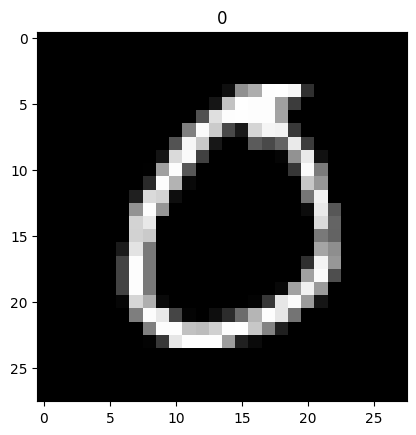

[[-1.         -1.         -1.         -1.         -1.         -1.
  -1.         -1.         -1.         -1.         -1.         -1.
  -1.         -1.         -1.         -1.         -1.         -1.
  -1.         -1.         -1.         -1.         -1.         -1.
  -1.         -1.         -1.         -1.        ]
 [-1.         -1.         -1.         -1.         -1.         -1.
  -1.         -1.         -1.         -1.         -1.         -1.
  -1.         -1.         -1.         -1.         -1.         -1.
  -1.         -1.         -1.         -1.         -1.         -1.
  -1.         -1.         -1.         -1.        ]
 [-1.         -1.         -1.         -1.         -1.         -1.
  -1.         -1.         -1.         -1.         -1.         -1.
  -1.         -1.         -1.         -1.         -1.         -1.
  -1.         -1.         -1.         -1.         -1.         -1.
  -1.         -1.         -1.         -1.        ]
 [-1.         -1.         -1.         -1.         -1.  

In [32]:
number_selected=0
index_numero_concreto=50
images_with_label_num = X_test[Y_test ==number_selected]
labels_with_label_num = Y_test[Y_test == number_selected]
Numero_concreto=images_with_label_num[index_numero_concreto]
Numero =Numero_concreto
plt.title(labels_with_label_num[index_numero_concreto])
plt.imshow(Numero_concreto,cmap='gray') #display sample training image
plt.show()
print(Numero_concreto)

In [33]:
Numero.shape

(28, 28)

In [34]:
#INDEX 1030 es uno se ve bien

In [35]:
Numero

array([[-1.        , -1.        , -1.        , -1.        , -1.        ,
        -1.        , -1.        , -1.        , -1.        , -1.        ,
        -1.        , -1.        , -1.        , -1.        , -1.        ,
        -1.        , -1.        , -1.        , -1.        , -1.        ,
        -1.        , -1.        , -1.        , -1.        , -1.        ,
        -1.        , -1.        , -1.        ],
       [-1.        , -1.        , -1.        , -1.        , -1.        ,
        -1.        , -1.        , -1.        , -1.        , -1.        ,
        -1.        , -1.        , -1.        , -1.        , -1.        ,
        -1.        , -1.        , -1.        , -1.        , -1.        ,
        -1.        , -1.        , -1.        , -1.        , -1.        ,
        -1.        , -1.        , -1.        ],
       [-1.        , -1.        , -1.        , -1.        , -1.        ,
        -1.        , -1.        , -1.        , -1.        , -1.        ,
        -1.        , -1.    

In [36]:
print(Numero)

[[-1.         -1.         -1.         -1.         -1.         -1.
  -1.         -1.         -1.         -1.         -1.         -1.
  -1.         -1.         -1.         -1.         -1.         -1.
  -1.         -1.         -1.         -1.         -1.         -1.
  -1.         -1.         -1.         -1.        ]
 [-1.         -1.         -1.         -1.         -1.         -1.
  -1.         -1.         -1.         -1.         -1.         -1.
  -1.         -1.         -1.         -1.         -1.         -1.
  -1.         -1.         -1.         -1.         -1.         -1.
  -1.         -1.         -1.         -1.        ]
 [-1.         -1.         -1.         -1.         -1.         -1.
  -1.         -1.         -1.         -1.         -1.         -1.
  -1.         -1.         -1.         -1.         -1.         -1.
  -1.         -1.         -1.         -1.         -1.         -1.
  -1.         -1.         -1.         -1.        ]
 [-1.         -1.         -1.         -1.         -1.  

In [37]:
# Obtener las clases únicas
classes = np.unique(Y_train)

# Imprimir las clases
print("Clases del conjunto de datos MNIST:")
for cls in classes:
    print(cls)

Clases del conjunto de datos MNIST:
0
1
2
3
4
5
6
7
8
9


In [38]:
dato = Numero[24, 12] #primero fila 0 hace las 28 columnas y luego pasa a fila 1 y así
print(dato)

-1.0


In [39]:
numero_expandido = tf.expand_dims(Numero, axis=0)
Numero = tf.expand_dims(numero_expandido , axis=-1)  # Añadir la dimensión de los canales
Numero  = tf.cast(Numero, tf.float32)

In [40]:
Numero

<tf.Tensor: shape=(1, 28, 28, 1), dtype=float32, numpy=
array([[[[-1.        ],
         [-1.        ],
         [-1.        ],
         [-1.        ],
         [-1.        ],
         [-1.        ],
         [-1.        ],
         [-1.        ],
         [-1.        ],
         [-1.        ],
         [-1.        ],
         [-1.        ],
         [-1.        ],
         [-1.        ],
         [-1.        ],
         [-1.        ],
         [-1.        ],
         [-1.        ],
         [-1.        ],
         [-1.        ],
         [-1.        ],
         [-1.        ],
         [-1.        ],
         [-1.        ],
         [-1.        ],
         [-1.        ],
         [-1.        ],
         [-1.        ]],

        [[-1.        ],
         [-1.        ],
         [-1.        ],
         [-1.        ],
         [-1.        ],
         [-1.        ],
         [-1.        ],
         [-1.        ],
         [-1.        ],
         [-1.        ],
         [-1.        ],
      

In [41]:
entrada_tf_numero = tf.constant(Numero, dtype=tf.float32)
pesos_filtro_conv_1_tf = tf.constant(w_pesos_conv_1, dtype=tf.float32)
sesgos_conv_1_tf = tf.constant(bias_conv_1, dtype=tf.float32)

# Realizar la convolución
resultado_convolucion = tf.nn.conv2d(entrada_tf_numero, pesos_filtro_conv_1_tf , strides=[1, 1, 1, 1], padding='VALID')

# Agregar los sesgos
resultado_convolucion_y_sesgos_conv_1 = tf.nn.bias_add(resultado_convolucion, sesgos_conv_1_tf )
resultado_relu_conv_1 = tf.nn.relu(resultado_convolucion_y_sesgos_conv_1)
resultado_relu_conv_1

<tf.Tensor: shape=(1, 24, 24, 6), dtype=float32, numpy=
array([[[[0.       , 0.3871022, 0.       , 0.       , 0.       ,
          0.       ],
         [0.       , 0.3871022, 0.       , 0.       , 0.       ,
          0.       ],
         [0.       , 0.3871022, 0.       , 0.       , 0.       ,
          0.       ],
         ...,
         [0.       , 0.3871022, 0.       , 0.       , 0.       ,
          0.       ],
         [0.       , 0.3871022, 0.       , 0.       , 0.       ,
          0.       ],
         [0.       , 0.3871022, 0.       , 0.       , 0.       ,
          0.       ]],

        [[0.       , 0.3871022, 0.       , 0.       , 0.       ,
          0.       ],
         [0.       , 0.3871022, 0.       , 0.       , 0.       ,
          0.       ],
         [0.       , 0.3871022, 0.       , 0.       , 0.       ,
          0.       ],
         ...,
         [0.       , 0.3871022, 0.       , 0.       , 0.       ,
          0.       ],
         [0.       , 0.3871022, 0.       , 0

In [42]:
np.set_printoptions(threshold=np.inf)

In [43]:
minimo = tf.reduce_min(resultado_relu_conv_1)
print(minimo)

tf.Tensor(0.0, shape=(), dtype=float32)


In [44]:
maximo = tf.reduce_max(resultado_relu_conv_1)
print(maximo)

tf.Tensor(2.3892884, shape=(), dtype=float32)


In [45]:
resultado_relu_conv_1_norm = resultado_relu_conv_1/2
resultado_relu_conv_1_norm= np.clip(resultado_relu_conv_1_norm,-1,1)

In [46]:
maximo = tf.reduce_max(resultado_relu_conv_1_norm)
print(maximo)

tf.Tensor(1.0, shape=(), dtype=float32)


In [47]:
resultado_pooling_norm_conv_1 = tf.nn.max_pool(resultado_relu_conv_1_norm, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

In [48]:
resultado_pooling_norm_conv_1

<tf.Tensor: shape=(1, 12, 12, 6), dtype=float32, numpy=
array([[[[0.00000000e+00, 1.93551093e-01, 0.00000000e+00,
          0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
         [0.00000000e+00, 1.93551093e-01, 0.00000000e+00,
          0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
         [0.00000000e+00, 1.93551093e-01, 0.00000000e+00,
          0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
         [0.00000000e+00, 1.93551093e-01, 0.00000000e+00,
          0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
         [0.00000000e+00, 1.93551093e-01, 0.00000000e+00,
          0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
         [0.00000000e+00, 1.66638821e-01, 0.00000000e+00,
          0.00000000e+00, 0.00000000e+00, 2.49885291e-01],
         [0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
          0.00000000e+00, 0.00000000e+00, 3.23527724e-01],
         [0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
          0.00000000e+00, 0.00000000e+00, 2.44819850e-01],
        

In [49]:
dato_peso = resultado_pooling_norm_conv_1[0,11,6,5]
dato_peso

<tf.Tensor: shape=(), dtype=float32, numpy=1.0>

In [50]:
dato_peso = resultado_pooling_norm_conv_1[0,3,7,0]
dato_peso

<tf.Tensor: shape=(), dtype=float32, numpy=0.0>

In [51]:
dato_peso = resultado_pooling_norm_conv_1[0,3,8,0]
dato_peso

<tf.Tensor: shape=(), dtype=float32, numpy=0.36976254>

In [52]:
dato_peso = resultado_pooling_norm_conv_1[0,0,4,2]
dato_peso

<tf.Tensor: shape=(), dtype=float32, numpy=0.0>

In [53]:
resultado_pooling_norm_conv_1 = np.clip (resultado_pooling_norm_conv_1,-1,1)
dimensiones =resultado_pooling_norm_conv_1 .shape
print(dimensiones) 

(1, 12, 12, 6)


In [54]:
entrada_tf_es_conv_1 = tf.constant(resultado_pooling_norm_conv_1, dtype=tf.float32)
pesos_filtro_conv_2_tf = tf.constant(w_pesos_conv_2, dtype=tf.float32)

sesgos_conv_2_tf = tf.constant(bias_conv_2, dtype=tf.float32)

# Realizar la convolución
resultado_convolucion_conv_2 = tf.nn.conv2d(entrada_tf_es_conv_1, pesos_filtro_conv_2_tf , strides=[1, 1, 1, 1], padding='VALID')

# Agregar los sesgos
resultado_convolucion_y_sesgos_conv_2 = tf.nn.bias_add(resultado_convolucion_conv_2, sesgos_conv_2_tf/2 )
#resultado_convolucion_y_sesgos_conv_2

In [55]:
minimo = tf.reduce_min(resultado_convolucion_y_sesgos_conv_2)
minimo

<tf.Tensor: shape=(), dtype=float32, numpy=-6.9366693>

In [56]:
maximo = tf.reduce_max(resultado_convolucion_y_sesgos_conv_2)
print(maximo)

tf.Tensor(3.0967953, shape=(), dtype=float32)


In [57]:
resultado_convolucion_y_sesgos_conv_2=resultado_convolucion_y_sesgos_conv_2/2
resultado_convolucion_y_sesgos_conv_2= np.clip(resultado_convolucion_y_sesgos_conv_2,-1,1)

In [58]:
#PARA INDEX 3 MAX ES 2.5 hago division por 2, para uno era uno y pico
#MAX DEL 0 1.45 para el 3
# MAX 1.4476575 para el 4 hay que dividir por 2
# MAX 1.4476575 para el 4 hay que dividir por 2
#MAX 2.471658 para el 9 pero luego si hago clip de 1.2 a 1 tampoco se nota mucho en el resultado
#resultado_convolucion_y_sesgos_conv_2= resultado_convolucion_y_sesgos_conv_2/2

In [59]:
resultado_convolucion_y_sesgos_conv_2= np.clip(resultado_convolucion_y_sesgos_conv_2,-1,1)
resultado_relu_conv_2 = tf.nn.relu(resultado_convolucion_y_sesgos_conv_2)
resultado_relu_conv_2= np.clip(resultado_relu_conv_2,-1,1)
resultado_pooling_conv_2 = tf.nn.max_pool(resultado_relu_conv_2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

In [60]:
resultado_pooling_conv_2 = np.clip (resultado_pooling_conv_2,-1,1)
dimensiones =resultado_pooling_conv_2.shape
print(dimensiones) 

(1, 4, 4, 16)


In [61]:
print(resultado_pooling_conv_2)

[[[[0.00000000e+00 1.73897937e-01 0.00000000e+00 0.00000000e+00
    0.00000000e+00 3.49747747e-01 6.65704429e-01 2.54924953e-01
    0.00000000e+00 6.92244247e-02 0.00000000e+00 0.00000000e+00
    1.16757303e-02 0.00000000e+00 0.00000000e+00 0.00000000e+00]
   [2.88923308e-02 2.74498075e-01 0.00000000e+00 0.00000000e+00
    0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
    0.00000000e+00 3.42409670e-01 8.06228638e-01 0.00000000e+00
    3.78281802e-01 0.00000000e+00 0.00000000e+00 0.00000000e+00]
   [0.00000000e+00 3.13228369e-02 5.18648982e-01 0.00000000e+00
    0.00000000e+00 0.00000000e+00 0.00000000e+00 2.43064597e-01
    0.00000000e+00 6.01123393e-01 0.00000000e+00 0.00000000e+00
    0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
   [0.00000000e+00 6.26375824e-02 0.00000000e+00 1.80749014e-01
    0.00000000e+00 1.45437056e-02 0.00000000e+00 3.29924762e-01
    0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
    0.00000000e+00 0.00000000e+00 0.0

In [62]:
# Aplana la salida
flattened_conv_2= tfl.Flatten()(resultado_pooling_conv_2)
dimensiones =flattened_conv_2.shape
print(dimensiones) 

(1, 256)


In [63]:
#darle la vueta a las dimensiones delflatten, yo le he dado la vuelta a los pesos antes porque lo veo mas logico 
#con los conocimientos de coursera
w_pesos_fc_120 = np.transpose(w_pesos_fc_120)
dimensiones =w_pesos_fc_120 .shape
print(dimensiones) 

(256, 120)


In [64]:

# Calcular la capa densa manualmente
dense_weight_120 =w_pesos_fc_120 
dense_bias_120 = bias_fc_120    
z_norm_128 = tf.matmul(flattened_conv_2, dense_weight_120)  + dense_bias_120/4



a_norm_128 = tf.nn.relu(z_norm_128)
a_norm_128 

<tf.Tensor: shape=(1, 120), dtype=float32, numpy=
array([[8.4398478e-01, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 9.5082827e-02,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        4.8380353e-02, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 1.1934879e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 1.5238161e+00, 0.0000000e+00,
        8.8104516e-01, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 9.9514210e-01, 0.0000000e+00, 0.0000000e+00

In [65]:
#DECIDO NORMALIZAR POR 4 
#AL FINAL IMPLEMENTO ESTO
#en 0 muchos dos y picos incluso casi tres, EN VARIOS PASA PARECIDO
#pruebo para 2
a_norm_128 =a_norm_128 /2
a_norm_128_no_clip =a_norm_128 
a_norm_128 =np.clip(a_norm_128 ,-1,1)
a_norm_128_real = a_norm_128
a_norm_128_real 

array([[0.4219924 , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.04754141, 0.        , 0.        , 0.        ,
        0.        , 0.02419018, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.59674394, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.76190805, 0.        , 0.44052258, 0.        ,
        0.        , 0.        , 0.        , 0.49757105, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.25004143,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 1.        , 0.27761716, 0.  

In [66]:
a_norm_128_no_clip

<tf.Tensor: shape=(1, 120), dtype=float32, numpy=
array([[4.2199239e-01, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 4.7541413e-02,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        2.4190176e-02, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 5.9674394e-01,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 7.6190805e-01, 0.0000000e+00,
        4.4052258e-01, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 4.9757105e-01, 0.0000000e+00, 0.0000000e+00

In [67]:
dimensiones =a_norm_128.shape
#print(dimensiones) 
#print(a_norm_128[0,21])
#print(a_norm_128[0,29])
#print(a_norm_128[0,44])
#print(a_norm_128[0,54])
#print(a_norm_128[0,59])
#print(a_norm_128[0,83])

print(a_norm_128[0,0])
print(a_norm_128[0,82])
print(a_norm_128[0,108])
print(a_norm_128[0,119])

print(a_norm_128[0,119])

0.4219924
0.0
0.0
0.0
0.0


In [68]:
print(a_norm_128_no_clip[0,0])
print(a_norm_128_no_clip[0,82])
print(a_norm_128_no_clip[0,108])
print(a_norm_128_no_clip[0,119])


tf.Tensor(0.4219924, shape=(), dtype=float32)
tf.Tensor(0.0, shape=(), dtype=float32)
tf.Tensor(0.0, shape=(), dtype=float32)
tf.Tensor(0.0, shape=(), dtype=float32)


In [69]:
#vector_84 = np.zeros((1, 84))
#bias=60
#vector_84[0, 65] = 2*(160+bias)/255-1
#vector_84[0, 82] = 2*(140+bias)/255-1
vector_120 = np.zeros((1, 120))
#bias=60,
vector_120[0, 0] = 2*(209)/255-1
vector_120[0, 82] = 2*(210)/255-1#esto con bias de 80, asi me da el resultado 153 del primero
vector_120[0, 108] = 2*(254)/255-1
vector_120[0, 119] = 2*(254)/255-1
print(vector_120)
#a_norm_128= vector_120
#221-80=141

[[0.63921569 0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.64705882 0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.   

In [70]:
dimensiones =w_pesos_fc_84.shape
print(dimensiones) 

(84, 120)


In [71]:
#a_norm_128 =a_norm_128 /2
#a_norm_128 =np.clip(a_norm_128 ,-1,1)
#a_norm_128  #AHORA SOLO NOMALIZO POR 2

In [72]:
#darle la vueta a las dimensiones delflatten, yo le he dado la vuelta a los pesos antes porque lo veo mas logico 
#con los conocimientos de coursera
w_pesos_fc_84 = np.transpose(w_pesos_fc_84)
dimensiones =w_pesos_fc_84.shape
print(dimensiones) 

(120, 84)


In [73]:
#ESTO SI NORMALIZO POR 4, VOY A HACER ESTO
#VOY A HACER ESTO
# Calcular la capa densa manualmente
dense_weight_84 =w_pesos_fc_84 
dense_bias_84 = bias_fc_84    
z_norm_84 = tf.matmul(a_norm_128, dense_weight_84)  + dense_bias_84/8


a_norm_84 = tf.nn.relu(z_norm_84)
a_norm_84  # max 1.2089021  luego 2 de 1.05 para el uno index 130

<tf.Tensor: shape=(1, 84), dtype=float32, numpy=
array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.8462652 , 0.        , 0.        , 0.        , 0.        ,
        0.        , 1.1122941 , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.97024   , 0.        ,
        0.08865884, 0.        , 0.        , 0.        , 0.4182762 ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.32733145,
        0.90783083, 0.        , 0.        , 0.8436499 , 0.        ,

In [74]:
a_norm_84  = tf.clip_by_value(a_norm_84 , -1, 1)
a_norm_84_real= a_norm_84
a_norm_84_real

<tf.Tensor: shape=(1, 84), dtype=float32, numpy=
array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.8462652 , 0.        , 0.        , 0.        , 0.        ,
        0.        , 1.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.97024   , 0.        ,
        0.08865884, 0.        , 0.        , 0.        , 0.4182762 ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.32733145,
        0.90783083, 0.        , 0.        , 0.8436499 , 0.        ,

In [75]:
print(a_norm_84[0, 5])
print(a_norm_84[0, 12]) 
print(a_norm_84[0, 17]) 
print(a_norm_84[0, 41]) 
print(a_norm_84[0, 78])


tf.Tensor(0.0, shape=(), dtype=float32)
tf.Tensor(0.0, shape=(), dtype=float32)
tf.Tensor(0.0, shape=(), dtype=float32)
tf.Tensor(0.0, shape=(), dtype=float32)
tf.Tensor(0.0, shape=(), dtype=float32)


In [76]:
print(a_norm_84[0, 0])
print(a_norm_84[0, 4])
print(a_norm_84[0, 5])
print(a_norm_84[0, 16])
print(a_norm_84[0, 29])
print(a_norm_84[0, 34]) 
print(a_norm_84[0, 42]) 
print(a_norm_84[0, 61]) 
print(a_norm_84[0, 62])
print(a_norm_84[0, 62])
print(a_norm_84[0, 63])
print(a_norm_84[0, 72])
print(a_norm_84[0, 74])
print(a_norm_84[0, 75])
print(a_norm_84[0, 78])
print(a_norm_84[0, 80])

tf.Tensor(0.0, shape=(), dtype=float32)
tf.Tensor(0.0, shape=(), dtype=float32)
tf.Tensor(0.0, shape=(), dtype=float32)
tf.Tensor(1.0, shape=(), dtype=float32)
tf.Tensor(0.4182762, shape=(), dtype=float32)
tf.Tensor(0.0, shape=(), dtype=float32)
tf.Tensor(0.0, shape=(), dtype=float32)
tf.Tensor(0.0, shape=(), dtype=float32)
tf.Tensor(0.0, shape=(), dtype=float32)
tf.Tensor(0.0, shape=(), dtype=float32)
tf.Tensor(0.0, shape=(), dtype=float32)
tf.Tensor(0.0, shape=(), dtype=float32)
tf.Tensor(0.0, shape=(), dtype=float32)
tf.Tensor(0.0, shape=(), dtype=float32)
tf.Tensor(0.0, shape=(), dtype=float32)
tf.Tensor(0.0, shape=(), dtype=float32)


In [77]:
print(a_norm_84[0, 0])
print(a_norm_84[0, 42]) 

tf.Tensor(0.0, shape=(), dtype=float32)
tf.Tensor(0.0, shape=(), dtype=float32)


In [78]:
#vector_84 = np.zeros((1, 84))
#bias=60
#vector_84[0, 65] = 2*(160+bias)/255-1
#vector_84[0, 82] = 2*(140+bias)/255-1
vector_84 = np.zeros((1, 84))
#bias=60,
vector_84[0, 0] = 2*(223)/255-1
vector_84[0, 42] = 2*(226)/255-1#esto con bias de 80, asi me da el resultado 153 del primero
#221-80=141
#bias=60
#vector_84[0, 23] = 2*(141+bias)/255-1#esto con bias de 60
#vector_84[0, 65] = 2*(173+bias)/255-1#me sale resultado teórico peor 
#vector_84[0, 82] = 2*(155+bias)/255-1
print(vector_84)
#a_norm_84=vector_84

[[0.74901961 0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.77254902 0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.        ]]


In [79]:
#ESTO SI NORMALIZO POR  2 DESPUES DE LAS FULLY CONNECTED DE 120
#dense_weight_84 =w_pesos_fc_84 
#dense_bias_84 = bias_fc_84    
#z_norm_84 = tf.matmul(a_norm_128, dense_weight_84)  + dense_bias_84/8
#a_norm_84 = tf.nn.relu(z_norm_84)
#a_norm_84

In [80]:
#ESTO ES SI NORMALIZABA POR 2 NO EL CASO
#a_norm_84= a_norm_84/2
#a_norm_84 = tf.clip_by_value(a_norm_84, -1, 1)


#a_norm_84  

In [81]:
#darle la vueta a las dimensiones delflatten, yo le he dado la vuelta a los pesos antes porque lo veo mas logico 
#con los conocimientos de coursera
w_pesos_fc_10 = np.transpose(w_pesos_fc_10)
dimensiones =w_pesos_fc_10.shape
print(dimensiones) 

(84, 10)


In [82]:
#ESTO SI NORM POR 4 EN FC120 DONDE TENGO QUE DIVIDIR BIAS POR 16
#lo que voy a implementar
dense_weight_10 =w_pesos_fc_10
dense_bias_10 = bias_fc_10   
z_norm_10 = tf.matmul(a_norm_84, dense_weight_10)  + dense_bias_10/8



a_norm_10 = tf.nn.relu(z_norm_10)
a_norm_10
#a_norm_10  # array([[0.        , 2.0235188 , 0.        , 0.        , 0.02106967,
       # 0.        , 0.        , 0.        , 0.        , 0.        ]], esto para el caso del uno index130

<tf.Tensor: shape=(1, 10), dtype=float32, numpy=
array([[1.2924068 , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.31315368, 0.        , 0.        , 0.        ]],
      dtype=float32)>

In [83]:
#ESTO SI NORM POR 2 EN FC120 DONDE TENGO QUE DIVIDIR BIAS POR 8
#NO LO VOY A IMPLEMENTAR
#dense_weight_10 =w_pesos_fc_10
#dense_bias_10 = bias_fc_10   
#z_norm_10 = tf.matmul(a_norm_84, dense_weight_10)  + dense_bias_10/16



#a_norm_10 = tf.nn.relu(z_norm_10)
#a_norm_10  # array([[0.        , 2.0235188 , 0.        , 0.        , 0.02106967,
       # 0.        , 0.        , 0.        , 0.        , 0.        ]], esto para el caso del uno index130

In [84]:
print(1.1347402*16) #index 3 el 0

print(1.252986*16) #ES EL 4

#para comprobarlo con el python habría que comparlo con el de 8*2.0=16, sin clip ni nada
#ESTO SI NORMALIZO POR 4 LA FC120

18.1558432
20.047776


In [85]:
#el index 3, el 11.7986544, directo da 12.710543

In [86]:
#ahora lo hago directo sin normalizar ni nada
entrada_tf_numero_directo = tf.constant(Numero, dtype=tf.float32)
pesos_filtro_conv_1_tf_directo = tf.constant(w_pesos_conv_1, dtype=tf.float32)
sesgos_conv_1_tf_directo = tf.constant(bias_conv_1, dtype=tf.float32)

# Realizar la convolución
resultado_convolucion_directo = tf.nn.conv2d(entrada_tf_numero_directo, pesos_filtro_conv_1_tf_directo, strides=[1, 1, 1, 1], padding='VALID')

# Agregar los sesgos
resultado_convolucion_y_sesgos_conv_1_directo = tf.nn.bias_add(resultado_convolucion_directo, sesgos_conv_1_tf_directo )
resultado_relu_conv_1_directo = tf.nn.relu(resultado_convolucion_y_sesgos_conv_1_directo)
resultado_pooling_conv_1_directo  = tf.nn.max_pool(resultado_relu_conv_1_directo , ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

In [87]:
entrada_tf_es_conv_1_directo  = tf.constant(resultado_pooling_conv_1_directo, dtype=tf.float32)
pesos_filtro_conv_2_tf_directo  = tf.constant(w_pesos_conv_2, dtype=tf.float32)

sesgos_conv_2_tf_directo  = tf.constant(bias_conv_2, dtype=tf.float32)

# Realizar la convolución
resultado_convolucion_conv_2_directo  = tf.nn.conv2d(entrada_tf_es_conv_1_directo , pesos_filtro_conv_2_tf_directo , strides=[1, 1, 1, 1], padding='VALID')

# Agregar los sesgos
resultado_convolucion_y_sesgos_conv_2_directo  = tf.nn.bias_add(resultado_convolucion_conv_2_directo , sesgos_conv_2_tf_directo  )


In [88]:
resultado_relu_conv_2_directo = tf.nn.relu(resultado_convolucion_y_sesgos_conv_2_directo)
resultado_pooling_conv_2_directo = tf.nn.max_pool(resultado_relu_conv_2_directo, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

In [89]:
flattened_conv_2_directo = tfl.Flatten()(resultado_pooling_conv_2_directo )

In [90]:
dense_weight_120_directo =w_pesos_fc_120 
dense_bias_120_directo = bias_fc_120    
z_norm_128_directo = tf.matmul(flattened_conv_2_directo, dense_weight_120_directo)  + dense_bias_120_directo

a_norm_128_directo = tf.nn.relu(z_norm_128_directo)

dense_weight_84_directo =w_pesos_fc_84
dense_bias_84_directo = bias_fc_84    
z_norm_84_directo = tf.matmul(a_norm_128_directo, dense_weight_84_directo)  + dense_bias_84_directo

a_norm_84_directo = tf.nn.relu(z_norm_84_directo)

dense_weight_10_directo =w_pesos_fc_10
dense_bias_10_directo = bias_fc_10   
z_norm_10_directo = tf.matmul(a_norm_84_directo, dense_weight_10_directo)  + dense_bias_10_directo



a_norm_10_directo = tf.nn.relu(z_norm_10_directo)
a_norm_10_directo 

<tf.Tensor: shape=(1, 10), dtype=float32, numpy=
array([[13.068202 ,  0.       ,  0.       ,  0.       ,  0.       ,
         0.       ,  2.9442194,  0.       ,  0.       ,  0.       ]],
      dtype=float32)>

In [91]:
#SIENTO ENTRADA ENTRE -1 Y 1
#PARA INDEX 3 ES UN 0
#12.710541 directo, con los clip es 12.757704
#EL 4
#20.956413 directo, con los clip es 20.047776  

In [92]:
#MODIFICO PARA QUE SEA EL MISMO MODELO QUE VHDL, NORMALIZAR POR 4
from tensorflow.keras import initializers
def ModelLeNet5VHDL_NORM4(w_pesos_conv_1, bias_conv_1, w_pesos_conv_2, bias_conv_2, w_pesos_fc_120, bias_fc_120, w_pesos_fc_84, bias_fc_84, w_pesos_fc_10, bias_fc_10):
    input_layer = tf.keras.Input(shape=(28, 28,1))
    #input_expandido= tf.expand_dims(input_layer, axis=0)
    #input_expandido  = tf.expand_dims(input_layer, axis=-1)  # Añadir la dimensión de los canales
    input_layer  = tf.cast(input_layer, tf.float32)
    pesos_filtro_conv_1_tf_directo = tf.constant(w_pesos_conv_1, dtype=tf.float32)
    sesgos_conv_1_tf_directo = tf.constant(bias_conv_1, dtype=tf.float32)

    # Realizar la convolución
    resultado_convolucion_directo = tf.nn.conv2d(input_layer, pesos_filtro_conv_1_tf_directo, strides=[1, 1, 1, 1], padding='VALID')

    # Agregar los sesgos
    resultado_convolucion_y_sesgos_conv_1_directo = tf.nn.bias_add(resultado_convolucion_directo, sesgos_conv_1_tf_directo )
    resultado_relu_conv_1_directo = tf.nn.relu(resultado_convolucion_y_sesgos_conv_1_directo)
    
    #NORMALIZARRR POR 4
    resultado_relu_conv_1_directo_norm = resultado_relu_conv_1_directo/4
    resultado_relu_conv_1_directo_sat = tf.clip_by_value(resultado_relu_conv_1_directo, -1, 1)
    #resultado_pooling_conv_1_directo  = tf.nn.max_pool(resultado_relu_conv_1_directo_sat, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')    
    resultado_pooling_conv_1_directo  =tfl.MaxPooling2D(pool_size=(2, 2))(resultado_relu_conv_1_directo_sat)
    
    #entrada_tf_es_conv_1_directo  = tf.constant(resultado_pooling_conv_1_directo, dtype=tf.float32)
    entrada_tf_es_conv_1_directo =resultado_pooling_conv_1_directo
    pesos_filtro_conv_2_tf_directo  = tf.constant(w_pesos_conv_2, dtype=tf.float32)

    sesgos_conv_2_tf_directo  = tf.constant(bias_conv_2, dtype=tf.float32)

    # Realizar la convolución
    resultado_convolucion_conv_2_directo  = tf.nn.conv2d(entrada_tf_es_conv_1_directo , pesos_filtro_conv_2_tf_directo , strides=[1, 1, 1, 1], padding='VALID')

    # Agregar los sesgos
    #DIVIDO BIAS POR 4
    resultado_convolucion_y_sesgos_conv_2_directo  = tf.nn.bias_add(resultado_convolucion_conv_2_directo , sesgos_conv_2_tf_directo/4)

    resultado_convolucion_y_sesgos_conv_2_directo = tf.clip_by_value(resultado_convolucion_y_sesgos_conv_2_directo, -1, 1)
    
    resultado_relu_conv_2_directo = tf.nn.relu(resultado_convolucion_y_sesgos_conv_2_directo)
    resultado_pooling_conv_2_directo = tf.nn.max_pool(resultado_relu_conv_2_directo, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    flattened_conv_2_directo = tfl.Flatten()(resultado_pooling_conv_2_directo )

    dense_weight_120_directo =w_pesos_fc_120 
    dense_bias_120_directo = bias_fc_120    
    #BIAS SE DIVIDE POR 4
    z_norm_128_directo = tf.matmul(flattened_conv_2_directo, dense_weight_120_directo)  + dense_bias_120_directo/4

    a_norm_128_directo = tf.nn.relu(z_norm_128_directo)
    #SE NORMALIZA POR 4
    a_norm_128_directo =a_norm_128_directo/4
    a_norm_128_directo = tf.clip_by_value(a_norm_128_directo, -1, 1)

    dense_weight_84_directo =w_pesos_fc_84
    dense_bias_84_directo = bias_fc_84 
    #BIAS SE DIVIDE POR 16 2*2*4
    z_norm_84_directo = tf.matmul(a_norm_128_directo, dense_weight_84_directo)  + dense_bias_84_directo/16

    z_norm_84_directo = tf.clip_by_value(z_norm_84_directo, -1, 1)
    a_norm_84_directo = tf.nn.relu(z_norm_84_directo)

    dense_weight_10_directo =w_pesos_fc_10
    dense_bias_10_directo = bias_fc_10   
    z_norm_10_directo = tf.matmul(a_norm_84_directo, dense_weight_10_directo)  + dense_bias_10_directo/16
    #z_norm_10_directo = tf.clip_by_value(z_norm_10_directo, -1, 1)


    a_norm_10_directo = tf.nn.relu(z_norm_10_directo)
    a_norm_10_directo = a_norm_10_directo*16
    softmax_output = tf.nn.softmax(a_norm_10_directo)
    model = tf.keras.Model(inputs=input_layer, outputs=softmax_output)
    return model

In [95]:


cifar10_model_VHDL_NORM4 = ModelLeNet5VHDL_NORM4(w_pesos_conv_1, bias_conv_1, w_pesos_conv_2, bias_conv_2, w_pesos_fc_120, bias_fc_120, w_pesos_fc_84, bias_fc_84, w_pesos_fc_10, bias_fc_10)
from tensorflow.keras.optimizers import Adam
optimizer = Adam(learning_rate=0.005)
#cifar10_model_VHDL_NORM4.compile(
#                    optimizer=optimizer,
 #                  loss='sparse_categorical_crossentropy',
#                   metrics=['accuracy'])


IndentationError: unindent does not match any outer indentation level (<string>, line 6)

In [ ]:
cifar10_model_VHDL_NORM4.evaluate(X_test,Y_test)

In [ ]:
#NORMALIZANDO 4
#313/313 [==============================] - 1s 4ms/step - loss: 0.0937 - accuracy: 0.9754
#[0.09374268352985382, 0.9753999710083008]
# #accuracy: 0.9853 en normal no se pierde precision

In [ ]:
from tensorflow.keras import initializers

def ModelLeNet5VHDL_NORM(w_pesos_conv_1, bias_conv_1, w_pesos_conv_2, bias_conv_2, w_pesos_fc_120, bias_fc_120, w_pesos_fc_84, bias_fc_84, w_pesos_fc_10, bias_fc_10):
    input_layer = tf.keras.Input(shape=(28, 28,1))
    input_layer  = tf.cast(input_layer, tf.float32)
    pesos_filtro_conv_1_tf_directo = tf.constant(w_pesos_conv_1, dtype=tf.float32)
    sesgos_conv_1_tf_directo = tf.constant(bias_conv_1, dtype=tf.float32)

    resultado_convolucion_directo = tf.nn.conv2d(input_layer, pesos_filtro_conv_1_tf_directo, strides=[1, 1, 1, 1], padding='VALID')
    resultado_convolucion_y_sesgos_conv_1_directo = tf.nn.bias_add(resultado_convolucion_directo, sesgos_conv_1_tf_directo )
    resultado_relu_conv_1_directo = tf.nn.relu(resultado_convolucion_y_sesgos_conv_1_directo)
    
    #NORMALIZAR POR 2
    
    resultado_relu_conv_1_directo_norm = resultado_relu_conv_1_directo/2
    resultado_relu_conv_1_directo_sat = tf.clip_by_value(resultado_relu_conv_1_directo, -1, 1)  
    resultado_pooling_conv_1_directo  =tfl.MaxPooling2D(pool_size=(2, 2))(resultado_relu_conv_1_directo_sat)
    
    entrada_tf_es_conv_1_directo =resultado_pooling_conv_1_directo
    pesos_filtro_conv_2_tf_directo  = tf.constant(w_pesos_conv_2, dtype=tf.float32)

    sesgos_conv_2_tf_directo  = tf.constant(bias_conv_2, dtype=tf.float32)

    resultado_convolucion_conv_2_directo  = tf.nn.conv2d(entrada_tf_es_conv_1_directo , pesos_filtro_conv_2_tf_directo , strides=[1, 1, 1, 1], padding='VALID')
    # Agregar los sesgos
    #DIVIDO BIAS POR 2
    
    resultado_convolucion_y_sesgos_conv_2_directo  = tf.nn.bias_add(resultado_convolucion_conv_2_directo , sesgos_conv_2_tf_directo/2)

     #DIVIDIO POR 2 Y HAGO CLIP (saturo)
    
    resultado_convolucion_y_sesgos_conv_2_directo=resultado_convolucion_y_sesgos_conv_2_directo/2
    resultado_convolucion_y_sesgos_conv_2_directo = tf.clip_by_value(resultado_convolucion_y_sesgos_conv_2_directo, -1, 1)
    
    resultado_relu_conv_2_directo = tf.nn.relu(resultado_convolucion_y_sesgos_conv_2_directo)
    resultado_pooling_conv_2_directo = tf.nn.max_pool(resultado_relu_conv_2_directo, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    flattened_conv_2_directo = tfl.Flatten()(resultado_pooling_conv_2_directo )

    dense_weight_120_directo =w_pesos_fc_120 
    dense_bias_120_directo = bias_fc_120    
    
    #BIAS SE DIVIDE POR 4 (2*2=4)
    
    z_norm_128_directo = tf.matmul(flattened_conv_2_directo, dense_weight_120_directo)  + dense_bias_120_directo/4

    a_norm_128_directo = tf.nn.relu(z_norm_128_directo)

    #SE NORMALIZA POR 2 OTRA VEZ
    
    a_norm_128_directo =a_norm_128_directo/2
    a_norm_128_directo = tf.clip_by_value(a_norm_128_directo, -1, 1)

    dense_weight_84_directo =w_pesos_fc_84
    dense_bias_84_directo = bias_fc_84 
    
    #BIAS SE DIVIDE POR 8 2*2*2
    
    z_norm_84_directo = tf.matmul(a_norm_128_directo, dense_weight_84_directo)  + dense_bias_84_directo/8
    z_norm_84_directo = tf.clip_by_value(z_norm_84_directo, -1, 1)
    a_norm_84_directo = tf.nn.relu(z_norm_84_directo)
    
    #BIAS SE DIVIDE POR 8 2*2*2 
    
    dense_weight_10_directo =w_pesos_fc_10
    dense_bias_10_directo = bias_fc_10   
    z_norm_10_directo = tf.matmul(a_norm_84_directo, dense_weight_10_directo)  + dense_bias_10_directo/8
    a_norm_10_directo = tf.nn.relu(z_norm_10_directo)
    a_norm_10_directo = a_norm_10_directo*8
    softmax_output = tf.nn.softmax(a_norm_10_directo)
    
    model = tf.keras.Model(inputs=input_layer, outputs=softmax_output)
    
return model


    

In [ ]:
cifar10_model_VHDL_NORM_FACTOR_2= ModelLeNet5VHDL_NORM_POR_2(w_pesos_conv_1, bias_conv_1, w_pesos_conv_2, bias_conv_2, w_pesos_fc_120, bias_fc_120, w_pesos_fc_84, bias_fc_84, w_pesos_fc_10, bias_fc_10)
from tensorflow.keras.optimizers import Adam
optimizer = Adam(learning_rate=0.005)
cifar10_model_VHDL_NORM_FACTOR_2.compile(
                    optimizer=optimizer,
                   loss='sparse_categorical_crossentropy',
                   metrics=['accuracy'])

In [ ]:
cifar10_model_VHDL_NORM_FACTOR_2.evaluate(X_test,Y_test)
#ESTA LA QUE IMPLEMENTAMOS AL FINAL

In [ ]:
#esto si normalizas por 4 lo del despues de la pool 2
#313/313 [==============================] - 1s 4ms/step - loss: 0.0661 - accuracy: 0.9832
#[0.06608988344669342, 0.9832000136375427]

In [ ]:
#No afecta en la clasificación, mismo porcentaje

In [ ]:
#Esto si normalizas por 2 lo de despues de la pool 2 lo que hemos hecho en el modelo
#313/313 [==============================] - 1s 4ms/step - loss: 0.0864 - accuracy: 0.9831
#[0.08635503798723221, 0.9830999970436096]

In [ ]:
#Conclusion normalizo por 2 despues de conv1, despues de conv2 tambien por12
#Ademas despues de hacer la primera fully connected tambien se divide por 2 y no por 4
#No afecta casi al resultado final